In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
%matplotlib?

In [5]:
#定义一个读取文件生成数据的函数，然后返回生成的数据
#这里1、使用format进行字符串的格式化操作
#2、运用 python的with 方法方便的进行异常的处理，和对资源的清理，省了些 try catch finally的步骤
def open_csv(csv_name):
    with open(r'D:\ml\rossmann-store-sales\{}'.format(csv_name)) as f:
        data = pd.read_csv(f)
    return data

In [6]:
#分别创建 训练数据集，测试数据集，和商店的描述数据
data_store = open_csv('store.csv')
data_train = open_csv('train.csv')
data_test = open_csv('test.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [7]:
data_store.head().append(data_store.tail())

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec

In [8]:
data_train.head().append(data_train.tail())

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5  2015/7/31   5263        555     1      1   
1            2          5  2015/7/31   6064        625     1      1   
2            3          5  2015/7/31   8314        821     1      1   
3            4          5  2015/7/31  13995       1498     1      1   
4            5          5  2015/7/31   4822        559     1      1   
1017204   1111          2   2013/1/1      0          0     0      0   
1017205   1112          2   2013/1/1      0          0     0      0   
1017206   1113          2   2013/1/1      0          0     0      0   
1017207   1114          2   2013/1/1      0          0     0      0   
1017208   1115          2   2013/1/1      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [9]:
data_test.head().append(data_test.tail())

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1

In [10]:
#查看数据缺失
display(data_store.isnull().sum(),data_train.isnull().sum(),data_test.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [11]:
#商店的缺失数据分析
#CompetitionDistance
data_store[pd.isnull(data_store.CompetitionDistance)]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

In [12]:
comp_month_nan_list = data_store[pd.isnull(data_store.CompetitionOpenSinceMonth)].Store.unique()

In [13]:
comp_year_nan_list = data_store[pd.isnull(data_store.CompetitionOpenSinceYear)].Store.unique()

In [14]:
(comp_month_nan_list == comp_year_nan_list).all()

True

竞争对手开启年份月份某些店铺存在为空的情况，认为数据丢失，考虑直接写为0

In [15]:
df_nan_prom2 = data_store[pd.isnull(data_store.Promo2SinceWeek)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

In [16]:
df_nan_prom2 = data_store[pd.isnull(data_store.Promo2SinceYear)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

In [17]:
df_nan_prom2 = data_store[pd.isnull(data_store.PromoInterval)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

上面三行分析得到促销相关的时间、时段信息为空，均是出现在Promo2 = 0 即无促销的情况下，因而对于促销相关的字段考虑直接写0

In [18]:
#分析缺失的数据
#测试集缺失数据
data_test[pd.isnull(data_test.Open)]

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
479      480    622          4  2015-09-17   NaN      1            0   
1335    1336    622          3  2015-09-16   NaN      1            0   
2191    2192    622          2  2015-09-15   NaN      1            0   
3047    3048    622          1  2015-09-14   NaN      1            0   
4759    4760    622          6  2015-09-12   NaN      0            0   
5615    5616    622          5  2015-09-11   NaN      0            0   
6471    6472    622          4  2015-09-10   NaN      0            0   
7327    7328    622          3  2015-09-09   NaN      0            0   
8183    8184    622          2  2015-09-08   NaN      0            0   
9039    9040    622          1  2015-09-07   NaN      0            0   
10751  10752    622          6  2015-09-05   NaN      0            0   

       SchoolHoliday  
479                0  
1335               0  
2191               0  
3047               0  
4759               0  
5615               0  
6471               0  
7327               0  
8183               0  
9039               0  
10751              0

缺失的数据都来自于 同一个店铺，无周末，无假期，且部分有促销，判定为正常营业，在特征处理时设置成1

下面具体分析每个字段的异常情况

In [19]:
#查看每个数据集合每一列的取值情况
data_store.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

需要对字符串进行数值化

In [20]:
data_store.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

需要对字符串进行数值化

In [21]:
data_store.CompetitionDistance.describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [22]:
data_store.CompetitionOpenSinceMonth.unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

取值是一月到12月

In [23]:
data_store.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [24]:
data_store.Promo2.unique()

array([0, 1], dtype=int64)

结果是有促销或者无促销

In [25]:
data_store.Promo2SinceWeek.unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

一年有52周，取值正常

In [26]:
data_store.Promo2SinceYear.unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

除去空值外，年份情况无异常

In [27]:
data_store.PromoInterval.unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

连续的促销为每年的固定月份，数据无异常,特征处理时，需要将特征处理为数值变量

In [28]:
#查看训练数据的情况
data_train.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

星期数为周一到周日，无问题

In [29]:
data_train.Date.unique()

array(['2015/7/31', '2015/7/30', '2015/7/29', '2015/7/28', '2015/7/27',
       '2015/7/26', '2015/7/25', '2015/7/24', '2015/7/23', '2015/7/22',
       '2015/7/21', '2015/7/20', '2015/7/19', '2015/7/18', '2015/7/17',
       '2015/7/16', '2015/7/15', '2015/7/14', '2015/7/13', '2015/7/12',
       '2015/7/11', '2015/7/10', '2015/7/9', '2015/7/8', '2015/7/7',
       '2015/7/6', '2015/7/5', '2015/7/4', '2015/7/3', '2015/7/2',
       '2015/7/1', '2015/6/30', '2015/6/29', '2015/6/28', '2015/6/27',
       '2015/6/26', '2015/6/25', '2015/6/24', '2015/6/23', '2015/6/22',
       '2015/6/21', '2015/6/20', '2015/6/19', '2015/6/18', '2015/6/17',
       '2015/6/16', '2015/6/15', '2015/6/14', '2015/6/13', '2015/6/12',
       '2015/6/11', '2015/6/10', '2015/6/9', '2015/6/8', '2015/6/7',
       '2015/6/6', '2015/6/5', '2015/6/4', '2015/6/3', '2015/6/2',
       '2015/6/1', '2015/5/31', '2015/5/30', '2015/5/29', '2015/5/28',
       '2015/5/27', '2015/5/26', '2015/5/25', '2015/5/24', '2015/5/23',
       '20

In [30]:
data_train.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [31]:
data_train.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

In [32]:
data_train.Open.unique()

array([1, 0], dtype=int64)

In [33]:
data_train.Promo.unique()

array([1, 0], dtype=int64)

In [34]:
data_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

这个数据有点奇怪，有两个0 的数据 需要进行处理，合并，同时字母需要进行数值化

In [35]:
data_train.StateHoliday.replace(0,'0',inplace = True)

In [36]:
data_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [37]:
data_train.SchoolHoliday.unique()

array([1, 0], dtype=int64)

In [38]:
data_test.DayOfWeek.unique()

array([4, 3, 2, 1, 7, 6, 5], dtype=int64)

In [39]:
data_test.Open.unique()

array([ 1., nan,  0.])

In [40]:
data_test.Promo.unique()

array([1, 0], dtype=int64)

In [41]:
data_test.StateHoliday.unique()

array(['0', 'a'], dtype=object)

In [42]:
data_test.SchoolHoliday.unique()

array([0, 1], dtype=int64)

开始对空值和异常值进行处理

In [43]:
data_store.fillna(0, inplace=True)#促销和竞争对手信息缺失补位0

In [44]:
data_test.fillna(1, inplace=True)#open数据缺失，分析后认定为店铺开启，补为1

In [45]:
display(data_store.isnull().sum(),data_train.isnull().sum(),data_test.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

确认 没有空值

In [46]:
#生成新数据
data_train_new=pd.merge(data_train,data_store,on='Store',how='left')
data_train_new.Date=pd.to_datetime(data_train_new.Date)
data_train_new.head().append(data_train_new.tail())

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        0.0                       0.0       0   
1017207                        0.0                       0.0       0   
1017208                        0.0                       0.0       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                    0.0              0.0                 0  
1                   13.0           2010.0   Jan,Apr,Jul,Oct  
2                   14.0           2011.0   Jan,Apr,Jul,Oct  
3                    0.0              0.0                 0  
4                    0.0              0.0                 0  
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  
1017205              0.0              0.0                 0  
1017206              0.0              0.0                 0  
1017207              0.0              0.0                 0  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec

In [125]:
data_test_new=pd.merge(data_test,data_store,on='Store',how='left')
data_test_new.Date=pd.to_datetime(data_test_new.Date)
data_test_new.head().append(data_test_new.tail())

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
0          1      1          4 2015-09-17   1.0      1            0   
1          2      3          4 2015-09-17   1.0      1            0   
2          3      7          4 2015-09-17   1.0      1            0   
3          4      8          4 2015-09-17   1.0      1            0   
4          5      9          4 2015-09-17   1.0      1            0   
41083  41084   1111          6 2015-08-01   1.0      0            0   
41084  41085   1112          6 2015-08-01   1.0      0            0   
41085  41086   1113          6 2015-08-01   1.0      0            0   
41086  41087   1114          6 2015-08-01   1.0      0            0   
41087  41088   1115          6 2015-08-01   1.0      0            0   

       SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0         c          a               1270.0   
1                  0         a          a              14130.0   
2                  0         a          c              24000.0   
3                  0         a          a               7520.0   
4                  0         a          c               2030.0   
41083              0         a          a               1900.0   
41084              0         c          c               1880.0   
41085              0         a          c               9260.0   
41086              0         a          c                870.0   
41087              1         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                           12.0                    2006.0       1   
2                            4.0                    2013.0       0   
3                           10.0                    2014.0       0   
4                            8.0                    2000.0       0   
41083                        6.0                    2014.0       1   
41084                        4.0                    2006.0       0   
41085                        0.0                       0.0       0   
41086                        0.0                       0.0       0   
41087                        0.0                       0.0       1   

       Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                  0.0              0.0                 0  
1                 14.0           2011.0   Jan,Apr,Jul,Oct  
2                  0.0              0.0                 0  
3                  0.0              0.0                 0  
4                  0.0              0.0                 0  
41083             31.0           2013.0   Jan,Apr,Jul,Oct  
41084              0.0              0.0                 0  
41085              0.0              0.0                 0  
41086              0.0              0.0                 0  
41087             22.0           2012.0  Mar,Jun,Sept,Dec

开始进行数据分析

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'sales(W)')

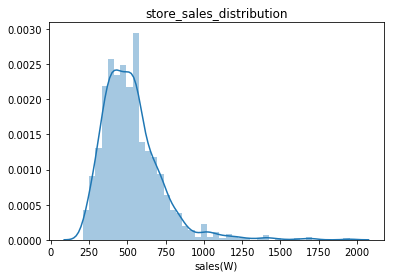

In [48]:
#每家店sales总额的分布
df1=data_train_new.groupby('Store')['Sales'].sum()/10000
#df1.head()
sns.distplot(df1)
plt.title('store_sales_distribution')
plt.xlabel('sales(W)')

[Text(0.5, 1.0, 'StoreType-sum-sales')]

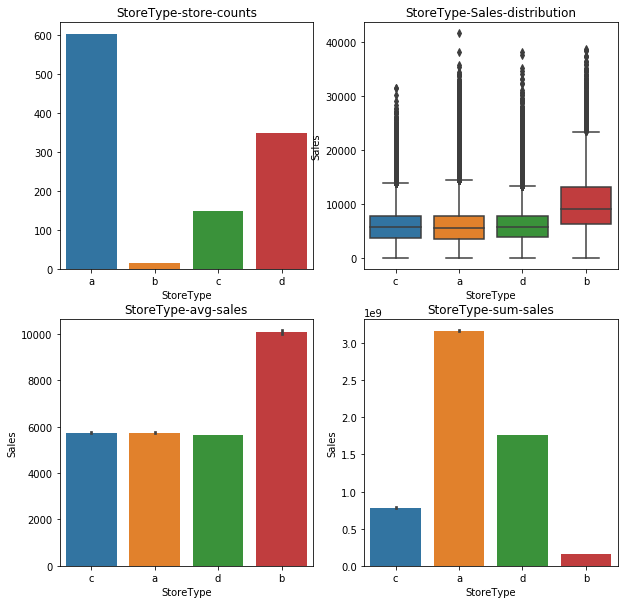

In [49]:
#不同店铺种类的数据分布情况
#StoreType
from numpy import mean
from numpy import sum

fig,ax=plt.subplots(2,2,figsize=(10,10))



df=data_store.groupby('StoreType').size()
sns.barplot(df.index,df.values,ax=ax[0][0])
ax[0][0].set(**{'title':'StoreType-store-counts'})


#StoreType的销售分布
sns.boxplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[0][1])
ax[0][1].set(**{'title':'StoreType-Sales-distribution'})
sns.barplot(y='Sales',x='StoreType',data=data_train_new,estimator=mean,ax=ax[1][0])
ax[1][0].set(**{'title':'StoreType-avg-sales'})
sns.barplot(y='Sales',x='StoreType',data=data_train_new,estimator=sum,ax=ax[1][1])
ax[1][1].set(**{'title':'StoreType-sum-sales'})



[Text(0.5, 1.0, 'Assortment-sum-sales')]

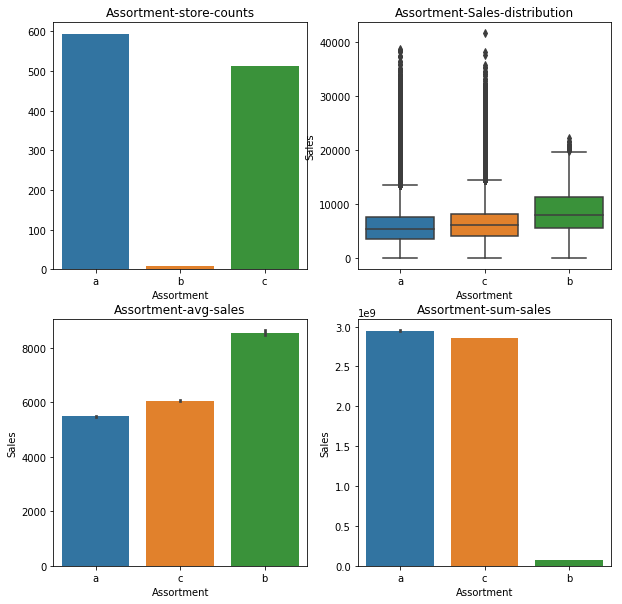

In [51]:
#对不同分类级别的店铺观察 分布情况
#Assortment
from numpy import mean
from numpy import sum

fig,ax=plt.subplots(2,2,figsize=(10,10))



df=data_store.groupby('Assortment').size()
sns.barplot(df.index,df.values,ax=ax[0][0])
ax[0][0].set(**{'title':'Assortment-store-counts'})


#StoreType的销售分布
sns.boxplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[0][1])
ax[0][1].set(**{'title':'Assortment-Sales-distribution'})
sns.barplot(y='Sales',x='Assortment',data=data_train_new,estimator=mean,ax=ax[1][0])
ax[1][0].set(**{'title':'Assortment-avg-sales'})
sns.barplot(y='Sales',x='Assortment',data=data_train_new,estimator=sum,ax=ax[1][1])
ax[1][1].set(**{'title':'Assortment-sum-sales'})


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


[Text(0.5, 1.0, 'CompetitionOpen-avg-sales')]

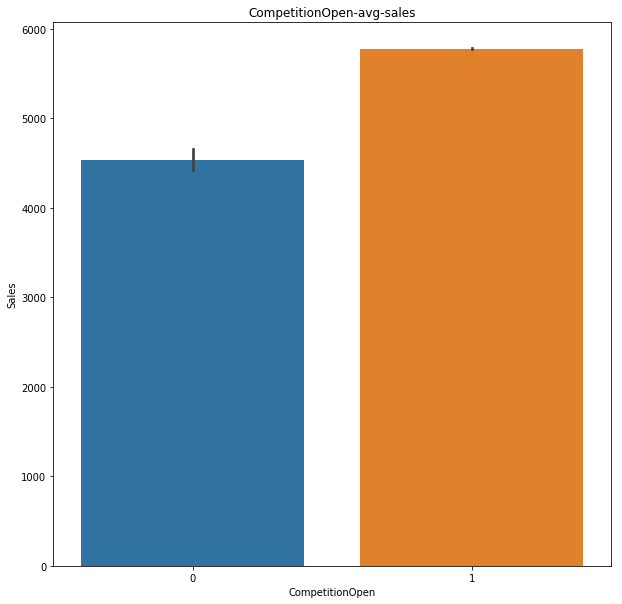

In [52]:
#探索竞争者的一些关系
#探索与竞争者有无的关系
df = data_train_new[['CompetitionDistance','Sales']]

df['CompetitionOpen'] = df.CompetitionDistance.apply(lambda x: 1 if x > 0 else 0)       


fig,ax=plt.subplots(1,1,figsize=(10,10))
sns.barplot(y='Sales',x='CompetitionOpen',data=df,estimator=mean,ax=ax)
ax.set(**{'title':'CompetitionOpen-avg-sales'})




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
No handles with labels found to put in legend.


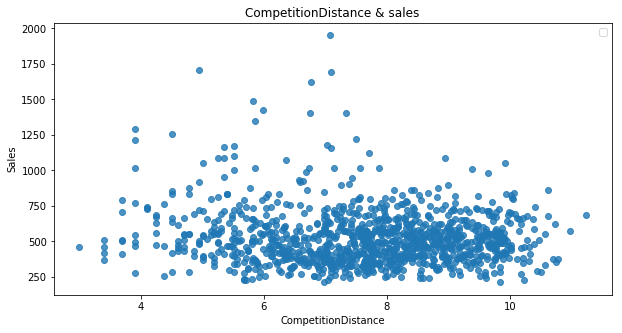

In [53]:
#探索竞争者距离和销售额关系
df7=data_train_new.groupby('Store')['CompetitionDistance','Sales'].agg({'CompetitionDistance':'mean','Sales':'sum'})#每个店销售总额
df7['CompetitionDistance']=df7['CompetitionDistance'].map(lambda x:np.log(x))#对距离取log，收缩分布
df7['Sales']=df7['Sales'].map(lambda x:x/10000)#销售额以万元为单位
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.regplot(x='CompetitionDistance',y='Sales',data=df7,ax=ax)
ax.set_title('CompetitionDistance & sales')
plt.legend(loc='best')


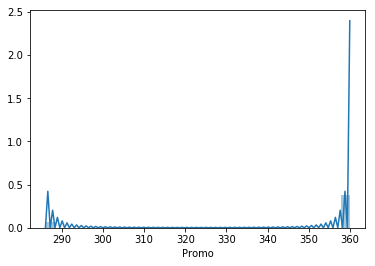

In [54]:
#促销的相关分析
df7=data_train_new.groupby('Store')['Promo'].sum()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.distplot(df7,ax=ax)

[Text(0.5, 1.0, 'Promo_counts')]

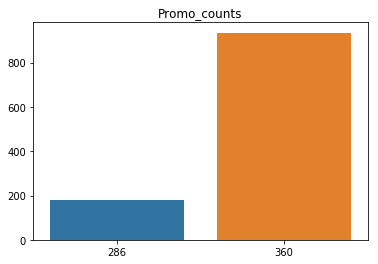

In [55]:
df8=df7.value_counts()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.barplot(df8.index,df8.values,ax=ax)
ax.set(**{'title':'Promo_counts'})

[Text(0.5, 1.0, 'Promo & sales')]

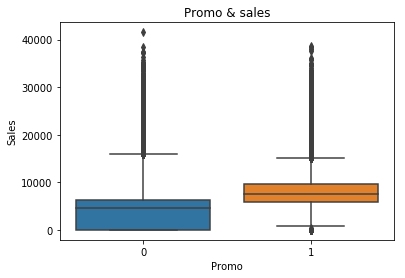

In [56]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo',data=data_train_new,ax=ax)
ax.set(**{'title':'Promo & sales'})

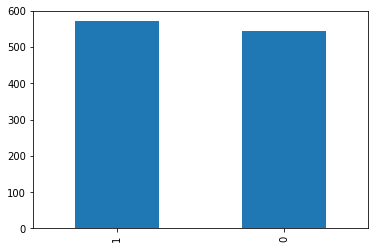

In [57]:
#季节促销的影响
#有无promo2的店数量对比
df9=data_store.Promo2.value_counts()
df9.plot(kind='bar')

[Text(0.5, 1.0, 'promo2 & sales')]

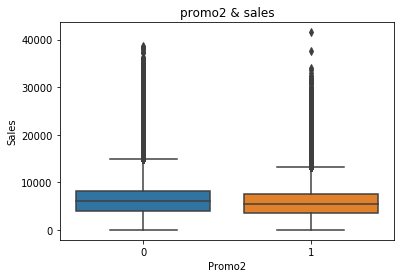

In [58]:
#有无promo2的每天每个店销售情况对比
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo2',data=data_train_new,ax=ax)
ax.set(**{'title':'promo2 & sales'})

[Text(0.5, 1.0, 'StateHoliday & sales > 0 ')]

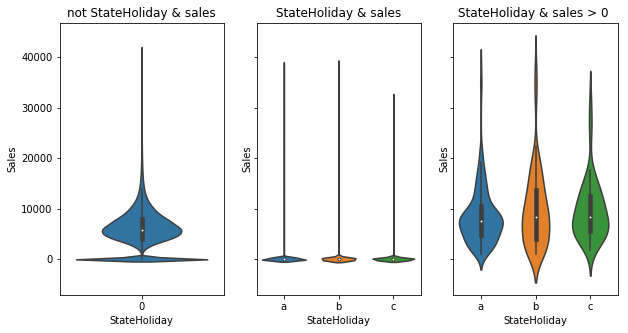

In [59]:
#对比stateholiday销售分布情况
fig,ax=plt.subplots(1,3,sharey=True,figsize=(10,5))

#不是国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday=='0'],ax=ax[0])
ax[0].set(**{'title':'not StateHoliday & sales'})
#国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday!='0'],ax=ax[1])
ax[1].set(**{'title':'StateHoliday & sales'})
#国家节假日的销售分布(营业的店)
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[(data_train_new.StateHoliday!='0')&(data_train_new.Sales>0)],ax=ax[2])
ax[2].set(**{'title':'StateHoliday & sales > 0 '})

[Text(0.5, 1.0, 'SchoolHoliday & sales（Sales>=15000）')]

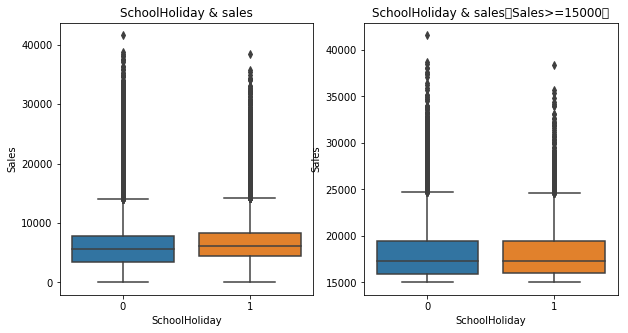

In [60]:
#对比SchoolHoliday销售分布情况

fig,ax=plt.subplots(1,2,figsize=(10,5))
#SchoolHoliday的销售分布
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'SchoolHoliday & sales'})
#SchoolHoliday的销售分布（Sales>=15000）
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new[data_train_new.Sales>=15000],ax=ax[1])
ax[1].set(**{'title':'SchoolHoliday & sales（Sales>=15000）'})


Text(0.5, 1.0, 'DayOfWeek & Sales')

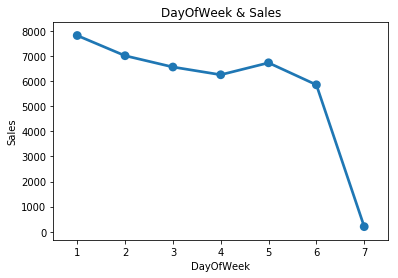

In [61]:
#一周不同的天平均每天每个店的销售情况
#sns.pointplot(data=data_train_new[::100],x='DayOfWeek',y='Sales') 让sns作groupby统计耗时非常长，所以需要先group不要做处理
df2=data_train_new.groupby('DayOfWeek')['Sales'].mean().reset_index()
sns.pointplot(data=df2,x='DayOfWeek',y='Sales')
plt.title('DayOfWeek & Sales')

   DayOfWeek  open_rate
0          1   0.950459
1          2   0.988309
2          3   0.974400
3          4   0.923199
4          5   0.950598
5          6   0.995357
6          7   0.024826


Text(0.5, 1.0, 'DayOfWeek open rate')

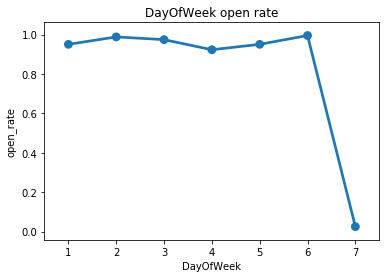

In [62]:
#一周的平均营业率
df3=data_train_new.groupby('DayOfWeek')['Open'].mean().reset_index().rename(columns={'Open':'open_rate'})
print(df3)
sns.pointplot(data=df3,x='DayOfWeek',y='open_rate')
plt.title('DayOfWeek open rate')

[Text(0.5, 1.0, 'Customers & sales')]

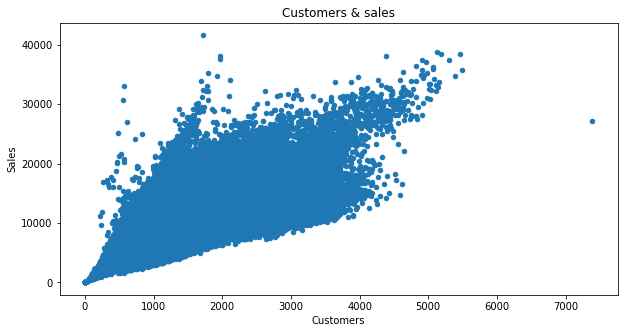

In [63]:
#顾客数与销售额的关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
data_train_new.plot.scatter(y='Sales',x='Customers',ax=ax)
ax.set(**{'title':'Customers & sales'})

[Text(0.5, 1.0, 'open & sales')]

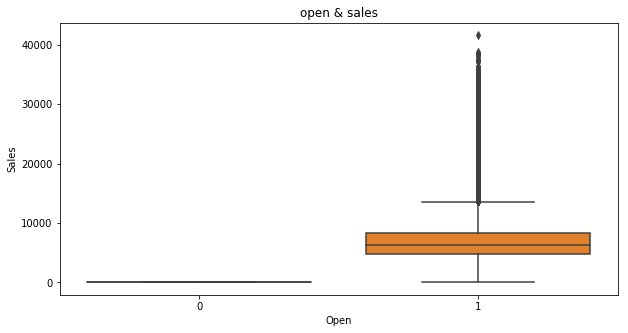

In [64]:
#探索是否营业与销售额关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Open',data=data_train_new,ax=ax)
ax.set(**{'title':'open & sales'})

Text(0.5, 1.0, 'month-avg-sales')

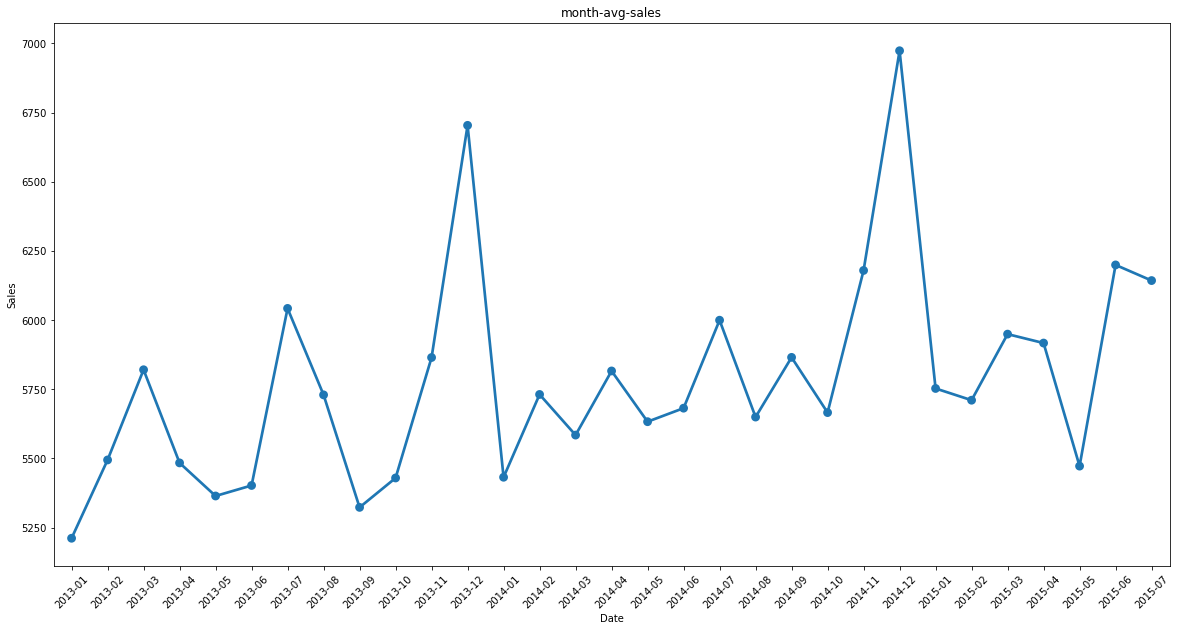

In [65]:
#探索每个月平均销售情况
df4=data_train_new.groupby('Date')['Sales'].mean().resample('M',kind='period').mean().reset_index()#resample能够把聚合时间变成月份，去除日
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(data=df4,x='Date',y='Sales',ax=ax)
plt.xticks(rotation=45)
ax.set_title('month-avg-sales')


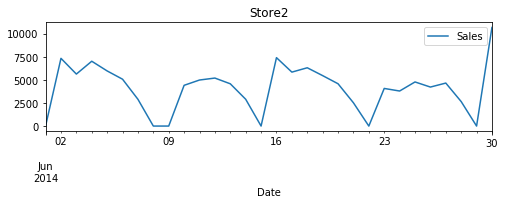

In [197]:
#探索每个月平均销售情况
data_train_new.loc[data_train['Store']==2 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store2',figsize=(8,2),xlim=['2014-6-1','2014-6-30'])

In [67]:
#对于不开的店铺，销量是0，并没有分析的价值，这里直接将对应的数据去掉
ho_test = ho_test[ho_test["Open"] != 0]
ho_test = ho_test[ho_test["Sales"] > 0]
ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]

In [68]:
#检查一下train和test数据集
ho_test.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0        1          5 2015-07-31   5263        555     1      1            0   
742    743          5 2015-07-31   5085        501     1      1            0   
748    749          5 2015-07-31   6612        716     1      1            0   
747    748          5 2015-07-31   7481        578     1      1            0   
746    747          5 2015-07-31  10708        826     1      1            0   

     SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                1         c          a               1270.0   
742              1         a          a               6710.0   
748              1         a          a               3410.0   
747              1         d          a               2380.0   
746              1         c          c              45740.0   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9.0                    2008.0       0   
742                       11.0                    2003.0       1   
748                        8.0                    2011.0       1   
747                        3.0                    2010.0       1   
746                        8.0                    2008.0       0   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0                0.0              0.0                0  
742             14.0           2012.0  Jan,Apr,Jul,Oct  
748             14.0           2015.0  Jan,Apr,Jul,Oct  
747             14.0           2011.0  Jan,Apr,Jul,Oct  
746              0.0              0.0                0

In [69]:
ho_train.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
47570    741          5 2015-06-19   7329        938     1      1   
47576    747          5 2015-06-19   9367        783     1      1   
47575    746          5 2015-06-19   7856        576     1      1   
47574    745          5 2015-06-19   8074        744     1      1   
47573    744          5 2015-06-19   8626        913     1      1   

      StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
47570            0              0         d          c              11900.0   
47576            0              0         c          c              45740.0   
47575            0              0         d          c               4330.0   
47574            0              0         a          a              17650.0   
47573            0              0         a          a               1370.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
47570                        0.0                       0.0       0   
47576                        8.0                    2008.0       0   
47575                        2.0                    2011.0       1   
47574                       11.0                    2013.0       1   
47573                       12.0                    2011.0       1   

       Promo2SinceWeek  Promo2SinceYear     PromoInterval  
47570              0.0              0.0                 0  
47576              0.0              0.0                 0  
47575             35.0           2011.0  Mar,Jun,Sept,Dec  
47574             37.0           2009.0   Jan,Apr,Jul,Oct  
47573             40.0           2014.0   Jan,Apr,Jul,Oct

In [70]:
#开始进行特征工程的构建
def features_create(data):
    
    #将存在其他字符表示分类的特征转化为数字
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    #将时间特征进行拆分和转化，并加入'WeekOfYear'特征
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    #新增'CompetitionOpen'和'PromoOpen'特征,计算某天某店铺的竞争对手已营业时间和店铺已促销时间，用月为单位表示
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +         (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) +         (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
    #将'PromoInterval'特征转化为'IsPromoMonth'特征,表示某天某店铺是否处于促销月，1表示是，0表示否
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
 
    return data

In [126]:
#对训练数据和测试数据集合使用特征工程
print('Features creation begin')
features_create(ho_train)
features_create(ho_test)
features_create(data_test_new)
print('Features creation finished')

Features creation begin
Features creation finished


In [72]:
#将无用的特征去除掉
ho_train.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
ho_test.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)

In [127]:
data_test_new.head()

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday  \
0   1      1          3 2015-09-17   1.0      1            0              0   
1   2      3          3 2015-09-17   1.0      1            0              0   
2   3      7          3 2015-09-17   1.0      1            0              0   
3   4      8          3 2015-09-17   1.0      1            0              0   
4   5      9          3 2015-09-17   1.0      1            0              0   

   StoreType Assortment  ...  Promo2SinceYear    PromoInterval  Year  Month  \
0          3          1  ...              0.0                   2015      9   
1          1          1  ...           2011.0  Jan,Apr,Jul,Oct  2015      9   
2          1          3  ...              0.0                   2015      9   
3          1          1  ...              0.0                   2015      9   
4          1          3  ...              0.0                   2015      9   

   Day  WeekOfYear CompetitionOpen  PromoOpen  monthStr  IsPromoMonth  
0   17          38            84.0    24189.5      Sept             0  
1   17          38           105.0       54.0      Sept             0  
2   17          38            29.0    24189.5      Sept             0  
3   17          38            11.0    24189.5      Sept             0  
4   17          38           181.0    24189.5      Sept             0  

[5 rows x 25 columns]

In [128]:
#对要计算的结果，也把对应的特征删掉
xtest =data_test_new.drop(['Id','Date','Open','PromoInterval','monthStr'],axis = 1)
#data_test_new.head()

In [129]:
xtest.head()

Store  DayOfWeek  Promo StateHoliday  SchoolHoliday  StoreType Assortment  \
0      1          3      1            0              0          3          1   
1      3          3      1            0              0          1          1   
2      7          3      1            0              0          1          3   
3      8          3      1            0              0          1          1   
4      9          3      1            0              0          1          3   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1              14130.0                       12.0                    2006.0   
2              24000.0                        4.0                    2013.0   
3               7520.0                       10.0                    2014.0   
4               2030.0                        8.0                    2000.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  Year  Month  Day  WeekOfYear  \
0       0              0.0              0.0  2015      9   17          38   
1       1             14.0           2011.0  2015      9   17          38   
2       0              0.0              0.0  2015      9   17          38   
3       0              0.0              0.0  2015      9   17          38   
4       0              0.0              0.0  2015      9   17          38   

   CompetitionOpen  PromoOpen  IsPromoMonth  
0             84.0    24189.5             0  
1            105.0       54.0             0  
2             29.0    24189.5             0  
3             11.0    24189.5             0  
4            181.0    24189.5             0

In [73]:
#观察去除掉之后的情况
ho_train.head()

Store  DayOfWeek  Sales  Promo StateHoliday  SchoolHoliday  StoreType  \
47570    741          4   7329      1            0              0          4   
47576    747          4   9367      1            0              0          3   
47575    746          4   7856      1            0              0          4   
47574    745          4   8074      1            0              0          1   
47573    744          4   8626      1            0              0          1   

      Assortment  CompetitionDistance  CompetitionOpenSinceMonth  ...  Promo2  \
47570          3              11900.0                        0.0  ...       0   
47576          3              45740.0                        8.0  ...       0   
47575          3               4330.0                        2.0  ...       1   
47574          1              17650.0                       11.0  ...       1   
47573          1               1370.0                       12.0  ...       1   

       Promo2SinceWeek  Promo2SinceYear  Year  Month  Day  WeekOfYear  \
47570              0.0              0.0  2015      6   19          25   
47576              0.0              0.0  2015      6   19          25   
47575             35.0           2011.0  2015      6   19          25   
47574             37.0           2009.0  2015      6   19          25   
47573             40.0           2014.0  2015      6   19          25   

       CompetitionOpen  PromoOpen  IsPromoMonth  
47570          24186.0   24186.25             0  
47576             82.0   24186.25             0  
47575             52.0      45.50             1  
47574             19.0      69.00             0  
47573             42.0       8.25             0  

[5 rows x 21 columns]

In [74]:
ho_test.head()

Store  DayOfWeek  Sales  Promo  StateHoliday  SchoolHoliday  StoreType  \
0        1          4   5263      1             0              1          3   
742    743          4   5085      1             0              1          1   
748    749          4   6612      1             0              1          1   
747    748          4   7481      1             0              1          4   
746    747          4  10708      1             0              1          3   

    Assortment  CompetitionDistance  CompetitionOpenSinceMonth  ...  Promo2  \
0            1               1270.0                        9.0  ...       0   
742          1               6710.0                       11.0  ...       1   
748          1               3410.0                        8.0  ...       1   
747          1               2380.0                        3.0  ...       1   
746          3              45740.0                        8.0  ...       0   

     Promo2SinceWeek  Promo2SinceYear  Year  Month  Day  WeekOfYear  \
0                0.0              0.0  2015      7   31          31   
742             14.0           2012.0  2015      7   31          31   
748             14.0           2015.0  2015      7   31          31   
747             14.0           2011.0  2015      7   31          31   
746              0.0              0.0  2015      7   31          31   

     CompetitionOpen  PromoOpen  IsPromoMonth  
0               82.0   24187.75             0  
742            140.0      40.25             1  
748             47.0       4.25             1  
747             64.0      52.25             1  
746             83.0   24187.75             0  

[5 rows x 21 columns]

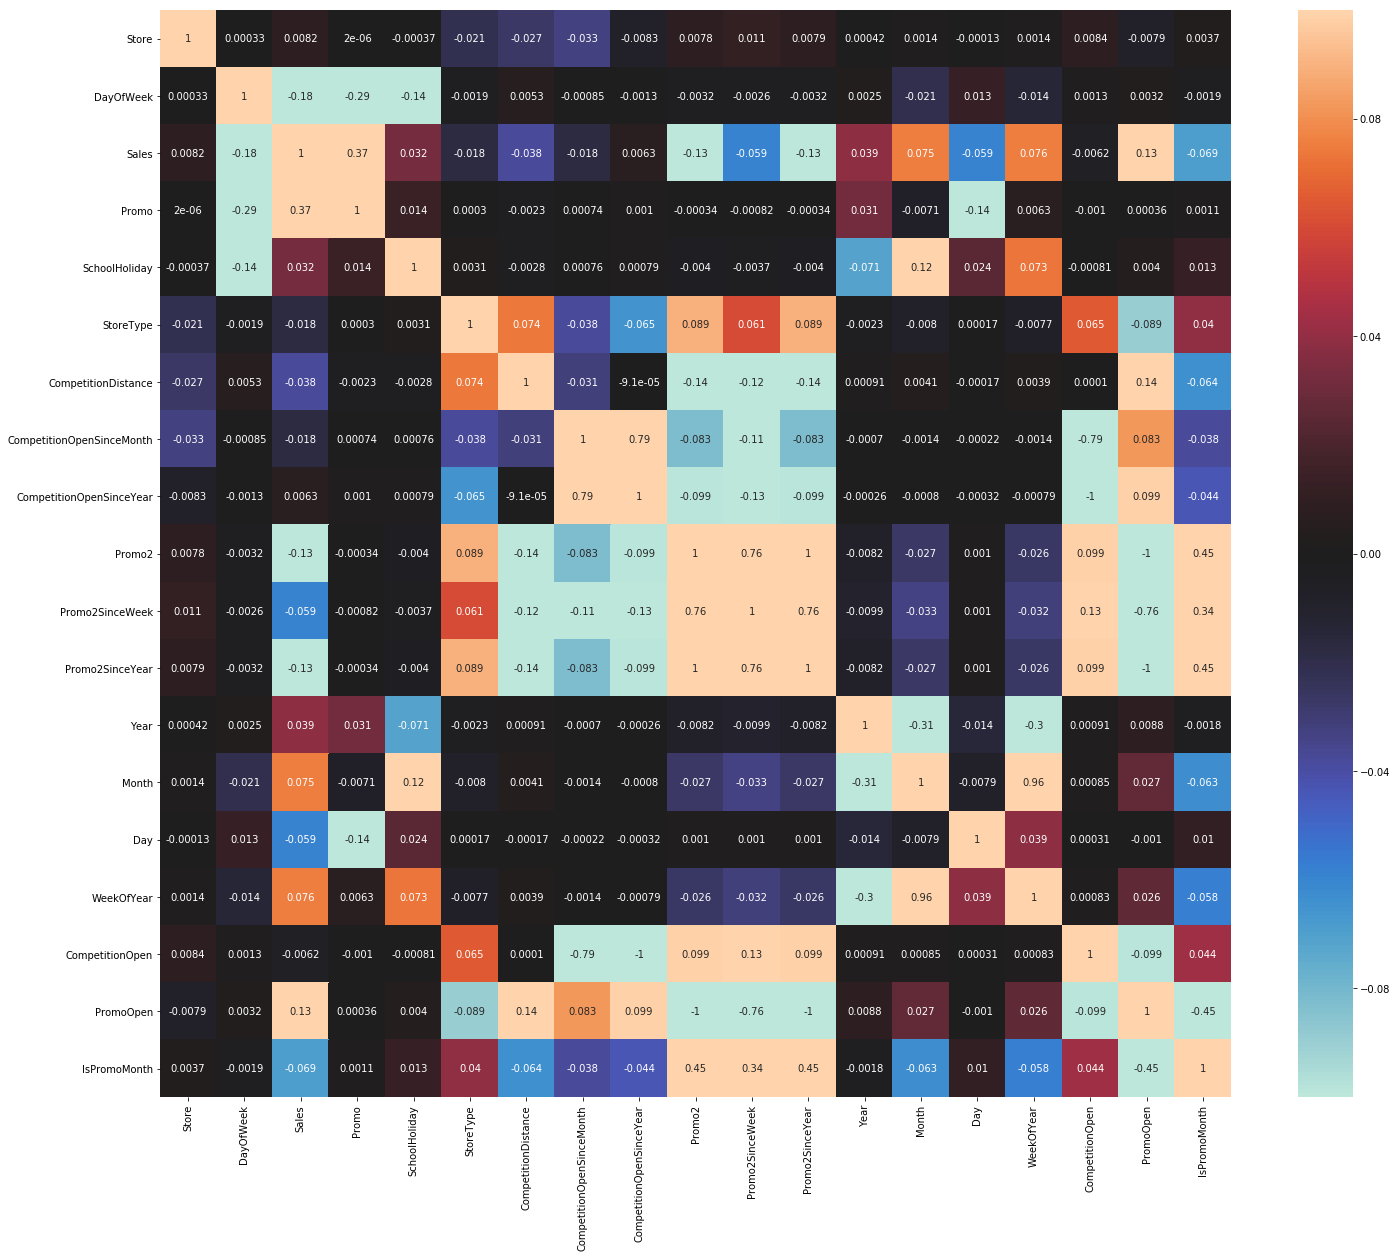

In [75]:
#观察特征之间的相关性
plt.subplots(figsize=(24,20))
sns.heatmap(ho_train.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

与销量相关性最强的特征为 打折 Promo，以及开启的月份

In [76]:
#将预测的标签与特征分开，并将标签进行对数处理，方便进行计算
ho_xtrain = ho_train.drop(['Sales'],axis=1 )
ho_ytrain = np.log1p(ho_train.Sales)
ho_xtest = ho_test.drop(['Sales'],axis=1 )
ho_ytest = np.log1p(ho_test.Sales)

In [80]:
#自定义评估函数（rmspe）
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))
 
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [198]:
#先使用基准模型：LR进行一轮分析
from sklearn.linear_model import LinearRegression
import time
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split


lr_model=LinearRegression()
lr_model.fit(ho_xtrain, ho_ytrain) 
print('系数矩阵:\n',lr_model.coef_)
print('线性回归模型:\n',lr_model)

y_train_predict=lr_model.predict(ho_xtrain)
error = rmspe(ho_ytrain,y_train_predict)
print("训练集-rmspe---lr_model:\n",error)


y_test_predict=lr_model.predict(ho_xtest)
error = rmspe(ho_ytest,y_test_predict)
print("验证集-rmspe---lr_model:\n",error)




系数矩阵:
 [-1.47805722e-06 -1.97737152e-02  3.21308079e-01  7.11504917e-02
  1.80899695e-02  2.55542024e-03  5.96160990e-02 -3.93807652e-06
 -3.75992438e-03  2.22449437e-02  3.41855382e+01  4.63736765e-03
  8.98447199e-02 -8.33529429e-02  6.78114460e-03 -6.75665867e-04
 -1.48535517e-03  1.85198460e-03  8.91023075e-03 -9.36536107e-03]
线性回归模型:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
训练集-rmspe---lr_model:
 0.04356994895692375
验证集-rmspe---lr_model:
 0.04218918630052367


In [199]:
#结果输出
test_probs = lr_model.predict(xtest)
result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs)})
result.to_csv("Rossmann_submission_lr.csv", index=False)

In [203]:
#使用回归树试一下
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(ho_xtrain, ho_ytrain) 
print('决策树模型:\n',tree_model)

y_train_predict=tree_model.predict(ho_xtrain)
error = rmspe(ho_ytrain,y_train_predict)
print("训练集-rmspe---lr_model:\n",error)


y_test_predict=tree_model.predict(ho_xtest)
error = rmspe(ho_ytest,y_test_predict)
print("验证集-rmspe---lr_model:\n",error)

决策树模型:
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
训练集-rmspe---lr_model:
 2.56983006793164e-06
验证集-rmspe---lr_model:
 0.0224934508460357


In [202]:
#结果输出
test_probs = tree_model.predict(xtest)
result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs)})
result.to_csv("Rossmann_submission_tree.csv", index=False)

In [81]:
#设置一组参数 输入到模型中
eta_list = [0.03,0.005]
max_depth_list = [10,15]
subsample_list = [0.8,0.9]
colsample_bytree_list = [0.7,0.8,0.9]
#num_boost_round_list = [6000,20000]

In [172]:
dict_params = {}

idx = 2
for eta in eta_list:
    for max_depth in max_depth_list:
        for subsample in subsample_list:
            for colsample_bytree in colsample_bytree_list:
                    #由于第一个参数在进行整体流程的测试时，已经跑过并经过验证，这里不重复再跑
                    if eta == 0.03 and max_depth == 10 and subsample == 0.8 and colsample_bytree == 0.7:continue
                    if idx not in dict_params:
                        dict_params[idx] = {
                            "objective": "reg:linear",
                            "booster" : "gbtree",
                            "eta": eta,
                            "max_depth": max_depth,
                            "subsample": subsample,
                            "colsample_bytree": colsample_bytree,
                            "silent": 1,
                            "seed": 10
                                          }
                        idx += 1 
                     
                

In [173]:
dict_params

{2: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.8,
  'colsample_bytree': 0.8,
  'silent': 1,
  'seed': 10},
 3: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.8,
  'colsample_bytree': 0.9,
  'silent': 1,
  'seed': 10},
 4: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.9,
  'colsample_bytree': 0.7,
  'silent': 1,
  'seed': 10},
 5: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.9,
  'colsample_bytree': 0.8,
  'silent': 1,
  'seed': 10},
 6: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.9,
  'colsample_bytree': 0.9,
  'silent': 1,
  'seed': 10},
 7: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 15,
  'subsample': 0.8,
  'colsample_bytree': 0.7,
  'silent': 1,
  'seed': 10},
 8: 

In [84]:
import xgboost as xgb

dtrain = xgb.DMatrix(ho_xtrain.values, ho_ytrain.values)
dvalid = xgb.DMatrix(ho_xtest.values, ho_ytest.values)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [104]:
dtrain

In [175]:
import datetime
#训练模型
gbm_list = []
print("Train  XGBoost model")


for key in dict_params:
    params = dict_params[key]
    print(params) 
    print("begins-----")
    start = datetime.datetime.now()
    
    if params['eta'] == 0.005:
        num_boost_round = 50000
        early_stopping_rounds = 5000
    else:
        num_boost_round = 10000
        early_stopping_rounds = 1000
        
    
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,early_stopping_rounds=early_stopping_rounds, feval=rmspe_xg, verbose_eval=True)
    end = datetime.datetime.now()
    
    print(str(key) + '----------Training time is {:2f} s.'.format((end-start).total_seconds()))
    gbm_list.append([key,gbm])

Train  XGBoost model
{'objective': 'reg:linear', 'booster': 'gbtree', 'eta': 0.03, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.8, 'silent': 1, 'seed': 10}
begins-----
[0]	train-rmse:8.02073	eval-rmse:8.02776	train-rmspe:0.999809	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 1000 rounds.
[1]	train-rmse:7.7806	eval-rmse:7.78775	train-rmspe:0.999711	eval-rmspe:0.999714
[2]	train-rmse:7.54774	eval-rmse:7.55408	train-rmspe:0.99959	eval-rmspe:0.999595
[3]	train-rmse:7.32189	eval-rmse:7.32771	train-rmspe:0.999444	eval-rmspe:0.999449
[4]	train-rmse:7.10282	eval-rmse:7.10789	train-rmspe:0.999266	eval-rmspe:0.999273
[5]	train-rmse:6.89033	eval-rmse:6.89475	train-rmspe:0.999052	eval-rmspe:0.999061
[6]	train-rmse:6.68415	eval-rmse:6.68861	train-rmspe:0.998798	eval-rmspe:0.998809
[7]	train-rmse:6.48412	eval-rmse:6.48909	train-rmspe:0.998497	eval-rmspe:0.998511
[8]	train-rmse:6.29

[95]	train-rmse:0.51143	eval-rmse:0.500911	train-rmspe:0.391337	eval-rmspe:0.373221
[96]	train-rmse:0.499559	eval-rmse:0.489144	train-rmspe:0.384943	eval-rmspe:0.366376
[97]	train-rmse:0.488271	eval-rmse:0.477802	train-rmspe:0.378826	eval-rmspe:0.359691
[98]	train-rmse:0.477184	eval-rmse:0.466767	train-rmspe:0.372841	eval-rmspe:0.353195
[99]	train-rmse:0.466734	eval-rmse:0.456765	train-rmspe:0.367127	eval-rmspe:0.347265
[100]	train-rmse:0.456467	eval-rmse:0.446714	train-rmspe:0.361486	eval-rmspe:0.341309
[101]	train-rmse:0.446764	eval-rmse:0.436159	train-rmspe:0.356248	eval-rmspe:0.334986
[102]	train-rmse:0.437016	eval-rmse:0.42671	train-rmspe:0.350973	eval-rmspe:0.329375
[103]	train-rmse:0.427812	eval-rmse:0.417739	train-rmspe:0.346038	eval-rmspe:0.324042
[104]	train-rmse:0.419163	eval-rmse:0.409075	train-rmspe:0.341372	eval-rmspe:0.318888
[105]	train-rmse:0.410737	eval-rmse:0.400941	train-rmspe:0.336879	eval-rmspe:0.314046
[106]	train-rmse:0.402198	eval-rmse:0.39254	train-rmspe:0.332

[191]	train-rmse:0.196987	eval-rmse:0.208153	train-rmspe:0.244497	eval-rmspe:0.221374
[192]	train-rmse:0.195691	eval-rmse:0.207006	train-rmspe:0.243598	eval-rmspe:0.220276
[193]	train-rmse:0.195375	eval-rmse:0.206899	train-rmspe:0.243501	eval-rmspe:0.220327
[194]	train-rmse:0.194696	eval-rmse:0.206348	train-rmspe:0.24199	eval-rmspe:0.219968
[195]	train-rmse:0.194029	eval-rmse:0.205794	train-rmspe:0.24165	eval-rmspe:0.219552
[196]	train-rmse:0.193111	eval-rmse:0.205022	train-rmspe:0.241016	eval-rmspe:0.21889
[197]	train-rmse:0.192649	eval-rmse:0.204765	train-rmspe:0.240728	eval-rmspe:0.218848
[198]	train-rmse:0.191761	eval-rmse:0.204085	train-rmspe:0.240111	eval-rmspe:0.218237
[199]	train-rmse:0.191508	eval-rmse:0.203999	train-rmspe:0.240087	eval-rmspe:0.218347
[200]	train-rmse:0.190866	eval-rmse:0.203397	train-rmspe:0.239642	eval-rmspe:0.217898
[201]	train-rmse:0.190189	eval-rmse:0.20284	train-rmspe:0.238569	eval-rmspe:0.217452
[202]	train-rmse:0.18996	eval-rmse:0.202694	train-rmspe:0.

[287]	train-rmse:0.156962	eval-rmse:0.174178	train-rmspe:0.202867	eval-rmspe:0.190079
[288]	train-rmse:0.156747	eval-rmse:0.174175	train-rmspe:0.202693	eval-rmspe:0.19017
[289]	train-rmse:0.15643	eval-rmse:0.173849	train-rmspe:0.202419	eval-rmspe:0.189789
[290]	train-rmse:0.156202	eval-rmse:0.173672	train-rmspe:0.20215	eval-rmspe:0.189609
[291]	train-rmse:0.155916	eval-rmse:0.173429	train-rmspe:0.201898	eval-rmspe:0.189325
[292]	train-rmse:0.15522	eval-rmse:0.172773	train-rmspe:0.201298	eval-rmspe:0.188618
[293]	train-rmse:0.155006	eval-rmse:0.17264	train-rmspe:0.201105	eval-rmspe:0.188474
[294]	train-rmse:0.154513	eval-rmse:0.172239	train-rmspe:0.200667	eval-rmspe:0.188007
[295]	train-rmse:0.154418	eval-rmse:0.172157	train-rmspe:0.19952	eval-rmspe:0.18792
[296]	train-rmse:0.154191	eval-rmse:0.171915	train-rmspe:0.19932	eval-rmspe:0.18764
[297]	train-rmse:0.153946	eval-rmse:0.171783	train-rmspe:0.19842	eval-rmspe:0.187524
[298]	train-rmse:0.153821	eval-rmse:0.171712	train-rmspe:0.19826

[383]	train-rmse:0.134103	eval-rmse:0.15541	train-rmspe:0.175252	eval-rmspe:0.169822
[384]	train-rmse:0.134047	eval-rmse:0.15536	train-rmspe:0.175166	eval-rmspe:0.169776
[385]	train-rmse:0.133943	eval-rmse:0.15528	train-rmspe:0.175067	eval-rmspe:0.169681
[386]	train-rmse:0.13375	eval-rmse:0.1551	train-rmspe:0.174898	eval-rmspe:0.169486
[387]	train-rmse:0.133443	eval-rmse:0.154859	train-rmspe:0.174612	eval-rmspe:0.169208
[388]	train-rmse:0.13339	eval-rmse:0.154818	train-rmspe:0.17456	eval-rmspe:0.169162
[389]	train-rmse:0.133261	eval-rmse:0.154603	train-rmspe:0.174466	eval-rmspe:0.168923
[390]	train-rmse:0.13312	eval-rmse:0.154478	train-rmspe:0.174343	eval-rmspe:0.16878
[391]	train-rmse:0.13299	eval-rmse:0.154377	train-rmspe:0.174229	eval-rmspe:0.168682
[392]	train-rmse:0.132709	eval-rmse:0.154169	train-rmspe:0.174025	eval-rmspe:0.168459
[393]	train-rmse:0.132642	eval-rmse:0.154107	train-rmspe:0.173957	eval-rmspe:0.168392
[394]	train-rmse:0.132495	eval-rmse:0.153957	train-rmspe:0.173718

[479]	train-rmse:0.119695	eval-rmse:0.14466	train-rmspe:0.157783	eval-rmspe:0.158133
[480]	train-rmse:0.119566	eval-rmse:0.144567	train-rmspe:0.157692	eval-rmspe:0.158039
[481]	train-rmse:0.119493	eval-rmse:0.144575	train-rmspe:0.157109	eval-rmspe:0.158054
[482]	train-rmse:0.119419	eval-rmse:0.144491	train-rmspe:0.15703	eval-rmspe:0.157961
[483]	train-rmse:0.119222	eval-rmse:0.144363	train-rmspe:0.15685	eval-rmspe:0.157818
[484]	train-rmse:0.119061	eval-rmse:0.14423	train-rmspe:0.15663	eval-rmspe:0.157669
[485]	train-rmse:0.118852	eval-rmse:0.144049	train-rmspe:0.156455	eval-rmspe:0.157479
[486]	train-rmse:0.118798	eval-rmse:0.144019	train-rmspe:0.15641	eval-rmspe:0.157443
[487]	train-rmse:0.118718	eval-rmse:0.143941	train-rmspe:0.156342	eval-rmspe:0.157345
[488]	train-rmse:0.118524	eval-rmse:0.14379	train-rmspe:0.156174	eval-rmspe:0.157173
[489]	train-rmse:0.118318	eval-rmse:0.143652	train-rmspe:0.155936	eval-rmspe:0.157003
[490]	train-rmse:0.118138	eval-rmse:0.143465	train-rmspe:0.15

[575]	train-rmse:0.109659	eval-rmse:0.137575	train-rmspe:0.145517	eval-rmspe:0.150178
[576]	train-rmse:0.10954	eval-rmse:0.13749	train-rmspe:0.145413	eval-rmspe:0.15008
[577]	train-rmse:0.109473	eval-rmse:0.137449	train-rmspe:0.145337	eval-rmspe:0.150036
[578]	train-rmse:0.109386	eval-rmse:0.137399	train-rmspe:0.145139	eval-rmspe:0.149981
[579]	train-rmse:0.109343	eval-rmse:0.137354	train-rmspe:0.145307	eval-rmspe:0.149927
[580]	train-rmse:0.109299	eval-rmse:0.137327	train-rmspe:0.145271	eval-rmspe:0.149898
[581]	train-rmse:0.109239	eval-rmse:0.137282	train-rmspe:0.145056	eval-rmspe:0.149848
[582]	train-rmse:0.109188	eval-rmse:0.137258	train-rmspe:0.144927	eval-rmspe:0.149819
[583]	train-rmse:0.109172	eval-rmse:0.137248	train-rmspe:0.144915	eval-rmspe:0.149809
[584]	train-rmse:0.109115	eval-rmse:0.137111	train-rmspe:0.144869	eval-rmspe:0.149633
[585]	train-rmse:0.108914	eval-rmse:0.136971	train-rmspe:0.144661	eval-rmspe:0.149475
[586]	train-rmse:0.108774	eval-rmse:0.136869	train-rmspe:

[671]	train-rmse:0.102789	eval-rmse:0.132519	train-rmspe:0.133216	eval-rmspe:0.144302
[672]	train-rmse:0.102723	eval-rmse:0.132484	train-rmspe:0.133155	eval-rmspe:0.144261
[673]	train-rmse:0.102706	eval-rmse:0.132473	train-rmspe:0.133141	eval-rmspe:0.144251
[674]	train-rmse:0.102675	eval-rmse:0.132458	train-rmspe:0.133342	eval-rmspe:0.144233
[675]	train-rmse:0.102641	eval-rmse:0.132432	train-rmspe:0.133311	eval-rmspe:0.144203
[676]	train-rmse:0.102618	eval-rmse:0.132384	train-rmspe:0.133289	eval-rmspe:0.144138
[677]	train-rmse:0.102563	eval-rmse:0.132354	train-rmspe:0.133199	eval-rmspe:0.144107
[678]	train-rmse:0.102497	eval-rmse:0.132321	train-rmspe:0.133132	eval-rmspe:0.144071
[679]	train-rmse:0.10244	eval-rmse:0.132312	train-rmspe:0.133086	eval-rmspe:0.144062
[680]	train-rmse:0.102335	eval-rmse:0.132241	train-rmspe:0.132993	eval-rmspe:0.143979
[681]	train-rmse:0.102318	eval-rmse:0.132227	train-rmspe:0.132939	eval-rmspe:0.143966
[682]	train-rmse:0.102276	eval-rmse:0.132199	train-rmsp

[767]	train-rmse:0.097693	eval-rmse:0.129614	train-rmspe:0.125264	eval-rmspe:0.140996
[768]	train-rmse:0.097625	eval-rmse:0.129572	train-rmspe:0.125208	eval-rmspe:0.140954
[769]	train-rmse:0.097536	eval-rmse:0.12951	train-rmspe:0.125127	eval-rmspe:0.14088
[770]	train-rmse:0.097507	eval-rmse:0.129489	train-rmspe:0.125092	eval-rmspe:0.140853
[771]	train-rmse:0.097447	eval-rmse:0.129463	train-rmspe:0.125039	eval-rmspe:0.14083
[772]	train-rmse:0.097368	eval-rmse:0.1294	train-rmspe:0.124971	eval-rmspe:0.140756
[773]	train-rmse:0.097314	eval-rmse:0.129433	train-rmspe:0.124854	eval-rmspe:0.140805
[774]	train-rmse:0.097275	eval-rmse:0.129397	train-rmspe:0.124823	eval-rmspe:0.140764
[775]	train-rmse:0.097206	eval-rmse:0.129354	train-rmspe:0.124758	eval-rmspe:0.140717
[776]	train-rmse:0.097178	eval-rmse:0.129306	train-rmspe:0.124726	eval-rmspe:0.140645
[777]	train-rmse:0.09715	eval-rmse:0.129296	train-rmspe:0.124701	eval-rmspe:0.14063
[778]	train-rmse:0.097123	eval-rmse:0.12928	train-rmspe:0.124

[863]	train-rmse:0.093632	eval-rmse:0.1277	train-rmspe:0.118347	eval-rmspe:0.138884
[864]	train-rmse:0.093608	eval-rmse:0.127687	train-rmspe:0.118319	eval-rmspe:0.138872
[865]	train-rmse:0.093579	eval-rmse:0.12767	train-rmspe:0.118296	eval-rmspe:0.138854
[866]	train-rmse:0.093564	eval-rmse:0.127672	train-rmspe:0.11828	eval-rmspe:0.138857
[867]	train-rmse:0.093529	eval-rmse:0.127654	train-rmspe:0.118248	eval-rmspe:0.138833
[868]	train-rmse:0.093509	eval-rmse:0.127646	train-rmspe:0.118228	eval-rmspe:0.138824
[869]	train-rmse:0.093463	eval-rmse:0.127682	train-rmspe:0.118184	eval-rmspe:0.138877
[870]	train-rmse:0.093452	eval-rmse:0.127683	train-rmspe:0.118169	eval-rmspe:0.138878
[871]	train-rmse:0.093431	eval-rmse:0.127677	train-rmspe:0.118151	eval-rmspe:0.138874
[872]	train-rmse:0.093408	eval-rmse:0.127675	train-rmspe:0.118115	eval-rmspe:0.138875
[873]	train-rmse:0.09336	eval-rmse:0.127651	train-rmspe:0.118071	eval-rmspe:0.13885
[874]	train-rmse:0.093323	eval-rmse:0.12772	train-rmspe:0.11

[959]	train-rmse:0.090716	eval-rmse:0.126458	train-rmspe:0.114613	eval-rmspe:0.137464
[960]	train-rmse:0.090672	eval-rmse:0.126436	train-rmspe:0.114567	eval-rmspe:0.13744
[961]	train-rmse:0.09065	eval-rmse:0.126422	train-rmspe:0.114542	eval-rmspe:0.137426
[962]	train-rmse:0.090633	eval-rmse:0.12641	train-rmspe:0.114526	eval-rmspe:0.13741
[963]	train-rmse:0.090622	eval-rmse:0.126412	train-rmspe:0.114508	eval-rmspe:0.13741
[964]	train-rmse:0.090608	eval-rmse:0.126407	train-rmspe:0.114496	eval-rmspe:0.137406
[965]	train-rmse:0.090586	eval-rmse:0.126383	train-rmspe:0.114444	eval-rmspe:0.137383
[966]	train-rmse:0.090553	eval-rmse:0.126382	train-rmspe:0.114408	eval-rmspe:0.137386
[967]	train-rmse:0.090525	eval-rmse:0.126373	train-rmspe:0.114384	eval-rmspe:0.137374
[968]	train-rmse:0.090492	eval-rmse:0.126357	train-rmspe:0.114347	eval-rmspe:0.137357
[969]	train-rmse:0.090471	eval-rmse:0.126342	train-rmspe:0.114327	eval-rmspe:0.137336
[970]	train-rmse:0.090442	eval-rmse:0.126318	train-rmspe:0.

[1055]	train-rmse:0.088248	eval-rmse:0.125581	train-rmspe:0.10755	eval-rmspe:0.136473
[1056]	train-rmse:0.088231	eval-rmse:0.125572	train-rmspe:0.107526	eval-rmspe:0.13646
[1057]	train-rmse:0.088204	eval-rmse:0.125562	train-rmspe:0.107488	eval-rmspe:0.136455
[1058]	train-rmse:0.088172	eval-rmse:0.12554	train-rmspe:0.10745	eval-rmspe:0.136435
[1059]	train-rmse:0.088153	eval-rmse:0.12553	train-rmspe:0.107442	eval-rmspe:0.136425
[1060]	train-rmse:0.088122	eval-rmse:0.125519	train-rmspe:0.107412	eval-rmspe:0.136413
[1061]	train-rmse:0.088094	eval-rmse:0.125506	train-rmspe:0.107379	eval-rmspe:0.136398
[1062]	train-rmse:0.088081	eval-rmse:0.125501	train-rmspe:0.107302	eval-rmspe:0.136392
[1063]	train-rmse:0.088058	eval-rmse:0.125508	train-rmspe:0.107231	eval-rmspe:0.136406
[1064]	train-rmse:0.088027	eval-rmse:0.125491	train-rmspe:0.107203	eval-rmspe:0.136385
[1065]	train-rmse:0.087998	eval-rmse:0.125483	train-rmspe:0.107166	eval-rmspe:0.136375
[1066]	train-rmse:0.087984	eval-rmse:0.125489	tr

[1150]	train-rmse:0.0863	eval-rmse:0.124938	train-rmspe:0.103067	eval-rmspe:0.135781
[1151]	train-rmse:0.086275	eval-rmse:0.124937	train-rmspe:0.103046	eval-rmspe:0.135781
[1152]	train-rmse:0.08626	eval-rmse:0.12494	train-rmspe:0.103031	eval-rmspe:0.135784
[1153]	train-rmse:0.086239	eval-rmse:0.12494	train-rmspe:0.103001	eval-rmspe:0.135787
[1154]	train-rmse:0.086211	eval-rmse:0.124898	train-rmspe:0.102959	eval-rmspe:0.135729
[1155]	train-rmse:0.086201	eval-rmse:0.124896	train-rmspe:0.102992	eval-rmspe:0.135727
[1156]	train-rmse:0.086186	eval-rmse:0.124889	train-rmspe:0.102978	eval-rmspe:0.13572
[1157]	train-rmse:0.086163	eval-rmse:0.124886	train-rmspe:0.102951	eval-rmspe:0.135718
[1158]	train-rmse:0.08614	eval-rmse:0.124879	train-rmspe:0.10292	eval-rmspe:0.13571
[1159]	train-rmse:0.086122	eval-rmse:0.124881	train-rmspe:0.102904	eval-rmspe:0.135713
[1160]	train-rmse:0.086093	eval-rmse:0.124862	train-rmspe:0.102868	eval-rmspe:0.135693
[1161]	train-rmse:0.086073	eval-rmse:0.124851	train-

[1245]	train-rmse:0.084425	eval-rmse:0.124273	train-rmspe:0.09994	eval-rmspe:0.134978
[1246]	train-rmse:0.084407	eval-rmse:0.124267	train-rmspe:0.099919	eval-rmspe:0.134973
[1247]	train-rmse:0.084385	eval-rmse:0.124259	train-rmspe:0.099898	eval-rmspe:0.134969
[1248]	train-rmse:0.084367	eval-rmse:0.124257	train-rmspe:0.099868	eval-rmspe:0.134969
[1249]	train-rmse:0.084348	eval-rmse:0.124254	train-rmspe:0.099833	eval-rmspe:0.134966
[1250]	train-rmse:0.084317	eval-rmse:0.124241	train-rmspe:0.099789	eval-rmspe:0.134952
[1251]	train-rmse:0.084303	eval-rmse:0.124239	train-rmspe:0.099772	eval-rmspe:0.134952
[1252]	train-rmse:0.084282	eval-rmse:0.124233	train-rmspe:0.099668	eval-rmspe:0.134948
[1253]	train-rmse:0.084262	eval-rmse:0.124233	train-rmspe:0.099647	eval-rmspe:0.134946
[1254]	train-rmse:0.084242	eval-rmse:0.124227	train-rmspe:0.099614	eval-rmspe:0.134943
[1255]	train-rmse:0.084223	eval-rmse:0.124225	train-rmspe:0.099592	eval-rmspe:0.134939
[1256]	train-rmse:0.084201	eval-rmse:0.12421

[1340]	train-rmse:0.082617	eval-rmse:0.123833	train-rmspe:0.09662	eval-rmspe:0.134528
[1341]	train-rmse:0.082605	eval-rmse:0.123831	train-rmspe:0.096608	eval-rmspe:0.134527
[1342]	train-rmse:0.082582	eval-rmse:0.123822	train-rmspe:0.096583	eval-rmspe:0.134518
[1343]	train-rmse:0.082564	eval-rmse:0.123815	train-rmspe:0.096566	eval-rmspe:0.134509
[1344]	train-rmse:0.082545	eval-rmse:0.12381	train-rmspe:0.096547	eval-rmspe:0.134505
[1345]	train-rmse:0.08253	eval-rmse:0.123806	train-rmspe:0.096531	eval-rmspe:0.134501
[1346]	train-rmse:0.082511	eval-rmse:0.123802	train-rmspe:0.096506	eval-rmspe:0.134496
[1347]	train-rmse:0.082492	eval-rmse:0.123792	train-rmspe:0.096488	eval-rmspe:0.134484
[1348]	train-rmse:0.08248	eval-rmse:0.123798	train-rmspe:0.096474	eval-rmspe:0.134493
[1349]	train-rmse:0.082466	eval-rmse:0.123794	train-rmspe:0.096454	eval-rmspe:0.134489
[1350]	train-rmse:0.082445	eval-rmse:0.123795	train-rmspe:0.096433	eval-rmspe:0.13449
[1351]	train-rmse:0.082426	eval-rmse:0.123797	tr

[1435]	train-rmse:0.081083	eval-rmse:0.123504	train-rmspe:0.094008	eval-rmspe:0.13418
[1436]	train-rmse:0.08107	eval-rmse:0.123499	train-rmspe:0.093992	eval-rmspe:0.134174
[1437]	train-rmse:0.081058	eval-rmse:0.123499	train-rmspe:0.093979	eval-rmspe:0.134174
[1438]	train-rmse:0.081046	eval-rmse:0.123497	train-rmspe:0.093966	eval-rmspe:0.134172
[1439]	train-rmse:0.081032	eval-rmse:0.123497	train-rmspe:0.093946	eval-rmspe:0.13417
[1440]	train-rmse:0.081019	eval-rmse:0.123498	train-rmspe:0.093935	eval-rmspe:0.13417
[1441]	train-rmse:0.081011	eval-rmse:0.123496	train-rmspe:0.093927	eval-rmspe:0.134169
[1442]	train-rmse:0.081001	eval-rmse:0.123493	train-rmspe:0.093913	eval-rmspe:0.134168
[1443]	train-rmse:0.080994	eval-rmse:0.123489	train-rmspe:0.093906	eval-rmspe:0.134164
[1444]	train-rmse:0.08098	eval-rmse:0.123484	train-rmspe:0.093893	eval-rmspe:0.134159
[1445]	train-rmse:0.080972	eval-rmse:0.123481	train-rmspe:0.093884	eval-rmspe:0.134155
[1446]	train-rmse:0.080959	eval-rmse:0.123475	tr

[1530]	train-rmse:0.079682	eval-rmse:0.123115	train-rmspe:0.090702	eval-rmspe:0.133675
[1531]	train-rmse:0.079663	eval-rmse:0.123109	train-rmspe:0.090684	eval-rmspe:0.133666
[1532]	train-rmse:0.079643	eval-rmse:0.123102	train-rmspe:0.09065	eval-rmspe:0.133658
[1533]	train-rmse:0.079629	eval-rmse:0.123101	train-rmspe:0.090638	eval-rmspe:0.133658
[1534]	train-rmse:0.079615	eval-rmse:0.123092	train-rmspe:0.090646	eval-rmspe:0.133647
[1535]	train-rmse:0.079602	eval-rmse:0.123091	train-rmspe:0.090635	eval-rmspe:0.13365
[1536]	train-rmse:0.079592	eval-rmse:0.123087	train-rmspe:0.090624	eval-rmspe:0.133643
[1537]	train-rmse:0.079576	eval-rmse:0.123093	train-rmspe:0.090596	eval-rmspe:0.133651
[1538]	train-rmse:0.079555	eval-rmse:0.123087	train-rmspe:0.090574	eval-rmspe:0.133644
[1539]	train-rmse:0.079539	eval-rmse:0.12308	train-rmspe:0.090557	eval-rmspe:0.133635
[1540]	train-rmse:0.079528	eval-rmse:0.123078	train-rmspe:0.090545	eval-rmspe:0.13363
[1541]	train-rmse:0.079515	eval-rmse:0.123073	t

[1625]	train-rmse:0.078337	eval-rmse:0.122859	train-rmspe:0.088175	eval-rmspe:0.133409
[1626]	train-rmse:0.078328	eval-rmse:0.122859	train-rmspe:0.088159	eval-rmspe:0.13341
[1627]	train-rmse:0.078303	eval-rmse:0.122847	train-rmspe:0.088133	eval-rmspe:0.133396
[1628]	train-rmse:0.078289	eval-rmse:0.122844	train-rmspe:0.088117	eval-rmspe:0.133395
[1629]	train-rmse:0.078282	eval-rmse:0.122843	train-rmspe:0.088107	eval-rmspe:0.133394
[1630]	train-rmse:0.078273	eval-rmse:0.122863	train-rmspe:0.088098	eval-rmspe:0.133419
[1631]	train-rmse:0.078265	eval-rmse:0.122864	train-rmspe:0.088083	eval-rmspe:0.133419
[1632]	train-rmse:0.078249	eval-rmse:0.122862	train-rmspe:0.088066	eval-rmspe:0.13342
[1633]	train-rmse:0.078234	eval-rmse:0.122872	train-rmspe:0.088051	eval-rmspe:0.133428
[1634]	train-rmse:0.078225	eval-rmse:0.122869	train-rmspe:0.087957	eval-rmspe:0.133424
[1635]	train-rmse:0.078214	eval-rmse:0.122863	train-rmspe:0.087944	eval-rmspe:0.133415
[1636]	train-rmse:0.078203	eval-rmse:0.12286	

[1720]	train-rmse:0.0771	eval-rmse:0.122606	train-rmspe:0.085466	eval-rmspe:0.13313
[1721]	train-rmse:0.07708	eval-rmse:0.122607	train-rmspe:0.085447	eval-rmspe:0.133132
[1722]	train-rmse:0.077069	eval-rmse:0.122609	train-rmspe:0.085374	eval-rmspe:0.133137
[1723]	train-rmse:0.077051	eval-rmse:0.122607	train-rmspe:0.085319	eval-rmspe:0.133136
[1724]	train-rmse:0.077041	eval-rmse:0.122606	train-rmspe:0.085289	eval-rmspe:0.133135
[1725]	train-rmse:0.077032	eval-rmse:0.122603	train-rmspe:0.085274	eval-rmspe:0.13313
[1726]	train-rmse:0.077017	eval-rmse:0.1226	train-rmspe:0.085256	eval-rmspe:0.133128
[1727]	train-rmse:0.077006	eval-rmse:0.122598	train-rmspe:0.085242	eval-rmspe:0.133127
[1728]	train-rmse:0.076996	eval-rmse:0.122596	train-rmspe:0.08523	eval-rmspe:0.133124
[1729]	train-rmse:0.076986	eval-rmse:0.122597	train-rmspe:0.085219	eval-rmspe:0.133127
[1730]	train-rmse:0.076971	eval-rmse:0.122609	train-rmspe:0.0852	eval-rmspe:0.133144
[1731]	train-rmse:0.076961	eval-rmse:0.122608	train-r

[1815]	train-rmse:0.075928	eval-rmse:0.122423	train-rmspe:0.083369	eval-rmspe:0.132935
[1816]	train-rmse:0.07592	eval-rmse:0.122423	train-rmspe:0.083345	eval-rmspe:0.132934
[1817]	train-rmse:0.075911	eval-rmse:0.122419	train-rmspe:0.083336	eval-rmspe:0.13293
[1818]	train-rmse:0.075907	eval-rmse:0.122422	train-rmspe:0.083331	eval-rmspe:0.132934
[1819]	train-rmse:0.075893	eval-rmse:0.122428	train-rmspe:0.083305	eval-rmspe:0.13294
[1820]	train-rmse:0.075885	eval-rmse:0.122425	train-rmspe:0.083291	eval-rmspe:0.132937
[1821]	train-rmse:0.075877	eval-rmse:0.122422	train-rmspe:0.083283	eval-rmspe:0.132934
[1822]	train-rmse:0.075864	eval-rmse:0.122415	train-rmspe:0.083268	eval-rmspe:0.132925
[1823]	train-rmse:0.075857	eval-rmse:0.122408	train-rmspe:0.083261	eval-rmspe:0.132915
[1824]	train-rmse:0.075847	eval-rmse:0.122411	train-rmspe:0.083251	eval-rmspe:0.13292
[1825]	train-rmse:0.07584	eval-rmse:0.122408	train-rmspe:0.083243	eval-rmspe:0.132917
[1826]	train-rmse:0.075817	eval-rmse:0.122396	tr

[1910]	train-rmse:0.074844	eval-rmse:0.122211	train-rmspe:0.081633	eval-rmspe:0.132686
[1911]	train-rmse:0.074834	eval-rmse:0.122209	train-rmspe:0.081621	eval-rmspe:0.132686
[1912]	train-rmse:0.074824	eval-rmse:0.122211	train-rmspe:0.08161	eval-rmspe:0.13269
[1913]	train-rmse:0.074813	eval-rmse:0.122206	train-rmspe:0.081591	eval-rmspe:0.132683
[1914]	train-rmse:0.074809	eval-rmse:0.122203	train-rmspe:0.081587	eval-rmspe:0.132679
[1915]	train-rmse:0.074801	eval-rmse:0.122199	train-rmspe:0.081578	eval-rmspe:0.132674
[1916]	train-rmse:0.074792	eval-rmse:0.122208	train-rmspe:0.081566	eval-rmspe:0.132687
[1917]	train-rmse:0.074778	eval-rmse:0.122213	train-rmspe:0.081541	eval-rmspe:0.132697
[1918]	train-rmse:0.07477	eval-rmse:0.122211	train-rmspe:0.081528	eval-rmspe:0.132696
[1919]	train-rmse:0.074754	eval-rmse:0.122208	train-rmspe:0.081505	eval-rmspe:0.132692
[1920]	train-rmse:0.074744	eval-rmse:0.122207	train-rmspe:0.081487	eval-rmspe:0.132691
[1921]	train-rmse:0.074732	eval-rmse:0.122208	

[2005]	train-rmse:0.07389	eval-rmse:0.122028	train-rmspe:0.080325	eval-rmspe:0.132487
[2006]	train-rmse:0.073876	eval-rmse:0.122025	train-rmspe:0.080306	eval-rmspe:0.132483
[2007]	train-rmse:0.073868	eval-rmse:0.122034	train-rmspe:0.080289	eval-rmspe:0.132495
[2008]	train-rmse:0.073858	eval-rmse:0.122033	train-rmspe:0.080277	eval-rmspe:0.132495
[2009]	train-rmse:0.073841	eval-rmse:0.122035	train-rmspe:0.08025	eval-rmspe:0.132499
[2010]	train-rmse:0.073834	eval-rmse:0.122039	train-rmspe:0.0802	eval-rmspe:0.132505
[2011]	train-rmse:0.073825	eval-rmse:0.122042	train-rmspe:0.080185	eval-rmspe:0.13251
[2012]	train-rmse:0.073813	eval-rmse:0.122041	train-rmspe:0.080163	eval-rmspe:0.132511
[2013]	train-rmse:0.073799	eval-rmse:0.122037	train-rmspe:0.080144	eval-rmspe:0.132505
[2014]	train-rmse:0.073789	eval-rmse:0.122033	train-rmspe:0.080132	eval-rmspe:0.132502
[2015]	train-rmse:0.073782	eval-rmse:0.122036	train-rmspe:0.080125	eval-rmspe:0.132506
[2016]	train-rmse:0.073771	eval-rmse:0.122031	tr

[2100]	train-rmse:0.072952	eval-rmse:0.121916	train-rmspe:0.078959	eval-rmspe:0.13239
[2101]	train-rmse:0.072942	eval-rmse:0.121915	train-rmspe:0.078946	eval-rmspe:0.132391
[2102]	train-rmse:0.072934	eval-rmse:0.121916	train-rmspe:0.078938	eval-rmspe:0.132391
[2103]	train-rmse:0.072928	eval-rmse:0.121917	train-rmspe:0.078932	eval-rmspe:0.132393
[2104]	train-rmse:0.07292	eval-rmse:0.121917	train-rmspe:0.078922	eval-rmspe:0.132393
[2105]	train-rmse:0.072912	eval-rmse:0.121913	train-rmspe:0.078903	eval-rmspe:0.132394
[2106]	train-rmse:0.072905	eval-rmse:0.121911	train-rmspe:0.078895	eval-rmspe:0.132392
[2107]	train-rmse:0.072897	eval-rmse:0.121915	train-rmspe:0.078883	eval-rmspe:0.1324
[2108]	train-rmse:0.072887	eval-rmse:0.121911	train-rmspe:0.078877	eval-rmspe:0.132399
[2109]	train-rmse:0.072878	eval-rmse:0.121905	train-rmspe:0.078865	eval-rmspe:0.132391
[2110]	train-rmse:0.072868	eval-rmse:0.121902	train-rmspe:0.078855	eval-rmspe:0.13239
[2111]	train-rmse:0.072854	eval-rmse:0.121903	tr

[2195]	train-rmse:0.072017	eval-rmse:0.121821	train-rmspe:0.077678	eval-rmspe:0.132319
[2196]	train-rmse:0.07201	eval-rmse:0.121818	train-rmspe:0.07767	eval-rmspe:0.132315
[2197]	train-rmse:0.071999	eval-rmse:0.121811	train-rmspe:0.077659	eval-rmspe:0.132308
[2198]	train-rmse:0.07199	eval-rmse:0.121811	train-rmspe:0.077646	eval-rmspe:0.132307
[2199]	train-rmse:0.071979	eval-rmse:0.12181	train-rmspe:0.077596	eval-rmspe:0.132307
[2200]	train-rmse:0.071971	eval-rmse:0.121806	train-rmspe:0.077586	eval-rmspe:0.132302
[2201]	train-rmse:0.071965	eval-rmse:0.121808	train-rmspe:0.077568	eval-rmspe:0.132305
[2202]	train-rmse:0.071957	eval-rmse:0.121809	train-rmspe:0.077557	eval-rmspe:0.132306
[2203]	train-rmse:0.071948	eval-rmse:0.121807	train-rmspe:0.077548	eval-rmspe:0.132305
[2204]	train-rmse:0.071942	eval-rmse:0.121817	train-rmspe:0.07754	eval-rmspe:0.132316
[2205]	train-rmse:0.071934	eval-rmse:0.121817	train-rmspe:0.077531	eval-rmspe:0.132315
[2206]	train-rmse:0.071927	eval-rmse:0.121832	tr

[2290]	train-rmse:0.071167	eval-rmse:0.12178	train-rmspe:0.076485	eval-rmspe:0.132234
[2291]	train-rmse:0.071157	eval-rmse:0.121782	train-rmspe:0.076467	eval-rmspe:0.132238
[2292]	train-rmse:0.071149	eval-rmse:0.121783	train-rmspe:0.076456	eval-rmspe:0.13224
[2293]	train-rmse:0.071134	eval-rmse:0.121777	train-rmspe:0.076436	eval-rmspe:0.132233
[2294]	train-rmse:0.071133	eval-rmse:0.121777	train-rmspe:0.076435	eval-rmspe:0.132232
[2295]	train-rmse:0.071127	eval-rmse:0.121776	train-rmspe:0.076429	eval-rmspe:0.132231
[2296]	train-rmse:0.071118	eval-rmse:0.121774	train-rmspe:0.076418	eval-rmspe:0.13223
[2297]	train-rmse:0.071105	eval-rmse:0.121773	train-rmspe:0.0764	eval-rmspe:0.132229
[2298]	train-rmse:0.071094	eval-rmse:0.121772	train-rmspe:0.076381	eval-rmspe:0.132228
[2299]	train-rmse:0.071083	eval-rmse:0.121769	train-rmspe:0.076368	eval-rmspe:0.132223
[2300]	train-rmse:0.071076	eval-rmse:0.121764	train-rmspe:0.076359	eval-rmspe:0.132216
[2301]	train-rmse:0.071069	eval-rmse:0.121763	tr

[2385]	train-rmse:0.070364	eval-rmse:0.121716	train-rmspe:0.075416	eval-rmspe:0.132171
[2386]	train-rmse:0.070357	eval-rmse:0.121716	train-rmspe:0.075409	eval-rmspe:0.13217
[2387]	train-rmse:0.070346	eval-rmse:0.121717	train-rmspe:0.075395	eval-rmspe:0.132171
[2388]	train-rmse:0.070342	eval-rmse:0.121718	train-rmspe:0.075391	eval-rmspe:0.132172
[2389]	train-rmse:0.070334	eval-rmse:0.121725	train-rmspe:0.075377	eval-rmspe:0.132183
[2390]	train-rmse:0.070327	eval-rmse:0.121721	train-rmspe:0.075368	eval-rmspe:0.132178
[2391]	train-rmse:0.070318	eval-rmse:0.12172	train-rmspe:0.075329	eval-rmspe:0.132175
[2392]	train-rmse:0.070312	eval-rmse:0.121718	train-rmspe:0.075322	eval-rmspe:0.132173
[2393]	train-rmse:0.070303	eval-rmse:0.121716	train-rmspe:0.075313	eval-rmspe:0.132173
[2394]	train-rmse:0.070296	eval-rmse:0.121715	train-rmspe:0.075305	eval-rmspe:0.132171
[2395]	train-rmse:0.070291	eval-rmse:0.12172	train-rmspe:0.0753	eval-rmspe:0.13218
[2396]	train-rmse:0.070279	eval-rmse:0.12173	trai

[2480]	train-rmse:0.069599	eval-rmse:0.121662	train-rmspe:0.074366	eval-rmspe:0.132119
[2481]	train-rmse:0.06959	eval-rmse:0.12166	train-rmspe:0.074357	eval-rmspe:0.132117
[2482]	train-rmse:0.069583	eval-rmse:0.12166	train-rmspe:0.074348	eval-rmspe:0.132117
[2483]	train-rmse:0.069574	eval-rmse:0.121659	train-rmspe:0.074338	eval-rmspe:0.132117
[2484]	train-rmse:0.06957	eval-rmse:0.121659	train-rmspe:0.074333	eval-rmspe:0.132117
[2485]	train-rmse:0.069561	eval-rmse:0.121654	train-rmspe:0.074322	eval-rmspe:0.13211
[2486]	train-rmse:0.069554	eval-rmse:0.121657	train-rmspe:0.074314	eval-rmspe:0.132113
[2487]	train-rmse:0.069548	eval-rmse:0.121659	train-rmspe:0.074309	eval-rmspe:0.132117
[2488]	train-rmse:0.06954	eval-rmse:0.121658	train-rmspe:0.074299	eval-rmspe:0.132115
[2489]	train-rmse:0.06953	eval-rmse:0.121657	train-rmspe:0.074287	eval-rmspe:0.132113
[2490]	train-rmse:0.069518	eval-rmse:0.121657	train-rmspe:0.074264	eval-rmspe:0.132113
[2491]	train-rmse:0.069507	eval-rmse:0.121657	trai

[2575]	train-rmse:0.068843	eval-rmse:0.121609	train-rmspe:0.073381	eval-rmspe:0.132077
[2576]	train-rmse:0.068836	eval-rmse:0.121612	train-rmspe:0.073373	eval-rmspe:0.13208
[2577]	train-rmse:0.068827	eval-rmse:0.121611	train-rmspe:0.073359	eval-rmspe:0.132081
[2578]	train-rmse:0.068822	eval-rmse:0.121617	train-rmspe:0.073352	eval-rmspe:0.132088
[2579]	train-rmse:0.068815	eval-rmse:0.121612	train-rmspe:0.073346	eval-rmspe:0.132081
[2580]	train-rmse:0.068806	eval-rmse:0.121613	train-rmspe:0.073336	eval-rmspe:0.132084
[2581]	train-rmse:0.068798	eval-rmse:0.121615	train-rmspe:0.073327	eval-rmspe:0.132084
[2582]	train-rmse:0.068789	eval-rmse:0.121616	train-rmspe:0.073315	eval-rmspe:0.132086
[2583]	train-rmse:0.068778	eval-rmse:0.121614	train-rmspe:0.0733	eval-rmspe:0.132083
[2584]	train-rmse:0.068768	eval-rmse:0.121611	train-rmspe:0.073289	eval-rmspe:0.13208
[2585]	train-rmse:0.068762	eval-rmse:0.121605	train-rmspe:0.07328	eval-rmspe:0.132071
[2586]	train-rmse:0.068753	eval-rmse:0.121602	tr

[2670]	train-rmse:0.068109	eval-rmse:0.121554	train-rmspe:0.072374	eval-rmspe:0.132004
[2671]	train-rmse:0.068106	eval-rmse:0.121558	train-rmspe:0.072366	eval-rmspe:0.132011
[2672]	train-rmse:0.0681	eval-rmse:0.121558	train-rmspe:0.072359	eval-rmspe:0.132011
[2673]	train-rmse:0.068094	eval-rmse:0.121563	train-rmspe:0.072353	eval-rmspe:0.132018
[2674]	train-rmse:0.068089	eval-rmse:0.121562	train-rmspe:0.072346	eval-rmspe:0.13202
[2675]	train-rmse:0.068081	eval-rmse:0.12156	train-rmspe:0.072337	eval-rmspe:0.132016
[2676]	train-rmse:0.068071	eval-rmse:0.121553	train-rmspe:0.072323	eval-rmspe:0.132008
[2677]	train-rmse:0.068066	eval-rmse:0.121549	train-rmspe:0.072317	eval-rmspe:0.132003
[2678]	train-rmse:0.068058	eval-rmse:0.121546	train-rmspe:0.072309	eval-rmspe:0.132
[2679]	train-rmse:0.068053	eval-rmse:0.121554	train-rmspe:0.072302	eval-rmspe:0.132011
[2680]	train-rmse:0.068047	eval-rmse:0.121553	train-rmspe:0.072295	eval-rmspe:0.132009
[2681]	train-rmse:0.068036	eval-rmse:0.121549	trai

[2765]	train-rmse:0.067386	eval-rmse:0.121548	train-rmspe:0.071369	eval-rmspe:0.132022
[2766]	train-rmse:0.067378	eval-rmse:0.121548	train-rmspe:0.07136	eval-rmspe:0.132021
[2767]	train-rmse:0.067371	eval-rmse:0.121552	train-rmspe:0.071351	eval-rmspe:0.132026
[2768]	train-rmse:0.067363	eval-rmse:0.121551	train-rmspe:0.071342	eval-rmspe:0.132026
[2769]	train-rmse:0.067356	eval-rmse:0.12155	train-rmspe:0.071333	eval-rmspe:0.132022
[2770]	train-rmse:0.067348	eval-rmse:0.121553	train-rmspe:0.071319	eval-rmspe:0.132024
[2771]	train-rmse:0.067342	eval-rmse:0.121554	train-rmspe:0.071312	eval-rmspe:0.132026
[2772]	train-rmse:0.067335	eval-rmse:0.12155	train-rmspe:0.071303	eval-rmspe:0.132019
[2773]	train-rmse:0.06733	eval-rmse:0.121548	train-rmspe:0.071298	eval-rmspe:0.132018
[2774]	train-rmse:0.067323	eval-rmse:0.12155	train-rmspe:0.071291	eval-rmspe:0.132022
[2775]	train-rmse:0.067317	eval-rmse:0.12155	train-rmspe:0.071283	eval-rmspe:0.132023
[2776]	train-rmse:0.067306	eval-rmse:0.121547	tra

[2860]	train-rmse:0.06675	eval-rmse:0.121538	train-rmspe:0.070563	eval-rmspe:0.131997
[2861]	train-rmse:0.066744	eval-rmse:0.121535	train-rmspe:0.070555	eval-rmspe:0.131994
[2862]	train-rmse:0.066737	eval-rmse:0.121533	train-rmspe:0.070548	eval-rmspe:0.131993
[2863]	train-rmse:0.066728	eval-rmse:0.121531	train-rmspe:0.070535	eval-rmspe:0.13199
[2864]	train-rmse:0.06672	eval-rmse:0.121534	train-rmspe:0.070527	eval-rmspe:0.131993
[2865]	train-rmse:0.066715	eval-rmse:0.121535	train-rmspe:0.070522	eval-rmspe:0.131995
[2866]	train-rmse:0.066708	eval-rmse:0.121533	train-rmspe:0.070514	eval-rmspe:0.131992
[2867]	train-rmse:0.066702	eval-rmse:0.121532	train-rmspe:0.070509	eval-rmspe:0.131992
[2868]	train-rmse:0.066698	eval-rmse:0.121534	train-rmspe:0.070504	eval-rmspe:0.131996
[2869]	train-rmse:0.066692	eval-rmse:0.121535	train-rmspe:0.070497	eval-rmspe:0.131996
[2870]	train-rmse:0.066686	eval-rmse:0.121535	train-rmspe:0.070491	eval-rmspe:0.131994
[2871]	train-rmse:0.066682	eval-rmse:0.121532	

[2955]	train-rmse:0.066112	eval-rmse:0.121489	train-rmspe:0.069749	eval-rmspe:0.131948
[2956]	train-rmse:0.066107	eval-rmse:0.121492	train-rmspe:0.069744	eval-rmspe:0.131953
[2957]	train-rmse:0.066103	eval-rmse:0.121491	train-rmspe:0.06974	eval-rmspe:0.131951
[2958]	train-rmse:0.066099	eval-rmse:0.121489	train-rmspe:0.069736	eval-rmspe:0.131948
[2959]	train-rmse:0.066094	eval-rmse:0.121489	train-rmspe:0.06973	eval-rmspe:0.131949
[2960]	train-rmse:0.066088	eval-rmse:0.121498	train-rmspe:0.069722	eval-rmspe:0.131962
[2961]	train-rmse:0.066084	eval-rmse:0.121493	train-rmspe:0.069718	eval-rmspe:0.131957
[2962]	train-rmse:0.066078	eval-rmse:0.121503	train-rmspe:0.06971	eval-rmspe:0.131971
[2963]	train-rmse:0.066068	eval-rmse:0.121502	train-rmspe:0.069696	eval-rmspe:0.131969
[2964]	train-rmse:0.06606	eval-rmse:0.1215	train-rmspe:0.069685	eval-rmspe:0.131965
[2965]	train-rmse:0.066054	eval-rmse:0.121503	train-rmspe:0.069676	eval-rmspe:0.131968
[2966]	train-rmse:0.066048	eval-rmse:0.121501	tra

[3050]	train-rmse:0.065525	eval-rmse:0.121505	train-rmspe:0.069014	eval-rmspe:0.131965
[3051]	train-rmse:0.065521	eval-rmse:0.121502	train-rmspe:0.069009	eval-rmspe:0.131961
[3052]	train-rmse:0.065512	eval-rmse:0.121503	train-rmspe:0.068996	eval-rmspe:0.131961
[3053]	train-rmse:0.065507	eval-rmse:0.121502	train-rmspe:0.068992	eval-rmspe:0.13196
[3054]	train-rmse:0.065502	eval-rmse:0.121501	train-rmspe:0.068986	eval-rmspe:0.131959
[3055]	train-rmse:0.065497	eval-rmse:0.1215	train-rmspe:0.06898	eval-rmspe:0.131959
[3056]	train-rmse:0.065484	eval-rmse:0.121498	train-rmspe:0.068958	eval-rmspe:0.131957
[3057]	train-rmse:0.065476	eval-rmse:0.121499	train-rmspe:0.06895	eval-rmspe:0.131958
[3058]	train-rmse:0.065473	eval-rmse:0.121502	train-rmspe:0.068946	eval-rmspe:0.131963
[3059]	train-rmse:0.065468	eval-rmse:0.1215	train-rmspe:0.06894	eval-rmspe:0.131961
[3060]	train-rmse:0.065464	eval-rmse:0.121499	train-rmspe:0.068937	eval-rmspe:0.131959
[3061]	train-rmse:0.065458	eval-rmse:0.121496	train

[3145]	train-rmse:0.064939	eval-rmse:0.121458	train-rmspe:0.068289	eval-rmspe:0.131919
[3146]	train-rmse:0.064935	eval-rmse:0.121454	train-rmspe:0.068285	eval-rmspe:0.13191
[3147]	train-rmse:0.064929	eval-rmse:0.121454	train-rmspe:0.068278	eval-rmspe:0.13191
[3148]	train-rmse:0.06492	eval-rmse:0.121454	train-rmspe:0.068269	eval-rmspe:0.131909
[3149]	train-rmse:0.064914	eval-rmse:0.121453	train-rmspe:0.068261	eval-rmspe:0.131907
[3150]	train-rmse:0.064907	eval-rmse:0.121451	train-rmspe:0.068254	eval-rmspe:0.131905
[3151]	train-rmse:0.064899	eval-rmse:0.121448	train-rmspe:0.068243	eval-rmspe:0.131903
[3152]	train-rmse:0.064894	eval-rmse:0.121453	train-rmspe:0.068237	eval-rmspe:0.131907
[3153]	train-rmse:0.064886	eval-rmse:0.121452	train-rmspe:0.068223	eval-rmspe:0.131906
[3154]	train-rmse:0.064879	eval-rmse:0.121451	train-rmspe:0.068215	eval-rmspe:0.131904
[3155]	train-rmse:0.064871	eval-rmse:0.121448	train-rmspe:0.068204	eval-rmspe:0.131902
[3156]	train-rmse:0.064863	eval-rmse:0.121442	

[3240]	train-rmse:0.064348	eval-rmse:0.121433	train-rmspe:0.067537	eval-rmspe:0.131901
[3241]	train-rmse:0.064341	eval-rmse:0.121434	train-rmspe:0.067528	eval-rmspe:0.131906
[3242]	train-rmse:0.064336	eval-rmse:0.121432	train-rmspe:0.067522	eval-rmspe:0.1319
[3243]	train-rmse:0.064331	eval-rmse:0.121432	train-rmspe:0.067516	eval-rmspe:0.1319
[3244]	train-rmse:0.064327	eval-rmse:0.121432	train-rmspe:0.067512	eval-rmspe:0.1319
[3245]	train-rmse:0.06432	eval-rmse:0.12143	train-rmspe:0.067503	eval-rmspe:0.131899
[3246]	train-rmse:0.064315	eval-rmse:0.121431	train-rmspe:0.067497	eval-rmspe:0.1319
[3247]	train-rmse:0.064309	eval-rmse:0.12143	train-rmspe:0.067491	eval-rmspe:0.131899
[3248]	train-rmse:0.064302	eval-rmse:0.121431	train-rmspe:0.067484	eval-rmspe:0.1319
[3249]	train-rmse:0.064295	eval-rmse:0.121433	train-rmspe:0.067471	eval-rmspe:0.131903
[3250]	train-rmse:0.064288	eval-rmse:0.121433	train-rmspe:0.067461	eval-rmspe:0.131903
[3251]	train-rmse:0.064283	eval-rmse:0.121434	train-rmsp

[3335]	train-rmse:0.063807	eval-rmse:0.121447	train-rmspe:0.06688	eval-rmspe:0.131928
[3336]	train-rmse:0.063803	eval-rmse:0.121447	train-rmspe:0.066876	eval-rmspe:0.131929
[3337]	train-rmse:0.063795	eval-rmse:0.121447	train-rmspe:0.066864	eval-rmspe:0.131928
[3338]	train-rmse:0.06379	eval-rmse:0.121446	train-rmspe:0.066859	eval-rmspe:0.131928
[3339]	train-rmse:0.063786	eval-rmse:0.121446	train-rmspe:0.066853	eval-rmspe:0.131929
[3340]	train-rmse:0.063781	eval-rmse:0.121446	train-rmspe:0.066848	eval-rmspe:0.131929
[3341]	train-rmse:0.063776	eval-rmse:0.121448	train-rmspe:0.066842	eval-rmspe:0.131931
[3342]	train-rmse:0.063773	eval-rmse:0.121449	train-rmspe:0.066836	eval-rmspe:0.131931
[3343]	train-rmse:0.063766	eval-rmse:0.121447	train-rmspe:0.066825	eval-rmspe:0.131929
[3344]	train-rmse:0.06376	eval-rmse:0.121446	train-rmspe:0.066818	eval-rmspe:0.131927
[3345]	train-rmse:0.063752	eval-rmse:0.121449	train-rmspe:0.06681	eval-rmspe:0.131933
[3346]	train-rmse:0.063747	eval-rmse:0.121446	t

[3430]	train-rmse:0.063285	eval-rmse:0.121435	train-rmspe:0.066249	eval-rmspe:0.131917
[3431]	train-rmse:0.063282	eval-rmse:0.121433	train-rmspe:0.066246	eval-rmspe:0.131915
[3432]	train-rmse:0.063276	eval-rmse:0.121432	train-rmspe:0.066238	eval-rmspe:0.131913
[3433]	train-rmse:0.063271	eval-rmse:0.121435	train-rmspe:0.06623	eval-rmspe:0.131918
[3434]	train-rmse:0.063264	eval-rmse:0.121435	train-rmspe:0.066221	eval-rmspe:0.131916
[3435]	train-rmse:0.063256	eval-rmse:0.121432	train-rmspe:0.066202	eval-rmspe:0.131914
[3436]	train-rmse:0.063252	eval-rmse:0.121434	train-rmspe:0.066198	eval-rmspe:0.131917
[3437]	train-rmse:0.063245	eval-rmse:0.121438	train-rmspe:0.06619	eval-rmspe:0.131922
[3438]	train-rmse:0.063239	eval-rmse:0.121438	train-rmspe:0.066184	eval-rmspe:0.131923
[3439]	train-rmse:0.063234	eval-rmse:0.121436	train-rmspe:0.066179	eval-rmspe:0.131921
[3440]	train-rmse:0.06323	eval-rmse:0.121438	train-rmspe:0.066173	eval-rmspe:0.131922
[3441]	train-rmse:0.063225	eval-rmse:0.121437	

[3525]	train-rmse:0.062721	eval-rmse:0.121422	train-rmspe:0.065543	eval-rmspe:0.131891
[3526]	train-rmse:0.062712	eval-rmse:0.121421	train-rmspe:0.065532	eval-rmspe:0.13189
[3527]	train-rmse:0.062708	eval-rmse:0.121422	train-rmspe:0.065528	eval-rmspe:0.131892
[3528]	train-rmse:0.062701	eval-rmse:0.12142	train-rmspe:0.065519	eval-rmspe:0.131889
[3529]	train-rmse:0.062696	eval-rmse:0.121418	train-rmspe:0.065513	eval-rmspe:0.131887
[3530]	train-rmse:0.062692	eval-rmse:0.121419	train-rmspe:0.06551	eval-rmspe:0.131887
[3531]	train-rmse:0.062687	eval-rmse:0.121419	train-rmspe:0.065504	eval-rmspe:0.131888
[3532]	train-rmse:0.06268	eval-rmse:0.121423	train-rmspe:0.065493	eval-rmspe:0.131894
[3533]	train-rmse:0.062672	eval-rmse:0.121422	train-rmspe:0.065483	eval-rmspe:0.131892
[3534]	train-rmse:0.062667	eval-rmse:0.121419	train-rmspe:0.065473	eval-rmspe:0.131888
[3535]	train-rmse:0.062663	eval-rmse:0.12142	train-rmspe:0.065468	eval-rmspe:0.13189
[3536]	train-rmse:0.062659	eval-rmse:0.12142	trai

[3620]	train-rmse:0.062211	eval-rmse:0.121446	train-rmspe:0.064924	eval-rmspe:0.131917
[3621]	train-rmse:0.062205	eval-rmse:0.121446	train-rmspe:0.064917	eval-rmspe:0.131917
[3622]	train-rmse:0.062201	eval-rmse:0.121445	train-rmspe:0.064912	eval-rmspe:0.131915
[3623]	train-rmse:0.062195	eval-rmse:0.121445	train-rmspe:0.064905	eval-rmspe:0.131915
[3624]	train-rmse:0.062193	eval-rmse:0.121443	train-rmspe:0.064903	eval-rmspe:0.131913
[3625]	train-rmse:0.062189	eval-rmse:0.121443	train-rmspe:0.064898	eval-rmspe:0.131913
[3626]	train-rmse:0.062183	eval-rmse:0.121442	train-rmspe:0.064892	eval-rmspe:0.131911
[3627]	train-rmse:0.062175	eval-rmse:0.121442	train-rmspe:0.06488	eval-rmspe:0.13191
[3628]	train-rmse:0.062171	eval-rmse:0.121444	train-rmspe:0.064875	eval-rmspe:0.131913
[3629]	train-rmse:0.062166	eval-rmse:0.121448	train-rmspe:0.064869	eval-rmspe:0.131917
[3630]	train-rmse:0.062161	eval-rmse:0.121447	train-rmspe:0.064862	eval-rmspe:0.131916
[3631]	train-rmse:0.062156	eval-rmse:0.12145	

[3715]	train-rmse:0.061704	eval-rmse:0.121474	train-rmspe:0.064304	eval-rmspe:0.131952
[3716]	train-rmse:0.061698	eval-rmse:0.121473	train-rmspe:0.064298	eval-rmspe:0.131952
[3717]	train-rmse:0.061691	eval-rmse:0.121474	train-rmspe:0.064287	eval-rmspe:0.131953
[3718]	train-rmse:0.061685	eval-rmse:0.121475	train-rmspe:0.064281	eval-rmspe:0.131954
[3719]	train-rmse:0.061681	eval-rmse:0.121471	train-rmspe:0.064275	eval-rmspe:0.131946
[3720]	train-rmse:0.061676	eval-rmse:0.121471	train-rmspe:0.06427	eval-rmspe:0.131944
[3721]	train-rmse:0.061672	eval-rmse:0.12147	train-rmspe:0.064267	eval-rmspe:0.131944
[3722]	train-rmse:0.061665	eval-rmse:0.121471	train-rmspe:0.064257	eval-rmspe:0.131946
[3723]	train-rmse:0.061659	eval-rmse:0.12147	train-rmspe:0.06425	eval-rmspe:0.131946
[3724]	train-rmse:0.061656	eval-rmse:0.121469	train-rmspe:0.064246	eval-rmspe:0.131945
[3725]	train-rmse:0.061649	eval-rmse:0.121468	train-rmspe:0.064232	eval-rmspe:0.131943
[3726]	train-rmse:0.061645	eval-rmse:0.12147	tr

[3810]	train-rmse:0.061196	eval-rmse:0.121497	train-rmspe:0.063677	eval-rmspe:0.131983
[3811]	train-rmse:0.06119	eval-rmse:0.121497	train-rmspe:0.063671	eval-rmspe:0.131983
[3812]	train-rmse:0.061185	eval-rmse:0.121498	train-rmspe:0.063665	eval-rmspe:0.131984
[3813]	train-rmse:0.061178	eval-rmse:0.121497	train-rmspe:0.063657	eval-rmspe:0.131984
[3814]	train-rmse:0.061174	eval-rmse:0.121497	train-rmspe:0.063652	eval-rmspe:0.131983
[3815]	train-rmse:0.06117	eval-rmse:0.121499	train-rmspe:0.063648	eval-rmspe:0.131985
[3816]	train-rmse:0.061166	eval-rmse:0.121499	train-rmspe:0.063643	eval-rmspe:0.131986
[3817]	train-rmse:0.061161	eval-rmse:0.121498	train-rmspe:0.063635	eval-rmspe:0.131985
[3818]	train-rmse:0.061154	eval-rmse:0.121497	train-rmspe:0.063625	eval-rmspe:0.131985
[3819]	train-rmse:0.061148	eval-rmse:0.121499	train-rmspe:0.063617	eval-rmspe:0.131987
[3820]	train-rmse:0.061143	eval-rmse:0.1215	train-rmspe:0.063612	eval-rmspe:0.131988
[3821]	train-rmse:0.061136	eval-rmse:0.121501	t

[3905]	train-rmse:0.06071	eval-rmse:0.1215	train-rmspe:0.063084	eval-rmspe:0.131984
[3906]	train-rmse:0.060703	eval-rmse:0.1215	train-rmspe:0.063075	eval-rmspe:0.131984
[3907]	train-rmse:0.060699	eval-rmse:0.121502	train-rmspe:0.063066	eval-rmspe:0.131986
[3908]	train-rmse:0.060694	eval-rmse:0.121502	train-rmspe:0.06306	eval-rmspe:0.131986
[3909]	train-rmse:0.060687	eval-rmse:0.121503	train-rmspe:0.063053	eval-rmspe:0.131987
[3910]	train-rmse:0.060683	eval-rmse:0.121506	train-rmspe:0.063047	eval-rmspe:0.13199
[3911]	train-rmse:0.060679	eval-rmse:0.121508	train-rmspe:0.063042	eval-rmspe:0.131991
[3912]	train-rmse:0.060674	eval-rmse:0.12151	train-rmspe:0.063037	eval-rmspe:0.131993
[3913]	train-rmse:0.06067	eval-rmse:0.121517	train-rmspe:0.063032	eval-rmspe:0.132003
[3914]	train-rmse:0.060664	eval-rmse:0.121517	train-rmspe:0.063026	eval-rmspe:0.132002
[3915]	train-rmse:0.060658	eval-rmse:0.121519	train-rmspe:0.06302	eval-rmspe:0.132005
[3916]	train-rmse:0.060653	eval-rmse:0.12152	train-rm

[4000]	train-rmse:0.060245	eval-rmse:0.121553	train-rmspe:0.062535	eval-rmspe:0.132046
[4001]	train-rmse:0.060241	eval-rmse:0.121552	train-rmspe:0.06253	eval-rmspe:0.132046
[4002]	train-rmse:0.060238	eval-rmse:0.12155	train-rmspe:0.062527	eval-rmspe:0.132042
[4003]	train-rmse:0.060232	eval-rmse:0.12155	train-rmspe:0.062519	eval-rmspe:0.132042
[4004]	train-rmse:0.060227	eval-rmse:0.121547	train-rmspe:0.062514	eval-rmspe:0.132039
[4005]	train-rmse:0.060221	eval-rmse:0.121546	train-rmspe:0.062506	eval-rmspe:0.132038
[4006]	train-rmse:0.060216	eval-rmse:0.121546	train-rmspe:0.062501	eval-rmspe:0.132038
[4007]	train-rmse:0.060208	eval-rmse:0.121546	train-rmspe:0.062492	eval-rmspe:0.132038
[4008]	train-rmse:0.060202	eval-rmse:0.121546	train-rmspe:0.062486	eval-rmspe:0.132039
[4009]	train-rmse:0.060198	eval-rmse:0.121545	train-rmspe:0.062479	eval-rmspe:0.132037
[4010]	train-rmse:0.060192	eval-rmse:0.121549	train-rmspe:0.062471	eval-rmspe:0.132041
[4011]	train-rmse:0.060187	eval-rmse:0.121547	

[4095]	train-rmse:0.05977	eval-rmse:0.121554	train-rmspe:0.061971	eval-rmspe:0.132041
[4096]	train-rmse:0.059768	eval-rmse:0.121553	train-rmspe:0.061969	eval-rmspe:0.13204
[4097]	train-rmse:0.059763	eval-rmse:0.121556	train-rmspe:0.061963	eval-rmspe:0.132043
[4098]	train-rmse:0.059757	eval-rmse:0.121555	train-rmspe:0.061958	eval-rmspe:0.132044
[4099]	train-rmse:0.059753	eval-rmse:0.121556	train-rmspe:0.061953	eval-rmspe:0.132044
[4100]	train-rmse:0.059749	eval-rmse:0.121557	train-rmspe:0.061949	eval-rmspe:0.132046
[4101]	train-rmse:0.059745	eval-rmse:0.121557	train-rmspe:0.061945	eval-rmspe:0.132046
[4102]	train-rmse:0.059741	eval-rmse:0.121559	train-rmspe:0.06194	eval-rmspe:0.132048
[4103]	train-rmse:0.059737	eval-rmse:0.121559	train-rmspe:0.061936	eval-rmspe:0.132051
[4104]	train-rmse:0.059733	eval-rmse:0.121561	train-rmspe:0.061932	eval-rmspe:0.132052
[4105]	train-rmse:0.059728	eval-rmse:0.121559	train-rmspe:0.061927	eval-rmspe:0.13205
[4106]	train-rmse:0.059725	eval-rmse:0.121557	t

[1]	train-rmse:7.7806	eval-rmse:7.78803	train-rmspe:0.999711	eval-rmspe:0.999715
[2]	train-rmse:7.54772	eval-rmse:7.55474	train-rmspe:0.999591	eval-rmspe:0.999595
[3]	train-rmse:7.32186	eval-rmse:7.32864	train-rmspe:0.999444	eval-rmspe:0.99945
[4]	train-rmse:7.10266	eval-rmse:7.10984	train-rmspe:0.999267	eval-rmspe:0.999276
[5]	train-rmse:6.89009	eval-rmse:6.89716	train-rmspe:0.999055	eval-rmspe:0.999066
[6]	train-rmse:6.68386	eval-rmse:6.69109	train-rmspe:0.998801	eval-rmspe:0.998815
[7]	train-rmse:6.48386	eval-rmse:6.49124	train-rmspe:0.9985	eval-rmspe:0.998518
[8]	train-rmse:6.2899	eval-rmse:6.29747	train-rmspe:0.998145	eval-rmspe:0.998168
[9]	train-rmse:6.10172	eval-rmse:6.10958	train-rmspe:0.997729	eval-rmspe:0.997757
[10]	train-rmse:5.9192	eval-rmse:5.92736	train-rmspe:0.997243	eval-rmspe:0.997279
[11]	train-rmse:5.7422	eval-rmse:5.75044	train-rmspe:0.99668	eval-rmspe:0.996723
[12]	train-rmse:5.57048	eval-rmse:5.57877	train-rmspe:0.996031	eval-rmspe:0.996083
[13]	train-rmse:5.403

[100]	train-rmse:0.457322	eval-rmse:0.449925	train-rmspe:0.361106	eval-rmspe:0.343139
[101]	train-rmse:0.447466	eval-rmse:0.440282	train-rmspe:0.355764	eval-rmspe:0.337434
[102]	train-rmse:0.438013	eval-rmse:0.430913	train-rmspe:0.35059	eval-rmspe:0.331868
[103]	train-rmse:0.429034	eval-rmse:0.422138	train-rmspe:0.345742	eval-rmspe:0.326642
[104]	train-rmse:0.420373	eval-rmse:0.413502	train-rmspe:0.341071	eval-rmspe:0.321474
[105]	train-rmse:0.411615	eval-rmse:0.404935	train-rmspe:0.336392	eval-rmspe:0.316385
[106]	train-rmse:0.402721	eval-rmse:0.396254	train-rmspe:0.331626	eval-rmspe:0.311251
[107]	train-rmse:0.394745	eval-rmse:0.388526	train-rmspe:0.327375	eval-rmspe:0.306659
[108]	train-rmse:0.38733	eval-rmse:0.381133	train-rmspe:0.323586	eval-rmspe:0.302274
[109]	train-rmse:0.380135	eval-rmse:0.374201	train-rmspe:0.319794	eval-rmspe:0.298225
[110]	train-rmse:0.373271	eval-rmse:0.367501	train-rmspe:0.316231	eval-rmspe:0.294325
[111]	train-rmse:0.36591	eval-rmse:0.360355	train-rmspe:

[196]	train-rmse:0.195037	eval-rmse:0.206412	train-rmspe:0.238269	eval-rmspe:0.218763
[197]	train-rmse:0.194373	eval-rmse:0.205848	train-rmspe:0.237721	eval-rmspe:0.21826
[198]	train-rmse:0.193549	eval-rmse:0.205163	train-rmspe:0.237175	eval-rmspe:0.217663
[199]	train-rmse:0.193191	eval-rmse:0.204879	train-rmspe:0.237033	eval-rmspe:0.217509
[200]	train-rmse:0.192602	eval-rmse:0.204445	train-rmspe:0.236685	eval-rmspe:0.217271
[201]	train-rmse:0.192406	eval-rmse:0.204301	train-rmspe:0.236736	eval-rmspe:0.217335
[202]	train-rmse:0.192106	eval-rmse:0.204146	train-rmspe:0.236618	eval-rmspe:0.217429
[203]	train-rmse:0.191503	eval-rmse:0.203621	train-rmspe:0.236249	eval-rmspe:0.216987
[204]	train-rmse:0.191153	eval-rmse:0.202886	train-rmspe:0.23606	eval-rmspe:0.216276
[205]	train-rmse:0.190818	eval-rmse:0.202606	train-rmspe:0.235929	eval-rmspe:0.21615
[206]	train-rmse:0.190266	eval-rmse:0.202168	train-rmspe:0.23557	eval-rmspe:0.215857
[207]	train-rmse:0.189878	eval-rmse:0.20182	train-rmspe:0.

[292]	train-rmse:0.159295	eval-rmse:0.174764	train-rmspe:0.20227	eval-rmspe:0.18989
[293]	train-rmse:0.159096	eval-rmse:0.174625	train-rmspe:0.202103	eval-rmspe:0.189768
[294]	train-rmse:0.158971	eval-rmse:0.174602	train-rmspe:0.201947	eval-rmspe:0.189761
[295]	train-rmse:0.158559	eval-rmse:0.174238	train-rmspe:0.201537	eval-rmspe:0.189365
[296]	train-rmse:0.15831	eval-rmse:0.173966	train-rmspe:0.201316	eval-rmspe:0.189049
[297]	train-rmse:0.158175	eval-rmse:0.173835	train-rmspe:0.201208	eval-rmspe:0.188926
[298]	train-rmse:0.157995	eval-rmse:0.173672	train-rmspe:0.201151	eval-rmspe:0.188774
[299]	train-rmse:0.157791	eval-rmse:0.173486	train-rmspe:0.200986	eval-rmspe:0.188575
[300]	train-rmse:0.157269	eval-rmse:0.173051	train-rmspe:0.200021	eval-rmspe:0.188091
[301]	train-rmse:0.156947	eval-rmse:0.172782	train-rmspe:0.199738	eval-rmspe:0.187833
[302]	train-rmse:0.15648	eval-rmse:0.17237	train-rmspe:0.199306	eval-rmspe:0.187409
[303]	train-rmse:0.156126	eval-rmse:0.172105	train-rmspe:0.

[388]	train-rmse:0.13479	eval-rmse:0.154768	train-rmspe:0.171431	eval-rmspe:0.168187
[389]	train-rmse:0.134709	eval-rmse:0.15466	train-rmspe:0.171316	eval-rmspe:0.168039
[390]	train-rmse:0.134549	eval-rmse:0.154519	train-rmspe:0.17118	eval-rmspe:0.167887
[391]	train-rmse:0.134468	eval-rmse:0.154466	train-rmspe:0.170603	eval-rmspe:0.167827
[392]	train-rmse:0.134244	eval-rmse:0.154308	train-rmspe:0.170407	eval-rmspe:0.167658
[393]	train-rmse:0.134097	eval-rmse:0.154197	train-rmspe:0.170262	eval-rmspe:0.167547
[394]	train-rmse:0.133691	eval-rmse:0.153877	train-rmspe:0.169878	eval-rmspe:0.167179
[395]	train-rmse:0.133561	eval-rmse:0.153759	train-rmspe:0.169764	eval-rmspe:0.167048
[396]	train-rmse:0.133492	eval-rmse:0.15373	train-rmspe:0.169694	eval-rmspe:0.167036
[397]	train-rmse:0.133355	eval-rmse:0.153623	train-rmspe:0.169565	eval-rmspe:0.166936
[398]	train-rmse:0.133247	eval-rmse:0.15354	train-rmspe:0.16936	eval-rmspe:0.166852
[399]	train-rmse:0.13307	eval-rmse:0.153411	train-rmspe:0.16

[484]	train-rmse:0.119766	eval-rmse:0.143547	train-rmspe:0.152154	eval-rmspe:0.155996
[485]	train-rmse:0.119649	eval-rmse:0.14345	train-rmspe:0.152051	eval-rmspe:0.155886
[486]	train-rmse:0.11957	eval-rmse:0.143389	train-rmspe:0.151981	eval-rmspe:0.155814
[487]	train-rmse:0.119541	eval-rmse:0.143372	train-rmspe:0.151775	eval-rmspe:0.155795
[488]	train-rmse:0.11933	eval-rmse:0.14323	train-rmspe:0.151584	eval-rmspe:0.15564
[489]	train-rmse:0.119215	eval-rmse:0.143158	train-rmspe:0.151473	eval-rmspe:0.155561
[490]	train-rmse:0.119074	eval-rmse:0.143045	train-rmspe:0.151347	eval-rmspe:0.155437
[491]	train-rmse:0.118999	eval-rmse:0.14297	train-rmspe:0.151278	eval-rmspe:0.155351
[492]	train-rmse:0.11898	eval-rmse:0.142958	train-rmspe:0.151221	eval-rmspe:0.155337
[493]	train-rmse:0.118865	eval-rmse:0.142891	train-rmspe:0.151108	eval-rmspe:0.155261
[494]	train-rmse:0.118812	eval-rmse:0.142829	train-rmspe:0.151046	eval-rmspe:0.155182
[495]	train-rmse:0.118541	eval-rmse:0.142634	train-rmspe:0.15

[580]	train-rmse:0.110057	eval-rmse:0.136289	train-rmspe:0.136634	eval-rmspe:0.14783
[581]	train-rmse:0.110004	eval-rmse:0.13617	train-rmspe:0.136584	eval-rmspe:0.14768
[582]	train-rmse:0.109896	eval-rmse:0.136103	train-rmspe:0.136487	eval-rmspe:0.147607
[583]	train-rmse:0.109852	eval-rmse:0.136068	train-rmspe:0.136447	eval-rmspe:0.14757
[584]	train-rmse:0.109704	eval-rmse:0.136006	train-rmspe:0.136285	eval-rmspe:0.1475
[585]	train-rmse:0.109633	eval-rmse:0.13589	train-rmspe:0.136227	eval-rmspe:0.14736
[586]	train-rmse:0.109427	eval-rmse:0.135741	train-rmspe:0.136032	eval-rmspe:0.147174
[587]	train-rmse:0.109325	eval-rmse:0.135657	train-rmspe:0.135931	eval-rmspe:0.147073
[588]	train-rmse:0.109229	eval-rmse:0.135566	train-rmspe:0.135827	eval-rmspe:0.14697
[589]	train-rmse:0.109036	eval-rmse:0.135426	train-rmspe:0.135654	eval-rmspe:0.146825
[590]	train-rmse:0.108979	eval-rmse:0.135389	train-rmspe:0.135602	eval-rmspe:0.146789
[591]	train-rmse:0.108925	eval-rmse:0.135275	train-rmspe:0.1355

[676]	train-rmse:0.102792	eval-rmse:0.131299	train-rmspe:0.124898	eval-rmspe:0.142468
[677]	train-rmse:0.10276	eval-rmse:0.131279	train-rmspe:0.124577	eval-rmspe:0.142448
[678]	train-rmse:0.102689	eval-rmse:0.131242	train-rmspe:0.124508	eval-rmspe:0.142408
[679]	train-rmse:0.102667	eval-rmse:0.131238	train-rmspe:0.124487	eval-rmspe:0.142403
[680]	train-rmse:0.102535	eval-rmse:0.131153	train-rmspe:0.124292	eval-rmspe:0.142304
[681]	train-rmse:0.102502	eval-rmse:0.131112	train-rmspe:0.124261	eval-rmspe:0.142243
[682]	train-rmse:0.102447	eval-rmse:0.13108	train-rmspe:0.124212	eval-rmspe:0.142209
[683]	train-rmse:0.102396	eval-rmse:0.131043	train-rmspe:0.124162	eval-rmspe:0.142165
[684]	train-rmse:0.102301	eval-rmse:0.130984	train-rmspe:0.124073	eval-rmspe:0.142092
[685]	train-rmse:0.10228	eval-rmse:0.130953	train-rmspe:0.124048	eval-rmspe:0.142054
[686]	train-rmse:0.102212	eval-rmse:0.130912	train-rmspe:0.12397	eval-rmspe:0.142015
[687]	train-rmse:0.102145	eval-rmse:0.130909	train-rmspe:0

[772]	train-rmse:0.09741	eval-rmse:0.128166	train-rmspe:0.118932	eval-rmspe:0.139001
[773]	train-rmse:0.097354	eval-rmse:0.128136	train-rmspe:0.118845	eval-rmspe:0.138936
[774]	train-rmse:0.097299	eval-rmse:0.128101	train-rmspe:0.118794	eval-rmspe:0.13889
[775]	train-rmse:0.097233	eval-rmse:0.128069	train-rmspe:0.118723	eval-rmspe:0.138854
[776]	train-rmse:0.097174	eval-rmse:0.128038	train-rmspe:0.118668	eval-rmspe:0.138818
[777]	train-rmse:0.097142	eval-rmse:0.128021	train-rmspe:0.118157	eval-rmspe:0.138801
[778]	train-rmse:0.097102	eval-rmse:0.128	train-rmspe:0.117985	eval-rmspe:0.138778
[779]	train-rmse:0.097071	eval-rmse:0.127993	train-rmspe:0.117954	eval-rmspe:0.138769
[780]	train-rmse:0.097052	eval-rmse:0.127982	train-rmspe:0.117936	eval-rmspe:0.138761
[781]	train-rmse:0.097006	eval-rmse:0.127963	train-rmspe:0.117895	eval-rmspe:0.138734
[782]	train-rmse:0.096971	eval-rmse:0.127953	train-rmspe:0.117861	eval-rmspe:0.138728
[783]	train-rmse:0.096916	eval-rmse:0.127902	train-rmspe:0.

[868]	train-rmse:0.093468	eval-rmse:0.126202	train-rmspe:0.110809	eval-rmspe:0.136837
[869]	train-rmse:0.09343	eval-rmse:0.126184	train-rmspe:0.110774	eval-rmspe:0.136818
[870]	train-rmse:0.093411	eval-rmse:0.12617	train-rmspe:0.110748	eval-rmspe:0.136799
[871]	train-rmse:0.093352	eval-rmse:0.126162	train-rmspe:0.110507	eval-rmspe:0.136796
[872]	train-rmse:0.093327	eval-rmse:0.126152	train-rmspe:0.110482	eval-rmspe:0.136788
[873]	train-rmse:0.093292	eval-rmse:0.126139	train-rmspe:0.110448	eval-rmspe:0.136773
[874]	train-rmse:0.09326	eval-rmse:0.126123	train-rmspe:0.110417	eval-rmspe:0.136758
[875]	train-rmse:0.093223	eval-rmse:0.126104	train-rmspe:0.110373	eval-rmspe:0.136738
[876]	train-rmse:0.09318	eval-rmse:0.126081	train-rmspe:0.110329	eval-rmspe:0.136715
[877]	train-rmse:0.093166	eval-rmse:0.126058	train-rmspe:0.110314	eval-rmspe:0.136686
[878]	train-rmse:0.093127	eval-rmse:0.126047	train-rmspe:0.110276	eval-rmspe:0.136674
[879]	train-rmse:0.093087	eval-rmse:0.126031	train-rmspe:0

[964]	train-rmse:0.090482	eval-rmse:0.124925	train-rmspe:0.106565	eval-rmspe:0.13536
[965]	train-rmse:0.090445	eval-rmse:0.124901	train-rmspe:0.106527	eval-rmspe:0.135332
[966]	train-rmse:0.090422	eval-rmse:0.124885	train-rmspe:0.106505	eval-rmspe:0.135318
[967]	train-rmse:0.090397	eval-rmse:0.124882	train-rmspe:0.106481	eval-rmspe:0.135316
[968]	train-rmse:0.090355	eval-rmse:0.124854	train-rmspe:0.10634	eval-rmspe:0.135287
[969]	train-rmse:0.090324	eval-rmse:0.124846	train-rmspe:0.106307	eval-rmspe:0.135283
[970]	train-rmse:0.090289	eval-rmse:0.124833	train-rmspe:0.106275	eval-rmspe:0.13527
[971]	train-rmse:0.090261	eval-rmse:0.124755	train-rmspe:0.106247	eval-rmspe:0.135159
[972]	train-rmse:0.090202	eval-rmse:0.124741	train-rmspe:0.106172	eval-rmspe:0.135138
[973]	train-rmse:0.090177	eval-rmse:0.124725	train-rmspe:0.106146	eval-rmspe:0.135124
[974]	train-rmse:0.090144	eval-rmse:0.12471	train-rmspe:0.106113	eval-rmspe:0.135108
[975]	train-rmse:0.09011	eval-rmse:0.124692	train-rmspe:0.

[1060]	train-rmse:0.087878	eval-rmse:0.123826	train-rmspe:0.10302	eval-rmspe:0.134086
[1061]	train-rmse:0.087846	eval-rmse:0.123818	train-rmspe:0.102866	eval-rmspe:0.134079
[1062]	train-rmse:0.08783	eval-rmse:0.123811	train-rmspe:0.10285	eval-rmspe:0.134072
[1063]	train-rmse:0.087807	eval-rmse:0.123792	train-rmspe:0.102812	eval-rmspe:0.134046
[1064]	train-rmse:0.087789	eval-rmse:0.123795	train-rmspe:0.102792	eval-rmspe:0.134045
[1065]	train-rmse:0.087759	eval-rmse:0.123773	train-rmspe:0.10275	eval-rmspe:0.134022
[1066]	train-rmse:0.087737	eval-rmse:0.123763	train-rmspe:0.102728	eval-rmspe:0.134007
[1067]	train-rmse:0.087716	eval-rmse:0.123757	train-rmspe:0.102693	eval-rmspe:0.134003
[1068]	train-rmse:0.0877	eval-rmse:0.123751	train-rmspe:0.102678	eval-rmspe:0.133996
[1069]	train-rmse:0.08768	eval-rmse:0.123741	train-rmspe:0.102656	eval-rmspe:0.133986
[1070]	train-rmse:0.087655	eval-rmse:0.123729	train-rmspe:0.102634	eval-rmspe:0.133972
[1071]	train-rmse:0.087627	eval-rmse:0.123717	trai

[1155]	train-rmse:0.085713	eval-rmse:0.123022	train-rmspe:0.098841	eval-rmspe:0.133138
[1156]	train-rmse:0.085698	eval-rmse:0.123015	train-rmspe:0.098827	eval-rmspe:0.133126
[1157]	train-rmse:0.085678	eval-rmse:0.123003	train-rmspe:0.098805	eval-rmspe:0.133112
[1158]	train-rmse:0.085652	eval-rmse:0.122993	train-rmspe:0.098779	eval-rmspe:0.133102
[1159]	train-rmse:0.085633	eval-rmse:0.122983	train-rmspe:0.098759	eval-rmspe:0.133091
[1160]	train-rmse:0.085606	eval-rmse:0.122947	train-rmspe:0.098719	eval-rmspe:0.133042
[1161]	train-rmse:0.085589	eval-rmse:0.122943	train-rmspe:0.098697	eval-rmspe:0.133039
[1162]	train-rmse:0.085569	eval-rmse:0.122946	train-rmspe:0.098674	eval-rmspe:0.133043
[1163]	train-rmse:0.085546	eval-rmse:0.12293	train-rmspe:0.098652	eval-rmspe:0.133011
[1164]	train-rmse:0.085527	eval-rmse:0.122928	train-rmspe:0.098633	eval-rmspe:0.13301
[1165]	train-rmse:0.085511	eval-rmse:0.122929	train-rmspe:0.098611	eval-rmspe:0.133013
[1166]	train-rmse:0.085492	eval-rmse:0.122924

[1250]	train-rmse:0.083755	eval-rmse:0.12248	train-rmspe:0.096346	eval-rmspe:0.132556
[1251]	train-rmse:0.083743	eval-rmse:0.12248	train-rmspe:0.096334	eval-rmspe:0.132554
[1252]	train-rmse:0.083723	eval-rmse:0.122472	train-rmspe:0.09622	eval-rmspe:0.132544
[1253]	train-rmse:0.083707	eval-rmse:0.122469	train-rmspe:0.096204	eval-rmspe:0.132541
[1254]	train-rmse:0.083696	eval-rmse:0.122468	train-rmspe:0.09619	eval-rmspe:0.132545
[1255]	train-rmse:0.083676	eval-rmse:0.122465	train-rmspe:0.096169	eval-rmspe:0.132543
[1256]	train-rmse:0.083653	eval-rmse:0.12246	train-rmspe:0.096127	eval-rmspe:0.132542
[1257]	train-rmse:0.083635	eval-rmse:0.122454	train-rmspe:0.096108	eval-rmspe:0.132534
[1258]	train-rmse:0.083616	eval-rmse:0.122443	train-rmspe:0.096088	eval-rmspe:0.132531
[1259]	train-rmse:0.083587	eval-rmse:0.122438	train-rmspe:0.096046	eval-rmspe:0.132526
[1260]	train-rmse:0.083562	eval-rmse:0.122431	train-rmspe:0.095987	eval-rmspe:0.132518
[1261]	train-rmse:0.083541	eval-rmse:0.122424	tr

[1345]	train-rmse:0.081968	eval-rmse:0.122057	train-rmspe:0.093135	eval-rmspe:0.132146
[1346]	train-rmse:0.081948	eval-rmse:0.122049	train-rmspe:0.093111	eval-rmspe:0.132138
[1347]	train-rmse:0.081932	eval-rmse:0.12204	train-rmspe:0.093091	eval-rmspe:0.132126
[1348]	train-rmse:0.081911	eval-rmse:0.122048	train-rmspe:0.093047	eval-rmspe:0.132137
[1349]	train-rmse:0.081898	eval-rmse:0.122046	train-rmspe:0.093024	eval-rmspe:0.132131
[1350]	train-rmse:0.081887	eval-rmse:0.122044	train-rmspe:0.093012	eval-rmspe:0.132129
[1351]	train-rmse:0.08187	eval-rmse:0.122037	train-rmspe:0.092986	eval-rmspe:0.132119
[1352]	train-rmse:0.081852	eval-rmse:0.122029	train-rmspe:0.092974	eval-rmspe:0.13211
[1353]	train-rmse:0.081834	eval-rmse:0.122021	train-rmspe:0.092955	eval-rmspe:0.1321
[1354]	train-rmse:0.081816	eval-rmse:0.122025	train-rmspe:0.092761	eval-rmspe:0.132104
[1355]	train-rmse:0.081794	eval-rmse:0.122018	train-rmspe:0.092734	eval-rmspe:0.132095
[1356]	train-rmse:0.081777	eval-rmse:0.122016	tr

[1440]	train-rmse:0.080355	eval-rmse:0.121658	train-rmspe:0.090493	eval-rmspe:0.131653
[1441]	train-rmse:0.08035	eval-rmse:0.12166	train-rmspe:0.090488	eval-rmspe:0.131654
[1442]	train-rmse:0.080325	eval-rmse:0.121653	train-rmspe:0.090464	eval-rmspe:0.131648
[1443]	train-rmse:0.080312	eval-rmse:0.121657	train-rmspe:0.090451	eval-rmspe:0.131655
[1444]	train-rmse:0.080293	eval-rmse:0.121652	train-rmspe:0.090428	eval-rmspe:0.13165
[1445]	train-rmse:0.080285	eval-rmse:0.121652	train-rmspe:0.090417	eval-rmspe:0.131651
[1446]	train-rmse:0.080274	eval-rmse:0.121646	train-rmspe:0.090407	eval-rmspe:0.131647
[1447]	train-rmse:0.080257	eval-rmse:0.121642	train-rmspe:0.090389	eval-rmspe:0.131639
[1448]	train-rmse:0.080239	eval-rmse:0.121633	train-rmspe:0.090368	eval-rmspe:0.131626
[1449]	train-rmse:0.080227	eval-rmse:0.121629	train-rmspe:0.090356	eval-rmspe:0.131621
[1450]	train-rmse:0.080212	eval-rmse:0.121625	train-rmspe:0.09034	eval-rmspe:0.131615
[1451]	train-rmse:0.080193	eval-rmse:0.121616	t

[1535]	train-rmse:0.078992	eval-rmse:0.121382	train-rmspe:0.088514	eval-rmspe:0.131344
[1536]	train-rmse:0.078981	eval-rmse:0.121378	train-rmspe:0.088503	eval-rmspe:0.13134
[1537]	train-rmse:0.07897	eval-rmse:0.121375	train-rmspe:0.088489	eval-rmspe:0.131335
[1538]	train-rmse:0.078958	eval-rmse:0.121376	train-rmspe:0.088473	eval-rmspe:0.131338
[1539]	train-rmse:0.078946	eval-rmse:0.121373	train-rmspe:0.088461	eval-rmspe:0.131333
[1540]	train-rmse:0.078929	eval-rmse:0.121367	train-rmspe:0.088436	eval-rmspe:0.131326
[1541]	train-rmse:0.078913	eval-rmse:0.121362	train-rmspe:0.08842	eval-rmspe:0.131323
[1542]	train-rmse:0.078897	eval-rmse:0.121356	train-rmspe:0.088402	eval-rmspe:0.131316
[1543]	train-rmse:0.078887	eval-rmse:0.121355	train-rmspe:0.088399	eval-rmspe:0.131315
[1544]	train-rmse:0.078864	eval-rmse:0.12135	train-rmspe:0.088373	eval-rmspe:0.131311
[1545]	train-rmse:0.078855	eval-rmse:0.121346	train-rmspe:0.088358	eval-rmspe:0.131307
[1546]	train-rmse:0.078843	eval-rmse:0.121345	t

[1630]	train-rmse:0.077742	eval-rmse:0.121177	train-rmspe:0.08682	eval-rmspe:0.131155
[1631]	train-rmse:0.077735	eval-rmse:0.121177	train-rmspe:0.086813	eval-rmspe:0.131154
[1632]	train-rmse:0.07772	eval-rmse:0.121176	train-rmspe:0.086795	eval-rmspe:0.131153
[1633]	train-rmse:0.077705	eval-rmse:0.121184	train-rmspe:0.086772	eval-rmspe:0.131153
[1634]	train-rmse:0.077694	eval-rmse:0.121195	train-rmspe:0.086761	eval-rmspe:0.131164
[1635]	train-rmse:0.077679	eval-rmse:0.121194	train-rmspe:0.086742	eval-rmspe:0.131163
[1636]	train-rmse:0.077667	eval-rmse:0.121188	train-rmspe:0.086728	eval-rmspe:0.131158
[1637]	train-rmse:0.077653	eval-rmse:0.121185	train-rmspe:0.086694	eval-rmspe:0.13115
[1638]	train-rmse:0.077638	eval-rmse:0.121183	train-rmspe:0.086673	eval-rmspe:0.131148
[1639]	train-rmse:0.077628	eval-rmse:0.121183	train-rmspe:0.086658	eval-rmspe:0.131148
[1640]	train-rmse:0.077614	eval-rmse:0.12118	train-rmspe:0.086645	eval-rmspe:0.131144
[1641]	train-rmse:0.077598	eval-rmse:0.12118	tr

[1725]	train-rmse:0.076503	eval-rmse:0.120941	train-rmspe:0.084562	eval-rmspe:0.130861
[1726]	train-rmse:0.076491	eval-rmse:0.120937	train-rmspe:0.084547	eval-rmspe:0.130857
[1727]	train-rmse:0.076481	eval-rmse:0.120939	train-rmspe:0.084536	eval-rmspe:0.130864
[1728]	train-rmse:0.07647	eval-rmse:0.120935	train-rmspe:0.084523	eval-rmspe:0.130859
[1729]	train-rmse:0.076458	eval-rmse:0.120933	train-rmspe:0.084509	eval-rmspe:0.130857
[1730]	train-rmse:0.076443	eval-rmse:0.120929	train-rmspe:0.084486	eval-rmspe:0.130853
[1731]	train-rmse:0.076434	eval-rmse:0.120926	train-rmspe:0.084475	eval-rmspe:0.130851
[1732]	train-rmse:0.07642	eval-rmse:0.120923	train-rmspe:0.084456	eval-rmspe:0.130848
[1733]	train-rmse:0.076411	eval-rmse:0.12093	train-rmspe:0.084446	eval-rmspe:0.13086
[1734]	train-rmse:0.076395	eval-rmse:0.12092	train-rmspe:0.084429	eval-rmspe:0.130847
[1735]	train-rmse:0.076384	eval-rmse:0.120922	train-rmspe:0.084416	eval-rmspe:0.13085
[1736]	train-rmse:0.076375	eval-rmse:0.120923	tra

[1820]	train-rmse:0.075323	eval-rmse:0.120686	train-rmspe:0.082568	eval-rmspe:0.13061
[1821]	train-rmse:0.075315	eval-rmse:0.120683	train-rmspe:0.082558	eval-rmspe:0.130606
[1822]	train-rmse:0.075304	eval-rmse:0.120681	train-rmspe:0.082547	eval-rmspe:0.130605
[1823]	train-rmse:0.075295	eval-rmse:0.120682	train-rmspe:0.082534	eval-rmspe:0.130605
[1824]	train-rmse:0.075286	eval-rmse:0.120684	train-rmspe:0.082526	eval-rmspe:0.130606
[1825]	train-rmse:0.075277	eval-rmse:0.120683	train-rmspe:0.082515	eval-rmspe:0.130602
[1826]	train-rmse:0.075265	eval-rmse:0.120673	train-rmspe:0.082504	eval-rmspe:0.130586
[1827]	train-rmse:0.075251	eval-rmse:0.120675	train-rmspe:0.082483	eval-rmspe:0.13059
[1828]	train-rmse:0.075239	eval-rmse:0.120671	train-rmspe:0.082468	eval-rmspe:0.130585
[1829]	train-rmse:0.075228	eval-rmse:0.120666	train-rmspe:0.082456	eval-rmspe:0.13058
[1830]	train-rmse:0.075218	eval-rmse:0.120663	train-rmspe:0.082361	eval-rmspe:0.130575
[1831]	train-rmse:0.07521	eval-rmse:0.120655	t

[1915]	train-rmse:0.074277	eval-rmse:0.120523	train-rmspe:0.080859	eval-rmspe:0.130426
[1916]	train-rmse:0.074261	eval-rmse:0.120521	train-rmspe:0.080834	eval-rmspe:0.130423
[1917]	train-rmse:0.074251	eval-rmse:0.120521	train-rmspe:0.080823	eval-rmspe:0.130422
[1918]	train-rmse:0.074237	eval-rmse:0.120517	train-rmspe:0.080799	eval-rmspe:0.130419
[1919]	train-rmse:0.074227	eval-rmse:0.120515	train-rmspe:0.080788	eval-rmspe:0.130418
[1920]	train-rmse:0.074222	eval-rmse:0.120514	train-rmspe:0.08078	eval-rmspe:0.130418
[1921]	train-rmse:0.074204	eval-rmse:0.120512	train-rmspe:0.080697	eval-rmspe:0.130417
[1922]	train-rmse:0.074195	eval-rmse:0.120526	train-rmspe:0.080681	eval-rmspe:0.130437
[1923]	train-rmse:0.074185	eval-rmse:0.120523	train-rmspe:0.080671	eval-rmspe:0.130434
[1924]	train-rmse:0.074177	eval-rmse:0.120522	train-rmspe:0.080664	eval-rmspe:0.130436
[1925]	train-rmse:0.074168	eval-rmse:0.120525	train-rmspe:0.080655	eval-rmspe:0.130438
[1926]	train-rmse:0.074161	eval-rmse:0.12052

[2010]	train-rmse:0.073275	eval-rmse:0.120344	train-rmspe:0.079403	eval-rmspe:0.130228
[2011]	train-rmse:0.07327	eval-rmse:0.120345	train-rmspe:0.079395	eval-rmspe:0.130229
[2012]	train-rmse:0.073257	eval-rmse:0.120343	train-rmspe:0.079373	eval-rmspe:0.130225
[2013]	train-rmse:0.073244	eval-rmse:0.120338	train-rmspe:0.079358	eval-rmspe:0.130221
[2014]	train-rmse:0.073232	eval-rmse:0.120334	train-rmspe:0.079346	eval-rmspe:0.130216
[2015]	train-rmse:0.073223	eval-rmse:0.12033	train-rmspe:0.079333	eval-rmspe:0.13021
[2016]	train-rmse:0.073213	eval-rmse:0.120324	train-rmspe:0.079321	eval-rmspe:0.130202
[2017]	train-rmse:0.073208	eval-rmse:0.120333	train-rmspe:0.079315	eval-rmspe:0.130213
[2018]	train-rmse:0.073195	eval-rmse:0.120331	train-rmspe:0.079292	eval-rmspe:0.130214
[2019]	train-rmse:0.073183	eval-rmse:0.120328	train-rmspe:0.079278	eval-rmspe:0.130211
[2020]	train-rmse:0.073174	eval-rmse:0.120328	train-rmspe:0.07927	eval-rmspe:0.130211
[2021]	train-rmse:0.073165	eval-rmse:0.120325	t

[2105]	train-rmse:0.072352	eval-rmse:0.120247	train-rmspe:0.078144	eval-rmspe:0.130132
[2106]	train-rmse:0.072345	eval-rmse:0.120244	train-rmspe:0.078138	eval-rmspe:0.130128
[2107]	train-rmse:0.072337	eval-rmse:0.120245	train-rmspe:0.078125	eval-rmspe:0.130132
[2108]	train-rmse:0.072326	eval-rmse:0.120247	train-rmspe:0.078113	eval-rmspe:0.130132
[2109]	train-rmse:0.072315	eval-rmse:0.120246	train-rmspe:0.078101	eval-rmspe:0.130129
[2110]	train-rmse:0.072307	eval-rmse:0.120243	train-rmspe:0.078091	eval-rmspe:0.130123
[2111]	train-rmse:0.072299	eval-rmse:0.120243	train-rmspe:0.078079	eval-rmspe:0.130125
[2112]	train-rmse:0.07229	eval-rmse:0.120238	train-rmspe:0.078067	eval-rmspe:0.130119
[2113]	train-rmse:0.072275	eval-rmse:0.120241	train-rmspe:0.078048	eval-rmspe:0.130125
[2114]	train-rmse:0.072266	eval-rmse:0.120241	train-rmspe:0.078038	eval-rmspe:0.130126
[2115]	train-rmse:0.072252	eval-rmse:0.120235	train-rmspe:0.078024	eval-rmspe:0.130121
[2116]	train-rmse:0.072244	eval-rmse:0.12023

[2200]	train-rmse:0.071433	eval-rmse:0.120146	train-rmspe:0.076929	eval-rmspe:0.130004
[2201]	train-rmse:0.071426	eval-rmse:0.120143	train-rmspe:0.076922	eval-rmspe:0.130001
[2202]	train-rmse:0.071413	eval-rmse:0.120142	train-rmspe:0.076909	eval-rmspe:0.130002
[2203]	train-rmse:0.071402	eval-rmse:0.120144	train-rmspe:0.076898	eval-rmspe:0.130005
[2204]	train-rmse:0.071394	eval-rmse:0.120144	train-rmspe:0.076858	eval-rmspe:0.130002
[2205]	train-rmse:0.071384	eval-rmse:0.120142	train-rmspe:0.076847	eval-rmspe:0.129999
[2206]	train-rmse:0.071373	eval-rmse:0.120162	train-rmspe:0.076835	eval-rmspe:0.130015
[2207]	train-rmse:0.071363	eval-rmse:0.12016	train-rmspe:0.076822	eval-rmspe:0.130013
[2208]	train-rmse:0.071355	eval-rmse:0.120159	train-rmspe:0.076811	eval-rmspe:0.130012
[2209]	train-rmse:0.071345	eval-rmse:0.120164	train-rmspe:0.076798	eval-rmspe:0.130021
[2210]	train-rmse:0.071334	eval-rmse:0.120161	train-rmspe:0.076787	eval-rmspe:0.130017
[2211]	train-rmse:0.071324	eval-rmse:0.12016

[2295]	train-rmse:0.070557	eval-rmse:0.120084	train-rmspe:0.075745	eval-rmspe:0.129897
[2296]	train-rmse:0.070545	eval-rmse:0.120082	train-rmspe:0.07573	eval-rmspe:0.129893
[2297]	train-rmse:0.070533	eval-rmse:0.120083	train-rmspe:0.075714	eval-rmspe:0.129894
[2298]	train-rmse:0.070523	eval-rmse:0.120081	train-rmspe:0.075674	eval-rmspe:0.12989
[2299]	train-rmse:0.070514	eval-rmse:0.120082	train-rmspe:0.075665	eval-rmspe:0.129893
[2300]	train-rmse:0.070508	eval-rmse:0.120081	train-rmspe:0.075659	eval-rmspe:0.129889
[2301]	train-rmse:0.070495	eval-rmse:0.120082	train-rmspe:0.075643	eval-rmspe:0.129892
[2302]	train-rmse:0.070487	eval-rmse:0.12008	train-rmspe:0.075631	eval-rmspe:0.129889
[2303]	train-rmse:0.070478	eval-rmse:0.12008	train-rmspe:0.07562	eval-rmspe:0.12989
[2304]	train-rmse:0.070465	eval-rmse:0.12008	train-rmspe:0.075604	eval-rmspe:0.129888
[2305]	train-rmse:0.070453	eval-rmse:0.120081	train-rmspe:0.075586	eval-rmspe:0.129891
[2306]	train-rmse:0.070444	eval-rmse:0.120083	trai

[2390]	train-rmse:0.069685	eval-rmse:0.120019	train-rmspe:0.074441	eval-rmspe:0.129815
[2391]	train-rmse:0.069673	eval-rmse:0.120008	train-rmspe:0.074416	eval-rmspe:0.129807
[2392]	train-rmse:0.069661	eval-rmse:0.120009	train-rmspe:0.074401	eval-rmspe:0.129808
[2393]	train-rmse:0.069651	eval-rmse:0.120009	train-rmspe:0.074369	eval-rmspe:0.12981
[2394]	train-rmse:0.069643	eval-rmse:0.120008	train-rmspe:0.074357	eval-rmspe:0.129811
[2395]	train-rmse:0.069639	eval-rmse:0.120007	train-rmspe:0.074352	eval-rmspe:0.129808
[2396]	train-rmse:0.06963	eval-rmse:0.120005	train-rmspe:0.074342	eval-rmspe:0.129804
[2397]	train-rmse:0.069623	eval-rmse:0.120004	train-rmspe:0.074334	eval-rmspe:0.129805
[2398]	train-rmse:0.069615	eval-rmse:0.120003	train-rmspe:0.074302	eval-rmspe:0.129804
[2399]	train-rmse:0.069605	eval-rmse:0.120002	train-rmspe:0.074291	eval-rmspe:0.129803
[2400]	train-rmse:0.069596	eval-rmse:0.120005	train-rmspe:0.074277	eval-rmspe:0.129807
[2401]	train-rmse:0.069588	eval-rmse:0.120003

[2485]	train-rmse:0.068879	eval-rmse:0.119922	train-rmspe:0.073322	eval-rmspe:0.129713
[2486]	train-rmse:0.068873	eval-rmse:0.119922	train-rmspe:0.073318	eval-rmspe:0.129715
[2487]	train-rmse:0.068868	eval-rmse:0.119921	train-rmspe:0.073312	eval-rmspe:0.129712
[2488]	train-rmse:0.068861	eval-rmse:0.119919	train-rmspe:0.073304	eval-rmspe:0.129711
[2489]	train-rmse:0.068854	eval-rmse:0.119927	train-rmspe:0.073299	eval-rmspe:0.129717
[2490]	train-rmse:0.068848	eval-rmse:0.119927	train-rmspe:0.073293	eval-rmspe:0.129716
[2491]	train-rmse:0.06884	eval-rmse:0.119926	train-rmspe:0.073282	eval-rmspe:0.129716
[2492]	train-rmse:0.068833	eval-rmse:0.119933	train-rmspe:0.073273	eval-rmspe:0.129728
[2493]	train-rmse:0.068824	eval-rmse:0.119936	train-rmspe:0.073263	eval-rmspe:0.129731
[2494]	train-rmse:0.068816	eval-rmse:0.119938	train-rmspe:0.073254	eval-rmspe:0.129734
[2495]	train-rmse:0.068809	eval-rmse:0.119939	train-rmspe:0.073246	eval-rmspe:0.129736
[2496]	train-rmse:0.068802	eval-rmse:0.11993

[2580]	train-rmse:0.068127	eval-rmse:0.119872	train-rmspe:0.072325	eval-rmspe:0.129661
[2581]	train-rmse:0.06812	eval-rmse:0.119872	train-rmspe:0.072317	eval-rmspe:0.129662
[2582]	train-rmse:0.068112	eval-rmse:0.11987	train-rmspe:0.072305	eval-rmspe:0.129659
[2583]	train-rmse:0.068105	eval-rmse:0.119867	train-rmspe:0.072297	eval-rmspe:0.129656
[2584]	train-rmse:0.068097	eval-rmse:0.119866	train-rmspe:0.072288	eval-rmspe:0.129655
[2585]	train-rmse:0.068092	eval-rmse:0.119867	train-rmspe:0.072285	eval-rmspe:0.129657
[2586]	train-rmse:0.068082	eval-rmse:0.119866	train-rmspe:0.072271	eval-rmspe:0.129655
[2587]	train-rmse:0.068075	eval-rmse:0.119867	train-rmspe:0.072265	eval-rmspe:0.129657
[2588]	train-rmse:0.068072	eval-rmse:0.119867	train-rmspe:0.072261	eval-rmspe:0.129654
[2589]	train-rmse:0.068065	eval-rmse:0.119867	train-rmspe:0.072254	eval-rmspe:0.129652
[2590]	train-rmse:0.068056	eval-rmse:0.119867	train-rmspe:0.072244	eval-rmspe:0.129652
[2591]	train-rmse:0.068049	eval-rmse:0.119868

[2675]	train-rmse:0.067421	eval-rmse:0.119823	train-rmspe:0.071452	eval-rmspe:0.129613
[2676]	train-rmse:0.067412	eval-rmse:0.119821	train-rmspe:0.071431	eval-rmspe:0.12961
[2677]	train-rmse:0.067406	eval-rmse:0.119822	train-rmspe:0.071422	eval-rmspe:0.129611
[2678]	train-rmse:0.067397	eval-rmse:0.119817	train-rmspe:0.071412	eval-rmspe:0.129604
[2679]	train-rmse:0.067391	eval-rmse:0.119815	train-rmspe:0.071405	eval-rmspe:0.129603
[2680]	train-rmse:0.067383	eval-rmse:0.119811	train-rmspe:0.071392	eval-rmspe:0.129597
[2681]	train-rmse:0.067373	eval-rmse:0.119812	train-rmspe:0.071379	eval-rmspe:0.129598
[2682]	train-rmse:0.067367	eval-rmse:0.11981	train-rmspe:0.071374	eval-rmspe:0.129599
[2683]	train-rmse:0.067358	eval-rmse:0.119813	train-rmspe:0.071357	eval-rmspe:0.129605
[2684]	train-rmse:0.067352	eval-rmse:0.119814	train-rmspe:0.071351	eval-rmspe:0.129608
[2685]	train-rmse:0.067341	eval-rmse:0.119812	train-rmspe:0.071341	eval-rmspe:0.129605
[2686]	train-rmse:0.067334	eval-rmse:0.119803

[2770]	train-rmse:0.066732	eval-rmse:0.119773	train-rmspe:0.070519	eval-rmspe:0.129549
[2771]	train-rmse:0.066725	eval-rmse:0.119772	train-rmspe:0.070512	eval-rmspe:0.129549
[2772]	train-rmse:0.066722	eval-rmse:0.119774	train-rmspe:0.070509	eval-rmspe:0.12955
[2773]	train-rmse:0.066717	eval-rmse:0.119775	train-rmspe:0.070503	eval-rmspe:0.129551
[2774]	train-rmse:0.066711	eval-rmse:0.119774	train-rmspe:0.070497	eval-rmspe:0.129549
[2775]	train-rmse:0.066702	eval-rmse:0.119774	train-rmspe:0.070484	eval-rmspe:0.129549
[2776]	train-rmse:0.066692	eval-rmse:0.119774	train-rmspe:0.070471	eval-rmspe:0.129548
[2777]	train-rmse:0.066686	eval-rmse:0.119772	train-rmspe:0.070465	eval-rmspe:0.129547
[2778]	train-rmse:0.066678	eval-rmse:0.119768	train-rmspe:0.070455	eval-rmspe:0.129544
[2779]	train-rmse:0.066672	eval-rmse:0.119768	train-rmspe:0.070448	eval-rmspe:0.129542
[2780]	train-rmse:0.066664	eval-rmse:0.119767	train-rmspe:0.070438	eval-rmspe:0.129542
[2781]	train-rmse:0.066659	eval-rmse:0.11976

[2865]	train-rmse:0.066072	eval-rmse:0.11975	train-rmspe:0.069694	eval-rmspe:0.129513
[2866]	train-rmse:0.066065	eval-rmse:0.119749	train-rmspe:0.069686	eval-rmspe:0.129514
[2867]	train-rmse:0.066061	eval-rmse:0.11975	train-rmspe:0.069681	eval-rmspe:0.129515
[2868]	train-rmse:0.066054	eval-rmse:0.119748	train-rmspe:0.069672	eval-rmspe:0.129513
[2869]	train-rmse:0.066047	eval-rmse:0.119747	train-rmspe:0.06966	eval-rmspe:0.129511
[2870]	train-rmse:0.066039	eval-rmse:0.119746	train-rmspe:0.069649	eval-rmspe:0.12951
[2871]	train-rmse:0.066034	eval-rmse:0.119746	train-rmspe:0.069642	eval-rmspe:0.129509
[2872]	train-rmse:0.066026	eval-rmse:0.119746	train-rmspe:0.069634	eval-rmspe:0.129508
[2873]	train-rmse:0.066018	eval-rmse:0.119747	train-rmspe:0.069626	eval-rmspe:0.129509
[2874]	train-rmse:0.066013	eval-rmse:0.119745	train-rmspe:0.06962	eval-rmspe:0.129506
[2875]	train-rmse:0.066005	eval-rmse:0.119743	train-rmspe:0.069607	eval-rmspe:0.129503
[2876]	train-rmse:0.065999	eval-rmse:0.119741	tr

[2960]	train-rmse:0.065407	eval-rmse:0.119671	train-rmspe:0.068831	eval-rmspe:0.129421
[2961]	train-rmse:0.065404	eval-rmse:0.119671	train-rmspe:0.068828	eval-rmspe:0.129421
[2962]	train-rmse:0.065396	eval-rmse:0.119672	train-rmspe:0.068818	eval-rmspe:0.129423
[2963]	train-rmse:0.06539	eval-rmse:0.119671	train-rmspe:0.06881	eval-rmspe:0.129423
[2964]	train-rmse:0.065382	eval-rmse:0.119671	train-rmspe:0.068799	eval-rmspe:0.129422
[2965]	train-rmse:0.065377	eval-rmse:0.11967	train-rmspe:0.068794	eval-rmspe:0.129421
[2966]	train-rmse:0.065371	eval-rmse:0.119672	train-rmspe:0.068786	eval-rmspe:0.129424
[2967]	train-rmse:0.065362	eval-rmse:0.119672	train-rmspe:0.068776	eval-rmspe:0.129425
[2968]	train-rmse:0.065356	eval-rmse:0.11967	train-rmspe:0.068769	eval-rmspe:0.129423
[2969]	train-rmse:0.065349	eval-rmse:0.119669	train-rmspe:0.068762	eval-rmspe:0.129422
[2970]	train-rmse:0.065341	eval-rmse:0.119668	train-rmspe:0.068753	eval-rmspe:0.129419
[2971]	train-rmse:0.065337	eval-rmse:0.119667	t

[3055]	train-rmse:0.064796	eval-rmse:0.119672	train-rmspe:0.068075	eval-rmspe:0.12944
[3056]	train-rmse:0.064787	eval-rmse:0.119671	train-rmspe:0.06806	eval-rmspe:0.129439
[3057]	train-rmse:0.064781	eval-rmse:0.119669	train-rmspe:0.068054	eval-rmspe:0.129438
[3058]	train-rmse:0.064778	eval-rmse:0.119671	train-rmspe:0.06805	eval-rmspe:0.129441
[3059]	train-rmse:0.064773	eval-rmse:0.119671	train-rmspe:0.068043	eval-rmspe:0.129441
[3060]	train-rmse:0.064767	eval-rmse:0.119669	train-rmspe:0.068033	eval-rmspe:0.129439
[3061]	train-rmse:0.064761	eval-rmse:0.11967	train-rmspe:0.068028	eval-rmspe:0.129441
[3062]	train-rmse:0.064752	eval-rmse:0.119674	train-rmspe:0.068011	eval-rmspe:0.129446
[3063]	train-rmse:0.064747	eval-rmse:0.119678	train-rmspe:0.068005	eval-rmspe:0.129452
[3064]	train-rmse:0.06474	eval-rmse:0.119678	train-rmspe:0.067997	eval-rmspe:0.129452
[3065]	train-rmse:0.064734	eval-rmse:0.119676	train-rmspe:0.067988	eval-rmspe:0.12945
[3066]	train-rmse:0.064726	eval-rmse:0.119671	tra

[3150]	train-rmse:0.064207	eval-rmse:0.119634	train-rmspe:0.067326	eval-rmspe:0.129392
[3151]	train-rmse:0.064198	eval-rmse:0.119626	train-rmspe:0.067315	eval-rmspe:0.129381
[3152]	train-rmse:0.064191	eval-rmse:0.11963	train-rmspe:0.067303	eval-rmspe:0.129384
[3153]	train-rmse:0.064182	eval-rmse:0.119627	train-rmspe:0.067294	eval-rmspe:0.129382
[3154]	train-rmse:0.064176	eval-rmse:0.11962	train-rmspe:0.067286	eval-rmspe:0.129376
[3155]	train-rmse:0.064167	eval-rmse:0.11962	train-rmspe:0.067275	eval-rmspe:0.129376
[3156]	train-rmse:0.06416	eval-rmse:0.119615	train-rmspe:0.067267	eval-rmspe:0.12937
[3157]	train-rmse:0.064155	eval-rmse:0.119615	train-rmspe:0.067262	eval-rmspe:0.12937
[3158]	train-rmse:0.064145	eval-rmse:0.119614	train-rmspe:0.067248	eval-rmspe:0.12937
[3159]	train-rmse:0.06414	eval-rmse:0.119617	train-rmspe:0.067242	eval-rmspe:0.129375
[3160]	train-rmse:0.064136	eval-rmse:0.119619	train-rmspe:0.067237	eval-rmspe:0.129378
[3161]	train-rmse:0.064132	eval-rmse:0.119619	train

[3245]	train-rmse:0.063615	eval-rmse:0.119629	train-rmspe:0.066548	eval-rmspe:0.129408
[3246]	train-rmse:0.06361	eval-rmse:0.119628	train-rmspe:0.06654	eval-rmspe:0.129407
[3247]	train-rmse:0.063604	eval-rmse:0.119627	train-rmspe:0.066534	eval-rmspe:0.129407
[3248]	train-rmse:0.063597	eval-rmse:0.119628	train-rmspe:0.066526	eval-rmspe:0.129409
[3249]	train-rmse:0.063589	eval-rmse:0.119631	train-rmspe:0.066515	eval-rmspe:0.129412
[3250]	train-rmse:0.063585	eval-rmse:0.119631	train-rmspe:0.06651	eval-rmspe:0.129413
[3251]	train-rmse:0.063582	eval-rmse:0.119633	train-rmspe:0.066508	eval-rmspe:0.129416
[3252]	train-rmse:0.063575	eval-rmse:0.119627	train-rmspe:0.066501	eval-rmspe:0.129412
[3253]	train-rmse:0.063569	eval-rmse:0.119628	train-rmspe:0.066491	eval-rmspe:0.129413
[3254]	train-rmse:0.063564	eval-rmse:0.119628	train-rmspe:0.066484	eval-rmspe:0.129413
[3255]	train-rmse:0.063558	eval-rmse:0.119629	train-rmspe:0.066478	eval-rmspe:0.129414
[3256]	train-rmse:0.063553	eval-rmse:0.119632	

[3340]	train-rmse:0.063082	eval-rmse:0.119636	train-rmspe:0.065917	eval-rmspe:0.129423
[3341]	train-rmse:0.063076	eval-rmse:0.119636	train-rmspe:0.065909	eval-rmspe:0.129424
[3342]	train-rmse:0.063073	eval-rmse:0.119634	train-rmspe:0.065906	eval-rmspe:0.129421
[3343]	train-rmse:0.063065	eval-rmse:0.119633	train-rmspe:0.065894	eval-rmspe:0.12942
[3344]	train-rmse:0.06306	eval-rmse:0.119633	train-rmspe:0.065887	eval-rmspe:0.12942
[3345]	train-rmse:0.063051	eval-rmse:0.11963	train-rmspe:0.065876	eval-rmspe:0.129417
[3346]	train-rmse:0.063044	eval-rmse:0.119631	train-rmspe:0.065868	eval-rmspe:0.129418
[3347]	train-rmse:0.06304	eval-rmse:0.119629	train-rmspe:0.065864	eval-rmspe:0.129417
[3348]	train-rmse:0.063037	eval-rmse:0.119629	train-rmspe:0.06586	eval-rmspe:0.129415
[3349]	train-rmse:0.063032	eval-rmse:0.119629	train-rmspe:0.065855	eval-rmspe:0.129416
[3350]	train-rmse:0.063024	eval-rmse:0.119631	train-rmspe:0.06584	eval-rmspe:0.12942
[3351]	train-rmse:0.06302	eval-rmse:0.119632	train-

[3435]	train-rmse:0.062519	eval-rmse:0.119603	train-rmspe:0.065238	eval-rmspe:0.129371
[3436]	train-rmse:0.062514	eval-rmse:0.119605	train-rmspe:0.065232	eval-rmspe:0.129374
[3437]	train-rmse:0.062509	eval-rmse:0.119605	train-rmspe:0.065227	eval-rmspe:0.129374
[3438]	train-rmse:0.062502	eval-rmse:0.119605	train-rmspe:0.065221	eval-rmspe:0.129373
[3439]	train-rmse:0.062497	eval-rmse:0.119603	train-rmspe:0.065214	eval-rmspe:0.12937
[3440]	train-rmse:0.062491	eval-rmse:0.119603	train-rmspe:0.065206	eval-rmspe:0.12937
[3441]	train-rmse:0.062485	eval-rmse:0.119593	train-rmspe:0.0652	eval-rmspe:0.129353
[3442]	train-rmse:0.062481	eval-rmse:0.119595	train-rmspe:0.065195	eval-rmspe:0.129357
[3443]	train-rmse:0.062475	eval-rmse:0.119592	train-rmspe:0.065188	eval-rmspe:0.129355
[3444]	train-rmse:0.062471	eval-rmse:0.119591	train-rmspe:0.065184	eval-rmspe:0.129354
[3445]	train-rmse:0.062467	eval-rmse:0.119593	train-rmspe:0.06518	eval-rmspe:0.129357
[3446]	train-rmse:0.06246	eval-rmse:0.119587	tra

[3530]	train-rmse:0.061981	eval-rmse:0.119569	train-rmspe:0.064595	eval-rmspe:0.129325
[3531]	train-rmse:0.061976	eval-rmse:0.119567	train-rmspe:0.064588	eval-rmspe:0.129323
[3532]	train-rmse:0.06197	eval-rmse:0.119567	train-rmspe:0.06458	eval-rmspe:0.129321
[3533]	train-rmse:0.061964	eval-rmse:0.119567	train-rmspe:0.064571	eval-rmspe:0.129321
[3534]	train-rmse:0.06196	eval-rmse:0.119567	train-rmspe:0.064567	eval-rmspe:0.129322
[3535]	train-rmse:0.061956	eval-rmse:0.119569	train-rmspe:0.064562	eval-rmspe:0.129325
[3536]	train-rmse:0.061949	eval-rmse:0.119569	train-rmspe:0.064555	eval-rmspe:0.129325
[3537]	train-rmse:0.061944	eval-rmse:0.119571	train-rmspe:0.064543	eval-rmspe:0.129326
[3538]	train-rmse:0.061939	eval-rmse:0.119569	train-rmspe:0.064537	eval-rmspe:0.129323
[3539]	train-rmse:0.061934	eval-rmse:0.119568	train-rmspe:0.064531	eval-rmspe:0.12932
[3540]	train-rmse:0.06193	eval-rmse:0.119572	train-rmspe:0.064527	eval-rmspe:0.129326
[3541]	train-rmse:0.061924	eval-rmse:0.119572	tr

[3625]	train-rmse:0.061466	eval-rmse:0.119616	train-rmspe:0.063964	eval-rmspe:0.129377
[3626]	train-rmse:0.061462	eval-rmse:0.119616	train-rmspe:0.06396	eval-rmspe:0.129375
[3627]	train-rmse:0.061457	eval-rmse:0.119616	train-rmspe:0.063955	eval-rmspe:0.129374
[3628]	train-rmse:0.061453	eval-rmse:0.119617	train-rmspe:0.06395	eval-rmspe:0.129376
[3629]	train-rmse:0.06145	eval-rmse:0.119616	train-rmspe:0.063946	eval-rmspe:0.129375
[3630]	train-rmse:0.061444	eval-rmse:0.119616	train-rmspe:0.063939	eval-rmspe:0.129375
[3631]	train-rmse:0.06144	eval-rmse:0.119615	train-rmspe:0.063934	eval-rmspe:0.129373
[3632]	train-rmse:0.061435	eval-rmse:0.119615	train-rmspe:0.063929	eval-rmspe:0.129372
[3633]	train-rmse:0.061428	eval-rmse:0.119617	train-rmspe:0.06392	eval-rmspe:0.12937
[3634]	train-rmse:0.061424	eval-rmse:0.119616	train-rmspe:0.063915	eval-rmspe:0.12937
[3635]	train-rmse:0.06142	eval-rmse:0.119614	train-rmspe:0.06391	eval-rmspe:0.129368
[3636]	train-rmse:0.061415	eval-rmse:0.119615	train-

[3720]	train-rmse:0.060957	eval-rmse:0.119617	train-rmspe:0.063354	eval-rmspe:0.129359
[3721]	train-rmse:0.060952	eval-rmse:0.119617	train-rmspe:0.063349	eval-rmspe:0.129359
[3722]	train-rmse:0.060946	eval-rmse:0.119615	train-rmspe:0.063341	eval-rmspe:0.129357
[3723]	train-rmse:0.060942	eval-rmse:0.119614	train-rmspe:0.063335	eval-rmspe:0.129358
[3724]	train-rmse:0.060938	eval-rmse:0.119614	train-rmspe:0.063331	eval-rmspe:0.129358
[3725]	train-rmse:0.060933	eval-rmse:0.119614	train-rmspe:0.063326	eval-rmspe:0.129357
[3726]	train-rmse:0.060927	eval-rmse:0.119613	train-rmspe:0.063319	eval-rmspe:0.129357
[3727]	train-rmse:0.060923	eval-rmse:0.119612	train-rmspe:0.063315	eval-rmspe:0.129357
[3728]	train-rmse:0.060917	eval-rmse:0.119615	train-rmspe:0.063308	eval-rmspe:0.129361
[3729]	train-rmse:0.060913	eval-rmse:0.119611	train-rmspe:0.063304	eval-rmspe:0.129356
[3730]	train-rmse:0.060908	eval-rmse:0.119607	train-rmspe:0.063299	eval-rmspe:0.129351
[3731]	train-rmse:0.0609	eval-rmse:0.119608

[3815]	train-rmse:0.060438	eval-rmse:0.119622	train-rmspe:0.062728	eval-rmspe:0.12935
[3816]	train-rmse:0.060434	eval-rmse:0.119621	train-rmspe:0.062724	eval-rmspe:0.12935
[3817]	train-rmse:0.060429	eval-rmse:0.119619	train-rmspe:0.062718	eval-rmspe:0.129346
[3818]	train-rmse:0.060423	eval-rmse:0.119619	train-rmspe:0.062712	eval-rmspe:0.129346
[3819]	train-rmse:0.060418	eval-rmse:0.119619	train-rmspe:0.062705	eval-rmspe:0.129347
[3820]	train-rmse:0.060414	eval-rmse:0.11962	train-rmspe:0.062701	eval-rmspe:0.129348
[3821]	train-rmse:0.060411	eval-rmse:0.11962	train-rmspe:0.062698	eval-rmspe:0.129348
[3822]	train-rmse:0.060406	eval-rmse:0.119619	train-rmspe:0.062692	eval-rmspe:0.129347
[3823]	train-rmse:0.0604	eval-rmse:0.119619	train-rmspe:0.062686	eval-rmspe:0.129347
[3824]	train-rmse:0.060392	eval-rmse:0.119619	train-rmspe:0.062676	eval-rmspe:0.129346
[3825]	train-rmse:0.060388	eval-rmse:0.119617	train-rmspe:0.06267	eval-rmspe:0.129345
[3826]	train-rmse:0.06038	eval-rmse:0.119617	train

[3910]	train-rmse:0.05995	eval-rmse:0.119659	train-rmspe:0.06215	eval-rmspe:0.129378
[3911]	train-rmse:0.059944	eval-rmse:0.11966	train-rmspe:0.062143	eval-rmspe:0.129379
[3912]	train-rmse:0.059939	eval-rmse:0.119659	train-rmspe:0.062138	eval-rmspe:0.129379
[3913]	train-rmse:0.059936	eval-rmse:0.119662	train-rmspe:0.062134	eval-rmspe:0.129382
[3914]	train-rmse:0.05993	eval-rmse:0.119663	train-rmspe:0.062126	eval-rmspe:0.129383
[3915]	train-rmse:0.059924	eval-rmse:0.119663	train-rmspe:0.062119	eval-rmspe:0.129384
[3916]	train-rmse:0.059919	eval-rmse:0.119667	train-rmspe:0.062114	eval-rmspe:0.129387
[3917]	train-rmse:0.059915	eval-rmse:0.119665	train-rmspe:0.062109	eval-rmspe:0.129383
[3918]	train-rmse:0.059911	eval-rmse:0.119664	train-rmspe:0.062103	eval-rmspe:0.129382
[3919]	train-rmse:0.059906	eval-rmse:0.119671	train-rmspe:0.062099	eval-rmspe:0.129392
[3920]	train-rmse:0.059902	eval-rmse:0.119679	train-rmspe:0.06209	eval-rmspe:0.129402
[3921]	train-rmse:0.059895	eval-rmse:0.11968	tra

[4005]	train-rmse:0.059476	eval-rmse:0.119688	train-rmspe:0.061582	eval-rmspe:0.129443
[4006]	train-rmse:0.05947	eval-rmse:0.119686	train-rmspe:0.061575	eval-rmspe:0.129443
[4007]	train-rmse:0.059465	eval-rmse:0.119687	train-rmspe:0.061569	eval-rmspe:0.129443
[4008]	train-rmse:0.059458	eval-rmse:0.119688	train-rmspe:0.061562	eval-rmspe:0.129446
[4009]	train-rmse:0.05945	eval-rmse:0.119685	train-rmspe:0.061549	eval-rmspe:0.129442
[4010]	train-rmse:0.059447	eval-rmse:0.119688	train-rmspe:0.061543	eval-rmspe:0.129444
[4011]	train-rmse:0.059442	eval-rmse:0.119686	train-rmspe:0.061538	eval-rmspe:0.129441
[4012]	train-rmse:0.059439	eval-rmse:0.119686	train-rmspe:0.061534	eval-rmspe:0.129441
[4013]	train-rmse:0.059432	eval-rmse:0.119685	train-rmspe:0.061527	eval-rmspe:0.129438
[4014]	train-rmse:0.059427	eval-rmse:0.119685	train-rmspe:0.06152	eval-rmspe:0.129438
[4015]	train-rmse:0.059421	eval-rmse:0.119685	train-rmspe:0.061513	eval-rmspe:0.129438
[4016]	train-rmse:0.059416	eval-rmse:0.119685	

[4100]	train-rmse:0.059023	eval-rmse:0.119688	train-rmspe:0.061051	eval-rmspe:0.129424
[4101]	train-rmse:0.059021	eval-rmse:0.119688	train-rmspe:0.061049	eval-rmspe:0.129423
[4102]	train-rmse:0.059016	eval-rmse:0.119689	train-rmspe:0.061043	eval-rmspe:0.129424
[4103]	train-rmse:0.059011	eval-rmse:0.119689	train-rmspe:0.061038	eval-rmspe:0.129425
[4104]	train-rmse:0.059007	eval-rmse:0.119689	train-rmspe:0.061033	eval-rmspe:0.129425
[4105]	train-rmse:0.059003	eval-rmse:0.119686	train-rmspe:0.061027	eval-rmspe:0.129421
[4106]	train-rmse:0.058997	eval-rmse:0.119685	train-rmspe:0.061021	eval-rmspe:0.129423
[4107]	train-rmse:0.058993	eval-rmse:0.119684	train-rmspe:0.061016	eval-rmspe:0.129422
[4108]	train-rmse:0.05899	eval-rmse:0.119683	train-rmspe:0.061012	eval-rmspe:0.129419
[4109]	train-rmse:0.058987	eval-rmse:0.119683	train-rmspe:0.061008	eval-rmspe:0.129419
[4110]	train-rmse:0.058982	eval-rmse:0.119683	train-rmspe:0.061002	eval-rmspe:0.12942
[4111]	train-rmse:0.058978	eval-rmse:0.119682

[4195]	train-rmse:0.058586	eval-rmse:0.119702	train-rmspe:0.060541	eval-rmspe:0.129407
[4196]	train-rmse:0.058581	eval-rmse:0.119701	train-rmspe:0.060535	eval-rmspe:0.129406
[4197]	train-rmse:0.058573	eval-rmse:0.119704	train-rmspe:0.060526	eval-rmspe:0.129407
[4198]	train-rmse:0.058568	eval-rmse:0.1197	train-rmspe:0.06052	eval-rmspe:0.129402
[4199]	train-rmse:0.058561	eval-rmse:0.119699	train-rmspe:0.060512	eval-rmspe:0.129403
[4200]	train-rmse:0.058556	eval-rmse:0.119697	train-rmspe:0.060507	eval-rmspe:0.1294
[4201]	train-rmse:0.05855	eval-rmse:0.119697	train-rmspe:0.060499	eval-rmspe:0.129397
[4202]	train-rmse:0.058546	eval-rmse:0.119694	train-rmspe:0.060494	eval-rmspe:0.129394
[4203]	train-rmse:0.05854	eval-rmse:0.119694	train-rmspe:0.060488	eval-rmspe:0.129395
[4204]	train-rmse:0.058535	eval-rmse:0.119695	train-rmspe:0.060482	eval-rmspe:0.129395
[4205]	train-rmse:0.05853	eval-rmse:0.119694	train-rmspe:0.060475	eval-rmspe:0.129395
[4206]	train-rmse:0.058526	eval-rmse:0.119693	train

[4290]	train-rmse:0.058136	eval-rmse:0.119732	train-rmspe:0.060001	eval-rmspe:0.129422
[4291]	train-rmse:0.058131	eval-rmse:0.119733	train-rmspe:0.059996	eval-rmspe:0.129424
[4292]	train-rmse:0.058126	eval-rmse:0.119735	train-rmspe:0.059989	eval-rmspe:0.129426
[4293]	train-rmse:0.058122	eval-rmse:0.119736	train-rmspe:0.059985	eval-rmspe:0.129427
[4294]	train-rmse:0.058117	eval-rmse:0.119735	train-rmspe:0.05998	eval-rmspe:0.129426
[4295]	train-rmse:0.058112	eval-rmse:0.119735	train-rmspe:0.059973	eval-rmspe:0.129425
[4296]	train-rmse:0.058108	eval-rmse:0.119737	train-rmspe:0.059969	eval-rmspe:0.129429
[4297]	train-rmse:0.058105	eval-rmse:0.119737	train-rmspe:0.059966	eval-rmspe:0.129427
[4298]	train-rmse:0.058099	eval-rmse:0.119738	train-rmspe:0.059961	eval-rmspe:0.129427
[4299]	train-rmse:0.058096	eval-rmse:0.119733	train-rmspe:0.059958	eval-rmspe:0.129423
[4300]	train-rmse:0.058094	eval-rmse:0.119738	train-rmspe:0.059955	eval-rmspe:0.129426
[4301]	train-rmse:0.058089	eval-rmse:0.11973

[4385]	train-rmse:0.057707	eval-rmse:0.119765	train-rmspe:0.05951	eval-rmspe:0.129461
[4386]	train-rmse:0.057702	eval-rmse:0.119763	train-rmspe:0.059504	eval-rmspe:0.129459
[4387]	train-rmse:0.057699	eval-rmse:0.119764	train-rmspe:0.0595	eval-rmspe:0.129458
[4388]	train-rmse:0.057694	eval-rmse:0.119765	train-rmspe:0.059494	eval-rmspe:0.129459
[4389]	train-rmse:0.057688	eval-rmse:0.119765	train-rmspe:0.059488	eval-rmspe:0.12946
[4390]	train-rmse:0.057682	eval-rmse:0.11976	train-rmspe:0.059482	eval-rmspe:0.129454
[4391]	train-rmse:0.057678	eval-rmse:0.119761	train-rmspe:0.059478	eval-rmspe:0.129453
[4392]	train-rmse:0.057673	eval-rmse:0.119759	train-rmspe:0.059471	eval-rmspe:0.129451
[4393]	train-rmse:0.057668	eval-rmse:0.119756	train-rmspe:0.059464	eval-rmspe:0.129447
[4394]	train-rmse:0.057663	eval-rmse:0.119754	train-rmspe:0.059459	eval-rmspe:0.129443
[4395]	train-rmse:0.057657	eval-rmse:0.119746	train-rmspe:0.05945	eval-rmspe:0.129433
[4396]	train-rmse:0.057651	eval-rmse:0.119747	tra

[4480]	train-rmse:0.057279	eval-rmse:0.119793	train-rmspe:0.059015	eval-rmspe:0.129485
[4481]	train-rmse:0.057274	eval-rmse:0.119791	train-rmspe:0.059011	eval-rmspe:0.129483
[4482]	train-rmse:0.05727	eval-rmse:0.119793	train-rmspe:0.059006	eval-rmspe:0.129485
[4483]	train-rmse:0.057266	eval-rmse:0.119792	train-rmspe:0.059003	eval-rmspe:0.129484
[4484]	train-rmse:0.057261	eval-rmse:0.119789	train-rmspe:0.058996	eval-rmspe:0.129481
[4485]	train-rmse:0.057257	eval-rmse:0.119788	train-rmspe:0.058992	eval-rmspe:0.129478
[4486]	train-rmse:0.057252	eval-rmse:0.119787	train-rmspe:0.058987	eval-rmspe:0.129477
[4487]	train-rmse:0.057248	eval-rmse:0.119787	train-rmspe:0.058983	eval-rmspe:0.129478
[4488]	train-rmse:0.057244	eval-rmse:0.119789	train-rmspe:0.058979	eval-rmspe:0.12948
[4489]	train-rmse:0.057239	eval-rmse:0.119789	train-rmspe:0.058972	eval-rmspe:0.129482
[4490]	train-rmse:0.057234	eval-rmse:0.119789	train-rmspe:0.058966	eval-rmspe:0.129481
[4491]	train-rmse:0.05723	eval-rmse:0.119787	

[15]	train-rmse:5.08617	eval-rmse:5.09133	train-rmspe:0.993452	eval-rmspe:0.993517
[16]	train-rmse:4.93423	eval-rmse:4.93904	train-rmspe:0.992358	eval-rmspe:0.992429
[17]	train-rmse:4.7869	eval-rmse:4.79084	train-rmspe:0.991124	eval-rmspe:0.9912
[18]	train-rmse:4.64395	eval-rmse:4.64785	train-rmspe:0.989744	eval-rmspe:0.98983
[19]	train-rmse:4.50528	eval-rmse:4.50894	train-rmspe:0.988206	eval-rmspe:0.988303
[20]	train-rmse:4.37078	eval-rmse:4.37462	train-rmspe:0.986497	eval-rmspe:0.986609
[21]	train-rmse:4.24037	eval-rmse:4.24466	train-rmspe:0.984607	eval-rmspe:0.984741
[22]	train-rmse:4.11395	eval-rmse:4.11709	train-rmspe:0.982518	eval-rmspe:0.982649
[23]	train-rmse:3.99126	eval-rmse:3.99439	train-rmspe:0.98023	eval-rmspe:0.980378
[24]	train-rmse:3.87229	eval-rmse:3.87509	train-rmspe:0.977723	eval-rmspe:0.977881
[25]	train-rmse:3.75689	eval-rmse:3.75943	train-rmspe:0.974998	eval-rmspe:0.975166
[26]	train-rmse:3.64497	eval-rmse:3.6473	train-rmspe:0.972037	eval-rmspe:0.972216
[27]	train

[114]	train-rmse:0.348765	eval-rmse:0.339965	train-rmspe:0.30457	eval-rmspe:0.278708
[115]	train-rmse:0.343306	eval-rmse:0.334238	train-rmspe:0.301984	eval-rmspe:0.275565
[116]	train-rmse:0.337161	eval-rmse:0.328322	train-rmspe:0.298882	eval-rmspe:0.272117
[117]	train-rmse:0.33159	eval-rmse:0.32296	train-rmspe:0.296123	eval-rmspe:0.269159
[118]	train-rmse:0.326504	eval-rmse:0.318066	train-rmspe:0.293803	eval-rmspe:0.266482
[119]	train-rmse:0.320763	eval-rmse:0.312593	train-rmspe:0.290932	eval-rmspe:0.263352
[120]	train-rmse:0.315682	eval-rmse:0.307781	train-rmspe:0.288423	eval-rmspe:0.260601
[121]	train-rmse:0.31117	eval-rmse:0.303439	train-rmspe:0.286392	eval-rmspe:0.25835
[122]	train-rmse:0.306993	eval-rmse:0.299328	train-rmspe:0.284604	eval-rmspe:0.256284
[123]	train-rmse:0.303036	eval-rmse:0.29566	train-rmspe:0.283097	eval-rmspe:0.254528
[124]	train-rmse:0.299142	eval-rmse:0.292195	train-rmspe:0.281403	eval-rmspe:0.252917
[125]	train-rmse:0.295594	eval-rmse:0.288832	train-rmspe:0.2

[210]	train-rmse:0.190123	eval-rmse:0.201448	train-rmspe:0.237558	eval-rmspe:0.218421
[211]	train-rmse:0.189415	eval-rmse:0.200828	train-rmspe:0.237039	eval-rmspe:0.217788
[212]	train-rmse:0.18903	eval-rmse:0.200535	train-rmspe:0.236742	eval-rmspe:0.217514
[213]	train-rmse:0.188296	eval-rmse:0.19997	train-rmspe:0.2361	eval-rmspe:0.216919
[214]	train-rmse:0.188107	eval-rmse:0.199873	train-rmspe:0.236021	eval-rmspe:0.216853
[215]	train-rmse:0.187464	eval-rmse:0.19929	train-rmspe:0.235576	eval-rmspe:0.216275
[216]	train-rmse:0.186656	eval-rmse:0.19861	train-rmspe:0.234953	eval-rmspe:0.215652
[217]	train-rmse:0.186515	eval-rmse:0.198628	train-rmspe:0.234929	eval-rmspe:0.215771
[218]	train-rmse:0.186329	eval-rmse:0.198466	train-rmspe:0.234908	eval-rmspe:0.215764
[219]	train-rmse:0.18577	eval-rmse:0.197983	train-rmspe:0.234509	eval-rmspe:0.215339
[220]	train-rmse:0.185233	eval-rmse:0.197516	train-rmspe:0.234126	eval-rmspe:0.214925
[221]	train-rmse:0.184622	eval-rmse:0.196978	train-rmspe:0.23

[306]	train-rmse:0.154635	eval-rmse:0.172074	train-rmspe:0.200544	eval-rmspe:0.189056
[307]	train-rmse:0.154369	eval-rmse:0.17189	train-rmspe:0.199148	eval-rmspe:0.18887
[308]	train-rmse:0.154212	eval-rmse:0.171752	train-rmspe:0.198467	eval-rmspe:0.188731
[309]	train-rmse:0.153904	eval-rmse:0.17151	train-rmspe:0.198093	eval-rmspe:0.18848
[310]	train-rmse:0.153623	eval-rmse:0.171233	train-rmspe:0.197835	eval-rmspe:0.188171
[311]	train-rmse:0.153283	eval-rmse:0.17076	train-rmspe:0.197544	eval-rmspe:0.187665
[312]	train-rmse:0.153079	eval-rmse:0.170585	train-rmspe:0.197372	eval-rmspe:0.187476
[313]	train-rmse:0.15259	eval-rmse:0.170182	train-rmspe:0.196917	eval-rmspe:0.187032
[314]	train-rmse:0.152376	eval-rmse:0.169983	train-rmspe:0.196734	eval-rmspe:0.186816
[315]	train-rmse:0.151845	eval-rmse:0.169545	train-rmspe:0.196222	eval-rmspe:0.186325
[316]	train-rmse:0.151765	eval-rmse:0.16948	train-rmspe:0.196123	eval-rmspe:0.18625
[317]	train-rmse:0.151327	eval-rmse:0.16914	train-rmspe:0.1956

[402]	train-rmse:0.132709	eval-rmse:0.154118	train-rmspe:0.175783	eval-rmspe:0.169134
[403]	train-rmse:0.132306	eval-rmse:0.153789	train-rmspe:0.17539	eval-rmspe:0.168705
[404]	train-rmse:0.132249	eval-rmse:0.15374	train-rmspe:0.175367	eval-rmspe:0.168661
[405]	train-rmse:0.132198	eval-rmse:0.153698	train-rmspe:0.17532	eval-rmspe:0.168615
[406]	train-rmse:0.132055	eval-rmse:0.153621	train-rmspe:0.172939	eval-rmspe:0.168547
[407]	train-rmse:0.131763	eval-rmse:0.153382	train-rmspe:0.17272	eval-rmspe:0.168275
[408]	train-rmse:0.131724	eval-rmse:0.153357	train-rmspe:0.172701	eval-rmspe:0.168251
[409]	train-rmse:0.131626	eval-rmse:0.153291	train-rmspe:0.172613	eval-rmspe:0.168193
[410]	train-rmse:0.131461	eval-rmse:0.153236	train-rmspe:0.171955	eval-rmspe:0.168187
[411]	train-rmse:0.131411	eval-rmse:0.153197	train-rmspe:0.171164	eval-rmspe:0.168143
[412]	train-rmse:0.131187	eval-rmse:0.15298	train-rmspe:0.170988	eval-rmspe:0.167892
[413]	train-rmse:0.131072	eval-rmse:0.152882	train-rmspe:0.

[498]	train-rmse:0.119266	eval-rmse:0.143809	train-rmspe:0.158367	eval-rmspe:0.157468
[499]	train-rmse:0.119202	eval-rmse:0.143764	train-rmspe:0.158279	eval-rmspe:0.157418
[500]	train-rmse:0.119131	eval-rmse:0.143725	train-rmspe:0.158216	eval-rmspe:0.157376
[501]	train-rmse:0.119004	eval-rmse:0.143616	train-rmspe:0.158099	eval-rmspe:0.157242
[502]	train-rmse:0.11895	eval-rmse:0.143651	train-rmspe:0.158044	eval-rmspe:0.15731
[503]	train-rmse:0.118869	eval-rmse:0.143746	train-rmspe:0.157273	eval-rmspe:0.157446
[504]	train-rmse:0.118797	eval-rmse:0.143684	train-rmspe:0.157214	eval-rmspe:0.15738
[505]	train-rmse:0.11875	eval-rmse:0.14366	train-rmspe:0.157139	eval-rmspe:0.157346
[506]	train-rmse:0.11857	eval-rmse:0.143517	train-rmspe:0.156995	eval-rmspe:0.157192
[507]	train-rmse:0.118525	eval-rmse:0.143506	train-rmspe:0.156953	eval-rmspe:0.157195
[508]	train-rmse:0.118404	eval-rmse:0.143403	train-rmspe:0.156853	eval-rmspe:0.157062
[509]	train-rmse:0.118329	eval-rmse:0.143389	train-rmspe:0.1

[594]	train-rmse:0.109951	eval-rmse:0.136944	train-rmspe:0.14554	eval-rmspe:0.149662
[595]	train-rmse:0.109894	eval-rmse:0.136904	train-rmspe:0.145493	eval-rmspe:0.149629
[596]	train-rmse:0.10987	eval-rmse:0.136882	train-rmspe:0.145333	eval-rmspe:0.149606
[597]	train-rmse:0.109758	eval-rmse:0.136797	train-rmspe:0.145241	eval-rmspe:0.149513
[598]	train-rmse:0.109702	eval-rmse:0.136746	train-rmspe:0.145182	eval-rmspe:0.149452
[599]	train-rmse:0.109616	eval-rmse:0.13666	train-rmspe:0.145103	eval-rmspe:0.149351
[600]	train-rmse:0.109528	eval-rmse:0.136549	train-rmspe:0.144975	eval-rmspe:0.149208
[601]	train-rmse:0.109467	eval-rmse:0.136637	train-rmspe:0.144911	eval-rmspe:0.149364
[602]	train-rmse:0.109386	eval-rmse:0.136586	train-rmspe:0.144842	eval-rmspe:0.149304
[603]	train-rmse:0.109286	eval-rmse:0.136521	train-rmspe:0.144712	eval-rmspe:0.149231
[604]	train-rmse:0.109233	eval-rmse:0.136447	train-rmspe:0.144655	eval-rmspe:0.14917
[605]	train-rmse:0.10912	eval-rmse:0.136374	train-rmspe:0.

[690]	train-rmse:0.103831	eval-rmse:0.132428	train-rmspe:0.137513	eval-rmspe:0.144437
[691]	train-rmse:0.103797	eval-rmse:0.13241	train-rmspe:0.137466	eval-rmspe:0.144416
[692]	train-rmse:0.103746	eval-rmse:0.132398	train-rmspe:0.137375	eval-rmspe:0.144408
[693]	train-rmse:0.103687	eval-rmse:0.132361	train-rmspe:0.13732	eval-rmspe:0.144374
[694]	train-rmse:0.103626	eval-rmse:0.132315	train-rmspe:0.137273	eval-rmspe:0.144321
[695]	train-rmse:0.103588	eval-rmse:0.132227	train-rmspe:0.137231	eval-rmspe:0.144224
[696]	train-rmse:0.103512	eval-rmse:0.132174	train-rmspe:0.137149	eval-rmspe:0.144168
[697]	train-rmse:0.103449	eval-rmse:0.13214	train-rmspe:0.137088	eval-rmspe:0.144128
[698]	train-rmse:0.103416	eval-rmse:0.132117	train-rmspe:0.137061	eval-rmspe:0.144103
[699]	train-rmse:0.103345	eval-rmse:0.13207	train-rmspe:0.137001	eval-rmspe:0.144048
[700]	train-rmse:0.103289	eval-rmse:0.132056	train-rmspe:0.136949	eval-rmspe:0.144035
[701]	train-rmse:0.103238	eval-rmse:0.132021	train-rmspe:0

[786]	train-rmse:0.099012	eval-rmse:0.129324	train-rmspe:0.127866	eval-rmspe:0.141028
[787]	train-rmse:0.098981	eval-rmse:0.129307	train-rmspe:0.12784	eval-rmspe:0.141007
[788]	train-rmse:0.098956	eval-rmse:0.129294	train-rmspe:0.127816	eval-rmspe:0.140996
[789]	train-rmse:0.098936	eval-rmse:0.129283	train-rmspe:0.127798	eval-rmspe:0.140987
[790]	train-rmse:0.098869	eval-rmse:0.129319	train-rmspe:0.127721	eval-rmspe:0.141044
[791]	train-rmse:0.098825	eval-rmse:0.129305	train-rmspe:0.127607	eval-rmspe:0.141031
[792]	train-rmse:0.098746	eval-rmse:0.129253	train-rmspe:0.127531	eval-rmspe:0.140969
[793]	train-rmse:0.098708	eval-rmse:0.129234	train-rmspe:0.1275	eval-rmspe:0.140955
[794]	train-rmse:0.09865	eval-rmse:0.129199	train-rmspe:0.127445	eval-rmspe:0.140915
[795]	train-rmse:0.098581	eval-rmse:0.129157	train-rmspe:0.127375	eval-rmspe:0.140866
[796]	train-rmse:0.098562	eval-rmse:0.129144	train-rmspe:0.127358	eval-rmspe:0.140853
[797]	train-rmse:0.098523	eval-rmse:0.129082	train-rmspe:0

[882]	train-rmse:0.095108	eval-rmse:0.127642	train-rmspe:0.119063	eval-rmspe:0.139306
[883]	train-rmse:0.095058	eval-rmse:0.127615	train-rmspe:0.119009	eval-rmspe:0.139274
[884]	train-rmse:0.094971	eval-rmse:0.127564	train-rmspe:0.118914	eval-rmspe:0.139214
[885]	train-rmse:0.094942	eval-rmse:0.127552	train-rmspe:0.118889	eval-rmspe:0.139201
[886]	train-rmse:0.094883	eval-rmse:0.127613	train-rmspe:0.118806	eval-rmspe:0.139295
[887]	train-rmse:0.094854	eval-rmse:0.127602	train-rmspe:0.118776	eval-rmspe:0.139286
[888]	train-rmse:0.094832	eval-rmse:0.127607	train-rmspe:0.118751	eval-rmspe:0.139295
[889]	train-rmse:0.094795	eval-rmse:0.127566	train-rmspe:0.118709	eval-rmspe:0.139247
[890]	train-rmse:0.094769	eval-rmse:0.127559	train-rmspe:0.118685	eval-rmspe:0.139239
[891]	train-rmse:0.094749	eval-rmse:0.127554	train-rmspe:0.118666	eval-rmspe:0.139236
[892]	train-rmse:0.094716	eval-rmse:0.127543	train-rmspe:0.118636	eval-rmspe:0.139228
[893]	train-rmse:0.094699	eval-rmse:0.12749	train-rmsp

[978]	train-rmse:0.091883	eval-rmse:0.126223	train-rmspe:0.113534	eval-rmspe:0.137783
[979]	train-rmse:0.091836	eval-rmse:0.126217	train-rmspe:0.113442	eval-rmspe:0.137779
[980]	train-rmse:0.091791	eval-rmse:0.126187	train-rmspe:0.113401	eval-rmspe:0.137741
[981]	train-rmse:0.09176	eval-rmse:0.126172	train-rmspe:0.113364	eval-rmspe:0.137727
[982]	train-rmse:0.091731	eval-rmse:0.126161	train-rmspe:0.113336	eval-rmspe:0.137718
[983]	train-rmse:0.091675	eval-rmse:0.126127	train-rmspe:0.113268	eval-rmspe:0.137677
[984]	train-rmse:0.091659	eval-rmse:0.126122	train-rmspe:0.113253	eval-rmspe:0.137671
[985]	train-rmse:0.091634	eval-rmse:0.126089	train-rmspe:0.113229	eval-rmspe:0.137628
[986]	train-rmse:0.091576	eval-rmse:0.126066	train-rmspe:0.113164	eval-rmspe:0.137608
[987]	train-rmse:0.091547	eval-rmse:0.12606	train-rmspe:0.113069	eval-rmspe:0.137604
[988]	train-rmse:0.091516	eval-rmse:0.126039	train-rmspe:0.113037	eval-rmspe:0.137575
[989]	train-rmse:0.091506	eval-rmse:0.126034	train-rmspe

[1073]	train-rmse:0.089365	eval-rmse:0.12543	train-rmspe:0.10947	eval-rmspe:0.136959
[1074]	train-rmse:0.089359	eval-rmse:0.125429	train-rmspe:0.109462	eval-rmspe:0.136958
[1075]	train-rmse:0.089343	eval-rmse:0.12542	train-rmspe:0.109447	eval-rmspe:0.136949
[1076]	train-rmse:0.089307	eval-rmse:0.125403	train-rmspe:0.109404	eval-rmspe:0.136933
[1077]	train-rmse:0.08927	eval-rmse:0.125372	train-rmspe:0.109368	eval-rmspe:0.136891
[1078]	train-rmse:0.089253	eval-rmse:0.125377	train-rmspe:0.109351	eval-rmspe:0.136901
[1079]	train-rmse:0.08922	eval-rmse:0.125367	train-rmspe:0.109322	eval-rmspe:0.136894
[1080]	train-rmse:0.08919	eval-rmse:0.12541	train-rmspe:0.109269	eval-rmspe:0.136956
[1081]	train-rmse:0.08916	eval-rmse:0.125394	train-rmspe:0.109241	eval-rmspe:0.136938
[1082]	train-rmse:0.089147	eval-rmse:0.125387	train-rmspe:0.109227	eval-rmspe:0.136931
[1083]	train-rmse:0.089131	eval-rmse:0.125378	train-rmspe:0.109205	eval-rmspe:0.136921
[1084]	train-rmse:0.089091	eval-rmse:0.125404	train

[1168]	train-rmse:0.087088	eval-rmse:0.124839	train-rmspe:0.106423	eval-rmspe:0.13641
[1169]	train-rmse:0.087071	eval-rmse:0.124834	train-rmspe:0.106405	eval-rmspe:0.136403
[1170]	train-rmse:0.087054	eval-rmse:0.124829	train-rmspe:0.10639	eval-rmspe:0.1364
[1171]	train-rmse:0.087026	eval-rmse:0.124825	train-rmspe:0.106361	eval-rmspe:0.136393
[1172]	train-rmse:0.087005	eval-rmse:0.124823	train-rmspe:0.106342	eval-rmspe:0.136392
[1173]	train-rmse:0.086981	eval-rmse:0.124823	train-rmspe:0.106319	eval-rmspe:0.136396
[1174]	train-rmse:0.08696	eval-rmse:0.124819	train-rmspe:0.106296	eval-rmspe:0.13639
[1175]	train-rmse:0.086935	eval-rmse:0.124812	train-rmspe:0.106269	eval-rmspe:0.13638
[1176]	train-rmse:0.08691	eval-rmse:0.124798	train-rmspe:0.106243	eval-rmspe:0.136364
[1177]	train-rmse:0.086891	eval-rmse:0.124791	train-rmspe:0.106223	eval-rmspe:0.136356
[1178]	train-rmse:0.08687	eval-rmse:0.124772	train-rmspe:0.106205	eval-rmspe:0.136336
[1179]	train-rmse:0.086855	eval-rmse:0.124767	train-

[1263]	train-rmse:0.085284	eval-rmse:0.124373	train-rmspe:0.104295	eval-rmspe:0.135975
[1264]	train-rmse:0.085273	eval-rmse:0.124371	train-rmspe:0.104283	eval-rmspe:0.135972
[1265]	train-rmse:0.085258	eval-rmse:0.124366	train-rmspe:0.104267	eval-rmspe:0.135967
[1266]	train-rmse:0.085248	eval-rmse:0.124365	train-rmspe:0.104252	eval-rmspe:0.135967
[1267]	train-rmse:0.085225	eval-rmse:0.124358	train-rmspe:0.104229	eval-rmspe:0.135959
[1268]	train-rmse:0.085208	eval-rmse:0.124347	train-rmspe:0.104212	eval-rmspe:0.135944
[1269]	train-rmse:0.085186	eval-rmse:0.124339	train-rmspe:0.104192	eval-rmspe:0.135935
[1270]	train-rmse:0.085162	eval-rmse:0.124332	train-rmspe:0.104161	eval-rmspe:0.13593
[1271]	train-rmse:0.08515	eval-rmse:0.12433	train-rmspe:0.104145	eval-rmspe:0.135928
[1272]	train-rmse:0.085114	eval-rmse:0.124301	train-rmspe:0.10408	eval-rmspe:0.135877
[1273]	train-rmse:0.085107	eval-rmse:0.124296	train-rmspe:0.104075	eval-rmspe:0.135875
[1274]	train-rmse:0.085088	eval-rmse:0.124293	t

[1358]	train-rmse:0.083487	eval-rmse:0.123801	train-rmspe:0.099888	eval-rmspe:0.135371
[1359]	train-rmse:0.083468	eval-rmse:0.123792	train-rmspe:0.09987	eval-rmspe:0.135361
[1360]	train-rmse:0.083454	eval-rmse:0.123782	train-rmspe:0.099855	eval-rmspe:0.13535
[1361]	train-rmse:0.083437	eval-rmse:0.123774	train-rmspe:0.099838	eval-rmspe:0.135338
[1362]	train-rmse:0.083426	eval-rmse:0.123771	train-rmspe:0.099824	eval-rmspe:0.135335
[1363]	train-rmse:0.083407	eval-rmse:0.123765	train-rmspe:0.0991	eval-rmspe:0.13533
[1364]	train-rmse:0.083385	eval-rmse:0.12376	train-rmspe:0.09908	eval-rmspe:0.13533
[1365]	train-rmse:0.083372	eval-rmse:0.123752	train-rmspe:0.099067	eval-rmspe:0.135319
[1366]	train-rmse:0.083358	eval-rmse:0.123727	train-rmspe:0.099053	eval-rmspe:0.135279
[1367]	train-rmse:0.083343	eval-rmse:0.12372	train-rmspe:0.09904	eval-rmspe:0.13527
[1368]	train-rmse:0.083333	eval-rmse:0.123722	train-rmspe:0.09903	eval-rmspe:0.135274
[1369]	train-rmse:0.083316	eval-rmse:0.123718	train-rms

[1453]	train-rmse:0.082008	eval-rmse:0.123349	train-rmspe:0.095891	eval-rmspe:0.13484
[1454]	train-rmse:0.081983	eval-rmse:0.123341	train-rmspe:0.095865	eval-rmspe:0.134833
[1455]	train-rmse:0.081968	eval-rmse:0.123336	train-rmspe:0.095851	eval-rmspe:0.134826
[1456]	train-rmse:0.081951	eval-rmse:0.123331	train-rmspe:0.095834	eval-rmspe:0.134823
[1457]	train-rmse:0.081935	eval-rmse:0.123325	train-rmspe:0.095817	eval-rmspe:0.134816
[1458]	train-rmse:0.081915	eval-rmse:0.12332	train-rmspe:0.09579	eval-rmspe:0.13481
[1459]	train-rmse:0.081906	eval-rmse:0.123323	train-rmspe:0.09578	eval-rmspe:0.134815
[1460]	train-rmse:0.081874	eval-rmse:0.123305	train-rmspe:0.095723	eval-rmspe:0.134798
[1461]	train-rmse:0.08186	eval-rmse:0.123301	train-rmspe:0.095709	eval-rmspe:0.134794
[1462]	train-rmse:0.081848	eval-rmse:0.123289	train-rmspe:0.095698	eval-rmspe:0.134773
[1463]	train-rmse:0.081836	eval-rmse:0.123286	train-rmspe:0.095686	eval-rmspe:0.134769
[1464]	train-rmse:0.081818	eval-rmse:0.123284	tra

[1548]	train-rmse:0.080504	eval-rmse:0.122934	train-rmspe:0.09258	eval-rmspe:0.134374
[1549]	train-rmse:0.080489	eval-rmse:0.122949	train-rmspe:0.09256	eval-rmspe:0.134399
[1550]	train-rmse:0.080482	eval-rmse:0.122946	train-rmspe:0.092546	eval-rmspe:0.134396
[1551]	train-rmse:0.080472	eval-rmse:0.122947	train-rmspe:0.092508	eval-rmspe:0.134397
[1552]	train-rmse:0.08046	eval-rmse:0.122941	train-rmspe:0.092495	eval-rmspe:0.13439
[1553]	train-rmse:0.080453	eval-rmse:0.122941	train-rmspe:0.092486	eval-rmspe:0.13439
[1554]	train-rmse:0.080435	eval-rmse:0.122903	train-rmspe:0.092463	eval-rmspe:0.134333
[1555]	train-rmse:0.08042	eval-rmse:0.122906	train-rmspe:0.092439	eval-rmspe:0.134338
[1556]	train-rmse:0.08041	eval-rmse:0.122902	train-rmspe:0.092418	eval-rmspe:0.134334
[1557]	train-rmse:0.080388	eval-rmse:0.122892	train-rmspe:0.092396	eval-rmspe:0.134323
[1558]	train-rmse:0.080361	eval-rmse:0.122878	train-rmspe:0.092372	eval-rmspe:0.134309
[1559]	train-rmse:0.08034	eval-rmse:0.122868	train

[1643]	train-rmse:0.079237	eval-rmse:0.122664	train-rmspe:0.089713	eval-rmspe:0.134091
[1644]	train-rmse:0.079224	eval-rmse:0.122658	train-rmspe:0.089703	eval-rmspe:0.134085
[1645]	train-rmse:0.079207	eval-rmse:0.122648	train-rmspe:0.089684	eval-rmspe:0.134074
[1646]	train-rmse:0.079196	eval-rmse:0.122643	train-rmspe:0.089672	eval-rmspe:0.134068
[1647]	train-rmse:0.079178	eval-rmse:0.122638	train-rmspe:0.089653	eval-rmspe:0.134061
[1648]	train-rmse:0.079165	eval-rmse:0.122639	train-rmspe:0.089641	eval-rmspe:0.134064
[1649]	train-rmse:0.079153	eval-rmse:0.122638	train-rmspe:0.089627	eval-rmspe:0.134065
[1650]	train-rmse:0.079146	eval-rmse:0.122639	train-rmspe:0.089618	eval-rmspe:0.134065
[1651]	train-rmse:0.079138	eval-rmse:0.122635	train-rmspe:0.089608	eval-rmspe:0.134062
[1652]	train-rmse:0.079113	eval-rmse:0.122627	train-rmspe:0.089578	eval-rmspe:0.134053
[1653]	train-rmse:0.079105	eval-rmse:0.122626	train-rmspe:0.089568	eval-rmspe:0.134053
[1654]	train-rmse:0.079094	eval-rmse:0.1226

[1738]	train-rmse:0.077981	eval-rmse:0.12242	train-rmspe:0.087577	eval-rmspe:0.13382
[1739]	train-rmse:0.077971	eval-rmse:0.122417	train-rmspe:0.087565	eval-rmspe:0.133815
[1740]	train-rmse:0.077961	eval-rmse:0.122412	train-rmspe:0.087555	eval-rmspe:0.133808
[1741]	train-rmse:0.077945	eval-rmse:0.122426	train-rmspe:0.087536	eval-rmspe:0.133823
[1742]	train-rmse:0.077937	eval-rmse:0.122423	train-rmspe:0.087529	eval-rmspe:0.133818
[1743]	train-rmse:0.077917	eval-rmse:0.12241	train-rmspe:0.087511	eval-rmspe:0.133806
[1744]	train-rmse:0.077911	eval-rmse:0.122403	train-rmspe:0.087504	eval-rmspe:0.133797
[1745]	train-rmse:0.077897	eval-rmse:0.122398	train-rmspe:0.087492	eval-rmspe:0.133792
[1746]	train-rmse:0.077886	eval-rmse:0.122394	train-rmspe:0.087481	eval-rmspe:0.133789
[1747]	train-rmse:0.077871	eval-rmse:0.122389	train-rmspe:0.087457	eval-rmspe:0.13378
[1748]	train-rmse:0.077864	eval-rmse:0.122385	train-rmspe:0.08745	eval-rmspe:0.133775
[1749]	train-rmse:0.077844	eval-rmse:0.122382	tr

[1833]	train-rmse:0.076872	eval-rmse:0.122127	train-rmspe:0.085839	eval-rmspe:0.133489
[1834]	train-rmse:0.076865	eval-rmse:0.122123	train-rmspe:0.085832	eval-rmspe:0.133483
[1835]	train-rmse:0.076852	eval-rmse:0.122121	train-rmspe:0.085815	eval-rmspe:0.133481
[1836]	train-rmse:0.076846	eval-rmse:0.122121	train-rmspe:0.085809	eval-rmspe:0.133482
[1837]	train-rmse:0.076831	eval-rmse:0.122114	train-rmspe:0.085793	eval-rmspe:0.133474
[1838]	train-rmse:0.07682	eval-rmse:0.122125	train-rmspe:0.085775	eval-rmspe:0.13349
[1839]	train-rmse:0.076811	eval-rmse:0.122122	train-rmspe:0.085765	eval-rmspe:0.133486
[1840]	train-rmse:0.076798	eval-rmse:0.122126	train-rmspe:0.085751	eval-rmspe:0.133491
[1841]	train-rmse:0.076787	eval-rmse:0.122123	train-rmspe:0.085738	eval-rmspe:0.133487
[1842]	train-rmse:0.076778	eval-rmse:0.122121	train-rmspe:0.085728	eval-rmspe:0.133486
[1843]	train-rmse:0.076773	eval-rmse:0.122117	train-rmspe:0.085724	eval-rmspe:0.133482
[1844]	train-rmse:0.076759	eval-rmse:0.122116

[1928]	train-rmse:0.075773	eval-rmse:0.122	train-rmspe:0.084309	eval-rmspe:0.133343
[1929]	train-rmse:0.075762	eval-rmse:0.121998	train-rmspe:0.084298	eval-rmspe:0.133342
[1930]	train-rmse:0.075753	eval-rmse:0.122003	train-rmspe:0.084284	eval-rmspe:0.133349
[1931]	train-rmse:0.075747	eval-rmse:0.122001	train-rmspe:0.084277	eval-rmspe:0.133346
[1932]	train-rmse:0.07574	eval-rmse:0.122009	train-rmspe:0.084269	eval-rmspe:0.133357
[1933]	train-rmse:0.075732	eval-rmse:0.122011	train-rmspe:0.084262	eval-rmspe:0.133362
[1934]	train-rmse:0.075728	eval-rmse:0.122013	train-rmspe:0.084258	eval-rmspe:0.133362
[1935]	train-rmse:0.075722	eval-rmse:0.122015	train-rmspe:0.084249	eval-rmspe:0.133365
[1936]	train-rmse:0.075712	eval-rmse:0.122011	train-rmspe:0.084236	eval-rmspe:0.13336
[1937]	train-rmse:0.075702	eval-rmse:0.122009	train-rmspe:0.084227	eval-rmspe:0.133359
[1938]	train-rmse:0.075693	eval-rmse:0.122004	train-rmspe:0.084216	eval-rmspe:0.133353
[1939]	train-rmse:0.075682	eval-rmse:0.122001	tr

[2023]	train-rmse:0.074835	eval-rmse:0.121871	train-rmspe:0.083014	eval-rmspe:0.133177
[2024]	train-rmse:0.074819	eval-rmse:0.121872	train-rmspe:0.082991	eval-rmspe:0.133179
[2025]	train-rmse:0.07481	eval-rmse:0.12187	train-rmspe:0.082978	eval-rmspe:0.133177
[2026]	train-rmse:0.074801	eval-rmse:0.121867	train-rmspe:0.082969	eval-rmspe:0.133175
[2027]	train-rmse:0.07479	eval-rmse:0.121862	train-rmspe:0.082956	eval-rmspe:0.133169
[2028]	train-rmse:0.074779	eval-rmse:0.12186	train-rmspe:0.082943	eval-rmspe:0.133161
[2029]	train-rmse:0.074771	eval-rmse:0.121847	train-rmspe:0.082934	eval-rmspe:0.133146
[2030]	train-rmse:0.074761	eval-rmse:0.121845	train-rmspe:0.082922	eval-rmspe:0.133144
[2031]	train-rmse:0.074741	eval-rmse:0.121832	train-rmspe:0.082903	eval-rmspe:0.13313
[2032]	train-rmse:0.07473	eval-rmse:0.121827	train-rmspe:0.08289	eval-rmspe:0.133126
[2033]	train-rmse:0.074719	eval-rmse:0.121831	train-rmspe:0.082878	eval-rmspe:0.13313
[2034]	train-rmse:0.074706	eval-rmse:0.121826	train

[2118]	train-rmse:0.073911	eval-rmse:0.121747	train-rmspe:0.081589	eval-rmspe:0.133038
[2119]	train-rmse:0.073899	eval-rmse:0.121755	train-rmspe:0.081569	eval-rmspe:0.133044
[2120]	train-rmse:0.073887	eval-rmse:0.121766	train-rmspe:0.081556	eval-rmspe:0.133062
[2121]	train-rmse:0.073879	eval-rmse:0.121766	train-rmspe:0.081416	eval-rmspe:0.133062
[2122]	train-rmse:0.073863	eval-rmse:0.12176	train-rmspe:0.081393	eval-rmspe:0.133055
[2123]	train-rmse:0.073852	eval-rmse:0.121757	train-rmspe:0.081382	eval-rmspe:0.133049
[2124]	train-rmse:0.073849	eval-rmse:0.121756	train-rmspe:0.081378	eval-rmspe:0.13305
[2125]	train-rmse:0.07384	eval-rmse:0.121752	train-rmspe:0.081368	eval-rmspe:0.133046
[2126]	train-rmse:0.073828	eval-rmse:0.121752	train-rmspe:0.081351	eval-rmspe:0.133044
[2127]	train-rmse:0.073816	eval-rmse:0.121748	train-rmspe:0.081339	eval-rmspe:0.13304
[2128]	train-rmse:0.073806	eval-rmse:0.12174	train-rmspe:0.081326	eval-rmspe:0.133034
[2129]	train-rmse:0.073793	eval-rmse:0.121737	tr

[2213]	train-rmse:0.073006	eval-rmse:0.12162	train-rmspe:0.080279	eval-rmspe:0.132907
[2214]	train-rmse:0.073002	eval-rmse:0.121619	train-rmspe:0.080274	eval-rmspe:0.132907
[2215]	train-rmse:0.072995	eval-rmse:0.12162	train-rmspe:0.080267	eval-rmspe:0.132907
[2216]	train-rmse:0.072989	eval-rmse:0.121621	train-rmspe:0.080259	eval-rmspe:0.132907
[2217]	train-rmse:0.07298	eval-rmse:0.121619	train-rmspe:0.080236	eval-rmspe:0.132905
[2218]	train-rmse:0.072966	eval-rmse:0.121615	train-rmspe:0.080215	eval-rmspe:0.132903
[2219]	train-rmse:0.072957	eval-rmse:0.121614	train-rmspe:0.080203	eval-rmspe:0.132902
[2220]	train-rmse:0.072953	eval-rmse:0.121617	train-rmspe:0.0802	eval-rmspe:0.132906
[2221]	train-rmse:0.072947	eval-rmse:0.121613	train-rmspe:0.080192	eval-rmspe:0.132903
[2222]	train-rmse:0.072936	eval-rmse:0.121606	train-rmspe:0.080166	eval-rmspe:0.132893
[2223]	train-rmse:0.072929	eval-rmse:0.121604	train-rmspe:0.080159	eval-rmspe:0.132892
[2224]	train-rmse:0.072923	eval-rmse:0.121605	tr

[2308]	train-rmse:0.072126	eval-rmse:0.121468	train-rmspe:0.079005	eval-rmspe:0.132748
[2309]	train-rmse:0.072118	eval-rmse:0.121469	train-rmspe:0.078996	eval-rmspe:0.132752
[2310]	train-rmse:0.072108	eval-rmse:0.121469	train-rmspe:0.078986	eval-rmspe:0.132752
[2311]	train-rmse:0.072101	eval-rmse:0.121468	train-rmspe:0.078978	eval-rmspe:0.132752
[2312]	train-rmse:0.072094	eval-rmse:0.121468	train-rmspe:0.078969	eval-rmspe:0.132752
[2313]	train-rmse:0.072084	eval-rmse:0.121467	train-rmspe:0.078958	eval-rmspe:0.132751
[2314]	train-rmse:0.072075	eval-rmse:0.121464	train-rmspe:0.078946	eval-rmspe:0.132748
[2315]	train-rmse:0.07207	eval-rmse:0.121464	train-rmspe:0.078942	eval-rmspe:0.132748
[2316]	train-rmse:0.07206	eval-rmse:0.121463	train-rmspe:0.078929	eval-rmspe:0.132746
[2317]	train-rmse:0.072049	eval-rmse:0.121459	train-rmspe:0.078919	eval-rmspe:0.132743
[2318]	train-rmse:0.072044	eval-rmse:0.121457	train-rmspe:0.078912	eval-rmspe:0.13274
[2319]	train-rmse:0.072036	eval-rmse:0.121454	

[2403]	train-rmse:0.071383	eval-rmse:0.121427	train-rmspe:0.077756	eval-rmspe:0.132727
[2404]	train-rmse:0.071377	eval-rmse:0.121427	train-rmspe:0.077749	eval-rmspe:0.132729
[2405]	train-rmse:0.071361	eval-rmse:0.121422	train-rmspe:0.077727	eval-rmspe:0.132723
[2406]	train-rmse:0.071357	eval-rmse:0.121419	train-rmspe:0.077723	eval-rmspe:0.13272
[2407]	train-rmse:0.071344	eval-rmse:0.121416	train-rmspe:0.077703	eval-rmspe:0.132717
[2408]	train-rmse:0.071336	eval-rmse:0.121417	train-rmspe:0.07767	eval-rmspe:0.132717
[2409]	train-rmse:0.071328	eval-rmse:0.121416	train-rmspe:0.077661	eval-rmspe:0.132718
[2410]	train-rmse:0.071321	eval-rmse:0.121416	train-rmspe:0.077654	eval-rmspe:0.132717
[2411]	train-rmse:0.071314	eval-rmse:0.121416	train-rmspe:0.077647	eval-rmspe:0.132718
[2412]	train-rmse:0.071305	eval-rmse:0.121415	train-rmspe:0.077636	eval-rmspe:0.132717
[2413]	train-rmse:0.071293	eval-rmse:0.121412	train-rmspe:0.077621	eval-rmspe:0.132713
[2414]	train-rmse:0.071283	eval-rmse:0.121413

[2498]	train-rmse:0.0706	eval-rmse:0.121288	train-rmspe:0.076428	eval-rmspe:0.132552
[2499]	train-rmse:0.070594	eval-rmse:0.121287	train-rmspe:0.076422	eval-rmspe:0.132552
[2500]	train-rmse:0.070582	eval-rmse:0.121282	train-rmspe:0.076406	eval-rmspe:0.132546
[2501]	train-rmse:0.070572	eval-rmse:0.121283	train-rmspe:0.076377	eval-rmspe:0.132547
[2502]	train-rmse:0.070565	eval-rmse:0.121283	train-rmspe:0.07637	eval-rmspe:0.132548
[2503]	train-rmse:0.070559	eval-rmse:0.121283	train-rmspe:0.076364	eval-rmspe:0.132548
[2504]	train-rmse:0.07055	eval-rmse:0.121286	train-rmspe:0.076355	eval-rmspe:0.132552
[2505]	train-rmse:0.070541	eval-rmse:0.121283	train-rmspe:0.076344	eval-rmspe:0.132551
[2506]	train-rmse:0.070531	eval-rmse:0.121284	train-rmspe:0.076331	eval-rmspe:0.132552
[2507]	train-rmse:0.070524	eval-rmse:0.121286	train-rmspe:0.076323	eval-rmspe:0.132554
[2508]	train-rmse:0.070515	eval-rmse:0.121283	train-rmspe:0.076314	eval-rmspe:0.13255
[2509]	train-rmse:0.07051	eval-rmse:0.121282	tra

[2593]	train-rmse:0.069808	eval-rmse:0.121206	train-rmspe:0.075369	eval-rmspe:0.132459
[2594]	train-rmse:0.069799	eval-rmse:0.121205	train-rmspe:0.075354	eval-rmspe:0.132459
[2595]	train-rmse:0.069788	eval-rmse:0.121215	train-rmspe:0.075341	eval-rmspe:0.13247
[2596]	train-rmse:0.069774	eval-rmse:0.121215	train-rmspe:0.075306	eval-rmspe:0.132471
[2597]	train-rmse:0.069768	eval-rmse:0.121214	train-rmspe:0.0753	eval-rmspe:0.13247
[2598]	train-rmse:0.06976	eval-rmse:0.12121	train-rmspe:0.075292	eval-rmspe:0.132467
[2599]	train-rmse:0.069753	eval-rmse:0.121209	train-rmspe:0.075285	eval-rmspe:0.132466
[2600]	train-rmse:0.069748	eval-rmse:0.121209	train-rmspe:0.075281	eval-rmspe:0.132467
[2601]	train-rmse:0.069743	eval-rmse:0.121208	train-rmspe:0.075248	eval-rmspe:0.132466
[2602]	train-rmse:0.069737	eval-rmse:0.121207	train-rmspe:0.07524	eval-rmspe:0.132465
[2603]	train-rmse:0.069727	eval-rmse:0.121207	train-rmspe:0.075226	eval-rmspe:0.132464
[2604]	train-rmse:0.069719	eval-rmse:0.121205	trai

[2688]	train-rmse:0.069067	eval-rmse:0.121116	train-rmspe:0.074292	eval-rmspe:0.132344
[2689]	train-rmse:0.069059	eval-rmse:0.121116	train-rmspe:0.074283	eval-rmspe:0.132344
[2690]	train-rmse:0.069049	eval-rmse:0.121114	train-rmspe:0.074267	eval-rmspe:0.132342
[2691]	train-rmse:0.069043	eval-rmse:0.121117	train-rmspe:0.07426	eval-rmspe:0.132346
[2692]	train-rmse:0.069033	eval-rmse:0.121102	train-rmspe:0.074242	eval-rmspe:0.132327
[2693]	train-rmse:0.069021	eval-rmse:0.121101	train-rmspe:0.074228	eval-rmspe:0.132326
[2694]	train-rmse:0.069015	eval-rmse:0.1211	train-rmspe:0.07422	eval-rmspe:0.132328
[2695]	train-rmse:0.069009	eval-rmse:0.121103	train-rmspe:0.074215	eval-rmspe:0.132336
[2696]	train-rmse:0.069	eval-rmse:0.1211	train-rmspe:0.074204	eval-rmspe:0.132332
[2697]	train-rmse:0.068995	eval-rmse:0.121099	train-rmspe:0.074199	eval-rmspe:0.132331
[2698]	train-rmse:0.068987	eval-rmse:0.121099	train-rmspe:0.074191	eval-rmspe:0.132331
[2699]	train-rmse:0.068978	eval-rmse:0.121097	train-

[2783]	train-rmse:0.06837	eval-rmse:0.121019	train-rmspe:0.073244	eval-rmspe:0.132249
[2784]	train-rmse:0.068363	eval-rmse:0.121018	train-rmspe:0.073235	eval-rmspe:0.132248
[2785]	train-rmse:0.068357	eval-rmse:0.121017	train-rmspe:0.073229	eval-rmspe:0.132247
[2786]	train-rmse:0.068352	eval-rmse:0.121015	train-rmspe:0.073221	eval-rmspe:0.132245
[2787]	train-rmse:0.068344	eval-rmse:0.121015	train-rmspe:0.073213	eval-rmspe:0.132246
[2788]	train-rmse:0.06834	eval-rmse:0.121015	train-rmspe:0.073208	eval-rmspe:0.132246
[2789]	train-rmse:0.06833	eval-rmse:0.121014	train-rmspe:0.073194	eval-rmspe:0.132243
[2790]	train-rmse:0.068323	eval-rmse:0.121013	train-rmspe:0.073149	eval-rmspe:0.132241
[2791]	train-rmse:0.068316	eval-rmse:0.121016	train-rmspe:0.07314	eval-rmspe:0.132246
[2792]	train-rmse:0.068306	eval-rmse:0.121013	train-rmspe:0.073126	eval-rmspe:0.132243
[2793]	train-rmse:0.0683	eval-rmse:0.12101	train-rmspe:0.073118	eval-rmspe:0.132241
[2794]	train-rmse:0.06829	eval-rmse:0.121009	train

[2878]	train-rmse:0.067745	eval-rmse:0.12098	train-rmspe:0.072406	eval-rmspe:0.132209
[2879]	train-rmse:0.067739	eval-rmse:0.120982	train-rmspe:0.0724	eval-rmspe:0.132211
[2880]	train-rmse:0.067728	eval-rmse:0.120973	train-rmspe:0.072386	eval-rmspe:0.132198
[2881]	train-rmse:0.067724	eval-rmse:0.120973	train-rmspe:0.072381	eval-rmspe:0.132198
[2882]	train-rmse:0.067715	eval-rmse:0.120973	train-rmspe:0.072363	eval-rmspe:0.132197
[2883]	train-rmse:0.06771	eval-rmse:0.120975	train-rmspe:0.072359	eval-rmspe:0.132202
[2884]	train-rmse:0.067704	eval-rmse:0.120975	train-rmspe:0.072352	eval-rmspe:0.132201
[2885]	train-rmse:0.067697	eval-rmse:0.120974	train-rmspe:0.072345	eval-rmspe:0.132198
[2886]	train-rmse:0.06769	eval-rmse:0.120962	train-rmspe:0.072334	eval-rmspe:0.132177
[2887]	train-rmse:0.067683	eval-rmse:0.120961	train-rmspe:0.072326	eval-rmspe:0.132176
[2888]	train-rmse:0.067677	eval-rmse:0.120962	train-rmspe:0.072319	eval-rmspe:0.132178
[2889]	train-rmse:0.067671	eval-rmse:0.120959	tr

[2973]	train-rmse:0.067102	eval-rmse:0.12092	train-rmspe:0.071548	eval-rmspe:0.132137
[2974]	train-rmse:0.067093	eval-rmse:0.12092	train-rmspe:0.071535	eval-rmspe:0.132138
[2975]	train-rmse:0.067088	eval-rmse:0.120921	train-rmspe:0.071528	eval-rmspe:0.132143
[2976]	train-rmse:0.06708	eval-rmse:0.120921	train-rmspe:0.071519	eval-rmspe:0.132144
[2977]	train-rmse:0.067074	eval-rmse:0.12092	train-rmspe:0.071511	eval-rmspe:0.132144
[2978]	train-rmse:0.067068	eval-rmse:0.120919	train-rmspe:0.071505	eval-rmspe:0.132142
[2979]	train-rmse:0.067063	eval-rmse:0.120919	train-rmspe:0.071499	eval-rmspe:0.132141
[2980]	train-rmse:0.067057	eval-rmse:0.120918	train-rmspe:0.071491	eval-rmspe:0.13214
[2981]	train-rmse:0.067053	eval-rmse:0.120916	train-rmspe:0.071487	eval-rmspe:0.132138
[2982]	train-rmse:0.067047	eval-rmse:0.120916	train-rmspe:0.071481	eval-rmspe:0.132138
[2983]	train-rmse:0.067039	eval-rmse:0.120913	train-rmspe:0.071471	eval-rmspe:0.132135
[2984]	train-rmse:0.067034	eval-rmse:0.120914	tr

[3068]	train-rmse:0.066476	eval-rmse:0.120901	train-rmspe:0.070679	eval-rmspe:0.132113
[3069]	train-rmse:0.066469	eval-rmse:0.120899	train-rmspe:0.070672	eval-rmspe:0.13211
[3070]	train-rmse:0.066463	eval-rmse:0.120897	train-rmspe:0.070666	eval-rmspe:0.132107
[3071]	train-rmse:0.066457	eval-rmse:0.120897	train-rmspe:0.070659	eval-rmspe:0.132107
[3072]	train-rmse:0.066449	eval-rmse:0.120895	train-rmspe:0.070651	eval-rmspe:0.132104
[3073]	train-rmse:0.06644	eval-rmse:0.120895	train-rmspe:0.070639	eval-rmspe:0.132106
[3074]	train-rmse:0.066433	eval-rmse:0.120895	train-rmspe:0.070632	eval-rmspe:0.132104
[3075]	train-rmse:0.066426	eval-rmse:0.120894	train-rmspe:0.070624	eval-rmspe:0.132102
[3076]	train-rmse:0.06642	eval-rmse:0.120893	train-rmspe:0.070616	eval-rmspe:0.132102
[3077]	train-rmse:0.066414	eval-rmse:0.120887	train-rmspe:0.070605	eval-rmspe:0.132094
[3078]	train-rmse:0.066406	eval-rmse:0.120886	train-rmspe:0.070594	eval-rmspe:0.132094
[3079]	train-rmse:0.066399	eval-rmse:0.120887	

[3163]	train-rmse:0.065868	eval-rmse:0.120855	train-rmspe:0.069896	eval-rmspe:0.132061
[3164]	train-rmse:0.065862	eval-rmse:0.120855	train-rmspe:0.069888	eval-rmspe:0.132061
[3165]	train-rmse:0.065858	eval-rmse:0.120852	train-rmspe:0.069884	eval-rmspe:0.132057
[3166]	train-rmse:0.065852	eval-rmse:0.120854	train-rmspe:0.069878	eval-rmspe:0.13206
[3167]	train-rmse:0.065844	eval-rmse:0.120852	train-rmspe:0.069865	eval-rmspe:0.13206
[3168]	train-rmse:0.065838	eval-rmse:0.120853	train-rmspe:0.069857	eval-rmspe:0.132061
[3169]	train-rmse:0.065832	eval-rmse:0.120851	train-rmspe:0.069849	eval-rmspe:0.132059
[3170]	train-rmse:0.065826	eval-rmse:0.120853	train-rmspe:0.069839	eval-rmspe:0.132062
[3171]	train-rmse:0.065818	eval-rmse:0.120854	train-rmspe:0.069828	eval-rmspe:0.132063
[3172]	train-rmse:0.065813	eval-rmse:0.120854	train-rmspe:0.069821	eval-rmspe:0.132061
[3173]	train-rmse:0.065809	eval-rmse:0.120861	train-rmspe:0.069817	eval-rmspe:0.132068
[3174]	train-rmse:0.065804	eval-rmse:0.12086	

[3258]	train-rmse:0.065301	eval-rmse:0.120844	train-rmspe:0.069131	eval-rmspe:0.132035
[3259]	train-rmse:0.065295	eval-rmse:0.120843	train-rmspe:0.069126	eval-rmspe:0.132035
[3260]	train-rmse:0.065292	eval-rmse:0.120841	train-rmspe:0.069122	eval-rmspe:0.132033
[3261]	train-rmse:0.065285	eval-rmse:0.120844	train-rmspe:0.069113	eval-rmspe:0.132036
[3262]	train-rmse:0.06528	eval-rmse:0.120845	train-rmspe:0.069106	eval-rmspe:0.132037
[3263]	train-rmse:0.065273	eval-rmse:0.120843	train-rmspe:0.069095	eval-rmspe:0.132035
[3264]	train-rmse:0.065269	eval-rmse:0.120844	train-rmspe:0.069091	eval-rmspe:0.132036
[3265]	train-rmse:0.065263	eval-rmse:0.120842	train-rmspe:0.069068	eval-rmspe:0.132034
[3266]	train-rmse:0.065255	eval-rmse:0.120841	train-rmspe:0.069058	eval-rmspe:0.132033
[3267]	train-rmse:0.06525	eval-rmse:0.120841	train-rmspe:0.069053	eval-rmspe:0.132033
[3268]	train-rmse:0.065243	eval-rmse:0.120842	train-rmspe:0.069043	eval-rmspe:0.132034
[3269]	train-rmse:0.065237	eval-rmse:0.120839

[3353]	train-rmse:0.064747	eval-rmse:0.120867	train-rmspe:0.068424	eval-rmspe:0.13207
[3354]	train-rmse:0.064743	eval-rmse:0.120871	train-rmspe:0.068419	eval-rmspe:0.132075
[3355]	train-rmse:0.064737	eval-rmse:0.12087	train-rmspe:0.068413	eval-rmspe:0.132074
[3356]	train-rmse:0.064729	eval-rmse:0.120855	train-rmspe:0.068404	eval-rmspe:0.132056
[3357]	train-rmse:0.064724	eval-rmse:0.120848	train-rmspe:0.068399	eval-rmspe:0.132047
[3358]	train-rmse:0.064719	eval-rmse:0.120846	train-rmspe:0.068394	eval-rmspe:0.132044
[3359]	train-rmse:0.064714	eval-rmse:0.120844	train-rmspe:0.068389	eval-rmspe:0.132043
[3360]	train-rmse:0.064709	eval-rmse:0.120841	train-rmspe:0.068383	eval-rmspe:0.13204
[3361]	train-rmse:0.064699	eval-rmse:0.12084	train-rmspe:0.068367	eval-rmspe:0.13204
[3362]	train-rmse:0.064696	eval-rmse:0.120838	train-rmspe:0.068363	eval-rmspe:0.132037
[3363]	train-rmse:0.064693	eval-rmse:0.120838	train-rmspe:0.06836	eval-rmspe:0.132038
[3364]	train-rmse:0.064688	eval-rmse:0.120839	tra

[3448]	train-rmse:0.064211	eval-rmse:0.120794	train-rmspe:0.067738	eval-rmspe:0.131984
[3449]	train-rmse:0.064206	eval-rmse:0.120796	train-rmspe:0.067731	eval-rmspe:0.131987
[3450]	train-rmse:0.064202	eval-rmse:0.120797	train-rmspe:0.067727	eval-rmspe:0.131989
[3451]	train-rmse:0.064195	eval-rmse:0.120796	train-rmspe:0.067716	eval-rmspe:0.131987
[3452]	train-rmse:0.064191	eval-rmse:0.120797	train-rmspe:0.067711	eval-rmspe:0.131989
[3453]	train-rmse:0.064185	eval-rmse:0.120797	train-rmspe:0.067705	eval-rmspe:0.131989
[3454]	train-rmse:0.06418	eval-rmse:0.120803	train-rmspe:0.067698	eval-rmspe:0.131996
[3455]	train-rmse:0.064173	eval-rmse:0.120802	train-rmspe:0.06769	eval-rmspe:0.131995
[3456]	train-rmse:0.064167	eval-rmse:0.120802	train-rmspe:0.067684	eval-rmspe:0.131994
[3457]	train-rmse:0.064164	eval-rmse:0.120802	train-rmspe:0.067681	eval-rmspe:0.131994
[3458]	train-rmse:0.064157	eval-rmse:0.1208	train-rmspe:0.067672	eval-rmspe:0.131992
[3459]	train-rmse:0.06415	eval-rmse:0.120802	tr

[3543]	train-rmse:0.063693	eval-rmse:0.120788	train-rmspe:0.067077	eval-rmspe:0.131997
[3544]	train-rmse:0.063683	eval-rmse:0.120786	train-rmspe:0.067062	eval-rmspe:0.131993
[3545]	train-rmse:0.063679	eval-rmse:0.120787	train-rmspe:0.067056	eval-rmspe:0.131995
[3546]	train-rmse:0.063673	eval-rmse:0.120778	train-rmspe:0.067049	eval-rmspe:0.131983
[3547]	train-rmse:0.063668	eval-rmse:0.120777	train-rmspe:0.067044	eval-rmspe:0.131982
[3548]	train-rmse:0.063662	eval-rmse:0.120778	train-rmspe:0.067037	eval-rmspe:0.131982
[3549]	train-rmse:0.063656	eval-rmse:0.12078	train-rmspe:0.067031	eval-rmspe:0.131985
[3550]	train-rmse:0.063653	eval-rmse:0.120777	train-rmspe:0.067026	eval-rmspe:0.131981
[3551]	train-rmse:0.063645	eval-rmse:0.120775	train-rmspe:0.067018	eval-rmspe:0.131978
[3552]	train-rmse:0.063638	eval-rmse:0.120778	train-rmspe:0.067005	eval-rmspe:0.131981
[3553]	train-rmse:0.063634	eval-rmse:0.120778	train-rmspe:0.067001	eval-rmspe:0.131981
[3554]	train-rmse:0.063628	eval-rmse:0.12077

[3638]	train-rmse:0.06315	eval-rmse:0.120783	train-rmspe:0.066386	eval-rmspe:0.131993
[3639]	train-rmse:0.063147	eval-rmse:0.120784	train-rmspe:0.066382	eval-rmspe:0.131994
[3640]	train-rmse:0.063144	eval-rmse:0.120781	train-rmspe:0.066379	eval-rmspe:0.13199
[3641]	train-rmse:0.06314	eval-rmse:0.120782	train-rmspe:0.066376	eval-rmspe:0.131992
[3642]	train-rmse:0.063131	eval-rmse:0.120778	train-rmspe:0.066366	eval-rmspe:0.13199
[3643]	train-rmse:0.063126	eval-rmse:0.120778	train-rmspe:0.066359	eval-rmspe:0.131991
[3644]	train-rmse:0.063123	eval-rmse:0.120779	train-rmspe:0.066356	eval-rmspe:0.131992
[3645]	train-rmse:0.06312	eval-rmse:0.120778	train-rmspe:0.066353	eval-rmspe:0.131992
[3646]	train-rmse:0.063113	eval-rmse:0.12078	train-rmspe:0.066346	eval-rmspe:0.131992
[3647]	train-rmse:0.063105	eval-rmse:0.120778	train-rmspe:0.066338	eval-rmspe:0.13199
[3648]	train-rmse:0.063098	eval-rmse:0.120779	train-rmspe:0.066319	eval-rmspe:0.13199
[3649]	train-rmse:0.063092	eval-rmse:0.120779	train

[3733]	train-rmse:0.062641	eval-rmse:0.120819	train-rmspe:0.065725	eval-rmspe:0.132035
[3734]	train-rmse:0.062629	eval-rmse:0.120819	train-rmspe:0.065709	eval-rmspe:0.132034
[3735]	train-rmse:0.062622	eval-rmse:0.120818	train-rmspe:0.065699	eval-rmspe:0.132034
[3736]	train-rmse:0.062615	eval-rmse:0.120816	train-rmspe:0.065692	eval-rmspe:0.13203
[3737]	train-rmse:0.062609	eval-rmse:0.120818	train-rmspe:0.065684	eval-rmspe:0.132032
[3738]	train-rmse:0.062606	eval-rmse:0.120818	train-rmspe:0.06568	eval-rmspe:0.132032
[3739]	train-rmse:0.0626	eval-rmse:0.120818	train-rmspe:0.065673	eval-rmspe:0.13203
[3740]	train-rmse:0.062593	eval-rmse:0.12082	train-rmspe:0.065666	eval-rmspe:0.132034
[3741]	train-rmse:0.06259	eval-rmse:0.120821	train-rmspe:0.065655	eval-rmspe:0.132034
[3742]	train-rmse:0.062582	eval-rmse:0.120819	train-rmspe:0.065645	eval-rmspe:0.132032
[3743]	train-rmse:0.062579	eval-rmse:0.120818	train-rmspe:0.065641	eval-rmspe:0.13203
[3744]	train-rmse:0.062576	eval-rmse:0.120818	train

[3828]	train-rmse:0.062112	eval-rmse:0.120795	train-rmspe:0.065031	eval-rmspe:0.131993
[3829]	train-rmse:0.062106	eval-rmse:0.120794	train-rmspe:0.065025	eval-rmspe:0.131992
[3830]	train-rmse:0.062101	eval-rmse:0.120793	train-rmspe:0.06502	eval-rmspe:0.131991
[3831]	train-rmse:0.0621	eval-rmse:0.120792	train-rmspe:0.065018	eval-rmspe:0.131989
[3832]	train-rmse:0.062092	eval-rmse:0.120791	train-rmspe:0.065008	eval-rmspe:0.131987
[3833]	train-rmse:0.062086	eval-rmse:0.120791	train-rmspe:0.065001	eval-rmspe:0.131987
[3834]	train-rmse:0.062081	eval-rmse:0.12079	train-rmspe:0.064995	eval-rmspe:0.131987
[3835]	train-rmse:0.062079	eval-rmse:0.12079	train-rmspe:0.064993	eval-rmspe:0.131987
[3836]	train-rmse:0.062076	eval-rmse:0.120788	train-rmspe:0.06499	eval-rmspe:0.131983
[3837]	train-rmse:0.062073	eval-rmse:0.120788	train-rmspe:0.064987	eval-rmspe:0.131984
[3838]	train-rmse:0.062067	eval-rmse:0.120789	train-rmspe:0.064979	eval-rmspe:0.131984
[3839]	train-rmse:0.062061	eval-rmse:0.120789	tra

[3923]	train-rmse:0.061614	eval-rmse:0.120803	train-rmspe:0.064409	eval-rmspe:0.13201
[3924]	train-rmse:0.06161	eval-rmse:0.120805	train-rmspe:0.064404	eval-rmspe:0.132012
[3925]	train-rmse:0.061605	eval-rmse:0.120804	train-rmspe:0.064398	eval-rmspe:0.132011
[3926]	train-rmse:0.061599	eval-rmse:0.120804	train-rmspe:0.064392	eval-rmspe:0.132012
[3927]	train-rmse:0.061594	eval-rmse:0.120803	train-rmspe:0.064385	eval-rmspe:0.13201
[3928]	train-rmse:0.06159	eval-rmse:0.120802	train-rmspe:0.06438	eval-rmspe:0.132008
[3929]	train-rmse:0.061586	eval-rmse:0.120803	train-rmspe:0.064374	eval-rmspe:0.13201
[3930]	train-rmse:0.061582	eval-rmse:0.120802	train-rmspe:0.064369	eval-rmspe:0.132009
[3931]	train-rmse:0.061577	eval-rmse:0.120803	train-rmspe:0.064361	eval-rmspe:0.13201
[3932]	train-rmse:0.061573	eval-rmse:0.120803	train-rmspe:0.064357	eval-rmspe:0.13201
[3933]	train-rmse:0.061569	eval-rmse:0.120803	train-rmspe:0.064353	eval-rmspe:0.132011
[3934]	train-rmse:0.061563	eval-rmse:0.120802	train

[4018]	train-rmse:0.061152	eval-rmse:0.120796	train-rmspe:0.063857	eval-rmspe:0.132009
[4019]	train-rmse:0.061148	eval-rmse:0.120797	train-rmspe:0.063852	eval-rmspe:0.132011
[4020]	train-rmse:0.061141	eval-rmse:0.120797	train-rmspe:0.063843	eval-rmspe:0.132011
[4021]	train-rmse:0.061137	eval-rmse:0.120795	train-rmspe:0.063838	eval-rmspe:0.132008
[4022]	train-rmse:0.061132	eval-rmse:0.120793	train-rmspe:0.063831	eval-rmspe:0.132006
[4023]	train-rmse:0.061125	eval-rmse:0.120793	train-rmspe:0.063816	eval-rmspe:0.132006
[4024]	train-rmse:0.061119	eval-rmse:0.120792	train-rmspe:0.06381	eval-rmspe:0.132005
[4025]	train-rmse:0.061113	eval-rmse:0.12079	train-rmspe:0.063802	eval-rmspe:0.132003
[4026]	train-rmse:0.06111	eval-rmse:0.120795	train-rmspe:0.063798	eval-rmspe:0.132011
[4027]	train-rmse:0.061104	eval-rmse:0.120794	train-rmspe:0.06379	eval-rmspe:0.13201
[4028]	train-rmse:0.061101	eval-rmse:0.120795	train-rmspe:0.063787	eval-rmspe:0.13201
[4029]	train-rmse:0.061095	eval-rmse:0.120794	tra

[4113]	train-rmse:0.060713	eval-rmse:0.120795	train-rmspe:0.063318	eval-rmspe:0.13202
[4114]	train-rmse:0.060711	eval-rmse:0.120795	train-rmspe:0.063316	eval-rmspe:0.132021
[4115]	train-rmse:0.060706	eval-rmse:0.120798	train-rmspe:0.06331	eval-rmspe:0.132023
[4116]	train-rmse:0.060702	eval-rmse:0.120796	train-rmspe:0.063305	eval-rmspe:0.132021
[4117]	train-rmse:0.060697	eval-rmse:0.120798	train-rmspe:0.063299	eval-rmspe:0.132023
[4118]	train-rmse:0.060694	eval-rmse:0.120798	train-rmspe:0.063297	eval-rmspe:0.132023
[4119]	train-rmse:0.060689	eval-rmse:0.1208	train-rmspe:0.063286	eval-rmspe:0.132025
[4120]	train-rmse:0.060685	eval-rmse:0.120799	train-rmspe:0.063283	eval-rmspe:0.132023
[4121]	train-rmse:0.060683	eval-rmse:0.120799	train-rmspe:0.06328	eval-rmspe:0.132023
[4122]	train-rmse:0.060678	eval-rmse:0.120798	train-rmspe:0.063275	eval-rmspe:0.132019
[4123]	train-rmse:0.060673	eval-rmse:0.120797	train-rmspe:0.06327	eval-rmspe:0.132018
[4124]	train-rmse:0.060667	eval-rmse:0.120796	tra

[4208]	train-rmse:0.060242	eval-rmse:0.120821	train-rmspe:0.062726	eval-rmspe:0.132054
[4209]	train-rmse:0.060237	eval-rmse:0.120817	train-rmspe:0.062718	eval-rmspe:0.132048
[4210]	train-rmse:0.060231	eval-rmse:0.120815	train-rmspe:0.06271	eval-rmspe:0.132045
[4211]	train-rmse:0.060228	eval-rmse:0.120815	train-rmspe:0.062707	eval-rmspe:0.132046
[4212]	train-rmse:0.060226	eval-rmse:0.120814	train-rmspe:0.062706	eval-rmspe:0.132044
[4213]	train-rmse:0.060222	eval-rmse:0.120812	train-rmspe:0.062702	eval-rmspe:0.132042
[4214]	train-rmse:0.06022	eval-rmse:0.120813	train-rmspe:0.0627	eval-rmspe:0.132042
[4215]	train-rmse:0.060216	eval-rmse:0.120814	train-rmspe:0.062695	eval-rmspe:0.132043
[4216]	train-rmse:0.060212	eval-rmse:0.120813	train-rmspe:0.06269	eval-rmspe:0.132044
[4217]	train-rmse:0.060207	eval-rmse:0.120811	train-rmspe:0.062685	eval-rmspe:0.132039
[4218]	train-rmse:0.060204	eval-rmse:0.120809	train-rmspe:0.062681	eval-rmspe:0.132036
[4219]	train-rmse:0.0602	eval-rmse:0.120809	trai

[4303]	train-rmse:0.059822	eval-rmse:0.120806	train-rmspe:0.062235	eval-rmspe:0.13203
[4304]	train-rmse:0.059817	eval-rmse:0.120807	train-rmspe:0.062229	eval-rmspe:0.132031
[4305]	train-rmse:0.059814	eval-rmse:0.120807	train-rmspe:0.062225	eval-rmspe:0.132031
[4306]	train-rmse:0.059808	eval-rmse:0.120809	train-rmspe:0.062219	eval-rmspe:0.132033
[4307]	train-rmse:0.059805	eval-rmse:0.12081	train-rmspe:0.062215	eval-rmspe:0.132034
[4308]	train-rmse:0.0598	eval-rmse:0.120812	train-rmspe:0.06221	eval-rmspe:0.132038
[4309]	train-rmse:0.059796	eval-rmse:0.120809	train-rmspe:0.062204	eval-rmspe:0.132034
[4310]	train-rmse:0.059791	eval-rmse:0.120798	train-rmspe:0.0622	eval-rmspe:0.13202
[4311]	train-rmse:0.059785	eval-rmse:0.120796	train-rmspe:0.062192	eval-rmspe:0.132016
[4312]	train-rmse:0.059782	eval-rmse:0.120799	train-rmspe:0.062189	eval-rmspe:0.132021
[4313]	train-rmse:0.059776	eval-rmse:0.120799	train-rmspe:0.062182	eval-rmspe:0.132021
[4314]	train-rmse:0.05977	eval-rmse:0.1208	train-rm

[4398]	train-rmse:0.059377	eval-rmse:0.120819	train-rmspe:0.061704	eval-rmspe:0.132039
[4399]	train-rmse:0.059371	eval-rmse:0.12082	train-rmspe:0.061696	eval-rmspe:0.13204
[4400]	train-rmse:0.059367	eval-rmse:0.120818	train-rmspe:0.061691	eval-rmspe:0.132039
[4401]	train-rmse:0.059363	eval-rmse:0.120817	train-rmspe:0.061686	eval-rmspe:0.132038
[4402]	train-rmse:0.059362	eval-rmse:0.120817	train-rmspe:0.061685	eval-rmspe:0.132037
[4403]	train-rmse:0.059357	eval-rmse:0.120816	train-rmspe:0.061679	eval-rmspe:0.132035
[4404]	train-rmse:0.059354	eval-rmse:0.120814	train-rmspe:0.061677	eval-rmspe:0.132033
[4405]	train-rmse:0.059348	eval-rmse:0.120817	train-rmspe:0.061669	eval-rmspe:0.132038
[4406]	train-rmse:0.059341	eval-rmse:0.120818	train-rmspe:0.061659	eval-rmspe:0.132038
[4407]	train-rmse:0.059338	eval-rmse:0.120816	train-rmspe:0.061656	eval-rmspe:0.132036
[4408]	train-rmse:0.059331	eval-rmse:0.120816	train-rmspe:0.061649	eval-rmspe:0.132035
[4409]	train-rmse:0.059327	eval-rmse:0.120815

[16]	train-rmse:4.93393	eval-rmse:4.93917	train-rmspe:0.992373	eval-rmspe:0.992445
[17]	train-rmse:4.78659	eval-rmse:4.79129	train-rmspe:0.991143	eval-rmspe:0.991221
[18]	train-rmse:4.64362	eval-rmse:4.6484	train-rmspe:0.989764	eval-rmspe:0.989855
[19]	train-rmse:4.50495	eval-rmse:4.5097	train-rmspe:0.98823	eval-rmspe:0.988334
[20]	train-rmse:4.37045	eval-rmse:4.37524	train-rmspe:0.986523	eval-rmspe:0.986642
[21]	train-rmse:4.24003	eval-rmse:4.24531	train-rmspe:0.984636	eval-rmspe:0.984778
[22]	train-rmse:4.11354	eval-rmse:4.11866	train-rmspe:0.982554	eval-rmspe:0.982712
[23]	train-rmse:3.99083	eval-rmse:3.99619	train-rmspe:0.980272	eval-rmspe:0.980454
[24]	train-rmse:3.87186	eval-rmse:3.87704	train-rmspe:0.977771	eval-rmspe:0.977971
[25]	train-rmse:3.75641	eval-rmse:3.76158	train-rmspe:0.975051	eval-rmspe:0.975275
[26]	train-rmse:3.64449	eval-rmse:3.64918	train-rmspe:0.972094	eval-rmspe:0.972327
[27]	train-rmse:3.53591	eval-rmse:3.54029	train-rmspe:0.968898	eval-rmspe:0.969144
[28]	tr

[114]	train-rmse:0.345285	eval-rmse:0.338499	train-rmspe:0.302866	eval-rmspe:0.277042
[115]	train-rmse:0.339781	eval-rmse:0.333253	train-rmspe:0.300222	eval-rmspe:0.274124
[116]	train-rmse:0.333943	eval-rmse:0.327649	train-rmspe:0.297268	eval-rmspe:0.270874
[117]	train-rmse:0.328504	eval-rmse:0.322529	train-rmspe:0.294678	eval-rmspe:0.267996
[118]	train-rmse:0.32321	eval-rmse:0.317527	train-rmspe:0.292052	eval-rmspe:0.265135
[119]	train-rmse:0.317611	eval-rmse:0.312205	train-rmspe:0.289285	eval-rmspe:0.262104
[120]	train-rmse:0.312344	eval-rmse:0.307399	train-rmspe:0.286644	eval-rmspe:0.259367
[121]	train-rmse:0.307849	eval-rmse:0.303295	train-rmspe:0.284379	eval-rmspe:0.257215
[122]	train-rmse:0.303542	eval-rmse:0.299313	train-rmspe:0.28244	eval-rmspe:0.255141
[123]	train-rmse:0.299533	eval-rmse:0.29557	train-rmspe:0.280773	eval-rmspe:0.253273
[124]	train-rmse:0.295786	eval-rmse:0.292049	train-rmspe:0.279211	eval-rmspe:0.251611
[125]	train-rmse:0.292206	eval-rmse:0.288701	train-rmspe:

[210]	train-rmse:0.185384	eval-rmse:0.199199	train-rmspe:0.228419	eval-rmspe:0.214219
[211]	train-rmse:0.185181	eval-rmse:0.199119	train-rmspe:0.228341	eval-rmspe:0.214231
[212]	train-rmse:0.185046	eval-rmse:0.199044	train-rmspe:0.22835	eval-rmspe:0.214261
[213]	train-rmse:0.184378	eval-rmse:0.198581	train-rmspe:0.227746	eval-rmspe:0.213798
[214]	train-rmse:0.184231	eval-rmse:0.1985	train-rmspe:0.227721	eval-rmspe:0.2138
[215]	train-rmse:0.183769	eval-rmse:0.198086	train-rmspe:0.227412	eval-rmspe:0.213407
[216]	train-rmse:0.183253	eval-rmse:0.197619	train-rmspe:0.226858	eval-rmspe:0.212952
[217]	train-rmse:0.182442	eval-rmse:0.196836	train-rmspe:0.226247	eval-rmspe:0.212212
[218]	train-rmse:0.181858	eval-rmse:0.196426	train-rmspe:0.225772	eval-rmspe:0.211932
[219]	train-rmse:0.181341	eval-rmse:0.195979	train-rmspe:0.225402	eval-rmspe:0.211546
[220]	train-rmse:0.180174	eval-rmse:0.194899	train-rmspe:0.224484	eval-rmspe:0.210467
[221]	train-rmse:0.179659	eval-rmse:0.194419	train-rmspe:0.

[306]	train-rmse:0.147542	eval-rmse:0.167536	train-rmspe:0.189258	eval-rmspe:0.182375
[307]	train-rmse:0.147267	eval-rmse:0.167311	train-rmspe:0.188666	eval-rmspe:0.182111
[308]	train-rmse:0.147077	eval-rmse:0.167156	train-rmspe:0.188495	eval-rmspe:0.181946
[309]	train-rmse:0.146841	eval-rmse:0.166881	train-rmspe:0.188303	eval-rmspe:0.181649
[310]	train-rmse:0.14656	eval-rmse:0.166652	train-rmspe:0.18804	eval-rmspe:0.181417
[311]	train-rmse:0.146296	eval-rmse:0.166229	train-rmspe:0.187574	eval-rmspe:0.18094
[312]	train-rmse:0.146137	eval-rmse:0.166154	train-rmspe:0.187392	eval-rmspe:0.180889
[313]	train-rmse:0.145833	eval-rmse:0.165928	train-rmspe:0.187122	eval-rmspe:0.180647
[314]	train-rmse:0.145667	eval-rmse:0.165777	train-rmspe:0.186926	eval-rmspe:0.180479
[315]	train-rmse:0.145524	eval-rmse:0.165651	train-rmspe:0.186796	eval-rmspe:0.180341
[316]	train-rmse:0.145393	eval-rmse:0.165523	train-rmspe:0.186705	eval-rmspe:0.180221
[317]	train-rmse:0.144844	eval-rmse:0.165062	train-rmspe:

[402]	train-rmse:0.128548	eval-rmse:0.15157	train-rmspe:0.164796	eval-rmspe:0.165176
[403]	train-rmse:0.128326	eval-rmse:0.151391	train-rmspe:0.164593	eval-rmspe:0.164966
[404]	train-rmse:0.128246	eval-rmse:0.151249	train-rmspe:0.164413	eval-rmspe:0.164834
[405]	train-rmse:0.128045	eval-rmse:0.151102	train-rmspe:0.164281	eval-rmspe:0.164681
[406]	train-rmse:0.127969	eval-rmse:0.151047	train-rmspe:0.163934	eval-rmspe:0.164625
[407]	train-rmse:0.127824	eval-rmse:0.150957	train-rmspe:0.161707	eval-rmspe:0.164521
[408]	train-rmse:0.127528	eval-rmse:0.150711	train-rmspe:0.161465	eval-rmspe:0.164253
[409]	train-rmse:0.12744	eval-rmse:0.150635	train-rmspe:0.161378	eval-rmspe:0.164164
[410]	train-rmse:0.127386	eval-rmse:0.150567	train-rmspe:0.161327	eval-rmspe:0.164092
[411]	train-rmse:0.127333	eval-rmse:0.150524	train-rmspe:0.161097	eval-rmspe:0.164043
[412]	train-rmse:0.127189	eval-rmse:0.150409	train-rmspe:0.159733	eval-rmspe:0.163931
[413]	train-rmse:0.127116	eval-rmse:0.150451	train-rmspe

[498]	train-rmse:0.116643	eval-rmse:0.142899	train-rmspe:0.148012	eval-rmspe:0.155674
[499]	train-rmse:0.116613	eval-rmse:0.142892	train-rmspe:0.147978	eval-rmspe:0.15568
[500]	train-rmse:0.116532	eval-rmse:0.142819	train-rmspe:0.147906	eval-rmspe:0.155599
[501]	train-rmse:0.11635	eval-rmse:0.14268	train-rmspe:0.147739	eval-rmspe:0.155429
[502]	train-rmse:0.116025	eval-rmse:0.142438	train-rmspe:0.147433	eval-rmspe:0.15514
[503]	train-rmse:0.115977	eval-rmse:0.142399	train-rmspe:0.147395	eval-rmspe:0.155111
[504]	train-rmse:0.115873	eval-rmse:0.142311	train-rmspe:0.147304	eval-rmspe:0.155019
[505]	train-rmse:0.115733	eval-rmse:0.142216	train-rmspe:0.147183	eval-rmspe:0.154916
[506]	train-rmse:0.115693	eval-rmse:0.142174	train-rmspe:0.147147	eval-rmspe:0.154871
[507]	train-rmse:0.115635	eval-rmse:0.142236	train-rmspe:0.147093	eval-rmspe:0.154962
[508]	train-rmse:0.115544	eval-rmse:0.142163	train-rmspe:0.147	eval-rmspe:0.154871
[509]	train-rmse:0.115403	eval-rmse:0.142235	train-rmspe:0.14

[594]	train-rmse:0.108447	eval-rmse:0.137338	train-rmspe:0.132986	eval-rmspe:0.149748
[595]	train-rmse:0.108358	eval-rmse:0.137286	train-rmspe:0.132897	eval-rmspe:0.149683
[596]	train-rmse:0.108248	eval-rmse:0.137202	train-rmspe:0.132785	eval-rmspe:0.149595
[597]	train-rmse:0.10819	eval-rmse:0.137164	train-rmspe:0.132723	eval-rmspe:0.14955
[598]	train-rmse:0.108157	eval-rmse:0.137097	train-rmspe:0.132695	eval-rmspe:0.149462
[599]	train-rmse:0.108129	eval-rmse:0.137074	train-rmspe:0.132501	eval-rmspe:0.149439
[600]	train-rmse:0.108101	eval-rmse:0.136967	train-rmspe:0.132463	eval-rmspe:0.149315
[601]	train-rmse:0.108016	eval-rmse:0.137056	train-rmspe:0.132343	eval-rmspe:0.149438
[602]	train-rmse:0.107948	eval-rmse:0.137014	train-rmspe:0.132229	eval-rmspe:0.149389
[603]	train-rmse:0.10785	eval-rmse:0.136956	train-rmspe:0.132132	eval-rmspe:0.14933
[604]	train-rmse:0.107783	eval-rmse:0.136927	train-rmspe:0.132069	eval-rmspe:0.149306
[605]	train-rmse:0.10776	eval-rmse:0.136917	train-rmspe:0.

[690]	train-rmse:0.102185	eval-rmse:0.133161	train-rmspe:0.12546	eval-rmspe:0.145078
[691]	train-rmse:0.10213	eval-rmse:0.133133	train-rmspe:0.125392	eval-rmspe:0.145046
[692]	train-rmse:0.102113	eval-rmse:0.133178	train-rmspe:0.125374	eval-rmspe:0.145118
[693]	train-rmse:0.102073	eval-rmse:0.133165	train-rmspe:0.125335	eval-rmspe:0.145097
[694]	train-rmse:0.102007	eval-rmse:0.133121	train-rmspe:0.125256	eval-rmspe:0.145053
[695]	train-rmse:0.101989	eval-rmse:0.133083	train-rmspe:0.125235	eval-rmspe:0.144999
[696]	train-rmse:0.101933	eval-rmse:0.133079	train-rmspe:0.125178	eval-rmspe:0.144993
[697]	train-rmse:0.101884	eval-rmse:0.133054	train-rmspe:0.125128	eval-rmspe:0.144963
[698]	train-rmse:0.101866	eval-rmse:0.132976	train-rmspe:0.125104	eval-rmspe:0.14486
[699]	train-rmse:0.101803	eval-rmse:0.132997	train-rmspe:0.124934	eval-rmspe:0.144929
[700]	train-rmse:0.101714	eval-rmse:0.132939	train-rmspe:0.124851	eval-rmspe:0.144863
[701]	train-rmse:0.101654	eval-rmse:0.132903	train-rmspe:

[786]	train-rmse:0.097816	eval-rmse:0.130908	train-rmspe:0.118375	eval-rmspe:0.142675
[787]	train-rmse:0.097786	eval-rmse:0.1309	train-rmspe:0.118334	eval-rmspe:0.14267
[788]	train-rmse:0.09774	eval-rmse:0.130882	train-rmspe:0.118285	eval-rmspe:0.142658
[789]	train-rmse:0.097691	eval-rmse:0.130821	train-rmspe:0.11823	eval-rmspe:0.142582
[790]	train-rmse:0.097643	eval-rmse:0.130716	train-rmspe:0.118184	eval-rmspe:0.142433
[791]	train-rmse:0.097596	eval-rmse:0.130705	train-rmspe:0.11801	eval-rmspe:0.142424
[792]	train-rmse:0.097549	eval-rmse:0.130684	train-rmspe:0.117964	eval-rmspe:0.142406
[793]	train-rmse:0.097483	eval-rmse:0.130679	train-rmspe:0.117898	eval-rmspe:0.142412
[794]	train-rmse:0.097456	eval-rmse:0.130663	train-rmspe:0.117078	eval-rmspe:0.142395
[795]	train-rmse:0.097415	eval-rmse:0.13064	train-rmspe:0.117057	eval-rmspe:0.142371
[796]	train-rmse:0.097366	eval-rmse:0.130652	train-rmspe:0.116955	eval-rmspe:0.142396
[797]	train-rmse:0.097304	eval-rmse:0.130591	train-rmspe:0.11

[882]	train-rmse:0.093907	eval-rmse:0.128978	train-rmspe:0.112271	eval-rmspe:0.140578
[883]	train-rmse:0.093861	eval-rmse:0.128952	train-rmspe:0.11222	eval-rmspe:0.140549
[884]	train-rmse:0.093793	eval-rmse:0.128916	train-rmspe:0.112155	eval-rmspe:0.140507
[885]	train-rmse:0.093761	eval-rmse:0.128899	train-rmspe:0.112125	eval-rmspe:0.140492
[886]	train-rmse:0.093709	eval-rmse:0.128797	train-rmspe:0.112038	eval-rmspe:0.140353
[887]	train-rmse:0.093673	eval-rmse:0.128777	train-rmspe:0.112006	eval-rmspe:0.140332
[888]	train-rmse:0.093624	eval-rmse:0.128757	train-rmspe:0.111946	eval-rmspe:0.140307
[889]	train-rmse:0.093592	eval-rmse:0.128752	train-rmspe:0.111875	eval-rmspe:0.140303
[890]	train-rmse:0.093575	eval-rmse:0.128748	train-rmspe:0.11184	eval-rmspe:0.140307
[891]	train-rmse:0.093544	eval-rmse:0.128738	train-rmspe:0.111809	eval-rmspe:0.140294
[892]	train-rmse:0.093497	eval-rmse:0.128705	train-rmspe:0.111766	eval-rmspe:0.140256
[893]	train-rmse:0.093472	eval-rmse:0.12869	train-rmspe:

[978]	train-rmse:0.090878	eval-rmse:0.127638	train-rmspe:0.107669	eval-rmspe:0.139045
[979]	train-rmse:0.090848	eval-rmse:0.127626	train-rmspe:0.107635	eval-rmspe:0.139037
[980]	train-rmse:0.090806	eval-rmse:0.127599	train-rmspe:0.107594	eval-rmspe:0.139004
[981]	train-rmse:0.090784	eval-rmse:0.127592	train-rmspe:0.107571	eval-rmspe:0.138997
[982]	train-rmse:0.090772	eval-rmse:0.12759	train-rmspe:0.107561	eval-rmspe:0.138997
[983]	train-rmse:0.090744	eval-rmse:0.12758	train-rmspe:0.10753	eval-rmspe:0.138985
[984]	train-rmse:0.090736	eval-rmse:0.127575	train-rmspe:0.107522	eval-rmspe:0.13898
[985]	train-rmse:0.090718	eval-rmse:0.127558	train-rmspe:0.107507	eval-rmspe:0.138958
[986]	train-rmse:0.090684	eval-rmse:0.127544	train-rmspe:0.107464	eval-rmspe:0.138943
[987]	train-rmse:0.090658	eval-rmse:0.127561	train-rmspe:0.107419	eval-rmspe:0.13896
[988]	train-rmse:0.090643	eval-rmse:0.127555	train-rmspe:0.107397	eval-rmspe:0.138954
[989]	train-rmse:0.090596	eval-rmse:0.127507	train-rmspe:0.

[1074]	train-rmse:0.08846	eval-rmse:0.126717	train-rmspe:0.104746	eval-rmspe:0.1381
[1075]	train-rmse:0.088439	eval-rmse:0.126713	train-rmspe:0.104715	eval-rmspe:0.138096
[1076]	train-rmse:0.088407	eval-rmse:0.126701	train-rmspe:0.104674	eval-rmspe:0.138085
[1077]	train-rmse:0.088389	eval-rmse:0.126621	train-rmspe:0.104654	eval-rmspe:0.137966
[1078]	train-rmse:0.088365	eval-rmse:0.12661	train-rmspe:0.10463	eval-rmspe:0.137956
[1079]	train-rmse:0.088337	eval-rmse:0.1266	train-rmspe:0.104604	eval-rmspe:0.137949
[1080]	train-rmse:0.088299	eval-rmse:0.126587	train-rmspe:0.104526	eval-rmspe:0.137932
[1081]	train-rmse:0.088282	eval-rmse:0.12658	train-rmspe:0.104502	eval-rmspe:0.137924
[1082]	train-rmse:0.088267	eval-rmse:0.126574	train-rmspe:0.104489	eval-rmspe:0.137917
[1083]	train-rmse:0.088242	eval-rmse:0.126571	train-rmspe:0.104447	eval-rmspe:0.137915
[1084]	train-rmse:0.08822	eval-rmse:0.126546	train-rmspe:0.104416	eval-rmspe:0.137892
[1085]	train-rmse:0.088195	eval-rmse:0.126536	train-

[1169]	train-rmse:0.08635	eval-rmse:0.125915	train-rmspe:0.100405	eval-rmspe:0.137207
[1170]	train-rmse:0.086321	eval-rmse:0.125905	train-rmspe:0.100376	eval-rmspe:0.137197
[1171]	train-rmse:0.086302	eval-rmse:0.125846	train-rmspe:0.100352	eval-rmspe:0.137105
[1172]	train-rmse:0.086281	eval-rmse:0.125848	train-rmspe:0.100331	eval-rmspe:0.137105
[1173]	train-rmse:0.08626	eval-rmse:0.125836	train-rmspe:0.100307	eval-rmspe:0.137093
[1174]	train-rmse:0.086235	eval-rmse:0.125823	train-rmspe:0.10028	eval-rmspe:0.137074
[1175]	train-rmse:0.086217	eval-rmse:0.125822	train-rmspe:0.100249	eval-rmspe:0.137075
[1176]	train-rmse:0.086192	eval-rmse:0.125823	train-rmspe:0.100217	eval-rmspe:0.137083
[1177]	train-rmse:0.086173	eval-rmse:0.125819	train-rmspe:0.1002	eval-rmspe:0.13708
[1178]	train-rmse:0.086158	eval-rmse:0.125814	train-rmspe:0.100187	eval-rmspe:0.137075
[1179]	train-rmse:0.08614	eval-rmse:0.125813	train-rmspe:0.100161	eval-rmspe:0.137073
[1180]	train-rmse:0.086122	eval-rmse:0.125807	trai

[1264]	train-rmse:0.084416	eval-rmse:0.125408	train-rmspe:0.097614	eval-rmspe:0.136672
[1265]	train-rmse:0.084387	eval-rmse:0.125393	train-rmspe:0.097586	eval-rmspe:0.136659
[1266]	train-rmse:0.08437	eval-rmse:0.125389	train-rmspe:0.097567	eval-rmspe:0.136657
[1267]	train-rmse:0.084348	eval-rmse:0.125379	train-rmspe:0.097544	eval-rmspe:0.136647
[1268]	train-rmse:0.084331	eval-rmse:0.125369	train-rmspe:0.097526	eval-rmspe:0.136635
[1269]	train-rmse:0.084311	eval-rmse:0.125364	train-rmspe:0.097505	eval-rmspe:0.136626
[1270]	train-rmse:0.084286	eval-rmse:0.125354	train-rmspe:0.097479	eval-rmspe:0.136614
[1271]	train-rmse:0.084267	eval-rmse:0.125348	train-rmspe:0.097456	eval-rmspe:0.136607
[1272]	train-rmse:0.084251	eval-rmse:0.125352	train-rmspe:0.097438	eval-rmspe:0.136608
[1273]	train-rmse:0.084244	eval-rmse:0.125353	train-rmspe:0.097438	eval-rmspe:0.136609
[1274]	train-rmse:0.084234	eval-rmse:0.125351	train-rmspe:0.097425	eval-rmspe:0.136608
[1275]	train-rmse:0.084204	eval-rmse:0.12539

[1359]	train-rmse:0.082674	eval-rmse:0.124916	train-rmspe:0.095398	eval-rmspe:0.136104
[1360]	train-rmse:0.082658	eval-rmse:0.124929	train-rmspe:0.09538	eval-rmspe:0.136125
[1361]	train-rmse:0.082646	eval-rmse:0.124923	train-rmspe:0.095362	eval-rmspe:0.136117
[1362]	train-rmse:0.082635	eval-rmse:0.124922	train-rmspe:0.09535	eval-rmspe:0.136115
[1363]	train-rmse:0.082623	eval-rmse:0.124919	train-rmspe:0.095336	eval-rmspe:0.136114
[1364]	train-rmse:0.082607	eval-rmse:0.124913	train-rmspe:0.095319	eval-rmspe:0.136107
[1365]	train-rmse:0.082594	eval-rmse:0.124906	train-rmspe:0.095306	eval-rmspe:0.136096
[1366]	train-rmse:0.082586	eval-rmse:0.1249	train-rmspe:0.095296	eval-rmspe:0.136087
[1367]	train-rmse:0.082573	eval-rmse:0.124897	train-rmspe:0.095276	eval-rmspe:0.136083
[1368]	train-rmse:0.08256	eval-rmse:0.124895	train-rmspe:0.095262	eval-rmspe:0.13608
[1369]	train-rmse:0.082548	eval-rmse:0.124892	train-rmspe:0.095243	eval-rmspe:0.13608
[1370]	train-rmse:0.08253	eval-rmse:0.124886	train

[1454]	train-rmse:0.081124	eval-rmse:0.124533	train-rmspe:0.09256	eval-rmspe:0.135719
[1455]	train-rmse:0.081113	eval-rmse:0.124532	train-rmspe:0.092547	eval-rmspe:0.135706
[1456]	train-rmse:0.081101	eval-rmse:0.124529	train-rmspe:0.092533	eval-rmspe:0.135705
[1457]	train-rmse:0.08108	eval-rmse:0.124522	train-rmspe:0.092506	eval-rmspe:0.135698
[1458]	train-rmse:0.081065	eval-rmse:0.124522	train-rmspe:0.092483	eval-rmspe:0.1357
[1459]	train-rmse:0.081048	eval-rmse:0.12452	train-rmspe:0.092433	eval-rmspe:0.135696
[1460]	train-rmse:0.08103	eval-rmse:0.12452	train-rmspe:0.09241	eval-rmspe:0.135697
[1461]	train-rmse:0.081012	eval-rmse:0.124515	train-rmspe:0.092391	eval-rmspe:0.135691
[1462]	train-rmse:0.081005	eval-rmse:0.124513	train-rmspe:0.092384	eval-rmspe:0.135689
[1463]	train-rmse:0.080996	eval-rmse:0.124509	train-rmspe:0.092372	eval-rmspe:0.135683
[1464]	train-rmse:0.080981	eval-rmse:0.124504	train-rmspe:0.092355	eval-rmspe:0.13568
[1465]	train-rmse:0.080965	eval-rmse:0.124508	train-

[1549]	train-rmse:0.079723	eval-rmse:0.124276	train-rmspe:0.09054	eval-rmspe:0.135457
[1550]	train-rmse:0.079713	eval-rmse:0.124272	train-rmspe:0.090519	eval-rmspe:0.13545
[1551]	train-rmse:0.079692	eval-rmse:0.124262	train-rmspe:0.090234	eval-rmspe:0.13544
[1552]	train-rmse:0.079685	eval-rmse:0.124262	train-rmspe:0.090227	eval-rmspe:0.135439
[1553]	train-rmse:0.079671	eval-rmse:0.124259	train-rmspe:0.090211	eval-rmspe:0.135433
[1554]	train-rmse:0.079653	eval-rmse:0.124254	train-rmspe:0.090193	eval-rmspe:0.135429
[1555]	train-rmse:0.079637	eval-rmse:0.124254	train-rmspe:0.090173	eval-rmspe:0.13543
[1556]	train-rmse:0.079624	eval-rmse:0.124251	train-rmspe:0.090155	eval-rmspe:0.135427
[1557]	train-rmse:0.079603	eval-rmse:0.124243	train-rmspe:0.090129	eval-rmspe:0.135419
[1558]	train-rmse:0.079594	eval-rmse:0.124233	train-rmspe:0.090117	eval-rmspe:0.135409
[1559]	train-rmse:0.079585	eval-rmse:0.124231	train-rmspe:0.090107	eval-rmspe:0.135406
[1560]	train-rmse:0.079575	eval-rmse:0.124228	t

[1644]	train-rmse:0.07841	eval-rmse:0.124058	train-rmspe:0.088305	eval-rmspe:0.135214
[1645]	train-rmse:0.078388	eval-rmse:0.124049	train-rmspe:0.088282	eval-rmspe:0.135205
[1646]	train-rmse:0.078371	eval-rmse:0.12404	train-rmspe:0.088264	eval-rmspe:0.135194
[1647]	train-rmse:0.078348	eval-rmse:0.124051	train-rmspe:0.088231	eval-rmspe:0.135211
[1648]	train-rmse:0.078331	eval-rmse:0.124048	train-rmspe:0.08821	eval-rmspe:0.13521
[1649]	train-rmse:0.078323	eval-rmse:0.124047	train-rmspe:0.088201	eval-rmspe:0.13521
[1650]	train-rmse:0.078305	eval-rmse:0.124054	train-rmspe:0.087897	eval-rmspe:0.13522
[1651]	train-rmse:0.07829	eval-rmse:0.124048	train-rmspe:0.08788	eval-rmspe:0.135212
[1652]	train-rmse:0.078274	eval-rmse:0.124045	train-rmspe:0.087866	eval-rmspe:0.13521
[1653]	train-rmse:0.078257	eval-rmse:0.124036	train-rmspe:0.087844	eval-rmspe:0.135199
[1654]	train-rmse:0.078245	eval-rmse:0.124036	train-rmspe:0.08783	eval-rmspe:0.1352
[1655]	train-rmse:0.078235	eval-rmse:0.124031	train-rms

[1739]	train-rmse:0.077185	eval-rmse:0.123803	train-rmspe:0.086444	eval-rmspe:0.134935
[1740]	train-rmse:0.077177	eval-rmse:0.123802	train-rmspe:0.086436	eval-rmspe:0.134935
[1741]	train-rmse:0.077167	eval-rmse:0.123812	train-rmspe:0.086419	eval-rmspe:0.13495
[1742]	train-rmse:0.077161	eval-rmse:0.123806	train-rmspe:0.086414	eval-rmspe:0.134942
[1743]	train-rmse:0.077148	eval-rmse:0.1238	train-rmspe:0.086396	eval-rmspe:0.134934
[1744]	train-rmse:0.077131	eval-rmse:0.123796	train-rmspe:0.086377	eval-rmspe:0.134931
[1745]	train-rmse:0.077116	eval-rmse:0.123791	train-rmspe:0.086361	eval-rmspe:0.134927
[1746]	train-rmse:0.077104	eval-rmse:0.123787	train-rmspe:0.086348	eval-rmspe:0.134922
[1747]	train-rmse:0.077083	eval-rmse:0.123788	train-rmspe:0.086327	eval-rmspe:0.134927
[1748]	train-rmse:0.077076	eval-rmse:0.123788	train-rmspe:0.086313	eval-rmspe:0.134927
[1749]	train-rmse:0.077052	eval-rmse:0.123787	train-rmspe:0.086272	eval-rmspe:0.134926
[1750]	train-rmse:0.077037	eval-rmse:0.123784	

[1834]	train-rmse:0.075989	eval-rmse:0.12355	train-rmspe:0.08451	eval-rmspe:0.134664
[1835]	train-rmse:0.07598	eval-rmse:0.123532	train-rmspe:0.084501	eval-rmspe:0.134637
[1836]	train-rmse:0.075971	eval-rmse:0.123528	train-rmspe:0.084489	eval-rmspe:0.134632
[1837]	train-rmse:0.075954	eval-rmse:0.123521	train-rmspe:0.084471	eval-rmspe:0.134625
[1838]	train-rmse:0.075941	eval-rmse:0.123512	train-rmspe:0.08445	eval-rmspe:0.134616
[1839]	train-rmse:0.075933	eval-rmse:0.123511	train-rmspe:0.084442	eval-rmspe:0.134615
[1840]	train-rmse:0.075922	eval-rmse:0.123508	train-rmspe:0.084429	eval-rmspe:0.134611
[1841]	train-rmse:0.075907	eval-rmse:0.123507	train-rmspe:0.084413	eval-rmspe:0.13461
[1842]	train-rmse:0.075892	eval-rmse:0.123498	train-rmspe:0.084398	eval-rmspe:0.1346
[1843]	train-rmse:0.075886	eval-rmse:0.123496	train-rmspe:0.084392	eval-rmspe:0.134597
[1844]	train-rmse:0.075869	eval-rmse:0.123485	train-rmspe:0.084368	eval-rmspe:0.134588
[1845]	train-rmse:0.075859	eval-rmse:0.123486	trai

[1929]	train-rmse:0.07496	eval-rmse:0.123387	train-rmspe:0.082715	eval-rmspe:0.134501
[1930]	train-rmse:0.074948	eval-rmse:0.123395	train-rmspe:0.082699	eval-rmspe:0.13451
[1931]	train-rmse:0.074942	eval-rmse:0.123394	train-rmspe:0.082694	eval-rmspe:0.134508
[1932]	train-rmse:0.074928	eval-rmse:0.123398	train-rmspe:0.082562	eval-rmspe:0.134513
[1933]	train-rmse:0.074915	eval-rmse:0.123395	train-rmspe:0.082545	eval-rmspe:0.134508
[1934]	train-rmse:0.07491	eval-rmse:0.123399	train-rmspe:0.08254	eval-rmspe:0.134515
[1935]	train-rmse:0.074901	eval-rmse:0.123408	train-rmspe:0.082531	eval-rmspe:0.134523
[1936]	train-rmse:0.074887	eval-rmse:0.12341	train-rmspe:0.082513	eval-rmspe:0.134524
[1937]	train-rmse:0.074878	eval-rmse:0.123409	train-rmspe:0.082498	eval-rmspe:0.134522
[1938]	train-rmse:0.074867	eval-rmse:0.123402	train-rmspe:0.082485	eval-rmspe:0.134514
[1939]	train-rmse:0.074858	eval-rmse:0.123401	train-rmspe:0.082475	eval-rmspe:0.134516
[1940]	train-rmse:0.074842	eval-rmse:0.123397	tr

[2024]	train-rmse:0.074012	eval-rmse:0.123264	train-rmspe:0.081307	eval-rmspe:0.134356
[2025]	train-rmse:0.074006	eval-rmse:0.123264	train-rmspe:0.081301	eval-rmspe:0.134354
[2026]	train-rmse:0.073994	eval-rmse:0.123262	train-rmspe:0.081286	eval-rmspe:0.134352
[2027]	train-rmse:0.073982	eval-rmse:0.12326	train-rmspe:0.081274	eval-rmspe:0.13435
[2028]	train-rmse:0.073972	eval-rmse:0.123258	train-rmspe:0.081259	eval-rmspe:0.134353
[2029]	train-rmse:0.073956	eval-rmse:0.123262	train-rmspe:0.081221	eval-rmspe:0.134356
[2030]	train-rmse:0.073948	eval-rmse:0.123263	train-rmspe:0.081212	eval-rmspe:0.134357
[2031]	train-rmse:0.073932	eval-rmse:0.123255	train-rmspe:0.081195	eval-rmspe:0.134346
[2032]	train-rmse:0.073921	eval-rmse:0.123255	train-rmspe:0.081181	eval-rmspe:0.134348
[2033]	train-rmse:0.073907	eval-rmse:0.123248	train-rmspe:0.081165	eval-rmspe:0.134335
[2034]	train-rmse:0.073897	eval-rmse:0.123244	train-rmspe:0.081155	eval-rmspe:0.134332
[2035]	train-rmse:0.073887	eval-rmse:0.123243

[2119]	train-rmse:0.073067	eval-rmse:0.12312	train-rmspe:0.080041	eval-rmspe:0.134201
[2120]	train-rmse:0.073061	eval-rmse:0.123122	train-rmspe:0.080035	eval-rmspe:0.134206
[2121]	train-rmse:0.073048	eval-rmse:0.123121	train-rmspe:0.07993	eval-rmspe:0.134205
[2122]	train-rmse:0.07304	eval-rmse:0.123123	train-rmspe:0.079922	eval-rmspe:0.134209
[2123]	train-rmse:0.073031	eval-rmse:0.123121	train-rmspe:0.079912	eval-rmspe:0.134207
[2124]	train-rmse:0.073022	eval-rmse:0.123117	train-rmspe:0.079897	eval-rmspe:0.134201
[2125]	train-rmse:0.073014	eval-rmse:0.123115	train-rmspe:0.079889	eval-rmspe:0.134199
[2126]	train-rmse:0.073001	eval-rmse:0.123122	train-rmspe:0.079868	eval-rmspe:0.134205
[2127]	train-rmse:0.072989	eval-rmse:0.123118	train-rmspe:0.079849	eval-rmspe:0.1342
[2128]	train-rmse:0.072978	eval-rmse:0.123118	train-rmspe:0.079838	eval-rmspe:0.134202
[2129]	train-rmse:0.072967	eval-rmse:0.123117	train-rmspe:0.079821	eval-rmspe:0.134202
[2130]	train-rmse:0.072955	eval-rmse:0.123114	tr

[2214]	train-rmse:0.072145	eval-rmse:0.123107	train-rmspe:0.078606	eval-rmspe:0.134224
[2215]	train-rmse:0.072139	eval-rmse:0.123107	train-rmspe:0.078598	eval-rmspe:0.134223
[2216]	train-rmse:0.072131	eval-rmse:0.123107	train-rmspe:0.078588	eval-rmspe:0.134225
[2217]	train-rmse:0.072122	eval-rmse:0.123109	train-rmspe:0.078504	eval-rmspe:0.134227
[2218]	train-rmse:0.072114	eval-rmse:0.12311	train-rmspe:0.078492	eval-rmspe:0.13423
[2219]	train-rmse:0.072106	eval-rmse:0.123105	train-rmspe:0.078483	eval-rmspe:0.134225
[2220]	train-rmse:0.072097	eval-rmse:0.123104	train-rmspe:0.078468	eval-rmspe:0.134225
[2221]	train-rmse:0.072091	eval-rmse:0.123106	train-rmspe:0.078463	eval-rmspe:0.134226
[2222]	train-rmse:0.072085	eval-rmse:0.12311	train-rmspe:0.078455	eval-rmspe:0.134228
[2223]	train-rmse:0.072078	eval-rmse:0.123109	train-rmspe:0.078449	eval-rmspe:0.134227
[2224]	train-rmse:0.072069	eval-rmse:0.123109	train-rmspe:0.078426	eval-rmspe:0.134227
[2225]	train-rmse:0.072061	eval-rmse:0.123108	

[2309]	train-rmse:0.071309	eval-rmse:0.123008	train-rmspe:0.077352	eval-rmspe:0.1341
[2310]	train-rmse:0.071296	eval-rmse:0.123012	train-rmspe:0.077338	eval-rmspe:0.134103
[2311]	train-rmse:0.071287	eval-rmse:0.123009	train-rmspe:0.077326	eval-rmspe:0.1341
[2312]	train-rmse:0.071277	eval-rmse:0.123006	train-rmspe:0.077313	eval-rmspe:0.134096
[2313]	train-rmse:0.071267	eval-rmse:0.123001	train-rmspe:0.077299	eval-rmspe:0.134089
[2314]	train-rmse:0.071257	eval-rmse:0.122999	train-rmspe:0.077287	eval-rmspe:0.134087
[2315]	train-rmse:0.071245	eval-rmse:0.122999	train-rmspe:0.077267	eval-rmspe:0.134087
[2316]	train-rmse:0.071237	eval-rmse:0.123004	train-rmspe:0.077257	eval-rmspe:0.134093
[2317]	train-rmse:0.071228	eval-rmse:0.123003	train-rmspe:0.077248	eval-rmspe:0.134093
[2318]	train-rmse:0.071222	eval-rmse:0.123006	train-rmspe:0.077242	eval-rmspe:0.134096
[2319]	train-rmse:0.07121	eval-rmse:0.123018	train-rmspe:0.077228	eval-rmspe:0.134113
[2320]	train-rmse:0.071203	eval-rmse:0.123022	tr

[2404]	train-rmse:0.070465	eval-rmse:0.122959	train-rmspe:0.076097	eval-rmspe:0.134057
[2405]	train-rmse:0.070453	eval-rmse:0.122955	train-rmspe:0.076085	eval-rmspe:0.134053
[2406]	train-rmse:0.070441	eval-rmse:0.122953	train-rmspe:0.076066	eval-rmspe:0.134052
[2407]	train-rmse:0.07043	eval-rmse:0.122952	train-rmspe:0.076053	eval-rmspe:0.13405
[2408]	train-rmse:0.070423	eval-rmse:0.12295	train-rmspe:0.076044	eval-rmspe:0.134048
[2409]	train-rmse:0.070415	eval-rmse:0.122948	train-rmspe:0.076035	eval-rmspe:0.134047
[2410]	train-rmse:0.07041	eval-rmse:0.122946	train-rmspe:0.076029	eval-rmspe:0.134045
[2411]	train-rmse:0.070405	eval-rmse:0.122944	train-rmspe:0.076024	eval-rmspe:0.134042
[2412]	train-rmse:0.070397	eval-rmse:0.12295	train-rmspe:0.076013	eval-rmspe:0.13405
[2413]	train-rmse:0.070384	eval-rmse:0.122946	train-rmspe:0.07595	eval-rmspe:0.134044
[2414]	train-rmse:0.070377	eval-rmse:0.122945	train-rmspe:0.075941	eval-rmspe:0.134043
[2415]	train-rmse:0.070371	eval-rmse:0.122944	trai

[2499]	train-rmse:0.06962	eval-rmse:0.12288	train-rmspe:0.074795	eval-rmspe:0.13398
[2500]	train-rmse:0.069609	eval-rmse:0.122879	train-rmspe:0.074757	eval-rmspe:0.13398
[2501]	train-rmse:0.069602	eval-rmse:0.122879	train-rmspe:0.07475	eval-rmspe:0.133981
[2502]	train-rmse:0.069593	eval-rmse:0.122878	train-rmspe:0.074738	eval-rmspe:0.133979
[2503]	train-rmse:0.069588	eval-rmse:0.122879	train-rmspe:0.074733	eval-rmspe:0.133979
[2504]	train-rmse:0.069581	eval-rmse:0.12288	train-rmspe:0.074702	eval-rmspe:0.13398
[2505]	train-rmse:0.069575	eval-rmse:0.12288	train-rmspe:0.074694	eval-rmspe:0.133981
[2506]	train-rmse:0.069564	eval-rmse:0.122878	train-rmspe:0.074681	eval-rmspe:0.133976
[2507]	train-rmse:0.069558	eval-rmse:0.122877	train-rmspe:0.074673	eval-rmspe:0.133976
[2508]	train-rmse:0.069548	eval-rmse:0.122874	train-rmspe:0.07466	eval-rmspe:0.133972
[2509]	train-rmse:0.069539	eval-rmse:0.122873	train-rmspe:0.07465	eval-rmspe:0.133969
[2510]	train-rmse:0.06953	eval-rmse:0.122873	train-rm

[2594]	train-rmse:0.068862	eval-rmse:0.122802	train-rmspe:0.073712	eval-rmspe:0.1339
[2595]	train-rmse:0.068855	eval-rmse:0.122801	train-rmspe:0.073704	eval-rmspe:0.133899
[2596]	train-rmse:0.06885	eval-rmse:0.122803	train-rmspe:0.073698	eval-rmspe:0.133901
[2597]	train-rmse:0.068833	eval-rmse:0.122798	train-rmspe:0.07368	eval-rmspe:0.133896
[2598]	train-rmse:0.068827	eval-rmse:0.122796	train-rmspe:0.073673	eval-rmspe:0.133893
[2599]	train-rmse:0.068819	eval-rmse:0.122794	train-rmspe:0.073665	eval-rmspe:0.13389
[2600]	train-rmse:0.068815	eval-rmse:0.122794	train-rmspe:0.073662	eval-rmspe:0.133892
[2601]	train-rmse:0.068804	eval-rmse:0.122789	train-rmspe:0.073649	eval-rmspe:0.133888
[2602]	train-rmse:0.068797	eval-rmse:0.122787	train-rmspe:0.07364	eval-rmspe:0.133884
[2603]	train-rmse:0.068788	eval-rmse:0.122788	train-rmspe:0.073629	eval-rmspe:0.133886
[2604]	train-rmse:0.068782	eval-rmse:0.122787	train-rmspe:0.073621	eval-rmspe:0.133885
[2605]	train-rmse:0.068773	eval-rmse:0.122785	tra

[2689]	train-rmse:0.068143	eval-rmse:0.122746	train-rmspe:0.072745	eval-rmspe:0.133845
[2690]	train-rmse:0.068138	eval-rmse:0.122747	train-rmspe:0.072739	eval-rmspe:0.133848
[2691]	train-rmse:0.068132	eval-rmse:0.122748	train-rmspe:0.072733	eval-rmspe:0.133847
[2692]	train-rmse:0.068121	eval-rmse:0.122749	train-rmspe:0.072717	eval-rmspe:0.133849
[2693]	train-rmse:0.068116	eval-rmse:0.12275	train-rmspe:0.072711	eval-rmspe:0.133849
[2694]	train-rmse:0.068109	eval-rmse:0.12275	train-rmspe:0.072703	eval-rmspe:0.133851
[2695]	train-rmse:0.068096	eval-rmse:0.122745	train-rmspe:0.072685	eval-rmspe:0.133841
[2696]	train-rmse:0.068087	eval-rmse:0.122744	train-rmspe:0.072674	eval-rmspe:0.133842
[2697]	train-rmse:0.068082	eval-rmse:0.122745	train-rmspe:0.072669	eval-rmspe:0.133844
[2698]	train-rmse:0.068074	eval-rmse:0.122745	train-rmspe:0.072659	eval-rmspe:0.133841
[2699]	train-rmse:0.068068	eval-rmse:0.122744	train-rmspe:0.072653	eval-rmspe:0.133841
[2700]	train-rmse:0.068062	eval-rmse:0.122744

[2784]	train-rmse:0.067446	eval-rmse:0.122692	train-rmspe:0.071845	eval-rmspe:0.13378
[2785]	train-rmse:0.067434	eval-rmse:0.122691	train-rmspe:0.071832	eval-rmspe:0.13378
[2786]	train-rmse:0.067424	eval-rmse:0.122689	train-rmspe:0.071819	eval-rmspe:0.133775
[2787]	train-rmse:0.067414	eval-rmse:0.122685	train-rmspe:0.071807	eval-rmspe:0.133771
[2788]	train-rmse:0.067406	eval-rmse:0.122684	train-rmspe:0.071797	eval-rmspe:0.133769
[2789]	train-rmse:0.067394	eval-rmse:0.122677	train-rmspe:0.071781	eval-rmspe:0.133756
[2790]	train-rmse:0.067385	eval-rmse:0.122673	train-rmspe:0.071771	eval-rmspe:0.133753
[2791]	train-rmse:0.067378	eval-rmse:0.122672	train-rmspe:0.071762	eval-rmspe:0.133751
[2792]	train-rmse:0.067371	eval-rmse:0.122671	train-rmspe:0.07175	eval-rmspe:0.13375
[2793]	train-rmse:0.067366	eval-rmse:0.122679	train-rmspe:0.071744	eval-rmspe:0.133761
[2794]	train-rmse:0.06736	eval-rmse:0.122678	train-rmspe:0.071736	eval-rmspe:0.133759
[2795]	train-rmse:0.067353	eval-rmse:0.12268	tra

[2879]	train-rmse:0.066805	eval-rmse:0.122642	train-rmspe:0.071048	eval-rmspe:0.133717
[2880]	train-rmse:0.066797	eval-rmse:0.12264	train-rmspe:0.071039	eval-rmspe:0.133715
[2881]	train-rmse:0.066789	eval-rmse:0.122639	train-rmspe:0.071025	eval-rmspe:0.133709
[2882]	train-rmse:0.066781	eval-rmse:0.122636	train-rmspe:0.071015	eval-rmspe:0.133705
[2883]	train-rmse:0.066776	eval-rmse:0.122636	train-rmspe:0.07101	eval-rmspe:0.133705
[2884]	train-rmse:0.066761	eval-rmse:0.122634	train-rmspe:0.07097	eval-rmspe:0.133703
[2885]	train-rmse:0.066755	eval-rmse:0.122635	train-rmspe:0.070962	eval-rmspe:0.133703
[2886]	train-rmse:0.066749	eval-rmse:0.122633	train-rmspe:0.070956	eval-rmspe:0.133697
[2887]	train-rmse:0.066744	eval-rmse:0.122632	train-rmspe:0.07095	eval-rmspe:0.133697
[2888]	train-rmse:0.066735	eval-rmse:0.122639	train-rmspe:0.070926	eval-rmspe:0.133704
[2889]	train-rmse:0.06673	eval-rmse:0.122636	train-rmspe:0.070921	eval-rmspe:0.1337
[2890]	train-rmse:0.06672	eval-rmse:0.122635	train

[2974]	train-rmse:0.066149	eval-rmse:0.122611	train-rmspe:0.070083	eval-rmspe:0.133686
[2975]	train-rmse:0.066145	eval-rmse:0.122614	train-rmspe:0.070078	eval-rmspe:0.133689
[2976]	train-rmse:0.066138	eval-rmse:0.122617	train-rmspe:0.070069	eval-rmspe:0.133694
[2977]	train-rmse:0.066131	eval-rmse:0.122615	train-rmspe:0.070061	eval-rmspe:0.133691
[2978]	train-rmse:0.066124	eval-rmse:0.122614	train-rmspe:0.070054	eval-rmspe:0.133692
[2979]	train-rmse:0.066119	eval-rmse:0.122613	train-rmspe:0.070046	eval-rmspe:0.13369
[2980]	train-rmse:0.066111	eval-rmse:0.122614	train-rmspe:0.070038	eval-rmspe:0.133694
[2981]	train-rmse:0.066106	eval-rmse:0.122613	train-rmspe:0.070033	eval-rmspe:0.133692
[2982]	train-rmse:0.066098	eval-rmse:0.122613	train-rmspe:0.070024	eval-rmspe:0.133693
[2983]	train-rmse:0.066089	eval-rmse:0.122613	train-rmspe:0.070007	eval-rmspe:0.133692
[2984]	train-rmse:0.066083	eval-rmse:0.122613	train-rmspe:0.070001	eval-rmspe:0.133692
[2985]	train-rmse:0.066078	eval-rmse:0.12261

[3069]	train-rmse:0.06551	eval-rmse:0.122561	train-rmspe:0.069242	eval-rmspe:0.13361
[3070]	train-rmse:0.065506	eval-rmse:0.12256	train-rmspe:0.069238	eval-rmspe:0.133608
[3071]	train-rmse:0.065497	eval-rmse:0.122561	train-rmspe:0.069225	eval-rmspe:0.13361
[3072]	train-rmse:0.065487	eval-rmse:0.12256	train-rmspe:0.069213	eval-rmspe:0.13361
[3073]	train-rmse:0.065477	eval-rmse:0.122562	train-rmspe:0.0692	eval-rmspe:0.13361
[3074]	train-rmse:0.065468	eval-rmse:0.122559	train-rmspe:0.06919	eval-rmspe:0.133606
[3075]	train-rmse:0.065462	eval-rmse:0.122561	train-rmspe:0.069183	eval-rmspe:0.13361
[3076]	train-rmse:0.065458	eval-rmse:0.122561	train-rmspe:0.069178	eval-rmspe:0.133609
[3077]	train-rmse:0.065454	eval-rmse:0.122569	train-rmspe:0.069175	eval-rmspe:0.133621
[3078]	train-rmse:0.065448	eval-rmse:0.122569	train-rmspe:0.069166	eval-rmspe:0.13362
[3079]	train-rmse:0.065444	eval-rmse:0.122569	train-rmspe:0.069162	eval-rmspe:0.13362
[3080]	train-rmse:0.065436	eval-rmse:0.122568	train-rmsp

[3164]	train-rmse:0.064876	eval-rmse:0.122523	train-rmspe:0.068448	eval-rmspe:0.133574
[3165]	train-rmse:0.064872	eval-rmse:0.122523	train-rmspe:0.068443	eval-rmspe:0.133573
[3166]	train-rmse:0.064864	eval-rmse:0.122527	train-rmspe:0.068434	eval-rmspe:0.133576
[3167]	train-rmse:0.064858	eval-rmse:0.122527	train-rmspe:0.068427	eval-rmspe:0.133576
[3168]	train-rmse:0.064852	eval-rmse:0.122526	train-rmspe:0.068417	eval-rmspe:0.133575
[3169]	train-rmse:0.064845	eval-rmse:0.122526	train-rmspe:0.068409	eval-rmspe:0.133574
[3170]	train-rmse:0.064839	eval-rmse:0.122527	train-rmspe:0.068401	eval-rmspe:0.133574
[3171]	train-rmse:0.064834	eval-rmse:0.122528	train-rmspe:0.068396	eval-rmspe:0.133576
[3172]	train-rmse:0.064831	eval-rmse:0.122528	train-rmspe:0.068393	eval-rmspe:0.133576
[3173]	train-rmse:0.064822	eval-rmse:0.122527	train-rmspe:0.068382	eval-rmspe:0.133575
[3174]	train-rmse:0.064817	eval-rmse:0.122523	train-rmspe:0.068377	eval-rmspe:0.13357
[3175]	train-rmse:0.064806	eval-rmse:0.12252

[3259]	train-rmse:0.064268	eval-rmse:0.122512	train-rmspe:0.067676	eval-rmspe:0.133577
[3260]	train-rmse:0.064262	eval-rmse:0.12251	train-rmspe:0.067667	eval-rmspe:0.133575
[3261]	train-rmse:0.064256	eval-rmse:0.122509	train-rmspe:0.067662	eval-rmspe:0.133571
[3262]	train-rmse:0.064252	eval-rmse:0.122509	train-rmspe:0.067657	eval-rmspe:0.13357
[3263]	train-rmse:0.064248	eval-rmse:0.122508	train-rmspe:0.067651	eval-rmspe:0.133569
[3264]	train-rmse:0.064242	eval-rmse:0.122507	train-rmspe:0.067635	eval-rmspe:0.133568
[3265]	train-rmse:0.064236	eval-rmse:0.122507	train-rmspe:0.067629	eval-rmspe:0.133568
[3266]	train-rmse:0.06423	eval-rmse:0.122507	train-rmspe:0.067623	eval-rmspe:0.133568
[3267]	train-rmse:0.064225	eval-rmse:0.122506	train-rmspe:0.067618	eval-rmspe:0.133566
[3268]	train-rmse:0.064222	eval-rmse:0.122506	train-rmspe:0.067614	eval-rmspe:0.133566
[3269]	train-rmse:0.064217	eval-rmse:0.122505	train-rmspe:0.067609	eval-rmspe:0.133566
[3270]	train-rmse:0.06421	eval-rmse:0.122504	t

[3354]	train-rmse:0.06372	eval-rmse:0.122538	train-rmspe:0.066992	eval-rmspe:0.133621
[3355]	train-rmse:0.063716	eval-rmse:0.122537	train-rmspe:0.066988	eval-rmspe:0.133617
[3356]	train-rmse:0.06371	eval-rmse:0.122535	train-rmspe:0.066981	eval-rmspe:0.133611
[3357]	train-rmse:0.063704	eval-rmse:0.122537	train-rmspe:0.066973	eval-rmspe:0.133613
[3358]	train-rmse:0.0637	eval-rmse:0.122535	train-rmspe:0.066969	eval-rmspe:0.133611
[3359]	train-rmse:0.063695	eval-rmse:0.122532	train-rmspe:0.066965	eval-rmspe:0.133606
[3360]	train-rmse:0.063689	eval-rmse:0.122533	train-rmspe:0.066958	eval-rmspe:0.133607
[3361]	train-rmse:0.063683	eval-rmse:0.122536	train-rmspe:0.06695	eval-rmspe:0.133612
[3362]	train-rmse:0.063677	eval-rmse:0.122536	train-rmspe:0.066941	eval-rmspe:0.133612
[3363]	train-rmse:0.063672	eval-rmse:0.122539	train-rmspe:0.066936	eval-rmspe:0.133616
[3364]	train-rmse:0.063663	eval-rmse:0.122538	train-rmspe:0.066922	eval-rmspe:0.133614
[3365]	train-rmse:0.063658	eval-rmse:0.122538	tr

[3449]	train-rmse:0.063184	eval-rmse:0.122542	train-rmspe:0.066331	eval-rmspe:0.133623
[3450]	train-rmse:0.06318	eval-rmse:0.122544	train-rmspe:0.066326	eval-rmspe:0.133627
[3451]	train-rmse:0.063173	eval-rmse:0.122544	train-rmspe:0.066317	eval-rmspe:0.133627
[3452]	train-rmse:0.063168	eval-rmse:0.122545	train-rmspe:0.066313	eval-rmspe:0.133629
[3453]	train-rmse:0.06316	eval-rmse:0.122546	train-rmspe:0.0663	eval-rmspe:0.13363
[3454]	train-rmse:0.063154	eval-rmse:0.122552	train-rmspe:0.066292	eval-rmspe:0.133635
[3455]	train-rmse:0.063148	eval-rmse:0.122554	train-rmspe:0.066286	eval-rmspe:0.133635
[3456]	train-rmse:0.063141	eval-rmse:0.122554	train-rmspe:0.066275	eval-rmspe:0.133637
[3457]	train-rmse:0.063138	eval-rmse:0.122554	train-rmspe:0.066271	eval-rmspe:0.133637
[3458]	train-rmse:0.063131	eval-rmse:0.122552	train-rmspe:0.066263	eval-rmspe:0.133634
[3459]	train-rmse:0.063125	eval-rmse:0.122551	train-rmspe:0.066255	eval-rmspe:0.133632
[3460]	train-rmse:0.063121	eval-rmse:0.122551	tr

[3544]	train-rmse:0.062635	eval-rmse:0.122582	train-rmspe:0.065641	eval-rmspe:0.133687
[3545]	train-rmse:0.062632	eval-rmse:0.122582	train-rmspe:0.065631	eval-rmspe:0.133688
[3546]	train-rmse:0.062626	eval-rmse:0.122582	train-rmspe:0.065624	eval-rmspe:0.133688
[3547]	train-rmse:0.062621	eval-rmse:0.122582	train-rmspe:0.065618	eval-rmspe:0.133686
[3548]	train-rmse:0.062614	eval-rmse:0.12258	train-rmspe:0.065609	eval-rmspe:0.133683
[3549]	train-rmse:0.062607	eval-rmse:0.122579	train-rmspe:0.065601	eval-rmspe:0.133682
[3550]	train-rmse:0.062602	eval-rmse:0.12258	train-rmspe:0.065595	eval-rmspe:0.133684
[3551]	train-rmse:0.062599	eval-rmse:0.12258	train-rmspe:0.065591	eval-rmspe:0.133681
[3552]	train-rmse:0.062593	eval-rmse:0.12258	train-rmspe:0.065582	eval-rmspe:0.13368
[3553]	train-rmse:0.06259	eval-rmse:0.122579	train-rmspe:0.06558	eval-rmspe:0.133678
[3554]	train-rmse:0.062583	eval-rmse:0.122576	train-rmspe:0.06557	eval-rmspe:0.133674
[3555]	train-rmse:0.062576	eval-rmse:0.122578	train

[3639]	train-rmse:0.062106	eval-rmse:0.122575	train-rmspe:0.064995	eval-rmspe:0.133658
[3640]	train-rmse:0.062102	eval-rmse:0.122576	train-rmspe:0.06499	eval-rmspe:0.133659
[3641]	train-rmse:0.062097	eval-rmse:0.122576	train-rmspe:0.064985	eval-rmspe:0.133659
[3642]	train-rmse:0.06209	eval-rmse:0.122574	train-rmspe:0.064977	eval-rmspe:0.133659
[3643]	train-rmse:0.062086	eval-rmse:0.122573	train-rmspe:0.064973	eval-rmspe:0.133655
[3644]	train-rmse:0.062082	eval-rmse:0.122572	train-rmspe:0.064969	eval-rmspe:0.133655
[3645]	train-rmse:0.062079	eval-rmse:0.122573	train-rmspe:0.064965	eval-rmspe:0.133655
[3646]	train-rmse:0.062074	eval-rmse:0.122574	train-rmspe:0.064959	eval-rmspe:0.133655
[3647]	train-rmse:0.062067	eval-rmse:0.122574	train-rmspe:0.064951	eval-rmspe:0.133656
[3648]	train-rmse:0.062062	eval-rmse:0.122573	train-rmspe:0.064945	eval-rmspe:0.133654
[3649]	train-rmse:0.062056	eval-rmse:0.122573	train-rmspe:0.064939	eval-rmspe:0.133655
[3650]	train-rmse:0.06205	eval-rmse:0.122573	

[3734]	train-rmse:0.061588	eval-rmse:0.122566	train-rmspe:0.064354	eval-rmspe:0.133649
[3735]	train-rmse:0.061581	eval-rmse:0.122565	train-rmspe:0.064346	eval-rmspe:0.133648
[3736]	train-rmse:0.061575	eval-rmse:0.122565	train-rmspe:0.064339	eval-rmspe:0.13365
[3737]	train-rmse:0.061571	eval-rmse:0.122565	train-rmspe:0.064334	eval-rmspe:0.133649
[3738]	train-rmse:0.061567	eval-rmse:0.122565	train-rmspe:0.06433	eval-rmspe:0.133649
[3739]	train-rmse:0.061562	eval-rmse:0.122569	train-rmspe:0.064324	eval-rmspe:0.133654
[3740]	train-rmse:0.061555	eval-rmse:0.122569	train-rmspe:0.064318	eval-rmspe:0.133653
[3741]	train-rmse:0.061551	eval-rmse:0.122569	train-rmspe:0.064307	eval-rmspe:0.133653
[3742]	train-rmse:0.061546	eval-rmse:0.12257	train-rmspe:0.064302	eval-rmspe:0.133655
[3743]	train-rmse:0.061542	eval-rmse:0.12257	train-rmspe:0.064298	eval-rmspe:0.133654
[3744]	train-rmse:0.061537	eval-rmse:0.122569	train-rmspe:0.06429	eval-rmspe:0.133654
[3745]	train-rmse:0.061532	eval-rmse:0.122571	tr

[3829]	train-rmse:0.061081	eval-rmse:0.122598	train-rmspe:0.063714	eval-rmspe:0.133689
[3830]	train-rmse:0.061077	eval-rmse:0.122599	train-rmspe:0.06371	eval-rmspe:0.13369
[3831]	train-rmse:0.061076	eval-rmse:0.122599	train-rmspe:0.063709	eval-rmspe:0.133688
[3832]	train-rmse:0.061069	eval-rmse:0.1226	train-rmspe:0.063701	eval-rmspe:0.133689
[3833]	train-rmse:0.061063	eval-rmse:0.122601	train-rmspe:0.063693	eval-rmspe:0.13369
[3834]	train-rmse:0.061058	eval-rmse:0.122601	train-rmspe:0.063688	eval-rmspe:0.13369
[3835]	train-rmse:0.061055	eval-rmse:0.122603	train-rmspe:0.063685	eval-rmspe:0.133692
[3836]	train-rmse:0.06105	eval-rmse:0.122602	train-rmspe:0.063679	eval-rmspe:0.133694
[3837]	train-rmse:0.061045	eval-rmse:0.122603	train-rmspe:0.063674	eval-rmspe:0.133695
[3838]	train-rmse:0.061041	eval-rmse:0.122603	train-rmspe:0.063669	eval-rmspe:0.133694
[3839]	train-rmse:0.061036	eval-rmse:0.122602	train-rmspe:0.063664	eval-rmspe:0.133693
[3840]	train-rmse:0.061031	eval-rmse:0.122602	trai

[3924]	train-rmse:0.060592	eval-rmse:0.122597	train-rmspe:0.063115	eval-rmspe:0.133678
[3925]	train-rmse:0.060587	eval-rmse:0.122596	train-rmspe:0.06311	eval-rmspe:0.133678
[3926]	train-rmse:0.060584	eval-rmse:0.122598	train-rmspe:0.063105	eval-rmspe:0.133679
[3927]	train-rmse:0.060576	eval-rmse:0.122599	train-rmspe:0.063097	eval-rmspe:0.133681
[3928]	train-rmse:0.060572	eval-rmse:0.122598	train-rmspe:0.063092	eval-rmspe:0.133681
[3929]	train-rmse:0.060567	eval-rmse:0.122598	train-rmspe:0.063086	eval-rmspe:0.13368
[3930]	train-rmse:0.060561	eval-rmse:0.122597	train-rmspe:0.063079	eval-rmspe:0.133679
[3931]	train-rmse:0.060557	eval-rmse:0.122598	train-rmspe:0.063075	eval-rmspe:0.13368
[3932]	train-rmse:0.060554	eval-rmse:0.1226	train-rmspe:0.063072	eval-rmspe:0.133685
[3933]	train-rmse:0.060549	eval-rmse:0.122601	train-rmspe:0.063067	eval-rmspe:0.133688
[3934]	train-rmse:0.060545	eval-rmse:0.122602	train-rmspe:0.063063	eval-rmspe:0.13369
[3935]	train-rmse:0.06054	eval-rmse:0.122604	trai

[4019]	train-rmse:0.060118	eval-rmse:0.122642	train-rmspe:0.062543	eval-rmspe:0.133734
[4020]	train-rmse:0.060113	eval-rmse:0.122642	train-rmspe:0.062537	eval-rmspe:0.133734
[4021]	train-rmse:0.060107	eval-rmse:0.122642	train-rmspe:0.06253	eval-rmspe:0.133734
[4022]	train-rmse:0.060102	eval-rmse:0.122641	train-rmspe:0.062525	eval-rmspe:0.133733
[4023]	train-rmse:0.060098	eval-rmse:0.122642	train-rmspe:0.06252	eval-rmspe:0.133734
[4024]	train-rmse:0.060093	eval-rmse:0.122642	train-rmspe:0.062514	eval-rmspe:0.133734
[4025]	train-rmse:0.060088	eval-rmse:0.122642	train-rmspe:0.062509	eval-rmspe:0.133733
[4026]	train-rmse:0.060084	eval-rmse:0.122642	train-rmspe:0.062505	eval-rmspe:0.133733
[4027]	train-rmse:0.060078	eval-rmse:0.122643	train-rmspe:0.062497	eval-rmspe:0.133735
[4028]	train-rmse:0.060074	eval-rmse:0.122644	train-rmspe:0.062492	eval-rmspe:0.133736
[4029]	train-rmse:0.060068	eval-rmse:0.122642	train-rmspe:0.062486	eval-rmspe:0.133735
[4030]	train-rmse:0.060062	eval-rmse:0.122642

[4114]	train-rmse:0.059662	eval-rmse:0.122672	train-rmspe:0.062001	eval-rmspe:0.133764
[4115]	train-rmse:0.059657	eval-rmse:0.122674	train-rmspe:0.061994	eval-rmspe:0.133766
[4116]	train-rmse:0.059653	eval-rmse:0.122671	train-rmspe:0.06199	eval-rmspe:0.133763
[4117]	train-rmse:0.059649	eval-rmse:0.12267	train-rmspe:0.061986	eval-rmspe:0.133761
[4118]	train-rmse:0.059644	eval-rmse:0.122669	train-rmspe:0.06198	eval-rmspe:0.13376
[4119]	train-rmse:0.05964	eval-rmse:0.12267	train-rmspe:0.061975	eval-rmspe:0.133762
[4120]	train-rmse:0.059635	eval-rmse:0.122671	train-rmspe:0.06197	eval-rmspe:0.133762
[4121]	train-rmse:0.059633	eval-rmse:0.122673	train-rmspe:0.061968	eval-rmspe:0.133765
[4122]	train-rmse:0.059627	eval-rmse:0.122673	train-rmspe:0.061962	eval-rmspe:0.133765
[4123]	train-rmse:0.059623	eval-rmse:0.122673	train-rmspe:0.061958	eval-rmspe:0.133766
[4124]	train-rmse:0.059618	eval-rmse:0.122673	train-rmspe:0.061952	eval-rmspe:0.133766
[4125]	train-rmse:0.059615	eval-rmse:0.122672	trai

[4209]	train-rmse:0.059207	eval-rmse:0.122626	train-rmspe:0.061458	eval-rmspe:0.133694
[4210]	train-rmse:0.059201	eval-rmse:0.122624	train-rmspe:0.061451	eval-rmspe:0.133689
[4211]	train-rmse:0.059198	eval-rmse:0.122627	train-rmspe:0.061448	eval-rmspe:0.133688
[4212]	train-rmse:0.059193	eval-rmse:0.122625	train-rmspe:0.061443	eval-rmspe:0.133686
[4213]	train-rmse:0.059189	eval-rmse:0.122626	train-rmspe:0.061438	eval-rmspe:0.133688
[4214]	train-rmse:0.059185	eval-rmse:0.122625	train-rmspe:0.061434	eval-rmspe:0.133686
[4215]	train-rmse:0.059179	eval-rmse:0.122624	train-rmspe:0.061426	eval-rmspe:0.133686
[4216]	train-rmse:0.059175	eval-rmse:0.122626	train-rmspe:0.061421	eval-rmspe:0.133686
[4217]	train-rmse:0.05917	eval-rmse:0.122625	train-rmspe:0.061414	eval-rmspe:0.133685
[4218]	train-rmse:0.059167	eval-rmse:0.122623	train-rmspe:0.061411	eval-rmspe:0.133682
[4219]	train-rmse:0.059163	eval-rmse:0.122622	train-rmspe:0.061406	eval-rmspe:0.133681
[4220]	train-rmse:0.059158	eval-rmse:0.12262

[55]	train-rmse:1.52862	eval-rmse:1.52576	train-rmspe:0.771288	eval-rmspe:0.770254
[56]	train-rmse:1.48434	eval-rmse:1.48093	train-rmspe:0.76103	eval-rmspe:0.759743
[57]	train-rmse:1.44139	eval-rmse:1.43751	train-rmspe:0.75066	eval-rmspe:0.749128
[58]	train-rmse:1.39973	eval-rmse:1.3959	train-rmspe:0.740206	eval-rmspe:0.738538
[59]	train-rmse:1.35916	eval-rmse:1.35529	train-rmspe:0.729706	eval-rmspe:0.727892
[60]	train-rmse:1.32009	eval-rmse:1.31574	train-rmspe:0.719073	eval-rmspe:0.71697
[61]	train-rmse:1.28223	eval-rmse:1.27789	train-rmspe:0.708382	eval-rmspe:0.706115
[62]	train-rmse:1.24537	eval-rmse:1.24101	train-rmspe:0.697693	eval-rmspe:0.695257
[63]	train-rmse:1.20981	eval-rmse:1.20521	train-rmspe:0.686938	eval-rmspe:0.684206
[64]	train-rmse:1.17515	eval-rmse:1.1704	train-rmspe:0.676199	eval-rmspe:0.673238
[65]	train-rmse:1.14169	eval-rmse:1.1363	train-rmspe:0.665433	eval-rmspe:0.662028
[66]	train-rmse:1.1092	eval-rmse:1.1036	train-rmspe:0.654685	eval-rmspe:0.650996
[67]	train-r

[152]	train-rmse:0.230881	eval-rmse:0.234241	train-rmspe:0.254861	eval-rmspe:0.228509
[153]	train-rmse:0.229841	eval-rmse:0.233464	train-rmspe:0.254729	eval-rmspe:0.228508
[154]	train-rmse:0.228277	eval-rmse:0.232157	train-rmspe:0.254153	eval-rmspe:0.227843
[155]	train-rmse:0.227394	eval-rmse:0.231437	train-rmspe:0.254209	eval-rmspe:0.227898
[156]	train-rmse:0.226485	eval-rmse:0.230696	train-rmspe:0.254158	eval-rmspe:0.227923
[157]	train-rmse:0.225565	eval-rmse:0.230007	train-rmspe:0.254017	eval-rmspe:0.227928
[158]	train-rmse:0.224165	eval-rmse:0.228861	train-rmspe:0.253601	eval-rmspe:0.22749
[159]	train-rmse:0.221953	eval-rmse:0.226999	train-rmspe:0.252245	eval-rmspe:0.226234
[160]	train-rmse:0.221321	eval-rmse:0.226503	train-rmspe:0.25241	eval-rmspe:0.226383
[161]	train-rmse:0.219847	eval-rmse:0.22528	train-rmspe:0.251595	eval-rmspe:0.225632
[162]	train-rmse:0.218865	eval-rmse:0.224381	train-rmspe:0.251332	eval-rmspe:0.225261
[163]	train-rmse:0.218173	eval-rmse:0.223891	train-rmspe:

[248]	train-rmse:0.168719	eval-rmse:0.181534	train-rmspe:0.211722	eval-rmspe:0.19673
[249]	train-rmse:0.168203	eval-rmse:0.181053	train-rmspe:0.211299	eval-rmspe:0.196205
[250]	train-rmse:0.167622	eval-rmse:0.180613	train-rmspe:0.210812	eval-rmspe:0.195751
[251]	train-rmse:0.167352	eval-rmse:0.180358	train-rmspe:0.210537	eval-rmspe:0.195501
[252]	train-rmse:0.166751	eval-rmse:0.179868	train-rmspe:0.210032	eval-rmspe:0.195023
[253]	train-rmse:0.166557	eval-rmse:0.179392	train-rmspe:0.209883	eval-rmspe:0.194553
[254]	train-rmse:0.166074	eval-rmse:0.17901	train-rmspe:0.209352	eval-rmspe:0.19413
[255]	train-rmse:0.165763	eval-rmse:0.178764	train-rmspe:0.206668	eval-rmspe:0.193894
[256]	train-rmse:0.1653	eval-rmse:0.178394	train-rmspe:0.206192	eval-rmspe:0.193474
[257]	train-rmse:0.164714	eval-rmse:0.177531	train-rmspe:0.20572	eval-rmspe:0.192579
[258]	train-rmse:0.164434	eval-rmse:0.177314	train-rmspe:0.204113	eval-rmspe:0.192379
[259]	train-rmse:0.16431	eval-rmse:0.177274	train-rmspe:0.20

[344]	train-rmse:0.141617	eval-rmse:0.158122	train-rmspe:0.174809	eval-rmspe:0.172238
[345]	train-rmse:0.141562	eval-rmse:0.158065	train-rmspe:0.174782	eval-rmspe:0.172194
[346]	train-rmse:0.141433	eval-rmse:0.157985	train-rmspe:0.174664	eval-rmspe:0.172093
[347]	train-rmse:0.141256	eval-rmse:0.157842	train-rmspe:0.174509	eval-rmspe:0.171946
[348]	train-rmse:0.1409	eval-rmse:0.157565	train-rmspe:0.174179	eval-rmspe:0.171654
[349]	train-rmse:0.140593	eval-rmse:0.157341	train-rmspe:0.173976	eval-rmspe:0.171407
[350]	train-rmse:0.140317	eval-rmse:0.157127	train-rmspe:0.173685	eval-rmspe:0.171181
[351]	train-rmse:0.140029	eval-rmse:0.156938	train-rmspe:0.173284	eval-rmspe:0.170976
[352]	train-rmse:0.139923	eval-rmse:0.156828	train-rmspe:0.173153	eval-rmspe:0.170853
[353]	train-rmse:0.139566	eval-rmse:0.156537	train-rmspe:0.172836	eval-rmspe:0.170522
[354]	train-rmse:0.139503	eval-rmse:0.156489	train-rmspe:0.172753	eval-rmspe:0.170467
[355]	train-rmse:0.139449	eval-rmse:0.156445	train-rmspe

[440]	train-rmse:0.125354	eval-rmse:0.145906	train-rmspe:0.15455	eval-rmspe:0.15915
[441]	train-rmse:0.125251	eval-rmse:0.145842	train-rmspe:0.154451	eval-rmspe:0.159079
[442]	train-rmse:0.12519	eval-rmse:0.145793	train-rmspe:0.154406	eval-rmspe:0.159034
[443]	train-rmse:0.124885	eval-rmse:0.145589	train-rmspe:0.154102	eval-rmspe:0.158808
[444]	train-rmse:0.124662	eval-rmse:0.145409	train-rmspe:0.153868	eval-rmspe:0.1586
[445]	train-rmse:0.124438	eval-rmse:0.145228	train-rmspe:0.153664	eval-rmspe:0.158398
[446]	train-rmse:0.124367	eval-rmse:0.145172	train-rmspe:0.1536	eval-rmspe:0.158336
[447]	train-rmse:0.124301	eval-rmse:0.145136	train-rmspe:0.153518	eval-rmspe:0.158282
[448]	train-rmse:0.124128	eval-rmse:0.145039	train-rmspe:0.153335	eval-rmspe:0.158171
[449]	train-rmse:0.123945	eval-rmse:0.144883	train-rmspe:0.153153	eval-rmspe:0.157992
[450]	train-rmse:0.123844	eval-rmse:0.144811	train-rmspe:0.153184	eval-rmspe:0.157919
[451]	train-rmse:0.12371	eval-rmse:0.14472	train-rmspe:0.1528

[536]	train-rmse:0.113541	eval-rmse:0.137694	train-rmspe:0.137399	eval-rmspe:0.14996
[537]	train-rmse:0.113484	eval-rmse:0.137648	train-rmspe:0.136384	eval-rmspe:0.14991
[538]	train-rmse:0.113398	eval-rmse:0.137579	train-rmspe:0.136302	eval-rmspe:0.149833
[539]	train-rmse:0.113339	eval-rmse:0.13754	train-rmspe:0.136244	eval-rmspe:0.149793
[540]	train-rmse:0.113272	eval-rmse:0.137482	train-rmspe:0.136155	eval-rmspe:0.149734
[541]	train-rmse:0.113183	eval-rmse:0.137426	train-rmspe:0.136067	eval-rmspe:0.149669
[542]	train-rmse:0.113017	eval-rmse:0.137305	train-rmspe:0.135893	eval-rmspe:0.149519
[543]	train-rmse:0.112864	eval-rmse:0.137191	train-rmspe:0.135742	eval-rmspe:0.149378
[544]	train-rmse:0.112799	eval-rmse:0.137149	train-rmspe:0.135683	eval-rmspe:0.149322
[545]	train-rmse:0.112693	eval-rmse:0.137146	train-rmspe:0.13555	eval-rmspe:0.14935
[546]	train-rmse:0.112582	eval-rmse:0.137071	train-rmspe:0.135441	eval-rmspe:0.149275
[547]	train-rmse:0.112536	eval-rmse:0.137032	train-rmspe:0.

[632]	train-rmse:0.106205	eval-rmse:0.132647	train-rmspe:0.126858	eval-rmspe:0.144324
[633]	train-rmse:0.106146	eval-rmse:0.132612	train-rmspe:0.126799	eval-rmspe:0.144294
[634]	train-rmse:0.10612	eval-rmse:0.132547	train-rmspe:0.126773	eval-rmspe:0.144219
[635]	train-rmse:0.106056	eval-rmse:0.132492	train-rmspe:0.126703	eval-rmspe:0.144161
[636]	train-rmse:0.105949	eval-rmse:0.132432	train-rmspe:0.126595	eval-rmspe:0.144089
[637]	train-rmse:0.105914	eval-rmse:0.132405	train-rmspe:0.126564	eval-rmspe:0.144065
[638]	train-rmse:0.105879	eval-rmse:0.132333	train-rmspe:0.126519	eval-rmspe:0.143961
[639]	train-rmse:0.105754	eval-rmse:0.132247	train-rmspe:0.126396	eval-rmspe:0.143858
[640]	train-rmse:0.105689	eval-rmse:0.132137	train-rmspe:0.126332	eval-rmspe:0.143715
[641]	train-rmse:0.10554	eval-rmse:0.132034	train-rmspe:0.126179	eval-rmspe:0.143601
[642]	train-rmse:0.105495	eval-rmse:0.132053	train-rmspe:0.126134	eval-rmspe:0.143625
[643]	train-rmse:0.10541	eval-rmse:0.131998	train-rmspe:

[728]	train-rmse:0.100583	eval-rmse:0.129327	train-rmspe:0.120299	eval-rmspe:0.14057
[729]	train-rmse:0.100499	eval-rmse:0.129277	train-rmspe:0.120215	eval-rmspe:0.14051
[730]	train-rmse:0.10046	eval-rmse:0.129258	train-rmspe:0.120179	eval-rmspe:0.140485
[731]	train-rmse:0.100408	eval-rmse:0.129238	train-rmspe:0.120117	eval-rmspe:0.140466
[732]	train-rmse:0.100339	eval-rmse:0.129193	train-rmspe:0.120047	eval-rmspe:0.140419
[733]	train-rmse:0.100287	eval-rmse:0.12915	train-rmspe:0.119998	eval-rmspe:0.140361
[734]	train-rmse:0.100212	eval-rmse:0.129114	train-rmspe:0.119927	eval-rmspe:0.14032
[735]	train-rmse:0.100165	eval-rmse:0.12909	train-rmspe:0.119882	eval-rmspe:0.140292
[736]	train-rmse:0.100114	eval-rmse:0.129059	train-rmspe:0.119817	eval-rmspe:0.140255
[737]	train-rmse:0.099985	eval-rmse:0.128994	train-rmspe:0.119688	eval-rmspe:0.140177
[738]	train-rmse:0.099863	eval-rmse:0.128921	train-rmspe:0.119571	eval-rmspe:0.140093
[739]	train-rmse:0.099821	eval-rmse:0.128909	train-rmspe:0.1

[824]	train-rmse:0.095939	eval-rmse:0.126719	train-rmspe:0.114081	eval-rmspe:0.137605
[825]	train-rmse:0.095893	eval-rmse:0.126719	train-rmspe:0.114012	eval-rmspe:0.137625
[826]	train-rmse:0.09585	eval-rmse:0.126687	train-rmspe:0.113971	eval-rmspe:0.137588
[827]	train-rmse:0.095819	eval-rmse:0.126647	train-rmspe:0.113935	eval-rmspe:0.137566
[828]	train-rmse:0.095791	eval-rmse:0.126643	train-rmspe:0.113907	eval-rmspe:0.137561
[829]	train-rmse:0.095743	eval-rmse:0.12655	train-rmspe:0.113862	eval-rmspe:0.137425
[830]	train-rmse:0.095704	eval-rmse:0.126534	train-rmspe:0.113823	eval-rmspe:0.1374
[831]	train-rmse:0.095681	eval-rmse:0.12653	train-rmspe:0.113798	eval-rmspe:0.137396
[832]	train-rmse:0.095633	eval-rmse:0.126499	train-rmspe:0.113771	eval-rmspe:0.137351
[833]	train-rmse:0.095592	eval-rmse:0.126478	train-rmspe:0.113669	eval-rmspe:0.137333
[834]	train-rmse:0.095562	eval-rmse:0.12646	train-rmspe:0.113046	eval-rmspe:0.137314
[835]	train-rmse:0.095519	eval-rmse:0.126441	train-rmspe:0.1

[920]	train-rmse:0.092406	eval-rmse:0.124857	train-rmspe:0.108471	eval-rmspe:0.135549
[921]	train-rmse:0.092367	eval-rmse:0.124827	train-rmspe:0.108427	eval-rmspe:0.135511
[922]	train-rmse:0.092318	eval-rmse:0.124832	train-rmspe:0.108366	eval-rmspe:0.135509
[923]	train-rmse:0.092298	eval-rmse:0.124838	train-rmspe:0.108345	eval-rmspe:0.135518
[924]	train-rmse:0.092269	eval-rmse:0.124824	train-rmspe:0.108318	eval-rmspe:0.135505
[925]	train-rmse:0.092255	eval-rmse:0.124808	train-rmspe:0.108308	eval-rmspe:0.135484
[926]	train-rmse:0.092243	eval-rmse:0.124804	train-rmspe:0.108295	eval-rmspe:0.135479
[927]	train-rmse:0.092209	eval-rmse:0.124784	train-rmspe:0.10826	eval-rmspe:0.135455
[928]	train-rmse:0.092171	eval-rmse:0.124763	train-rmspe:0.108213	eval-rmspe:0.135433
[929]	train-rmse:0.092139	eval-rmse:0.124747	train-rmspe:0.10817	eval-rmspe:0.135415
[930]	train-rmse:0.092109	eval-rmse:0.12474	train-rmspe:0.10814	eval-rmspe:0.135408
[931]	train-rmse:0.09209	eval-rmse:0.124739	train-rmspe:0.

[1016]	train-rmse:0.089623	eval-rmse:0.124009	train-rmspe:0.104803	eval-rmspe:0.134591
[1017]	train-rmse:0.08958	eval-rmse:0.123992	train-rmspe:0.104756	eval-rmspe:0.134575
[1018]	train-rmse:0.089545	eval-rmse:0.123975	train-rmspe:0.104691	eval-rmspe:0.134556
[1019]	train-rmse:0.089524	eval-rmse:0.123971	train-rmspe:0.10467	eval-rmspe:0.134557
[1020]	train-rmse:0.0895	eval-rmse:0.123959	train-rmspe:0.104641	eval-rmspe:0.134547
[1021]	train-rmse:0.089479	eval-rmse:0.123949	train-rmspe:0.104619	eval-rmspe:0.134539
[1022]	train-rmse:0.089448	eval-rmse:0.123934	train-rmspe:0.104591	eval-rmspe:0.134521
[1023]	train-rmse:0.089429	eval-rmse:0.123928	train-rmspe:0.10457	eval-rmspe:0.134516
[1024]	train-rmse:0.089397	eval-rmse:0.123915	train-rmspe:0.104537	eval-rmspe:0.1345
[1025]	train-rmse:0.089344	eval-rmse:0.123893	train-rmspe:0.104455	eval-rmspe:0.134483
[1026]	train-rmse:0.089301	eval-rmse:0.123873	train-rmspe:0.10431	eval-rmspe:0.134458
[1027]	train-rmse:0.089282	eval-rmse:0.12388	train-

[1111]	train-rmse:0.087052	eval-rmse:0.12319	train-rmspe:0.100695	eval-rmspe:0.133737
[1112]	train-rmse:0.087032	eval-rmse:0.123186	train-rmspe:0.100675	eval-rmspe:0.133734
[1113]	train-rmse:0.087012	eval-rmse:0.12318	train-rmspe:0.100652	eval-rmspe:0.133728
[1114]	train-rmse:0.086995	eval-rmse:0.123171	train-rmspe:0.100635	eval-rmspe:0.133721
[1115]	train-rmse:0.086979	eval-rmse:0.123169	train-rmspe:0.100619	eval-rmspe:0.13372
[1116]	train-rmse:0.086956	eval-rmse:0.123155	train-rmspe:0.100584	eval-rmspe:0.133709
[1117]	train-rmse:0.086942	eval-rmse:0.123158	train-rmspe:0.100566	eval-rmspe:0.133721
[1118]	train-rmse:0.08692	eval-rmse:0.123146	train-rmspe:0.100529	eval-rmspe:0.13371
[1119]	train-rmse:0.08691	eval-rmse:0.123147	train-rmspe:0.100517	eval-rmspe:0.133712
[1120]	train-rmse:0.086875	eval-rmse:0.123129	train-rmspe:0.100379	eval-rmspe:0.133692
[1121]	train-rmse:0.086851	eval-rmse:0.123118	train-rmspe:0.100357	eval-rmspe:0.133682
[1122]	train-rmse:0.086826	eval-rmse:0.123111	tra

[1206]	train-rmse:0.085	eval-rmse:0.122576	train-rmspe:0.097727	eval-rmspe:0.133108
[1207]	train-rmse:0.084976	eval-rmse:0.12256	train-rmspe:0.097701	eval-rmspe:0.13309
[1208]	train-rmse:0.084961	eval-rmse:0.122555	train-rmspe:0.097688	eval-rmspe:0.133086
[1209]	train-rmse:0.084947	eval-rmse:0.122552	train-rmspe:0.097673	eval-rmspe:0.133084
[1210]	train-rmse:0.084919	eval-rmse:0.122555	train-rmspe:0.097626	eval-rmspe:0.133091
[1211]	train-rmse:0.084916	eval-rmse:0.122554	train-rmspe:0.097623	eval-rmspe:0.133089
[1212]	train-rmse:0.084893	eval-rmse:0.12255	train-rmspe:0.097592	eval-rmspe:0.133084
[1213]	train-rmse:0.084877	eval-rmse:0.122542	train-rmspe:0.097579	eval-rmspe:0.133076
[1214]	train-rmse:0.084871	eval-rmse:0.122544	train-rmspe:0.097573	eval-rmspe:0.133078
[1215]	train-rmse:0.084826	eval-rmse:0.12252	train-rmspe:0.097529	eval-rmspe:0.133051
[1216]	train-rmse:0.084806	eval-rmse:0.122515	train-rmspe:0.097507	eval-rmspe:0.133047
[1217]	train-rmse:0.08479	eval-rmse:0.122515	train

[1301]	train-rmse:0.083232	eval-rmse:0.122095	train-rmspe:0.09506	eval-rmspe:0.132526
[1302]	train-rmse:0.083215	eval-rmse:0.122097	train-rmspe:0.095044	eval-rmspe:0.13253
[1303]	train-rmse:0.083196	eval-rmse:0.122095	train-rmspe:0.094913	eval-rmspe:0.132529
[1304]	train-rmse:0.083188	eval-rmse:0.122091	train-rmspe:0.094904	eval-rmspe:0.132525
[1305]	train-rmse:0.083171	eval-rmse:0.122085	train-rmspe:0.09489	eval-rmspe:0.132519
[1306]	train-rmse:0.083153	eval-rmse:0.122084	train-rmspe:0.094871	eval-rmspe:0.13252
[1307]	train-rmse:0.08314	eval-rmse:0.122084	train-rmspe:0.09486	eval-rmspe:0.132525
[1308]	train-rmse:0.083121	eval-rmse:0.122076	train-rmspe:0.094841	eval-rmspe:0.132516
[1309]	train-rmse:0.083092	eval-rmse:0.122074	train-rmspe:0.094805	eval-rmspe:0.132518
[1310]	train-rmse:0.083075	eval-rmse:0.122063	train-rmspe:0.094788	eval-rmspe:0.13251
[1311]	train-rmse:0.083066	eval-rmse:0.122058	train-rmspe:0.094779	eval-rmspe:0.132508
[1312]	train-rmse:0.083044	eval-rmse:0.122046	trai

[1396]	train-rmse:0.081596	eval-rmse:0.121737	train-rmspe:0.09248	eval-rmspe:0.132148
[1397]	train-rmse:0.081587	eval-rmse:0.121736	train-rmspe:0.09247	eval-rmspe:0.132147
[1398]	train-rmse:0.081565	eval-rmse:0.121726	train-rmspe:0.092443	eval-rmspe:0.132133
[1399]	train-rmse:0.08154	eval-rmse:0.121743	train-rmspe:0.092391	eval-rmspe:0.132154
[1400]	train-rmse:0.081518	eval-rmse:0.121749	train-rmspe:0.092305	eval-rmspe:0.132158
[1401]	train-rmse:0.081496	eval-rmse:0.121735	train-rmspe:0.092284	eval-rmspe:0.132144
[1402]	train-rmse:0.081482	eval-rmse:0.121727	train-rmspe:0.092271	eval-rmspe:0.132136
[1403]	train-rmse:0.08146	eval-rmse:0.121731	train-rmspe:0.092236	eval-rmspe:0.132136
[1404]	train-rmse:0.08144	eval-rmse:0.121734	train-rmspe:0.092218	eval-rmspe:0.132141
[1405]	train-rmse:0.08142	eval-rmse:0.121728	train-rmspe:0.092193	eval-rmspe:0.132137
[1406]	train-rmse:0.081405	eval-rmse:0.121724	train-rmspe:0.092179	eval-rmspe:0.132133
[1407]	train-rmse:0.081397	eval-rmse:0.121718	tra

[1491]	train-rmse:0.080054	eval-rmse:0.121395	train-rmspe:0.089861	eval-rmspe:0.131797
[1492]	train-rmse:0.080041	eval-rmse:0.121391	train-rmspe:0.089847	eval-rmspe:0.131792
[1493]	train-rmse:0.080035	eval-rmse:0.12139	train-rmspe:0.08984	eval-rmspe:0.131791
[1494]	train-rmse:0.080025	eval-rmse:0.121387	train-rmspe:0.089828	eval-rmspe:0.131791
[1495]	train-rmse:0.080013	eval-rmse:0.12139	train-rmspe:0.089816	eval-rmspe:0.131794
[1496]	train-rmse:0.079999	eval-rmse:0.12139	train-rmspe:0.0898	eval-rmspe:0.131791
[1497]	train-rmse:0.079979	eval-rmse:0.121379	train-rmspe:0.089781	eval-rmspe:0.13178
[1498]	train-rmse:0.079963	eval-rmse:0.121372	train-rmspe:0.089765	eval-rmspe:0.131773
[1499]	train-rmse:0.079946	eval-rmse:0.121363	train-rmspe:0.089748	eval-rmspe:0.131763
[1500]	train-rmse:0.079926	eval-rmse:0.121354	train-rmspe:0.089726	eval-rmspe:0.131753
[1501]	train-rmse:0.079916	eval-rmse:0.121353	train-rmspe:0.089697	eval-rmspe:0.131752
[1502]	train-rmse:0.079897	eval-rmse:0.121346	trai

[1586]	train-rmse:0.078673	eval-rmse:0.121026	train-rmspe:0.087884	eval-rmspe:0.13137
[1587]	train-rmse:0.078668	eval-rmse:0.121029	train-rmspe:0.087879	eval-rmspe:0.131376
[1588]	train-rmse:0.078659	eval-rmse:0.121033	train-rmspe:0.087869	eval-rmspe:0.131382
[1589]	train-rmse:0.078648	eval-rmse:0.121034	train-rmspe:0.087858	eval-rmspe:0.131385
[1590]	train-rmse:0.078633	eval-rmse:0.121041	train-rmspe:0.08784	eval-rmspe:0.13139
[1591]	train-rmse:0.078622	eval-rmse:0.121036	train-rmspe:0.087829	eval-rmspe:0.131384
[1592]	train-rmse:0.078609	eval-rmse:0.121031	train-rmspe:0.087807	eval-rmspe:0.131379
[1593]	train-rmse:0.078597	eval-rmse:0.121032	train-rmspe:0.087796	eval-rmspe:0.131381
[1594]	train-rmse:0.07859	eval-rmse:0.121035	train-rmspe:0.087788	eval-rmspe:0.131385
[1595]	train-rmse:0.078579	eval-rmse:0.121032	train-rmspe:0.087779	eval-rmspe:0.131382
[1596]	train-rmse:0.078564	eval-rmse:0.121027	train-rmspe:0.087754	eval-rmspe:0.131376
[1597]	train-rmse:0.078551	eval-rmse:0.121027	t

[1681]	train-rmse:0.077456	eval-rmse:0.120826	train-rmspe:0.085694	eval-rmspe:0.131171
[1682]	train-rmse:0.07744	eval-rmse:0.120818	train-rmspe:0.085679	eval-rmspe:0.131161
[1683]	train-rmse:0.077425	eval-rmse:0.120819	train-rmspe:0.085657	eval-rmspe:0.131163
[1684]	train-rmse:0.077414	eval-rmse:0.120819	train-rmspe:0.085644	eval-rmspe:0.131165
[1685]	train-rmse:0.077404	eval-rmse:0.120819	train-rmspe:0.08563	eval-rmspe:0.131166
[1686]	train-rmse:0.077388	eval-rmse:0.120812	train-rmspe:0.085612	eval-rmspe:0.131157
[1687]	train-rmse:0.077376	eval-rmse:0.120807	train-rmspe:0.085599	eval-rmspe:0.13115
[1688]	train-rmse:0.077366	eval-rmse:0.120806	train-rmspe:0.085589	eval-rmspe:0.131149
[1689]	train-rmse:0.077352	eval-rmse:0.120802	train-rmspe:0.085572	eval-rmspe:0.131145
[1690]	train-rmse:0.077343	eval-rmse:0.1208	train-rmspe:0.085561	eval-rmspe:0.131143
[1691]	train-rmse:0.077324	eval-rmse:0.120801	train-rmspe:0.085503	eval-rmspe:0.131148
[1692]	train-rmse:0.077316	eval-rmse:0.1208	trai

[1776]	train-rmse:0.07631	eval-rmse:0.120719	train-rmspe:0.084106	eval-rmspe:0.131095
[1777]	train-rmse:0.076295	eval-rmse:0.12071	train-rmspe:0.084087	eval-rmspe:0.131085
[1778]	train-rmse:0.076273	eval-rmse:0.120699	train-rmspe:0.084063	eval-rmspe:0.131074
[1779]	train-rmse:0.076266	eval-rmse:0.120698	train-rmspe:0.084055	eval-rmspe:0.131072
[1780]	train-rmse:0.076256	eval-rmse:0.120698	train-rmspe:0.084052	eval-rmspe:0.131071
[1781]	train-rmse:0.076241	eval-rmse:0.120698	train-rmspe:0.084035	eval-rmspe:0.131072
[1782]	train-rmse:0.076229	eval-rmse:0.120693	train-rmspe:0.084017	eval-rmspe:0.131066
[1783]	train-rmse:0.076217	eval-rmse:0.120695	train-rmspe:0.084004	eval-rmspe:0.131069
[1784]	train-rmse:0.076205	eval-rmse:0.120695	train-rmspe:0.083984	eval-rmspe:0.131068
[1785]	train-rmse:0.076194	eval-rmse:0.120692	train-rmspe:0.083972	eval-rmspe:0.131066
[1786]	train-rmse:0.07618	eval-rmse:0.120691	train-rmspe:0.083958	eval-rmspe:0.131065
[1787]	train-rmse:0.076167	eval-rmse:0.12068	t

[1871]	train-rmse:0.075152	eval-rmse:0.120468	train-rmspe:0.082407	eval-rmspe:0.130809
[1872]	train-rmse:0.07514	eval-rmse:0.120467	train-rmspe:0.082392	eval-rmspe:0.130807
[1873]	train-rmse:0.075124	eval-rmse:0.120463	train-rmspe:0.082374	eval-rmspe:0.130803
[1874]	train-rmse:0.075108	eval-rmse:0.120459	train-rmspe:0.082356	eval-rmspe:0.130799
[1875]	train-rmse:0.075094	eval-rmse:0.120453	train-rmspe:0.082341	eval-rmspe:0.130792
[1876]	train-rmse:0.075083	eval-rmse:0.120451	train-rmspe:0.082329	eval-rmspe:0.13079
[1877]	train-rmse:0.075069	eval-rmse:0.120458	train-rmspe:0.082311	eval-rmspe:0.130794
[1878]	train-rmse:0.075057	eval-rmse:0.120456	train-rmspe:0.08224	eval-rmspe:0.130792
[1879]	train-rmse:0.075046	eval-rmse:0.120454	train-rmspe:0.082227	eval-rmspe:0.130798
[1880]	train-rmse:0.075041	eval-rmse:0.120455	train-rmspe:0.082221	eval-rmspe:0.130799
[1881]	train-rmse:0.075031	eval-rmse:0.120453	train-rmspe:0.08221	eval-rmspe:0.130798
[1882]	train-rmse:0.075019	eval-rmse:0.120453	t

[1966]	train-rmse:0.074107	eval-rmse:0.120368	train-rmspe:0.08086	eval-rmspe:0.130717
[1967]	train-rmse:0.074099	eval-rmse:0.120369	train-rmspe:0.080851	eval-rmspe:0.130717
[1968]	train-rmse:0.074088	eval-rmse:0.120368	train-rmspe:0.080839	eval-rmspe:0.130717
[1969]	train-rmse:0.074083	eval-rmse:0.12038	train-rmspe:0.080835	eval-rmspe:0.130729
[1970]	train-rmse:0.074074	eval-rmse:0.120374	train-rmspe:0.080825	eval-rmspe:0.13072
[1971]	train-rmse:0.074067	eval-rmse:0.120372	train-rmspe:0.080817	eval-rmspe:0.130719
[1972]	train-rmse:0.07406	eval-rmse:0.120373	train-rmspe:0.080811	eval-rmspe:0.13072
[1973]	train-rmse:0.074051	eval-rmse:0.120378	train-rmspe:0.080796	eval-rmspe:0.130727
[1974]	train-rmse:0.074033	eval-rmse:0.120368	train-rmspe:0.080779	eval-rmspe:0.130721
[1975]	train-rmse:0.074016	eval-rmse:0.120364	train-rmspe:0.080758	eval-rmspe:0.130717
[1976]	train-rmse:0.074008	eval-rmse:0.120365	train-rmspe:0.080749	eval-rmspe:0.130719
[1977]	train-rmse:0.073998	eval-rmse:0.120366	tr

[2061]	train-rmse:0.073105	eval-rmse:0.120299	train-rmspe:0.079596	eval-rmspe:0.130667
[2062]	train-rmse:0.073094	eval-rmse:0.120298	train-rmspe:0.079584	eval-rmspe:0.130668
[2063]	train-rmse:0.073087	eval-rmse:0.120301	train-rmspe:0.079577	eval-rmspe:0.130667
[2064]	train-rmse:0.073078	eval-rmse:0.120301	train-rmspe:0.079568	eval-rmspe:0.13067
[2065]	train-rmse:0.073069	eval-rmse:0.120301	train-rmspe:0.079554	eval-rmspe:0.130672
[2066]	train-rmse:0.073059	eval-rmse:0.120302	train-rmspe:0.079542	eval-rmspe:0.130672
[2067]	train-rmse:0.073048	eval-rmse:0.120299	train-rmspe:0.079502	eval-rmspe:0.130669
[2068]	train-rmse:0.073039	eval-rmse:0.120301	train-rmspe:0.079491	eval-rmspe:0.130672
[2069]	train-rmse:0.073029	eval-rmse:0.120297	train-rmspe:0.079481	eval-rmspe:0.130668
[2070]	train-rmse:0.07302	eval-rmse:0.120292	train-rmspe:0.079471	eval-rmspe:0.130664
[2071]	train-rmse:0.073014	eval-rmse:0.120293	train-rmspe:0.079465	eval-rmspe:0.130667
[2072]	train-rmse:0.073005	eval-rmse:0.120292

[2156]	train-rmse:0.072191	eval-rmse:0.120165	train-rmspe:0.07836	eval-rmspe:0.130529
[2157]	train-rmse:0.072178	eval-rmse:0.120162	train-rmspe:0.078344	eval-rmspe:0.130524
[2158]	train-rmse:0.072163	eval-rmse:0.120189	train-rmspe:0.078327	eval-rmspe:0.130556
[2159]	train-rmse:0.072151	eval-rmse:0.120186	train-rmspe:0.078315	eval-rmspe:0.130553
[2160]	train-rmse:0.072144	eval-rmse:0.120186	train-rmspe:0.078308	eval-rmspe:0.130553
[2161]	train-rmse:0.07214	eval-rmse:0.120186	train-rmspe:0.078303	eval-rmspe:0.130555
[2162]	train-rmse:0.072133	eval-rmse:0.120185	train-rmspe:0.078296	eval-rmspe:0.130553
[2163]	train-rmse:0.07212	eval-rmse:0.120176	train-rmspe:0.078281	eval-rmspe:0.130546
[2164]	train-rmse:0.072113	eval-rmse:0.120174	train-rmspe:0.078273	eval-rmspe:0.130544
[2165]	train-rmse:0.072104	eval-rmse:0.120171	train-rmspe:0.078261	eval-rmspe:0.130538
[2166]	train-rmse:0.072096	eval-rmse:0.120166	train-rmspe:0.078253	eval-rmspe:0.130533
[2167]	train-rmse:0.072085	eval-rmse:0.120166	

[2251]	train-rmse:0.071298	eval-rmse:0.120137	train-rmspe:0.077075	eval-rmspe:0.130514
[2252]	train-rmse:0.07129	eval-rmse:0.120138	train-rmspe:0.077063	eval-rmspe:0.130514
[2253]	train-rmse:0.07128	eval-rmse:0.120136	train-rmspe:0.077052	eval-rmspe:0.130512
[2254]	train-rmse:0.071272	eval-rmse:0.120134	train-rmspe:0.077041	eval-rmspe:0.13051
[2255]	train-rmse:0.071264	eval-rmse:0.120132	train-rmspe:0.077031	eval-rmspe:0.130507
[2256]	train-rmse:0.071257	eval-rmse:0.120135	train-rmspe:0.077023	eval-rmspe:0.13051
[2257]	train-rmse:0.071242	eval-rmse:0.120133	train-rmspe:0.076994	eval-rmspe:0.130512
[2258]	train-rmse:0.071234	eval-rmse:0.120133	train-rmspe:0.076984	eval-rmspe:0.130511
[2259]	train-rmse:0.071225	eval-rmse:0.120134	train-rmspe:0.076974	eval-rmspe:0.130512
[2260]	train-rmse:0.071216	eval-rmse:0.120134	train-rmspe:0.076962	eval-rmspe:0.130513
[2261]	train-rmse:0.071208	eval-rmse:0.120131	train-rmspe:0.076952	eval-rmspe:0.13051
[2262]	train-rmse:0.0712	eval-rmse:0.120129	trai

[2346]	train-rmse:0.070474	eval-rmse:0.120128	train-rmspe:0.076048	eval-rmspe:0.13051
[2347]	train-rmse:0.070466	eval-rmse:0.120128	train-rmspe:0.076038	eval-rmspe:0.130509
[2348]	train-rmse:0.070458	eval-rmse:0.120128	train-rmspe:0.076027	eval-rmspe:0.130508
[2349]	train-rmse:0.070451	eval-rmse:0.120131	train-rmspe:0.076018	eval-rmspe:0.130513
[2350]	train-rmse:0.070442	eval-rmse:0.12013	train-rmspe:0.076002	eval-rmspe:0.130513
[2351]	train-rmse:0.070432	eval-rmse:0.12013	train-rmspe:0.07599	eval-rmspe:0.130513
[2352]	train-rmse:0.070421	eval-rmse:0.120119	train-rmspe:0.07598	eval-rmspe:0.130502
[2353]	train-rmse:0.070415	eval-rmse:0.12012	train-rmspe:0.075973	eval-rmspe:0.1305
[2354]	train-rmse:0.070411	eval-rmse:0.120121	train-rmspe:0.075969	eval-rmspe:0.130503
[2355]	train-rmse:0.070401	eval-rmse:0.120121	train-rmspe:0.075954	eval-rmspe:0.130501
[2356]	train-rmse:0.070386	eval-rmse:0.120117	train-rmspe:0.075931	eval-rmspe:0.130494
[2357]	train-rmse:0.070383	eval-rmse:0.120118	train

[2441]	train-rmse:0.069641	eval-rmse:0.120053	train-rmspe:0.074884	eval-rmspe:0.130421
[2442]	train-rmse:0.069634	eval-rmse:0.120051	train-rmspe:0.074877	eval-rmspe:0.13042
[2443]	train-rmse:0.069625	eval-rmse:0.12005	train-rmspe:0.074865	eval-rmspe:0.130419
[2444]	train-rmse:0.069616	eval-rmse:0.120051	train-rmspe:0.07484	eval-rmspe:0.130419
[2445]	train-rmse:0.069605	eval-rmse:0.120053	train-rmspe:0.074814	eval-rmspe:0.130424
[2446]	train-rmse:0.0696	eval-rmse:0.120052	train-rmspe:0.074809	eval-rmspe:0.130422
[2447]	train-rmse:0.069593	eval-rmse:0.12005	train-rmspe:0.074802	eval-rmspe:0.13042
[2448]	train-rmse:0.069585	eval-rmse:0.120051	train-rmspe:0.074792	eval-rmspe:0.130422
[2449]	train-rmse:0.069577	eval-rmse:0.120048	train-rmspe:0.074783	eval-rmspe:0.130417
[2450]	train-rmse:0.069565	eval-rmse:0.120045	train-rmspe:0.074768	eval-rmspe:0.130413
[2451]	train-rmse:0.069552	eval-rmse:0.120048	train-rmspe:0.074753	eval-rmspe:0.130417
[2452]	train-rmse:0.069546	eval-rmse:0.120047	trai

[2536]	train-rmse:0.068852	eval-rmse:0.120042	train-rmspe:0.073777	eval-rmspe:0.130417
[2537]	train-rmse:0.068842	eval-rmse:0.120041	train-rmspe:0.073761	eval-rmspe:0.130416
[2538]	train-rmse:0.068834	eval-rmse:0.120042	train-rmspe:0.07375	eval-rmspe:0.130417
[2539]	train-rmse:0.06883	eval-rmse:0.120037	train-rmspe:0.073746	eval-rmspe:0.130411
[2540]	train-rmse:0.068822	eval-rmse:0.120036	train-rmspe:0.073735	eval-rmspe:0.13041
[2541]	train-rmse:0.068814	eval-rmse:0.120028	train-rmspe:0.073726	eval-rmspe:0.130402
[2542]	train-rmse:0.068807	eval-rmse:0.120029	train-rmspe:0.073718	eval-rmspe:0.130403
[2543]	train-rmse:0.068799	eval-rmse:0.120034	train-rmspe:0.073697	eval-rmspe:0.130411
[2544]	train-rmse:0.068788	eval-rmse:0.120033	train-rmspe:0.073678	eval-rmspe:0.13041
[2545]	train-rmse:0.06878	eval-rmse:0.120032	train-rmspe:0.073663	eval-rmspe:0.130411
[2546]	train-rmse:0.068772	eval-rmse:0.120031	train-rmspe:0.073653	eval-rmspe:0.130409
[2547]	train-rmse:0.068766	eval-rmse:0.120032	tr

[2631]	train-rmse:0.068128	eval-rmse:0.119989	train-rmspe:0.072879	eval-rmspe:0.130354
[2632]	train-rmse:0.068116	eval-rmse:0.119991	train-rmspe:0.072863	eval-rmspe:0.130355
[2633]	train-rmse:0.068111	eval-rmse:0.119992	train-rmspe:0.072859	eval-rmspe:0.130357
[2634]	train-rmse:0.068104	eval-rmse:0.119993	train-rmspe:0.072852	eval-rmspe:0.130359
[2635]	train-rmse:0.068093	eval-rmse:0.119995	train-rmspe:0.072838	eval-rmspe:0.130361
[2636]	train-rmse:0.068084	eval-rmse:0.119991	train-rmspe:0.072828	eval-rmspe:0.130354
[2637]	train-rmse:0.068074	eval-rmse:0.119991	train-rmspe:0.072818	eval-rmspe:0.130354
[2638]	train-rmse:0.068069	eval-rmse:0.119994	train-rmspe:0.072811	eval-rmspe:0.130356
[2639]	train-rmse:0.068064	eval-rmse:0.119993	train-rmspe:0.072803	eval-rmspe:0.130355
[2640]	train-rmse:0.068058	eval-rmse:0.119991	train-rmspe:0.072795	eval-rmspe:0.130355
[2641]	train-rmse:0.068052	eval-rmse:0.119991	train-rmspe:0.072787	eval-rmspe:0.130355
[2642]	train-rmse:0.068045	eval-rmse:0.1199

[2726]	train-rmse:0.067389	eval-rmse:0.119955	train-rmspe:0.071826	eval-rmspe:0.130318
[2727]	train-rmse:0.06738	eval-rmse:0.119952	train-rmspe:0.071815	eval-rmspe:0.13031
[2728]	train-rmse:0.067372	eval-rmse:0.119952	train-rmspe:0.071806	eval-rmspe:0.130311
[2729]	train-rmse:0.067362	eval-rmse:0.119953	train-rmspe:0.071791	eval-rmspe:0.130313
[2730]	train-rmse:0.067354	eval-rmse:0.119953	train-rmspe:0.071779	eval-rmspe:0.130313
[2731]	train-rmse:0.067347	eval-rmse:0.119955	train-rmspe:0.071771	eval-rmspe:0.130316
[2732]	train-rmse:0.067341	eval-rmse:0.119955	train-rmspe:0.071765	eval-rmspe:0.130314
[2733]	train-rmse:0.067336	eval-rmse:0.119957	train-rmspe:0.071759	eval-rmspe:0.130316
[2734]	train-rmse:0.067327	eval-rmse:0.119956	train-rmspe:0.07175	eval-rmspe:0.130315
[2735]	train-rmse:0.067324	eval-rmse:0.119956	train-rmspe:0.071747	eval-rmspe:0.130315
[2736]	train-rmse:0.067315	eval-rmse:0.119956	train-rmspe:0.071737	eval-rmspe:0.130316
[2737]	train-rmse:0.067309	eval-rmse:0.119951	

[2821]	train-rmse:0.066686	eval-rmse:0.119901	train-rmspe:0.070831	eval-rmspe:0.130258
[2822]	train-rmse:0.066679	eval-rmse:0.1199	train-rmspe:0.070821	eval-rmspe:0.130256
[2823]	train-rmse:0.066672	eval-rmse:0.1199	train-rmspe:0.070813	eval-rmspe:0.130256
[2824]	train-rmse:0.066668	eval-rmse:0.119902	train-rmspe:0.070809	eval-rmspe:0.130258
[2825]	train-rmse:0.066661	eval-rmse:0.119908	train-rmspe:0.070801	eval-rmspe:0.130268
[2826]	train-rmse:0.066655	eval-rmse:0.119904	train-rmspe:0.070793	eval-rmspe:0.130265
[2827]	train-rmse:0.066649	eval-rmse:0.119905	train-rmspe:0.070783	eval-rmspe:0.130264
[2828]	train-rmse:0.066643	eval-rmse:0.119904	train-rmspe:0.070772	eval-rmspe:0.130263
[2829]	train-rmse:0.066633	eval-rmse:0.119905	train-rmspe:0.070759	eval-rmspe:0.130266
[2830]	train-rmse:0.066625	eval-rmse:0.119907	train-rmspe:0.07075	eval-rmspe:0.130268
[2831]	train-rmse:0.066618	eval-rmse:0.119905	train-rmspe:0.07074	eval-rmspe:0.130266
[2832]	train-rmse:0.066613	eval-rmse:0.119903	tra

[2916]	train-rmse:0.066025	eval-rmse:0.119914	train-rmspe:0.069897	eval-rmspe:0.130272
[2917]	train-rmse:0.066017	eval-rmse:0.119914	train-rmspe:0.069887	eval-rmspe:0.130272
[2918]	train-rmse:0.066007	eval-rmse:0.119916	train-rmspe:0.069872	eval-rmspe:0.130276
[2919]	train-rmse:0.066002	eval-rmse:0.119914	train-rmspe:0.069866	eval-rmspe:0.130272
[2920]	train-rmse:0.065994	eval-rmse:0.119917	train-rmspe:0.069858	eval-rmspe:0.130277
[2921]	train-rmse:0.065987	eval-rmse:0.119917	train-rmspe:0.069849	eval-rmspe:0.130276
[2922]	train-rmse:0.065982	eval-rmse:0.119918	train-rmspe:0.069841	eval-rmspe:0.130278
[2923]	train-rmse:0.065973	eval-rmse:0.11992	train-rmspe:0.069824	eval-rmspe:0.130282
[2924]	train-rmse:0.065966	eval-rmse:0.119925	train-rmspe:0.069816	eval-rmspe:0.130289
[2925]	train-rmse:0.065961	eval-rmse:0.119925	train-rmspe:0.06981	eval-rmspe:0.130291
[2926]	train-rmse:0.065953	eval-rmse:0.119931	train-rmspe:0.069801	eval-rmspe:0.130298
[2927]	train-rmse:0.06595	eval-rmse:0.119929	

[3011]	train-rmse:0.065371	eval-rmse:0.119903	train-rmspe:0.069027	eval-rmspe:0.130251
[3012]	train-rmse:0.065364	eval-rmse:0.119905	train-rmspe:0.069017	eval-rmspe:0.130256
[3013]	train-rmse:0.065354	eval-rmse:0.119904	train-rmspe:0.069004	eval-rmspe:0.130254
[3014]	train-rmse:0.065345	eval-rmse:0.119904	train-rmspe:0.068993	eval-rmspe:0.130255
[3015]	train-rmse:0.065339	eval-rmse:0.119908	train-rmspe:0.068986	eval-rmspe:0.130258
[3016]	train-rmse:0.065333	eval-rmse:0.11991	train-rmspe:0.068978	eval-rmspe:0.130259
[3017]	train-rmse:0.065327	eval-rmse:0.119912	train-rmspe:0.068967	eval-rmspe:0.130261
[3018]	train-rmse:0.065318	eval-rmse:0.119917	train-rmspe:0.068957	eval-rmspe:0.130269
[3019]	train-rmse:0.065312	eval-rmse:0.119915	train-rmspe:0.068947	eval-rmspe:0.130268
[3020]	train-rmse:0.065305	eval-rmse:0.119914	train-rmspe:0.068939	eval-rmspe:0.130266
[3021]	train-rmse:0.065298	eval-rmse:0.119912	train-rmspe:0.068932	eval-rmspe:0.130265
[3022]	train-rmse:0.065292	eval-rmse:0.11991

[3106]	train-rmse:0.064692	eval-rmse:0.119931	train-rmspe:0.068113	eval-rmspe:0.130295
[3107]	train-rmse:0.064683	eval-rmse:0.119935	train-rmspe:0.068104	eval-rmspe:0.130301
[3108]	train-rmse:0.064677	eval-rmse:0.119934	train-rmspe:0.068085	eval-rmspe:0.130299
[3109]	train-rmse:0.06467	eval-rmse:0.119932	train-rmspe:0.068077	eval-rmspe:0.130299
[3110]	train-rmse:0.064661	eval-rmse:0.11993	train-rmspe:0.068064	eval-rmspe:0.130294
[3111]	train-rmse:0.064654	eval-rmse:0.119929	train-rmspe:0.068057	eval-rmspe:0.130291
[3112]	train-rmse:0.06465	eval-rmse:0.11993	train-rmspe:0.068051	eval-rmspe:0.130293
[3113]	train-rmse:0.064644	eval-rmse:0.11993	train-rmspe:0.068044	eval-rmspe:0.130295
[3114]	train-rmse:0.064636	eval-rmse:0.119929	train-rmspe:0.068035	eval-rmspe:0.130293
[3115]	train-rmse:0.06463	eval-rmse:0.119925	train-rmspe:0.06803	eval-rmspe:0.130289
[3116]	train-rmse:0.064623	eval-rmse:0.119925	train-rmspe:0.068021	eval-rmspe:0.13029
[3117]	train-rmse:0.064616	eval-rmse:0.119925	train

[3201]	train-rmse:0.064072	eval-rmse:0.119928	train-rmspe:0.067322	eval-rmspe:0.130296
[3202]	train-rmse:0.064064	eval-rmse:0.119929	train-rmspe:0.067315	eval-rmspe:0.130297
[3203]	train-rmse:0.064056	eval-rmse:0.119929	train-rmspe:0.067303	eval-rmspe:0.130297
[3204]	train-rmse:0.064053	eval-rmse:0.119929	train-rmspe:0.067299	eval-rmspe:0.130297
[3205]	train-rmse:0.064048	eval-rmse:0.119927	train-rmspe:0.067294	eval-rmspe:0.130295
[3206]	train-rmse:0.064041	eval-rmse:0.119927	train-rmspe:0.067286	eval-rmspe:0.130295
[3207]	train-rmse:0.064035	eval-rmse:0.119926	train-rmspe:0.067276	eval-rmspe:0.130292
[3208]	train-rmse:0.064026	eval-rmse:0.119926	train-rmspe:0.067266	eval-rmspe:0.130292
[3209]	train-rmse:0.064021	eval-rmse:0.119925	train-rmspe:0.06726	eval-rmspe:0.130291
[3210]	train-rmse:0.064015	eval-rmse:0.119924	train-rmspe:0.067253	eval-rmspe:0.130289
[3211]	train-rmse:0.06401	eval-rmse:0.119923	train-rmspe:0.067246	eval-rmspe:0.130287
[3212]	train-rmse:0.064003	eval-rmse:0.119926

[3296]	train-rmse:0.063495	eval-rmse:0.119927	train-rmspe:0.066629	eval-rmspe:0.130295
[3297]	train-rmse:0.063489	eval-rmse:0.119927	train-rmspe:0.066623	eval-rmspe:0.130293
[3298]	train-rmse:0.063482	eval-rmse:0.119926	train-rmspe:0.066613	eval-rmspe:0.130292
[3299]	train-rmse:0.063476	eval-rmse:0.119926	train-rmspe:0.066604	eval-rmspe:0.130291
[3300]	train-rmse:0.06347	eval-rmse:0.119928	train-rmspe:0.066597	eval-rmspe:0.130297
[3301]	train-rmse:0.063462	eval-rmse:0.119928	train-rmspe:0.066588	eval-rmspe:0.130296
[3302]	train-rmse:0.063456	eval-rmse:0.119928	train-rmspe:0.066582	eval-rmspe:0.130296
[3303]	train-rmse:0.063451	eval-rmse:0.119928	train-rmspe:0.066575	eval-rmspe:0.130295
[3304]	train-rmse:0.063445	eval-rmse:0.119925	train-rmspe:0.066569	eval-rmspe:0.13029
[3305]	train-rmse:0.063437	eval-rmse:0.119925	train-rmspe:0.066559	eval-rmspe:0.130289
[3306]	train-rmse:0.063435	eval-rmse:0.11992	train-rmspe:0.066557	eval-rmspe:0.130282
[3307]	train-rmse:0.063429	eval-rmse:0.119922	

[3391]	train-rmse:0.062901	eval-rmse:0.119919	train-rmspe:0.065891	eval-rmspe:0.130285
[3392]	train-rmse:0.062895	eval-rmse:0.119921	train-rmspe:0.065885	eval-rmspe:0.130286
[3393]	train-rmse:0.062891	eval-rmse:0.119923	train-rmspe:0.06588	eval-rmspe:0.130289
[3394]	train-rmse:0.062886	eval-rmse:0.119924	train-rmspe:0.065874	eval-rmspe:0.130289
[3395]	train-rmse:0.062881	eval-rmse:0.119925	train-rmspe:0.065869	eval-rmspe:0.130291
[3396]	train-rmse:0.062874	eval-rmse:0.119926	train-rmspe:0.06586	eval-rmspe:0.130292
[3397]	train-rmse:0.062867	eval-rmse:0.119926	train-rmspe:0.065853	eval-rmspe:0.130291
[3398]	train-rmse:0.062862	eval-rmse:0.119932	train-rmspe:0.065849	eval-rmspe:0.1303
[3399]	train-rmse:0.062856	eval-rmse:0.119933	train-rmspe:0.065841	eval-rmspe:0.130301
[3400]	train-rmse:0.062848	eval-rmse:0.119937	train-rmspe:0.065832	eval-rmspe:0.130307
[3401]	train-rmse:0.06284	eval-rmse:0.119937	train-rmspe:0.065823	eval-rmspe:0.130305
[3402]	train-rmse:0.062833	eval-rmse:0.119935	tr

[3486]	train-rmse:0.062343	eval-rmse:0.119944	train-rmspe:0.065213	eval-rmspe:0.130307
[3487]	train-rmse:0.062337	eval-rmse:0.119947	train-rmspe:0.065206	eval-rmspe:0.130309
[3488]	train-rmse:0.06233	eval-rmse:0.119947	train-rmspe:0.065196	eval-rmspe:0.130309
[3489]	train-rmse:0.062323	eval-rmse:0.119953	train-rmspe:0.065189	eval-rmspe:0.130314
[3490]	train-rmse:0.062318	eval-rmse:0.119955	train-rmspe:0.065183	eval-rmspe:0.130318
[3491]	train-rmse:0.062315	eval-rmse:0.119955	train-rmspe:0.06518	eval-rmspe:0.130318
[3492]	train-rmse:0.06231	eval-rmse:0.119953	train-rmspe:0.065174	eval-rmspe:0.130315
[3493]	train-rmse:0.062306	eval-rmse:0.119954	train-rmspe:0.065169	eval-rmspe:0.130317
[3494]	train-rmse:0.062296	eval-rmse:0.119953	train-rmspe:0.065156	eval-rmspe:0.130316
[3495]	train-rmse:0.062292	eval-rmse:0.119952	train-rmspe:0.065152	eval-rmspe:0.130315
[3496]	train-rmse:0.062285	eval-rmse:0.119952	train-rmspe:0.065145	eval-rmspe:0.130317
[3497]	train-rmse:0.062281	eval-rmse:0.119954	

[3581]	train-rmse:0.061788	eval-rmse:0.119956	train-rmspe:0.06451	eval-rmspe:0.130312
[3582]	train-rmse:0.061782	eval-rmse:0.119957	train-rmspe:0.064503	eval-rmspe:0.130315
[3583]	train-rmse:0.061778	eval-rmse:0.119954	train-rmspe:0.064498	eval-rmspe:0.130312
[3584]	train-rmse:0.061769	eval-rmse:0.119952	train-rmspe:0.064487	eval-rmspe:0.13031
[3585]	train-rmse:0.061764	eval-rmse:0.119953	train-rmspe:0.064481	eval-rmspe:0.130311
[3586]	train-rmse:0.061759	eval-rmse:0.119955	train-rmspe:0.064476	eval-rmspe:0.130313
[3587]	train-rmse:0.061753	eval-rmse:0.119961	train-rmspe:0.064468	eval-rmspe:0.13032
[3588]	train-rmse:0.061747	eval-rmse:0.119959	train-rmspe:0.064462	eval-rmspe:0.130318
[3589]	train-rmse:0.061743	eval-rmse:0.11996	train-rmspe:0.064457	eval-rmspe:0.130319
[3590]	train-rmse:0.061737	eval-rmse:0.119956	train-rmspe:0.064452	eval-rmspe:0.130314
[3591]	train-rmse:0.061731	eval-rmse:0.119954	train-rmspe:0.064444	eval-rmspe:0.130312
[3592]	train-rmse:0.061726	eval-rmse:0.11995	tr

[3676]	train-rmse:0.061266	eval-rmse:0.119919	train-rmspe:0.063878	eval-rmspe:0.130253
[3677]	train-rmse:0.061261	eval-rmse:0.119918	train-rmspe:0.063871	eval-rmspe:0.130252
[3678]	train-rmse:0.061256	eval-rmse:0.119922	train-rmspe:0.063866	eval-rmspe:0.130256
[3679]	train-rmse:0.06125	eval-rmse:0.119923	train-rmspe:0.063859	eval-rmspe:0.130257
[3680]	train-rmse:0.061245	eval-rmse:0.119921	train-rmspe:0.063854	eval-rmspe:0.130254
[3681]	train-rmse:0.061239	eval-rmse:0.119922	train-rmspe:0.063847	eval-rmspe:0.130253
[3682]	train-rmse:0.061234	eval-rmse:0.119921	train-rmspe:0.063841	eval-rmspe:0.130252
[3683]	train-rmse:0.061229	eval-rmse:0.119922	train-rmspe:0.063836	eval-rmspe:0.130254
[3684]	train-rmse:0.061222	eval-rmse:0.119919	train-rmspe:0.063829	eval-rmspe:0.130251
[3685]	train-rmse:0.061216	eval-rmse:0.119916	train-rmspe:0.063822	eval-rmspe:0.130248
[3686]	train-rmse:0.061209	eval-rmse:0.119915	train-rmspe:0.063815	eval-rmspe:0.130249
[3687]	train-rmse:0.061204	eval-rmse:0.11991

[3771]	train-rmse:0.060728	eval-rmse:0.119915	train-rmspe:0.063219	eval-rmspe:0.130248
[3772]	train-rmse:0.060722	eval-rmse:0.119913	train-rmspe:0.063212	eval-rmspe:0.130247
[3773]	train-rmse:0.060713	eval-rmse:0.119911	train-rmspe:0.063197	eval-rmspe:0.130246
[3774]	train-rmse:0.060707	eval-rmse:0.119913	train-rmspe:0.063191	eval-rmspe:0.13025
[3775]	train-rmse:0.060702	eval-rmse:0.119914	train-rmspe:0.063185	eval-rmspe:0.130251
[3776]	train-rmse:0.060698	eval-rmse:0.119915	train-rmspe:0.063182	eval-rmspe:0.130252
[3777]	train-rmse:0.060691	eval-rmse:0.119919	train-rmspe:0.063174	eval-rmspe:0.130256
[3778]	train-rmse:0.060684	eval-rmse:0.119924	train-rmspe:0.063165	eval-rmspe:0.130264
[3779]	train-rmse:0.060679	eval-rmse:0.119924	train-rmspe:0.06316	eval-rmspe:0.130264
[3780]	train-rmse:0.060672	eval-rmse:0.119922	train-rmspe:0.063151	eval-rmspe:0.130262
[3781]	train-rmse:0.060665	eval-rmse:0.119923	train-rmspe:0.063143	eval-rmspe:0.130264
[3782]	train-rmse:0.060658	eval-rmse:0.119923

[3866]	train-rmse:0.060205	eval-rmse:0.119946	train-rmspe:0.062584	eval-rmspe:0.130287
[3867]	train-rmse:0.060199	eval-rmse:0.119946	train-rmspe:0.062577	eval-rmspe:0.130287
[3868]	train-rmse:0.060193	eval-rmse:0.119941	train-rmspe:0.062568	eval-rmspe:0.130282
[3869]	train-rmse:0.06019	eval-rmse:0.119941	train-rmspe:0.062565	eval-rmspe:0.130282
[3870]	train-rmse:0.060186	eval-rmse:0.119946	train-rmspe:0.06256	eval-rmspe:0.130287
[3871]	train-rmse:0.06018	eval-rmse:0.119945	train-rmspe:0.062555	eval-rmspe:0.130285
[3872]	train-rmse:0.060175	eval-rmse:0.119944	train-rmspe:0.062549	eval-rmspe:0.130283
[3873]	train-rmse:0.060169	eval-rmse:0.119944	train-rmspe:0.062539	eval-rmspe:0.130284
[3874]	train-rmse:0.060165	eval-rmse:0.119943	train-rmspe:0.062535	eval-rmspe:0.130283
[3875]	train-rmse:0.060158	eval-rmse:0.119942	train-rmspe:0.062527	eval-rmspe:0.130282
[3876]	train-rmse:0.060152	eval-rmse:0.119939	train-rmspe:0.062519	eval-rmspe:0.130281
[3877]	train-rmse:0.060148	eval-rmse:0.11994	t

[3961]	train-rmse:0.059704	eval-rmse:0.11995	train-rmspe:0.061986	eval-rmspe:0.130297
[3962]	train-rmse:0.059699	eval-rmse:0.11995	train-rmspe:0.061982	eval-rmspe:0.130297
[3963]	train-rmse:0.059694	eval-rmse:0.119948	train-rmspe:0.061976	eval-rmspe:0.130293
[3964]	train-rmse:0.059689	eval-rmse:0.119946	train-rmspe:0.061971	eval-rmspe:0.13029
[3965]	train-rmse:0.059683	eval-rmse:0.119944	train-rmspe:0.061965	eval-rmspe:0.130288
[3966]	train-rmse:0.059674	eval-rmse:0.119943	train-rmspe:0.061951	eval-rmspe:0.130286
[3967]	train-rmse:0.05967	eval-rmse:0.119943	train-rmspe:0.061947	eval-rmspe:0.130286
[3968]	train-rmse:0.059664	eval-rmse:0.11994	train-rmspe:0.06194	eval-rmspe:0.130281
[3969]	train-rmse:0.059659	eval-rmse:0.119941	train-rmspe:0.061935	eval-rmspe:0.130281
[3970]	train-rmse:0.059654	eval-rmse:0.119942	train-rmspe:0.06193	eval-rmspe:0.13028
[3971]	train-rmse:0.059647	eval-rmse:0.119941	train-rmspe:0.061921	eval-rmspe:0.130279
[3972]	train-rmse:0.059641	eval-rmse:0.119941	train

[80]	train-rmse:0.73233	eval-rmse:0.723068	train-rmspe:0.509013	eval-rmspe:0.499629
[81]	train-rmse:0.711894	eval-rmse:0.703052	train-rmspe:0.498967	eval-rmspe:0.489677
[82]	train-rmse:0.692097	eval-rmse:0.683095	train-rmspe:0.489277	eval-rmspe:0.479565
[83]	train-rmse:0.672617	eval-rmse:0.663739	train-rmspe:0.479729	eval-rmspe:0.469711
[84]	train-rmse:0.654141	eval-rmse:0.645477	train-rmspe:0.470356	eval-rmspe:0.460089
[85]	train-rmse:0.636005	eval-rmse:0.6276	train-rmspe:0.460886	eval-rmspe:0.450549
[86]	train-rmse:0.618589	eval-rmse:0.61024	train-rmspe:0.451789	eval-rmspe:0.441109
[87]	train-rmse:0.601484	eval-rmse:0.593203	train-rmspe:0.442811	eval-rmspe:0.431838
[88]	train-rmse:0.584978	eval-rmse:0.576865	train-rmspe:0.43401	eval-rmspe:0.422799
[89]	train-rmse:0.568839	eval-rmse:0.56075	train-rmspe:0.424782	eval-rmspe:0.41376
[90]	train-rmse:0.553278	eval-rmse:0.545203	train-rmspe:0.41603	eval-rmspe:0.404933
[91]	train-rmse:0.538581	eval-rmse:0.53057	train-rmspe:0.407733	eval-rmsp

[177]	train-rmse:0.133054	eval-rmse:0.159296	train-rmspe:0.142395	eval-rmspe:0.161576
[178]	train-rmse:0.131772	eval-rmse:0.158288	train-rmspe:0.141432	eval-rmspe:0.160786
[179]	train-rmse:0.131154	eval-rmse:0.158006	train-rmspe:0.141064	eval-rmspe:0.160827
[180]	train-rmse:0.130399	eval-rmse:0.157623	train-rmspe:0.140514	eval-rmspe:0.160661
[181]	train-rmse:0.129475	eval-rmse:0.156928	train-rmspe:0.139767	eval-rmspe:0.160228
[182]	train-rmse:0.128894	eval-rmse:0.15663	train-rmspe:0.139445	eval-rmspe:0.160196
[183]	train-rmse:0.128186	eval-rmse:0.156126	train-rmspe:0.138966	eval-rmspe:0.159905
[184]	train-rmse:0.127676	eval-rmse:0.155794	train-rmspe:0.138532	eval-rmspe:0.159804
[185]	train-rmse:0.127058	eval-rmse:0.155392	train-rmspe:0.13815	eval-rmspe:0.159642
[186]	train-rmse:0.126199	eval-rmse:0.154744	train-rmspe:0.137507	eval-rmspe:0.159194
[187]	train-rmse:0.125486	eval-rmse:0.15424	train-rmspe:0.136995	eval-rmspe:0.158914
[188]	train-rmse:0.124961	eval-rmse:0.153975	train-rmspe:

[273]	train-rmse:0.093142	eval-rmse:0.133776	train-rmspe:0.102701	eval-rmspe:0.143743
[274]	train-rmse:0.092891	eval-rmse:0.133723	train-rmspe:0.102435	eval-rmspe:0.143697
[275]	train-rmse:0.092728	eval-rmse:0.133661	train-rmspe:0.102189	eval-rmspe:0.143663
[276]	train-rmse:0.092666	eval-rmse:0.13363	train-rmspe:0.102091	eval-rmspe:0.14364
[277]	train-rmse:0.092483	eval-rmse:0.133504	train-rmspe:0.10189	eval-rmspe:0.143519
[278]	train-rmse:0.092349	eval-rmse:0.133408	train-rmspe:0.101705	eval-rmspe:0.143427
[279]	train-rmse:0.092003	eval-rmse:0.133232	train-rmspe:0.101323	eval-rmspe:0.143267
[280]	train-rmse:0.091812	eval-rmse:0.133046	train-rmspe:0.101089	eval-rmspe:0.14308
[281]	train-rmse:0.091599	eval-rmse:0.132902	train-rmspe:0.100875	eval-rmspe:0.142937
[282]	train-rmse:0.091419	eval-rmse:0.13279	train-rmspe:0.100692	eval-rmspe:0.142836
[283]	train-rmse:0.091266	eval-rmse:0.132697	train-rmspe:0.100545	eval-rmspe:0.142756
[284]	train-rmse:0.091033	eval-rmse:0.132558	train-rmspe:0.

[369]	train-rmse:0.077973	eval-rmse:0.125519	train-rmspe:0.084618	eval-rmspe:0.13545
[370]	train-rmse:0.077886	eval-rmse:0.125481	train-rmspe:0.084518	eval-rmspe:0.135414
[371]	train-rmse:0.077834	eval-rmse:0.125451	train-rmspe:0.084451	eval-rmspe:0.135383
[372]	train-rmse:0.07771	eval-rmse:0.125459	train-rmspe:0.084298	eval-rmspe:0.135412
[373]	train-rmse:0.077596	eval-rmse:0.125411	train-rmspe:0.084165	eval-rmspe:0.135366
[374]	train-rmse:0.077524	eval-rmse:0.125376	train-rmspe:0.084002	eval-rmspe:0.135327
[375]	train-rmse:0.077454	eval-rmse:0.125325	train-rmspe:0.083933	eval-rmspe:0.135277
[376]	train-rmse:0.077349	eval-rmse:0.125287	train-rmspe:0.083806	eval-rmspe:0.135239
[377]	train-rmse:0.077253	eval-rmse:0.12524	train-rmspe:0.083711	eval-rmspe:0.135191
[378]	train-rmse:0.077107	eval-rmse:0.12516	train-rmspe:0.08355	eval-rmspe:0.135114
[379]	train-rmse:0.076943	eval-rmse:0.12505	train-rmspe:0.083377	eval-rmspe:0.134994
[380]	train-rmse:0.076853	eval-rmse:0.125007	train-rmspe:0.0

[465]	train-rmse:0.069144	eval-rmse:0.12199	train-rmspe:0.073933	eval-rmspe:0.131821
[466]	train-rmse:0.06906	eval-rmse:0.121947	train-rmspe:0.073827	eval-rmspe:0.131762
[467]	train-rmse:0.068983	eval-rmse:0.12191	train-rmspe:0.07375	eval-rmspe:0.131722
[468]	train-rmse:0.068857	eval-rmse:0.121835	train-rmspe:0.073616	eval-rmspe:0.131642
[469]	train-rmse:0.068702	eval-rmse:0.121758	train-rmspe:0.073447	eval-rmspe:0.13156
[470]	train-rmse:0.068612	eval-rmse:0.121719	train-rmspe:0.073353	eval-rmspe:0.131525
[471]	train-rmse:0.068574	eval-rmse:0.121704	train-rmspe:0.07331	eval-rmspe:0.131509
[472]	train-rmse:0.06849	eval-rmse:0.121685	train-rmspe:0.073213	eval-rmspe:0.131488
[473]	train-rmse:0.068358	eval-rmse:0.121718	train-rmspe:0.073055	eval-rmspe:0.13153
[474]	train-rmse:0.068285	eval-rmse:0.121692	train-rmspe:0.072975	eval-rmspe:0.131498
[475]	train-rmse:0.068186	eval-rmse:0.121672	train-rmspe:0.07285	eval-rmspe:0.131475
[476]	train-rmse:0.068098	eval-rmse:0.121676	train-rmspe:0.0727

[561]	train-rmse:0.062697	eval-rmse:0.12028	train-rmspe:0.066312	eval-rmspe:0.130023
[562]	train-rmse:0.06267	eval-rmse:0.120269	train-rmspe:0.066284	eval-rmspe:0.130011
[563]	train-rmse:0.062627	eval-rmse:0.120258	train-rmspe:0.066234	eval-rmspe:0.129999
[564]	train-rmse:0.062609	eval-rmse:0.120251	train-rmspe:0.066213	eval-rmspe:0.129988
[565]	train-rmse:0.062518	eval-rmse:0.120214	train-rmspe:0.066087	eval-rmspe:0.129947
[566]	train-rmse:0.062445	eval-rmse:0.120196	train-rmspe:0.06601	eval-rmspe:0.129927
[567]	train-rmse:0.062362	eval-rmse:0.120197	train-rmspe:0.065899	eval-rmspe:0.129926
[568]	train-rmse:0.062299	eval-rmse:0.120183	train-rmspe:0.065824	eval-rmspe:0.129912
[569]	train-rmse:0.06219	eval-rmse:0.120165	train-rmspe:0.065692	eval-rmspe:0.129892
[570]	train-rmse:0.06216	eval-rmse:0.120152	train-rmspe:0.065659	eval-rmspe:0.129877
[571]	train-rmse:0.062123	eval-rmse:0.120142	train-rmspe:0.065616	eval-rmspe:0.129866
[572]	train-rmse:0.062057	eval-rmse:0.120134	train-rmspe:0.

[657]	train-rmse:0.057901	eval-rmse:0.119417	train-rmspe:0.060442	eval-rmspe:0.129131
[658]	train-rmse:0.057858	eval-rmse:0.11941	train-rmspe:0.060378	eval-rmspe:0.129125
[659]	train-rmse:0.057806	eval-rmse:0.119407	train-rmspe:0.060308	eval-rmspe:0.129123
[660]	train-rmse:0.057758	eval-rmse:0.119407	train-rmspe:0.060248	eval-rmspe:0.129124
[661]	train-rmse:0.057693	eval-rmse:0.1194	train-rmspe:0.060158	eval-rmspe:0.129116
[662]	train-rmse:0.05763	eval-rmse:0.119387	train-rmspe:0.060085	eval-rmspe:0.129102
[663]	train-rmse:0.057592	eval-rmse:0.119386	train-rmspe:0.060044	eval-rmspe:0.129101
[664]	train-rmse:0.057533	eval-rmse:0.119375	train-rmspe:0.059979	eval-rmspe:0.129092
[665]	train-rmse:0.057489	eval-rmse:0.119368	train-rmspe:0.059935	eval-rmspe:0.129088
[666]	train-rmse:0.057434	eval-rmse:0.119365	train-rmspe:0.059875	eval-rmspe:0.129083
[667]	train-rmse:0.057377	eval-rmse:0.119361	train-rmspe:0.059813	eval-rmspe:0.129078
[668]	train-rmse:0.057334	eval-rmse:0.119351	train-rmspe:0

[753]	train-rmse:0.053584	eval-rmse:0.119027	train-rmspe:0.055392	eval-rmspe:0.12872
[754]	train-rmse:0.053556	eval-rmse:0.119025	train-rmspe:0.055358	eval-rmspe:0.12872
[755]	train-rmse:0.053527	eval-rmse:0.119018	train-rmspe:0.055322	eval-rmspe:0.128708
[756]	train-rmse:0.053491	eval-rmse:0.119014	train-rmspe:0.055285	eval-rmspe:0.128704
[757]	train-rmse:0.053463	eval-rmse:0.119014	train-rmspe:0.055255	eval-rmspe:0.128701
[758]	train-rmse:0.053414	eval-rmse:0.119017	train-rmspe:0.055199	eval-rmspe:0.1287
[759]	train-rmse:0.053375	eval-rmse:0.119018	train-rmspe:0.055154	eval-rmspe:0.128703
[760]	train-rmse:0.053303	eval-rmse:0.119008	train-rmspe:0.055062	eval-rmspe:0.128693
[761]	train-rmse:0.053251	eval-rmse:0.118992	train-rmspe:0.055005	eval-rmspe:0.128676
[762]	train-rmse:0.053222	eval-rmse:0.118991	train-rmspe:0.054975	eval-rmspe:0.128677
[763]	train-rmse:0.05318	eval-rmse:0.118996	train-rmspe:0.054921	eval-rmspe:0.128682
[764]	train-rmse:0.05316	eval-rmse:0.118992	train-rmspe:0.0

[849]	train-rmse:0.049907	eval-rmse:0.118842	train-rmspe:0.051227	eval-rmspe:0.128564
[850]	train-rmse:0.049875	eval-rmse:0.118848	train-rmspe:0.051194	eval-rmspe:0.128572
[851]	train-rmse:0.049839	eval-rmse:0.11885	train-rmspe:0.051152	eval-rmspe:0.128573
[852]	train-rmse:0.049797	eval-rmse:0.118843	train-rmspe:0.051104	eval-rmspe:0.128566
[853]	train-rmse:0.049751	eval-rmse:0.118837	train-rmspe:0.051053	eval-rmspe:0.12856
[854]	train-rmse:0.049712	eval-rmse:0.118832	train-rmspe:0.051009	eval-rmspe:0.128554
[855]	train-rmse:0.049676	eval-rmse:0.118832	train-rmspe:0.05097	eval-rmspe:0.128553
[856]	train-rmse:0.049658	eval-rmse:0.118829	train-rmspe:0.050951	eval-rmspe:0.128551
[857]	train-rmse:0.049632	eval-rmse:0.118829	train-rmspe:0.050921	eval-rmspe:0.128546
[858]	train-rmse:0.049601	eval-rmse:0.118825	train-rmspe:0.050886	eval-rmspe:0.128542
[859]	train-rmse:0.049558	eval-rmse:0.118824	train-rmspe:0.050839	eval-rmspe:0.128541
[860]	train-rmse:0.04951	eval-rmse:0.118826	train-rmspe:0

[945]	train-rmse:0.046582	eval-rmse:0.118808	train-rmspe:0.047545	eval-rmspe:0.128562
[946]	train-rmse:0.046556	eval-rmse:0.118805	train-rmspe:0.047517	eval-rmspe:0.128558
[947]	train-rmse:0.046516	eval-rmse:0.118804	train-rmspe:0.047474	eval-rmspe:0.128559
[948]	train-rmse:0.04648	eval-rmse:0.118804	train-rmspe:0.047436	eval-rmspe:0.128558
[949]	train-rmse:0.046454	eval-rmse:0.118807	train-rmspe:0.047407	eval-rmspe:0.128558
[950]	train-rmse:0.046424	eval-rmse:0.118813	train-rmspe:0.047373	eval-rmspe:0.128565
[951]	train-rmse:0.046393	eval-rmse:0.118807	train-rmspe:0.047339	eval-rmspe:0.128557
[952]	train-rmse:0.046371	eval-rmse:0.118813	train-rmspe:0.047315	eval-rmspe:0.128566
[953]	train-rmse:0.046342	eval-rmse:0.11881	train-rmspe:0.047285	eval-rmspe:0.128562
[954]	train-rmse:0.046314	eval-rmse:0.118809	train-rmspe:0.047255	eval-rmspe:0.128562
[955]	train-rmse:0.046285	eval-rmse:0.118806	train-rmspe:0.047223	eval-rmspe:0.128561
[956]	train-rmse:0.046262	eval-rmse:0.11881	train-rmspe:

[1041]	train-rmse:0.043672	eval-rmse:0.11881	train-rmspe:0.044417	eval-rmspe:0.128581
[1042]	train-rmse:0.043642	eval-rmse:0.118811	train-rmspe:0.044384	eval-rmspe:0.128583
[1043]	train-rmse:0.043618	eval-rmse:0.118818	train-rmspe:0.044357	eval-rmspe:0.128596
[1044]	train-rmse:0.043589	eval-rmse:0.118821	train-rmspe:0.044328	eval-rmspe:0.1286
[1045]	train-rmse:0.043558	eval-rmse:0.118827	train-rmspe:0.044295	eval-rmspe:0.128608
[1046]	train-rmse:0.043529	eval-rmse:0.118826	train-rmspe:0.044265	eval-rmspe:0.128606
[1047]	train-rmse:0.043488	eval-rmse:0.118827	train-rmspe:0.044218	eval-rmspe:0.128606
[1048]	train-rmse:0.043449	eval-rmse:0.118826	train-rmspe:0.044176	eval-rmspe:0.128607
[1049]	train-rmse:0.043403	eval-rmse:0.118826	train-rmspe:0.044125	eval-rmspe:0.128607
[1050]	train-rmse:0.04336	eval-rmse:0.118829	train-rmspe:0.044078	eval-rmspe:0.128612
[1051]	train-rmse:0.043323	eval-rmse:0.118831	train-rmspe:0.044039	eval-rmspe:0.128614
[1052]	train-rmse:0.043286	eval-rmse:0.118829	t

[1136]	train-rmse:0.040913	eval-rmse:0.118901	train-rmspe:0.04147	eval-rmspe:0.128701
[1137]	train-rmse:0.040878	eval-rmse:0.1189	train-rmspe:0.041433	eval-rmspe:0.1287
[1138]	train-rmse:0.040851	eval-rmse:0.118902	train-rmspe:0.041403	eval-rmspe:0.128702
[1139]	train-rmse:0.040813	eval-rmse:0.118898	train-rmspe:0.041364	eval-rmspe:0.1287
[1140]	train-rmse:0.04078	eval-rmse:0.118903	train-rmspe:0.04133	eval-rmspe:0.128706
[1141]	train-rmse:0.04076	eval-rmse:0.118901	train-rmspe:0.041309	eval-rmspe:0.128703
[1142]	train-rmse:0.040738	eval-rmse:0.118898	train-rmspe:0.041285	eval-rmspe:0.128699
[1143]	train-rmse:0.040715	eval-rmse:0.1189	train-rmspe:0.041262	eval-rmspe:0.128699
[1144]	train-rmse:0.040692	eval-rmse:0.118899	train-rmspe:0.041236	eval-rmspe:0.128699
[1145]	train-rmse:0.040658	eval-rmse:0.118898	train-rmspe:0.0412	eval-rmspe:0.1287
[1146]	train-rmse:0.040625	eval-rmse:0.1189	train-rmspe:0.041165	eval-rmspe:0.128701
[1147]	train-rmse:0.040601	eval-rmse:0.11891	train-rmspe:0.04

[1231]	train-rmse:0.038471	eval-rmse:0.118989	train-rmspe:0.038901	eval-rmspe:0.128803
[1232]	train-rmse:0.038445	eval-rmse:0.118993	train-rmspe:0.038873	eval-rmspe:0.128808
[1233]	train-rmse:0.038412	eval-rmse:0.118992	train-rmspe:0.038839	eval-rmspe:0.128806
[1234]	train-rmse:0.038388	eval-rmse:0.118992	train-rmspe:0.038813	eval-rmspe:0.128802
[1235]	train-rmse:0.038367	eval-rmse:0.118993	train-rmspe:0.038792	eval-rmspe:0.128802
[1236]	train-rmse:0.038351	eval-rmse:0.118994	train-rmspe:0.038776	eval-rmspe:0.128804
[1237]	train-rmse:0.038323	eval-rmse:0.119	train-rmspe:0.038746	eval-rmspe:0.12881
[1238]	train-rmse:0.0383	eval-rmse:0.119	train-rmspe:0.038723	eval-rmspe:0.128811
[1239]	train-rmse:0.038264	eval-rmse:0.119004	train-rmspe:0.038685	eval-rmspe:0.128817
[1240]	train-rmse:0.038241	eval-rmse:0.119005	train-rmspe:0.03866	eval-rmspe:0.128817
[1241]	train-rmse:0.038213	eval-rmse:0.119003	train-rmspe:0.038631	eval-rmspe:0.128817
[1242]	train-rmse:0.038179	eval-rmse:0.119003	train-r

[1326]	train-rmse:0.036271	eval-rmse:0.119103	train-rmspe:0.03661	eval-rmspe:0.128931
[1327]	train-rmse:0.036252	eval-rmse:0.119103	train-rmspe:0.036591	eval-rmspe:0.128932
[1328]	train-rmse:0.036228	eval-rmse:0.119104	train-rmspe:0.036566	eval-rmspe:0.12893
[1329]	train-rmse:0.03621	eval-rmse:0.119106	train-rmspe:0.036548	eval-rmspe:0.128934
[1330]	train-rmse:0.036196	eval-rmse:0.119104	train-rmspe:0.036533	eval-rmspe:0.128931
[1331]	train-rmse:0.036177	eval-rmse:0.119108	train-rmspe:0.036513	eval-rmspe:0.128937
[1332]	train-rmse:0.036144	eval-rmse:0.119108	train-rmspe:0.03648	eval-rmspe:0.128936
[1333]	train-rmse:0.036113	eval-rmse:0.119109	train-rmspe:0.036448	eval-rmspe:0.128936
[1334]	train-rmse:0.036095	eval-rmse:0.11911	train-rmspe:0.036429	eval-rmspe:0.128936
[1335]	train-rmse:0.036069	eval-rmse:0.11911	train-rmspe:0.036403	eval-rmspe:0.128938
[1336]	train-rmse:0.036044	eval-rmse:0.119112	train-rmspe:0.036378	eval-rmspe:0.12894
[1337]	train-rmse:0.036019	eval-rmse:0.119116	trai

[1421]	train-rmse:0.03427	eval-rmse:0.11922	train-rmspe:0.034547	eval-rmspe:0.129053
[1422]	train-rmse:0.034241	eval-rmse:0.119221	train-rmspe:0.034517	eval-rmspe:0.129055
[1423]	train-rmse:0.034227	eval-rmse:0.11922	train-rmspe:0.034503	eval-rmspe:0.129054
[1424]	train-rmse:0.034207	eval-rmse:0.119219	train-rmspe:0.034481	eval-rmspe:0.129053
[1425]	train-rmse:0.034191	eval-rmse:0.119219	train-rmspe:0.034465	eval-rmspe:0.129051
[1426]	train-rmse:0.034173	eval-rmse:0.11922	train-rmspe:0.034446	eval-rmspe:0.129052
[1427]	train-rmse:0.03416	eval-rmse:0.119221	train-rmspe:0.034434	eval-rmspe:0.129054
[1428]	train-rmse:0.034132	eval-rmse:0.119221	train-rmspe:0.034405	eval-rmspe:0.129054
[1429]	train-rmse:0.034106	eval-rmse:0.11922	train-rmspe:0.034378	eval-rmspe:0.129053
[1430]	train-rmse:0.034099	eval-rmse:0.119219	train-rmspe:0.034372	eval-rmspe:0.129052
[1431]	train-rmse:0.034076	eval-rmse:0.119219	train-rmspe:0.034348	eval-rmspe:0.129053
[1432]	train-rmse:0.034054	eval-rmse:0.119226	tra

[1516]	train-rmse:0.032382	eval-rmse:0.119324	train-rmspe:0.032605	eval-rmspe:0.129175
[1517]	train-rmse:0.03236	eval-rmse:0.119327	train-rmspe:0.032583	eval-rmspe:0.129179
[1518]	train-rmse:0.03234	eval-rmse:0.119327	train-rmspe:0.032563	eval-rmspe:0.129178
[1519]	train-rmse:0.032336	eval-rmse:0.119326	train-rmspe:0.032559	eval-rmspe:0.129177
[1520]	train-rmse:0.032316	eval-rmse:0.119326	train-rmspe:0.032539	eval-rmspe:0.129178
[1521]	train-rmse:0.032291	eval-rmse:0.119327	train-rmspe:0.032513	eval-rmspe:0.129178
[1522]	train-rmse:0.032266	eval-rmse:0.119328	train-rmspe:0.032487	eval-rmspe:0.129181
[1523]	train-rmse:0.032243	eval-rmse:0.119327	train-rmspe:0.032464	eval-rmspe:0.12918
[1524]	train-rmse:0.032229	eval-rmse:0.119327	train-rmspe:0.032449	eval-rmspe:0.12918
[1525]	train-rmse:0.032211	eval-rmse:0.119329	train-rmspe:0.032431	eval-rmspe:0.129182
[1526]	train-rmse:0.032194	eval-rmse:0.119332	train-rmspe:0.032413	eval-rmspe:0.129186
[1527]	train-rmse:0.032175	eval-rmse:0.119335	t

[1611]	train-rmse:0.030583	eval-rmse:0.119434	train-rmspe:0.030766	eval-rmspe:0.129304
[1612]	train-rmse:0.030568	eval-rmse:0.119435	train-rmspe:0.03075	eval-rmspe:0.129304
[1613]	train-rmse:0.030556	eval-rmse:0.119434	train-rmspe:0.030738	eval-rmspe:0.129302
[1614]	train-rmse:0.030537	eval-rmse:0.119437	train-rmspe:0.030718	eval-rmspe:0.129307
[1615]	train-rmse:0.03052	eval-rmse:0.119436	train-rmspe:0.030701	eval-rmspe:0.129305
[1616]	train-rmse:0.030504	eval-rmse:0.11944	train-rmspe:0.030685	eval-rmspe:0.129313
[1617]	train-rmse:0.030488	eval-rmse:0.119445	train-rmspe:0.030668	eval-rmspe:0.12932
[1618]	train-rmse:0.030472	eval-rmse:0.119447	train-rmspe:0.030652	eval-rmspe:0.129322
[1619]	train-rmse:0.030439	eval-rmse:0.119449	train-rmspe:0.030618	eval-rmspe:0.129326
[1620]	train-rmse:0.030408	eval-rmse:0.119449	train-rmspe:0.030586	eval-rmspe:0.129324
[1621]	train-rmse:0.030404	eval-rmse:0.119449	train-rmspe:0.030582	eval-rmspe:0.129325
[1622]	train-rmse:0.03039	eval-rmse:0.119449	tr

[1706]	train-rmse:0.02888	eval-rmse:0.119534	train-rmspe:0.029029	eval-rmspe:0.129411
[1707]	train-rmse:0.028864	eval-rmse:0.119534	train-rmspe:0.029013	eval-rmspe:0.129411
[1708]	train-rmse:0.028843	eval-rmse:0.119535	train-rmspe:0.028991	eval-rmspe:0.129414
[1709]	train-rmse:0.028818	eval-rmse:0.119536	train-rmspe:0.028966	eval-rmspe:0.129415
[1710]	train-rmse:0.028798	eval-rmse:0.119539	train-rmspe:0.028945	eval-rmspe:0.12942
[1711]	train-rmse:0.028782	eval-rmse:0.119539	train-rmspe:0.028928	eval-rmspe:0.12942
[1712]	train-rmse:0.028763	eval-rmse:0.11954	train-rmspe:0.028909	eval-rmspe:0.129421
[1713]	train-rmse:0.028739	eval-rmse:0.119538	train-rmspe:0.028885	eval-rmspe:0.129419
[1714]	train-rmse:0.028726	eval-rmse:0.11954	train-rmspe:0.028872	eval-rmspe:0.129421
[1715]	train-rmse:0.028709	eval-rmse:0.11954	train-rmspe:0.028853	eval-rmspe:0.129423
[1716]	train-rmse:0.028681	eval-rmse:0.119539	train-rmspe:0.028825	eval-rmspe:0.129423
[1717]	train-rmse:0.028656	eval-rmse:0.119542	tra

[1801]	train-rmse:0.02725	eval-rmse:0.119605	train-rmspe:0.02737	eval-rmspe:0.129494
[1802]	train-rmse:0.027236	eval-rmse:0.119605	train-rmspe:0.027356	eval-rmspe:0.129496
[1803]	train-rmse:0.027218	eval-rmse:0.119606	train-rmspe:0.027338	eval-rmspe:0.129497
[1804]	train-rmse:0.027203	eval-rmse:0.119605	train-rmspe:0.027323	eval-rmspe:0.129495
[1805]	train-rmse:0.027189	eval-rmse:0.119606	train-rmspe:0.027308	eval-rmspe:0.129497
[1806]	train-rmse:0.027178	eval-rmse:0.119607	train-rmspe:0.027297	eval-rmspe:0.129498
[1807]	train-rmse:0.02716	eval-rmse:0.11961	train-rmspe:0.027279	eval-rmspe:0.129503
[1808]	train-rmse:0.027146	eval-rmse:0.119611	train-rmspe:0.027265	eval-rmspe:0.129503
[1809]	train-rmse:0.027132	eval-rmse:0.119611	train-rmspe:0.027251	eval-rmspe:0.129504
[1810]	train-rmse:0.027119	eval-rmse:0.119614	train-rmspe:0.027237	eval-rmspe:0.129508
[1811]	train-rmse:0.027114	eval-rmse:0.119611	train-rmspe:0.027232	eval-rmspe:0.129503
[1812]	train-rmse:0.0271	eval-rmse:0.119611	tra

[1896]	train-rmse:0.025817	eval-rmse:0.119699	train-rmspe:0.025917	eval-rmspe:0.129604
[1897]	train-rmse:0.025805	eval-rmse:0.1197	train-rmspe:0.025905	eval-rmspe:0.129606
Stopping. Best iteration:
[897]	train-rmse:0.048188	eval-rmse:0.118783	train-rmspe:0.049312	eval-rmspe:0.1285

7----------Training time is 2149.155701 s.
{'objective': 'reg:linear', 'booster': 'gbtree', 'eta': 0.03, 'max_depth': 15, 'subsample': 0.8, 'colsample_bytree': 0.8, 'silent': 1, 'seed': 10}
begins-----
[0]	train-rmse:8.02072	eval-rmse:8.02779	train-rmspe:0.999809	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 1000 rounds.
[1]	train-rmse:7.78057	eval-rmse:7.78781	train-rmspe:0.999711	eval-rmspe:0.999715
[2]	train-rmse:7.54768	eval-rmse:7.55454	train-rmspe:0.999591	eval-rmspe:0.999596
[3]	train-rmse:7.32182	eval-rmse:7.32826	train-rmspe:0.999445	eval-rmspe:0.999451
[4]	train-rmse:7.10268	eval-rmse:7.10747

[92]	train-rmse:0.523256	eval-rmse:0.514716	train-rmspe:0.39808	eval-rmspe:0.38682
[93]	train-rmse:0.509404	eval-rmse:0.501251	train-rmspe:0.389878	eval-rmspe:0.378722
[94]	train-rmse:0.495957	eval-rmse:0.488101	train-rmspe:0.381983	eval-rmspe:0.370756
[95]	train-rmse:0.482713	eval-rmse:0.475114	train-rmspe:0.374209	eval-rmspe:0.362892
[96]	train-rmse:0.469975	eval-rmse:0.462571	train-rmspe:0.366609	eval-rmspe:0.355208
[97]	train-rmse:0.457814	eval-rmse:0.45046	train-rmspe:0.359179	eval-rmspe:0.347631
[98]	train-rmse:0.446044	eval-rmse:0.439216	train-rmspe:0.351914	eval-rmspe:0.34055
[99]	train-rmse:0.434679	eval-rmse:0.428217	train-rmspe:0.344895	eval-rmspe:0.333542
[100]	train-rmse:0.423646	eval-rmse:0.417695	train-rmspe:0.338016	eval-rmspe:0.32681
[101]	train-rmse:0.413031	eval-rmse:0.407528	train-rmspe:0.331368	eval-rmspe:0.320255
[102]	train-rmse:0.402323	eval-rmse:0.397136	train-rmspe:0.324385	eval-rmspe:0.313601
[103]	train-rmse:0.392281	eval-rmse:0.387358	train-rmspe:0.318012	e

[188]	train-rmse:0.120941	eval-rmse:0.152623	train-rmspe:0.131184	eval-rmspe:0.158818
[189]	train-rmse:0.120215	eval-rmse:0.152268	train-rmspe:0.130568	eval-rmspe:0.15864
[190]	train-rmse:0.119454	eval-rmse:0.151766	train-rmspe:0.129993	eval-rmspe:0.158309
[191]	train-rmse:0.119025	eval-rmse:0.151662	train-rmspe:0.129033	eval-rmspe:0.15837
[192]	train-rmse:0.118216	eval-rmse:0.151161	train-rmspe:0.128411	eval-rmspe:0.158037
[193]	train-rmse:0.117694	eval-rmse:0.150838	train-rmspe:0.1278	eval-rmspe:0.157849
[194]	train-rmse:0.117125	eval-rmse:0.150468	train-rmspe:0.127204	eval-rmspe:0.157638
[195]	train-rmse:0.11681	eval-rmse:0.150298	train-rmspe:0.126885	eval-rmspe:0.157625
[196]	train-rmse:0.116401	eval-rmse:0.150037	train-rmspe:0.126432	eval-rmspe:0.157538
[197]	train-rmse:0.115984	eval-rmse:0.149789	train-rmspe:0.126017	eval-rmspe:0.157435
[198]	train-rmse:0.115227	eval-rmse:0.149364	train-rmspe:0.125371	eval-rmspe:0.157114
[199]	train-rmse:0.114771	eval-rmse:0.149061	train-rmspe:0.

[284]	train-rmse:0.088483	eval-rmse:0.133787	train-rmspe:0.09663	eval-rmspe:0.144788
[285]	train-rmse:0.088367	eval-rmse:0.133716	train-rmspe:0.096519	eval-rmspe:0.144721
[286]	train-rmse:0.088321	eval-rmse:0.133703	train-rmspe:0.096445	eval-rmspe:0.144716
[287]	train-rmse:0.088099	eval-rmse:0.133507	train-rmspe:0.096211	eval-rmspe:0.144517
[288]	train-rmse:0.087996	eval-rmse:0.133448	train-rmspe:0.09596	eval-rmspe:0.144471
[289]	train-rmse:0.087678	eval-rmse:0.133277	train-rmspe:0.095641	eval-rmspe:0.144301
[290]	train-rmse:0.087519	eval-rmse:0.133215	train-rmspe:0.095456	eval-rmspe:0.144247
[291]	train-rmse:0.087191	eval-rmse:0.133036	train-rmspe:0.09513	eval-rmspe:0.144059
[292]	train-rmse:0.086963	eval-rmse:0.13291	train-rmspe:0.094883	eval-rmspe:0.143918
[293]	train-rmse:0.086782	eval-rmse:0.132852	train-rmspe:0.094702	eval-rmspe:0.143846
[294]	train-rmse:0.086606	eval-rmse:0.132804	train-rmspe:0.094523	eval-rmspe:0.143809
[295]	train-rmse:0.086388	eval-rmse:0.132673	train-rmspe:0

[380]	train-rmse:0.074171	eval-rmse:0.127369	train-rmspe:0.080122	eval-rmspe:0.138351
[381]	train-rmse:0.074073	eval-rmse:0.127334	train-rmspe:0.080013	eval-rmspe:0.138315
[382]	train-rmse:0.073965	eval-rmse:0.127292	train-rmspe:0.079884	eval-rmspe:0.138274
[383]	train-rmse:0.073899	eval-rmse:0.127275	train-rmspe:0.079816	eval-rmspe:0.13826
[384]	train-rmse:0.073809	eval-rmse:0.127247	train-rmspe:0.079716	eval-rmspe:0.138227
[385]	train-rmse:0.073704	eval-rmse:0.127197	train-rmspe:0.079598	eval-rmspe:0.138168
[386]	train-rmse:0.073631	eval-rmse:0.127161	train-rmspe:0.079512	eval-rmspe:0.138107
[387]	train-rmse:0.07357	eval-rmse:0.127139	train-rmspe:0.079445	eval-rmspe:0.138086
[388]	train-rmse:0.073531	eval-rmse:0.127118	train-rmspe:0.079405	eval-rmspe:0.138062
[389]	train-rmse:0.073451	eval-rmse:0.127076	train-rmspe:0.079318	eval-rmspe:0.138017
[390]	train-rmse:0.073384	eval-rmse:0.127044	train-rmspe:0.079251	eval-rmspe:0.137982
[391]	train-rmse:0.073284	eval-rmse:0.127005	train-rmspe

[476]	train-rmse:0.066281	eval-rmse:0.124939	train-rmspe:0.07046	eval-rmspe:0.13577
[477]	train-rmse:0.066197	eval-rmse:0.124928	train-rmspe:0.070363	eval-rmspe:0.135759
[478]	train-rmse:0.066098	eval-rmse:0.124929	train-rmspe:0.070231	eval-rmspe:0.135757
[479]	train-rmse:0.066039	eval-rmse:0.124911	train-rmspe:0.070162	eval-rmspe:0.135737
[480]	train-rmse:0.065975	eval-rmse:0.124895	train-rmspe:0.070091	eval-rmspe:0.135724
[481]	train-rmse:0.065915	eval-rmse:0.124877	train-rmspe:0.070016	eval-rmspe:0.135705
[482]	train-rmse:0.065843	eval-rmse:0.124863	train-rmspe:0.069942	eval-rmspe:0.135683
[483]	train-rmse:0.065764	eval-rmse:0.124842	train-rmspe:0.069854	eval-rmspe:0.135664
[484]	train-rmse:0.065668	eval-rmse:0.124811	train-rmspe:0.069738	eval-rmspe:0.135629
[485]	train-rmse:0.065562	eval-rmse:0.12477	train-rmspe:0.06963	eval-rmspe:0.135583
[486]	train-rmse:0.065513	eval-rmse:0.124753	train-rmspe:0.069575	eval-rmspe:0.135571
[487]	train-rmse:0.065419	eval-rmse:0.124721	train-rmspe:0

[572]	train-rmse:0.060238	eval-rmse:0.123606	train-rmspe:0.063348	eval-rmspe:0.134378
[573]	train-rmse:0.060196	eval-rmse:0.123596	train-rmspe:0.063302	eval-rmspe:0.134369
[574]	train-rmse:0.06013	eval-rmse:0.123579	train-rmspe:0.063228	eval-rmspe:0.134354
[575]	train-rmse:0.06004	eval-rmse:0.123553	train-rmspe:0.063097	eval-rmspe:0.13433
[576]	train-rmse:0.059985	eval-rmse:0.123542	train-rmspe:0.063001	eval-rmspe:0.134318
[577]	train-rmse:0.059956	eval-rmse:0.12354	train-rmspe:0.062942	eval-rmspe:0.134315
[578]	train-rmse:0.059874	eval-rmse:0.123515	train-rmspe:0.062825	eval-rmspe:0.134293
[579]	train-rmse:0.059796	eval-rmse:0.123506	train-rmspe:0.06272	eval-rmspe:0.134284
[580]	train-rmse:0.059766	eval-rmse:0.1235	train-rmspe:0.062686	eval-rmspe:0.134278
[581]	train-rmse:0.059733	eval-rmse:0.123492	train-rmspe:0.062652	eval-rmspe:0.134269
[582]	train-rmse:0.059697	eval-rmse:0.123488	train-rmspe:0.062609	eval-rmspe:0.134265
[583]	train-rmse:0.059635	eval-rmse:0.12347	train-rmspe:0.062

[668]	train-rmse:0.055591	eval-rmse:0.122939	train-rmspe:0.057665	eval-rmspe:0.133708
[669]	train-rmse:0.055525	eval-rmse:0.122935	train-rmspe:0.057589	eval-rmspe:0.133711
[670]	train-rmse:0.055444	eval-rmse:0.12293	train-rmspe:0.05749	eval-rmspe:0.1337
[671]	train-rmse:0.055396	eval-rmse:0.122928	train-rmspe:0.05744	eval-rmspe:0.133695
[672]	train-rmse:0.055356	eval-rmse:0.122924	train-rmspe:0.057392	eval-rmspe:0.133692
[673]	train-rmse:0.055322	eval-rmse:0.122917	train-rmspe:0.057356	eval-rmspe:0.133685
[674]	train-rmse:0.055292	eval-rmse:0.122915	train-rmspe:0.057324	eval-rmspe:0.133686
[675]	train-rmse:0.055238	eval-rmse:0.122909	train-rmspe:0.057255	eval-rmspe:0.133682
[676]	train-rmse:0.055188	eval-rmse:0.122902	train-rmspe:0.057191	eval-rmspe:0.133673
[677]	train-rmse:0.055155	eval-rmse:0.1229	train-rmspe:0.057144	eval-rmspe:0.133669
[678]	train-rmse:0.055109	eval-rmse:0.122898	train-rmspe:0.05709	eval-rmspe:0.133669
[679]	train-rmse:0.055059	eval-rmse:0.122892	train-rmspe:0.057

[764]	train-rmse:0.051352	eval-rmse:0.122645	train-rmspe:0.052807	eval-rmspe:0.133437
[765]	train-rmse:0.051326	eval-rmse:0.122647	train-rmspe:0.05278	eval-rmspe:0.133437
[766]	train-rmse:0.05129	eval-rmse:0.122654	train-rmspe:0.052739	eval-rmspe:0.133448
[767]	train-rmse:0.051253	eval-rmse:0.122653	train-rmspe:0.052699	eval-rmspe:0.133448
[768]	train-rmse:0.051209	eval-rmse:0.122649	train-rmspe:0.05265	eval-rmspe:0.133446
[769]	train-rmse:0.051176	eval-rmse:0.122649	train-rmspe:0.052609	eval-rmspe:0.133447
[770]	train-rmse:0.05115	eval-rmse:0.122647	train-rmspe:0.052582	eval-rmspe:0.133451
[771]	train-rmse:0.051118	eval-rmse:0.122645	train-rmspe:0.052546	eval-rmspe:0.133448
[772]	train-rmse:0.051075	eval-rmse:0.122641	train-rmspe:0.052498	eval-rmspe:0.133448
[773]	train-rmse:0.051021	eval-rmse:0.122629	train-rmspe:0.052439	eval-rmspe:0.133428
[774]	train-rmse:0.050981	eval-rmse:0.122631	train-rmspe:0.052394	eval-rmspe:0.133431
[775]	train-rmse:0.050947	eval-rmse:0.122635	train-rmspe:0

[860]	train-rmse:0.047758	eval-rmse:0.122579	train-rmspe:0.048812	eval-rmspe:0.133409
[861]	train-rmse:0.047725	eval-rmse:0.122581	train-rmspe:0.048777	eval-rmspe:0.133413
[862]	train-rmse:0.047679	eval-rmse:0.122582	train-rmspe:0.048728	eval-rmspe:0.133415
[863]	train-rmse:0.047635	eval-rmse:0.122579	train-rmspe:0.04868	eval-rmspe:0.133412
[864]	train-rmse:0.047602	eval-rmse:0.122579	train-rmspe:0.048644	eval-rmspe:0.133412
[865]	train-rmse:0.047567	eval-rmse:0.122576	train-rmspe:0.048606	eval-rmspe:0.133408
[866]	train-rmse:0.047542	eval-rmse:0.122576	train-rmspe:0.048579	eval-rmspe:0.13341
[867]	train-rmse:0.047508	eval-rmse:0.12258	train-rmspe:0.048539	eval-rmspe:0.133417
[868]	train-rmse:0.047473	eval-rmse:0.122583	train-rmspe:0.0485	eval-rmspe:0.13342
[869]	train-rmse:0.047435	eval-rmse:0.122579	train-rmspe:0.048453	eval-rmspe:0.133415
[870]	train-rmse:0.047404	eval-rmse:0.122585	train-rmspe:0.048421	eval-rmspe:0.133423
[871]	train-rmse:0.04736	eval-rmse:0.122581	train-rmspe:0.04

[956]	train-rmse:0.044431	eval-rmse:0.122621	train-rmspe:0.04519	eval-rmspe:0.133498
[957]	train-rmse:0.044402	eval-rmse:0.122622	train-rmspe:0.045159	eval-rmspe:0.133499
[958]	train-rmse:0.044381	eval-rmse:0.122623	train-rmspe:0.045136	eval-rmspe:0.133502
[959]	train-rmse:0.044333	eval-rmse:0.12262	train-rmspe:0.045085	eval-rmspe:0.133498
[960]	train-rmse:0.044308	eval-rmse:0.122621	train-rmspe:0.045058	eval-rmspe:0.133501
[961]	train-rmse:0.044268	eval-rmse:0.122618	train-rmspe:0.045015	eval-rmspe:0.133498
[962]	train-rmse:0.044234	eval-rmse:0.122619	train-rmspe:0.044979	eval-rmspe:0.1335
[963]	train-rmse:0.044196	eval-rmse:0.12262	train-rmspe:0.044939	eval-rmspe:0.1335
[964]	train-rmse:0.044186	eval-rmse:0.122618	train-rmspe:0.044928	eval-rmspe:0.133496
[965]	train-rmse:0.044176	eval-rmse:0.122617	train-rmspe:0.044918	eval-rmspe:0.133498
[966]	train-rmse:0.044137	eval-rmse:0.122614	train-rmspe:0.044875	eval-rmspe:0.133493
[967]	train-rmse:0.044095	eval-rmse:0.122618	train-rmspe:0.04

[1052]	train-rmse:0.041471	eval-rmse:0.122659	train-rmspe:0.04204	eval-rmspe:0.133553
[1053]	train-rmse:0.04144	eval-rmse:0.122659	train-rmspe:0.042005	eval-rmspe:0.133552
[1054]	train-rmse:0.041412	eval-rmse:0.12266	train-rmspe:0.041976	eval-rmspe:0.133552
[1055]	train-rmse:0.041379	eval-rmse:0.12266	train-rmspe:0.041942	eval-rmspe:0.133552
[1056]	train-rmse:0.041349	eval-rmse:0.122665	train-rmspe:0.041909	eval-rmspe:0.133556
[1057]	train-rmse:0.041335	eval-rmse:0.122667	train-rmspe:0.041894	eval-rmspe:0.13356
[1058]	train-rmse:0.041313	eval-rmse:0.122669	train-rmspe:0.041871	eval-rmspe:0.133563
[1059]	train-rmse:0.041288	eval-rmse:0.122669	train-rmspe:0.041844	eval-rmspe:0.133563
[1060]	train-rmse:0.041262	eval-rmse:0.122668	train-rmspe:0.041816	eval-rmspe:0.133562
[1061]	train-rmse:0.041229	eval-rmse:0.122667	train-rmspe:0.04178	eval-rmspe:0.133562
[1062]	train-rmse:0.041198	eval-rmse:0.122671	train-rmspe:0.041747	eval-rmspe:0.133569
[1063]	train-rmse:0.041171	eval-rmse:0.122672	tra

[1147]	train-rmse:0.03878	eval-rmse:0.12281	train-rmspe:0.039209	eval-rmspe:0.133715
[1148]	train-rmse:0.038755	eval-rmse:0.122809	train-rmspe:0.039183	eval-rmspe:0.133715
[1149]	train-rmse:0.038741	eval-rmse:0.122809	train-rmspe:0.039168	eval-rmspe:0.133715
[1150]	train-rmse:0.038718	eval-rmse:0.122815	train-rmspe:0.039144	eval-rmspe:0.133721
[1151]	train-rmse:0.038687	eval-rmse:0.122813	train-rmspe:0.039112	eval-rmspe:0.133718
[1152]	train-rmse:0.038653	eval-rmse:0.12282	train-rmspe:0.039077	eval-rmspe:0.133726
[1153]	train-rmse:0.038625	eval-rmse:0.122819	train-rmspe:0.039047	eval-rmspe:0.133723
[1154]	train-rmse:0.038598	eval-rmse:0.122819	train-rmspe:0.039019	eval-rmspe:0.133723
[1155]	train-rmse:0.038578	eval-rmse:0.122817	train-rmspe:0.038998	eval-rmspe:0.133722
[1156]	train-rmse:0.038568	eval-rmse:0.122816	train-rmspe:0.038988	eval-rmspe:0.133721
[1157]	train-rmse:0.038534	eval-rmse:0.122818	train-rmspe:0.038952	eval-rmspe:0.133722
[1158]	train-rmse:0.038498	eval-rmse:0.122821	

[1242]	train-rmse:0.036481	eval-rmse:0.122941	train-rmspe:0.036818	eval-rmspe:0.133891
[1243]	train-rmse:0.036458	eval-rmse:0.122941	train-rmspe:0.036793	eval-rmspe:0.133892
[1244]	train-rmse:0.036436	eval-rmse:0.122937	train-rmspe:0.03677	eval-rmspe:0.133886
[1245]	train-rmse:0.036407	eval-rmse:0.122935	train-rmspe:0.03674	eval-rmspe:0.133881
[1246]	train-rmse:0.03639	eval-rmse:0.12294	train-rmspe:0.036722	eval-rmspe:0.133887
[1247]	train-rmse:0.036363	eval-rmse:0.122939	train-rmspe:0.036694	eval-rmspe:0.133886
[1248]	train-rmse:0.036348	eval-rmse:0.122939	train-rmspe:0.036679	eval-rmspe:0.133886
[1249]	train-rmse:0.036322	eval-rmse:0.12294	train-rmspe:0.036652	eval-rmspe:0.133888
[1250]	train-rmse:0.036304	eval-rmse:0.122947	train-rmspe:0.036633	eval-rmspe:0.133897
[1251]	train-rmse:0.036279	eval-rmse:0.122948	train-rmspe:0.036607	eval-rmspe:0.133897
[1252]	train-rmse:0.036252	eval-rmse:0.122952	train-rmspe:0.036579	eval-rmspe:0.133901
[1253]	train-rmse:0.036225	eval-rmse:0.122954	tr

[1337]	train-rmse:0.034303	eval-rmse:0.123031	train-rmspe:0.034568	eval-rmspe:0.13398
[1338]	train-rmse:0.034287	eval-rmse:0.12303	train-rmspe:0.034552	eval-rmspe:0.133977
[1339]	train-rmse:0.034259	eval-rmse:0.123033	train-rmspe:0.034523	eval-rmspe:0.13398
[1340]	train-rmse:0.034233	eval-rmse:0.123034	train-rmspe:0.034497	eval-rmspe:0.133981
[1341]	train-rmse:0.034229	eval-rmse:0.123034	train-rmspe:0.034492	eval-rmspe:0.133982
[1342]	train-rmse:0.034199	eval-rmse:0.123033	train-rmspe:0.034462	eval-rmspe:0.133977
[1343]	train-rmse:0.034175	eval-rmse:0.123034	train-rmspe:0.034437	eval-rmspe:0.133978
[1344]	train-rmse:0.034141	eval-rmse:0.123037	train-rmspe:0.034402	eval-rmspe:0.133981
[1345]	train-rmse:0.034109	eval-rmse:0.123037	train-rmspe:0.034369	eval-rmspe:0.133981
[1346]	train-rmse:0.034084	eval-rmse:0.123037	train-rmspe:0.034343	eval-rmspe:0.13398
[1347]	train-rmse:0.034061	eval-rmse:0.123036	train-rmspe:0.034319	eval-rmspe:0.133979
[1348]	train-rmse:0.034035	eval-rmse:0.123036	t

[1432]	train-rmse:0.032262	eval-rmse:0.123119	train-rmspe:0.032475	eval-rmspe:0.134081
[1433]	train-rmse:0.032238	eval-rmse:0.123121	train-rmspe:0.032451	eval-rmspe:0.134082
[1434]	train-rmse:0.032207	eval-rmse:0.123122	train-rmspe:0.032419	eval-rmspe:0.134083
[1435]	train-rmse:0.032181	eval-rmse:0.123118	train-rmspe:0.032392	eval-rmspe:0.134075
[1436]	train-rmse:0.032163	eval-rmse:0.123118	train-rmspe:0.032373	eval-rmspe:0.134074
[1437]	train-rmse:0.032137	eval-rmse:0.12312	train-rmspe:0.032347	eval-rmspe:0.134078
[1438]	train-rmse:0.032117	eval-rmse:0.123123	train-rmspe:0.032326	eval-rmspe:0.134081
[1439]	train-rmse:0.032103	eval-rmse:0.12312	train-rmspe:0.032311	eval-rmspe:0.134077
[1440]	train-rmse:0.032086	eval-rmse:0.12312	train-rmspe:0.032294	eval-rmspe:0.134078
[1441]	train-rmse:0.032066	eval-rmse:0.123121	train-rmspe:0.032274	eval-rmspe:0.134079
[1442]	train-rmse:0.03206	eval-rmse:0.123123	train-rmspe:0.032267	eval-rmspe:0.134082
[1443]	train-rmse:0.032036	eval-rmse:0.123122	t

[1527]	train-rmse:0.030396	eval-rmse:0.123226	train-rmspe:0.030568	eval-rmspe:0.134206
[1528]	train-rmse:0.030366	eval-rmse:0.123226	train-rmspe:0.030537	eval-rmspe:0.134205
[1529]	train-rmse:0.030343	eval-rmse:0.123225	train-rmspe:0.030513	eval-rmspe:0.134204
[1530]	train-rmse:0.030315	eval-rmse:0.123227	train-rmspe:0.030485	eval-rmspe:0.134206
[1531]	train-rmse:0.030297	eval-rmse:0.123226	train-rmspe:0.030466	eval-rmspe:0.134205
[1532]	train-rmse:0.030283	eval-rmse:0.123228	train-rmspe:0.030452	eval-rmspe:0.134208
[1533]	train-rmse:0.030268	eval-rmse:0.12323	train-rmspe:0.030437	eval-rmspe:0.134209
[1534]	train-rmse:0.030255	eval-rmse:0.12323	train-rmspe:0.030424	eval-rmspe:0.13421
[1535]	train-rmse:0.030238	eval-rmse:0.12323	train-rmspe:0.030406	eval-rmspe:0.13421
[1536]	train-rmse:0.030223	eval-rmse:0.123229	train-rmspe:0.030391	eval-rmspe:0.134209
[1537]	train-rmse:0.030203	eval-rmse:0.123228	train-rmspe:0.03037	eval-rmspe:0.134207
[1538]	train-rmse:0.030185	eval-rmse:0.123229	tra

[1622]	train-rmse:0.028652	eval-rmse:0.123344	train-rmspe:0.028793	eval-rmspe:0.134358
[1623]	train-rmse:0.028632	eval-rmse:0.123347	train-rmspe:0.028773	eval-rmspe:0.134363
[1624]	train-rmse:0.028618	eval-rmse:0.123347	train-rmspe:0.028759	eval-rmspe:0.134361
[1625]	train-rmse:0.028598	eval-rmse:0.123348	train-rmspe:0.028738	eval-rmspe:0.134362
[1626]	train-rmse:0.028573	eval-rmse:0.123351	train-rmspe:0.028713	eval-rmspe:0.134366
[1627]	train-rmse:0.028552	eval-rmse:0.123353	train-rmspe:0.028691	eval-rmspe:0.134369
[1628]	train-rmse:0.028528	eval-rmse:0.123357	train-rmspe:0.028667	eval-rmspe:0.134374
[1629]	train-rmse:0.028507	eval-rmse:0.123355	train-rmspe:0.028647	eval-rmspe:0.134371
[1630]	train-rmse:0.02849	eval-rmse:0.123356	train-rmspe:0.028629	eval-rmspe:0.134372
[1631]	train-rmse:0.028472	eval-rmse:0.123361	train-rmspe:0.028611	eval-rmspe:0.134379
[1632]	train-rmse:0.028448	eval-rmse:0.123362	train-rmspe:0.028587	eval-rmspe:0.13438
[1633]	train-rmse:0.028427	eval-rmse:0.123365

[1717]	train-rmse:0.026933	eval-rmse:0.123438	train-rmspe:0.027048	eval-rmspe:0.134462
[1718]	train-rmse:0.026909	eval-rmse:0.123438	train-rmspe:0.027023	eval-rmspe:0.134464
[1719]	train-rmse:0.026892	eval-rmse:0.123439	train-rmspe:0.027006	eval-rmspe:0.134463
[1720]	train-rmse:0.026875	eval-rmse:0.123439	train-rmspe:0.026989	eval-rmspe:0.134463
[1721]	train-rmse:0.026852	eval-rmse:0.123437	train-rmspe:0.026965	eval-rmspe:0.134459
[1722]	train-rmse:0.026832	eval-rmse:0.123441	train-rmspe:0.026945	eval-rmspe:0.134463
[1723]	train-rmse:0.026813	eval-rmse:0.123444	train-rmspe:0.026926	eval-rmspe:0.134466
[1724]	train-rmse:0.026801	eval-rmse:0.123445	train-rmspe:0.026914	eval-rmspe:0.134468
[1725]	train-rmse:0.026786	eval-rmse:0.123446	train-rmspe:0.026899	eval-rmspe:0.13447
[1726]	train-rmse:0.026771	eval-rmse:0.123449	train-rmspe:0.026883	eval-rmspe:0.134473
[1727]	train-rmse:0.026755	eval-rmse:0.123449	train-rmspe:0.026867	eval-rmspe:0.134474
[1728]	train-rmse:0.026737	eval-rmse:0.12345

8----------Training time is 2238.946647 s.
{'objective': 'reg:linear', 'booster': 'gbtree', 'eta': 0.03, 'max_depth': 15, 'subsample': 0.8, 'colsample_bytree': 0.9, 'silent': 1, 'seed': 10}
begins-----
[0]	train-rmse:8.02072	eval-rmse:8.02779	train-rmspe:0.999809	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 1000 rounds.
[1]	train-rmse:7.78056	eval-rmse:7.78804	train-rmspe:0.999711	eval-rmspe:0.999715
[2]	train-rmse:7.54767	eval-rmse:7.55471	train-rmspe:0.999591	eval-rmspe:0.999596
[3]	train-rmse:7.32175	eval-rmse:7.32862	train-rmspe:0.999445	eval-rmspe:0.999451
[4]	train-rmse:7.10255	eval-rmse:7.10961	train-rmspe:0.999269	eval-rmspe:0.999277
[5]	train-rmse:6.88995	eval-rmse:6.89691	train-rmspe:0.999057	eval-rmspe:0.999068
[6]	train-rmse:6.68371	eval-rmse:6.69096	train-rmspe:0.998804	eval-rmspe:0.998818
[7]	train-rmse:6.4837	eval-rmse:6.49094	train-rmspe:0.998504	eval-rmspe:0.998

[95]	train-rmse:0.485299	eval-rmse:0.480936	train-rmspe:0.375146	eval-rmspe:0.365719
[96]	train-rmse:0.47278	eval-rmse:0.468462	train-rmspe:0.367685	eval-rmspe:0.358056
[97]	train-rmse:0.460463	eval-rmse:0.456211	train-rmspe:0.360239	eval-rmspe:0.350513
[98]	train-rmse:0.448781	eval-rmse:0.444748	train-rmspe:0.352852	eval-rmspe:0.34336
[99]	train-rmse:0.437472	eval-rmse:0.43368	train-rmspe:0.345787	eval-rmspe:0.3364
[100]	train-rmse:0.426481	eval-rmse:0.423012	train-rmspe:0.338987	eval-rmspe:0.329624
[101]	train-rmse:0.4159	eval-rmse:0.412633	train-rmspe:0.332383	eval-rmspe:0.322959
[102]	train-rmse:0.405271	eval-rmse:0.402292	train-rmspe:0.325655	eval-rmspe:0.316373
[103]	train-rmse:0.395171	eval-rmse:0.392506	train-rmspe:0.319112	eval-rmspe:0.310051
[104]	train-rmse:0.385613	eval-rmse:0.383385	train-rmspe:0.313023	eval-rmspe:0.3041
[105]	train-rmse:0.376035	eval-rmse:0.374067	train-rmspe:0.306903	eval-rmspe:0.298029
[106]	train-rmse:0.366683	eval-rmse:0.365023	train-rmspe:0.300437	ev

[191]	train-rmse:0.122209	eval-rmse:0.154242	train-rmspe:0.129714	eval-rmspe:0.160471
[192]	train-rmse:0.121263	eval-rmse:0.15361	train-rmspe:0.128906	eval-rmspe:0.159985
[193]	train-rmse:0.120743	eval-rmse:0.153479	train-rmspe:0.128298	eval-rmspe:0.160017
[194]	train-rmse:0.119664	eval-rmse:0.152672	train-rmspe:0.127172	eval-rmspe:0.159325
[195]	train-rmse:0.119303	eval-rmse:0.15253	train-rmspe:0.126931	eval-rmspe:0.159368
[196]	train-rmse:0.118908	eval-rmse:0.152276	train-rmspe:0.126651	eval-rmspe:0.159256
[197]	train-rmse:0.118434	eval-rmse:0.151978	train-rmspe:0.126249	eval-rmspe:0.159104
[198]	train-rmse:0.117447	eval-rmse:0.151277	train-rmspe:0.125228	eval-rmspe:0.15848
[199]	train-rmse:0.117102	eval-rmse:0.151082	train-rmspe:0.124704	eval-rmspe:0.158391
[200]	train-rmse:0.116729	eval-rmse:0.15089	train-rmspe:0.124267	eval-rmspe:0.158329
[201]	train-rmse:0.116439	eval-rmse:0.15074	train-rmspe:0.124006	eval-rmspe:0.15831
[202]	train-rmse:0.115718	eval-rmse:0.150244	train-rmspe:0.1

[287]	train-rmse:0.088474	eval-rmse:0.134345	train-rmspe:0.095762	eval-rmspe:0.144553
[288]	train-rmse:0.088395	eval-rmse:0.134295	train-rmspe:0.095687	eval-rmspe:0.144516
[289]	train-rmse:0.088142	eval-rmse:0.134134	train-rmspe:0.095423	eval-rmspe:0.144358
[290]	train-rmse:0.087955	eval-rmse:0.134051	train-rmspe:0.095201	eval-rmspe:0.144277
[291]	train-rmse:0.0878	eval-rmse:0.133989	train-rmspe:0.09505	eval-rmspe:0.14422
[292]	train-rmse:0.087592	eval-rmse:0.13387	train-rmspe:0.094829	eval-rmspe:0.144088
[293]	train-rmse:0.087446	eval-rmse:0.133781	train-rmspe:0.094625	eval-rmspe:0.144011
[294]	train-rmse:0.087234	eval-rmse:0.133712	train-rmspe:0.094379	eval-rmspe:0.143958
[295]	train-rmse:0.087019	eval-rmse:0.13365	train-rmspe:0.094016	eval-rmspe:0.143905
[296]	train-rmse:0.086663	eval-rmse:0.133435	train-rmspe:0.093614	eval-rmspe:0.143671
[297]	train-rmse:0.086476	eval-rmse:0.13332	train-rmspe:0.093426	eval-rmspe:0.143548
[298]	train-rmse:0.086273	eval-rmse:0.133204	train-rmspe:0.09

[383]	train-rmse:0.074721	eval-rmse:0.128402	train-rmspe:0.080074	eval-rmspe:0.138576
[384]	train-rmse:0.074555	eval-rmse:0.128317	train-rmspe:0.079889	eval-rmspe:0.138483
[385]	train-rmse:0.074437	eval-rmse:0.128262	train-rmspe:0.079754	eval-rmspe:0.138422
[386]	train-rmse:0.074322	eval-rmse:0.128216	train-rmspe:0.079621	eval-rmspe:0.138373
[387]	train-rmse:0.074294	eval-rmse:0.128204	train-rmspe:0.079588	eval-rmspe:0.13836
[388]	train-rmse:0.074224	eval-rmse:0.128157	train-rmspe:0.079509	eval-rmspe:0.13831
[389]	train-rmse:0.074179	eval-rmse:0.128138	train-rmspe:0.079458	eval-rmspe:0.138288
[390]	train-rmse:0.074093	eval-rmse:0.128109	train-rmspe:0.079313	eval-rmspe:0.138256
[391]	train-rmse:0.074036	eval-rmse:0.128086	train-rmspe:0.079248	eval-rmspe:0.138233
[392]	train-rmse:0.07394	eval-rmse:0.128035	train-rmspe:0.079091	eval-rmspe:0.138178
[393]	train-rmse:0.073861	eval-rmse:0.128002	train-rmspe:0.079003	eval-rmspe:0.138147
[394]	train-rmse:0.073714	eval-rmse:0.12793	train-rmspe:0

[479]	train-rmse:0.066052	eval-rmse:0.125572	train-rmspe:0.069892	eval-rmspe:0.135664
[480]	train-rmse:0.066	eval-rmse:0.12557	train-rmspe:0.069827	eval-rmspe:0.135663
[481]	train-rmse:0.065865	eval-rmse:0.125551	train-rmspe:0.06966	eval-rmspe:0.135637
[482]	train-rmse:0.065803	eval-rmse:0.125532	train-rmspe:0.069591	eval-rmspe:0.135617
[483]	train-rmse:0.065702	eval-rmse:0.125494	train-rmspe:0.069484	eval-rmspe:0.135572
[484]	train-rmse:0.065601	eval-rmse:0.125505	train-rmspe:0.069348	eval-rmspe:0.135588
[485]	train-rmse:0.065521	eval-rmse:0.125478	train-rmspe:0.069262	eval-rmspe:0.135559
[486]	train-rmse:0.06549	eval-rmse:0.125467	train-rmspe:0.069227	eval-rmspe:0.13555
[487]	train-rmse:0.065443	eval-rmse:0.125454	train-rmspe:0.069169	eval-rmspe:0.135535
[488]	train-rmse:0.0654	eval-rmse:0.125446	train-rmspe:0.069121	eval-rmspe:0.135529
[489]	train-rmse:0.065286	eval-rmse:0.125436	train-rmspe:0.068972	eval-rmspe:0.135509
[490]	train-rmse:0.065171	eval-rmse:0.125395	train-rmspe:0.0688

[575]	train-rmse:0.059792	eval-rmse:0.124362	train-rmspe:0.062453	eval-rmspe:0.134406
[576]	train-rmse:0.059731	eval-rmse:0.124352	train-rmspe:0.062371	eval-rmspe:0.134397
[577]	train-rmse:0.059693	eval-rmse:0.124344	train-rmspe:0.062315	eval-rmspe:0.134389
[578]	train-rmse:0.059609	eval-rmse:0.124318	train-rmspe:0.062224	eval-rmspe:0.134358
[579]	train-rmse:0.059525	eval-rmse:0.124326	train-rmspe:0.062119	eval-rmspe:0.134368
[580]	train-rmse:0.059491	eval-rmse:0.12432	train-rmspe:0.062082	eval-rmspe:0.134361
[581]	train-rmse:0.059428	eval-rmse:0.124317	train-rmspe:0.062011	eval-rmspe:0.134361
[582]	train-rmse:0.059359	eval-rmse:0.124312	train-rmspe:0.061923	eval-rmspe:0.134355
[583]	train-rmse:0.059299	eval-rmse:0.1243	train-rmspe:0.061852	eval-rmspe:0.134341
[584]	train-rmse:0.05926	eval-rmse:0.124293	train-rmspe:0.06181	eval-rmspe:0.134332
[585]	train-rmse:0.059214	eval-rmse:0.124272	train-rmspe:0.061752	eval-rmspe:0.134312
[586]	train-rmse:0.059172	eval-rmse:0.124261	train-rmspe:0.

[671]	train-rmse:0.054961	eval-rmse:0.123823	train-rmspe:0.056856	eval-rmspe:0.133832
[672]	train-rmse:0.054912	eval-rmse:0.123821	train-rmspe:0.0568	eval-rmspe:0.133828
[673]	train-rmse:0.054846	eval-rmse:0.123816	train-rmspe:0.056725	eval-rmspe:0.13382
[674]	train-rmse:0.054818	eval-rmse:0.123812	train-rmspe:0.056696	eval-rmspe:0.133817
[675]	train-rmse:0.05479	eval-rmse:0.123808	train-rmspe:0.056661	eval-rmspe:0.133813
[676]	train-rmse:0.054729	eval-rmse:0.123805	train-rmspe:0.056587	eval-rmspe:0.133818
[677]	train-rmse:0.054694	eval-rmse:0.123802	train-rmspe:0.056543	eval-rmspe:0.133813
[678]	train-rmse:0.054651	eval-rmse:0.123794	train-rmspe:0.056496	eval-rmspe:0.133803
[679]	train-rmse:0.054614	eval-rmse:0.123802	train-rmspe:0.056455	eval-rmspe:0.133813
[680]	train-rmse:0.05457	eval-rmse:0.1238	train-rmspe:0.056406	eval-rmspe:0.133809
[681]	train-rmse:0.054532	eval-rmse:0.123796	train-rmspe:0.056362	eval-rmspe:0.133805
[682]	train-rmse:0.054476	eval-rmse:0.123794	train-rmspe:0.05

[767]	train-rmse:0.050844	eval-rmse:0.12363	train-rmspe:0.052182	eval-rmspe:0.133637
[768]	train-rmse:0.050801	eval-rmse:0.123623	train-rmspe:0.052132	eval-rmspe:0.133627
[769]	train-rmse:0.050746	eval-rmse:0.123625	train-rmspe:0.052071	eval-rmspe:0.133628
[770]	train-rmse:0.050695	eval-rmse:0.123621	train-rmspe:0.052017	eval-rmspe:0.133621
[771]	train-rmse:0.050666	eval-rmse:0.12362	train-rmspe:0.051986	eval-rmspe:0.133621
[772]	train-rmse:0.05063	eval-rmse:0.123626	train-rmspe:0.051946	eval-rmspe:0.133629
[773]	train-rmse:0.050566	eval-rmse:0.12363	train-rmspe:0.051871	eval-rmspe:0.133633
[774]	train-rmse:0.050511	eval-rmse:0.123633	train-rmspe:0.051809	eval-rmspe:0.133636
[775]	train-rmse:0.050473	eval-rmse:0.12364	train-rmspe:0.051767	eval-rmspe:0.133646
[776]	train-rmse:0.050433	eval-rmse:0.123635	train-rmspe:0.05172	eval-rmspe:0.13364
[777]	train-rmse:0.050392	eval-rmse:0.12363	train-rmspe:0.051673	eval-rmspe:0.133636
[778]	train-rmse:0.050337	eval-rmse:0.123621	train-rmspe:0.051

[863]	train-rmse:0.047145	eval-rmse:0.123616	train-rmspe:0.048121	eval-rmspe:0.133652
[864]	train-rmse:0.047109	eval-rmse:0.123619	train-rmspe:0.048081	eval-rmspe:0.133654
[865]	train-rmse:0.047069	eval-rmse:0.123614	train-rmspe:0.048039	eval-rmspe:0.13365
[866]	train-rmse:0.04704	eval-rmse:0.123615	train-rmspe:0.048008	eval-rmspe:0.13365
[867]	train-rmse:0.047003	eval-rmse:0.123615	train-rmspe:0.04797	eval-rmspe:0.133651
[868]	train-rmse:0.046954	eval-rmse:0.123623	train-rmspe:0.047917	eval-rmspe:0.13366
[869]	train-rmse:0.046904	eval-rmse:0.123614	train-rmspe:0.047862	eval-rmspe:0.13365
[870]	train-rmse:0.046867	eval-rmse:0.123614	train-rmspe:0.047822	eval-rmspe:0.133648
[871]	train-rmse:0.046826	eval-rmse:0.123618	train-rmspe:0.047777	eval-rmspe:0.133653
[872]	train-rmse:0.046798	eval-rmse:0.123616	train-rmspe:0.047748	eval-rmspe:0.133651
[873]	train-rmse:0.046771	eval-rmse:0.123614	train-rmspe:0.047719	eval-rmspe:0.133649
[874]	train-rmse:0.046723	eval-rmse:0.123615	train-rmspe:0.0

[959]	train-rmse:0.043702	eval-rmse:0.123671	train-rmspe:0.044405	eval-rmspe:0.133725
[960]	train-rmse:0.043671	eval-rmse:0.123675	train-rmspe:0.04437	eval-rmspe:0.133729
[961]	train-rmse:0.04364	eval-rmse:0.123676	train-rmspe:0.044338	eval-rmspe:0.133731
[962]	train-rmse:0.043598	eval-rmse:0.123677	train-rmspe:0.044294	eval-rmspe:0.133734
[963]	train-rmse:0.043564	eval-rmse:0.123678	train-rmspe:0.044257	eval-rmspe:0.133734
[964]	train-rmse:0.043531	eval-rmse:0.123677	train-rmspe:0.044222	eval-rmspe:0.133734
[965]	train-rmse:0.043502	eval-rmse:0.123682	train-rmspe:0.04419	eval-rmspe:0.133739
[966]	train-rmse:0.04348	eval-rmse:0.123684	train-rmspe:0.044167	eval-rmspe:0.133741
[967]	train-rmse:0.043461	eval-rmse:0.123685	train-rmspe:0.044147	eval-rmspe:0.133742
[968]	train-rmse:0.04343	eval-rmse:0.123683	train-rmspe:0.044115	eval-rmspe:0.133741
[969]	train-rmse:0.043399	eval-rmse:0.123683	train-rmspe:0.044081	eval-rmspe:0.133741
[970]	train-rmse:0.043356	eval-rmse:0.123686	train-rmspe:0.

[1055]	train-rmse:0.040685	eval-rmse:0.123739	train-rmspe:0.041204	eval-rmspe:0.133836
[1056]	train-rmse:0.040652	eval-rmse:0.123741	train-rmspe:0.041169	eval-rmspe:0.133839
[1057]	train-rmse:0.040632	eval-rmse:0.123743	train-rmspe:0.041148	eval-rmspe:0.133842
[1058]	train-rmse:0.040609	eval-rmse:0.123745	train-rmspe:0.041122	eval-rmspe:0.133844
[1059]	train-rmse:0.040572	eval-rmse:0.123744	train-rmspe:0.041083	eval-rmspe:0.133841
[1060]	train-rmse:0.040546	eval-rmse:0.123743	train-rmspe:0.041055	eval-rmspe:0.133839
[1061]	train-rmse:0.040518	eval-rmse:0.123746	train-rmspe:0.041025	eval-rmspe:0.133842
[1062]	train-rmse:0.04049	eval-rmse:0.12375	train-rmspe:0.040995	eval-rmspe:0.133847
[1063]	train-rmse:0.040459	eval-rmse:0.123752	train-rmspe:0.040962	eval-rmspe:0.13385
[1064]	train-rmse:0.040436	eval-rmse:0.123751	train-rmspe:0.040938	eval-rmspe:0.133848
[1065]	train-rmse:0.040391	eval-rmse:0.123753	train-rmspe:0.04089	eval-rmspe:0.133851
[1066]	train-rmse:0.040365	eval-rmse:0.123755	t

[1150]	train-rmse:0.038007	eval-rmse:0.123859	train-rmspe:0.038404	eval-rmspe:0.133963
[1151]	train-rmse:0.037979	eval-rmse:0.123861	train-rmspe:0.038375	eval-rmspe:0.133967
[1152]	train-rmse:0.037949	eval-rmse:0.123863	train-rmspe:0.038344	eval-rmspe:0.133968
[1153]	train-rmse:0.037924	eval-rmse:0.123864	train-rmspe:0.038318	eval-rmspe:0.13397
[1154]	train-rmse:0.037902	eval-rmse:0.123863	train-rmspe:0.038295	eval-rmspe:0.133969
[1155]	train-rmse:0.037881	eval-rmse:0.123866	train-rmspe:0.038273	eval-rmspe:0.133973
[1156]	train-rmse:0.037868	eval-rmse:0.123867	train-rmspe:0.03826	eval-rmspe:0.133975
[1157]	train-rmse:0.03784	eval-rmse:0.123868	train-rmspe:0.03823	eval-rmspe:0.133976
[1158]	train-rmse:0.037818	eval-rmse:0.123873	train-rmspe:0.038207	eval-rmspe:0.13398
[1159]	train-rmse:0.037801	eval-rmse:0.123871	train-rmspe:0.03819	eval-rmspe:0.133979
[1160]	train-rmse:0.037786	eval-rmse:0.123873	train-rmspe:0.038175	eval-rmspe:0.13398
[1161]	train-rmse:0.03776	eval-rmse:0.123875	train

[1245]	train-rmse:0.035615	eval-rmse:0.123977	train-rmspe:0.035922	eval-rmspe:0.134119
[1246]	train-rmse:0.035602	eval-rmse:0.123978	train-rmspe:0.035908	eval-rmspe:0.134119
[1247]	train-rmse:0.035576	eval-rmse:0.123979	train-rmspe:0.035881	eval-rmspe:0.134119
[1248]	train-rmse:0.035554	eval-rmse:0.12398	train-rmspe:0.035858	eval-rmspe:0.134122
[1249]	train-rmse:0.035523	eval-rmse:0.123981	train-rmspe:0.035826	eval-rmspe:0.134124
[1250]	train-rmse:0.035502	eval-rmse:0.123984	train-rmspe:0.035805	eval-rmspe:0.134129
[1251]	train-rmse:0.035483	eval-rmse:0.123985	train-rmspe:0.035786	eval-rmspe:0.134129
[1252]	train-rmse:0.035458	eval-rmse:0.123985	train-rmspe:0.03576	eval-rmspe:0.13413
[1253]	train-rmse:0.035431	eval-rmse:0.123991	train-rmspe:0.035732	eval-rmspe:0.134133
[1254]	train-rmse:0.035415	eval-rmse:0.123993	train-rmspe:0.035715	eval-rmspe:0.134134
[1255]	train-rmse:0.035391	eval-rmse:0.123993	train-rmspe:0.03569	eval-rmspe:0.134134
[1256]	train-rmse:0.035359	eval-rmse:0.123998	t

[1340]	train-rmse:0.033297	eval-rmse:0.124116	train-rmspe:0.033535	eval-rmspe:0.134275
[1341]	train-rmse:0.033271	eval-rmse:0.124118	train-rmspe:0.033507	eval-rmspe:0.134276
[1342]	train-rmse:0.033244	eval-rmse:0.12412	train-rmspe:0.03348	eval-rmspe:0.134282
[1343]	train-rmse:0.033219	eval-rmse:0.124125	train-rmspe:0.033454	eval-rmspe:0.134286
[1344]	train-rmse:0.033194	eval-rmse:0.124127	train-rmspe:0.033429	eval-rmspe:0.134291
[1345]	train-rmse:0.033163	eval-rmse:0.124128	train-rmspe:0.033397	eval-rmspe:0.134291
[1346]	train-rmse:0.033138	eval-rmse:0.124127	train-rmspe:0.033371	eval-rmspe:0.13429
[1347]	train-rmse:0.033117	eval-rmse:0.124129	train-rmspe:0.033349	eval-rmspe:0.134293
[1348]	train-rmse:0.033096	eval-rmse:0.124128	train-rmspe:0.033328	eval-rmspe:0.134292
[1349]	train-rmse:0.033068	eval-rmse:0.124129	train-rmspe:0.0333	eval-rmspe:0.134293
[1350]	train-rmse:0.033044	eval-rmse:0.124137	train-rmspe:0.033274	eval-rmspe:0.1343
[1351]	train-rmse:0.033026	eval-rmse:0.12414	train

[1435]	train-rmse:0.031203	eval-rmse:0.12424	train-rmspe:0.031389	eval-rmspe:0.134405
[1436]	train-rmse:0.031183	eval-rmse:0.124239	train-rmspe:0.031369	eval-rmspe:0.134404
[1437]	train-rmse:0.031165	eval-rmse:0.12424	train-rmspe:0.031351	eval-rmspe:0.134404
[1438]	train-rmse:0.03114	eval-rmse:0.124242	train-rmspe:0.031325	eval-rmspe:0.134407
[1439]	train-rmse:0.03113	eval-rmse:0.124243	train-rmspe:0.031315	eval-rmspe:0.134408
[1440]	train-rmse:0.031113	eval-rmse:0.124244	train-rmspe:0.031298	eval-rmspe:0.134411
[1441]	train-rmse:0.031094	eval-rmse:0.124243	train-rmspe:0.031279	eval-rmspe:0.134408
[1442]	train-rmse:0.031072	eval-rmse:0.124242	train-rmspe:0.031256	eval-rmspe:0.13441
[1443]	train-rmse:0.031055	eval-rmse:0.124241	train-rmspe:0.031238	eval-rmspe:0.134408
[1444]	train-rmse:0.031033	eval-rmse:0.124244	train-rmspe:0.031216	eval-rmspe:0.134411
[1445]	train-rmse:0.031022	eval-rmse:0.124245	train-rmspe:0.031205	eval-rmspe:0.134412
[1446]	train-rmse:0.030999	eval-rmse:0.124246	tr

[1530]	train-rmse:0.029275	eval-rmse:0.124328	train-rmspe:0.029424	eval-rmspe:0.134502
[1531]	train-rmse:0.029258	eval-rmse:0.12433	train-rmspe:0.029407	eval-rmspe:0.134506
[1532]	train-rmse:0.029237	eval-rmse:0.124333	train-rmspe:0.029385	eval-rmspe:0.13451
[1533]	train-rmse:0.029217	eval-rmse:0.124333	train-rmspe:0.029364	eval-rmspe:0.134509
[1534]	train-rmse:0.029195	eval-rmse:0.124339	train-rmspe:0.029342	eval-rmspe:0.134519
[1535]	train-rmse:0.029182	eval-rmse:0.124341	train-rmspe:0.029329	eval-rmspe:0.134522
[1536]	train-rmse:0.029165	eval-rmse:0.124342	train-rmspe:0.029312	eval-rmspe:0.134521
[1537]	train-rmse:0.029148	eval-rmse:0.124342	train-rmspe:0.029295	eval-rmspe:0.134521
[1538]	train-rmse:0.029128	eval-rmse:0.124341	train-rmspe:0.029274	eval-rmspe:0.13452
[1539]	train-rmse:0.029106	eval-rmse:0.124342	train-rmspe:0.029252	eval-rmspe:0.134521
[1540]	train-rmse:0.029079	eval-rmse:0.124343	train-rmspe:0.029224	eval-rmspe:0.134521
[1541]	train-rmse:0.029061	eval-rmse:0.124344	

[1625]	train-rmse:0.027511	eval-rmse:0.124418	train-rmspe:0.027632	eval-rmspe:0.134599
[1626]	train-rmse:0.02749	eval-rmse:0.124419	train-rmspe:0.02761	eval-rmspe:0.1346
[1627]	train-rmse:0.027474	eval-rmse:0.124419	train-rmspe:0.027594	eval-rmspe:0.134599
[1628]	train-rmse:0.027453	eval-rmse:0.124425	train-rmspe:0.027573	eval-rmspe:0.134606
[1629]	train-rmse:0.027435	eval-rmse:0.124426	train-rmspe:0.027555	eval-rmspe:0.134604
[1630]	train-rmse:0.027418	eval-rmse:0.124426	train-rmspe:0.027538	eval-rmspe:0.134605
[1631]	train-rmse:0.027407	eval-rmse:0.124427	train-rmspe:0.027526	eval-rmspe:0.134606
[1632]	train-rmse:0.027379	eval-rmse:0.124427	train-rmspe:0.027498	eval-rmspe:0.134605
[1633]	train-rmse:0.027364	eval-rmse:0.124428	train-rmspe:0.027483	eval-rmspe:0.134606
[1634]	train-rmse:0.027343	eval-rmse:0.12443	train-rmspe:0.027461	eval-rmspe:0.134609
[1635]	train-rmse:0.027327	eval-rmse:0.124431	train-rmspe:0.027445	eval-rmspe:0.134609
[1636]	train-rmse:0.027307	eval-rmse:0.12443	tra

[1720]	train-rmse:0.025848	eval-rmse:0.124514	train-rmspe:0.025946	eval-rmspe:0.134695
[1721]	train-rmse:0.025827	eval-rmse:0.124517	train-rmspe:0.025924	eval-rmspe:0.134698
[1722]	train-rmse:0.02581	eval-rmse:0.124518	train-rmspe:0.025907	eval-rmspe:0.134698
[1723]	train-rmse:0.025798	eval-rmse:0.124517	train-rmspe:0.025895	eval-rmspe:0.134697
[1724]	train-rmse:0.025787	eval-rmse:0.124518	train-rmspe:0.025883	eval-rmspe:0.134698
[1725]	train-rmse:0.025771	eval-rmse:0.12452	train-rmspe:0.025868	eval-rmspe:0.134701
[1726]	train-rmse:0.025763	eval-rmse:0.12452	train-rmspe:0.025859	eval-rmspe:0.134701
[1727]	train-rmse:0.025746	eval-rmse:0.12452	train-rmspe:0.025842	eval-rmspe:0.134701
[1728]	train-rmse:0.025728	eval-rmse:0.124521	train-rmspe:0.025823	eval-rmspe:0.134702
[1729]	train-rmse:0.02571	eval-rmse:0.124522	train-rmspe:0.025806	eval-rmspe:0.134704
[1730]	train-rmse:0.025693	eval-rmse:0.124521	train-rmspe:0.025788	eval-rmspe:0.134702
[1731]	train-rmse:0.02568	eval-rmse:0.12452	trai

[0]	train-rmse:8.02072	eval-rmse:8.02786	train-rmspe:0.999809	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 1000 rounds.
[1]	train-rmse:7.78056	eval-rmse:7.78787	train-rmspe:0.999711	eval-rmspe:0.999715
[2]	train-rmse:7.54768	eval-rmse:7.55434	train-rmspe:0.999591	eval-rmspe:0.999596
[3]	train-rmse:7.32178	eval-rmse:7.32792	train-rmspe:0.999445	eval-rmspe:0.999451
[4]	train-rmse:7.10267	eval-rmse:7.10694	train-rmspe:0.999268	eval-rmspe:0.999274
[5]	train-rmse:6.89017	eval-rmse:6.89393	train-rmspe:0.999055	eval-rmspe:0.999062
[6]	train-rmse:6.68404	eval-rmse:6.68628	train-rmspe:0.9988	eval-rmspe:0.998808
[7]	train-rmse:6.48399	eval-rmse:6.48663	train-rmspe:0.9985	eval-rmspe:0.99851
[8]	train-rmse:6.28994	eval-rmse:6.293	train-rmspe:0.998146	eval-rmspe:0.99816
[9]	train-rmse:6.10179	eval-rmse:6.10551	train-rmspe:0.997729	eval-rmspe:0.997748
[10]	train-rmse:5.91929	eval-rmse:5.92293

[97]	train-rmse:0.457507	eval-rmse:0.449484	train-rmspe:0.359223	eval-rmspe:0.34736
[98]	train-rmse:0.445737	eval-rmse:0.438115	train-rmspe:0.351736	eval-rmspe:0.340202
[99]	train-rmse:0.434419	eval-rmse:0.427347	train-rmspe:0.344623	eval-rmspe:0.333331
[100]	train-rmse:0.423273	eval-rmse:0.416617	train-rmspe:0.337725	eval-rmspe:0.326481
[101]	train-rmse:0.412569	eval-rmse:0.406071	train-rmspe:0.330895	eval-rmspe:0.319694
[102]	train-rmse:0.402086	eval-rmse:0.395843	train-rmspe:0.324285	eval-rmspe:0.313084
[103]	train-rmse:0.39209	eval-rmse:0.38617	train-rmspe:0.317931	eval-rmspe:0.306759
[104]	train-rmse:0.382325	eval-rmse:0.376427	train-rmspe:0.311687	eval-rmspe:0.300335
[105]	train-rmse:0.373027	eval-rmse:0.367179	train-rmspe:0.305642	eval-rmspe:0.294194
[106]	train-rmse:0.363467	eval-rmse:0.357916	train-rmspe:0.299343	eval-rmspe:0.288092
[107]	train-rmse:0.354502	eval-rmse:0.348628	train-rmspe:0.293519	eval-rmspe:0.281907
[108]	train-rmse:0.345996	eval-rmse:0.340288	train-rmspe:0.2

[193]	train-rmse:0.11958	eval-rmse:0.151097	train-rmspe:0.128859	eval-rmspe:0.158163
[194]	train-rmse:0.119133	eval-rmse:0.15091	train-rmspe:0.128423	eval-rmspe:0.158138
[195]	train-rmse:0.118597	eval-rmse:0.15068	train-rmspe:0.127986	eval-rmspe:0.158089
[196]	train-rmse:0.118107	eval-rmse:0.150512	train-rmspe:0.127549	eval-rmspe:0.158124
[197]	train-rmse:0.117749	eval-rmse:0.150347	train-rmspe:0.127114	eval-rmspe:0.158101
[198]	train-rmse:0.116931	eval-rmse:0.149744	train-rmspe:0.126414	eval-rmspe:0.157651
[199]	train-rmse:0.11658	eval-rmse:0.14955	train-rmspe:0.126082	eval-rmspe:0.157606
[200]	train-rmse:0.115911	eval-rmse:0.149037	train-rmspe:0.125555	eval-rmspe:0.157228
[201]	train-rmse:0.115203	eval-rmse:0.148542	train-rmspe:0.12497	eval-rmspe:0.156839
[202]	train-rmse:0.114357	eval-rmse:0.147793	train-rmspe:0.124252	eval-rmspe:0.156168
[203]	train-rmse:0.113786	eval-rmse:0.147402	train-rmspe:0.123795	eval-rmspe:0.155893
[204]	train-rmse:0.113574	eval-rmse:0.147322	train-rmspe:0.1

[290]	train-rmse:0.089415	eval-rmse:0.132836	train-rmspe:0.098086	eval-rmspe:0.144096
[291]	train-rmse:0.089212	eval-rmse:0.132753	train-rmspe:0.097869	eval-rmspe:0.144014
[292]	train-rmse:0.089086	eval-rmse:0.132699	train-rmspe:0.097748	eval-rmspe:0.143963
[293]	train-rmse:0.088842	eval-rmse:0.132541	train-rmspe:0.097494	eval-rmspe:0.143803
[294]	train-rmse:0.088632	eval-rmse:0.132436	train-rmspe:0.097141	eval-rmspe:0.143694
[295]	train-rmse:0.088536	eval-rmse:0.132376	train-rmspe:0.097039	eval-rmspe:0.143639
[296]	train-rmse:0.088425	eval-rmse:0.132302	train-rmspe:0.096935	eval-rmspe:0.143571
[297]	train-rmse:0.088262	eval-rmse:0.132237	train-rmspe:0.096734	eval-rmspe:0.143521
[298]	train-rmse:0.087917	eval-rmse:0.13202	train-rmspe:0.096365	eval-rmspe:0.143294
[299]	train-rmse:0.087782	eval-rmse:0.131966	train-rmspe:0.096199	eval-rmspe:0.143229
[300]	train-rmse:0.08773	eval-rmse:0.131941	train-rmspe:0.096116	eval-rmspe:0.143207
[301]	train-rmse:0.087517	eval-rmse:0.131805	train-rmspe

[386]	train-rmse:0.075513	eval-rmse:0.12564	train-rmspe:0.081663	eval-rmspe:0.136668
[387]	train-rmse:0.075438	eval-rmse:0.125612	train-rmspe:0.081583	eval-rmspe:0.136639
[388]	train-rmse:0.075393	eval-rmse:0.12559	train-rmspe:0.081539	eval-rmspe:0.136615
[389]	train-rmse:0.075365	eval-rmse:0.12558	train-rmspe:0.081497	eval-rmspe:0.136604
[390]	train-rmse:0.07531	eval-rmse:0.125555	train-rmspe:0.08142	eval-rmspe:0.136575
[391]	train-rmse:0.075238	eval-rmse:0.12551	train-rmspe:0.081347	eval-rmspe:0.136527
[392]	train-rmse:0.075053	eval-rmse:0.125429	train-rmspe:0.081082	eval-rmspe:0.136438
[393]	train-rmse:0.074972	eval-rmse:0.125412	train-rmspe:0.080998	eval-rmspe:0.136422
[394]	train-rmse:0.074814	eval-rmse:0.125331	train-rmspe:0.080806	eval-rmspe:0.136323
[395]	train-rmse:0.074731	eval-rmse:0.125302	train-rmspe:0.080713	eval-rmspe:0.136292
[396]	train-rmse:0.0746	eval-rmse:0.12533	train-rmspe:0.080497	eval-rmspe:0.13634
[397]	train-rmse:0.074503	eval-rmse:0.125299	train-rmspe:0.08038

[482]	train-rmse:0.067525	eval-rmse:0.122891	train-rmspe:0.071941	eval-rmspe:0.133816
[483]	train-rmse:0.067458	eval-rmse:0.122871	train-rmspe:0.071855	eval-rmspe:0.133798
[484]	train-rmse:0.067348	eval-rmse:0.122824	train-rmspe:0.071739	eval-rmspe:0.133745
[485]	train-rmse:0.067234	eval-rmse:0.122782	train-rmspe:0.071615	eval-rmspe:0.133701
[486]	train-rmse:0.067207	eval-rmse:0.122776	train-rmspe:0.071585	eval-rmspe:0.133694
[487]	train-rmse:0.067167	eval-rmse:0.122756	train-rmspe:0.071543	eval-rmspe:0.133675
[488]	train-rmse:0.067135	eval-rmse:0.122748	train-rmspe:0.071507	eval-rmspe:0.133669
[489]	train-rmse:0.067088	eval-rmse:0.122733	train-rmspe:0.071454	eval-rmspe:0.133653
[490]	train-rmse:0.067069	eval-rmse:0.122722	train-rmspe:0.071429	eval-rmspe:0.133639
[491]	train-rmse:0.067013	eval-rmse:0.122711	train-rmspe:0.071358	eval-rmspe:0.133628
[492]	train-rmse:0.066946	eval-rmse:0.12271	train-rmspe:0.071282	eval-rmspe:0.133628
[493]	train-rmse:0.066856	eval-rmse:0.122678	train-rmsp

[578]	train-rmse:0.061869	eval-rmse:0.121361	train-rmspe:0.06524	eval-rmspe:0.132215
[579]	train-rmse:0.061769	eval-rmse:0.121333	train-rmspe:0.065131	eval-rmspe:0.132184
[580]	train-rmse:0.061638	eval-rmse:0.121342	train-rmspe:0.06495	eval-rmspe:0.132193
[581]	train-rmse:0.061564	eval-rmse:0.121321	train-rmspe:0.064866	eval-rmspe:0.132173
[582]	train-rmse:0.061522	eval-rmse:0.121311	train-rmspe:0.064811	eval-rmspe:0.132161
[583]	train-rmse:0.061485	eval-rmse:0.121309	train-rmspe:0.06477	eval-rmspe:0.13216
[584]	train-rmse:0.061449	eval-rmse:0.121301	train-rmspe:0.064732	eval-rmspe:0.132155
[585]	train-rmse:0.061365	eval-rmse:0.121271	train-rmspe:0.064637	eval-rmspe:0.132123
[586]	train-rmse:0.061348	eval-rmse:0.121254	train-rmspe:0.064617	eval-rmspe:0.132106
[587]	train-rmse:0.061281	eval-rmse:0.12124	train-rmspe:0.064521	eval-rmspe:0.13209
[588]	train-rmse:0.06126	eval-rmse:0.121243	train-rmspe:0.064496	eval-rmspe:0.132096
[589]	train-rmse:0.061204	eval-rmse:0.121219	train-rmspe:0.06

[674]	train-rmse:0.056872	eval-rmse:0.120636	train-rmspe:0.059314	eval-rmspe:0.131489
[675]	train-rmse:0.056835	eval-rmse:0.120632	train-rmspe:0.059273	eval-rmspe:0.131485
[676]	train-rmse:0.056805	eval-rmse:0.120628	train-rmspe:0.059243	eval-rmspe:0.131485
[677]	train-rmse:0.056765	eval-rmse:0.120627	train-rmspe:0.0592	eval-rmspe:0.131482
[678]	train-rmse:0.056713	eval-rmse:0.120626	train-rmspe:0.059138	eval-rmspe:0.131481
[679]	train-rmse:0.05665	eval-rmse:0.120622	train-rmspe:0.059057	eval-rmspe:0.131475
[680]	train-rmse:0.056565	eval-rmse:0.120619	train-rmspe:0.058943	eval-rmspe:0.13147
[681]	train-rmse:0.056528	eval-rmse:0.120617	train-rmspe:0.058901	eval-rmspe:0.131469
[682]	train-rmse:0.056497	eval-rmse:0.120615	train-rmspe:0.058869	eval-rmspe:0.131467
[683]	train-rmse:0.056458	eval-rmse:0.120612	train-rmspe:0.058825	eval-rmspe:0.131465
[684]	train-rmse:0.056422	eval-rmse:0.120603	train-rmspe:0.058784	eval-rmspe:0.131455
[685]	train-rmse:0.056354	eval-rmse:0.120599	train-rmspe:0

[770]	train-rmse:0.052862	eval-rmse:0.12027	train-rmspe:0.054698	eval-rmspe:0.131109
[771]	train-rmse:0.052812	eval-rmse:0.120272	train-rmspe:0.054642	eval-rmspe:0.13111
[772]	train-rmse:0.052771	eval-rmse:0.120266	train-rmspe:0.054595	eval-rmspe:0.131106
[773]	train-rmse:0.052753	eval-rmse:0.120266	train-rmspe:0.054576	eval-rmspe:0.131105
[774]	train-rmse:0.052725	eval-rmse:0.120266	train-rmspe:0.054546	eval-rmspe:0.131102
[775]	train-rmse:0.052666	eval-rmse:0.120257	train-rmspe:0.054481	eval-rmspe:0.131092
[776]	train-rmse:0.052622	eval-rmse:0.120254	train-rmspe:0.054433	eval-rmspe:0.13109
[777]	train-rmse:0.052611	eval-rmse:0.120261	train-rmspe:0.054423	eval-rmspe:0.1311
[778]	train-rmse:0.052602	eval-rmse:0.120259	train-rmspe:0.054414	eval-rmspe:0.131101
[779]	train-rmse:0.05257	eval-rmse:0.120255	train-rmspe:0.054379	eval-rmspe:0.131097
[780]	train-rmse:0.052535	eval-rmse:0.120254	train-rmspe:0.054338	eval-rmspe:0.131098
[781]	train-rmse:0.052508	eval-rmse:0.120259	train-rmspe:0.0

[866]	train-rmse:0.049204	eval-rmse:0.120032	train-rmspe:0.050572	eval-rmspe:0.130851
[867]	train-rmse:0.049174	eval-rmse:0.120034	train-rmspe:0.05054	eval-rmspe:0.130854
[868]	train-rmse:0.049145	eval-rmse:0.12003	train-rmspe:0.050506	eval-rmspe:0.130849
[869]	train-rmse:0.049115	eval-rmse:0.120029	train-rmspe:0.05047	eval-rmspe:0.130849
[870]	train-rmse:0.049087	eval-rmse:0.120034	train-rmspe:0.05044	eval-rmspe:0.130854
[871]	train-rmse:0.049042	eval-rmse:0.120032	train-rmspe:0.050394	eval-rmspe:0.130854
[872]	train-rmse:0.04901	eval-rmse:0.120033	train-rmspe:0.050357	eval-rmspe:0.130855
[873]	train-rmse:0.048989	eval-rmse:0.120038	train-rmspe:0.050334	eval-rmspe:0.13086
[874]	train-rmse:0.048937	eval-rmse:0.120033	train-rmspe:0.050276	eval-rmspe:0.130854
[875]	train-rmse:0.048894	eval-rmse:0.120034	train-rmspe:0.050226	eval-rmspe:0.130856
[876]	train-rmse:0.048873	eval-rmse:0.120036	train-rmspe:0.050202	eval-rmspe:0.130857
[877]	train-rmse:0.048862	eval-rmse:0.120038	train-rmspe:0.0

[962]	train-rmse:0.046026	eval-rmse:0.12006	train-rmspe:0.047043	eval-rmspe:0.130915
[963]	train-rmse:0.046002	eval-rmse:0.12006	train-rmspe:0.047019	eval-rmspe:0.130914
[964]	train-rmse:0.045993	eval-rmse:0.12006	train-rmspe:0.04701	eval-rmspe:0.130917
[965]	train-rmse:0.045978	eval-rmse:0.120058	train-rmspe:0.046994	eval-rmspe:0.130916
[966]	train-rmse:0.045957	eval-rmse:0.120059	train-rmspe:0.046971	eval-rmspe:0.130917
[967]	train-rmse:0.045947	eval-rmse:0.120056	train-rmspe:0.046961	eval-rmspe:0.130913
[968]	train-rmse:0.045919	eval-rmse:0.120053	train-rmspe:0.046929	eval-rmspe:0.130909
[969]	train-rmse:0.045864	eval-rmse:0.120052	train-rmspe:0.046862	eval-rmspe:0.130907
[970]	train-rmse:0.045845	eval-rmse:0.120049	train-rmspe:0.046842	eval-rmspe:0.1309
[971]	train-rmse:0.045815	eval-rmse:0.120049	train-rmspe:0.04681	eval-rmspe:0.130901
[972]	train-rmse:0.045789	eval-rmse:0.120048	train-rmspe:0.046781	eval-rmspe:0.1309
[973]	train-rmse:0.045758	eval-rmse:0.120059	train-rmspe:0.0467

[1058]	train-rmse:0.043256	eval-rmse:0.120093	train-rmspe:0.044034	eval-rmspe:0.130969
[1059]	train-rmse:0.043244	eval-rmse:0.120092	train-rmspe:0.044022	eval-rmspe:0.130969
[1060]	train-rmse:0.043219	eval-rmse:0.120094	train-rmspe:0.043994	eval-rmspe:0.130972
[1061]	train-rmse:0.043176	eval-rmse:0.120097	train-rmspe:0.043949	eval-rmspe:0.130976
[1062]	train-rmse:0.043151	eval-rmse:0.120098	train-rmspe:0.043921	eval-rmspe:0.130978
[1063]	train-rmse:0.043119	eval-rmse:0.120104	train-rmspe:0.043888	eval-rmspe:0.130979
[1064]	train-rmse:0.043091	eval-rmse:0.120103	train-rmspe:0.043857	eval-rmspe:0.130978
[1065]	train-rmse:0.043042	eval-rmse:0.120109	train-rmspe:0.043803	eval-rmspe:0.130978
[1066]	train-rmse:0.04302	eval-rmse:0.120111	train-rmspe:0.043781	eval-rmspe:0.130981
[1067]	train-rmse:0.043	eval-rmse:0.120112	train-rmspe:0.043759	eval-rmspe:0.130981
[1068]	train-rmse:0.042968	eval-rmse:0.120115	train-rmspe:0.043725	eval-rmspe:0.130984
[1069]	train-rmse:0.042942	eval-rmse:0.120115	t

[1153]	train-rmse:0.040786	eval-rmse:0.120133	train-rmspe:0.041399	eval-rmspe:0.13101
[1154]	train-rmse:0.040767	eval-rmse:0.120132	train-rmspe:0.041379	eval-rmspe:0.131009
[1155]	train-rmse:0.040749	eval-rmse:0.120134	train-rmspe:0.041359	eval-rmspe:0.131013
[1156]	train-rmse:0.040739	eval-rmse:0.120134	train-rmspe:0.04135	eval-rmspe:0.131011
[1157]	train-rmse:0.040705	eval-rmse:0.120132	train-rmspe:0.041313	eval-rmspe:0.131009
[1158]	train-rmse:0.040652	eval-rmse:0.120132	train-rmspe:0.041256	eval-rmspe:0.131011
[1159]	train-rmse:0.040621	eval-rmse:0.120137	train-rmspe:0.041222	eval-rmspe:0.131017
[1160]	train-rmse:0.040583	eval-rmse:0.120137	train-rmspe:0.041183	eval-rmspe:0.131017
[1161]	train-rmse:0.040553	eval-rmse:0.120138	train-rmspe:0.041151	eval-rmspe:0.131018
[1162]	train-rmse:0.040532	eval-rmse:0.12014	train-rmspe:0.04113	eval-rmspe:0.13102
[1163]	train-rmse:0.040514	eval-rmse:0.120146	train-rmspe:0.04111	eval-rmspe:0.131029
[1164]	train-rmse:0.040481	eval-rmse:0.120144	tra

[1248]	train-rmse:0.038308	eval-rmse:0.120191	train-rmspe:0.038775	eval-rmspe:0.131092
[1249]	train-rmse:0.038289	eval-rmse:0.120192	train-rmspe:0.038755	eval-rmspe:0.131095
[1250]	train-rmse:0.038269	eval-rmse:0.120193	train-rmspe:0.038734	eval-rmspe:0.131098
[1251]	train-rmse:0.038234	eval-rmse:0.120195	train-rmspe:0.038698	eval-rmspe:0.131099
[1252]	train-rmse:0.038201	eval-rmse:0.120196	train-rmspe:0.038661	eval-rmspe:0.1311
[1253]	train-rmse:0.038179	eval-rmse:0.120193	train-rmspe:0.038638	eval-rmspe:0.131095
[1254]	train-rmse:0.038162	eval-rmse:0.120195	train-rmspe:0.03862	eval-rmspe:0.131098
[1255]	train-rmse:0.038141	eval-rmse:0.120197	train-rmspe:0.038598	eval-rmspe:0.1311
[1256]	train-rmse:0.038116	eval-rmse:0.120197	train-rmspe:0.038573	eval-rmspe:0.1311
[1257]	train-rmse:0.038091	eval-rmse:0.1202	train-rmspe:0.038547	eval-rmspe:0.131102
[1258]	train-rmse:0.038069	eval-rmse:0.1202	train-rmspe:0.038525	eval-rmspe:0.131103
[1259]	train-rmse:0.038045	eval-rmse:0.1202	train-rmsp

[1343]	train-rmse:0.036151	eval-rmse:0.120291	train-rmspe:0.036521	eval-rmspe:0.131215
[1344]	train-rmse:0.036122	eval-rmse:0.120294	train-rmspe:0.036493	eval-rmspe:0.131218
[1345]	train-rmse:0.036096	eval-rmse:0.120293	train-rmspe:0.036466	eval-rmspe:0.131215
[1346]	train-rmse:0.036078	eval-rmse:0.120294	train-rmspe:0.036447	eval-rmspe:0.131218
[1347]	train-rmse:0.036063	eval-rmse:0.120296	train-rmspe:0.036431	eval-rmspe:0.131221
[1348]	train-rmse:0.03604	eval-rmse:0.120301	train-rmspe:0.036408	eval-rmspe:0.131227
[1349]	train-rmse:0.036009	eval-rmse:0.1203	train-rmspe:0.036376	eval-rmspe:0.131224
[1350]	train-rmse:0.03599	eval-rmse:0.120303	train-rmspe:0.036357	eval-rmspe:0.131228
[1351]	train-rmse:0.035966	eval-rmse:0.120302	train-rmspe:0.036331	eval-rmspe:0.131228
[1352]	train-rmse:0.035956	eval-rmse:0.120302	train-rmspe:0.036321	eval-rmspe:0.131228
[1353]	train-rmse:0.035932	eval-rmse:0.120307	train-rmspe:0.036296	eval-rmspe:0.131233
[1354]	train-rmse:0.035903	eval-rmse:0.12031	tr

[1438]	train-rmse:0.034168	eval-rmse:0.120387	train-rmspe:0.034464	eval-rmspe:0.131309
[1439]	train-rmse:0.034145	eval-rmse:0.120387	train-rmspe:0.034441	eval-rmspe:0.131308
[1440]	train-rmse:0.034126	eval-rmse:0.120389	train-rmspe:0.034421	eval-rmspe:0.13131
[1441]	train-rmse:0.03411	eval-rmse:0.120392	train-rmspe:0.034405	eval-rmspe:0.131314
[1442]	train-rmse:0.034105	eval-rmse:0.120392	train-rmspe:0.0344	eval-rmspe:0.131315
[1443]	train-rmse:0.034071	eval-rmse:0.120391	train-rmspe:0.034365	eval-rmspe:0.131313
[1444]	train-rmse:0.034048	eval-rmse:0.120393	train-rmspe:0.034341	eval-rmspe:0.131316
[1445]	train-rmse:0.034033	eval-rmse:0.120392	train-rmspe:0.034325	eval-rmspe:0.131314
[1446]	train-rmse:0.034007	eval-rmse:0.120397	train-rmspe:0.034299	eval-rmspe:0.131318
[1447]	train-rmse:0.033976	eval-rmse:0.1204	train-rmspe:0.034267	eval-rmspe:0.131321
[1448]	train-rmse:0.033956	eval-rmse:0.120401	train-rmspe:0.034246	eval-rmspe:0.131322
[1449]	train-rmse:0.033936	eval-rmse:0.120403	tra

[1533]	train-rmse:0.032277	eval-rmse:0.120502	train-rmspe:0.032518	eval-rmspe:0.13145
[1534]	train-rmse:0.032259	eval-rmse:0.120504	train-rmspe:0.0325	eval-rmspe:0.131454
[1535]	train-rmse:0.03224	eval-rmse:0.120504	train-rmspe:0.03248	eval-rmspe:0.131455
[1536]	train-rmse:0.032225	eval-rmse:0.120505	train-rmspe:0.032466	eval-rmspe:0.131455
[1537]	train-rmse:0.032213	eval-rmse:0.120509	train-rmspe:0.032454	eval-rmspe:0.131458
[1538]	train-rmse:0.032196	eval-rmse:0.12051	train-rmspe:0.032436	eval-rmspe:0.131459
[1539]	train-rmse:0.032177	eval-rmse:0.120511	train-rmspe:0.032416	eval-rmspe:0.13146
[1540]	train-rmse:0.032154	eval-rmse:0.120508	train-rmspe:0.032392	eval-rmspe:0.131458
[1541]	train-rmse:0.032131	eval-rmse:0.120508	train-rmspe:0.032369	eval-rmspe:0.131458
[1542]	train-rmse:0.032114	eval-rmse:0.120513	train-rmspe:0.032351	eval-rmspe:0.131464
[1543]	train-rmse:0.032084	eval-rmse:0.120513	train-rmspe:0.03232	eval-rmspe:0.131464
[1544]	train-rmse:0.032061	eval-rmse:0.120517	train

[1628]	train-rmse:0.030558	eval-rmse:0.120598	train-rmspe:0.030758	eval-rmspe:0.131561
[1629]	train-rmse:0.030535	eval-rmse:0.120601	train-rmspe:0.030735	eval-rmspe:0.131564
[1630]	train-rmse:0.03052	eval-rmse:0.120601	train-rmspe:0.030719	eval-rmspe:0.131566
[1631]	train-rmse:0.030497	eval-rmse:0.120604	train-rmspe:0.030695	eval-rmspe:0.131569
[1632]	train-rmse:0.030479	eval-rmse:0.120606	train-rmspe:0.030678	eval-rmspe:0.131572
[1633]	train-rmse:0.030463	eval-rmse:0.120609	train-rmspe:0.030661	eval-rmspe:0.131576
[1634]	train-rmse:0.030442	eval-rmse:0.120611	train-rmspe:0.03064	eval-rmspe:0.131577
[1635]	train-rmse:0.03043	eval-rmse:0.12061	train-rmspe:0.030628	eval-rmspe:0.131576
[1636]	train-rmse:0.030407	eval-rmse:0.120611	train-rmspe:0.030604	eval-rmspe:0.131578
[1637]	train-rmse:0.030385	eval-rmse:0.120614	train-rmspe:0.030581	eval-rmspe:0.131583
[1638]	train-rmse:0.030361	eval-rmse:0.120616	train-rmspe:0.030557	eval-rmspe:0.131585
[1639]	train-rmse:0.030356	eval-rmse:0.120616	t

[1723]	train-rmse:0.028801	eval-rmse:0.120714	train-rmspe:0.028965	eval-rmspe:0.131692
[1724]	train-rmse:0.028797	eval-rmse:0.120714	train-rmspe:0.028961	eval-rmspe:0.131692
[1725]	train-rmse:0.028781	eval-rmse:0.120716	train-rmspe:0.028945	eval-rmspe:0.131693
[1726]	train-rmse:0.02876	eval-rmse:0.120717	train-rmspe:0.028923	eval-rmspe:0.131696
[1727]	train-rmse:0.028746	eval-rmse:0.120718	train-rmspe:0.028909	eval-rmspe:0.131697
[1728]	train-rmse:0.028729	eval-rmse:0.120717	train-rmspe:0.028892	eval-rmspe:0.131696
[1729]	train-rmse:0.0287	eval-rmse:0.120719	train-rmspe:0.028863	eval-rmspe:0.131697
[1730]	train-rmse:0.028682	eval-rmse:0.120718	train-rmspe:0.028843	eval-rmspe:0.131697
[1731]	train-rmse:0.02866	eval-rmse:0.12072	train-rmspe:0.028821	eval-rmspe:0.1317
[1732]	train-rmse:0.028642	eval-rmse:0.120721	train-rmspe:0.028803	eval-rmspe:0.131701
[1733]	train-rmse:0.028625	eval-rmse:0.120722	train-rmspe:0.028785	eval-rmspe:0.131707
[1734]	train-rmse:0.0286	eval-rmse:0.120725	train-

[1818]	train-rmse:0.027255	eval-rmse:0.120806	train-rmspe:0.027391	eval-rmspe:0.1318
[1819]	train-rmse:0.027241	eval-rmse:0.120807	train-rmspe:0.027376	eval-rmspe:0.1318
[1820]	train-rmse:0.027224	eval-rmse:0.120808	train-rmspe:0.027359	eval-rmspe:0.131803
[1821]	train-rmse:0.027212	eval-rmse:0.120813	train-rmspe:0.027347	eval-rmspe:0.131808
[1822]	train-rmse:0.027193	eval-rmse:0.120814	train-rmspe:0.027328	eval-rmspe:0.131809
[1823]	train-rmse:0.02719	eval-rmse:0.120814	train-rmspe:0.027325	eval-rmspe:0.13181
[1824]	train-rmse:0.027175	eval-rmse:0.120814	train-rmspe:0.027309	eval-rmspe:0.131811
[1825]	train-rmse:0.027162	eval-rmse:0.120815	train-rmspe:0.027297	eval-rmspe:0.131811
[1826]	train-rmse:0.027141	eval-rmse:0.120813	train-rmspe:0.027275	eval-rmspe:0.131809
[1827]	train-rmse:0.027123	eval-rmse:0.120815	train-rmspe:0.027257	eval-rmspe:0.131812
[1828]	train-rmse:0.027109	eval-rmse:0.120815	train-rmspe:0.027242	eval-rmspe:0.131812
[1829]	train-rmse:0.027086	eval-rmse:0.120816	tra

[20]	train-rmse:4.36936	eval-rmse:4.37359	train-rmspe:0.986628	eval-rmspe:0.986737
[21]	train-rmse:4.23883	eval-rmse:4.2434	train-rmspe:0.984761	eval-rmspe:0.984891
[22]	train-rmse:4.11222	eval-rmse:4.11644	train-rmspe:0.982704	eval-rmspe:0.982842
[23]	train-rmse:3.98937	eval-rmse:3.99388	train-rmspe:0.980448	eval-rmspe:0.980612
[24]	train-rmse:3.87032	eval-rmse:3.87414	train-rmspe:0.977969	eval-rmspe:0.978136
[25]	train-rmse:3.75477	eval-rmse:3.75834	train-rmspe:0.97528	eval-rmspe:0.975461
[26]	train-rmse:3.64274	eval-rmse:3.64623	train-rmspe:0.972355	eval-rmspe:0.97255
[27]	train-rmse:3.53404	eval-rmse:3.53709	train-rmspe:0.969194	eval-rmspe:0.969392
[28]	train-rmse:3.42862	eval-rmse:3.43176	train-rmspe:0.965785	eval-rmspe:0.966006
[29]	train-rmse:3.32635	eval-rmse:3.32938	train-rmspe:0.962123	eval-rmspe:0.962362
[30]	train-rmse:3.22723	eval-rmse:3.22967	train-rmspe:0.958188	eval-rmspe:0.958419
[31]	train-rmse:3.13106	eval-rmse:3.13366	train-rmspe:0.953989	eval-rmspe:0.954245
[32]	tr

[118]	train-rmse:0.274717	eval-rmse:0.280317	train-rmspe:0.240294	eval-rmspe:0.23562
[119]	train-rmse:0.269102	eval-rmse:0.274963	train-rmspe:0.2365	eval-rmspe:0.231979
[120]	train-rmse:0.263096	eval-rmse:0.269275	train-rmspe:0.232112	eval-rmspe:0.228081
[121]	train-rmse:0.257447	eval-rmse:0.264188	train-rmspe:0.228317	eval-rmspe:0.224605
[122]	train-rmse:0.252146	eval-rmse:0.259129	train-rmspe:0.224764	eval-rmspe:0.221147
[123]	train-rmse:0.247073	eval-rmse:0.254361	train-rmspe:0.221349	eval-rmspe:0.217916
[124]	train-rmse:0.242251	eval-rmse:0.249917	train-rmspe:0.217868	eval-rmspe:0.21491
[125]	train-rmse:0.23765	eval-rmse:0.24568	train-rmspe:0.214628	eval-rmspe:0.212067
[126]	train-rmse:0.23318	eval-rmse:0.24149	train-rmspe:0.211408	eval-rmspe:0.209265
[127]	train-rmse:0.228918	eval-rmse:0.237611	train-rmspe:0.208542	eval-rmspe:0.20668
[128]	train-rmse:0.224807	eval-rmse:0.234057	train-rmspe:0.205808	eval-rmspe:0.204346
[129]	train-rmse:0.220335	eval-rmse:0.230002	train-rmspe:0.2027

[214]	train-rmse:0.106335	eval-rmse:0.14283	train-rmspe:0.115415	eval-rmspe:0.151031
[215]	train-rmse:0.106013	eval-rmse:0.142639	train-rmspe:0.115148	eval-rmspe:0.150905
[216]	train-rmse:0.105209	eval-rmse:0.142024	train-rmspe:0.11439	eval-rmspe:0.150344
[217]	train-rmse:0.104896	eval-rmse:0.141942	train-rmspe:0.114014	eval-rmspe:0.150339
[218]	train-rmse:0.104669	eval-rmse:0.141841	train-rmspe:0.113818	eval-rmspe:0.150327
[219]	train-rmse:0.104356	eval-rmse:0.141677	train-rmspe:0.113523	eval-rmspe:0.150224
[220]	train-rmse:0.104114	eval-rmse:0.141533	train-rmspe:0.113301	eval-rmspe:0.150148
[221]	train-rmse:0.103713	eval-rmse:0.141253	train-rmspe:0.112952	eval-rmspe:0.149902
[222]	train-rmse:0.103555	eval-rmse:0.141273	train-rmspe:0.112835	eval-rmspe:0.150028
[223]	train-rmse:0.103152	eval-rmse:0.141005	train-rmspe:0.112495	eval-rmspe:0.149816
[224]	train-rmse:0.102908	eval-rmse:0.140876	train-rmspe:0.112295	eval-rmspe:0.149738
[225]	train-rmse:0.102377	eval-rmse:0.140525	train-rmspe

[310]	train-rmse:0.082546	eval-rmse:0.129822	train-rmspe:0.089802	eval-rmspe:0.140141
[311]	train-rmse:0.082404	eval-rmse:0.129759	train-rmspe:0.089654	eval-rmspe:0.140077
[312]	train-rmse:0.082236	eval-rmse:0.12966	train-rmspe:0.089489	eval-rmspe:0.139981
[313]	train-rmse:0.081984	eval-rmse:0.129546	train-rmspe:0.089214	eval-rmspe:0.139854
[314]	train-rmse:0.081732	eval-rmse:0.129512	train-rmspe:0.088884	eval-rmspe:0.139848
[315]	train-rmse:0.08158	eval-rmse:0.129504	train-rmspe:0.088583	eval-rmspe:0.13986
[316]	train-rmse:0.081474	eval-rmse:0.129471	train-rmspe:0.088478	eval-rmspe:0.139835
[317]	train-rmse:0.081255	eval-rmse:0.129338	train-rmspe:0.088253	eval-rmspe:0.139695
[318]	train-rmse:0.081144	eval-rmse:0.129283	train-rmspe:0.088141	eval-rmspe:0.139634
[319]	train-rmse:0.081022	eval-rmse:0.129157	train-rmspe:0.087992	eval-rmspe:0.139506
[320]	train-rmse:0.080839	eval-rmse:0.129054	train-rmspe:0.087808	eval-rmspe:0.139401
[321]	train-rmse:0.080635	eval-rmse:0.128974	train-rmspe:

[406]	train-rmse:0.07096	eval-rmse:0.125421	train-rmspe:0.075585	eval-rmspe:0.135859
[407]	train-rmse:0.070936	eval-rmse:0.125416	train-rmspe:0.075555	eval-rmspe:0.135855
[408]	train-rmse:0.070818	eval-rmse:0.125367	train-rmspe:0.075417	eval-rmspe:0.135803
[409]	train-rmse:0.070768	eval-rmse:0.125357	train-rmspe:0.075362	eval-rmspe:0.135793
[410]	train-rmse:0.070708	eval-rmse:0.125339	train-rmspe:0.075301	eval-rmspe:0.135775
[411]	train-rmse:0.07067	eval-rmse:0.125322	train-rmspe:0.075256	eval-rmspe:0.135757
[412]	train-rmse:0.070572	eval-rmse:0.125285	train-rmspe:0.075145	eval-rmspe:0.135716
[413]	train-rmse:0.070494	eval-rmse:0.125264	train-rmspe:0.075057	eval-rmspe:0.135694
[414]	train-rmse:0.070391	eval-rmse:0.125224	train-rmspe:0.074946	eval-rmspe:0.135647
[415]	train-rmse:0.070379	eval-rmse:0.125216	train-rmspe:0.074934	eval-rmspe:0.135639
[416]	train-rmse:0.07035	eval-rmse:0.125206	train-rmspe:0.074892	eval-rmspe:0.13563
[417]	train-rmse:0.070292	eval-rmse:0.125183	train-rmspe:0

[502]	train-rmse:0.063991	eval-rmse:0.123225	train-rmspe:0.067455	eval-rmspe:0.1336
[503]	train-rmse:0.063929	eval-rmse:0.123218	train-rmspe:0.067389	eval-rmspe:0.133598
[504]	train-rmse:0.06386	eval-rmse:0.123203	train-rmspe:0.067315	eval-rmspe:0.133578
[505]	train-rmse:0.063765	eval-rmse:0.123176	train-rmspe:0.067207	eval-rmspe:0.133552
[506]	train-rmse:0.063712	eval-rmse:0.123163	train-rmspe:0.067149	eval-rmspe:0.133537
[507]	train-rmse:0.063679	eval-rmse:0.123158	train-rmspe:0.067111	eval-rmspe:0.133534
[508]	train-rmse:0.063622	eval-rmse:0.123134	train-rmspe:0.067053	eval-rmspe:0.133511
[509]	train-rmse:0.063529	eval-rmse:0.123149	train-rmspe:0.066916	eval-rmspe:0.133532
[510]	train-rmse:0.063467	eval-rmse:0.123136	train-rmspe:0.066843	eval-rmspe:0.133512
[511]	train-rmse:0.063391	eval-rmse:0.123088	train-rmspe:0.066756	eval-rmspe:0.133456
[512]	train-rmse:0.063338	eval-rmse:0.123077	train-rmspe:0.066696	eval-rmspe:0.133446
[513]	train-rmse:0.063249	eval-rmse:0.123071	train-rmspe:

[598]	train-rmse:0.058875	eval-rmse:0.122117	train-rmspe:0.061454	eval-rmspe:0.132408
[599]	train-rmse:0.058797	eval-rmse:0.122112	train-rmspe:0.061366	eval-rmspe:0.132399
[600]	train-rmse:0.058764	eval-rmse:0.122101	train-rmspe:0.06133	eval-rmspe:0.132384
[601]	train-rmse:0.058728	eval-rmse:0.122117	train-rmspe:0.061289	eval-rmspe:0.132413
[602]	train-rmse:0.058687	eval-rmse:0.122113	train-rmspe:0.061245	eval-rmspe:0.132408
[603]	train-rmse:0.05862	eval-rmse:0.122109	train-rmspe:0.061155	eval-rmspe:0.132404
[604]	train-rmse:0.058567	eval-rmse:0.122106	train-rmspe:0.061095	eval-rmspe:0.1324
[605]	train-rmse:0.058513	eval-rmse:0.122114	train-rmspe:0.061036	eval-rmspe:0.132415
[606]	train-rmse:0.058479	eval-rmse:0.122102	train-rmspe:0.060999	eval-rmspe:0.132404
[607]	train-rmse:0.058441	eval-rmse:0.122103	train-rmspe:0.060958	eval-rmspe:0.132405
[608]	train-rmse:0.058389	eval-rmse:0.122093	train-rmspe:0.0609	eval-rmspe:0.132396
[609]	train-rmse:0.05833	eval-rmse:0.122085	train-rmspe:0.06

[694]	train-rmse:0.054144	eval-rmse:0.121768	train-rmspe:0.055996	eval-rmspe:0.132064
[695]	train-rmse:0.054076	eval-rmse:0.121767	train-rmspe:0.055919	eval-rmspe:0.132065
[696]	train-rmse:0.054045	eval-rmse:0.121767	train-rmspe:0.055883	eval-rmspe:0.132065
[697]	train-rmse:0.053991	eval-rmse:0.121752	train-rmspe:0.05582	eval-rmspe:0.132048
[698]	train-rmse:0.053955	eval-rmse:0.121752	train-rmspe:0.055781	eval-rmspe:0.13205
[699]	train-rmse:0.053921	eval-rmse:0.121747	train-rmspe:0.05574	eval-rmspe:0.132045
[700]	train-rmse:0.053882	eval-rmse:0.121745	train-rmspe:0.055698	eval-rmspe:0.132041
[701]	train-rmse:0.053818	eval-rmse:0.121734	train-rmspe:0.055626	eval-rmspe:0.13203
[702]	train-rmse:0.053774	eval-rmse:0.121728	train-rmspe:0.055578	eval-rmspe:0.132023
[703]	train-rmse:0.053717	eval-rmse:0.121718	train-rmspe:0.055517	eval-rmspe:0.13201
[704]	train-rmse:0.05366	eval-rmse:0.121712	train-rmspe:0.055449	eval-rmspe:0.132002
[705]	train-rmse:0.053598	eval-rmse:0.121706	train-rmspe:0.0

[790]	train-rmse:0.050059	eval-rmse:0.121528	train-rmspe:0.051414	eval-rmspe:0.131821
[791]	train-rmse:0.050017	eval-rmse:0.121526	train-rmspe:0.051369	eval-rmspe:0.131821
[792]	train-rmse:0.049987	eval-rmse:0.121527	train-rmspe:0.051332	eval-rmspe:0.131822
[793]	train-rmse:0.049944	eval-rmse:0.121528	train-rmspe:0.051286	eval-rmspe:0.131819
[794]	train-rmse:0.049914	eval-rmse:0.121526	train-rmspe:0.051252	eval-rmspe:0.131816
[795]	train-rmse:0.049877	eval-rmse:0.121519	train-rmspe:0.051212	eval-rmspe:0.131811
[796]	train-rmse:0.049845	eval-rmse:0.121515	train-rmspe:0.051177	eval-rmspe:0.131805
[797]	train-rmse:0.049825	eval-rmse:0.121514	train-rmspe:0.051156	eval-rmspe:0.131807
[798]	train-rmse:0.049785	eval-rmse:0.121514	train-rmspe:0.051111	eval-rmspe:0.131809
[799]	train-rmse:0.049734	eval-rmse:0.121521	train-rmspe:0.051052	eval-rmspe:0.131819
[800]	train-rmse:0.049684	eval-rmse:0.121532	train-rmspe:0.050996	eval-rmspe:0.131832
[801]	train-rmse:0.049656	eval-rmse:0.12153	train-rmsp

[886]	train-rmse:0.046425	eval-rmse:0.121438	train-rmspe:0.047422	eval-rmspe:0.131801
[887]	train-rmse:0.046399	eval-rmse:0.121436	train-rmspe:0.047393	eval-rmspe:0.1318
[888]	train-rmse:0.046357	eval-rmse:0.121431	train-rmspe:0.047348	eval-rmspe:0.131794
[889]	train-rmse:0.046308	eval-rmse:0.12143	train-rmspe:0.047296	eval-rmspe:0.131792
[890]	train-rmse:0.04628	eval-rmse:0.121426	train-rmspe:0.047266	eval-rmspe:0.131785
[891]	train-rmse:0.046272	eval-rmse:0.121426	train-rmspe:0.047257	eval-rmspe:0.131785
[892]	train-rmse:0.046244	eval-rmse:0.121431	train-rmspe:0.047227	eval-rmspe:0.131792
[893]	train-rmse:0.046208	eval-rmse:0.12143	train-rmspe:0.047182	eval-rmspe:0.131791
[894]	train-rmse:0.046177	eval-rmse:0.121431	train-rmspe:0.047148	eval-rmspe:0.131793
[895]	train-rmse:0.046153	eval-rmse:0.12143	train-rmspe:0.047122	eval-rmspe:0.131792
[896]	train-rmse:0.04612	eval-rmse:0.12143	train-rmspe:0.047085	eval-rmspe:0.131792
[897]	train-rmse:0.046079	eval-rmse:0.121426	train-rmspe:0.047

[982]	train-rmse:0.043359	eval-rmse:0.121438	train-rmspe:0.044111	eval-rmspe:0.131835
[983]	train-rmse:0.043321	eval-rmse:0.121438	train-rmspe:0.04407	eval-rmspe:0.131837
[984]	train-rmse:0.043291	eval-rmse:0.121439	train-rmspe:0.044036	eval-rmspe:0.13184
[985]	train-rmse:0.043255	eval-rmse:0.12144	train-rmspe:0.043998	eval-rmspe:0.131842
[986]	train-rmse:0.043226	eval-rmse:0.121441	train-rmspe:0.043966	eval-rmspe:0.131845
[987]	train-rmse:0.043189	eval-rmse:0.121443	train-rmspe:0.043925	eval-rmspe:0.131848
[988]	train-rmse:0.043171	eval-rmse:0.12144	train-rmspe:0.043908	eval-rmspe:0.131843
[989]	train-rmse:0.043132	eval-rmse:0.121442	train-rmspe:0.043865	eval-rmspe:0.131847
[990]	train-rmse:0.043092	eval-rmse:0.121443	train-rmspe:0.043822	eval-rmspe:0.13185
[991]	train-rmse:0.043069	eval-rmse:0.121443	train-rmspe:0.043798	eval-rmspe:0.13185
[992]	train-rmse:0.043046	eval-rmse:0.121443	train-rmspe:0.043774	eval-rmspe:0.131849
[993]	train-rmse:0.043022	eval-rmse:0.121444	train-rmspe:0.0

[1077]	train-rmse:0.040606	eval-rmse:0.121523	train-rmspe:0.041177	eval-rmspe:0.131927
[1078]	train-rmse:0.040571	eval-rmse:0.121527	train-rmspe:0.04114	eval-rmspe:0.131933
[1079]	train-rmse:0.040534	eval-rmse:0.121527	train-rmspe:0.041101	eval-rmspe:0.131933
[1080]	train-rmse:0.040507	eval-rmse:0.121533	train-rmspe:0.041072	eval-rmspe:0.131945
[1081]	train-rmse:0.040494	eval-rmse:0.121537	train-rmspe:0.041058	eval-rmspe:0.131951
[1082]	train-rmse:0.040477	eval-rmse:0.12154	train-rmspe:0.041042	eval-rmspe:0.131953
[1083]	train-rmse:0.040443	eval-rmse:0.121544	train-rmspe:0.041005	eval-rmspe:0.131958
[1084]	train-rmse:0.040411	eval-rmse:0.121545	train-rmspe:0.040971	eval-rmspe:0.13196
[1085]	train-rmse:0.040373	eval-rmse:0.121543	train-rmspe:0.04093	eval-rmspe:0.131957
[1086]	train-rmse:0.040348	eval-rmse:0.12154	train-rmspe:0.040904	eval-rmspe:0.131952
[1087]	train-rmse:0.04032	eval-rmse:0.121538	train-rmspe:0.040874	eval-rmspe:0.131948
[1088]	train-rmse:0.040303	eval-rmse:0.121538	tra

[1172]	train-rmse:0.038153	eval-rmse:0.12156	train-rmspe:0.038599	eval-rmspe:0.131962
[1173]	train-rmse:0.038124	eval-rmse:0.121562	train-rmspe:0.038569	eval-rmspe:0.131966
[1174]	train-rmse:0.038105	eval-rmse:0.121562	train-rmspe:0.03855	eval-rmspe:0.131966
[1175]	train-rmse:0.038086	eval-rmse:0.121562	train-rmspe:0.038531	eval-rmspe:0.131966
[1176]	train-rmse:0.038073	eval-rmse:0.121564	train-rmspe:0.038517	eval-rmspe:0.131969
[1177]	train-rmse:0.038051	eval-rmse:0.121568	train-rmspe:0.038494	eval-rmspe:0.131975
[1178]	train-rmse:0.038033	eval-rmse:0.121567	train-rmspe:0.038474	eval-rmspe:0.131974
[1179]	train-rmse:0.038013	eval-rmse:0.121565	train-rmspe:0.038453	eval-rmspe:0.131971
[1180]	train-rmse:0.037998	eval-rmse:0.121567	train-rmspe:0.038438	eval-rmspe:0.131974
[1181]	train-rmse:0.037958	eval-rmse:0.12157	train-rmspe:0.038395	eval-rmspe:0.131978
[1182]	train-rmse:0.037925	eval-rmse:0.121581	train-rmspe:0.03836	eval-rmspe:0.131991
[1183]	train-rmse:0.037911	eval-rmse:0.121579	t

[1267]	train-rmse:0.035901	eval-rmse:0.121648	train-rmspe:0.036249	eval-rmspe:0.132053
[1268]	train-rmse:0.035874	eval-rmse:0.121646	train-rmspe:0.036222	eval-rmspe:0.132051
[1269]	train-rmse:0.035851	eval-rmse:0.121647	train-rmspe:0.036198	eval-rmspe:0.132053
[1270]	train-rmse:0.035826	eval-rmse:0.121645	train-rmspe:0.036172	eval-rmspe:0.132045
[1271]	train-rmse:0.0358	eval-rmse:0.121648	train-rmspe:0.036145	eval-rmspe:0.132048
[1272]	train-rmse:0.035783	eval-rmse:0.121648	train-rmspe:0.036127	eval-rmspe:0.132048
[1273]	train-rmse:0.035764	eval-rmse:0.121649	train-rmspe:0.036108	eval-rmspe:0.132048
[1274]	train-rmse:0.035733	eval-rmse:0.12165	train-rmspe:0.036076	eval-rmspe:0.132049
[1275]	train-rmse:0.035714	eval-rmse:0.12165	train-rmspe:0.036055	eval-rmspe:0.13205
[1276]	train-rmse:0.035692	eval-rmse:0.121651	train-rmspe:0.036033	eval-rmspe:0.13205
[1277]	train-rmse:0.035662	eval-rmse:0.121652	train-rmspe:0.036002	eval-rmspe:0.132051
[1278]	train-rmse:0.035632	eval-rmse:0.121651	tra

[1362]	train-rmse:0.033722	eval-rmse:0.121727	train-rmspe:0.034	eval-rmspe:0.132141
[1363]	train-rmse:0.033699	eval-rmse:0.121728	train-rmspe:0.033976	eval-rmspe:0.132142
[1364]	train-rmse:0.033679	eval-rmse:0.121728	train-rmspe:0.033955	eval-rmspe:0.132142
[1365]	train-rmse:0.033672	eval-rmse:0.121728	train-rmspe:0.033948	eval-rmspe:0.132142
[1366]	train-rmse:0.033659	eval-rmse:0.121728	train-rmspe:0.033935	eval-rmspe:0.13214
[1367]	train-rmse:0.033641	eval-rmse:0.121729	train-rmspe:0.033917	eval-rmspe:0.132142
[1368]	train-rmse:0.033621	eval-rmse:0.121729	train-rmspe:0.033897	eval-rmspe:0.132143
[1369]	train-rmse:0.033598	eval-rmse:0.121732	train-rmspe:0.033873	eval-rmspe:0.132146
[1370]	train-rmse:0.033576	eval-rmse:0.121733	train-rmspe:0.03385	eval-rmspe:0.132148
[1371]	train-rmse:0.033553	eval-rmse:0.121738	train-rmspe:0.033827	eval-rmspe:0.132155
[1372]	train-rmse:0.033546	eval-rmse:0.121737	train-rmspe:0.033819	eval-rmspe:0.132154
[1373]	train-rmse:0.033527	eval-rmse:0.121735	tr

[1457]	train-rmse:0.031743	eval-rmse:0.121825	train-rmspe:0.031966	eval-rmspe:0.132255
[1458]	train-rmse:0.031718	eval-rmse:0.121824	train-rmspe:0.031941	eval-rmspe:0.132255
[1459]	train-rmse:0.0317	eval-rmse:0.121824	train-rmspe:0.031924	eval-rmspe:0.132254
[1460]	train-rmse:0.031668	eval-rmse:0.121825	train-rmspe:0.03189	eval-rmspe:0.132254
[1461]	train-rmse:0.031643	eval-rmse:0.121827	train-rmspe:0.031864	eval-rmspe:0.132255
[1462]	train-rmse:0.031637	eval-rmse:0.121827	train-rmspe:0.031858	eval-rmspe:0.132256
[1463]	train-rmse:0.031608	eval-rmse:0.121829	train-rmspe:0.031829	eval-rmspe:0.132258
[1464]	train-rmse:0.031578	eval-rmse:0.121829	train-rmspe:0.031798	eval-rmspe:0.132258
[1465]	train-rmse:0.031563	eval-rmse:0.12183	train-rmspe:0.031783	eval-rmspe:0.13226
[1466]	train-rmse:0.031534	eval-rmse:0.121834	train-rmspe:0.031753	eval-rmspe:0.132266
[1467]	train-rmse:0.031517	eval-rmse:0.121832	train-rmspe:0.031736	eval-rmspe:0.132264
[1468]	train-rmse:0.031494	eval-rmse:0.121834	tr

[1552]	train-rmse:0.029843	eval-rmse:0.121923	train-rmspe:0.030022	eval-rmspe:0.132357
[1553]	train-rmse:0.029821	eval-rmse:0.121923	train-rmspe:0.03	eval-rmspe:0.132358
[1554]	train-rmse:0.029803	eval-rmse:0.121923	train-rmspe:0.029981	eval-rmspe:0.132355
[1555]	train-rmse:0.029784	eval-rmse:0.121922	train-rmspe:0.029962	eval-rmspe:0.132354
[1556]	train-rmse:0.029762	eval-rmse:0.121929	train-rmspe:0.02994	eval-rmspe:0.132365
[1557]	train-rmse:0.02974	eval-rmse:0.121931	train-rmspe:0.029917	eval-rmspe:0.132369
[1558]	train-rmse:0.029721	eval-rmse:0.121934	train-rmspe:0.029898	eval-rmspe:0.132372
[1559]	train-rmse:0.029704	eval-rmse:0.121934	train-rmspe:0.029881	eval-rmspe:0.132372
[1560]	train-rmse:0.02968	eval-rmse:0.121935	train-rmspe:0.029856	eval-rmspe:0.132371
[1561]	train-rmse:0.029657	eval-rmse:0.121937	train-rmspe:0.029833	eval-rmspe:0.132373
[1562]	train-rmse:0.029635	eval-rmse:0.121939	train-rmspe:0.02981	eval-rmspe:0.132377
[1563]	train-rmse:0.029609	eval-rmse:0.121941	train

[1647]	train-rmse:0.028064	eval-rmse:0.122022	train-rmspe:0.028209	eval-rmspe:0.132472
[1648]	train-rmse:0.028045	eval-rmse:0.122022	train-rmspe:0.028189	eval-rmspe:0.132473
[1649]	train-rmse:0.028031	eval-rmse:0.122021	train-rmspe:0.028175	eval-rmspe:0.132472
[1650]	train-rmse:0.028012	eval-rmse:0.122021	train-rmspe:0.028156	eval-rmspe:0.132472
[1651]	train-rmse:0.027996	eval-rmse:0.122027	train-rmspe:0.028139	eval-rmspe:0.132478
[1652]	train-rmse:0.027975	eval-rmse:0.122028	train-rmspe:0.028118	eval-rmspe:0.13248
[1653]	train-rmse:0.027953	eval-rmse:0.122029	train-rmspe:0.028096	eval-rmspe:0.132481
[1654]	train-rmse:0.027938	eval-rmse:0.122032	train-rmspe:0.028081	eval-rmspe:0.132486
[1655]	train-rmse:0.027921	eval-rmse:0.122036	train-rmspe:0.028062	eval-rmspe:0.13249
[1656]	train-rmse:0.027907	eval-rmse:0.122035	train-rmspe:0.028049	eval-rmspe:0.132489
[1657]	train-rmse:0.02788	eval-rmse:0.122038	train-rmspe:0.028021	eval-rmspe:0.132491
[1658]	train-rmse:0.02786	eval-rmse:0.122038	t

[1742]	train-rmse:0.026365	eval-rmse:0.122128	train-rmspe:0.026482	eval-rmspe:0.132576
[1743]	train-rmse:0.026347	eval-rmse:0.122126	train-rmspe:0.026463	eval-rmspe:0.132574
[1744]	train-rmse:0.026332	eval-rmse:0.122126	train-rmspe:0.026449	eval-rmspe:0.132574
[1745]	train-rmse:0.02632	eval-rmse:0.122126	train-rmspe:0.026436	eval-rmspe:0.132573
[1746]	train-rmse:0.026293	eval-rmse:0.122125	train-rmspe:0.026409	eval-rmspe:0.132572
[1747]	train-rmse:0.026277	eval-rmse:0.122126	train-rmspe:0.026392	eval-rmspe:0.132572
[1748]	train-rmse:0.026256	eval-rmse:0.122127	train-rmspe:0.02637	eval-rmspe:0.132572
[1749]	train-rmse:0.026239	eval-rmse:0.12213	train-rmspe:0.026353	eval-rmspe:0.132575
[1750]	train-rmse:0.026221	eval-rmse:0.122131	train-rmspe:0.026335	eval-rmspe:0.132577
[1751]	train-rmse:0.026205	eval-rmse:0.12213	train-rmspe:0.026319	eval-rmspe:0.132575
[1752]	train-rmse:0.026192	eval-rmse:0.12213	train-rmspe:0.026306	eval-rmspe:0.132575
[1753]	train-rmse:0.026178	eval-rmse:0.122131	tr

[1837]	train-rmse:0.024891	eval-rmse:0.1222	train-rmspe:0.024988	eval-rmspe:0.132645
[1838]	train-rmse:0.024871	eval-rmse:0.122202	train-rmspe:0.024967	eval-rmspe:0.132647
[1839]	train-rmse:0.024862	eval-rmse:0.122203	train-rmspe:0.024959	eval-rmspe:0.132649
[1840]	train-rmse:0.024842	eval-rmse:0.122201	train-rmspe:0.024939	eval-rmspe:0.132649
[1841]	train-rmse:0.024827	eval-rmse:0.122202	train-rmspe:0.024924	eval-rmspe:0.132649
[1842]	train-rmse:0.024813	eval-rmse:0.122201	train-rmspe:0.024909	eval-rmspe:0.132647
[1843]	train-rmse:0.024798	eval-rmse:0.122199	train-rmspe:0.024894	eval-rmspe:0.132646
[1844]	train-rmse:0.024779	eval-rmse:0.122199	train-rmspe:0.024875	eval-rmspe:0.132647
[1845]	train-rmse:0.024764	eval-rmse:0.1222	train-rmspe:0.02486	eval-rmspe:0.132648
[1846]	train-rmse:0.024751	eval-rmse:0.122202	train-rmspe:0.024846	eval-rmspe:0.13265
[1847]	train-rmse:0.024727	eval-rmse:0.122202	train-rmspe:0.024822	eval-rmspe:0.132649
[1848]	train-rmse:0.024714	eval-rmse:0.122204	tra

[1932]	train-rmse:0.023444	eval-rmse:0.122268	train-rmspe:0.023524	eval-rmspe:0.132717
[1933]	train-rmse:0.023435	eval-rmse:0.122267	train-rmspe:0.023514	eval-rmspe:0.132715
[1934]	train-rmse:0.023431	eval-rmse:0.122267	train-rmspe:0.023511	eval-rmspe:0.132715
[1935]	train-rmse:0.02342	eval-rmse:0.122268	train-rmspe:0.023499	eval-rmspe:0.132716
[1936]	train-rmse:0.023405	eval-rmse:0.122269	train-rmspe:0.023484	eval-rmspe:0.132717
[1937]	train-rmse:0.023392	eval-rmse:0.12227	train-rmspe:0.023471	eval-rmspe:0.132719
[1938]	train-rmse:0.023378	eval-rmse:0.122272	train-rmspe:0.023457	eval-rmspe:0.132722
[1939]	train-rmse:0.023365	eval-rmse:0.122273	train-rmspe:0.023444	eval-rmspe:0.132723
[1940]	train-rmse:0.023349	eval-rmse:0.122273	train-rmspe:0.023428	eval-rmspe:0.132723
[1941]	train-rmse:0.023332	eval-rmse:0.122271	train-rmspe:0.023411	eval-rmspe:0.132717
[1942]	train-rmse:0.023323	eval-rmse:0.122272	train-rmspe:0.023402	eval-rmspe:0.132717
[1943]	train-rmse:0.023314	eval-rmse:0.122273

[63]	train-rmse:1.20012	eval-rmse:1.19133	train-rmspe:0.688726	eval-rmspe:0.68417
[64]	train-rmse:1.16533	eval-rmse:1.1558	train-rmspe:0.677862	eval-rmspe:0.672778
[65]	train-rmse:1.13146	eval-rmse:1.12196	train-rmspe:0.667014	eval-rmspe:0.661674
[66]	train-rmse:1.09857	eval-rmse:1.08911	train-rmspe:0.656168	eval-rmspe:0.650589
[67]	train-rmse:1.06677	eval-rmse:1.05732	train-rmspe:0.645302	eval-rmspe:0.639445
[68]	train-rmse:1.036	eval-rmse:1.02648	train-rmspe:0.634423	eval-rmspe:0.628294
[69]	train-rmse:1.00596	eval-rmse:0.99637	train-rmspe:0.623621	eval-rmspe:0.617196
[70]	train-rmse:0.977058	eval-rmse:0.966984	train-rmspe:0.612808	eval-rmspe:0.60588
[71]	train-rmse:0.949083	eval-rmse:0.938671	train-rmspe:0.601977	eval-rmspe:0.59466
[72]	train-rmse:0.921983	eval-rmse:0.911748	train-rmspe:0.591266	eval-rmspe:0.583699
[73]	train-rmse:0.895725	eval-rmse:0.885571	train-rmspe:0.580616	eval-rmspe:0.572776
[74]	train-rmse:0.869911	eval-rmse:0.859855	train-rmspe:0.570073	eval-rmspe:0.561974


[160]	train-rmse:0.150065	eval-rmse:0.173033	train-rmspe:0.155869	eval-rmspe:0.16973
[161]	train-rmse:0.148773	eval-rmse:0.172172	train-rmspe:0.15452	eval-rmspe:0.169378
[162]	train-rmse:0.147721	eval-rmse:0.171448	train-rmspe:0.153922	eval-rmspe:0.169118
[163]	train-rmse:0.146124	eval-rmse:0.169912	train-rmspe:0.152813	eval-rmspe:0.168042
[164]	train-rmse:0.14508	eval-rmse:0.169242	train-rmspe:0.152123	eval-rmspe:0.167824
[165]	train-rmse:0.1435	eval-rmse:0.16807	train-rmspe:0.151003	eval-rmspe:0.167041
[166]	train-rmse:0.141817	eval-rmse:0.166834	train-rmspe:0.149776	eval-rmspe:0.166186
[167]	train-rmse:0.140617	eval-rmse:0.166093	train-rmspe:0.148597	eval-rmspe:0.165888
[168]	train-rmse:0.139617	eval-rmse:0.16561	train-rmspe:0.147522	eval-rmspe:0.165814
[169]	train-rmse:0.138908	eval-rmse:0.16519	train-rmspe:0.14717	eval-rmspe:0.165771
[170]	train-rmse:0.137283	eval-rmse:0.163931	train-rmspe:0.145419	eval-rmspe:0.164832
[171]	train-rmse:0.136234	eval-rmse:0.163199	train-rmspe:0.1443

[256]	train-rmse:0.092829	eval-rmse:0.13664	train-rmspe:0.100578	eval-rmspe:0.146549
[257]	train-rmse:0.092691	eval-rmse:0.13655	train-rmspe:0.100461	eval-rmspe:0.146467
[258]	train-rmse:0.092375	eval-rmse:0.1363	train-rmspe:0.100053	eval-rmspe:0.146218
[259]	train-rmse:0.09221	eval-rmse:0.136226	train-rmspe:0.099881	eval-rmspe:0.146157
[260]	train-rmse:0.092044	eval-rmse:0.136134	train-rmspe:0.09973	eval-rmspe:0.146081
[261]	train-rmse:0.091978	eval-rmse:0.136102	train-rmspe:0.099585	eval-rmspe:0.146072
[262]	train-rmse:0.091739	eval-rmse:0.135975	train-rmspe:0.099347	eval-rmspe:0.145958
[263]	train-rmse:0.091662	eval-rmse:0.13593	train-rmspe:0.099268	eval-rmspe:0.145935
[264]	train-rmse:0.091426	eval-rmse:0.135869	train-rmspe:0.098966	eval-rmspe:0.145896
[265]	train-rmse:0.091176	eval-rmse:0.135785	train-rmspe:0.09858	eval-rmspe:0.145785
[266]	train-rmse:0.090985	eval-rmse:0.135677	train-rmspe:0.098393	eval-rmspe:0.145678
[267]	train-rmse:0.090739	eval-rmse:0.135622	train-rmspe:0.098

[352]	train-rmse:0.076912	eval-rmse:0.128886	train-rmspe:0.082357	eval-rmspe:0.139005
[353]	train-rmse:0.076749	eval-rmse:0.128951	train-rmspe:0.082142	eval-rmspe:0.139079
[354]	train-rmse:0.076622	eval-rmse:0.128893	train-rmspe:0.081995	eval-rmspe:0.139019
[355]	train-rmse:0.076542	eval-rmse:0.128865	train-rmspe:0.081887	eval-rmspe:0.13899
[356]	train-rmse:0.076443	eval-rmse:0.128831	train-rmspe:0.081783	eval-rmspe:0.138955
[357]	train-rmse:0.076259	eval-rmse:0.128794	train-rmspe:0.081573	eval-rmspe:0.13891
[358]	train-rmse:0.076209	eval-rmse:0.128765	train-rmspe:0.081487	eval-rmspe:0.138883
[359]	train-rmse:0.076068	eval-rmse:0.128722	train-rmspe:0.0813	eval-rmspe:0.13884
[360]	train-rmse:0.076035	eval-rmse:0.128696	train-rmspe:0.081265	eval-rmspe:0.138814
[361]	train-rmse:0.075878	eval-rmse:0.128621	train-rmspe:0.081091	eval-rmspe:0.138739
[362]	train-rmse:0.075706	eval-rmse:0.128539	train-rmspe:0.080897	eval-rmspe:0.138658
[363]	train-rmse:0.075561	eval-rmse:0.128487	train-rmspe:0.

[448]	train-rmse:0.067769	eval-rmse:0.125671	train-rmspe:0.071631	eval-rmspe:0.135594
[449]	train-rmse:0.067702	eval-rmse:0.125695	train-rmspe:0.071549	eval-rmspe:0.135628
[450]	train-rmse:0.067677	eval-rmse:0.125691	train-rmspe:0.071521	eval-rmspe:0.135628
[451]	train-rmse:0.067586	eval-rmse:0.125666	train-rmspe:0.071404	eval-rmspe:0.135604
[452]	train-rmse:0.067505	eval-rmse:0.125638	train-rmspe:0.071322	eval-rmspe:0.135568
[453]	train-rmse:0.067396	eval-rmse:0.125617	train-rmspe:0.071203	eval-rmspe:0.135543
[454]	train-rmse:0.067307	eval-rmse:0.125583	train-rmspe:0.071094	eval-rmspe:0.135505
[455]	train-rmse:0.067199	eval-rmse:0.125524	train-rmspe:0.070982	eval-rmspe:0.135438
[456]	train-rmse:0.067142	eval-rmse:0.1255	train-rmspe:0.070917	eval-rmspe:0.135419
[457]	train-rmse:0.067043	eval-rmse:0.125462	train-rmspe:0.070812	eval-rmspe:0.135371
[458]	train-rmse:0.066928	eval-rmse:0.125423	train-rmspe:0.070682	eval-rmspe:0.135336
[459]	train-rmse:0.066852	eval-rmse:0.125392	train-rmspe

[544]	train-rmse:0.061101	eval-rmse:0.124122	train-rmspe:0.063992	eval-rmspe:0.133996
[545]	train-rmse:0.061027	eval-rmse:0.124123	train-rmspe:0.063898	eval-rmspe:0.133998
[546]	train-rmse:0.060972	eval-rmse:0.124118	train-rmspe:0.06384	eval-rmspe:0.133997
[547]	train-rmse:0.060906	eval-rmse:0.124109	train-rmspe:0.063768	eval-rmspe:0.133986
[548]	train-rmse:0.060843	eval-rmse:0.124097	train-rmspe:0.063693	eval-rmspe:0.133971
[549]	train-rmse:0.060784	eval-rmse:0.124091	train-rmspe:0.063625	eval-rmspe:0.133968
[550]	train-rmse:0.060743	eval-rmse:0.124083	train-rmspe:0.063583	eval-rmspe:0.133959
[551]	train-rmse:0.06065	eval-rmse:0.124074	train-rmspe:0.063475	eval-rmspe:0.133954
[552]	train-rmse:0.06061	eval-rmse:0.124071	train-rmspe:0.06343	eval-rmspe:0.133952
[553]	train-rmse:0.060548	eval-rmse:0.124054	train-rmspe:0.063359	eval-rmspe:0.133932
[554]	train-rmse:0.060437	eval-rmse:0.12403	train-rmspe:0.063231	eval-rmspe:0.13391
[555]	train-rmse:0.060426	eval-rmse:0.124029	train-rmspe:0.0

[640]	train-rmse:0.055849	eval-rmse:0.123535	train-rmspe:0.057886	eval-rmspe:0.1334
[641]	train-rmse:0.055812	eval-rmse:0.123531	train-rmspe:0.057845	eval-rmspe:0.133398
[642]	train-rmse:0.055763	eval-rmse:0.123531	train-rmspe:0.057789	eval-rmspe:0.133396
[643]	train-rmse:0.055685	eval-rmse:0.123517	train-rmspe:0.057702	eval-rmspe:0.133383
[644]	train-rmse:0.055642	eval-rmse:0.123513	train-rmspe:0.057654	eval-rmspe:0.133379
[645]	train-rmse:0.055606	eval-rmse:0.123508	train-rmspe:0.057615	eval-rmspe:0.133374
[646]	train-rmse:0.055549	eval-rmse:0.123504	train-rmspe:0.057551	eval-rmspe:0.133368
[647]	train-rmse:0.055508	eval-rmse:0.123502	train-rmspe:0.057503	eval-rmspe:0.133369
[648]	train-rmse:0.055458	eval-rmse:0.123495	train-rmspe:0.057443	eval-rmspe:0.133363
[649]	train-rmse:0.05544	eval-rmse:0.123487	train-rmspe:0.057418	eval-rmspe:0.13335
[650]	train-rmse:0.055415	eval-rmse:0.12348	train-rmspe:0.057388	eval-rmspe:0.133342
[651]	train-rmse:0.055371	eval-rmse:0.123472	train-rmspe:0.

[736]	train-rmse:0.051373	eval-rmse:0.123233	train-rmspe:0.052836	eval-rmspe:0.13312
[737]	train-rmse:0.05134	eval-rmse:0.123227	train-rmspe:0.052799	eval-rmspe:0.133114
[738]	train-rmse:0.051296	eval-rmse:0.12322	train-rmspe:0.05275	eval-rmspe:0.133107
[739]	train-rmse:0.051265	eval-rmse:0.123218	train-rmspe:0.052717	eval-rmspe:0.133104
[740]	train-rmse:0.051223	eval-rmse:0.123214	train-rmspe:0.052662	eval-rmspe:0.133102
[741]	train-rmse:0.051169	eval-rmse:0.12322	train-rmspe:0.052607	eval-rmspe:0.133109
[742]	train-rmse:0.051138	eval-rmse:0.123224	train-rmspe:0.052574	eval-rmspe:0.133112
[743]	train-rmse:0.051085	eval-rmse:0.123223	train-rmspe:0.052516	eval-rmspe:0.133103
[744]	train-rmse:0.051052	eval-rmse:0.123221	train-rmspe:0.052479	eval-rmspe:0.133103
[745]	train-rmse:0.051009	eval-rmse:0.123226	train-rmspe:0.05243	eval-rmspe:0.133109
[746]	train-rmse:0.050979	eval-rmse:0.123223	train-rmspe:0.052396	eval-rmspe:0.133107
[747]	train-rmse:0.050921	eval-rmse:0.12323	train-rmspe:0.05

[832]	train-rmse:0.047712	eval-rmse:0.123125	train-rmspe:0.048788	eval-rmspe:0.133005
[833]	train-rmse:0.047685	eval-rmse:0.123128	train-rmspe:0.048758	eval-rmspe:0.133011
[834]	train-rmse:0.047668	eval-rmse:0.123126	train-rmspe:0.04874	eval-rmspe:0.133009
[835]	train-rmse:0.047651	eval-rmse:0.123127	train-rmspe:0.048722	eval-rmspe:0.133009
[836]	train-rmse:0.047633	eval-rmse:0.123126	train-rmspe:0.048703	eval-rmspe:0.13301
[837]	train-rmse:0.047605	eval-rmse:0.123123	train-rmspe:0.048673	eval-rmspe:0.133006
[838]	train-rmse:0.047557	eval-rmse:0.123125	train-rmspe:0.04862	eval-rmspe:0.133008
[839]	train-rmse:0.04752	eval-rmse:0.123123	train-rmspe:0.048581	eval-rmspe:0.133005
[840]	train-rmse:0.04748	eval-rmse:0.123121	train-rmspe:0.048537	eval-rmspe:0.133003
[841]	train-rmse:0.04744	eval-rmse:0.123114	train-rmspe:0.048495	eval-rmspe:0.132995
[842]	train-rmse:0.04739	eval-rmse:0.123123	train-rmspe:0.048442	eval-rmspe:0.13301
[843]	train-rmse:0.047367	eval-rmse:0.123121	train-rmspe:0.048

[928]	train-rmse:0.044481	eval-rmse:0.123109	train-rmspe:0.045284	eval-rmspe:0.132988
[929]	train-rmse:0.044415	eval-rmse:0.123127	train-rmspe:0.045211	eval-rmspe:0.133005
[930]	train-rmse:0.044384	eval-rmse:0.123123	train-rmspe:0.045178	eval-rmspe:0.133001
[931]	train-rmse:0.044341	eval-rmse:0.123123	train-rmspe:0.045133	eval-rmspe:0.132999
[932]	train-rmse:0.044313	eval-rmse:0.123124	train-rmspe:0.045103	eval-rmspe:0.132999
[933]	train-rmse:0.044275	eval-rmse:0.123122	train-rmspe:0.045063	eval-rmspe:0.133001
[934]	train-rmse:0.044234	eval-rmse:0.123125	train-rmspe:0.045018	eval-rmspe:0.133006
[935]	train-rmse:0.044211	eval-rmse:0.123124	train-rmspe:0.044994	eval-rmspe:0.133005
[936]	train-rmse:0.044175	eval-rmse:0.123128	train-rmspe:0.044956	eval-rmspe:0.133006
[937]	train-rmse:0.044147	eval-rmse:0.123129	train-rmspe:0.044925	eval-rmspe:0.13301
[938]	train-rmse:0.044112	eval-rmse:0.12313	train-rmspe:0.044888	eval-rmspe:0.133011
[939]	train-rmse:0.044086	eval-rmse:0.123123	train-rmspe

[1024]	train-rmse:0.041514	eval-rmse:0.123146	train-rmspe:0.042109	eval-rmspe:0.133025
[1025]	train-rmse:0.041489	eval-rmse:0.123145	train-rmspe:0.042082	eval-rmspe:0.133024
[1026]	train-rmse:0.041456	eval-rmse:0.12315	train-rmspe:0.042048	eval-rmspe:0.133031
[1027]	train-rmse:0.041423	eval-rmse:0.123153	train-rmspe:0.042014	eval-rmspe:0.133034
[1028]	train-rmse:0.041383	eval-rmse:0.123152	train-rmspe:0.041971	eval-rmspe:0.133031
[1029]	train-rmse:0.041348	eval-rmse:0.123152	train-rmspe:0.041933	eval-rmspe:0.133034
[1030]	train-rmse:0.041325	eval-rmse:0.123154	train-rmspe:0.04191	eval-rmspe:0.133035
[1031]	train-rmse:0.041302	eval-rmse:0.123155	train-rmspe:0.041885	eval-rmspe:0.133038
[1032]	train-rmse:0.041264	eval-rmse:0.123162	train-rmspe:0.041846	eval-rmspe:0.133046
[1033]	train-rmse:0.041237	eval-rmse:0.123161	train-rmspe:0.041817	eval-rmspe:0.133045
[1034]	train-rmse:0.041213	eval-rmse:0.123163	train-rmspe:0.041793	eval-rmspe:0.133047
[1035]	train-rmse:0.041184	eval-rmse:0.123164

[1119]	train-rmse:0.038839	eval-rmse:0.123231	train-rmspe:0.039299	eval-rmspe:0.133111
[1120]	train-rmse:0.038823	eval-rmse:0.123232	train-rmspe:0.039282	eval-rmspe:0.133111
[1121]	train-rmse:0.038781	eval-rmse:0.123237	train-rmspe:0.039238	eval-rmspe:0.133114
[1122]	train-rmse:0.038755	eval-rmse:0.123238	train-rmspe:0.039211	eval-rmspe:0.133115
[1123]	train-rmse:0.038729	eval-rmse:0.123238	train-rmspe:0.039184	eval-rmspe:0.133113
[1124]	train-rmse:0.038707	eval-rmse:0.123239	train-rmspe:0.039161	eval-rmspe:0.133114
[1125]	train-rmse:0.038687	eval-rmse:0.123239	train-rmspe:0.039139	eval-rmspe:0.133113
[1126]	train-rmse:0.038652	eval-rmse:0.123238	train-rmspe:0.039103	eval-rmspe:0.133112
[1127]	train-rmse:0.038629	eval-rmse:0.12324	train-rmspe:0.039079	eval-rmspe:0.133113
[1128]	train-rmse:0.038614	eval-rmse:0.123239	train-rmspe:0.039063	eval-rmspe:0.133114
[1129]	train-rmse:0.038595	eval-rmse:0.12324	train-rmspe:0.039044	eval-rmspe:0.133116
[1130]	train-rmse:0.038552	eval-rmse:0.123242

[1214]	train-rmse:0.036386	eval-rmse:0.123305	train-rmspe:0.036748	eval-rmspe:0.133197
[1215]	train-rmse:0.03637	eval-rmse:0.123306	train-rmspe:0.036733	eval-rmspe:0.133198
[1216]	train-rmse:0.036355	eval-rmse:0.123308	train-rmspe:0.036716	eval-rmspe:0.133202
[1217]	train-rmse:0.036335	eval-rmse:0.123309	train-rmspe:0.036696	eval-rmspe:0.1332
[1218]	train-rmse:0.036316	eval-rmse:0.12331	train-rmspe:0.036677	eval-rmspe:0.133202
[1219]	train-rmse:0.03627	eval-rmse:0.123311	train-rmspe:0.036628	eval-rmspe:0.133203
[1220]	train-rmse:0.036242	eval-rmse:0.123311	train-rmspe:0.036599	eval-rmspe:0.133202
[1221]	train-rmse:0.036225	eval-rmse:0.123311	train-rmspe:0.036582	eval-rmspe:0.133202
[1222]	train-rmse:0.036194	eval-rmse:0.123313	train-rmspe:0.03655	eval-rmspe:0.133202
[1223]	train-rmse:0.036179	eval-rmse:0.123321	train-rmspe:0.036534	eval-rmspe:0.133214
[1224]	train-rmse:0.036156	eval-rmse:0.123325	train-rmspe:0.03651	eval-rmspe:0.133219
[1225]	train-rmse:0.036137	eval-rmse:0.123326	trai

[1309]	train-rmse:0.034146	eval-rmse:0.123416	train-rmspe:0.034431	eval-rmspe:0.13333
[1310]	train-rmse:0.034127	eval-rmse:0.123418	train-rmspe:0.034411	eval-rmspe:0.133332
[1311]	train-rmse:0.034108	eval-rmse:0.123418	train-rmspe:0.034392	eval-rmspe:0.133332
[1312]	train-rmse:0.034082	eval-rmse:0.123419	train-rmspe:0.034364	eval-rmspe:0.133332
[1313]	train-rmse:0.034069	eval-rmse:0.123422	train-rmspe:0.03435	eval-rmspe:0.133335
[1314]	train-rmse:0.034049	eval-rmse:0.123422	train-rmspe:0.03433	eval-rmspe:0.133333
[1315]	train-rmse:0.034034	eval-rmse:0.123421	train-rmspe:0.034316	eval-rmspe:0.133332
[1316]	train-rmse:0.034005	eval-rmse:0.123424	train-rmspe:0.034285	eval-rmspe:0.133336
[1317]	train-rmse:0.033968	eval-rmse:0.123426	train-rmspe:0.034246	eval-rmspe:0.133337
[1318]	train-rmse:0.033945	eval-rmse:0.123428	train-rmspe:0.034222	eval-rmspe:0.133338
[1319]	train-rmse:0.033921	eval-rmse:0.123428	train-rmspe:0.034197	eval-rmspe:0.133338
[1320]	train-rmse:0.033901	eval-rmse:0.123429	

[1404]	train-rmse:0.032023	eval-rmse:0.1235	train-rmspe:0.032247	eval-rmspe:0.133428
[1405]	train-rmse:0.032004	eval-rmse:0.1235	train-rmspe:0.032228	eval-rmspe:0.133431
[1406]	train-rmse:0.031976	eval-rmse:0.123503	train-rmspe:0.032199	eval-rmspe:0.133435
[1407]	train-rmse:0.031952	eval-rmse:0.123503	train-rmspe:0.032175	eval-rmspe:0.133434
[1408]	train-rmse:0.031927	eval-rmse:0.123504	train-rmspe:0.032149	eval-rmspe:0.133436
[1409]	train-rmse:0.031904	eval-rmse:0.123504	train-rmspe:0.032125	eval-rmspe:0.133436
[1410]	train-rmse:0.031884	eval-rmse:0.123508	train-rmspe:0.032103	eval-rmspe:0.13344
[1411]	train-rmse:0.031851	eval-rmse:0.123509	train-rmspe:0.03207	eval-rmspe:0.133445
[1412]	train-rmse:0.031827	eval-rmse:0.123511	train-rmspe:0.032046	eval-rmspe:0.133447
[1413]	train-rmse:0.031807	eval-rmse:0.12351	train-rmspe:0.032025	eval-rmspe:0.133446
[1414]	train-rmse:0.031782	eval-rmse:0.123508	train-rmspe:0.031999	eval-rmspe:0.133444
[1415]	train-rmse:0.031756	eval-rmse:0.123511	trai

[1499]	train-rmse:0.029973	eval-rmse:0.123599	train-rmspe:0.030152	eval-rmspe:0.133561
[1500]	train-rmse:0.029953	eval-rmse:0.123601	train-rmspe:0.030132	eval-rmspe:0.133563
[1501]	train-rmse:0.029931	eval-rmse:0.123608	train-rmspe:0.030109	eval-rmspe:0.133572
[1502]	train-rmse:0.029906	eval-rmse:0.123609	train-rmspe:0.030084	eval-rmspe:0.133572
[1503]	train-rmse:0.029882	eval-rmse:0.123609	train-rmspe:0.030059	eval-rmspe:0.133572
[1504]	train-rmse:0.029858	eval-rmse:0.123614	train-rmspe:0.030035	eval-rmspe:0.133576
[1505]	train-rmse:0.029829	eval-rmse:0.123615	train-rmspe:0.030005	eval-rmspe:0.133576
[1506]	train-rmse:0.029811	eval-rmse:0.123617	train-rmspe:0.029987	eval-rmspe:0.13358
[1507]	train-rmse:0.029793	eval-rmse:0.123616	train-rmspe:0.029969	eval-rmspe:0.133578
[1508]	train-rmse:0.029768	eval-rmse:0.123619	train-rmspe:0.029943	eval-rmspe:0.13358
[1509]	train-rmse:0.029746	eval-rmse:0.123621	train-rmspe:0.029921	eval-rmspe:0.133583
[1510]	train-rmse:0.029731	eval-rmse:0.123623

[1594]	train-rmse:0.028126	eval-rmse:0.123702	train-rmspe:0.028271	eval-rmspe:0.133693
[1595]	train-rmse:0.0281	eval-rmse:0.123699	train-rmspe:0.028245	eval-rmspe:0.133687
[1596]	train-rmse:0.028078	eval-rmse:0.123698	train-rmspe:0.028222	eval-rmspe:0.133686
[1597]	train-rmse:0.028067	eval-rmse:0.123698	train-rmspe:0.028211	eval-rmspe:0.133686
[1598]	train-rmse:0.02805	eval-rmse:0.1237	train-rmspe:0.028194	eval-rmspe:0.133689
[1599]	train-rmse:0.028028	eval-rmse:0.1237	train-rmspe:0.028172	eval-rmspe:0.133687
[1600]	train-rmse:0.028011	eval-rmse:0.1237	train-rmspe:0.028155	eval-rmspe:0.133687
[1601]	train-rmse:0.027992	eval-rmse:0.123701	train-rmspe:0.028135	eval-rmspe:0.133689
[1602]	train-rmse:0.027969	eval-rmse:0.123703	train-rmspe:0.028112	eval-rmspe:0.133692
[1603]	train-rmse:0.027952	eval-rmse:0.123705	train-rmspe:0.028095	eval-rmspe:0.133693
[1604]	train-rmse:0.027934	eval-rmse:0.123706	train-rmspe:0.028077	eval-rmspe:0.133696
[1605]	train-rmse:0.02792	eval-rmse:0.123709	train-r

[1689]	train-rmse:0.026413	eval-rmse:0.123773	train-rmspe:0.02653	eval-rmspe:0.13377
[1690]	train-rmse:0.026397	eval-rmse:0.123775	train-rmspe:0.026515	eval-rmspe:0.133772
[1691]	train-rmse:0.026379	eval-rmse:0.123776	train-rmspe:0.026497	eval-rmspe:0.133773
[1692]	train-rmse:0.026367	eval-rmse:0.123777	train-rmspe:0.026484	eval-rmspe:0.133777
[1693]	train-rmse:0.026352	eval-rmse:0.123769	train-rmspe:0.026469	eval-rmspe:0.133765
[1694]	train-rmse:0.02633	eval-rmse:0.12377	train-rmspe:0.026446	eval-rmspe:0.133767
[1695]	train-rmse:0.026316	eval-rmse:0.123771	train-rmspe:0.026432	eval-rmspe:0.133771
[1696]	train-rmse:0.02629	eval-rmse:0.123773	train-rmspe:0.026405	eval-rmspe:0.133774
[1697]	train-rmse:0.026275	eval-rmse:0.123775	train-rmspe:0.02639	eval-rmspe:0.133775
[1698]	train-rmse:0.026254	eval-rmse:0.123775	train-rmspe:0.026369	eval-rmspe:0.133775
[1699]	train-rmse:0.026243	eval-rmse:0.123775	train-rmspe:0.026358	eval-rmspe:0.133775
[1700]	train-rmse:0.026229	eval-rmse:0.123774	tra

[1784]	train-rmse:0.024794	eval-rmse:0.123847	train-rmspe:0.02489	eval-rmspe:0.133865
[1785]	train-rmse:0.024779	eval-rmse:0.123849	train-rmspe:0.024874	eval-rmspe:0.133867
[1786]	train-rmse:0.024762	eval-rmse:0.123848	train-rmspe:0.024858	eval-rmspe:0.133865
[1787]	train-rmse:0.024746	eval-rmse:0.123849	train-rmspe:0.024842	eval-rmspe:0.133866
[1788]	train-rmse:0.024729	eval-rmse:0.12385	train-rmspe:0.024824	eval-rmspe:0.133868
[1789]	train-rmse:0.024713	eval-rmse:0.123851	train-rmspe:0.024808	eval-rmspe:0.133868
[1790]	train-rmse:0.024703	eval-rmse:0.123851	train-rmspe:0.024798	eval-rmspe:0.133868
[1791]	train-rmse:0.024684	eval-rmse:0.123853	train-rmspe:0.024779	eval-rmspe:0.133871
[1792]	train-rmse:0.024674	eval-rmse:0.123854	train-rmspe:0.024768	eval-rmspe:0.13387
[1793]	train-rmse:0.024659	eval-rmse:0.123854	train-rmspe:0.024754	eval-rmspe:0.13387
[1794]	train-rmse:0.024645	eval-rmse:0.123854	train-rmspe:0.024739	eval-rmspe:0.133871
[1795]	train-rmse:0.024625	eval-rmse:0.123855	t

[10]	train-rmse:7.82571	eval-rmse:7.83235	train-rmspe:0.999731	eval-rmspe:0.999734
[11]	train-rmse:7.78668	eval-rmse:7.79339	train-rmspe:0.999713	eval-rmspe:0.999716
[12]	train-rmse:7.74782	eval-rmse:7.75464	train-rmspe:0.999695	eval-rmspe:0.999699
[13]	train-rmse:7.70916	eval-rmse:7.71597	train-rmspe:0.999676	eval-rmspe:0.99968
[14]	train-rmse:7.67069	eval-rmse:7.67763	train-rmspe:0.999657	eval-rmspe:0.999661
[15]	train-rmse:7.63242	eval-rmse:7.63941	train-rmspe:0.999637	eval-rmspe:0.999641
[16]	train-rmse:7.59436	eval-rmse:7.60131	train-rmspe:0.999617	eval-rmspe:0.999621
[17]	train-rmse:7.55645	eval-rmse:7.56339	train-rmspe:0.999595	eval-rmspe:0.9996
[18]	train-rmse:7.51877	eval-rmse:7.52571	train-rmspe:0.999573	eval-rmspe:0.999578
[19]	train-rmse:7.48126	eval-rmse:7.48821	train-rmspe:0.99955	eval-rmspe:0.999556
[20]	train-rmse:7.44394	eval-rmse:7.45092	train-rmspe:0.999527	eval-rmspe:0.999533
[21]	train-rmse:7.40679	eval-rmse:7.41388	train-rmspe:0.999503	eval-rmspe:0.999509
[22]	tra

[110]	train-rmse:4.74819	eval-rmse:4.75527	train-rmspe:0.99078	eval-rmspe:0.990887
[111]	train-rmse:4.72455	eval-rmse:4.73163	train-rmspe:0.990557	eval-rmspe:0.990666
[112]	train-rmse:4.70103	eval-rmse:4.70817	train-rmspe:0.99033	eval-rmspe:0.990442
[113]	train-rmse:4.67764	eval-rmse:4.68481	train-rmspe:0.990099	eval-rmspe:0.990213
[114]	train-rmse:4.65436	eval-rmse:4.66143	train-rmspe:0.989863	eval-rmspe:0.989979
[115]	train-rmse:4.63122	eval-rmse:4.63812	train-rmspe:0.989622	eval-rmspe:0.989739
[116]	train-rmse:4.60817	eval-rmse:4.61513	train-rmspe:0.989378	eval-rmspe:0.989498
[117]	train-rmse:4.58524	eval-rmse:4.59209	train-rmspe:0.989129	eval-rmspe:0.989251
[118]	train-rmse:4.56241	eval-rmse:4.56926	train-rmspe:0.988877	eval-rmspe:0.989
[119]	train-rmse:4.53972	eval-rmse:4.54655	train-rmspe:0.988619	eval-rmspe:0.988745
[120]	train-rmse:4.51715	eval-rmse:4.52401	train-rmspe:0.988356	eval-rmspe:0.988486
[121]	train-rmse:4.49466	eval-rmse:4.50158	train-rmspe:0.98809	eval-rmspe:0.98822

[209]	train-rmse:2.90122	eval-rmse:2.90408	train-rmspe:0.94131	eval-rmspe:0.941648
[210]	train-rmse:2.88687	eval-rmse:2.88964	train-rmspe:0.940466	eval-rmspe:0.940803
[211]	train-rmse:2.87259	eval-rmse:2.87528	train-rmspe:0.939613	eval-rmspe:0.939949
[212]	train-rmse:2.85838	eval-rmse:2.86097	train-rmspe:0.938754	eval-rmspe:0.939088
[213]	train-rmse:2.84426	eval-rmse:2.84688	train-rmspe:0.937886	eval-rmspe:0.938225
[214]	train-rmse:2.8302	eval-rmse:2.83273	train-rmspe:0.937008	eval-rmspe:0.937345
[215]	train-rmse:2.8162	eval-rmse:2.81877	train-rmspe:0.936126	eval-rmspe:0.936469
[216]	train-rmse:2.80228	eval-rmse:2.80483	train-rmspe:0.935234	eval-rmspe:0.93558
[217]	train-rmse:2.78843	eval-rmse:2.79099	train-rmspe:0.934334	eval-rmspe:0.934683
[218]	train-rmse:2.77466	eval-rmse:2.77704	train-rmspe:0.933425	eval-rmspe:0.933764
[219]	train-rmse:2.76093	eval-rmse:2.76329	train-rmspe:0.932511	eval-rmspe:0.93285
[220]	train-rmse:2.7473	eval-rmse:2.74962	train-rmspe:0.931589	eval-rmspe:0.93193

[307]	train-rmse:1.78964	eval-rmse:1.78711	train-rmspe:0.823113	eval-rmspe:0.822623
[308]	train-rmse:1.78088	eval-rmse:1.77836	train-rmspe:0.821585	eval-rmspe:0.821085
[309]	train-rmse:1.7722	eval-rmse:1.76973	train-rmspe:0.820046	eval-rmspe:0.819548
[310]	train-rmse:1.76355	eval-rmse:1.76109	train-rmspe:0.818503	eval-rmspe:0.817995
[311]	train-rmse:1.75493	eval-rmse:1.75244	train-rmspe:0.81696	eval-rmspe:0.816436
[312]	train-rmse:1.74637	eval-rmse:1.74385	train-rmspe:0.815406	eval-rmspe:0.814863
[313]	train-rmse:1.73787	eval-rmse:1.73533	train-rmspe:0.813847	eval-rmspe:0.813291
[314]	train-rmse:1.72939	eval-rmse:1.72679	train-rmspe:0.812284	eval-rmspe:0.811706
[315]	train-rmse:1.72095	eval-rmse:1.71828	train-rmspe:0.810718	eval-rmspe:0.810115
[316]	train-rmse:1.71259	eval-rmse:1.70982	train-rmspe:0.809141	eval-rmspe:0.808509
[317]	train-rmse:1.70423	eval-rmse:1.70145	train-rmspe:0.807565	eval-rmspe:0.806917
[318]	train-rmse:1.69592	eval-rmse:1.69311	train-rmspe:0.805984	eval-rmspe:0.8

[405]	train-rmse:1.11532	eval-rmse:1.10977	train-rmspe:0.656806	eval-rmspe:0.65317
[406]	train-rmse:1.11006	eval-rmse:1.10441	train-rmspe:0.655038	eval-rmspe:0.651325
[407]	train-rmse:1.10481	eval-rmse:1.09915	train-rmspe:0.653274	eval-rmspe:0.649518
[408]	train-rmse:1.09958	eval-rmse:1.0939	train-rmspe:0.651509	eval-rmspe:0.647705
[409]	train-rmse:1.09439	eval-rmse:1.08871	train-rmspe:0.649742	eval-rmspe:0.6459
[410]	train-rmse:1.08925	eval-rmse:1.08332	train-rmspe:0.647975	eval-rmspe:0.643995
[411]	train-rmse:1.08411	eval-rmse:1.07809	train-rmspe:0.646209	eval-rmspe:0.642159
[412]	train-rmse:1.07902	eval-rmse:1.07297	train-rmspe:0.644444	eval-rmspe:0.640339
[413]	train-rmse:1.07392	eval-rmse:1.06786	train-rmspe:0.642685	eval-rmspe:0.638539
[414]	train-rmse:1.06888	eval-rmse:1.0627	train-rmspe:0.640921	eval-rmspe:0.636685
[415]	train-rmse:1.06386	eval-rmse:1.05768	train-rmspe:0.639161	eval-rmspe:0.634882
[416]	train-rmse:1.05885	eval-rmse:1.05264	train-rmspe:0.637403	eval-rmspe:0.6330

[502]	train-rmse:0.714958	eval-rmse:0.705936	train-rmspe:0.49524	eval-rmspe:0.484587
[503]	train-rmse:0.71179	eval-rmse:0.702767	train-rmspe:0.493744	eval-rmspe:0.483017
[504]	train-rmse:0.708662	eval-rmse:0.699648	train-rmspe:0.492251	eval-rmspe:0.481458
[505]	train-rmse:0.705513	eval-rmse:0.696508	train-rmspe:0.490754	eval-rmspe:0.479898
[506]	train-rmse:0.702424	eval-rmse:0.693468	train-rmspe:0.489269	eval-rmspe:0.478371
[507]	train-rmse:0.699383	eval-rmse:0.690434	train-rmspe:0.487798	eval-rmspe:0.476832
[508]	train-rmse:0.696328	eval-rmse:0.687387	train-rmspe:0.486326	eval-rmspe:0.475293
[509]	train-rmse:0.693321	eval-rmse:0.684375	train-rmspe:0.484866	eval-rmspe:0.473752
[510]	train-rmse:0.690315	eval-rmse:0.681386	train-rmspe:0.483404	eval-rmspe:0.472226
[511]	train-rmse:0.687242	eval-rmse:0.678315	train-rmspe:0.48194	eval-rmspe:0.470686
[512]	train-rmse:0.68428	eval-rmse:0.67518	train-rmspe:0.480493	eval-rmspe:0.469065
[513]	train-rmse:0.681326	eval-rmse:0.672174	train-rmspe:0.

[598]	train-rmse:0.481961	eval-rmse:0.472874	train-rmspe:0.375513	eval-rmspe:0.357006
[599]	train-rmse:0.480177	eval-rmse:0.47116	train-rmspe:0.374535	eval-rmspe:0.355992
[600]	train-rmse:0.478406	eval-rmse:0.469435	train-rmspe:0.373576	eval-rmspe:0.354973
[601]	train-rmse:0.476647	eval-rmse:0.467689	train-rmspe:0.372624	eval-rmspe:0.353939
[602]	train-rmse:0.474838	eval-rmse:0.465892	train-rmspe:0.371639	eval-rmspe:0.352878
[603]	train-rmse:0.473082	eval-rmse:0.464134	train-rmspe:0.370689	eval-rmspe:0.35184
[604]	train-rmse:0.471328	eval-rmse:0.462439	train-rmspe:0.369737	eval-rmspe:0.350837
[605]	train-rmse:0.469603	eval-rmse:0.4607	train-rmspe:0.368795	eval-rmspe:0.349806
[606]	train-rmse:0.467868	eval-rmse:0.458984	train-rmspe:0.367857	eval-rmspe:0.348787
[607]	train-rmse:0.466171	eval-rmse:0.457286	train-rmspe:0.36693	eval-rmspe:0.347775
[608]	train-rmse:0.464492	eval-rmse:0.455577	train-rmspe:0.36602	eval-rmspe:0.346758
[609]	train-rmse:0.462797	eval-rmse:0.453909	train-rmspe:0.3

[694]	train-rmse:0.351427	eval-rmse:0.345298	train-rmspe:0.30615	eval-rmspe:0.281597
[695]	train-rmse:0.350334	eval-rmse:0.344229	train-rmspe:0.305597	eval-rmspe:0.280977
[696]	train-rmse:0.349339	eval-rmse:0.343265	train-rmspe:0.30511	eval-rmspe:0.280423
[697]	train-rmse:0.348303	eval-rmse:0.342271	train-rmspe:0.304576	eval-rmspe:0.27984
[698]	train-rmse:0.347332	eval-rmse:0.341336	train-rmspe:0.304092	eval-rmspe:0.279307
[699]	train-rmse:0.346395	eval-rmse:0.340445	train-rmspe:0.303618	eval-rmspe:0.278811
[700]	train-rmse:0.345396	eval-rmse:0.339477	train-rmspe:0.303115	eval-rmspe:0.278243
[701]	train-rmse:0.344461	eval-rmse:0.338554	train-rmspe:0.30264	eval-rmspe:0.277715
[702]	train-rmse:0.343544	eval-rmse:0.337666	train-rmspe:0.302194	eval-rmspe:0.277217
[703]	train-rmse:0.342586	eval-rmse:0.336737	train-rmspe:0.301707	eval-rmspe:0.276678
[704]	train-rmse:0.341672	eval-rmse:0.335865	train-rmspe:0.301264	eval-rmspe:0.27619
[705]	train-rmse:0.340743	eval-rmse:0.334969	train-rmspe:0.

[790]	train-rmse:0.280799	eval-rmse:0.278518	train-rmspe:0.273904	eval-rmspe:0.246225
[791]	train-rmse:0.280161	eval-rmse:0.277917	train-rmspe:0.273613	eval-rmspe:0.245888
[792]	train-rmse:0.279597	eval-rmse:0.27739	train-rmspe:0.273361	eval-rmspe:0.245616
[793]	train-rmse:0.279074	eval-rmse:0.276876	train-rmspe:0.273163	eval-rmspe:0.245367
[794]	train-rmse:0.278578	eval-rmse:0.27637	train-rmspe:0.272947	eval-rmspe:0.245168
[795]	train-rmse:0.278043	eval-rmse:0.275853	train-rmspe:0.272728	eval-rmspe:0.244906
[796]	train-rmse:0.27757	eval-rmse:0.275414	train-rmspe:0.272569	eval-rmspe:0.244721
[797]	train-rmse:0.27711	eval-rmse:0.275021	train-rmspe:0.272396	eval-rmspe:0.244564
[798]	train-rmse:0.276657	eval-rmse:0.274629	train-rmspe:0.272243	eval-rmspe:0.244417
[799]	train-rmse:0.276148	eval-rmse:0.274151	train-rmspe:0.272043	eval-rmspe:0.244191
[800]	train-rmse:0.275639	eval-rmse:0.273656	train-rmspe:0.27186	eval-rmspe:0.243957
[801]	train-rmse:0.275189	eval-rmse:0.273251	train-rmspe:0.

[886]	train-rmse:0.243587	eval-rmse:0.245326	train-rmspe:0.260924	eval-rmspe:0.233119
[887]	train-rmse:0.24336	eval-rmse:0.245125	train-rmspe:0.260896	eval-rmspe:0.233091
[888]	train-rmse:0.243066	eval-rmse:0.244873	train-rmspe:0.260787	eval-rmspe:0.23299
[889]	train-rmse:0.24283	eval-rmse:0.244682	train-rmspe:0.260748	eval-rmspe:0.232963
[890]	train-rmse:0.24257	eval-rmse:0.244458	train-rmspe:0.260693	eval-rmspe:0.232906
[891]	train-rmse:0.242319	eval-rmse:0.244243	train-rmspe:0.260642	eval-rmspe:0.232852
[892]	train-rmse:0.242044	eval-rmse:0.244009	train-rmspe:0.260565	eval-rmspe:0.232781
[893]	train-rmse:0.241831	eval-rmse:0.243838	train-rmspe:0.260545	eval-rmspe:0.232788
[894]	train-rmse:0.241572	eval-rmse:0.243611	train-rmspe:0.260476	eval-rmspe:0.232716
[895]	train-rmse:0.241362	eval-rmse:0.243447	train-rmspe:0.260446	eval-rmspe:0.232701
[896]	train-rmse:0.241061	eval-rmse:0.243178	train-rmspe:0.260346	eval-rmspe:0.232583
[897]	train-rmse:0.240849	eval-rmse:0.243002	train-rmspe:0

[982]	train-rmse:0.223001	eval-rmse:0.228078	train-rmspe:0.255386	eval-rmspe:0.228185
[983]	train-rmse:0.22264	eval-rmse:0.227748	train-rmspe:0.255177	eval-rmspe:0.227948
[984]	train-rmse:0.222508	eval-rmse:0.227659	train-rmspe:0.25518	eval-rmspe:0.227965
[985]	train-rmse:0.222317	eval-rmse:0.22749	train-rmspe:0.255091	eval-rmspe:0.227881
[986]	train-rmse:0.222169	eval-rmse:0.227374	train-rmspe:0.25507	eval-rmspe:0.227867
[987]	train-rmse:0.222048	eval-rmse:0.227288	train-rmspe:0.255052	eval-rmspe:0.227875
[988]	train-rmse:0.221932	eval-rmse:0.227219	train-rmspe:0.25505	eval-rmspe:0.227907
[989]	train-rmse:0.221797	eval-rmse:0.227128	train-rmspe:0.255034	eval-rmspe:0.227927
[990]	train-rmse:0.22169	eval-rmse:0.227042	train-rmspe:0.255045	eval-rmspe:0.227938
[991]	train-rmse:0.22158	eval-rmse:0.226979	train-rmspe:0.255045	eval-rmspe:0.22795
[992]	train-rmse:0.221304	eval-rmse:0.226739	train-rmspe:0.254891	eval-rmspe:0.227784
[993]	train-rmse:0.221196	eval-rmse:0.226654	train-rmspe:0.254

[1077]	train-rmse:0.208598	eval-rmse:0.216311	train-rmspe:0.249427	eval-rmspe:0.22354
[1078]	train-rmse:0.208396	eval-rmse:0.216124	train-rmspe:0.249307	eval-rmspe:0.223408
[1079]	train-rmse:0.208317	eval-rmse:0.216092	train-rmspe:0.249299	eval-rmspe:0.223452
[1080]	train-rmse:0.208165	eval-rmse:0.215965	train-rmspe:0.249211	eval-rmspe:0.223381
[1081]	train-rmse:0.208005	eval-rmse:0.21583	train-rmspe:0.249142	eval-rmspe:0.223301
[1082]	train-rmse:0.207825	eval-rmse:0.215674	train-rmspe:0.249029	eval-rmspe:0.223204
[1083]	train-rmse:0.207734	eval-rmse:0.215603	train-rmspe:0.249021	eval-rmspe:0.22319
[1084]	train-rmse:0.207634	eval-rmse:0.215499	train-rmspe:0.249	eval-rmspe:0.223151
[1085]	train-rmse:0.207386	eval-rmse:0.215275	train-rmspe:0.24883	eval-rmspe:0.222959
[1086]	train-rmse:0.207309	eval-rmse:0.215238	train-rmspe:0.248827	eval-rmspe:0.222991
[1087]	train-rmse:0.2072	eval-rmse:0.215161	train-rmspe:0.24879	eval-rmspe:0.222962
[1088]	train-rmse:0.20715	eval-rmse:0.215139	train-rm

[1172]	train-rmse:0.199101	eval-rmse:0.208799	train-rmspe:0.24533	eval-rmspe:0.220304
[1173]	train-rmse:0.198998	eval-rmse:0.208718	train-rmspe:0.24528	eval-rmspe:0.220257
[1174]	train-rmse:0.19893	eval-rmse:0.208663	train-rmspe:0.245261	eval-rmspe:0.220233
[1175]	train-rmse:0.198807	eval-rmse:0.208539	train-rmspe:0.244984	eval-rmspe:0.220139
[1176]	train-rmse:0.198785	eval-rmse:0.208524	train-rmspe:0.245013	eval-rmspe:0.220182
[1177]	train-rmse:0.198696	eval-rmse:0.208406	train-rmspe:0.244542	eval-rmspe:0.220094
[1178]	train-rmse:0.198653	eval-rmse:0.208385	train-rmspe:0.24453	eval-rmspe:0.22011
[1179]	train-rmse:0.198611	eval-rmse:0.208362	train-rmspe:0.244521	eval-rmspe:0.220114
[1180]	train-rmse:0.198543	eval-rmse:0.208311	train-rmspe:0.244489	eval-rmspe:0.220101
[1181]	train-rmse:0.198494	eval-rmse:0.208277	train-rmspe:0.244464	eval-rmspe:0.220096
[1182]	train-rmse:0.198367	eval-rmse:0.208172	train-rmspe:0.244363	eval-rmspe:0.220007
[1183]	train-rmse:0.198215	eval-rmse:0.208032	tr

[1267]	train-rmse:0.190691	eval-rmse:0.201779	train-rmspe:0.238916	eval-rmspe:0.215413
[1268]	train-rmse:0.190647	eval-rmse:0.2017	train-rmspe:0.238901	eval-rmspe:0.215362
[1269]	train-rmse:0.190597	eval-rmse:0.201649	train-rmspe:0.238872	eval-rmspe:0.215334
[1270]	train-rmse:0.190573	eval-rmse:0.201635	train-rmspe:0.23887	eval-rmspe:0.215342
[1271]	train-rmse:0.190484	eval-rmse:0.201564	train-rmspe:0.238817	eval-rmspe:0.215285
[1272]	train-rmse:0.190457	eval-rmse:0.201552	train-rmspe:0.238808	eval-rmspe:0.215297
[1273]	train-rmse:0.190369	eval-rmse:0.20148	train-rmspe:0.238755	eval-rmspe:0.215239
[1274]	train-rmse:0.190287	eval-rmse:0.201419	train-rmspe:0.238679	eval-rmspe:0.215187
[1275]	train-rmse:0.190259	eval-rmse:0.201418	train-rmspe:0.23868	eval-rmspe:0.21524
[1276]	train-rmse:0.190194	eval-rmse:0.201299	train-rmspe:0.238643	eval-rmspe:0.215153
[1277]	train-rmse:0.190087	eval-rmse:0.201213	train-rmspe:0.23855	eval-rmspe:0.215069
[1278]	train-rmse:0.190003	eval-rmse:0.201144	trai

[1362]	train-rmse:0.183339	eval-rmse:0.195561	train-rmspe:0.232979	eval-rmspe:0.210372
[1363]	train-rmse:0.18317	eval-rmse:0.195414	train-rmspe:0.232838	eval-rmspe:0.210231
[1364]	train-rmse:0.183143	eval-rmse:0.195401	train-rmspe:0.232833	eval-rmspe:0.210231
[1365]	train-rmse:0.183003	eval-rmse:0.195282	train-rmspe:0.232717	eval-rmspe:0.210118
[1366]	train-rmse:0.182992	eval-rmse:0.195276	train-rmspe:0.232711	eval-rmspe:0.210126
[1367]	train-rmse:0.182885	eval-rmse:0.195174	train-rmspe:0.232629	eval-rmspe:0.210033
[1368]	train-rmse:0.182824	eval-rmse:0.195118	train-rmspe:0.232591	eval-rmspe:0.209986
[1369]	train-rmse:0.182712	eval-rmse:0.195023	train-rmspe:0.232495	eval-rmspe:0.209901
[1370]	train-rmse:0.182565	eval-rmse:0.194898	train-rmspe:0.232368	eval-rmspe:0.20978
[1371]	train-rmse:0.182486	eval-rmse:0.194833	train-rmspe:0.23204	eval-rmspe:0.209725
[1372]	train-rmse:0.182382	eval-rmse:0.19475	train-rmspe:0.231959	eval-rmspe:0.209655
[1373]	train-rmse:0.182308	eval-rmse:0.194681	t

[1457]	train-rmse:0.175582	eval-rmse:0.188935	train-rmspe:0.225662	eval-rmspe:0.204238
[1458]	train-rmse:0.175551	eval-rmse:0.188921	train-rmspe:0.225627	eval-rmspe:0.204223
[1459]	train-rmse:0.175429	eval-rmse:0.188806	train-rmspe:0.225534	eval-rmspe:0.204105
[1460]	train-rmse:0.175363	eval-rmse:0.188756	train-rmspe:0.225469	eval-rmspe:0.204063
[1461]	train-rmse:0.175253	eval-rmse:0.188663	train-rmspe:0.225397	eval-rmspe:0.203966
[1462]	train-rmse:0.175221	eval-rmse:0.188639	train-rmspe:0.225377	eval-rmspe:0.203934
[1463]	train-rmse:0.175127	eval-rmse:0.188556	train-rmspe:0.225301	eval-rmspe:0.20384
[1464]	train-rmse:0.175064	eval-rmse:0.188498	train-rmspe:0.225191	eval-rmspe:0.203786
[1465]	train-rmse:0.175007	eval-rmse:0.188443	train-rmspe:0.22515	eval-rmspe:0.203734
[1466]	train-rmse:0.174917	eval-rmse:0.188367	train-rmspe:0.225076	eval-rmspe:0.203647
[1467]	train-rmse:0.174854	eval-rmse:0.188319	train-rmspe:0.225029	eval-rmspe:0.203604
[1468]	train-rmse:0.174788	eval-rmse:0.188264

[1552]	train-rmse:0.169452	eval-rmse:0.183994	train-rmspe:0.220014	eval-rmspe:0.199562
[1553]	train-rmse:0.169344	eval-rmse:0.183902	train-rmspe:0.219927	eval-rmspe:0.199471
[1554]	train-rmse:0.169276	eval-rmse:0.183838	train-rmspe:0.219875	eval-rmspe:0.199402
[1555]	train-rmse:0.169242	eval-rmse:0.183814	train-rmspe:0.219849	eval-rmspe:0.199377
[1556]	train-rmse:0.169149	eval-rmse:0.183733	train-rmspe:0.219765	eval-rmspe:0.199285
[1557]	train-rmse:0.169136	eval-rmse:0.183723	train-rmspe:0.219705	eval-rmspe:0.199279
[1558]	train-rmse:0.169079	eval-rmse:0.183677	train-rmspe:0.219604	eval-rmspe:0.199236
[1559]	train-rmse:0.169023	eval-rmse:0.183637	train-rmspe:0.219149	eval-rmspe:0.199201
[1560]	train-rmse:0.168934	eval-rmse:0.183566	train-rmspe:0.219067	eval-rmspe:0.19913
[1561]	train-rmse:0.168922	eval-rmse:0.183558	train-rmspe:0.219045	eval-rmspe:0.199126
[1562]	train-rmse:0.168835	eval-rmse:0.183485	train-rmspe:0.218996	eval-rmspe:0.199054
[1563]	train-rmse:0.168807	eval-rmse:0.18346

[1647]	train-rmse:0.163987	eval-rmse:0.179448	train-rmspe:0.213129	eval-rmspe:0.194985
[1648]	train-rmse:0.163968	eval-rmse:0.179432	train-rmspe:0.212872	eval-rmspe:0.19497
[1649]	train-rmse:0.163877	eval-rmse:0.179349	train-rmspe:0.212794	eval-rmspe:0.194887
[1650]	train-rmse:0.163792	eval-rmse:0.179276	train-rmspe:0.212721	eval-rmspe:0.194812
[1651]	train-rmse:0.163741	eval-rmse:0.179228	train-rmspe:0.212675	eval-rmspe:0.194763
[1652]	train-rmse:0.16363	eval-rmse:0.179134	train-rmspe:0.212579	eval-rmspe:0.19466
[1653]	train-rmse:0.163528	eval-rmse:0.179046	train-rmspe:0.212477	eval-rmspe:0.19457
[1654]	train-rmse:0.163502	eval-rmse:0.179023	train-rmspe:0.212454	eval-rmspe:0.194556
[1655]	train-rmse:0.163384	eval-rmse:0.178907	train-rmspe:0.212367	eval-rmspe:0.194425
[1656]	train-rmse:0.163374	eval-rmse:0.1789	train-rmspe:0.212362	eval-rmspe:0.194419
[1657]	train-rmse:0.163318	eval-rmse:0.178849	train-rmspe:0.212318	eval-rmspe:0.19437
[1658]	train-rmse:0.163252	eval-rmse:0.17879	train

[1742]	train-rmse:0.158607	eval-rmse:0.174792	train-rmspe:0.206528	eval-rmspe:0.190165
[1743]	train-rmse:0.158507	eval-rmse:0.174695	train-rmspe:0.206447	eval-rmspe:0.190052
[1744]	train-rmse:0.158439	eval-rmse:0.174638	train-rmspe:0.206012	eval-rmspe:0.189994
[1745]	train-rmse:0.158388	eval-rmse:0.174595	train-rmspe:0.205969	eval-rmspe:0.189954
[1746]	train-rmse:0.158296	eval-rmse:0.174507	train-rmspe:0.205877	eval-rmspe:0.189854
[1747]	train-rmse:0.158249	eval-rmse:0.174465	train-rmspe:0.205836	eval-rmspe:0.18981
[1748]	train-rmse:0.158201	eval-rmse:0.174416	train-rmspe:0.205796	eval-rmspe:0.18976
[1749]	train-rmse:0.158179	eval-rmse:0.174409	train-rmspe:0.205771	eval-rmspe:0.189759
[1750]	train-rmse:0.158137	eval-rmse:0.174375	train-rmspe:0.205656	eval-rmspe:0.189725
[1751]	train-rmse:0.158055	eval-rmse:0.174303	train-rmspe:0.205576	eval-rmspe:0.18965
[1752]	train-rmse:0.157966	eval-rmse:0.174227	train-rmspe:0.205495	eval-rmspe:0.18957
[1753]	train-rmse:0.157915	eval-rmse:0.174179	t

[1837]	train-rmse:0.15395	eval-rmse:0.170852	train-rmspe:0.200101	eval-rmspe:0.185986
[1838]	train-rmse:0.153926	eval-rmse:0.170834	train-rmspe:0.200072	eval-rmspe:0.185963
[1839]	train-rmse:0.153908	eval-rmse:0.170824	train-rmspe:0.200055	eval-rmspe:0.185958
[1840]	train-rmse:0.153872	eval-rmse:0.170801	train-rmspe:0.200011	eval-rmspe:0.185938
[1841]	train-rmse:0.153784	eval-rmse:0.170712	train-rmspe:0.199939	eval-rmspe:0.18584
[1842]	train-rmse:0.15372	eval-rmse:0.170657	train-rmspe:0.199883	eval-rmspe:0.185785
[1843]	train-rmse:0.153631	eval-rmse:0.170579	train-rmspe:0.199811	eval-rmspe:0.185702
[1844]	train-rmse:0.153609	eval-rmse:0.170565	train-rmspe:0.199774	eval-rmspe:0.185689
[1845]	train-rmse:0.15355	eval-rmse:0.170461	train-rmspe:0.199725	eval-rmspe:0.18558
[1846]	train-rmse:0.153496	eval-rmse:0.170416	train-rmspe:0.199677	eval-rmspe:0.185529
[1847]	train-rmse:0.153413	eval-rmse:0.170343	train-rmspe:0.19959	eval-rmspe:0.185445
[1848]	train-rmse:0.153364	eval-rmse:0.170297	tra

[1932]	train-rmse:0.149428	eval-rmse:0.166937	train-rmspe:0.19434	eval-rmspe:0.181852
[1933]	train-rmse:0.149408	eval-rmse:0.166927	train-rmspe:0.194323	eval-rmspe:0.181833
[1934]	train-rmse:0.149384	eval-rmse:0.166908	train-rmspe:0.194301	eval-rmspe:0.181818
[1935]	train-rmse:0.149358	eval-rmse:0.166889	train-rmspe:0.194287	eval-rmspe:0.1818
[1936]	train-rmse:0.149336	eval-rmse:0.16687	train-rmspe:0.194263	eval-rmspe:0.181785
[1937]	train-rmse:0.149307	eval-rmse:0.166844	train-rmspe:0.194231	eval-rmspe:0.181752
[1938]	train-rmse:0.14924	eval-rmse:0.166788	train-rmspe:0.194171	eval-rmspe:0.18169
[1939]	train-rmse:0.149226	eval-rmse:0.166777	train-rmspe:0.194018	eval-rmspe:0.181677
[1940]	train-rmse:0.149197	eval-rmse:0.166733	train-rmspe:0.193991	eval-rmspe:0.181631
[1941]	train-rmse:0.149123	eval-rmse:0.166667	train-rmspe:0.193928	eval-rmspe:0.18156
[1942]	train-rmse:0.149075	eval-rmse:0.16662	train-rmspe:0.193888	eval-rmspe:0.181505
[1943]	train-rmse:0.149006	eval-rmse:0.166561	train

[2027]	train-rmse:0.145535	eval-rmse:0.163615	train-rmspe:0.18798	eval-rmspe:0.178222
[2028]	train-rmse:0.145519	eval-rmse:0.163603	train-rmspe:0.187967	eval-rmspe:0.178212
[2029]	train-rmse:0.145501	eval-rmse:0.163587	train-rmspe:0.187951	eval-rmspe:0.178195
[2030]	train-rmse:0.145446	eval-rmse:0.163537	train-rmspe:0.187901	eval-rmspe:0.178143
[2031]	train-rmse:0.145366	eval-rmse:0.163463	train-rmspe:0.187832	eval-rmspe:0.178061
[2032]	train-rmse:0.145296	eval-rmse:0.163404	train-rmspe:0.187773	eval-rmspe:0.178001
[2033]	train-rmse:0.145269	eval-rmse:0.163383	train-rmspe:0.187749	eval-rmspe:0.17798
[2034]	train-rmse:0.145249	eval-rmse:0.163363	train-rmspe:0.187729	eval-rmspe:0.177958
[2035]	train-rmse:0.145214	eval-rmse:0.163324	train-rmspe:0.187699	eval-rmspe:0.177911
[2036]	train-rmse:0.145175	eval-rmse:0.1633	train-rmspe:0.187666	eval-rmspe:0.177887
[2037]	train-rmse:0.145154	eval-rmse:0.163284	train-rmspe:0.187546	eval-rmspe:0.17787
[2038]	train-rmse:0.145125	eval-rmse:0.163259	tr

[2122]	train-rmse:0.141936	eval-rmse:0.160619	train-rmspe:0.182993	eval-rmspe:0.175026
[2123]	train-rmse:0.141905	eval-rmse:0.16059	train-rmspe:0.182959	eval-rmspe:0.174994
[2124]	train-rmse:0.141892	eval-rmse:0.160579	train-rmspe:0.182948	eval-rmspe:0.174982
[2125]	train-rmse:0.141832	eval-rmse:0.160529	train-rmspe:0.182898	eval-rmspe:0.174928
[2126]	train-rmse:0.141819	eval-rmse:0.160517	train-rmspe:0.18273	eval-rmspe:0.174916
[2127]	train-rmse:0.141785	eval-rmse:0.160488	train-rmspe:0.1827	eval-rmspe:0.174885
[2128]	train-rmse:0.141758	eval-rmse:0.160466	train-rmspe:0.18267	eval-rmspe:0.174862
[2129]	train-rmse:0.141723	eval-rmse:0.160434	train-rmspe:0.182639	eval-rmspe:0.174828
[2130]	train-rmse:0.141715	eval-rmse:0.160425	train-rmspe:0.182633	eval-rmspe:0.174819
[2131]	train-rmse:0.141642	eval-rmse:0.160357	train-rmspe:0.182573	eval-rmspe:0.174743
[2132]	train-rmse:0.141586	eval-rmse:0.160309	train-rmspe:0.182525	eval-rmspe:0.174691
[2133]	train-rmse:0.141516	eval-rmse:0.160243	tr

[2217]	train-rmse:0.138529	eval-rmse:0.157744	train-rmspe:0.17856	eval-rmspe:0.171931
[2218]	train-rmse:0.138512	eval-rmse:0.157732	train-rmspe:0.178545	eval-rmspe:0.171922
[2219]	train-rmse:0.138475	eval-rmse:0.157697	train-rmspe:0.178501	eval-rmspe:0.171876
[2220]	train-rmse:0.138422	eval-rmse:0.15765	train-rmspe:0.178453	eval-rmspe:0.171825
[2221]	train-rmse:0.138376	eval-rmse:0.15761	train-rmspe:0.178409	eval-rmspe:0.17178
[2222]	train-rmse:0.138349	eval-rmse:0.157621	train-rmspe:0.178383	eval-rmspe:0.171795
[2223]	train-rmse:0.138315	eval-rmse:0.157594	train-rmspe:0.178347	eval-rmspe:0.171768
[2224]	train-rmse:0.138298	eval-rmse:0.157577	train-rmspe:0.178331	eval-rmspe:0.171752
[2225]	train-rmse:0.138265	eval-rmse:0.157557	train-rmspe:0.1783	eval-rmspe:0.171732
[2226]	train-rmse:0.138239	eval-rmse:0.157536	train-rmspe:0.178278	eval-rmspe:0.17171
[2227]	train-rmse:0.138221	eval-rmse:0.157531	train-rmspe:0.178263	eval-rmspe:0.171707
[2228]	train-rmse:0.13816	eval-rmse:0.157477	train

[2312]	train-rmse:0.135486	eval-rmse:0.155257	train-rmspe:0.174299	eval-rmspe:0.169197
[2313]	train-rmse:0.135429	eval-rmse:0.155207	train-rmspe:0.174244	eval-rmspe:0.169137
[2314]	train-rmse:0.135407	eval-rmse:0.155189	train-rmspe:0.174226	eval-rmspe:0.169118
[2315]	train-rmse:0.13539	eval-rmse:0.155174	train-rmspe:0.174212	eval-rmspe:0.169104
[2316]	train-rmse:0.135369	eval-rmse:0.155161	train-rmspe:0.174191	eval-rmspe:0.16909
[2317]	train-rmse:0.135325	eval-rmse:0.155124	train-rmspe:0.174153	eval-rmspe:0.169047
[2318]	train-rmse:0.135277	eval-rmse:0.155077	train-rmspe:0.174111	eval-rmspe:0.168998
[2319]	train-rmse:0.135249	eval-rmse:0.155058	train-rmspe:0.174082	eval-rmspe:0.168976
[2320]	train-rmse:0.135241	eval-rmse:0.155049	train-rmspe:0.174076	eval-rmspe:0.168968
[2321]	train-rmse:0.135179	eval-rmse:0.154996	train-rmspe:0.174016	eval-rmspe:0.16891
[2322]	train-rmse:0.135132	eval-rmse:0.154957	train-rmspe:0.173974	eval-rmspe:0.16887
[2323]	train-rmse:0.135105	eval-rmse:0.154945	t

[2407]	train-rmse:0.132613	eval-rmse:0.15291	train-rmspe:0.170022	eval-rmspe:0.166655
[2408]	train-rmse:0.132585	eval-rmse:0.152889	train-rmspe:0.169997	eval-rmspe:0.166631
[2409]	train-rmse:0.132541	eval-rmse:0.152846	train-rmspe:0.16996	eval-rmspe:0.166586
[2410]	train-rmse:0.132499	eval-rmse:0.152828	train-rmspe:0.169926	eval-rmspe:0.16657
[2411]	train-rmse:0.132457	eval-rmse:0.152791	train-rmspe:0.169883	eval-rmspe:0.166525
[2412]	train-rmse:0.13244	eval-rmse:0.152788	train-rmspe:0.169864	eval-rmspe:0.166529
[2413]	train-rmse:0.132383	eval-rmse:0.152741	train-rmspe:0.16981	eval-rmspe:0.166473
[2414]	train-rmse:0.13237	eval-rmse:0.152738	train-rmspe:0.169788	eval-rmspe:0.166474
[2415]	train-rmse:0.132349	eval-rmse:0.152724	train-rmspe:0.16977	eval-rmspe:0.166458
[2416]	train-rmse:0.132337	eval-rmse:0.152712	train-rmspe:0.169759	eval-rmspe:0.16644
[2417]	train-rmse:0.132307	eval-rmse:0.152687	train-rmspe:0.169733	eval-rmspe:0.166409
[2418]	train-rmse:0.132281	eval-rmse:0.152666	train

[2502]	train-rmse:0.129919	eval-rmse:0.150602	train-rmspe:0.166556	eval-rmspe:0.164095
[2503]	train-rmse:0.129902	eval-rmse:0.150579	train-rmspe:0.16654	eval-rmspe:0.164068
[2504]	train-rmse:0.129881	eval-rmse:0.150561	train-rmspe:0.166521	eval-rmspe:0.164049
[2505]	train-rmse:0.12981	eval-rmse:0.150502	train-rmspe:0.16644	eval-rmspe:0.16398
[2506]	train-rmse:0.129772	eval-rmse:0.150469	train-rmspe:0.166406	eval-rmspe:0.163945
[2507]	train-rmse:0.129765	eval-rmse:0.150464	train-rmspe:0.166297	eval-rmspe:0.163939
[2508]	train-rmse:0.129757	eval-rmse:0.150457	train-rmspe:0.166224	eval-rmspe:0.163931
[2509]	train-rmse:0.129716	eval-rmse:0.150419	train-rmspe:0.166183	eval-rmspe:0.16389
[2510]	train-rmse:0.129688	eval-rmse:0.150398	train-rmspe:0.166157	eval-rmspe:0.163865
[2511]	train-rmse:0.129632	eval-rmse:0.150351	train-rmspe:0.1661	eval-rmspe:0.16381
[2512]	train-rmse:0.129607	eval-rmse:0.150338	train-rmspe:0.166024	eval-rmspe:0.163799
[2513]	train-rmse:0.129592	eval-rmse:0.150325	train

[2597]	train-rmse:0.127527	eval-rmse:0.148691	train-rmspe:0.16338	eval-rmspe:0.162007
[2598]	train-rmse:0.127502	eval-rmse:0.148667	train-rmspe:0.163357	eval-rmspe:0.161982
[2599]	train-rmse:0.127474	eval-rmse:0.148649	train-rmspe:0.163331	eval-rmspe:0.161962
[2600]	train-rmse:0.127435	eval-rmse:0.148615	train-rmspe:0.163298	eval-rmspe:0.161926
[2601]	train-rmse:0.12741	eval-rmse:0.148594	train-rmspe:0.163276	eval-rmspe:0.161903
[2602]	train-rmse:0.127368	eval-rmse:0.148558	train-rmspe:0.163238	eval-rmspe:0.161864
[2603]	train-rmse:0.12732	eval-rmse:0.148518	train-rmspe:0.163196	eval-rmspe:0.161817
[2604]	train-rmse:0.127285	eval-rmse:0.148491	train-rmspe:0.163055	eval-rmspe:0.161781
[2605]	train-rmse:0.127261	eval-rmse:0.148469	train-rmspe:0.163033	eval-rmspe:0.16176
[2606]	train-rmse:0.127213	eval-rmse:0.148428	train-rmspe:0.162988	eval-rmspe:0.16171
[2607]	train-rmse:0.127198	eval-rmse:0.148414	train-rmspe:0.162978	eval-rmspe:0.161697
[2608]	train-rmse:0.127183	eval-rmse:0.148401	tr

[2692]	train-rmse:0.125129	eval-rmse:0.146676	train-rmspe:0.160396	eval-rmspe:0.15976
[2693]	train-rmse:0.125109	eval-rmse:0.146662	train-rmspe:0.160353	eval-rmspe:0.159746
[2694]	train-rmse:0.125074	eval-rmse:0.146633	train-rmspe:0.160321	eval-rmspe:0.15971
[2695]	train-rmse:0.125061	eval-rmse:0.146634	train-rmspe:0.160307	eval-rmspe:0.159713
[2696]	train-rmse:0.125022	eval-rmse:0.1466	train-rmspe:0.160274	eval-rmspe:0.159674
[2697]	train-rmse:0.125006	eval-rmse:0.146587	train-rmspe:0.160257	eval-rmspe:0.159663
[2698]	train-rmse:0.124996	eval-rmse:0.146577	train-rmspe:0.16025	eval-rmspe:0.159653
[2699]	train-rmse:0.124976	eval-rmse:0.14656	train-rmspe:0.160226	eval-rmspe:0.159634
[2700]	train-rmse:0.124929	eval-rmse:0.146518	train-rmspe:0.160182	eval-rmspe:0.159585
[2701]	train-rmse:0.124899	eval-rmse:0.14649	train-rmspe:0.160156	eval-rmspe:0.159556
[2702]	train-rmse:0.124883	eval-rmse:0.146477	train-rmspe:0.160138	eval-rmspe:0.159541
[2703]	train-rmse:0.124829	eval-rmse:0.146432	trai

[2787]	train-rmse:0.122941	eval-rmse:0.145022	train-rmspe:0.157902	eval-rmspe:0.157913
[2788]	train-rmse:0.122908	eval-rmse:0.144989	train-rmspe:0.157873	eval-rmspe:0.157872
[2789]	train-rmse:0.122868	eval-rmse:0.144955	train-rmspe:0.157834	eval-rmspe:0.157831
[2790]	train-rmse:0.122848	eval-rmse:0.144938	train-rmspe:0.157817	eval-rmspe:0.157811
[2791]	train-rmse:0.122835	eval-rmse:0.144947	train-rmspe:0.157796	eval-rmspe:0.157827
[2792]	train-rmse:0.122827	eval-rmse:0.144943	train-rmspe:0.157789	eval-rmspe:0.157822
[2793]	train-rmse:0.122818	eval-rmse:0.14494	train-rmspe:0.157782	eval-rmspe:0.157819
[2794]	train-rmse:0.122804	eval-rmse:0.144928	train-rmspe:0.15777	eval-rmspe:0.157807
[2795]	train-rmse:0.122783	eval-rmse:0.144913	train-rmspe:0.157752	eval-rmspe:0.157789
[2796]	train-rmse:0.122746	eval-rmse:0.144883	train-rmspe:0.157718	eval-rmspe:0.157757
[2797]	train-rmse:0.122706	eval-rmse:0.144852	train-rmspe:0.15768	eval-rmspe:0.157724
[2798]	train-rmse:0.122697	eval-rmse:0.144842	

[2882]	train-rmse:0.120814	eval-rmse:0.143382	train-rmspe:0.155528	eval-rmspe:0.156052
[2883]	train-rmse:0.120787	eval-rmse:0.143361	train-rmspe:0.155503	eval-rmspe:0.156027
[2884]	train-rmse:0.120777	eval-rmse:0.14335	train-rmspe:0.155492	eval-rmspe:0.156015
[2885]	train-rmse:0.120759	eval-rmse:0.143338	train-rmspe:0.155463	eval-rmspe:0.156001
[2886]	train-rmse:0.120744	eval-rmse:0.143316	train-rmspe:0.155448	eval-rmspe:0.155971
[2887]	train-rmse:0.120735	eval-rmse:0.14331	train-rmspe:0.15544	eval-rmspe:0.155965
[2888]	train-rmse:0.120723	eval-rmse:0.143305	train-rmspe:0.155428	eval-rmspe:0.155968
[2889]	train-rmse:0.120706	eval-rmse:0.143291	train-rmspe:0.155411	eval-rmspe:0.155953
[2890]	train-rmse:0.120685	eval-rmse:0.143279	train-rmspe:0.155394	eval-rmspe:0.155938
[2891]	train-rmse:0.120662	eval-rmse:0.143263	train-rmspe:0.155365	eval-rmspe:0.15592
[2892]	train-rmse:0.120654	eval-rmse:0.143257	train-rmspe:0.155357	eval-rmspe:0.155915
[2893]	train-rmse:0.120637	eval-rmse:0.143242	t

[2977]	train-rmse:0.119039	eval-rmse:0.142003	train-rmspe:0.153564	eval-rmspe:0.154521
[2978]	train-rmse:0.119016	eval-rmse:0.141984	train-rmspe:0.153533	eval-rmspe:0.1545
[2979]	train-rmse:0.119002	eval-rmse:0.141943	train-rmspe:0.153521	eval-rmspe:0.154455
[2980]	train-rmse:0.118978	eval-rmse:0.14191	train-rmspe:0.153498	eval-rmspe:0.154411
[2981]	train-rmse:0.118957	eval-rmse:0.141895	train-rmspe:0.153481	eval-rmspe:0.154395
[2982]	train-rmse:0.118937	eval-rmse:0.141872	train-rmspe:0.153463	eval-rmspe:0.15437
[2983]	train-rmse:0.11893	eval-rmse:0.141867	train-rmspe:0.153451	eval-rmspe:0.154365
[2984]	train-rmse:0.118919	eval-rmse:0.141858	train-rmspe:0.15343	eval-rmspe:0.154355
[2985]	train-rmse:0.118895	eval-rmse:0.14184	train-rmspe:0.153408	eval-rmspe:0.154335
[2986]	train-rmse:0.11888	eval-rmse:0.141811	train-rmspe:0.153395	eval-rmspe:0.154296
[2987]	train-rmse:0.118859	eval-rmse:0.141798	train-rmspe:0.153287	eval-rmspe:0.154279
[2988]	train-rmse:0.118839	eval-rmse:0.141783	train

[3072]	train-rmse:0.117255	eval-rmse:0.140542	train-rmspe:0.151508	eval-rmspe:0.152875
[3073]	train-rmse:0.117239	eval-rmse:0.140507	train-rmspe:0.151496	eval-rmspe:0.152836
[3074]	train-rmse:0.117224	eval-rmse:0.140496	train-rmspe:0.151482	eval-rmspe:0.152823
[3075]	train-rmse:0.117213	eval-rmse:0.1405	train-rmspe:0.151386	eval-rmspe:0.152829
[3076]	train-rmse:0.117191	eval-rmse:0.140482	train-rmspe:0.151366	eval-rmspe:0.152808
[3077]	train-rmse:0.117182	eval-rmse:0.140475	train-rmspe:0.151358	eval-rmspe:0.1528
[3078]	train-rmse:0.117159	eval-rmse:0.140458	train-rmspe:0.151336	eval-rmspe:0.15278
[3079]	train-rmse:0.117137	eval-rmse:0.140452	train-rmspe:0.151317	eval-rmspe:0.152769
[3080]	train-rmse:0.117131	eval-rmse:0.140446	train-rmspe:0.151235	eval-rmspe:0.152763
[3081]	train-rmse:0.117115	eval-rmse:0.140445	train-rmspe:0.151216	eval-rmspe:0.15276
[3082]	train-rmse:0.117081	eval-rmse:0.140423	train-rmspe:0.151179	eval-rmspe:0.152737
[3083]	train-rmse:0.117061	eval-rmse:0.140406	tra

[3167]	train-rmse:0.115541	eval-rmse:0.139176	train-rmspe:0.149162	eval-rmspe:0.151325
[3168]	train-rmse:0.115519	eval-rmse:0.139158	train-rmspe:0.14914	eval-rmspe:0.151305
[3169]	train-rmse:0.115505	eval-rmse:0.139147	train-rmspe:0.149115	eval-rmspe:0.151294
[3170]	train-rmse:0.115488	eval-rmse:0.139137	train-rmspe:0.149099	eval-rmspe:0.151281
[3171]	train-rmse:0.115474	eval-rmse:0.139128	train-rmspe:0.149081	eval-rmspe:0.15127
[3172]	train-rmse:0.115464	eval-rmse:0.139121	train-rmspe:0.149071	eval-rmspe:0.151262
[3173]	train-rmse:0.115453	eval-rmse:0.139121	train-rmspe:0.14906	eval-rmspe:0.151263
[3174]	train-rmse:0.115424	eval-rmse:0.139089	train-rmspe:0.149026	eval-rmspe:0.151223
[3175]	train-rmse:0.115406	eval-rmse:0.139074	train-rmspe:0.149003	eval-rmspe:0.151207
[3176]	train-rmse:0.115387	eval-rmse:0.139055	train-rmspe:0.148978	eval-rmspe:0.151188
[3177]	train-rmse:0.115377	eval-rmse:0.139057	train-rmspe:0.148967	eval-rmspe:0.151194
[3178]	train-rmse:0.115363	eval-rmse:0.139032	

[3262]	train-rmse:0.114147	eval-rmse:0.138101	train-rmspe:0.146954	eval-rmspe:0.15014
[3263]	train-rmse:0.114132	eval-rmse:0.138084	train-rmspe:0.14694	eval-rmspe:0.150119
[3264]	train-rmse:0.11412	eval-rmse:0.138077	train-rmspe:0.146929	eval-rmspe:0.150112
[3265]	train-rmse:0.1141	eval-rmse:0.138061	train-rmspe:0.146903	eval-rmspe:0.150095
[3266]	train-rmse:0.114082	eval-rmse:0.138044	train-rmspe:0.146887	eval-rmspe:0.150074
[3267]	train-rmse:0.114049	eval-rmse:0.138016	train-rmspe:0.146855	eval-rmspe:0.15004
[3268]	train-rmse:0.11404	eval-rmse:0.138009	train-rmspe:0.14683	eval-rmspe:0.150034
[3269]	train-rmse:0.114031	eval-rmse:0.138007	train-rmspe:0.146821	eval-rmspe:0.150034
[3270]	train-rmse:0.114015	eval-rmse:0.137997	train-rmspe:0.146805	eval-rmspe:0.150024
[3271]	train-rmse:0.113994	eval-rmse:0.13798	train-rmspe:0.146786	eval-rmspe:0.150004
[3272]	train-rmse:0.113971	eval-rmse:0.137959	train-rmspe:0.146769	eval-rmspe:0.149981
[3273]	train-rmse:0.113956	eval-rmse:0.137942	train-

[3357]	train-rmse:0.112663	eval-rmse:0.13694	train-rmspe:0.144517	eval-rmspe:0.148837
[3358]	train-rmse:0.112654	eval-rmse:0.136932	train-rmspe:0.144522	eval-rmspe:0.148829
[3359]	train-rmse:0.112643	eval-rmse:0.136926	train-rmspe:0.144513	eval-rmspe:0.148821
[3360]	train-rmse:0.112635	eval-rmse:0.136906	train-rmspe:0.144505	eval-rmspe:0.148796
[3361]	train-rmse:0.11262	eval-rmse:0.136895	train-rmspe:0.144492	eval-rmspe:0.148783
[3362]	train-rmse:0.112604	eval-rmse:0.136883	train-rmspe:0.144475	eval-rmspe:0.14877
[3363]	train-rmse:0.11259	eval-rmse:0.136872	train-rmspe:0.144463	eval-rmspe:0.148759
[3364]	train-rmse:0.112568	eval-rmse:0.136855	train-rmspe:0.144441	eval-rmspe:0.148738
[3365]	train-rmse:0.112553	eval-rmse:0.136847	train-rmspe:0.144427	eval-rmspe:0.148729
[3366]	train-rmse:0.112537	eval-rmse:0.136835	train-rmspe:0.144411	eval-rmspe:0.148716
[3367]	train-rmse:0.112507	eval-rmse:0.136812	train-rmspe:0.144385	eval-rmspe:0.148689
[3368]	train-rmse:0.112466	eval-rmse:0.136781	t

[3452]	train-rmse:0.111246	eval-rmse:0.135847	train-rmspe:0.142388	eval-rmspe:0.147581
[3453]	train-rmse:0.111232	eval-rmse:0.135837	train-rmspe:0.142371	eval-rmspe:0.147571
[3454]	train-rmse:0.111227	eval-rmse:0.135832	train-rmspe:0.142366	eval-rmspe:0.147567
[3455]	train-rmse:0.111215	eval-rmse:0.135824	train-rmspe:0.142355	eval-rmspe:0.147557
[3456]	train-rmse:0.111209	eval-rmse:0.135819	train-rmspe:0.142355	eval-rmspe:0.147553
[3457]	train-rmse:0.111188	eval-rmse:0.135802	train-rmspe:0.142336	eval-rmspe:0.147533
[3458]	train-rmse:0.111178	eval-rmse:0.135787	train-rmspe:0.142325	eval-rmspe:0.147516
[3459]	train-rmse:0.111159	eval-rmse:0.135773	train-rmspe:0.142306	eval-rmspe:0.147499
[3460]	train-rmse:0.111145	eval-rmse:0.135761	train-rmspe:0.142295	eval-rmspe:0.147487
[3461]	train-rmse:0.111133	eval-rmse:0.135752	train-rmspe:0.142282	eval-rmspe:0.147476
[3462]	train-rmse:0.111114	eval-rmse:0.135735	train-rmspe:0.142261	eval-rmspe:0.147459
[3463]	train-rmse:0.111103	eval-rmse:0.1357

[3547]	train-rmse:0.110042	eval-rmse:0.134966	train-rmspe:0.140169	eval-rmspe:0.146594
[3548]	train-rmse:0.110026	eval-rmse:0.134952	train-rmspe:0.140155	eval-rmspe:0.146577
[3549]	train-rmse:0.110015	eval-rmse:0.134947	train-rmspe:0.140143	eval-rmspe:0.146574
[3550]	train-rmse:0.110001	eval-rmse:0.134934	train-rmspe:0.14013	eval-rmspe:0.146561
[3551]	train-rmse:0.109993	eval-rmse:0.134937	train-rmspe:0.140122	eval-rmspe:0.146566
[3552]	train-rmse:0.109982	eval-rmse:0.13493	train-rmspe:0.14011	eval-rmspe:0.146557
[3553]	train-rmse:0.109972	eval-rmse:0.134921	train-rmspe:0.1401	eval-rmspe:0.146548
[3554]	train-rmse:0.109963	eval-rmse:0.134916	train-rmspe:0.140082	eval-rmspe:0.146545
[3555]	train-rmse:0.109942	eval-rmse:0.1349	train-rmspe:0.140062	eval-rmspe:0.146525
[3556]	train-rmse:0.109935	eval-rmse:0.134895	train-rmspe:0.140056	eval-rmspe:0.146518
[3557]	train-rmse:0.109925	eval-rmse:0.134887	train-rmspe:0.140044	eval-rmspe:0.146509
[3558]	train-rmse:0.10991	eval-rmse:0.134859	train

[3642]	train-rmse:0.108779	eval-rmse:0.13395	train-rmspe:0.138538	eval-rmspe:0.145423
[3643]	train-rmse:0.10877	eval-rmse:0.133942	train-rmspe:0.138529	eval-rmspe:0.145414
[3644]	train-rmse:0.108763	eval-rmse:0.133938	train-rmspe:0.138524	eval-rmspe:0.145408
[3645]	train-rmse:0.108744	eval-rmse:0.133922	train-rmspe:0.138508	eval-rmspe:0.145391
[3646]	train-rmse:0.108729	eval-rmse:0.133911	train-rmspe:0.138494	eval-rmspe:0.145379
[3647]	train-rmse:0.108714	eval-rmse:0.1339	train-rmspe:0.138481	eval-rmspe:0.145366
[3648]	train-rmse:0.108704	eval-rmse:0.133894	train-rmspe:0.138471	eval-rmspe:0.145358
[3649]	train-rmse:0.1087	eval-rmse:0.133892	train-rmspe:0.138468	eval-rmspe:0.145357
[3650]	train-rmse:0.108687	eval-rmse:0.133874	train-rmspe:0.138455	eval-rmspe:0.14534
[3651]	train-rmse:0.108682	eval-rmse:0.133871	train-rmspe:0.138445	eval-rmspe:0.145336
[3652]	train-rmse:0.108672	eval-rmse:0.133863	train-rmspe:0.138433	eval-rmspe:0.145328
[3653]	train-rmse:0.108665	eval-rmse:0.133858	trai

[3737]	train-rmse:0.107512	eval-rmse:0.132964	train-rmspe:0.137134	eval-rmspe:0.144305
[3738]	train-rmse:0.107503	eval-rmse:0.132946	train-rmspe:0.137126	eval-rmspe:0.144283
[3739]	train-rmse:0.107491	eval-rmse:0.132938	train-rmspe:0.137114	eval-rmspe:0.144275
[3740]	train-rmse:0.107481	eval-rmse:0.132928	train-rmspe:0.1371	eval-rmspe:0.144262
[3741]	train-rmse:0.107476	eval-rmse:0.132924	train-rmspe:0.137035	eval-rmspe:0.144258
[3742]	train-rmse:0.107459	eval-rmse:0.132915	train-rmspe:0.13702	eval-rmspe:0.144248
[3743]	train-rmse:0.107441	eval-rmse:0.132902	train-rmspe:0.137003	eval-rmspe:0.144232
[3744]	train-rmse:0.107437	eval-rmse:0.132899	train-rmspe:0.136916	eval-rmspe:0.144229
[3745]	train-rmse:0.107428	eval-rmse:0.132895	train-rmspe:0.136907	eval-rmspe:0.144225
[3746]	train-rmse:0.107411	eval-rmse:0.132883	train-rmspe:0.136892	eval-rmspe:0.144211
[3747]	train-rmse:0.107399	eval-rmse:0.132876	train-rmspe:0.13688	eval-rmspe:0.144201
[3748]	train-rmse:0.10739	eval-rmse:0.132869	tr

[3832]	train-rmse:0.106422	eval-rmse:0.132129	train-rmspe:0.1352	eval-rmspe:0.143341
[3833]	train-rmse:0.10641	eval-rmse:0.13212	train-rmspe:0.13519	eval-rmspe:0.14333
[3834]	train-rmse:0.106399	eval-rmse:0.132114	train-rmspe:0.135172	eval-rmspe:0.143324
[3835]	train-rmse:0.106385	eval-rmse:0.132101	train-rmspe:0.135158	eval-rmspe:0.143308
[3836]	train-rmse:0.106369	eval-rmse:0.132089	train-rmspe:0.135144	eval-rmspe:0.143294
[3837]	train-rmse:0.106352	eval-rmse:0.132078	train-rmspe:0.135128	eval-rmspe:0.143283
[3838]	train-rmse:0.106348	eval-rmse:0.132066	train-rmspe:0.135121	eval-rmspe:0.143268
[3839]	train-rmse:0.106335	eval-rmse:0.132056	train-rmspe:0.135109	eval-rmspe:0.143256
[3840]	train-rmse:0.106327	eval-rmse:0.13205	train-rmspe:0.135102	eval-rmspe:0.143249
[3841]	train-rmse:0.106317	eval-rmse:0.132044	train-rmspe:0.135094	eval-rmspe:0.143242
[3842]	train-rmse:0.106311	eval-rmse:0.13203	train-rmspe:0.135085	eval-rmspe:0.143225
[3843]	train-rmse:0.1063	eval-rmse:0.132023	train-r

[3927]	train-rmse:0.105445	eval-rmse:0.131347	train-rmspe:0.134029	eval-rmspe:0.142453
[3928]	train-rmse:0.105429	eval-rmse:0.131336	train-rmspe:0.134008	eval-rmspe:0.14244
[3929]	train-rmse:0.105415	eval-rmse:0.131325	train-rmspe:0.133996	eval-rmspe:0.142428
[3930]	train-rmse:0.10541	eval-rmse:0.131321	train-rmspe:0.134	eval-rmspe:0.142423
[3931]	train-rmse:0.105402	eval-rmse:0.131317	train-rmspe:0.133993	eval-rmspe:0.142421
[3932]	train-rmse:0.105392	eval-rmse:0.13131	train-rmspe:0.133981	eval-rmspe:0.142411
[3933]	train-rmse:0.105385	eval-rmse:0.131306	train-rmspe:0.133966	eval-rmspe:0.142408
[3934]	train-rmse:0.105381	eval-rmse:0.131304	train-rmspe:0.133948	eval-rmspe:0.142405
[3935]	train-rmse:0.105371	eval-rmse:0.131295	train-rmspe:0.133939	eval-rmspe:0.142395
[3936]	train-rmse:0.105367	eval-rmse:0.131282	train-rmspe:0.133936	eval-rmspe:0.14238
[3937]	train-rmse:0.105361	eval-rmse:0.131287	train-rmspe:0.133928	eval-rmspe:0.142387
[3938]	train-rmse:0.105357	eval-rmse:0.131285	trai

[4022]	train-rmse:0.104476	eval-rmse:0.1306	train-rmspe:0.132703	eval-rmspe:0.141619
[4023]	train-rmse:0.104465	eval-rmse:0.130591	train-rmspe:0.132689	eval-rmspe:0.14161
[4024]	train-rmse:0.104455	eval-rmse:0.130582	train-rmspe:0.13268	eval-rmspe:0.1416
[4025]	train-rmse:0.104449	eval-rmse:0.130579	train-rmspe:0.132674	eval-rmspe:0.141597
[4026]	train-rmse:0.104439	eval-rmse:0.130574	train-rmspe:0.132658	eval-rmspe:0.141593
[4027]	train-rmse:0.104436	eval-rmse:0.130564	train-rmspe:0.132656	eval-rmspe:0.14158
[4028]	train-rmse:0.10443	eval-rmse:0.13056	train-rmspe:0.132651	eval-rmspe:0.141578
[4029]	train-rmse:0.104419	eval-rmse:0.130552	train-rmspe:0.132641	eval-rmspe:0.141568
[4030]	train-rmse:0.104416	eval-rmse:0.13055	train-rmspe:0.132638	eval-rmspe:0.141566
[4031]	train-rmse:0.104408	eval-rmse:0.130544	train-rmspe:0.132636	eval-rmspe:0.141561
[4032]	train-rmse:0.1044	eval-rmse:0.130538	train-rmspe:0.132629	eval-rmspe:0.141555
[4033]	train-rmse:0.104389	eval-rmse:0.130534	train-rms

[4117]	train-rmse:0.103601	eval-rmse:0.12995	train-rmspe:0.131464	eval-rmspe:0.140885
[4118]	train-rmse:0.103596	eval-rmse:0.129933	train-rmspe:0.131457	eval-rmspe:0.140865
[4119]	train-rmse:0.103588	eval-rmse:0.129926	train-rmspe:0.13145	eval-rmspe:0.140858
[4120]	train-rmse:0.103561	eval-rmse:0.129906	train-rmspe:0.131425	eval-rmspe:0.140834
[4121]	train-rmse:0.103542	eval-rmse:0.129892	train-rmspe:0.131407	eval-rmspe:0.140819
[4122]	train-rmse:0.103538	eval-rmse:0.129881	train-rmspe:0.131402	eval-rmspe:0.140804
[4123]	train-rmse:0.103532	eval-rmse:0.129878	train-rmspe:0.131397	eval-rmspe:0.140799
[4124]	train-rmse:0.103524	eval-rmse:0.129865	train-rmspe:0.131389	eval-rmspe:0.140783
[4125]	train-rmse:0.103508	eval-rmse:0.129854	train-rmspe:0.131368	eval-rmspe:0.140769
[4126]	train-rmse:0.103499	eval-rmse:0.129848	train-rmspe:0.13136	eval-rmspe:0.140762
[4127]	train-rmse:0.103494	eval-rmse:0.129847	train-rmspe:0.131356	eval-rmspe:0.14076
[4128]	train-rmse:0.103487	eval-rmse:0.129842	t

[4212]	train-rmse:0.102736	eval-rmse:0.129233	train-rmspe:0.129997	eval-rmspe:0.140055
[4213]	train-rmse:0.102731	eval-rmse:0.129231	train-rmspe:0.129993	eval-rmspe:0.140053
[4214]	train-rmse:0.102725	eval-rmse:0.129229	train-rmspe:0.129987	eval-rmspe:0.14005
[4215]	train-rmse:0.102717	eval-rmse:0.12922	train-rmspe:0.12998	eval-rmspe:0.140041
[4216]	train-rmse:0.102707	eval-rmse:0.129214	train-rmspe:0.129972	eval-rmspe:0.140034
[4217]	train-rmse:0.102697	eval-rmse:0.129208	train-rmspe:0.129962	eval-rmspe:0.140028
[4218]	train-rmse:0.102672	eval-rmse:0.12919	train-rmspe:0.129936	eval-rmspe:0.140005
[4219]	train-rmse:0.102649	eval-rmse:0.129177	train-rmspe:0.129914	eval-rmspe:0.139988
[4220]	train-rmse:0.102642	eval-rmse:0.129172	train-rmspe:0.129904	eval-rmspe:0.139981
[4221]	train-rmse:0.102634	eval-rmse:0.129165	train-rmspe:0.129833	eval-rmspe:0.139974
[4222]	train-rmse:0.102626	eval-rmse:0.129162	train-rmspe:0.129825	eval-rmspe:0.139972
[4223]	train-rmse:0.102603	eval-rmse:0.129145	t

[4307]	train-rmse:0.101908	eval-rmse:0.128619	train-rmspe:0.128801	eval-rmspe:0.139357
[4308]	train-rmse:0.101903	eval-rmse:0.128615	train-rmspe:0.128795	eval-rmspe:0.139353
[4309]	train-rmse:0.101894	eval-rmse:0.128607	train-rmspe:0.128765	eval-rmspe:0.139344
[4310]	train-rmse:0.101888	eval-rmse:0.128599	train-rmspe:0.12876	eval-rmspe:0.139333
[4311]	train-rmse:0.101883	eval-rmse:0.128592	train-rmspe:0.128755	eval-rmspe:0.139327
[4312]	train-rmse:0.101876	eval-rmse:0.128588	train-rmspe:0.12875	eval-rmspe:0.139324
[4313]	train-rmse:0.101862	eval-rmse:0.128582	train-rmspe:0.128736	eval-rmspe:0.139312
[4314]	train-rmse:0.101852	eval-rmse:0.128575	train-rmspe:0.128727	eval-rmspe:0.139305
[4315]	train-rmse:0.101844	eval-rmse:0.128568	train-rmspe:0.128721	eval-rmspe:0.139295
[4316]	train-rmse:0.101834	eval-rmse:0.128562	train-rmspe:0.128713	eval-rmspe:0.139289
[4317]	train-rmse:0.101825	eval-rmse:0.128555	train-rmspe:0.128705	eval-rmspe:0.139279
[4318]	train-rmse:0.101806	eval-rmse:0.128543

[4402]	train-rmse:0.101029	eval-rmse:0.128071	train-rmspe:0.127485	eval-rmspe:0.138746
[4403]	train-rmse:0.101024	eval-rmse:0.128068	train-rmspe:0.127264	eval-rmspe:0.138743
[4404]	train-rmse:0.101009	eval-rmse:0.128059	train-rmspe:0.127252	eval-rmspe:0.138733
[4405]	train-rmse:0.101004	eval-rmse:0.128061	train-rmspe:0.12722	eval-rmspe:0.138737
[4406]	train-rmse:0.100993	eval-rmse:0.128062	train-rmspe:0.127208	eval-rmspe:0.138738
[4407]	train-rmse:0.100986	eval-rmse:0.128055	train-rmspe:0.127202	eval-rmspe:0.138732
[4408]	train-rmse:0.100977	eval-rmse:0.128051	train-rmspe:0.127192	eval-rmspe:0.138727
[4409]	train-rmse:0.10097	eval-rmse:0.128046	train-rmspe:0.127187	eval-rmspe:0.138722
[4410]	train-rmse:0.100951	eval-rmse:0.128036	train-rmspe:0.12717	eval-rmspe:0.138711
[4411]	train-rmse:0.100941	eval-rmse:0.128028	train-rmspe:0.127161	eval-rmspe:0.138701
[4412]	train-rmse:0.100937	eval-rmse:0.128025	train-rmspe:0.127146	eval-rmspe:0.138698
[4413]	train-rmse:0.10093	eval-rmse:0.128019	t

[4497]	train-rmse:0.100231	eval-rmse:0.127507	train-rmspe:0.12635	eval-rmspe:0.138117
[4498]	train-rmse:0.100222	eval-rmse:0.127501	train-rmspe:0.126343	eval-rmspe:0.13811
[4499]	train-rmse:0.100211	eval-rmse:0.127484	train-rmspe:0.126333	eval-rmspe:0.138094
[4500]	train-rmse:0.100193	eval-rmse:0.127471	train-rmspe:0.126312	eval-rmspe:0.138079
[4501]	train-rmse:0.100187	eval-rmse:0.127466	train-rmspe:0.126305	eval-rmspe:0.138074
[4502]	train-rmse:0.100183	eval-rmse:0.127455	train-rmspe:0.126301	eval-rmspe:0.138059
[4503]	train-rmse:0.100178	eval-rmse:0.127452	train-rmspe:0.126295	eval-rmspe:0.138056
[4504]	train-rmse:0.100171	eval-rmse:0.127447	train-rmspe:0.126289	eval-rmspe:0.13805
[4505]	train-rmse:0.100158	eval-rmse:0.127439	train-rmspe:0.126273	eval-rmspe:0.138041
[4506]	train-rmse:0.100148	eval-rmse:0.127419	train-rmspe:0.126265	eval-rmspe:0.138014
[4507]	train-rmse:0.100142	eval-rmse:0.127416	train-rmspe:0.126214	eval-rmspe:0.13801
[4508]	train-rmse:0.100129	eval-rmse:0.127411	t

[4592]	train-rmse:0.09947	eval-rmse:0.126909	train-rmspe:0.125195	eval-rmspe:0.137441
[4593]	train-rmse:0.099459	eval-rmse:0.126897	train-rmspe:0.125185	eval-rmspe:0.137427
[4594]	train-rmse:0.099443	eval-rmse:0.126897	train-rmspe:0.125169	eval-rmspe:0.137427
[4595]	train-rmse:0.099438	eval-rmse:0.126894	train-rmspe:0.125167	eval-rmspe:0.137424
[4596]	train-rmse:0.099433	eval-rmse:0.12689	train-rmspe:0.125162	eval-rmspe:0.137419
[4597]	train-rmse:0.099426	eval-rmse:0.126883	train-rmspe:0.125155	eval-rmspe:0.137412
[4598]	train-rmse:0.099415	eval-rmse:0.126875	train-rmspe:0.125145	eval-rmspe:0.137403
[4599]	train-rmse:0.099406	eval-rmse:0.126871	train-rmspe:0.125137	eval-rmspe:0.137398
[4600]	train-rmse:0.099398	eval-rmse:0.126866	train-rmspe:0.125128	eval-rmspe:0.137395
[4601]	train-rmse:0.09939	eval-rmse:0.126863	train-rmspe:0.12512	eval-rmspe:0.137391
[4602]	train-rmse:0.099379	eval-rmse:0.126856	train-rmspe:0.12511	eval-rmspe:0.137383
[4603]	train-rmse:0.099372	eval-rmse:0.126853	tr

[4687]	train-rmse:0.098766	eval-rmse:0.126511	train-rmspe:0.123972	eval-rmspe:0.137008
[4688]	train-rmse:0.098759	eval-rmse:0.126517	train-rmspe:0.123966	eval-rmspe:0.137015
[4689]	train-rmse:0.098749	eval-rmse:0.126511	train-rmspe:0.123951	eval-rmspe:0.137009
[4690]	train-rmse:0.098744	eval-rmse:0.12651	train-rmspe:0.123946	eval-rmspe:0.137008
[4691]	train-rmse:0.098734	eval-rmse:0.126505	train-rmspe:0.123936	eval-rmspe:0.137004
[4692]	train-rmse:0.098729	eval-rmse:0.126503	train-rmspe:0.123932	eval-rmspe:0.137004
[4693]	train-rmse:0.098725	eval-rmse:0.126501	train-rmspe:0.123886	eval-rmspe:0.137002
[4694]	train-rmse:0.098718	eval-rmse:0.126496	train-rmspe:0.123879	eval-rmspe:0.136997
[4695]	train-rmse:0.098715	eval-rmse:0.126494	train-rmspe:0.123877	eval-rmspe:0.136998
[4696]	train-rmse:0.098711	eval-rmse:0.126491	train-rmspe:0.123873	eval-rmspe:0.136995
[4697]	train-rmse:0.098707	eval-rmse:0.126492	train-rmspe:0.123867	eval-rmspe:0.136995
[4698]	train-rmse:0.098697	eval-rmse:0.12648

[4782]	train-rmse:0.098092	eval-rmse:0.126072	train-rmspe:0.122887	eval-rmspe:0.136512
[4783]	train-rmse:0.098088	eval-rmse:0.126069	train-rmspe:0.122883	eval-rmspe:0.136509
[4784]	train-rmse:0.098076	eval-rmse:0.126059	train-rmspe:0.122872	eval-rmspe:0.136497
[4785]	train-rmse:0.098071	eval-rmse:0.126058	train-rmspe:0.122868	eval-rmspe:0.136497
[4786]	train-rmse:0.098066	eval-rmse:0.126056	train-rmspe:0.122861	eval-rmspe:0.136494
[4787]	train-rmse:0.098061	eval-rmse:0.126053	train-rmspe:0.122854	eval-rmspe:0.136491
[4788]	train-rmse:0.098054	eval-rmse:0.12605	train-rmspe:0.122847	eval-rmspe:0.136489
[4789]	train-rmse:0.098045	eval-rmse:0.126053	train-rmspe:0.122833	eval-rmspe:0.136496
[4790]	train-rmse:0.098036	eval-rmse:0.126047	train-rmspe:0.122825	eval-rmspe:0.136488
[4791]	train-rmse:0.098018	eval-rmse:0.126033	train-rmspe:0.122805	eval-rmspe:0.136472
[4792]	train-rmse:0.098013	eval-rmse:0.12603	train-rmspe:0.1228	eval-rmspe:0.136468
[4793]	train-rmse:0.098002	eval-rmse:0.126023	t

[4877]	train-rmse:0.097331	eval-rmse:0.125565	train-rmspe:0.121532	eval-rmspe:0.135945
[4878]	train-rmse:0.097313	eval-rmse:0.125554	train-rmspe:0.121514	eval-rmspe:0.135932
[4879]	train-rmse:0.097303	eval-rmse:0.125547	train-rmspe:0.121505	eval-rmspe:0.135924
[4880]	train-rmse:0.097294	eval-rmse:0.125541	train-rmspe:0.121483	eval-rmspe:0.135918
[4881]	train-rmse:0.097291	eval-rmse:0.12554	train-rmspe:0.121478	eval-rmspe:0.135916
[4882]	train-rmse:0.097283	eval-rmse:0.125535	train-rmspe:0.121471	eval-rmspe:0.135911
[4883]	train-rmse:0.097272	eval-rmse:0.12553	train-rmspe:0.121458	eval-rmspe:0.135905
[4884]	train-rmse:0.097267	eval-rmse:0.125527	train-rmspe:0.121453	eval-rmspe:0.135902
[4885]	train-rmse:0.097257	eval-rmse:0.125521	train-rmspe:0.121445	eval-rmspe:0.135896
[4886]	train-rmse:0.097254	eval-rmse:0.12552	train-rmspe:0.121442	eval-rmspe:0.135895
[4887]	train-rmse:0.09725	eval-rmse:0.125507	train-rmspe:0.121437	eval-rmspe:0.135879
[4888]	train-rmse:0.097246	eval-rmse:0.125507	t

[4972]	train-rmse:0.096717	eval-rmse:0.125202	train-rmspe:0.120594	eval-rmspe:0.135539
[4973]	train-rmse:0.096714	eval-rmse:0.125211	train-rmspe:0.12059	eval-rmspe:0.135551
[4974]	train-rmse:0.096712	eval-rmse:0.12521	train-rmspe:0.120589	eval-rmspe:0.135549
[4975]	train-rmse:0.096708	eval-rmse:0.125208	train-rmspe:0.120584	eval-rmspe:0.135546
[4976]	train-rmse:0.096704	eval-rmse:0.125205	train-rmspe:0.120579	eval-rmspe:0.135543
[4977]	train-rmse:0.096697	eval-rmse:0.125201	train-rmspe:0.120569	eval-rmspe:0.135538
[4978]	train-rmse:0.096693	eval-rmse:0.125198	train-rmspe:0.120565	eval-rmspe:0.135535
[4979]	train-rmse:0.096689	eval-rmse:0.125198	train-rmspe:0.120562	eval-rmspe:0.135535
[4980]	train-rmse:0.096682	eval-rmse:0.125192	train-rmspe:0.120553	eval-rmspe:0.135528
[4981]	train-rmse:0.096673	eval-rmse:0.125174	train-rmspe:0.120545	eval-rmspe:0.135504
[4982]	train-rmse:0.096664	eval-rmse:0.125172	train-rmspe:0.120536	eval-rmspe:0.135502
[4983]	train-rmse:0.096662	eval-rmse:0.125171

[5067]	train-rmse:0.096152	eval-rmse:0.124862	train-rmspe:0.119895	eval-rmspe:0.135156
[5068]	train-rmse:0.096147	eval-rmse:0.124861	train-rmspe:0.119698	eval-rmspe:0.135155
[5069]	train-rmse:0.096143	eval-rmse:0.12486	train-rmspe:0.119694	eval-rmspe:0.135154
[5070]	train-rmse:0.096134	eval-rmse:0.124857	train-rmspe:0.119683	eval-rmspe:0.135151
[5071]	train-rmse:0.096124	eval-rmse:0.124854	train-rmspe:0.11967	eval-rmspe:0.135147
[5072]	train-rmse:0.096121	eval-rmse:0.124851	train-rmspe:0.119667	eval-rmspe:0.135145
[5073]	train-rmse:0.09611	eval-rmse:0.124845	train-rmspe:0.119656	eval-rmspe:0.135138
[5074]	train-rmse:0.096106	eval-rmse:0.124841	train-rmspe:0.119652	eval-rmspe:0.135133
[5075]	train-rmse:0.096089	eval-rmse:0.124829	train-rmspe:0.119632	eval-rmspe:0.13512
[5076]	train-rmse:0.096082	eval-rmse:0.124824	train-rmspe:0.119623	eval-rmspe:0.135113
[5077]	train-rmse:0.096079	eval-rmse:0.124814	train-rmspe:0.11962	eval-rmspe:0.135102
[5078]	train-rmse:0.096077	eval-rmse:0.124813	tr

[5162]	train-rmse:0.095493	eval-rmse:0.124452	train-rmspe:0.118917	eval-rmspe:0.134704
[5163]	train-rmse:0.095486	eval-rmse:0.124452	train-rmspe:0.118908	eval-rmspe:0.134705
[5164]	train-rmse:0.095483	eval-rmse:0.124452	train-rmspe:0.118905	eval-rmspe:0.134705
[5165]	train-rmse:0.095479	eval-rmse:0.124449	train-rmspe:0.1189	eval-rmspe:0.134702
[5166]	train-rmse:0.095474	eval-rmse:0.124447	train-rmspe:0.118879	eval-rmspe:0.1347
[5167]	train-rmse:0.095467	eval-rmse:0.124443	train-rmspe:0.118872	eval-rmspe:0.134695
[5168]	train-rmse:0.095463	eval-rmse:0.12444	train-rmspe:0.118869	eval-rmspe:0.134693
[5169]	train-rmse:0.09546	eval-rmse:0.124441	train-rmspe:0.118865	eval-rmspe:0.134694
[5170]	train-rmse:0.095454	eval-rmse:0.124441	train-rmspe:0.118856	eval-rmspe:0.134695
[5171]	train-rmse:0.095444	eval-rmse:0.124435	train-rmspe:0.118844	eval-rmspe:0.134688
[5172]	train-rmse:0.095434	eval-rmse:0.12443	train-rmspe:0.118835	eval-rmspe:0.134682
[5173]	train-rmse:0.09543	eval-rmse:0.124428	train

[5257]	train-rmse:0.094907	eval-rmse:0.124185	train-rmspe:0.118198	eval-rmspe:0.134423
[5258]	train-rmse:0.094903	eval-rmse:0.124181	train-rmspe:0.118194	eval-rmspe:0.13442
[5259]	train-rmse:0.094888	eval-rmse:0.124172	train-rmspe:0.118178	eval-rmspe:0.13441
[5260]	train-rmse:0.094884	eval-rmse:0.124166	train-rmspe:0.118146	eval-rmspe:0.134402
[5261]	train-rmse:0.094879	eval-rmse:0.124167	train-rmspe:0.118139	eval-rmspe:0.134402
[5262]	train-rmse:0.094872	eval-rmse:0.124162	train-rmspe:0.118133	eval-rmspe:0.134397
[5263]	train-rmse:0.094864	eval-rmse:0.124158	train-rmspe:0.11812	eval-rmspe:0.134392
[5264]	train-rmse:0.094861	eval-rmse:0.124154	train-rmspe:0.118117	eval-rmspe:0.134388
[5265]	train-rmse:0.094857	eval-rmse:0.12415	train-rmspe:0.118113	eval-rmspe:0.134383
[5266]	train-rmse:0.094854	eval-rmse:0.124147	train-rmspe:0.11811	eval-rmspe:0.134377
[5267]	train-rmse:0.094846	eval-rmse:0.124141	train-rmspe:0.118102	eval-rmspe:0.134371
[5268]	train-rmse:0.094842	eval-rmse:0.124138	tr

[5352]	train-rmse:0.094295	eval-rmse:0.123849	train-rmspe:0.116961	eval-rmspe:0.134051
[5353]	train-rmse:0.094293	eval-rmse:0.123848	train-rmspe:0.116958	eval-rmspe:0.134051
[5354]	train-rmse:0.094286	eval-rmse:0.123847	train-rmspe:0.116956	eval-rmspe:0.13405
[5355]	train-rmse:0.094282	eval-rmse:0.123845	train-rmspe:0.116949	eval-rmspe:0.134048
[5356]	train-rmse:0.094273	eval-rmse:0.123841	train-rmspe:0.116941	eval-rmspe:0.134044
[5357]	train-rmse:0.094266	eval-rmse:0.123834	train-rmspe:0.11693	eval-rmspe:0.134034
[5358]	train-rmse:0.094264	eval-rmse:0.12383	train-rmspe:0.116928	eval-rmspe:0.134031
[5359]	train-rmse:0.09426	eval-rmse:0.123829	train-rmspe:0.11692	eval-rmspe:0.13403
[5360]	train-rmse:0.094254	eval-rmse:0.12383	train-rmspe:0.116906	eval-rmspe:0.134033
[5361]	train-rmse:0.094247	eval-rmse:0.123825	train-rmspe:0.1169	eval-rmspe:0.134026
[5362]	train-rmse:0.09424	eval-rmse:0.12382	train-rmspe:0.116893	eval-rmspe:0.13402
[5363]	train-rmse:0.094233	eval-rmse:0.123816	train-rms

[5447]	train-rmse:0.093718	eval-rmse:0.123535	train-rmspe:0.116122	eval-rmspe:0.133709
[5448]	train-rmse:0.093714	eval-rmse:0.123531	train-rmspe:0.116128	eval-rmspe:0.133704
[5449]	train-rmse:0.093708	eval-rmse:0.123528	train-rmspe:0.116122	eval-rmspe:0.133702
[5450]	train-rmse:0.093702	eval-rmse:0.123525	train-rmspe:0.116115	eval-rmspe:0.133699
[5451]	train-rmse:0.093698	eval-rmse:0.123523	train-rmspe:0.116112	eval-rmspe:0.133697
[5452]	train-rmse:0.093689	eval-rmse:0.123518	train-rmspe:0.116103	eval-rmspe:0.133691
[5453]	train-rmse:0.093684	eval-rmse:0.123518	train-rmspe:0.116095	eval-rmspe:0.133693
[5454]	train-rmse:0.093681	eval-rmse:0.123523	train-rmspe:0.116092	eval-rmspe:0.133698
[5455]	train-rmse:0.093672	eval-rmse:0.123521	train-rmspe:0.116085	eval-rmspe:0.133694
[5456]	train-rmse:0.093668	eval-rmse:0.123519	train-rmspe:0.116076	eval-rmspe:0.133692
[5457]	train-rmse:0.093662	eval-rmse:0.123515	train-rmspe:0.11607	eval-rmspe:0.133688
[5458]	train-rmse:0.093653	eval-rmse:0.12351

[5542]	train-rmse:0.09321	eval-rmse:0.123301	train-rmspe:0.115388	eval-rmspe:0.133471
[5543]	train-rmse:0.093204	eval-rmse:0.123297	train-rmspe:0.115385	eval-rmspe:0.133466
[5544]	train-rmse:0.093196	eval-rmse:0.123292	train-rmspe:0.115377	eval-rmspe:0.133459
[5545]	train-rmse:0.09319	eval-rmse:0.1233	train-rmspe:0.115371	eval-rmspe:0.133472
[5546]	train-rmse:0.093188	eval-rmse:0.123297	train-rmspe:0.11537	eval-rmspe:0.133469
[5547]	train-rmse:0.093185	eval-rmse:0.123294	train-rmspe:0.115366	eval-rmspe:0.133466
[5548]	train-rmse:0.093178	eval-rmse:0.123292	train-rmspe:0.115354	eval-rmspe:0.133456
[5549]	train-rmse:0.093175	eval-rmse:0.123292	train-rmspe:0.115348	eval-rmspe:0.133456
[5550]	train-rmse:0.093173	eval-rmse:0.12329	train-rmspe:0.115346	eval-rmspe:0.133453
[5551]	train-rmse:0.093169	eval-rmse:0.123288	train-rmspe:0.115343	eval-rmspe:0.133452
[5552]	train-rmse:0.093162	eval-rmse:0.123287	train-rmspe:0.115308	eval-rmspe:0.133449
[5553]	train-rmse:0.093155	eval-rmse:0.123282	tra

[5637]	train-rmse:0.0927	eval-rmse:0.123109	train-rmspe:0.114681	eval-rmspe:0.133258
[5638]	train-rmse:0.092693	eval-rmse:0.123104	train-rmspe:0.114675	eval-rmspe:0.133252
[5639]	train-rmse:0.092691	eval-rmse:0.123103	train-rmspe:0.114673	eval-rmspe:0.133251
[5640]	train-rmse:0.092687	eval-rmse:0.123101	train-rmspe:0.114668	eval-rmspe:0.13325
[5641]	train-rmse:0.092685	eval-rmse:0.1231	train-rmspe:0.114666	eval-rmspe:0.133249
[5642]	train-rmse:0.092682	eval-rmse:0.123099	train-rmspe:0.114637	eval-rmspe:0.133248
[5643]	train-rmse:0.092677	eval-rmse:0.123096	train-rmspe:0.11463	eval-rmspe:0.133245
[5644]	train-rmse:0.092673	eval-rmse:0.123095	train-rmspe:0.114625	eval-rmspe:0.133243
[5645]	train-rmse:0.092667	eval-rmse:0.123091	train-rmspe:0.114618	eval-rmspe:0.13324
[5646]	train-rmse:0.092663	eval-rmse:0.123089	train-rmspe:0.114615	eval-rmspe:0.133238
[5647]	train-rmse:0.09266	eval-rmse:0.123087	train-rmspe:0.114609	eval-rmspe:0.133236
[5648]	train-rmse:0.092657	eval-rmse:0.123085	train

[5732]	train-rmse:0.092217	eval-rmse:0.122923	train-rmspe:0.113861	eval-rmspe:0.133064
[5733]	train-rmse:0.092208	eval-rmse:0.122918	train-rmspe:0.113853	eval-rmspe:0.133058
[5734]	train-rmse:0.092206	eval-rmse:0.122917	train-rmspe:0.113848	eval-rmspe:0.133057
[5735]	train-rmse:0.092198	eval-rmse:0.122911	train-rmspe:0.113841	eval-rmspe:0.133051
[5736]	train-rmse:0.092194	eval-rmse:0.12291	train-rmspe:0.113838	eval-rmspe:0.13305
[5737]	train-rmse:0.092188	eval-rmse:0.122906	train-rmspe:0.113831	eval-rmspe:0.133046
[5738]	train-rmse:0.092176	eval-rmse:0.122899	train-rmspe:0.113815	eval-rmspe:0.133038
[5739]	train-rmse:0.092172	eval-rmse:0.122899	train-rmspe:0.113811	eval-rmspe:0.133039
[5740]	train-rmse:0.092168	eval-rmse:0.122897	train-rmspe:0.113808	eval-rmspe:0.133037
[5741]	train-rmse:0.092154	eval-rmse:0.122888	train-rmspe:0.113797	eval-rmspe:0.133025
[5742]	train-rmse:0.09215	eval-rmse:0.122888	train-rmspe:0.113794	eval-rmspe:0.133025
[5743]	train-rmse:0.092146	eval-rmse:0.122887	

[5827]	train-rmse:0.09168	eval-rmse:0.122657	train-rmspe:0.112903	eval-rmspe:0.132783
[5828]	train-rmse:0.091674	eval-rmse:0.122653	train-rmspe:0.112896	eval-rmspe:0.132779
[5829]	train-rmse:0.091669	eval-rmse:0.122651	train-rmspe:0.112892	eval-rmspe:0.132776
[5830]	train-rmse:0.091665	eval-rmse:0.122647	train-rmspe:0.11289	eval-rmspe:0.132773
[5831]	train-rmse:0.091658	eval-rmse:0.122643	train-rmspe:0.112882	eval-rmspe:0.132768
[5832]	train-rmse:0.091654	eval-rmse:0.122642	train-rmspe:0.112878	eval-rmspe:0.132768
[5833]	train-rmse:0.09165	eval-rmse:0.122642	train-rmspe:0.112874	eval-rmspe:0.132767
[5834]	train-rmse:0.091648	eval-rmse:0.122639	train-rmspe:0.112871	eval-rmspe:0.132763
[5835]	train-rmse:0.091643	eval-rmse:0.122639	train-rmspe:0.112866	eval-rmspe:0.132764
[5836]	train-rmse:0.091639	eval-rmse:0.122639	train-rmspe:0.11286	eval-rmspe:0.132766
[5837]	train-rmse:0.091631	eval-rmse:0.122633	train-rmspe:0.112822	eval-rmspe:0.13276
[5838]	train-rmse:0.091627	eval-rmse:0.12263	tra

[5922]	train-rmse:0.09121	eval-rmse:0.122437	train-rmspe:0.111983	eval-rmspe:0.132543
[5923]	train-rmse:0.091207	eval-rmse:0.122434	train-rmspe:0.111978	eval-rmspe:0.132541
[5924]	train-rmse:0.091194	eval-rmse:0.122426	train-rmspe:0.111966	eval-rmspe:0.132531
[5925]	train-rmse:0.091187	eval-rmse:0.122418	train-rmspe:0.11196	eval-rmspe:0.132522
[5926]	train-rmse:0.09118	eval-rmse:0.122415	train-rmspe:0.111952	eval-rmspe:0.132519
[5927]	train-rmse:0.091176	eval-rmse:0.122421	train-rmspe:0.111948	eval-rmspe:0.132524
[5928]	train-rmse:0.091166	eval-rmse:0.122416	train-rmspe:0.11194	eval-rmspe:0.132519
[5929]	train-rmse:0.091163	eval-rmse:0.122414	train-rmspe:0.111935	eval-rmspe:0.132514
[5930]	train-rmse:0.091158	eval-rmse:0.122413	train-rmspe:0.111929	eval-rmspe:0.132512
[5931]	train-rmse:0.091156	eval-rmse:0.122409	train-rmspe:0.111927	eval-rmspe:0.132507
[5932]	train-rmse:0.091152	eval-rmse:0.122406	train-rmspe:0.111923	eval-rmspe:0.132503
[5933]	train-rmse:0.091149	eval-rmse:0.122405	t

[6017]	train-rmse:0.090748	eval-rmse:0.122224	train-rmspe:0.111076	eval-rmspe:0.132316
[6018]	train-rmse:0.090744	eval-rmse:0.122222	train-rmspe:0.111071	eval-rmspe:0.132314
[6019]	train-rmse:0.090737	eval-rmse:0.122218	train-rmspe:0.111065	eval-rmspe:0.132309
[6020]	train-rmse:0.090733	eval-rmse:0.122217	train-rmspe:0.11106	eval-rmspe:0.132308
[6021]	train-rmse:0.090729	eval-rmse:0.122214	train-rmspe:0.111055	eval-rmspe:0.132305
[6022]	train-rmse:0.090725	eval-rmse:0.122212	train-rmspe:0.111051	eval-rmspe:0.132302
[6023]	train-rmse:0.090722	eval-rmse:0.12221	train-rmspe:0.11103	eval-rmspe:0.1323
[6024]	train-rmse:0.090715	eval-rmse:0.122207	train-rmspe:0.111022	eval-rmspe:0.132297
[6025]	train-rmse:0.09071	eval-rmse:0.122203	train-rmspe:0.111008	eval-rmspe:0.132293
[6026]	train-rmse:0.090704	eval-rmse:0.122199	train-rmspe:0.111002	eval-rmspe:0.132288
[6027]	train-rmse:0.090701	eval-rmse:0.122199	train-rmspe:0.111	eval-rmspe:0.132288
[6028]	train-rmse:0.090697	eval-rmse:0.122196	train-

[6112]	train-rmse:0.090288	eval-rmse:0.122027	train-rmspe:0.110481	eval-rmspe:0.13211
[6113]	train-rmse:0.090284	eval-rmse:0.122025	train-rmspe:0.110477	eval-rmspe:0.132107
[6114]	train-rmse:0.090278	eval-rmse:0.122022	train-rmspe:0.110472	eval-rmspe:0.132104
[6115]	train-rmse:0.090272	eval-rmse:0.122019	train-rmspe:0.110466	eval-rmspe:0.132101
[6116]	train-rmse:0.090266	eval-rmse:0.122015	train-rmspe:0.110452	eval-rmspe:0.132093
[6117]	train-rmse:0.090262	eval-rmse:0.122013	train-rmspe:0.110448	eval-rmspe:0.13209
[6118]	train-rmse:0.090251	eval-rmse:0.122014	train-rmspe:0.110437	eval-rmspe:0.13209
[6119]	train-rmse:0.090246	eval-rmse:0.122011	train-rmspe:0.110432	eval-rmspe:0.132087
[6120]	train-rmse:0.090243	eval-rmse:0.122007	train-rmspe:0.110427	eval-rmspe:0.132082
[6121]	train-rmse:0.090239	eval-rmse:0.122006	train-rmspe:0.110422	eval-rmspe:0.132081
[6122]	train-rmse:0.090237	eval-rmse:0.122005	train-rmspe:0.110418	eval-rmspe:0.13208
[6123]	train-rmse:0.090233	eval-rmse:0.122004	t

[6207]	train-rmse:0.089826	eval-rmse:0.121849	train-rmspe:0.109712	eval-rmspe:0.131893
[6208]	train-rmse:0.089821	eval-rmse:0.121845	train-rmspe:0.109708	eval-rmspe:0.131888
[6209]	train-rmse:0.089818	eval-rmse:0.121843	train-rmspe:0.109704	eval-rmspe:0.131887
[6210]	train-rmse:0.089814	eval-rmse:0.121841	train-rmspe:0.1097	eval-rmspe:0.131885
[6211]	train-rmse:0.08981	eval-rmse:0.121841	train-rmspe:0.109695	eval-rmspe:0.131885
[6212]	train-rmse:0.089804	eval-rmse:0.121838	train-rmspe:0.109689	eval-rmspe:0.131881
[6213]	train-rmse:0.089801	eval-rmse:0.12184	train-rmspe:0.109685	eval-rmspe:0.131885
[6214]	train-rmse:0.089797	eval-rmse:0.121839	train-rmspe:0.10968	eval-rmspe:0.131883
[6215]	train-rmse:0.089793	eval-rmse:0.121837	train-rmspe:0.109676	eval-rmspe:0.131881
[6216]	train-rmse:0.089789	eval-rmse:0.121832	train-rmspe:0.109673	eval-rmspe:0.131875
[6217]	train-rmse:0.089785	eval-rmse:0.121831	train-rmspe:0.109668	eval-rmspe:0.131874
[6218]	train-rmse:0.089783	eval-rmse:0.121829	tr

[6302]	train-rmse:0.089404	eval-rmse:0.121669	train-rmspe:0.109166	eval-rmspe:0.131716
[6303]	train-rmse:0.089399	eval-rmse:0.121666	train-rmspe:0.109115	eval-rmspe:0.131713
[6304]	train-rmse:0.089397	eval-rmse:0.121665	train-rmspe:0.109113	eval-rmspe:0.131712
[6305]	train-rmse:0.089397	eval-rmse:0.121664	train-rmspe:0.109108	eval-rmspe:0.131711
[6306]	train-rmse:0.089394	eval-rmse:0.121664	train-rmspe:0.109105	eval-rmspe:0.131711
[6307]	train-rmse:0.089391	eval-rmse:0.12166	train-rmspe:0.109102	eval-rmspe:0.131706
[6308]	train-rmse:0.089389	eval-rmse:0.121659	train-rmspe:0.109101	eval-rmspe:0.131705
[6309]	train-rmse:0.089386	eval-rmse:0.121657	train-rmspe:0.109098	eval-rmspe:0.131703
[6310]	train-rmse:0.08938	eval-rmse:0.121654	train-rmspe:0.109092	eval-rmspe:0.1317
[6311]	train-rmse:0.089376	eval-rmse:0.121651	train-rmspe:0.109088	eval-rmspe:0.131696
[6312]	train-rmse:0.089373	eval-rmse:0.121649	train-rmspe:0.109085	eval-rmspe:0.131695
[6313]	train-rmse:0.08937	eval-rmse:0.121647	tr

[6397]	train-rmse:0.089038	eval-rmse:0.121501	train-rmspe:0.108505	eval-rmspe:0.131542
[6398]	train-rmse:0.089033	eval-rmse:0.121494	train-rmspe:0.108501	eval-rmspe:0.131535
[6399]	train-rmse:0.089029	eval-rmse:0.121492	train-rmspe:0.108497	eval-rmspe:0.131533
[6400]	train-rmse:0.089026	eval-rmse:0.121491	train-rmspe:0.108494	eval-rmspe:0.131532
[6401]	train-rmse:0.08902	eval-rmse:0.121489	train-rmspe:0.108489	eval-rmspe:0.131531
[6402]	train-rmse:0.089012	eval-rmse:0.121484	train-rmspe:0.108481	eval-rmspe:0.131525
[6403]	train-rmse:0.08901	eval-rmse:0.121484	train-rmspe:0.108479	eval-rmspe:0.131525
[6404]	train-rmse:0.089	eval-rmse:0.121478	train-rmspe:0.10847	eval-rmspe:0.131519
[6405]	train-rmse:0.088995	eval-rmse:0.121475	train-rmspe:0.108465	eval-rmspe:0.131516
[6406]	train-rmse:0.088991	eval-rmse:0.121472	train-rmspe:0.108461	eval-rmspe:0.131512
[6407]	train-rmse:0.088988	eval-rmse:0.121469	train-rmspe:0.108458	eval-rmspe:0.131509
[6408]	train-rmse:0.088982	eval-rmse:0.121465	tra

[6492]	train-rmse:0.088648	eval-rmse:0.121295	train-rmspe:0.107752	eval-rmspe:0.131298
[6493]	train-rmse:0.08864	eval-rmse:0.12129	train-rmspe:0.107743	eval-rmspe:0.131292
[6494]	train-rmse:0.088631	eval-rmse:0.121284	train-rmspe:0.107735	eval-rmspe:0.131285
[6495]	train-rmse:0.088627	eval-rmse:0.121286	train-rmspe:0.107705	eval-rmspe:0.131286
[6496]	train-rmse:0.088624	eval-rmse:0.121285	train-rmspe:0.107703	eval-rmspe:0.131284
[6497]	train-rmse:0.088622	eval-rmse:0.121284	train-rmspe:0.1077	eval-rmspe:0.131283
[6498]	train-rmse:0.088616	eval-rmse:0.121288	train-rmspe:0.107692	eval-rmspe:0.131288
[6499]	train-rmse:0.088608	eval-rmse:0.121283	train-rmspe:0.107684	eval-rmspe:0.131282
[6500]	train-rmse:0.088603	eval-rmse:0.121282	train-rmspe:0.107679	eval-rmspe:0.13128
[6501]	train-rmse:0.088599	eval-rmse:0.121279	train-rmspe:0.107673	eval-rmspe:0.131278
[6502]	train-rmse:0.088594	eval-rmse:0.121278	train-rmspe:0.107668	eval-rmspe:0.131277
[6503]	train-rmse:0.088588	eval-rmse:0.121273	tr

[6587]	train-rmse:0.088246	eval-rmse:0.121165	train-rmspe:0.107161	eval-rmspe:0.131151
[6588]	train-rmse:0.088243	eval-rmse:0.121163	train-rmspe:0.107158	eval-rmspe:0.13115
[6589]	train-rmse:0.088237	eval-rmse:0.12116	train-rmspe:0.107153	eval-rmspe:0.131146
[6590]	train-rmse:0.088232	eval-rmse:0.121159	train-rmspe:0.10714	eval-rmspe:0.131146
[6591]	train-rmse:0.088229	eval-rmse:0.121158	train-rmspe:0.107138	eval-rmspe:0.131145
[6592]	train-rmse:0.088225	eval-rmse:0.121156	train-rmspe:0.107133	eval-rmspe:0.131143
[6593]	train-rmse:0.088218	eval-rmse:0.121153	train-rmspe:0.107128	eval-rmspe:0.131138
[6594]	train-rmse:0.088213	eval-rmse:0.121149	train-rmspe:0.107119	eval-rmspe:0.131134
[6595]	train-rmse:0.088209	eval-rmse:0.12115	train-rmspe:0.10709	eval-rmspe:0.131136
[6596]	train-rmse:0.088205	eval-rmse:0.121146	train-rmspe:0.107084	eval-rmspe:0.131131
[6597]	train-rmse:0.088201	eval-rmse:0.121143	train-rmspe:0.107079	eval-rmspe:0.131127
[6598]	train-rmse:0.088198	eval-rmse:0.121143	tr

[6682]	train-rmse:0.087846	eval-rmse:0.121007	train-rmspe:0.1064	eval-rmspe:0.130984
[6683]	train-rmse:0.087839	eval-rmse:0.121003	train-rmspe:0.106393	eval-rmspe:0.13098
[6684]	train-rmse:0.087835	eval-rmse:0.121001	train-rmspe:0.106388	eval-rmspe:0.130978
[6685]	train-rmse:0.087833	eval-rmse:0.121	train-rmspe:0.106386	eval-rmspe:0.130978
[6686]	train-rmse:0.087829	eval-rmse:0.120998	train-rmspe:0.106381	eval-rmspe:0.130975
[6687]	train-rmse:0.087823	eval-rmse:0.120997	train-rmspe:0.106374	eval-rmspe:0.130974
[6688]	train-rmse:0.08782	eval-rmse:0.120996	train-rmspe:0.106371	eval-rmspe:0.130973
[6689]	train-rmse:0.087816	eval-rmse:0.120994	train-rmspe:0.106367	eval-rmspe:0.13097
[6690]	train-rmse:0.087813	eval-rmse:0.120994	train-rmspe:0.106363	eval-rmspe:0.13097
[6691]	train-rmse:0.08781	eval-rmse:0.120992	train-rmspe:0.106361	eval-rmspe:0.130968
[6692]	train-rmse:0.087807	eval-rmse:0.120991	train-rmspe:0.106357	eval-rmspe:0.130967
[6693]	train-rmse:0.087804	eval-rmse:0.120991	train-r

[6777]	train-rmse:0.087457	eval-rmse:0.120837	train-rmspe:0.105723	eval-rmspe:0.130794
[6778]	train-rmse:0.087455	eval-rmse:0.120836	train-rmspe:0.105719	eval-rmspe:0.130793
[6779]	train-rmse:0.087452	eval-rmse:0.120834	train-rmspe:0.105716	eval-rmspe:0.130791
[6780]	train-rmse:0.087449	eval-rmse:0.120833	train-rmspe:0.105713	eval-rmspe:0.130791
[6781]	train-rmse:0.087446	eval-rmse:0.120831	train-rmspe:0.105709	eval-rmspe:0.130788
[6782]	train-rmse:0.087442	eval-rmse:0.120829	train-rmspe:0.105704	eval-rmspe:0.130786
[6783]	train-rmse:0.087437	eval-rmse:0.120827	train-rmspe:0.105699	eval-rmspe:0.130784
[6784]	train-rmse:0.087431	eval-rmse:0.120824	train-rmspe:0.105693	eval-rmspe:0.13078
[6785]	train-rmse:0.08743	eval-rmse:0.120823	train-rmspe:0.105692	eval-rmspe:0.13078
[6786]	train-rmse:0.087429	eval-rmse:0.120822	train-rmspe:0.105687	eval-rmspe:0.130779
[6787]	train-rmse:0.087426	eval-rmse:0.120822	train-rmspe:0.105682	eval-rmspe:0.130779
[6788]	train-rmse:0.08742	eval-rmse:0.120828	t

[6872]	train-rmse:0.087093	eval-rmse:0.120699	train-rmspe:0.10523	eval-rmspe:0.130644
[6873]	train-rmse:0.087089	eval-rmse:0.120697	train-rmspe:0.105224	eval-rmspe:0.130643
[6874]	train-rmse:0.087087	eval-rmse:0.120696	train-rmspe:0.105222	eval-rmspe:0.130641
[6875]	train-rmse:0.087081	eval-rmse:0.120693	train-rmspe:0.105216	eval-rmspe:0.130638
[6876]	train-rmse:0.087075	eval-rmse:0.120693	train-rmspe:0.105207	eval-rmspe:0.130639
[6877]	train-rmse:0.087072	eval-rmse:0.120693	train-rmspe:0.105216	eval-rmspe:0.130638
[6878]	train-rmse:0.08707	eval-rmse:0.120692	train-rmspe:0.105214	eval-rmspe:0.130636
[6879]	train-rmse:0.087068	eval-rmse:0.120691	train-rmspe:0.105213	eval-rmspe:0.130635
[6880]	train-rmse:0.087065	eval-rmse:0.12069	train-rmspe:0.105208	eval-rmspe:0.130634
[6881]	train-rmse:0.087061	eval-rmse:0.120692	train-rmspe:0.105204	eval-rmspe:0.130636
[6882]	train-rmse:0.087059	eval-rmse:0.120692	train-rmspe:0.105201	eval-rmspe:0.130636
[6883]	train-rmse:0.087053	eval-rmse:0.12069	t

[6967]	train-rmse:0.086753	eval-rmse:0.12059	train-rmspe:0.104701	eval-rmspe:0.130524
[6968]	train-rmse:0.086748	eval-rmse:0.120587	train-rmspe:0.104696	eval-rmspe:0.130521
[6969]	train-rmse:0.086745	eval-rmse:0.120586	train-rmspe:0.104693	eval-rmspe:0.13052
[6970]	train-rmse:0.086742	eval-rmse:0.120585	train-rmspe:0.10469	eval-rmspe:0.13052
[6971]	train-rmse:0.086739	eval-rmse:0.120584	train-rmspe:0.104687	eval-rmspe:0.130517
[6972]	train-rmse:0.086736	eval-rmse:0.120584	train-rmspe:0.104684	eval-rmspe:0.130518
[6973]	train-rmse:0.086732	eval-rmse:0.120589	train-rmspe:0.104678	eval-rmspe:0.130525
[6974]	train-rmse:0.086729	eval-rmse:0.120588	train-rmspe:0.104675	eval-rmspe:0.130523
[6975]	train-rmse:0.086726	eval-rmse:0.120587	train-rmspe:0.104671	eval-rmspe:0.130523
[6976]	train-rmse:0.086722	eval-rmse:0.120586	train-rmspe:0.104667	eval-rmspe:0.130521
[6977]	train-rmse:0.086718	eval-rmse:0.120584	train-rmspe:0.104667	eval-rmspe:0.130519
[6978]	train-rmse:0.086715	eval-rmse:0.120583	t

[7062]	train-rmse:0.086388	eval-rmse:0.120502	train-rmspe:0.103861	eval-rmspe:0.130431
[7063]	train-rmse:0.086385	eval-rmse:0.120505	train-rmspe:0.103858	eval-rmspe:0.130434
[7064]	train-rmse:0.086381	eval-rmse:0.120502	train-rmspe:0.103855	eval-rmspe:0.130431
[7065]	train-rmse:0.086378	eval-rmse:0.1205	train-rmspe:0.103852	eval-rmspe:0.130429
[7066]	train-rmse:0.086375	eval-rmse:0.120498	train-rmspe:0.103849	eval-rmspe:0.130427
[7067]	train-rmse:0.086373	eval-rmse:0.120498	train-rmspe:0.103847	eval-rmspe:0.130427
[7068]	train-rmse:0.086371	eval-rmse:0.120497	train-rmspe:0.103845	eval-rmspe:0.130425
[7069]	train-rmse:0.086368	eval-rmse:0.120498	train-rmspe:0.103839	eval-rmspe:0.130427
[7070]	train-rmse:0.086365	eval-rmse:0.120498	train-rmspe:0.103836	eval-rmspe:0.130428
[7071]	train-rmse:0.086363	eval-rmse:0.120497	train-rmspe:0.103829	eval-rmspe:0.130427
[7072]	train-rmse:0.08636	eval-rmse:0.120495	train-rmspe:0.103826	eval-rmspe:0.130424
[7073]	train-rmse:0.086358	eval-rmse:0.120496	

[7157]	train-rmse:0.086074	eval-rmse:0.120434	train-rmspe:0.103299	eval-rmspe:0.130364
[7158]	train-rmse:0.086071	eval-rmse:0.120432	train-rmspe:0.103296	eval-rmspe:0.130362
[7159]	train-rmse:0.086067	eval-rmse:0.12043	train-rmspe:0.103289	eval-rmspe:0.13036
[7160]	train-rmse:0.086066	eval-rmse:0.120427	train-rmspe:0.103288	eval-rmspe:0.130355
[7161]	train-rmse:0.086062	eval-rmse:0.120426	train-rmspe:0.103284	eval-rmspe:0.130354
[7162]	train-rmse:0.08606	eval-rmse:0.120424	train-rmspe:0.103282	eval-rmspe:0.130351
[7163]	train-rmse:0.086056	eval-rmse:0.120421	train-rmspe:0.103277	eval-rmspe:0.130348
[7164]	train-rmse:0.086052	eval-rmse:0.120419	train-rmspe:0.103273	eval-rmspe:0.130345
[7165]	train-rmse:0.086047	eval-rmse:0.120417	train-rmspe:0.103255	eval-rmspe:0.130344
[7166]	train-rmse:0.086045	eval-rmse:0.120416	train-rmspe:0.10325	eval-rmspe:0.130344
[7167]	train-rmse:0.086043	eval-rmse:0.120416	train-rmspe:0.103248	eval-rmspe:0.130343
[7168]	train-rmse:0.08604	eval-rmse:0.120414	tr

[7252]	train-rmse:0.085754	eval-rmse:0.120321	train-rmspe:0.102724	eval-rmspe:0.130243
[7253]	train-rmse:0.085748	eval-rmse:0.120317	train-rmspe:0.102713	eval-rmspe:0.130237
[7254]	train-rmse:0.085743	eval-rmse:0.120315	train-rmspe:0.102708	eval-rmspe:0.130234
[7255]	train-rmse:0.08574	eval-rmse:0.120312	train-rmspe:0.102705	eval-rmspe:0.130231
[7256]	train-rmse:0.085735	eval-rmse:0.120309	train-rmspe:0.102641	eval-rmspe:0.130228
[7257]	train-rmse:0.085732	eval-rmse:0.120308	train-rmspe:0.102637	eval-rmspe:0.130227
[7258]	train-rmse:0.085729	eval-rmse:0.120306	train-rmspe:0.102635	eval-rmspe:0.130226
[7259]	train-rmse:0.085727	eval-rmse:0.120305	train-rmspe:0.102632	eval-rmspe:0.130224
[7260]	train-rmse:0.085723	eval-rmse:0.120304	train-rmspe:0.102628	eval-rmspe:0.130222
[7261]	train-rmse:0.085719	eval-rmse:0.120303	train-rmspe:0.102594	eval-rmspe:0.130221
[7262]	train-rmse:0.085715	eval-rmse:0.120301	train-rmspe:0.10259	eval-rmspe:0.130219
[7263]	train-rmse:0.08571	eval-rmse:0.120298	

[7347]	train-rmse:0.085429	eval-rmse:0.120187	train-rmspe:0.102092	eval-rmspe:0.130087
[7348]	train-rmse:0.085426	eval-rmse:0.120186	train-rmspe:0.102089	eval-rmspe:0.130086
[7349]	train-rmse:0.08542	eval-rmse:0.120183	train-rmspe:0.102083	eval-rmspe:0.130083
[7350]	train-rmse:0.085418	eval-rmse:0.120182	train-rmspe:0.102081	eval-rmspe:0.130082
[7351]	train-rmse:0.085413	eval-rmse:0.12018	train-rmspe:0.102075	eval-rmspe:0.130079
[7352]	train-rmse:0.085409	eval-rmse:0.120179	train-rmspe:0.102072	eval-rmspe:0.130078
[7353]	train-rmse:0.085405	eval-rmse:0.120177	train-rmspe:0.102067	eval-rmspe:0.130077
[7354]	train-rmse:0.085402	eval-rmse:0.120175	train-rmspe:0.102064	eval-rmspe:0.130073
[7355]	train-rmse:0.085398	eval-rmse:0.120175	train-rmspe:0.10206	eval-rmspe:0.130073
[7356]	train-rmse:0.085397	eval-rmse:0.120175	train-rmspe:0.102059	eval-rmspe:0.130073
[7357]	train-rmse:0.085394	eval-rmse:0.120176	train-rmspe:0.102046	eval-rmspe:0.130074
[7358]	train-rmse:0.085391	eval-rmse:0.120175	

[7442]	train-rmse:0.085093	eval-rmse:0.120062	train-rmspe:0.101587	eval-rmspe:0.129956
[7443]	train-rmse:0.08509	eval-rmse:0.12006	train-rmspe:0.101585	eval-rmspe:0.129954
[7444]	train-rmse:0.085088	eval-rmse:0.120059	train-rmspe:0.101466	eval-rmspe:0.129953
[7445]	train-rmse:0.085085	eval-rmse:0.120058	train-rmspe:0.101463	eval-rmspe:0.129952
[7446]	train-rmse:0.085083	eval-rmse:0.120057	train-rmspe:0.10146	eval-rmspe:0.129951
[7447]	train-rmse:0.085078	eval-rmse:0.120055	train-rmspe:0.101456	eval-rmspe:0.129949
[7448]	train-rmse:0.085076	eval-rmse:0.120055	train-rmspe:0.101453	eval-rmspe:0.129949
[7449]	train-rmse:0.085072	eval-rmse:0.120055	train-rmspe:0.101436	eval-rmspe:0.129948
[7450]	train-rmse:0.08507	eval-rmse:0.120053	train-rmspe:0.101435	eval-rmspe:0.129946
[7451]	train-rmse:0.085067	eval-rmse:0.120051	train-rmspe:0.101432	eval-rmspe:0.129945
[7452]	train-rmse:0.085064	eval-rmse:0.120051	train-rmspe:0.101429	eval-rmspe:0.129944
[7453]	train-rmse:0.08506	eval-rmse:0.120049	tr

[7537]	train-rmse:0.084771	eval-rmse:0.119956	train-rmspe:0.100955	eval-rmspe:0.12984
[7538]	train-rmse:0.084768	eval-rmse:0.119955	train-rmspe:0.100951	eval-rmspe:0.129839
[7539]	train-rmse:0.084765	eval-rmse:0.119955	train-rmspe:0.100937	eval-rmspe:0.129841
[7540]	train-rmse:0.08476	eval-rmse:0.11996	train-rmspe:0.100926	eval-rmspe:0.129846
[7541]	train-rmse:0.084756	eval-rmse:0.119958	train-rmspe:0.100918	eval-rmspe:0.129844
[7542]	train-rmse:0.084752	eval-rmse:0.119963	train-rmspe:0.100914	eval-rmspe:0.129851
[7543]	train-rmse:0.08475	eval-rmse:0.119962	train-rmspe:0.100912	eval-rmspe:0.129851
[7544]	train-rmse:0.084748	eval-rmse:0.119962	train-rmspe:0.10091	eval-rmspe:0.129851
[7545]	train-rmse:0.084745	eval-rmse:0.119961	train-rmspe:0.100907	eval-rmspe:0.12985
[7546]	train-rmse:0.084743	eval-rmse:0.11996	train-rmspe:0.100905	eval-rmspe:0.129849
[7547]	train-rmse:0.084742	eval-rmse:0.11996	train-rmspe:0.100904	eval-rmspe:0.129848
[7548]	train-rmse:0.084739	eval-rmse:0.119959	train

[7632]	train-rmse:0.084497	eval-rmse:0.119861	train-rmspe:0.100436	eval-rmspe:0.129739
[7633]	train-rmse:0.084494	eval-rmse:0.11986	train-rmspe:0.100434	eval-rmspe:0.129738
[7634]	train-rmse:0.084491	eval-rmse:0.119859	train-rmspe:0.100431	eval-rmspe:0.129737
[7635]	train-rmse:0.084487	eval-rmse:0.119856	train-rmspe:0.100426	eval-rmspe:0.129735
[7636]	train-rmse:0.084484	eval-rmse:0.119856	train-rmspe:0.100424	eval-rmspe:0.129735
[7637]	train-rmse:0.084481	eval-rmse:0.119855	train-rmspe:0.100421	eval-rmspe:0.129733
[7638]	train-rmse:0.084479	eval-rmse:0.119856	train-rmspe:0.100413	eval-rmspe:0.129735
[7639]	train-rmse:0.084477	eval-rmse:0.119853	train-rmspe:0.10041	eval-rmspe:0.129732
[7640]	train-rmse:0.084472	eval-rmse:0.119852	train-rmspe:0.100405	eval-rmspe:0.12973
[7641]	train-rmse:0.084469	eval-rmse:0.11985	train-rmspe:0.100402	eval-rmspe:0.129729
[7642]	train-rmse:0.084467	eval-rmse:0.11985	train-rmspe:0.100399	eval-rmspe:0.129729
[7643]	train-rmse:0.084462	eval-rmse:0.119849	tr

[7727]	train-rmse:0.084216	eval-rmse:0.11977	train-rmspe:0.100053	eval-rmspe:0.129638
[7728]	train-rmse:0.084214	eval-rmse:0.11977	train-rmspe:0.10005	eval-rmspe:0.129637
[7729]	train-rmse:0.084211	eval-rmse:0.119772	train-rmspe:0.100047	eval-rmspe:0.129641
[7730]	train-rmse:0.084209	eval-rmse:0.119771	train-rmspe:0.100045	eval-rmspe:0.12964
[7731]	train-rmse:0.084204	eval-rmse:0.119769	train-rmspe:0.10004	eval-rmspe:0.129638
[7732]	train-rmse:0.084201	eval-rmse:0.119767	train-rmspe:0.100045	eval-rmspe:0.129635
[7733]	train-rmse:0.0842	eval-rmse:0.119766	train-rmspe:0.100044	eval-rmspe:0.129634
[7734]	train-rmse:0.084196	eval-rmse:0.119766	train-rmspe:0.100037	eval-rmspe:0.129635
[7735]	train-rmse:0.084192	eval-rmse:0.119768	train-rmspe:0.100031	eval-rmspe:0.129637
[7736]	train-rmse:0.084189	eval-rmse:0.11977	train-rmspe:0.100028	eval-rmspe:0.129639
[7737]	train-rmse:0.084185	eval-rmse:0.119768	train-rmspe:0.100023	eval-rmspe:0.129638
[7738]	train-rmse:0.084182	eval-rmse:0.119769	train

[7822]	train-rmse:0.083922	eval-rmse:0.119711	train-rmspe:0.099314	eval-rmspe:0.129583
[7823]	train-rmse:0.083918	eval-rmse:0.11971	train-rmspe:0.099311	eval-rmspe:0.129582
[7824]	train-rmse:0.083916	eval-rmse:0.119709	train-rmspe:0.099309	eval-rmspe:0.129582
[7825]	train-rmse:0.083914	eval-rmse:0.119708	train-rmspe:0.0993	eval-rmspe:0.12958
[7826]	train-rmse:0.083912	eval-rmse:0.119708	train-rmspe:0.099298	eval-rmspe:0.12958
[7827]	train-rmse:0.083907	eval-rmse:0.119716	train-rmspe:0.09929	eval-rmspe:0.129591
[7828]	train-rmse:0.083903	eval-rmse:0.119713	train-rmspe:0.099284	eval-rmspe:0.129588
[7829]	train-rmse:0.0839	eval-rmse:0.119713	train-rmspe:0.099278	eval-rmspe:0.129588
[7830]	train-rmse:0.083898	eval-rmse:0.119713	train-rmspe:0.099275	eval-rmspe:0.129588
[7831]	train-rmse:0.083896	eval-rmse:0.119713	train-rmspe:0.099169	eval-rmspe:0.129588
[7832]	train-rmse:0.083894	eval-rmse:0.119713	train-rmspe:0.099167	eval-rmspe:0.129588
[7833]	train-rmse:0.083892	eval-rmse:0.119712	train

[7917]	train-rmse:0.083627	eval-rmse:0.119638	train-rmspe:0.098561	eval-rmspe:0.129508
[7918]	train-rmse:0.083625	eval-rmse:0.119638	train-rmspe:0.098559	eval-rmspe:0.129508
[7919]	train-rmse:0.083623	eval-rmse:0.119637	train-rmspe:0.098556	eval-rmspe:0.129507
[7920]	train-rmse:0.08362	eval-rmse:0.119637	train-rmspe:0.098552	eval-rmspe:0.129507
[7921]	train-rmse:0.083617	eval-rmse:0.119637	train-rmspe:0.098547	eval-rmspe:0.129507
[7922]	train-rmse:0.083614	eval-rmse:0.119637	train-rmspe:0.098543	eval-rmspe:0.129506
[7923]	train-rmse:0.083612	eval-rmse:0.119636	train-rmspe:0.098541	eval-rmspe:0.129506
[7924]	train-rmse:0.083608	eval-rmse:0.119636	train-rmspe:0.098537	eval-rmspe:0.129506
[7925]	train-rmse:0.083605	eval-rmse:0.119634	train-rmspe:0.098534	eval-rmspe:0.129504
[7926]	train-rmse:0.083602	eval-rmse:0.119632	train-rmspe:0.098531	eval-rmspe:0.129502
[7927]	train-rmse:0.083598	eval-rmse:0.119633	train-rmspe:0.098529	eval-rmspe:0.129502
[7928]	train-rmse:0.083596	eval-rmse:0.11963

[8012]	train-rmse:0.083349	eval-rmse:0.119579	train-rmspe:0.098036	eval-rmspe:0.129452
[8013]	train-rmse:0.083346	eval-rmse:0.119579	train-rmspe:0.098033	eval-rmspe:0.129452
[8014]	train-rmse:0.083342	eval-rmse:0.119579	train-rmspe:0.09803	eval-rmspe:0.129451
[8015]	train-rmse:0.083339	eval-rmse:0.119578	train-rmspe:0.098026	eval-rmspe:0.129452
[8016]	train-rmse:0.083337	eval-rmse:0.119578	train-rmspe:0.098024	eval-rmspe:0.129452
[8017]	train-rmse:0.083335	eval-rmse:0.119578	train-rmspe:0.098021	eval-rmspe:0.129451
[8018]	train-rmse:0.083332	eval-rmse:0.119576	train-rmspe:0.098017	eval-rmspe:0.12945
[8019]	train-rmse:0.08333	eval-rmse:0.119575	train-rmspe:0.098015	eval-rmspe:0.129449
[8020]	train-rmse:0.083328	eval-rmse:0.119573	train-rmspe:0.098013	eval-rmspe:0.129447
[8021]	train-rmse:0.083326	eval-rmse:0.119573	train-rmspe:0.098011	eval-rmspe:0.129446
[8022]	train-rmse:0.083321	eval-rmse:0.119571	train-rmspe:0.098006	eval-rmspe:0.129444
[8023]	train-rmse:0.083319	eval-rmse:0.119571	

[8107]	train-rmse:0.08308	eval-rmse:0.119499	train-rmspe:0.0977	eval-rmspe:0.129365
[8108]	train-rmse:0.083078	eval-rmse:0.119497	train-rmspe:0.097697	eval-rmspe:0.129364
[8109]	train-rmse:0.083076	eval-rmse:0.119497	train-rmspe:0.097695	eval-rmspe:0.129364
[8110]	train-rmse:0.083073	eval-rmse:0.119497	train-rmspe:0.097694	eval-rmspe:0.129363
[8111]	train-rmse:0.083068	eval-rmse:0.119495	train-rmspe:0.097683	eval-rmspe:0.129362
[8112]	train-rmse:0.083066	eval-rmse:0.119495	train-rmspe:0.097681	eval-rmspe:0.129362
[8113]	train-rmse:0.083064	eval-rmse:0.119495	train-rmspe:0.097678	eval-rmspe:0.129362
[8114]	train-rmse:0.08306	eval-rmse:0.119492	train-rmspe:0.097674	eval-rmspe:0.129359
[8115]	train-rmse:0.083057	eval-rmse:0.119492	train-rmspe:0.097665	eval-rmspe:0.129359
[8116]	train-rmse:0.083054	eval-rmse:0.119491	train-rmspe:0.097663	eval-rmspe:0.129358
[8117]	train-rmse:0.08305	eval-rmse:0.119489	train-rmspe:0.097657	eval-rmspe:0.129355
[8118]	train-rmse:0.083047	eval-rmse:0.119487	tr

[8202]	train-rmse:0.082827	eval-rmse:0.119415	train-rmspe:0.097259	eval-rmspe:0.129276
[8203]	train-rmse:0.082824	eval-rmse:0.119417	train-rmspe:0.097255	eval-rmspe:0.129279
[8204]	train-rmse:0.082822	eval-rmse:0.119417	train-rmspe:0.097253	eval-rmspe:0.129278
[8205]	train-rmse:0.082818	eval-rmse:0.119414	train-rmspe:0.097249	eval-rmspe:0.129274
[8206]	train-rmse:0.082816	eval-rmse:0.119413	train-rmspe:0.097247	eval-rmspe:0.129274
[8207]	train-rmse:0.082813	eval-rmse:0.119412	train-rmspe:0.097243	eval-rmspe:0.129272
[8208]	train-rmse:0.08281	eval-rmse:0.119412	train-rmspe:0.09724	eval-rmspe:0.129271
[8209]	train-rmse:0.082807	eval-rmse:0.11941	train-rmspe:0.097236	eval-rmspe:0.12927
[8210]	train-rmse:0.082803	eval-rmse:0.119408	train-rmspe:0.097232	eval-rmspe:0.129267
[8211]	train-rmse:0.0828	eval-rmse:0.119407	train-rmspe:0.097229	eval-rmspe:0.129267
[8212]	train-rmse:0.082797	eval-rmse:0.119406	train-rmspe:0.097226	eval-rmspe:0.129266
[8213]	train-rmse:0.082795	eval-rmse:0.119405	tra

[8297]	train-rmse:0.082554	eval-rmse:0.119336	train-rmspe:0.096728	eval-rmspe:0.129192
[8298]	train-rmse:0.082552	eval-rmse:0.119336	train-rmspe:0.096726	eval-rmspe:0.129191
[8299]	train-rmse:0.082548	eval-rmse:0.119334	train-rmspe:0.096721	eval-rmspe:0.129189
[8300]	train-rmse:0.082546	eval-rmse:0.119334	train-rmspe:0.096719	eval-rmspe:0.12919
[8301]	train-rmse:0.082544	eval-rmse:0.119334	train-rmspe:0.096717	eval-rmspe:0.129189
[8302]	train-rmse:0.082541	eval-rmse:0.119332	train-rmspe:0.096714	eval-rmspe:0.129188
[8303]	train-rmse:0.082537	eval-rmse:0.119331	train-rmspe:0.096709	eval-rmspe:0.129186
[8304]	train-rmse:0.082535	eval-rmse:0.119331	train-rmspe:0.096706	eval-rmspe:0.129186
[8305]	train-rmse:0.082532	eval-rmse:0.11933	train-rmspe:0.096703	eval-rmspe:0.129185
[8306]	train-rmse:0.082528	eval-rmse:0.119327	train-rmspe:0.096697	eval-rmspe:0.129184
[8307]	train-rmse:0.082523	eval-rmse:0.119325	train-rmspe:0.096692	eval-rmspe:0.129181
[8308]	train-rmse:0.08252	eval-rmse:0.119327	

[8392]	train-rmse:0.082286	eval-rmse:0.119279	train-rmspe:0.096196	eval-rmspe:0.129142
[8393]	train-rmse:0.082282	eval-rmse:0.119277	train-rmspe:0.096193	eval-rmspe:0.12914
[8394]	train-rmse:0.082277	eval-rmse:0.119274	train-rmspe:0.096187	eval-rmspe:0.129135
[8395]	train-rmse:0.082275	eval-rmse:0.119273	train-rmspe:0.09618	eval-rmspe:0.129135
[8396]	train-rmse:0.08227	eval-rmse:0.119271	train-rmspe:0.096174	eval-rmspe:0.129133
[8397]	train-rmse:0.082267	eval-rmse:0.11927	train-rmspe:0.09617	eval-rmspe:0.129132
[8398]	train-rmse:0.082265	eval-rmse:0.119268	train-rmspe:0.096167	eval-rmspe:0.12913
[8399]	train-rmse:0.082263	eval-rmse:0.119268	train-rmspe:0.096165	eval-rmspe:0.129129
[8400]	train-rmse:0.08226	eval-rmse:0.119268	train-rmspe:0.096162	eval-rmspe:0.129128
[8401]	train-rmse:0.082257	eval-rmse:0.119268	train-rmspe:0.096153	eval-rmspe:0.129129
[8402]	train-rmse:0.082256	eval-rmse:0.119267	train-rmspe:0.096151	eval-rmspe:0.129127
[8403]	train-rmse:0.082251	eval-rmse:0.119271	trai

[8487]	train-rmse:0.082035	eval-rmse:0.119212	train-rmspe:0.095614	eval-rmspe:0.129069
[8488]	train-rmse:0.082033	eval-rmse:0.119212	train-rmspe:0.095612	eval-rmspe:0.129068
[8489]	train-rmse:0.082028	eval-rmse:0.119208	train-rmspe:0.095607	eval-rmspe:0.129065
[8490]	train-rmse:0.082027	eval-rmse:0.119205	train-rmspe:0.095606	eval-rmspe:0.129062
[8491]	train-rmse:0.082023	eval-rmse:0.119209	train-rmspe:0.095578	eval-rmspe:0.129064
[8492]	train-rmse:0.082021	eval-rmse:0.119209	train-rmspe:0.095576	eval-rmspe:0.129063
[8493]	train-rmse:0.082019	eval-rmse:0.119209	train-rmspe:0.095574	eval-rmspe:0.129064
[8494]	train-rmse:0.082018	eval-rmse:0.119208	train-rmspe:0.095574	eval-rmspe:0.129062
[8495]	train-rmse:0.082016	eval-rmse:0.119208	train-rmspe:0.095571	eval-rmspe:0.129063
[8496]	train-rmse:0.082014	eval-rmse:0.119208	train-rmspe:0.09557	eval-rmspe:0.129062
[8497]	train-rmse:0.08201	eval-rmse:0.119207	train-rmspe:0.095559	eval-rmspe:0.129062
[8498]	train-rmse:0.082009	eval-rmse:0.119206

[8582]	train-rmse:0.081793	eval-rmse:0.119122	train-rmspe:0.095276	eval-rmspe:0.128968
[8583]	train-rmse:0.081792	eval-rmse:0.119121	train-rmspe:0.095276	eval-rmspe:0.128968
[8584]	train-rmse:0.081789	eval-rmse:0.11912	train-rmspe:0.095274	eval-rmspe:0.128967
[8585]	train-rmse:0.081787	eval-rmse:0.119118	train-rmspe:0.095271	eval-rmspe:0.128964
[8586]	train-rmse:0.081784	eval-rmse:0.119117	train-rmspe:0.095266	eval-rmspe:0.128963
[8587]	train-rmse:0.081782	eval-rmse:0.119116	train-rmspe:0.095264	eval-rmspe:0.128962
[8588]	train-rmse:0.081779	eval-rmse:0.119115	train-rmspe:0.095254	eval-rmspe:0.128961
[8589]	train-rmse:0.081776	eval-rmse:0.119113	train-rmspe:0.09525	eval-rmspe:0.128958
[8590]	train-rmse:0.081773	eval-rmse:0.119111	train-rmspe:0.095247	eval-rmspe:0.128956
[8591]	train-rmse:0.081769	eval-rmse:0.119115	train-rmspe:0.095161	eval-rmspe:0.128961
[8592]	train-rmse:0.081766	eval-rmse:0.119114	train-rmspe:0.095118	eval-rmspe:0.12896
[8593]	train-rmse:0.081763	eval-rmse:0.119113	

[8677]	train-rmse:0.081535	eval-rmse:0.119042	train-rmspe:0.094531	eval-rmspe:0.128883
[8678]	train-rmse:0.081533	eval-rmse:0.119042	train-rmspe:0.094528	eval-rmspe:0.128884
[8679]	train-rmse:0.081533	eval-rmse:0.119042	train-rmspe:0.094528	eval-rmspe:0.128884
[8680]	train-rmse:0.08153	eval-rmse:0.119042	train-rmspe:0.094525	eval-rmspe:0.128884
[8681]	train-rmse:0.081527	eval-rmse:0.119043	train-rmspe:0.094517	eval-rmspe:0.128886
[8682]	train-rmse:0.081524	eval-rmse:0.119043	train-rmspe:0.094515	eval-rmspe:0.128885
[8683]	train-rmse:0.081522	eval-rmse:0.119041	train-rmspe:0.094512	eval-rmspe:0.128883
[8684]	train-rmse:0.081519	eval-rmse:0.11904	train-rmspe:0.09451	eval-rmspe:0.128882
[8685]	train-rmse:0.081517	eval-rmse:0.119044	train-rmspe:0.094505	eval-rmspe:0.128887
[8686]	train-rmse:0.081514	eval-rmse:0.119043	train-rmspe:0.094499	eval-rmspe:0.128886
[8687]	train-rmse:0.081509	eval-rmse:0.119042	train-rmspe:0.094489	eval-rmspe:0.128885
[8688]	train-rmse:0.081506	eval-rmse:0.119042	

[8772]	train-rmse:0.08129	eval-rmse:0.118974	train-rmspe:0.093857	eval-rmspe:0.128812
[8773]	train-rmse:0.081287	eval-rmse:0.118968	train-rmspe:0.093853	eval-rmspe:0.128806
[8774]	train-rmse:0.081284	eval-rmse:0.118967	train-rmspe:0.09385	eval-rmspe:0.128804
[8775]	train-rmse:0.081283	eval-rmse:0.118967	train-rmspe:0.093849	eval-rmspe:0.128804
[8776]	train-rmse:0.081281	eval-rmse:0.118965	train-rmspe:0.093847	eval-rmspe:0.128802
[8777]	train-rmse:0.081277	eval-rmse:0.118965	train-rmspe:0.093842	eval-rmspe:0.128803
[8778]	train-rmse:0.081273	eval-rmse:0.118964	train-rmspe:0.093837	eval-rmspe:0.128801
[8779]	train-rmse:0.08127	eval-rmse:0.118963	train-rmspe:0.093834	eval-rmspe:0.128799
[8780]	train-rmse:0.081269	eval-rmse:0.118962	train-rmspe:0.093832	eval-rmspe:0.128799
[8781]	train-rmse:0.081266	eval-rmse:0.118962	train-rmspe:0.093827	eval-rmspe:0.128799
[8782]	train-rmse:0.081262	eval-rmse:0.11896	train-rmspe:0.093823	eval-rmspe:0.128798
[8783]	train-rmse:0.081259	eval-rmse:0.118959	t

[8867]	train-rmse:0.081044	eval-rmse:0.118906	train-rmspe:0.093432	eval-rmspe:0.128738
[8868]	train-rmse:0.081041	eval-rmse:0.118905	train-rmspe:0.093429	eval-rmspe:0.128737
[8869]	train-rmse:0.081039	eval-rmse:0.118905	train-rmspe:0.093426	eval-rmspe:0.128737
[8870]	train-rmse:0.081036	eval-rmse:0.118904	train-rmspe:0.093423	eval-rmspe:0.128736
[8871]	train-rmse:0.081033	eval-rmse:0.118904	train-rmspe:0.093419	eval-rmspe:0.128736
[8872]	train-rmse:0.08103	eval-rmse:0.118904	train-rmspe:0.093414	eval-rmspe:0.128736
[8873]	train-rmse:0.081028	eval-rmse:0.118904	train-rmspe:0.093411	eval-rmspe:0.128736
[8874]	train-rmse:0.081025	eval-rmse:0.118902	train-rmspe:0.093407	eval-rmspe:0.128734
[8875]	train-rmse:0.081023	eval-rmse:0.118902	train-rmspe:0.093406	eval-rmspe:0.128734
[8876]	train-rmse:0.081021	eval-rmse:0.118901	train-rmspe:0.093404	eval-rmspe:0.128733
[8877]	train-rmse:0.08102	eval-rmse:0.118901	train-rmspe:0.093403	eval-rmspe:0.128733
[8878]	train-rmse:0.081019	eval-rmse:0.118901

[8962]	train-rmse:0.080805	eval-rmse:0.118835	train-rmspe:0.093015	eval-rmspe:0.12865
[8963]	train-rmse:0.0808	eval-rmse:0.118832	train-rmspe:0.093011	eval-rmspe:0.128647
[8964]	train-rmse:0.080797	eval-rmse:0.118831	train-rmspe:0.093008	eval-rmspe:0.128646
[8965]	train-rmse:0.080796	eval-rmse:0.118832	train-rmspe:0.093006	eval-rmspe:0.128647
[8966]	train-rmse:0.080792	eval-rmse:0.118832	train-rmspe:0.092998	eval-rmspe:0.128647
[8967]	train-rmse:0.080788	eval-rmse:0.118829	train-rmspe:0.092952	eval-rmspe:0.128644
[8968]	train-rmse:0.080786	eval-rmse:0.118829	train-rmspe:0.092949	eval-rmspe:0.128644
[8969]	train-rmse:0.080785	eval-rmse:0.118829	train-rmspe:0.092945	eval-rmspe:0.128644
[8970]	train-rmse:0.080782	eval-rmse:0.118828	train-rmspe:0.092942	eval-rmspe:0.128643
[8971]	train-rmse:0.080779	eval-rmse:0.118827	train-rmspe:0.092938	eval-rmspe:0.128643
[8972]	train-rmse:0.080778	eval-rmse:0.118826	train-rmspe:0.092936	eval-rmspe:0.128642
[8973]	train-rmse:0.080777	eval-rmse:0.118826	

[9057]	train-rmse:0.080562	eval-rmse:0.118759	train-rmspe:0.09251	eval-rmspe:0.128568
[9058]	train-rmse:0.080561	eval-rmse:0.118758	train-rmspe:0.092509	eval-rmspe:0.128568
[9059]	train-rmse:0.080558	eval-rmse:0.118757	train-rmspe:0.0925	eval-rmspe:0.128567
[9060]	train-rmse:0.080555	eval-rmse:0.118753	train-rmspe:0.092495	eval-rmspe:0.12856
[9061]	train-rmse:0.080552	eval-rmse:0.118751	train-rmspe:0.092492	eval-rmspe:0.128559
[9062]	train-rmse:0.080551	eval-rmse:0.118752	train-rmspe:0.09249	eval-rmspe:0.128558
[9063]	train-rmse:0.080547	eval-rmse:0.11875	train-rmspe:0.092485	eval-rmspe:0.128557
[9064]	train-rmse:0.080545	eval-rmse:0.118749	train-rmspe:0.092482	eval-rmspe:0.128556
[9065]	train-rmse:0.080543	eval-rmse:0.118748	train-rmspe:0.09248	eval-rmspe:0.128554
[9066]	train-rmse:0.080541	eval-rmse:0.118747	train-rmspe:0.092472	eval-rmspe:0.128554
[9067]	train-rmse:0.080539	eval-rmse:0.118747	train-rmspe:0.09247	eval-rmspe:0.128553
[9068]	train-rmse:0.080535	eval-rmse:0.118744	train

[9152]	train-rmse:0.080323	eval-rmse:0.118659	train-rmspe:0.091966	eval-rmspe:0.128449
[9153]	train-rmse:0.080321	eval-rmse:0.118658	train-rmspe:0.091964	eval-rmspe:0.128448
[9154]	train-rmse:0.080319	eval-rmse:0.118657	train-rmspe:0.091961	eval-rmspe:0.128447
[9155]	train-rmse:0.080315	eval-rmse:0.118657	train-rmspe:0.091955	eval-rmspe:0.128446
[9156]	train-rmse:0.080313	eval-rmse:0.118656	train-rmspe:0.091952	eval-rmspe:0.128446
[9157]	train-rmse:0.080311	eval-rmse:0.118655	train-rmspe:0.091949	eval-rmspe:0.128445
[9158]	train-rmse:0.080309	eval-rmse:0.118654	train-rmspe:0.091947	eval-rmspe:0.128444
[9159]	train-rmse:0.080308	eval-rmse:0.118654	train-rmspe:0.091946	eval-rmspe:0.128444
[9160]	train-rmse:0.080307	eval-rmse:0.118653	train-rmspe:0.091945	eval-rmspe:0.128443
[9161]	train-rmse:0.080303	eval-rmse:0.118652	train-rmspe:0.091941	eval-rmspe:0.128442
[9162]	train-rmse:0.080301	eval-rmse:0.118651	train-rmspe:0.091939	eval-rmspe:0.12844
[9163]	train-rmse:0.080296	eval-rmse:0.11864

[9247]	train-rmse:0.080093	eval-rmse:0.118606	train-rmspe:0.09165	eval-rmspe:0.128399
[9248]	train-rmse:0.08009	eval-rmse:0.118608	train-rmspe:0.091648	eval-rmspe:0.128402
[9249]	train-rmse:0.080088	eval-rmse:0.118606	train-rmspe:0.091645	eval-rmspe:0.1284
[9250]	train-rmse:0.080085	eval-rmse:0.118606	train-rmspe:0.091641	eval-rmspe:0.1284
[9251]	train-rmse:0.080082	eval-rmse:0.118604	train-rmspe:0.091638	eval-rmspe:0.128398
[9252]	train-rmse:0.080078	eval-rmse:0.118603	train-rmspe:0.091634	eval-rmspe:0.128396
[9253]	train-rmse:0.080075	eval-rmse:0.118602	train-rmspe:0.091624	eval-rmspe:0.128395
[9254]	train-rmse:0.080073	eval-rmse:0.118601	train-rmspe:0.091621	eval-rmspe:0.128394
[9255]	train-rmse:0.080071	eval-rmse:0.1186	train-rmspe:0.091619	eval-rmspe:0.128394
[9256]	train-rmse:0.080068	eval-rmse:0.118599	train-rmspe:0.091616	eval-rmspe:0.128393
[9257]	train-rmse:0.080066	eval-rmse:0.1186	train-rmspe:0.091613	eval-rmspe:0.128393
[9258]	train-rmse:0.080063	eval-rmse:0.118601	train-r

[9342]	train-rmse:0.079872	eval-rmse:0.118556	train-rmspe:0.091249	eval-rmspe:0.128355
[9343]	train-rmse:0.07987	eval-rmse:0.118556	train-rmspe:0.091247	eval-rmspe:0.128357
[9344]	train-rmse:0.079868	eval-rmse:0.118554	train-rmspe:0.091245	eval-rmspe:0.128355
[9345]	train-rmse:0.079866	eval-rmse:0.118554	train-rmspe:0.091241	eval-rmspe:0.128354
[9346]	train-rmse:0.079864	eval-rmse:0.118554	train-rmspe:0.09124	eval-rmspe:0.128354
[9347]	train-rmse:0.079862	eval-rmse:0.118553	train-rmspe:0.091241	eval-rmspe:0.128353
[9348]	train-rmse:0.07986	eval-rmse:0.118553	train-rmspe:0.09124	eval-rmspe:0.128353
[9349]	train-rmse:0.079859	eval-rmse:0.118552	train-rmspe:0.091237	eval-rmspe:0.128352
[9350]	train-rmse:0.079856	eval-rmse:0.118551	train-rmspe:0.091231	eval-rmspe:0.128351
[9351]	train-rmse:0.079855	eval-rmse:0.118551	train-rmspe:0.09123	eval-rmspe:0.128351
[9352]	train-rmse:0.079851	eval-rmse:0.11855	train-rmspe:0.091225	eval-rmspe:0.12835
[9353]	train-rmse:0.079849	eval-rmse:0.118549	trai

[9437]	train-rmse:0.079656	eval-rmse:0.118498	train-rmspe:0.090693	eval-rmspe:0.128292
[9438]	train-rmse:0.079653	eval-rmse:0.118498	train-rmspe:0.090688	eval-rmspe:0.128292
[9439]	train-rmse:0.079651	eval-rmse:0.118496	train-rmspe:0.09068	eval-rmspe:0.12829
[9440]	train-rmse:0.079649	eval-rmse:0.118497	train-rmspe:0.090676	eval-rmspe:0.12829
[9441]	train-rmse:0.079647	eval-rmse:0.118496	train-rmspe:0.090674	eval-rmspe:0.12829
[9442]	train-rmse:0.079644	eval-rmse:0.118495	train-rmspe:0.090673	eval-rmspe:0.128289
[9443]	train-rmse:0.079642	eval-rmse:0.118495	train-rmspe:0.09067	eval-rmspe:0.128289
[9444]	train-rmse:0.07964	eval-rmse:0.118494	train-rmspe:0.090668	eval-rmspe:0.128288
[9445]	train-rmse:0.079637	eval-rmse:0.118494	train-rmspe:0.090664	eval-rmspe:0.128287
[9446]	train-rmse:0.079633	eval-rmse:0.118491	train-rmspe:0.090658	eval-rmspe:0.128285
[9447]	train-rmse:0.079631	eval-rmse:0.11849	train-rmspe:0.090655	eval-rmspe:0.128283
[9448]	train-rmse:0.07963	eval-rmse:0.11849	train-

[9532]	train-rmse:0.079454	eval-rmse:0.118452	train-rmspe:0.090363	eval-rmspe:0.128242
[9533]	train-rmse:0.079453	eval-rmse:0.118452	train-rmspe:0.090361	eval-rmspe:0.128242
[9534]	train-rmse:0.079451	eval-rmse:0.118452	train-rmspe:0.090358	eval-rmspe:0.128242
[9535]	train-rmse:0.079448	eval-rmse:0.118451	train-rmspe:0.090356	eval-rmspe:0.128241
[9536]	train-rmse:0.079446	eval-rmse:0.118451	train-rmspe:0.090352	eval-rmspe:0.128241
[9537]	train-rmse:0.079444	eval-rmse:0.11845	train-rmspe:0.090349	eval-rmspe:0.12824
[9538]	train-rmse:0.079442	eval-rmse:0.118449	train-rmspe:0.090347	eval-rmspe:0.128239
[9539]	train-rmse:0.07944	eval-rmse:0.118449	train-rmspe:0.090344	eval-rmspe:0.128238
[9540]	train-rmse:0.079437	eval-rmse:0.118448	train-rmspe:0.090341	eval-rmspe:0.128238
[9541]	train-rmse:0.079435	eval-rmse:0.118448	train-rmspe:0.090339	eval-rmspe:0.128237
[9542]	train-rmse:0.079432	eval-rmse:0.118446	train-rmspe:0.090335	eval-rmspe:0.128235
[9543]	train-rmse:0.079429	eval-rmse:0.118445	

[9627]	train-rmse:0.079232	eval-rmse:0.118378	train-rmspe:0.090043	eval-rmspe:0.12816
[9628]	train-rmse:0.079229	eval-rmse:0.118378	train-rmspe:0.090038	eval-rmspe:0.128161
[9629]	train-rmse:0.079227	eval-rmse:0.118378	train-rmspe:0.090035	eval-rmspe:0.12816
[9630]	train-rmse:0.079221	eval-rmse:0.118375	train-rmspe:0.090028	eval-rmspe:0.128157
[9631]	train-rmse:0.079219	eval-rmse:0.118374	train-rmspe:0.090026	eval-rmspe:0.128156
[9632]	train-rmse:0.079216	eval-rmse:0.118374	train-rmspe:0.090021	eval-rmspe:0.128157
[9633]	train-rmse:0.079214	eval-rmse:0.118373	train-rmspe:0.090019	eval-rmspe:0.128155
[9634]	train-rmse:0.079211	eval-rmse:0.118372	train-rmspe:0.090016	eval-rmspe:0.128154
[9635]	train-rmse:0.079208	eval-rmse:0.118371	train-rmspe:0.090012	eval-rmspe:0.128152
[9636]	train-rmse:0.079206	eval-rmse:0.118369	train-rmspe:0.09001	eval-rmspe:0.128151
[9637]	train-rmse:0.079204	eval-rmse:0.118368	train-rmspe:0.090006	eval-rmspe:0.128149
[9638]	train-rmse:0.079202	eval-rmse:0.118367	

[9722]	train-rmse:0.079024	eval-rmse:0.118332	train-rmspe:0.089757	eval-rmspe:0.128107
[9723]	train-rmse:0.079021	eval-rmse:0.11833	train-rmspe:0.089753	eval-rmspe:0.128105
[9724]	train-rmse:0.079019	eval-rmse:0.118329	train-rmspe:0.089751	eval-rmspe:0.128104
[9725]	train-rmse:0.079016	eval-rmse:0.118328	train-rmspe:0.089748	eval-rmspe:0.128103
[9726]	train-rmse:0.079014	eval-rmse:0.118327	train-rmspe:0.089731	eval-rmspe:0.128101
[9727]	train-rmse:0.079013	eval-rmse:0.118326	train-rmspe:0.089728	eval-rmspe:0.128101
[9728]	train-rmse:0.079011	eval-rmse:0.118327	train-rmspe:0.089721	eval-rmspe:0.128101
[9729]	train-rmse:0.07901	eval-rmse:0.118326	train-rmspe:0.089719	eval-rmspe:0.128101
[9730]	train-rmse:0.079008	eval-rmse:0.118326	train-rmspe:0.089717	eval-rmspe:0.1281
[9731]	train-rmse:0.079003	eval-rmse:0.118324	train-rmspe:0.089713	eval-rmspe:0.128099
[9732]	train-rmse:0.079	eval-rmse:0.118324	train-rmspe:0.089709	eval-rmspe:0.128099
[9733]	train-rmse:0.078998	eval-rmse:0.118323	trai

[9817]	train-rmse:0.078821	eval-rmse:0.118286	train-rmspe:0.08935	eval-rmspe:0.128058
[9818]	train-rmse:0.078817	eval-rmse:0.118284	train-rmspe:0.089347	eval-rmspe:0.128057
[9819]	train-rmse:0.078816	eval-rmse:0.118284	train-rmspe:0.089345	eval-rmspe:0.128056
[9820]	train-rmse:0.078814	eval-rmse:0.118284	train-rmspe:0.089342	eval-rmspe:0.128056
[9821]	train-rmse:0.078811	eval-rmse:0.118284	train-rmspe:0.089339	eval-rmspe:0.128056
[9822]	train-rmse:0.07881	eval-rmse:0.118284	train-rmspe:0.089337	eval-rmspe:0.128056
[9823]	train-rmse:0.078807	eval-rmse:0.118282	train-rmspe:0.089334	eval-rmspe:0.128054
[9824]	train-rmse:0.078805	eval-rmse:0.118281	train-rmspe:0.089321	eval-rmspe:0.128053
[9825]	train-rmse:0.078803	eval-rmse:0.11828	train-rmspe:0.089319	eval-rmspe:0.128052
[9826]	train-rmse:0.078801	eval-rmse:0.118279	train-rmspe:0.089317	eval-rmspe:0.128051
[9827]	train-rmse:0.078799	eval-rmse:0.118279	train-rmspe:0.089315	eval-rmspe:0.12805
[9828]	train-rmse:0.078798	eval-rmse:0.118279	t

[9912]	train-rmse:0.078618	eval-rmse:0.11825	train-rmspe:0.089013	eval-rmspe:0.128022
[9913]	train-rmse:0.078616	eval-rmse:0.11825	train-rmspe:0.089009	eval-rmspe:0.128021
[9914]	train-rmse:0.078613	eval-rmse:0.118248	train-rmspe:0.089005	eval-rmspe:0.128019
[9915]	train-rmse:0.07861	eval-rmse:0.118248	train-rmspe:0.089003	eval-rmspe:0.12802
[9916]	train-rmse:0.078608	eval-rmse:0.118248	train-rmspe:0.088999	eval-rmspe:0.128019
[9917]	train-rmse:0.078606	eval-rmse:0.118248	train-rmspe:0.088997	eval-rmspe:0.128019
[9918]	train-rmse:0.078604	eval-rmse:0.118247	train-rmspe:0.088994	eval-rmspe:0.128017
[9919]	train-rmse:0.078601	eval-rmse:0.118246	train-rmspe:0.088991	eval-rmspe:0.128017
[9920]	train-rmse:0.078598	eval-rmse:0.118246	train-rmspe:0.088987	eval-rmspe:0.128017
[9921]	train-rmse:0.078596	eval-rmse:0.118246	train-rmspe:0.088984	eval-rmspe:0.128017
[9922]	train-rmse:0.078595	eval-rmse:0.118245	train-rmspe:0.088983	eval-rmspe:0.128016
[9923]	train-rmse:0.078592	eval-rmse:0.118245	t

[10007]	train-rmse:0.078398	eval-rmse:0.118214	train-rmspe:0.08863	eval-rmspe:0.127985
[10008]	train-rmse:0.078396	eval-rmse:0.118212	train-rmspe:0.088627	eval-rmspe:0.127983
[10009]	train-rmse:0.078394	eval-rmse:0.118212	train-rmspe:0.088619	eval-rmspe:0.127983
[10010]	train-rmse:0.078392	eval-rmse:0.118212	train-rmspe:0.088616	eval-rmspe:0.127983
[10011]	train-rmse:0.078389	eval-rmse:0.11821	train-rmspe:0.088613	eval-rmspe:0.127982
[10012]	train-rmse:0.078387	eval-rmse:0.11821	train-rmspe:0.088611	eval-rmspe:0.127981
[10013]	train-rmse:0.078386	eval-rmse:0.118209	train-rmspe:0.08861	eval-rmspe:0.127981
[10014]	train-rmse:0.078385	eval-rmse:0.118209	train-rmspe:0.088608	eval-rmspe:0.12798
[10015]	train-rmse:0.078383	eval-rmse:0.118208	train-rmspe:0.088605	eval-rmspe:0.127979
[10016]	train-rmse:0.07838	eval-rmse:0.118207	train-rmspe:0.088602	eval-rmspe:0.127978
[10017]	train-rmse:0.078378	eval-rmse:0.118209	train-rmspe:0.088599	eval-rmspe:0.12798
[10018]	train-rmse:0.078376	eval-rmse:0

[10101]	train-rmse:0.078195	eval-rmse:0.118178	train-rmspe:0.088274	eval-rmspe:0.127956
[10102]	train-rmse:0.078192	eval-rmse:0.118176	train-rmspe:0.088271	eval-rmspe:0.127954
[10103]	train-rmse:0.078189	eval-rmse:0.118176	train-rmspe:0.088267	eval-rmspe:0.127954
[10104]	train-rmse:0.078188	eval-rmse:0.118176	train-rmspe:0.088266	eval-rmspe:0.127955
[10105]	train-rmse:0.078185	eval-rmse:0.118176	train-rmspe:0.088262	eval-rmspe:0.127954
[10106]	train-rmse:0.078182	eval-rmse:0.118176	train-rmspe:0.088257	eval-rmspe:0.127955
[10107]	train-rmse:0.078182	eval-rmse:0.118174	train-rmspe:0.088256	eval-rmspe:0.127952
[10108]	train-rmse:0.07818	eval-rmse:0.118174	train-rmspe:0.088254	eval-rmspe:0.127952
[10109]	train-rmse:0.078178	eval-rmse:0.118173	train-rmspe:0.088252	eval-rmspe:0.127951
[10110]	train-rmse:0.078175	eval-rmse:0.118172	train-rmspe:0.088246	eval-rmspe:0.12795
[10111]	train-rmse:0.078172	eval-rmse:0.118171	train-rmspe:0.088244	eval-rmspe:0.127949
[10112]	train-rmse:0.07817	eval-rm

[10195]	train-rmse:0.078001	eval-rmse:0.118131	train-rmspe:0.087914	eval-rmspe:0.127913
[10196]	train-rmse:0.077999	eval-rmse:0.118131	train-rmspe:0.087913	eval-rmspe:0.127912
[10197]	train-rmse:0.077997	eval-rmse:0.118131	train-rmspe:0.08791	eval-rmspe:0.127912
[10198]	train-rmse:0.077994	eval-rmse:0.118129	train-rmspe:0.087907	eval-rmspe:0.127911
[10199]	train-rmse:0.07799	eval-rmse:0.118127	train-rmspe:0.087902	eval-rmspe:0.127907
[10200]	train-rmse:0.077988	eval-rmse:0.118126	train-rmspe:0.087899	eval-rmspe:0.127906
[10201]	train-rmse:0.077987	eval-rmse:0.118125	train-rmspe:0.087897	eval-rmspe:0.127905
[10202]	train-rmse:0.077983	eval-rmse:0.118124	train-rmspe:0.087893	eval-rmspe:0.127904
[10203]	train-rmse:0.077982	eval-rmse:0.118124	train-rmspe:0.087891	eval-rmspe:0.127903
[10204]	train-rmse:0.07798	eval-rmse:0.118123	train-rmspe:0.087888	eval-rmspe:0.127902
[10205]	train-rmse:0.077978	eval-rmse:0.118123	train-rmspe:0.087886	eval-rmspe:0.127902
[10206]	train-rmse:0.077975	eval-rm

[10289]	train-rmse:0.077801	eval-rmse:0.118089	train-rmspe:0.087595	eval-rmspe:0.127869
[10290]	train-rmse:0.077799	eval-rmse:0.118089	train-rmspe:0.087592	eval-rmspe:0.127868
[10291]	train-rmse:0.077798	eval-rmse:0.118089	train-rmspe:0.08759	eval-rmspe:0.127868
[10292]	train-rmse:0.077796	eval-rmse:0.118089	train-rmspe:0.087588	eval-rmspe:0.127869
[10293]	train-rmse:0.077792	eval-rmse:0.118087	train-rmspe:0.087578	eval-rmspe:0.127866
[10294]	train-rmse:0.07779	eval-rmse:0.11809	train-rmspe:0.087576	eval-rmspe:0.127871
[10295]	train-rmse:0.077788	eval-rmse:0.118089	train-rmspe:0.087573	eval-rmspe:0.127871
[10296]	train-rmse:0.077786	eval-rmse:0.118089	train-rmspe:0.087571	eval-rmspe:0.127871
[10297]	train-rmse:0.077784	eval-rmse:0.118089	train-rmspe:0.087569	eval-rmspe:0.127871
[10298]	train-rmse:0.077781	eval-rmse:0.118088	train-rmspe:0.087562	eval-rmspe:0.12787
[10299]	train-rmse:0.077779	eval-rmse:0.118087	train-rmspe:0.08756	eval-rmspe:0.12787
[10300]	train-rmse:0.077777	eval-rmse:

[10383]	train-rmse:0.077608	eval-rmse:0.118059	train-rmspe:0.087292	eval-rmspe:0.127842
[10384]	train-rmse:0.077607	eval-rmse:0.118058	train-rmspe:0.08729	eval-rmspe:0.127841
[10385]	train-rmse:0.077605	eval-rmse:0.118059	train-rmspe:0.087288	eval-rmspe:0.127842
[10386]	train-rmse:0.077603	eval-rmse:0.118058	train-rmspe:0.087285	eval-rmspe:0.127841
[10387]	train-rmse:0.0776	eval-rmse:0.118059	train-rmspe:0.087282	eval-rmspe:0.127842
[10388]	train-rmse:0.077597	eval-rmse:0.118058	train-rmspe:0.087276	eval-rmspe:0.127841
[10389]	train-rmse:0.077595	eval-rmse:0.118057	train-rmspe:0.087272	eval-rmspe:0.12784
[10390]	train-rmse:0.077592	eval-rmse:0.118057	train-rmspe:0.08727	eval-rmspe:0.127839
[10391]	train-rmse:0.077591	eval-rmse:0.118057	train-rmspe:0.087268	eval-rmspe:0.127839
[10392]	train-rmse:0.07759	eval-rmse:0.118057	train-rmspe:0.087266	eval-rmspe:0.127839
[10393]	train-rmse:0.077588	eval-rmse:0.118057	train-rmspe:0.087263	eval-rmspe:0.127839
[10394]	train-rmse:0.077586	eval-rmse:

[10477]	train-rmse:0.07742	eval-rmse:0.118026	train-rmspe:0.087042	eval-rmspe:0.127809
[10478]	train-rmse:0.077418	eval-rmse:0.118025	train-rmspe:0.087037	eval-rmspe:0.127807
[10479]	train-rmse:0.077416	eval-rmse:0.118027	train-rmspe:0.087034	eval-rmspe:0.12781
[10480]	train-rmse:0.077413	eval-rmse:0.118026	train-rmspe:0.087032	eval-rmspe:0.127808
[10481]	train-rmse:0.077412	eval-rmse:0.118026	train-rmspe:0.087029	eval-rmspe:0.127808
[10482]	train-rmse:0.077408	eval-rmse:0.118024	train-rmspe:0.087023	eval-rmspe:0.127805
[10483]	train-rmse:0.077406	eval-rmse:0.118025	train-rmspe:0.087021	eval-rmspe:0.127807
[10484]	train-rmse:0.077404	eval-rmse:0.118025	train-rmspe:0.087018	eval-rmspe:0.127806
[10485]	train-rmse:0.077402	eval-rmse:0.118024	train-rmspe:0.087015	eval-rmspe:0.127806
[10486]	train-rmse:0.077401	eval-rmse:0.118024	train-rmspe:0.087013	eval-rmspe:0.127806
[10487]	train-rmse:0.077399	eval-rmse:0.118024	train-rmspe:0.087011	eval-rmspe:0.127806
[10488]	train-rmse:0.077397	eval-r

[10571]	train-rmse:0.077234	eval-rmse:0.117986	train-rmspe:0.086634	eval-rmspe:0.127768
[10572]	train-rmse:0.07723	eval-rmse:0.117985	train-rmspe:0.086627	eval-rmspe:0.127767
[10573]	train-rmse:0.077228	eval-rmse:0.117983	train-rmspe:0.086625	eval-rmspe:0.127765
[10574]	train-rmse:0.077225	eval-rmse:0.117983	train-rmspe:0.08662	eval-rmspe:0.127764
[10575]	train-rmse:0.077223	eval-rmse:0.117982	train-rmspe:0.086618	eval-rmspe:0.127763
[10576]	train-rmse:0.077222	eval-rmse:0.117982	train-rmspe:0.086617	eval-rmspe:0.127763
[10577]	train-rmse:0.07722	eval-rmse:0.117981	train-rmspe:0.086617	eval-rmspe:0.127762
[10578]	train-rmse:0.077217	eval-rmse:0.117981	train-rmspe:0.086613	eval-rmspe:0.127762
[10579]	train-rmse:0.077215	eval-rmse:0.11798	train-rmspe:0.08661	eval-rmspe:0.127761
[10580]	train-rmse:0.077214	eval-rmse:0.11798	train-rmspe:0.086609	eval-rmspe:0.127761
[10581]	train-rmse:0.077211	eval-rmse:0.117979	train-rmspe:0.086604	eval-rmspe:0.127759
[10582]	train-rmse:0.07721	eval-rmse:0

[10665]	train-rmse:0.077042	eval-rmse:0.117943	train-rmspe:0.086312	eval-rmspe:0.127719
[10666]	train-rmse:0.077038	eval-rmse:0.117942	train-rmspe:0.086302	eval-rmspe:0.127719
[10667]	train-rmse:0.077036	eval-rmse:0.117941	train-rmspe:0.086299	eval-rmspe:0.127717
[10668]	train-rmse:0.077035	eval-rmse:0.117941	train-rmspe:0.086297	eval-rmspe:0.127717
[10669]	train-rmse:0.077033	eval-rmse:0.117942	train-rmspe:0.086295	eval-rmspe:0.127719
[10670]	train-rmse:0.077032	eval-rmse:0.117942	train-rmspe:0.086294	eval-rmspe:0.12772
[10671]	train-rmse:0.077029	eval-rmse:0.117943	train-rmspe:0.086291	eval-rmspe:0.127721
[10672]	train-rmse:0.077028	eval-rmse:0.117943	train-rmspe:0.086289	eval-rmspe:0.127721
[10673]	train-rmse:0.077025	eval-rmse:0.117942	train-rmspe:0.086248	eval-rmspe:0.127719
[10674]	train-rmse:0.077021	eval-rmse:0.117941	train-rmspe:0.086244	eval-rmspe:0.127719
[10675]	train-rmse:0.077019	eval-rmse:0.11794	train-rmspe:0.086242	eval-rmspe:0.127718
[10676]	train-rmse:0.077017	eval-r

[10759]	train-rmse:0.07685	eval-rmse:0.117907	train-rmspe:0.085941	eval-rmspe:0.127687
[10760]	train-rmse:0.076848	eval-rmse:0.117907	train-rmspe:0.085939	eval-rmspe:0.127686
[10761]	train-rmse:0.076847	eval-rmse:0.117906	train-rmspe:0.085937	eval-rmspe:0.127686
[10762]	train-rmse:0.076845	eval-rmse:0.117906	train-rmspe:0.085936	eval-rmspe:0.127686
[10763]	train-rmse:0.076843	eval-rmse:0.117905	train-rmspe:0.085933	eval-rmspe:0.127684
[10764]	train-rmse:0.076841	eval-rmse:0.117904	train-rmspe:0.085931	eval-rmspe:0.127684
[10765]	train-rmse:0.076838	eval-rmse:0.117903	train-rmspe:0.085926	eval-rmspe:0.127682
[10766]	train-rmse:0.076836	eval-rmse:0.117902	train-rmspe:0.085923	eval-rmspe:0.127681
[10767]	train-rmse:0.076834	eval-rmse:0.117902	train-rmspe:0.08592	eval-rmspe:0.127682
[10768]	train-rmse:0.076832	eval-rmse:0.117902	train-rmspe:0.085917	eval-rmspe:0.127681
[10769]	train-rmse:0.076831	eval-rmse:0.117902	train-rmspe:0.085916	eval-rmspe:0.127681
[10770]	train-rmse:0.07683	eval-rm

[10853]	train-rmse:0.076662	eval-rmse:0.117853	train-rmspe:0.085648	eval-rmspe:0.127626
[10854]	train-rmse:0.07666	eval-rmse:0.117853	train-rmspe:0.085646	eval-rmspe:0.127626
[10855]	train-rmse:0.076659	eval-rmse:0.117852	train-rmspe:0.085644	eval-rmspe:0.127625
[10856]	train-rmse:0.076658	eval-rmse:0.117852	train-rmspe:0.085643	eval-rmspe:0.127626
[10857]	train-rmse:0.076654	eval-rmse:0.117851	train-rmspe:0.085637	eval-rmspe:0.127624
[10858]	train-rmse:0.076653	eval-rmse:0.117851	train-rmspe:0.085635	eval-rmspe:0.127625
[10859]	train-rmse:0.076649	eval-rmse:0.11785	train-rmspe:0.085626	eval-rmspe:0.127624
[10860]	train-rmse:0.076647	eval-rmse:0.117849	train-rmspe:0.085623	eval-rmspe:0.127623
[10861]	train-rmse:0.076645	eval-rmse:0.117848	train-rmspe:0.085621	eval-rmspe:0.127622
[10862]	train-rmse:0.076644	eval-rmse:0.117849	train-rmspe:0.085619	eval-rmspe:0.127623
[10863]	train-rmse:0.076642	eval-rmse:0.117849	train-rmspe:0.085617	eval-rmspe:0.127624
[10864]	train-rmse:0.07664	eval-rm

[10947]	train-rmse:0.076478	eval-rmse:0.11782	train-rmspe:0.085345	eval-rmspe:0.127598
[10948]	train-rmse:0.076477	eval-rmse:0.11782	train-rmspe:0.085344	eval-rmspe:0.127597
[10949]	train-rmse:0.076475	eval-rmse:0.11782	train-rmspe:0.085341	eval-rmspe:0.127597
[10950]	train-rmse:0.076473	eval-rmse:0.117819	train-rmspe:0.085339	eval-rmspe:0.127597
[10951]	train-rmse:0.076472	eval-rmse:0.117819	train-rmspe:0.085338	eval-rmspe:0.127597
[10952]	train-rmse:0.07647	eval-rmse:0.117819	train-rmspe:0.085335	eval-rmspe:0.127597
[10953]	train-rmse:0.076468	eval-rmse:0.117819	train-rmspe:0.085334	eval-rmspe:0.127597
[10954]	train-rmse:0.076467	eval-rmse:0.117819	train-rmspe:0.085332	eval-rmspe:0.127596
[10955]	train-rmse:0.076466	eval-rmse:0.117819	train-rmspe:0.085331	eval-rmspe:0.127596
[10956]	train-rmse:0.076464	eval-rmse:0.117819	train-rmspe:0.08533	eval-rmspe:0.127597
[10957]	train-rmse:0.076462	eval-rmse:0.117819	train-rmspe:0.085327	eval-rmspe:0.127596
[10958]	train-rmse:0.07646	eval-rmse:

[11041]	train-rmse:0.076309	eval-rmse:0.11778	train-rmspe:0.085034	eval-rmspe:0.127551
[11042]	train-rmse:0.076307	eval-rmse:0.11778	train-rmspe:0.085031	eval-rmspe:0.127552
[11043]	train-rmse:0.076305	eval-rmse:0.117779	train-rmspe:0.085029	eval-rmspe:0.127551
[11044]	train-rmse:0.076303	eval-rmse:0.117778	train-rmspe:0.085024	eval-rmspe:0.12755
[11045]	train-rmse:0.076301	eval-rmse:0.117778	train-rmspe:0.085021	eval-rmspe:0.127549
[11046]	train-rmse:0.076299	eval-rmse:0.117777	train-rmspe:0.085018	eval-rmspe:0.127549
[11047]	train-rmse:0.076297	eval-rmse:0.117776	train-rmspe:0.085014	eval-rmspe:0.127548
[11048]	train-rmse:0.076294	eval-rmse:0.117775	train-rmspe:0.085012	eval-rmspe:0.127546
[11049]	train-rmse:0.076293	eval-rmse:0.117775	train-rmspe:0.08501	eval-rmspe:0.127546
[11050]	train-rmse:0.076291	eval-rmse:0.117774	train-rmspe:0.085009	eval-rmspe:0.127545
[11051]	train-rmse:0.07629	eval-rmse:0.117776	train-rmspe:0.085007	eval-rmspe:0.127547
[11052]	train-rmse:0.076288	eval-rmse

[11135]	train-rmse:0.07614	eval-rmse:0.117744	train-rmspe:0.084787	eval-rmspe:0.127513
[11136]	train-rmse:0.076138	eval-rmse:0.117744	train-rmspe:0.084785	eval-rmspe:0.127512
[11137]	train-rmse:0.076136	eval-rmse:0.117744	train-rmspe:0.084783	eval-rmspe:0.127511
[11138]	train-rmse:0.076135	eval-rmse:0.117744	train-rmspe:0.084781	eval-rmspe:0.127512
[11139]	train-rmse:0.076132	eval-rmse:0.117744	train-rmspe:0.084777	eval-rmspe:0.127512
[11140]	train-rmse:0.076129	eval-rmse:0.117743	train-rmspe:0.084774	eval-rmspe:0.127511
[11141]	train-rmse:0.076128	eval-rmse:0.117742	train-rmspe:0.084771	eval-rmspe:0.12751
[11142]	train-rmse:0.076126	eval-rmse:0.117743	train-rmspe:0.084769	eval-rmspe:0.127512
[11143]	train-rmse:0.076124	eval-rmse:0.117743	train-rmspe:0.084768	eval-rmspe:0.127511
[11144]	train-rmse:0.076122	eval-rmse:0.117743	train-rmspe:0.084766	eval-rmspe:0.127512
[11145]	train-rmse:0.07612	eval-rmse:0.117743	train-rmspe:0.084762	eval-rmspe:0.127512
[11146]	train-rmse:0.076118	eval-rm

[11229]	train-rmse:0.075956	eval-rmse:0.117709	train-rmspe:0.084441	eval-rmspe:0.12748
[11230]	train-rmse:0.075955	eval-rmse:0.117709	train-rmspe:0.08444	eval-rmspe:0.127479
[11231]	train-rmse:0.075954	eval-rmse:0.117708	train-rmspe:0.084439	eval-rmspe:0.127479
[11232]	train-rmse:0.075952	eval-rmse:0.117709	train-rmspe:0.084437	eval-rmspe:0.12748
[11233]	train-rmse:0.07595	eval-rmse:0.117708	train-rmspe:0.084433	eval-rmspe:0.127479
[11234]	train-rmse:0.075947	eval-rmse:0.117708	train-rmspe:0.08443	eval-rmspe:0.127479
[11235]	train-rmse:0.075945	eval-rmse:0.117709	train-rmspe:0.084428	eval-rmspe:0.12748
[11236]	train-rmse:0.075945	eval-rmse:0.11771	train-rmspe:0.084427	eval-rmspe:0.127481
[11237]	train-rmse:0.075943	eval-rmse:0.117709	train-rmspe:0.084424	eval-rmspe:0.127482
[11238]	train-rmse:0.075941	eval-rmse:0.117709	train-rmspe:0.08442	eval-rmspe:0.127481
[11239]	train-rmse:0.075938	eval-rmse:0.117708	train-rmspe:0.084417	eval-rmspe:0.12748
[11240]	train-rmse:0.075936	eval-rmse:0.1

[11323]	train-rmse:0.075791	eval-rmse:0.117678	train-rmspe:0.084167	eval-rmspe:0.127455
[11324]	train-rmse:0.075789	eval-rmse:0.117677	train-rmspe:0.084165	eval-rmspe:0.127455
[11325]	train-rmse:0.075786	eval-rmse:0.117677	train-rmspe:0.084162	eval-rmspe:0.127455
[11326]	train-rmse:0.075784	eval-rmse:0.117677	train-rmspe:0.08416	eval-rmspe:0.127455
[11327]	train-rmse:0.075782	eval-rmse:0.117677	train-rmspe:0.084157	eval-rmspe:0.127454
[11328]	train-rmse:0.075779	eval-rmse:0.117681	train-rmspe:0.084152	eval-rmspe:0.127459
[11329]	train-rmse:0.075778	eval-rmse:0.117681	train-rmspe:0.084151	eval-rmspe:0.127459
[11330]	train-rmse:0.075776	eval-rmse:0.11768	train-rmspe:0.084146	eval-rmspe:0.127458
[11331]	train-rmse:0.075774	eval-rmse:0.11768	train-rmspe:0.084144	eval-rmspe:0.127458
[11332]	train-rmse:0.075771	eval-rmse:0.117679	train-rmspe:0.084141	eval-rmspe:0.127457
[11333]	train-rmse:0.075769	eval-rmse:0.117678	train-rmspe:0.084139	eval-rmspe:0.127456
[11334]	train-rmse:0.075768	eval-rm

[11417]	train-rmse:0.07562	eval-rmse:0.117649	train-rmspe:0.083872	eval-rmspe:0.127433
[11418]	train-rmse:0.075618	eval-rmse:0.117652	train-rmspe:0.08387	eval-rmspe:0.127437
[11419]	train-rmse:0.075616	eval-rmse:0.117652	train-rmspe:0.083868	eval-rmspe:0.127437
[11420]	train-rmse:0.075614	eval-rmse:0.117652	train-rmspe:0.083865	eval-rmspe:0.127437
[11421]	train-rmse:0.075612	eval-rmse:0.117651	train-rmspe:0.083863	eval-rmspe:0.127436
[11422]	train-rmse:0.07561	eval-rmse:0.11765	train-rmspe:0.083861	eval-rmspe:0.127435
[11423]	train-rmse:0.075609	eval-rmse:0.11765	train-rmspe:0.083859	eval-rmspe:0.127434
[11424]	train-rmse:0.075607	eval-rmse:0.11765	train-rmspe:0.083856	eval-rmspe:0.127434
[11425]	train-rmse:0.075605	eval-rmse:0.117649	train-rmspe:0.083855	eval-rmspe:0.127433
[11426]	train-rmse:0.075603	eval-rmse:0.117648	train-rmspe:0.083852	eval-rmspe:0.127432
[11427]	train-rmse:0.075601	eval-rmse:0.117648	train-rmspe:0.083848	eval-rmspe:0.127432
[11428]	train-rmse:0.075599	eval-rmse:

[11511]	train-rmse:0.07545	eval-rmse:0.117617	train-rmspe:0.08357	eval-rmspe:0.127397
[11512]	train-rmse:0.075449	eval-rmse:0.117618	train-rmspe:0.083569	eval-rmspe:0.127399
[11513]	train-rmse:0.075447	eval-rmse:0.117618	train-rmspe:0.083566	eval-rmspe:0.127399
[11514]	train-rmse:0.075445	eval-rmse:0.117617	train-rmspe:0.083563	eval-rmspe:0.127398
[11515]	train-rmse:0.075442	eval-rmse:0.117617	train-rmspe:0.083558	eval-rmspe:0.127398
[11516]	train-rmse:0.075441	eval-rmse:0.117616	train-rmspe:0.083557	eval-rmspe:0.127397
[11517]	train-rmse:0.075439	eval-rmse:0.117616	train-rmspe:0.083555	eval-rmspe:0.127397
[11518]	train-rmse:0.075437	eval-rmse:0.117616	train-rmspe:0.083553	eval-rmspe:0.127397
[11519]	train-rmse:0.075436	eval-rmse:0.117616	train-rmspe:0.083551	eval-rmspe:0.127398
[11520]	train-rmse:0.075434	eval-rmse:0.117616	train-rmspe:0.083549	eval-rmspe:0.127398
[11521]	train-rmse:0.075432	eval-rmse:0.117617	train-rmspe:0.083538	eval-rmspe:0.127399
[11522]	train-rmse:0.075431	eval-r

[11605]	train-rmse:0.075272	eval-rmse:0.117595	train-rmspe:0.083263	eval-rmspe:0.127375
[11606]	train-rmse:0.075271	eval-rmse:0.117595	train-rmspe:0.083263	eval-rmspe:0.127375
[11607]	train-rmse:0.07527	eval-rmse:0.117595	train-rmspe:0.083261	eval-rmspe:0.127375
[11608]	train-rmse:0.075267	eval-rmse:0.117594	train-rmspe:0.08326	eval-rmspe:0.127374
[11609]	train-rmse:0.075265	eval-rmse:0.117593	train-rmspe:0.083257	eval-rmspe:0.127373
[11610]	train-rmse:0.075262	eval-rmse:0.117592	train-rmspe:0.083253	eval-rmspe:0.127372
[11611]	train-rmse:0.07526	eval-rmse:0.117591	train-rmspe:0.083249	eval-rmspe:0.127371
[11612]	train-rmse:0.075257	eval-rmse:0.117593	train-rmspe:0.083218	eval-rmspe:0.127373
[11613]	train-rmse:0.075255	eval-rmse:0.117592	train-rmspe:0.083216	eval-rmspe:0.127372
[11614]	train-rmse:0.075253	eval-rmse:0.117593	train-rmspe:0.083215	eval-rmspe:0.127372
[11615]	train-rmse:0.075251	eval-rmse:0.117592	train-rmspe:0.08321	eval-rmspe:0.127372
[11616]	train-rmse:0.075248	eval-rms

[11699]	train-rmse:0.0751	eval-rmse:0.117559	train-rmspe:0.082983	eval-rmspe:0.127333
[11700]	train-rmse:0.075098	eval-rmse:0.117559	train-rmspe:0.082982	eval-rmspe:0.127333
[11701]	train-rmse:0.075097	eval-rmse:0.117559	train-rmspe:0.08298	eval-rmspe:0.127333
[11702]	train-rmse:0.075095	eval-rmse:0.11756	train-rmspe:0.082978	eval-rmspe:0.127334
[11703]	train-rmse:0.075093	eval-rmse:0.11756	train-rmspe:0.082971	eval-rmspe:0.127335
[11704]	train-rmse:0.075091	eval-rmse:0.117559	train-rmspe:0.08297	eval-rmspe:0.127334
[11705]	train-rmse:0.075089	eval-rmse:0.117559	train-rmspe:0.082966	eval-rmspe:0.127333
[11706]	train-rmse:0.075087	eval-rmse:0.117558	train-rmspe:0.082965	eval-rmspe:0.127332
[11707]	train-rmse:0.075086	eval-rmse:0.117558	train-rmspe:0.082963	eval-rmspe:0.127332
[11708]	train-rmse:0.075083	eval-rmse:0.117556	train-rmspe:0.082959	eval-rmspe:0.12733
[11709]	train-rmse:0.075081	eval-rmse:0.117556	train-rmspe:0.082955	eval-rmspe:0.127329
[11710]	train-rmse:0.075079	eval-rmse:0

[11793]	train-rmse:0.074933	eval-rmse:0.11753	train-rmspe:0.082656	eval-rmspe:0.127305
[11794]	train-rmse:0.074931	eval-rmse:0.117531	train-rmspe:0.082656	eval-rmspe:0.127306
[11795]	train-rmse:0.07493	eval-rmse:0.117531	train-rmspe:0.082655	eval-rmspe:0.127307
[11796]	train-rmse:0.074929	eval-rmse:0.117531	train-rmspe:0.082653	eval-rmspe:0.127308
[11797]	train-rmse:0.074927	eval-rmse:0.117532	train-rmspe:0.082652	eval-rmspe:0.127308
[11798]	train-rmse:0.074926	eval-rmse:0.117532	train-rmspe:0.082651	eval-rmspe:0.127308
[11799]	train-rmse:0.074924	eval-rmse:0.117532	train-rmspe:0.082647	eval-rmspe:0.127308
[11800]	train-rmse:0.074922	eval-rmse:0.117532	train-rmspe:0.082643	eval-rmspe:0.127309
[11801]	train-rmse:0.07492	eval-rmse:0.117532	train-rmspe:0.082641	eval-rmspe:0.127309
[11802]	train-rmse:0.074919	eval-rmse:0.117532	train-rmspe:0.08264	eval-rmspe:0.127308
[11803]	train-rmse:0.074917	eval-rmse:0.117532	train-rmspe:0.082637	eval-rmspe:0.127309
[11804]	train-rmse:0.074914	eval-rms

[11887]	train-rmse:0.074766	eval-rmse:0.117511	train-rmspe:0.082391	eval-rmspe:0.12729
[11888]	train-rmse:0.074764	eval-rmse:0.117511	train-rmspe:0.08239	eval-rmspe:0.12729
[11889]	train-rmse:0.074763	eval-rmse:0.11751	train-rmspe:0.082388	eval-rmspe:0.127289
[11890]	train-rmse:0.07476	eval-rmse:0.11751	train-rmspe:0.082385	eval-rmspe:0.127288
[11891]	train-rmse:0.074759	eval-rmse:0.11751	train-rmspe:0.082383	eval-rmspe:0.127289
[11892]	train-rmse:0.074757	eval-rmse:0.117511	train-rmspe:0.082378	eval-rmspe:0.12729
[11893]	train-rmse:0.074755	eval-rmse:0.117511	train-rmspe:0.082375	eval-rmspe:0.12729
[11894]	train-rmse:0.074754	eval-rmse:0.11751	train-rmspe:0.082374	eval-rmspe:0.127289
[11895]	train-rmse:0.074751	eval-rmse:0.117509	train-rmspe:0.082369	eval-rmspe:0.127287
[11896]	train-rmse:0.074748	eval-rmse:0.117508	train-rmspe:0.082365	eval-rmspe:0.127287
[11897]	train-rmse:0.074747	eval-rmse:0.117508	train-rmspe:0.082362	eval-rmspe:0.127287
[11898]	train-rmse:0.074745	eval-rmse:0.11

[11981]	train-rmse:0.074593	eval-rmse:0.117485	train-rmspe:0.082126	eval-rmspe:0.127262
[11982]	train-rmse:0.074592	eval-rmse:0.117485	train-rmspe:0.082124	eval-rmspe:0.127262
[11983]	train-rmse:0.074589	eval-rmse:0.117483	train-rmspe:0.082121	eval-rmspe:0.127261
[11984]	train-rmse:0.074588	eval-rmse:0.117483	train-rmspe:0.082119	eval-rmspe:0.127261
[11985]	train-rmse:0.074587	eval-rmse:0.117482	train-rmspe:0.082114	eval-rmspe:0.12726
[11986]	train-rmse:0.074586	eval-rmse:0.117482	train-rmspe:0.082113	eval-rmspe:0.12726
[11987]	train-rmse:0.074584	eval-rmse:0.117483	train-rmspe:0.08211	eval-rmspe:0.12726
[11988]	train-rmse:0.074582	eval-rmse:0.117483	train-rmspe:0.082109	eval-rmspe:0.127261
[11989]	train-rmse:0.07458	eval-rmse:0.117485	train-rmspe:0.082104	eval-rmspe:0.127263
[11990]	train-rmse:0.074578	eval-rmse:0.117484	train-rmspe:0.082102	eval-rmspe:0.127262
[11991]	train-rmse:0.074576	eval-rmse:0.117483	train-rmspe:0.0821	eval-rmspe:0.127261
[11992]	train-rmse:0.074574	eval-rmse:0

[12075]	train-rmse:0.07442	eval-rmse:0.117459	train-rmspe:0.081854	eval-rmspe:0.127234
[12076]	train-rmse:0.074419	eval-rmse:0.11746	train-rmspe:0.081853	eval-rmspe:0.127235
[12077]	train-rmse:0.074417	eval-rmse:0.117459	train-rmspe:0.08185	eval-rmspe:0.127235
[12078]	train-rmse:0.074415	eval-rmse:0.117458	train-rmspe:0.081846	eval-rmspe:0.127234
[12079]	train-rmse:0.074413	eval-rmse:0.117458	train-rmspe:0.081845	eval-rmspe:0.127234
[12080]	train-rmse:0.074412	eval-rmse:0.117458	train-rmspe:0.081843	eval-rmspe:0.127233
[12081]	train-rmse:0.07441	eval-rmse:0.117457	train-rmspe:0.08184	eval-rmspe:0.127233
[12082]	train-rmse:0.074407	eval-rmse:0.117456	train-rmspe:0.081838	eval-rmspe:0.127231
[12083]	train-rmse:0.074405	eval-rmse:0.117455	train-rmspe:0.081835	eval-rmspe:0.12723
[12084]	train-rmse:0.074403	eval-rmse:0.117455	train-rmspe:0.081832	eval-rmspe:0.12723
[12085]	train-rmse:0.0744	eval-rmse:0.117454	train-rmspe:0.08183	eval-rmspe:0.127229
[12086]	train-rmse:0.074399	eval-rmse:0.11

[12169]	train-rmse:0.074259	eval-rmse:0.117422	train-rmspe:0.081611	eval-rmspe:0.127194
[12170]	train-rmse:0.074257	eval-rmse:0.117422	train-rmspe:0.081609	eval-rmspe:0.127193
[12171]	train-rmse:0.074256	eval-rmse:0.117422	train-rmspe:0.081607	eval-rmspe:0.127194
[12172]	train-rmse:0.074254	eval-rmse:0.117423	train-rmspe:0.081605	eval-rmspe:0.127194
[12173]	train-rmse:0.074253	eval-rmse:0.117422	train-rmspe:0.081603	eval-rmspe:0.127194
[12174]	train-rmse:0.07425	eval-rmse:0.117421	train-rmspe:0.081601	eval-rmspe:0.127193
[12175]	train-rmse:0.074249	eval-rmse:0.117421	train-rmspe:0.081599	eval-rmspe:0.127193
[12176]	train-rmse:0.074247	eval-rmse:0.117421	train-rmspe:0.081596	eval-rmspe:0.127193
[12177]	train-rmse:0.074245	eval-rmse:0.117421	train-rmspe:0.081594	eval-rmspe:0.127192
[12178]	train-rmse:0.074243	eval-rmse:0.117419	train-rmspe:0.081592	eval-rmspe:0.127191
[12179]	train-rmse:0.074242	eval-rmse:0.11742	train-rmspe:0.08159	eval-rmspe:0.127191
[12180]	train-rmse:0.07424	eval-rms

[12263]	train-rmse:0.074098	eval-rmse:0.11739	train-rmspe:0.081379	eval-rmspe:0.127154
[12264]	train-rmse:0.074096	eval-rmse:0.117389	train-rmspe:0.081377	eval-rmspe:0.127153
[12265]	train-rmse:0.074094	eval-rmse:0.117389	train-rmspe:0.081375	eval-rmspe:0.127153
[12266]	train-rmse:0.074093	eval-rmse:0.11739	train-rmspe:0.081373	eval-rmspe:0.127154
[12267]	train-rmse:0.074092	eval-rmse:0.11739	train-rmspe:0.081371	eval-rmspe:0.127154
[12268]	train-rmse:0.07409	eval-rmse:0.117389	train-rmspe:0.08137	eval-rmspe:0.127154
[12269]	train-rmse:0.074089	eval-rmse:0.117388	train-rmspe:0.081368	eval-rmspe:0.127153
[12270]	train-rmse:0.074087	eval-rmse:0.117388	train-rmspe:0.081365	eval-rmspe:0.127153
[12271]	train-rmse:0.074084	eval-rmse:0.117388	train-rmspe:0.081362	eval-rmspe:0.127153
[12272]	train-rmse:0.074083	eval-rmse:0.117388	train-rmspe:0.081361	eval-rmspe:0.127153
[12273]	train-rmse:0.074082	eval-rmse:0.117388	train-rmspe:0.081361	eval-rmspe:0.127154
[12274]	train-rmse:0.074081	eval-rmse

[12357]	train-rmse:0.073936	eval-rmse:0.117367	train-rmspe:0.081108	eval-rmspe:0.127133
[12358]	train-rmse:0.073934	eval-rmse:0.117366	train-rmspe:0.081104	eval-rmspe:0.127133
[12359]	train-rmse:0.073933	eval-rmse:0.117367	train-rmspe:0.081102	eval-rmspe:0.127134
[12360]	train-rmse:0.073932	eval-rmse:0.117367	train-rmspe:0.081101	eval-rmspe:0.127134
[12361]	train-rmse:0.073931	eval-rmse:0.117367	train-rmspe:0.0811	eval-rmspe:0.127134
[12362]	train-rmse:0.073929	eval-rmse:0.117367	train-rmspe:0.081098	eval-rmspe:0.127134
[12363]	train-rmse:0.073928	eval-rmse:0.117367	train-rmspe:0.081096	eval-rmspe:0.127134
[12364]	train-rmse:0.073927	eval-rmse:0.117366	train-rmspe:0.081096	eval-rmspe:0.127133
[12365]	train-rmse:0.073925	eval-rmse:0.117367	train-rmspe:0.081093	eval-rmspe:0.127134
[12366]	train-rmse:0.073924	eval-rmse:0.117367	train-rmspe:0.081092	eval-rmspe:0.127134
[12367]	train-rmse:0.073923	eval-rmse:0.117366	train-rmspe:0.08109	eval-rmspe:0.127134
[12368]	train-rmse:0.073921	eval-rm

[12451]	train-rmse:0.073781	eval-rmse:0.117336	train-rmspe:0.080863	eval-rmspe:0.127102
[12452]	train-rmse:0.073779	eval-rmse:0.117334	train-rmspe:0.08086	eval-rmspe:0.1271
[12453]	train-rmse:0.073777	eval-rmse:0.117334	train-rmspe:0.080857	eval-rmspe:0.1271
[12454]	train-rmse:0.073776	eval-rmse:0.117334	train-rmspe:0.080856	eval-rmspe:0.127101
[12455]	train-rmse:0.073774	eval-rmse:0.117333	train-rmspe:0.080836	eval-rmspe:0.1271
[12456]	train-rmse:0.073772	eval-rmse:0.117333	train-rmspe:0.080832	eval-rmspe:0.127098
[12457]	train-rmse:0.07377	eval-rmse:0.117332	train-rmspe:0.080829	eval-rmspe:0.127097
[12458]	train-rmse:0.073769	eval-rmse:0.117332	train-rmspe:0.080828	eval-rmspe:0.127098
[12459]	train-rmse:0.073768	eval-rmse:0.117332	train-rmspe:0.080827	eval-rmspe:0.127098
[12460]	train-rmse:0.073767	eval-rmse:0.117332	train-rmspe:0.080826	eval-rmspe:0.127097
[12461]	train-rmse:0.073765	eval-rmse:0.117332	train-rmspe:0.080823	eval-rmspe:0.127097
[12462]	train-rmse:0.073764	eval-rmse:0.

[12545]	train-rmse:0.073625	eval-rmse:0.117299	train-rmspe:0.080625	eval-rmspe:0.12706
[12546]	train-rmse:0.073623	eval-rmse:0.117299	train-rmspe:0.080623	eval-rmspe:0.127059
[12547]	train-rmse:0.073622	eval-rmse:0.117299	train-rmspe:0.080622	eval-rmspe:0.12706
[12548]	train-rmse:0.073621	eval-rmse:0.117299	train-rmspe:0.08062	eval-rmspe:0.127059
[12549]	train-rmse:0.073619	eval-rmse:0.117299	train-rmspe:0.080619	eval-rmspe:0.127059
[12550]	train-rmse:0.073617	eval-rmse:0.117298	train-rmspe:0.080616	eval-rmspe:0.127059
[12551]	train-rmse:0.073616	eval-rmse:0.117299	train-rmspe:0.080615	eval-rmspe:0.12706
[12552]	train-rmse:0.073614	eval-rmse:0.117299	train-rmspe:0.080613	eval-rmspe:0.12706
[12553]	train-rmse:0.073612	eval-rmse:0.117298	train-rmspe:0.080611	eval-rmspe:0.127059
[12554]	train-rmse:0.073611	eval-rmse:0.117298	train-rmspe:0.080609	eval-rmspe:0.127059
[12555]	train-rmse:0.073609	eval-rmse:0.1173	train-rmspe:0.080605	eval-rmspe:0.127062
[12556]	train-rmse:0.073607	eval-rmse:0

[12639]	train-rmse:0.073472	eval-rmse:0.117277	train-rmspe:0.080368	eval-rmspe:0.127035
[12640]	train-rmse:0.073471	eval-rmse:0.117277	train-rmspe:0.080365	eval-rmspe:0.127035
[12641]	train-rmse:0.073468	eval-rmse:0.117277	train-rmspe:0.08036	eval-rmspe:0.127035
[12642]	train-rmse:0.073466	eval-rmse:0.117277	train-rmspe:0.080358	eval-rmspe:0.127035
[12643]	train-rmse:0.073465	eval-rmse:0.117277	train-rmspe:0.080357	eval-rmspe:0.127034
[12644]	train-rmse:0.073463	eval-rmse:0.117277	train-rmspe:0.080356	eval-rmspe:0.127034
[12645]	train-rmse:0.073462	eval-rmse:0.117276	train-rmspe:0.080353	eval-rmspe:0.127033
[12646]	train-rmse:0.07346	eval-rmse:0.117276	train-rmspe:0.08035	eval-rmspe:0.127033
[12647]	train-rmse:0.073458	eval-rmse:0.117276	train-rmspe:0.080348	eval-rmspe:0.127033
[12648]	train-rmse:0.073457	eval-rmse:0.117277	train-rmspe:0.080347	eval-rmspe:0.127035
[12649]	train-rmse:0.073455	eval-rmse:0.117281	train-rmspe:0.080345	eval-rmspe:0.12704
[12650]	train-rmse:0.073454	eval-rms

[12733]	train-rmse:0.073324	eval-rmse:0.117259	train-rmspe:0.080114	eval-rmspe:0.127015
[12734]	train-rmse:0.073323	eval-rmse:0.11726	train-rmspe:0.080113	eval-rmspe:0.127016
[12735]	train-rmse:0.073321	eval-rmse:0.117259	train-rmspe:0.08011	eval-rmspe:0.127015
[12736]	train-rmse:0.07332	eval-rmse:0.117259	train-rmspe:0.080109	eval-rmspe:0.127015
[12737]	train-rmse:0.073318	eval-rmse:0.117259	train-rmspe:0.080107	eval-rmspe:0.127015
[12738]	train-rmse:0.073317	eval-rmse:0.117259	train-rmspe:0.080106	eval-rmspe:0.127015
[12739]	train-rmse:0.073315	eval-rmse:0.117258	train-rmspe:0.080087	eval-rmspe:0.127015
[12740]	train-rmse:0.073313	eval-rmse:0.117258	train-rmspe:0.080085	eval-rmspe:0.127015
[12741]	train-rmse:0.07331	eval-rmse:0.117258	train-rmspe:0.080082	eval-rmspe:0.127014
[12742]	train-rmse:0.073309	eval-rmse:0.117257	train-rmspe:0.080081	eval-rmspe:0.127013
[12743]	train-rmse:0.073308	eval-rmse:0.117256	train-rmspe:0.080078	eval-rmspe:0.127012
[12744]	train-rmse:0.073305	eval-rms

[12827]	train-rmse:0.073172	eval-rmse:0.117227	train-rmspe:0.079858	eval-rmspe:0.12698
[12828]	train-rmse:0.073171	eval-rmse:0.117227	train-rmspe:0.079857	eval-rmspe:0.126979
[12829]	train-rmse:0.073169	eval-rmse:0.117227	train-rmspe:0.079855	eval-rmspe:0.126979
[12830]	train-rmse:0.073168	eval-rmse:0.117227	train-rmspe:0.079853	eval-rmspe:0.126979
[12831]	train-rmse:0.073167	eval-rmse:0.117227	train-rmspe:0.079852	eval-rmspe:0.126979
[12832]	train-rmse:0.073166	eval-rmse:0.117226	train-rmspe:0.07985	eval-rmspe:0.126978
[12833]	train-rmse:0.073164	eval-rmse:0.117225	train-rmspe:0.079849	eval-rmspe:0.126977
[12834]	train-rmse:0.073163	eval-rmse:0.117224	train-rmspe:0.079847	eval-rmspe:0.126975
[12835]	train-rmse:0.073162	eval-rmse:0.117225	train-rmspe:0.079846	eval-rmspe:0.126976
[12836]	train-rmse:0.07316	eval-rmse:0.117224	train-rmspe:0.079844	eval-rmspe:0.126976
[12837]	train-rmse:0.073159	eval-rmse:0.117224	train-rmspe:0.079843	eval-rmspe:0.126975
[12838]	train-rmse:0.073158	eval-rm

[12921]	train-rmse:0.073018	eval-rmse:0.11721	train-rmspe:0.079601	eval-rmspe:0.126956
[12922]	train-rmse:0.073018	eval-rmse:0.11721	train-rmspe:0.0796	eval-rmspe:0.126956
[12923]	train-rmse:0.073015	eval-rmse:0.117209	train-rmspe:0.079597	eval-rmspe:0.126955
[12924]	train-rmse:0.073014	eval-rmse:0.117209	train-rmspe:0.079595	eval-rmspe:0.126955
[12925]	train-rmse:0.073013	eval-rmse:0.117209	train-rmspe:0.079594	eval-rmspe:0.126955
[12926]	train-rmse:0.073012	eval-rmse:0.117209	train-rmspe:0.079593	eval-rmspe:0.126954
[12927]	train-rmse:0.07301	eval-rmse:0.117209	train-rmspe:0.079591	eval-rmspe:0.126954
[12928]	train-rmse:0.073009	eval-rmse:0.117209	train-rmspe:0.07959	eval-rmspe:0.126954
[12929]	train-rmse:0.073008	eval-rmse:0.117208	train-rmspe:0.079589	eval-rmspe:0.126954
[12930]	train-rmse:0.073007	eval-rmse:0.117208	train-rmspe:0.079587	eval-rmspe:0.126954
[12931]	train-rmse:0.073005	eval-rmse:0.117208	train-rmspe:0.079586	eval-rmspe:0.126954
[12932]	train-rmse:0.073003	eval-rmse:

[13015]	train-rmse:0.072873	eval-rmse:0.117192	train-rmspe:0.079372	eval-rmspe:0.126938
[13016]	train-rmse:0.072872	eval-rmse:0.117192	train-rmspe:0.079369	eval-rmspe:0.126938
[13017]	train-rmse:0.07287	eval-rmse:0.117192	train-rmspe:0.079366	eval-rmspe:0.126938
[13018]	train-rmse:0.072868	eval-rmse:0.117191	train-rmspe:0.079364	eval-rmspe:0.126938
[13019]	train-rmse:0.072867	eval-rmse:0.117192	train-rmspe:0.079362	eval-rmspe:0.126939
[13020]	train-rmse:0.072865	eval-rmse:0.117191	train-rmspe:0.079359	eval-rmspe:0.126937
[13021]	train-rmse:0.072863	eval-rmse:0.117191	train-rmspe:0.079357	eval-rmspe:0.126937
[13022]	train-rmse:0.072861	eval-rmse:0.117191	train-rmspe:0.079355	eval-rmspe:0.126938
[13023]	train-rmse:0.072859	eval-rmse:0.117192	train-rmspe:0.079352	eval-rmspe:0.126939
[13024]	train-rmse:0.072857	eval-rmse:0.117191	train-rmspe:0.07935	eval-rmspe:0.126938
[13025]	train-rmse:0.072856	eval-rmse:0.11719	train-rmspe:0.079349	eval-rmspe:0.126935
[13026]	train-rmse:0.072854	eval-rm

[13109]	train-rmse:0.072727	eval-rmse:0.117183	train-rmspe:0.079139	eval-rmspe:0.12693
[13110]	train-rmse:0.072725	eval-rmse:0.117183	train-rmspe:0.079138	eval-rmspe:0.126929
[13111]	train-rmse:0.072724	eval-rmse:0.117184	train-rmspe:0.079136	eval-rmspe:0.126931
[13112]	train-rmse:0.072722	eval-rmse:0.117183	train-rmspe:0.079133	eval-rmspe:0.12693
[13113]	train-rmse:0.072721	eval-rmse:0.117183	train-rmspe:0.079131	eval-rmspe:0.12693
[13114]	train-rmse:0.07272	eval-rmse:0.117183	train-rmspe:0.079129	eval-rmspe:0.126931
[13115]	train-rmse:0.072718	eval-rmse:0.117184	train-rmspe:0.079127	eval-rmspe:0.126931
[13116]	train-rmse:0.072717	eval-rmse:0.117183	train-rmspe:0.079126	eval-rmspe:0.126931
[13117]	train-rmse:0.072716	eval-rmse:0.117182	train-rmspe:0.079124	eval-rmspe:0.126929
[13118]	train-rmse:0.072714	eval-rmse:0.117182	train-rmspe:0.079122	eval-rmspe:0.126929
[13119]	train-rmse:0.072712	eval-rmse:0.117182	train-rmspe:0.079119	eval-rmspe:0.126928
[13120]	train-rmse:0.07271	eval-rmse

[13203]	train-rmse:0.072584	eval-rmse:0.117168	train-rmspe:0.078913	eval-rmspe:0.126914
[13204]	train-rmse:0.072583	eval-rmse:0.117168	train-rmspe:0.078912	eval-rmspe:0.126914
[13205]	train-rmse:0.072582	eval-rmse:0.117167	train-rmspe:0.07891	eval-rmspe:0.126912
[13206]	train-rmse:0.072581	eval-rmse:0.117167	train-rmspe:0.078909	eval-rmspe:0.126911
[13207]	train-rmse:0.072579	eval-rmse:0.117167	train-rmspe:0.078908	eval-rmspe:0.126912
[13208]	train-rmse:0.072577	eval-rmse:0.117167	train-rmspe:0.078906	eval-rmspe:0.126911
[13209]	train-rmse:0.072576	eval-rmse:0.117167	train-rmspe:0.078904	eval-rmspe:0.126911
[13210]	train-rmse:0.072574	eval-rmse:0.117167	train-rmspe:0.078902	eval-rmspe:0.126911
[13211]	train-rmse:0.072573	eval-rmse:0.117166	train-rmspe:0.078899	eval-rmspe:0.12691
[13212]	train-rmse:0.072572	eval-rmse:0.117166	train-rmspe:0.078898	eval-rmspe:0.12691
[13213]	train-rmse:0.07257	eval-rmse:0.117166	train-rmspe:0.078897	eval-rmspe:0.126909
[13214]	train-rmse:0.072567	eval-rms

[13297]	train-rmse:0.072435	eval-rmse:0.117143	train-rmspe:0.078691	eval-rmspe:0.126885
[13298]	train-rmse:0.072434	eval-rmse:0.117143	train-rmspe:0.078689	eval-rmspe:0.126885
[13299]	train-rmse:0.072432	eval-rmse:0.117144	train-rmspe:0.078687	eval-rmspe:0.126886
[13300]	train-rmse:0.072431	eval-rmse:0.117143	train-rmspe:0.078685	eval-rmspe:0.126885
[13301]	train-rmse:0.072429	eval-rmse:0.117143	train-rmspe:0.078683	eval-rmspe:0.126885
[13302]	train-rmse:0.072427	eval-rmse:0.117143	train-rmspe:0.078681	eval-rmspe:0.126885
[13303]	train-rmse:0.072426	eval-rmse:0.117143	train-rmspe:0.07868	eval-rmspe:0.126884
[13304]	train-rmse:0.072424	eval-rmse:0.117144	train-rmspe:0.078678	eval-rmspe:0.126886
[13305]	train-rmse:0.072423	eval-rmse:0.117143	train-rmspe:0.078677	eval-rmspe:0.126885
[13306]	train-rmse:0.072422	eval-rmse:0.117143	train-rmspe:0.078676	eval-rmspe:0.126885
[13307]	train-rmse:0.072422	eval-rmse:0.117143	train-rmspe:0.078675	eval-rmspe:0.126885
[13308]	train-rmse:0.07242	eval-r

[13391]	train-rmse:0.072292	eval-rmse:0.117129	train-rmspe:0.078471	eval-rmspe:0.126868
[13392]	train-rmse:0.072291	eval-rmse:0.117128	train-rmspe:0.07847	eval-rmspe:0.126867
[13393]	train-rmse:0.07229	eval-rmse:0.117128	train-rmspe:0.078469	eval-rmspe:0.126867
[13394]	train-rmse:0.072288	eval-rmse:0.117128	train-rmspe:0.078464	eval-rmspe:0.126867
[13395]	train-rmse:0.072287	eval-rmse:0.117128	train-rmspe:0.078463	eval-rmspe:0.126866
[13396]	train-rmse:0.072286	eval-rmse:0.117127	train-rmspe:0.078462	eval-rmspe:0.126866
[13397]	train-rmse:0.072285	eval-rmse:0.117128	train-rmspe:0.078461	eval-rmspe:0.126867
[13398]	train-rmse:0.072283	eval-rmse:0.117128	train-rmspe:0.078459	eval-rmspe:0.126866
[13399]	train-rmse:0.072281	eval-rmse:0.117125	train-rmspe:0.078456	eval-rmspe:0.126863
[13400]	train-rmse:0.07228	eval-rmse:0.117125	train-rmspe:0.078455	eval-rmspe:0.126863
[13401]	train-rmse:0.072278	eval-rmse:0.117125	train-rmspe:0.078453	eval-rmspe:0.126862
[13402]	train-rmse:0.072277	eval-rm

[13485]	train-rmse:0.072159	eval-rmse:0.11711	train-rmspe:0.078295	eval-rmspe:0.12685
[13486]	train-rmse:0.072158	eval-rmse:0.117109	train-rmspe:0.078293	eval-rmspe:0.126849
[13487]	train-rmse:0.072157	eval-rmse:0.117109	train-rmspe:0.078291	eval-rmspe:0.126849
[13488]	train-rmse:0.072155	eval-rmse:0.117108	train-rmspe:0.078288	eval-rmspe:0.126847
[13489]	train-rmse:0.072154	eval-rmse:0.117108	train-rmspe:0.078287	eval-rmspe:0.126847
[13490]	train-rmse:0.072152	eval-rmse:0.117107	train-rmspe:0.078286	eval-rmspe:0.126847
[13491]	train-rmse:0.072151	eval-rmse:0.117106	train-rmspe:0.078283	eval-rmspe:0.126844
[13492]	train-rmse:0.072149	eval-rmse:0.117105	train-rmspe:0.07828	eval-rmspe:0.126844
[13493]	train-rmse:0.072147	eval-rmse:0.117105	train-rmspe:0.078278	eval-rmspe:0.126843
[13494]	train-rmse:0.072145	eval-rmse:0.117104	train-rmspe:0.078275	eval-rmspe:0.126843
[13495]	train-rmse:0.072144	eval-rmse:0.117104	train-rmspe:0.078273	eval-rmspe:0.126843
[13496]	train-rmse:0.072141	eval-rm

[13579]	train-rmse:0.072022	eval-rmse:0.117088	train-rmspe:0.078092	eval-rmspe:0.126831
[13580]	train-rmse:0.072021	eval-rmse:0.117088	train-rmspe:0.078091	eval-rmspe:0.126831
[13581]	train-rmse:0.072019	eval-rmse:0.117088	train-rmspe:0.078089	eval-rmspe:0.126831
[13582]	train-rmse:0.072018	eval-rmse:0.117088	train-rmspe:0.078086	eval-rmspe:0.126831
[13583]	train-rmse:0.072016	eval-rmse:0.117087	train-rmspe:0.078085	eval-rmspe:0.12683
[13584]	train-rmse:0.072014	eval-rmse:0.117086	train-rmspe:0.078082	eval-rmspe:0.126829
[13585]	train-rmse:0.072013	eval-rmse:0.117086	train-rmspe:0.078081	eval-rmspe:0.126828
[13586]	train-rmse:0.072012	eval-rmse:0.117086	train-rmspe:0.07808	eval-rmspe:0.126828
[13587]	train-rmse:0.07201	eval-rmse:0.117086	train-rmspe:0.078078	eval-rmspe:0.126827
[13588]	train-rmse:0.072009	eval-rmse:0.117085	train-rmspe:0.078077	eval-rmspe:0.126828
[13589]	train-rmse:0.072007	eval-rmse:0.117084	train-rmspe:0.078068	eval-rmspe:0.126825
[13590]	train-rmse:0.072005	eval-rm

[13673]	train-rmse:0.071884	eval-rmse:0.117053	train-rmspe:0.077858	eval-rmspe:0.126787
[13674]	train-rmse:0.071882	eval-rmse:0.117053	train-rmspe:0.077856	eval-rmspe:0.126787
[13675]	train-rmse:0.071881	eval-rmse:0.117053	train-rmspe:0.077854	eval-rmspe:0.126788
[13676]	train-rmse:0.071879	eval-rmse:0.117053	train-rmspe:0.077853	eval-rmspe:0.126789
[13677]	train-rmse:0.071878	eval-rmse:0.117054	train-rmspe:0.077851	eval-rmspe:0.126789
[13678]	train-rmse:0.071876	eval-rmse:0.117053	train-rmspe:0.077849	eval-rmspe:0.126789
[13679]	train-rmse:0.071874	eval-rmse:0.117053	train-rmspe:0.077845	eval-rmspe:0.126788
[13680]	train-rmse:0.071872	eval-rmse:0.117052	train-rmspe:0.077843	eval-rmspe:0.126787
[13681]	train-rmse:0.07187	eval-rmse:0.117052	train-rmspe:0.077841	eval-rmspe:0.126787
[13682]	train-rmse:0.071869	eval-rmse:0.117051	train-rmspe:0.07784	eval-rmspe:0.126787
[13683]	train-rmse:0.071867	eval-rmse:0.117051	train-rmspe:0.077838	eval-rmspe:0.126787
[13684]	train-rmse:0.071866	eval-r

[13767]	train-rmse:0.071746	eval-rmse:0.117042	train-rmspe:0.07767	eval-rmspe:0.12678
[13768]	train-rmse:0.071743	eval-rmse:0.117042	train-rmspe:0.077666	eval-rmspe:0.12678
[13769]	train-rmse:0.071741	eval-rmse:0.117041	train-rmspe:0.077664	eval-rmspe:0.126779
[13770]	train-rmse:0.07174	eval-rmse:0.117042	train-rmspe:0.077662	eval-rmspe:0.12678
[13771]	train-rmse:0.071738	eval-rmse:0.117042	train-rmspe:0.07766	eval-rmspe:0.12678
[13772]	train-rmse:0.071737	eval-rmse:0.117043	train-rmspe:0.07766	eval-rmspe:0.126783
[13773]	train-rmse:0.071736	eval-rmse:0.117043	train-rmspe:0.077659	eval-rmspe:0.126783
[13774]	train-rmse:0.071734	eval-rmse:0.117044	train-rmspe:0.077656	eval-rmspe:0.126783
[13775]	train-rmse:0.071733	eval-rmse:0.117043	train-rmspe:0.077654	eval-rmspe:0.126783
[13776]	train-rmse:0.071731	eval-rmse:0.117043	train-rmspe:0.077651	eval-rmspe:0.126783
[13777]	train-rmse:0.07173	eval-rmse:0.117044	train-rmspe:0.07765	eval-rmspe:0.126784
[13778]	train-rmse:0.071728	eval-rmse:0.11

[13861]	train-rmse:0.071615	eval-rmse:0.117016	train-rmspe:0.077471	eval-rmspe:0.126749
[13862]	train-rmse:0.071613	eval-rmse:0.117016	train-rmspe:0.077469	eval-rmspe:0.126749
[13863]	train-rmse:0.071612	eval-rmse:0.117015	train-rmspe:0.077466	eval-rmspe:0.126749
[13864]	train-rmse:0.07161	eval-rmse:0.117015	train-rmspe:0.077463	eval-rmspe:0.126748
[13865]	train-rmse:0.071608	eval-rmse:0.117014	train-rmspe:0.077462	eval-rmspe:0.126748
[13866]	train-rmse:0.071607	eval-rmse:0.117014	train-rmspe:0.077459	eval-rmspe:0.126746
[13867]	train-rmse:0.071605	eval-rmse:0.117014	train-rmspe:0.077457	eval-rmspe:0.126747
[13868]	train-rmse:0.071604	eval-rmse:0.117014	train-rmspe:0.077456	eval-rmspe:0.126747
[13869]	train-rmse:0.071602	eval-rmse:0.117013	train-rmspe:0.077454	eval-rmspe:0.126746
[13870]	train-rmse:0.071601	eval-rmse:0.117013	train-rmspe:0.077451	eval-rmspe:0.126746
[13871]	train-rmse:0.071599	eval-rmse:0.117013	train-rmspe:0.077448	eval-rmspe:0.126745
[13872]	train-rmse:0.071598	eval-

[13955]	train-rmse:0.071484	eval-rmse:0.116993	train-rmspe:0.0773	eval-rmspe:0.126717
[13956]	train-rmse:0.071483	eval-rmse:0.116993	train-rmspe:0.077299	eval-rmspe:0.126717
[13957]	train-rmse:0.071482	eval-rmse:0.116992	train-rmspe:0.077297	eval-rmspe:0.126717
[13958]	train-rmse:0.07148	eval-rmse:0.116992	train-rmspe:0.077295	eval-rmspe:0.126717
[13959]	train-rmse:0.071479	eval-rmse:0.116992	train-rmspe:0.077293	eval-rmspe:0.126717
[13960]	train-rmse:0.071477	eval-rmse:0.116992	train-rmspe:0.07729	eval-rmspe:0.126716
[13961]	train-rmse:0.071476	eval-rmse:0.116991	train-rmspe:0.077288	eval-rmspe:0.126715
[13962]	train-rmse:0.071475	eval-rmse:0.11699	train-rmspe:0.077287	eval-rmspe:0.126714
[13963]	train-rmse:0.071473	eval-rmse:0.116991	train-rmspe:0.077285	eval-rmspe:0.126715
[13964]	train-rmse:0.071472	eval-rmse:0.116989	train-rmspe:0.077283	eval-rmspe:0.126713
[13965]	train-rmse:0.07147	eval-rmse:0.11699	train-rmspe:0.077282	eval-rmspe:0.126714
[13966]	train-rmse:0.071469	eval-rmse:0

[14049]	train-rmse:0.071349	eval-rmse:0.116974	train-rmspe:0.077108	eval-rmspe:0.126697
[14050]	train-rmse:0.071348	eval-rmse:0.116974	train-rmspe:0.077107	eval-rmspe:0.126697
[14051]	train-rmse:0.071346	eval-rmse:0.116973	train-rmspe:0.077104	eval-rmspe:0.126696
[14052]	train-rmse:0.071344	eval-rmse:0.116973	train-rmspe:0.077102	eval-rmspe:0.126696
[14053]	train-rmse:0.071343	eval-rmse:0.116973	train-rmspe:0.077101	eval-rmspe:0.126697
[14054]	train-rmse:0.071342	eval-rmse:0.116973	train-rmspe:0.0771	eval-rmspe:0.126697
[14055]	train-rmse:0.07134	eval-rmse:0.116973	train-rmspe:0.077097	eval-rmspe:0.126697
[14056]	train-rmse:0.071339	eval-rmse:0.116974	train-rmspe:0.077096	eval-rmspe:0.126698
[14057]	train-rmse:0.071338	eval-rmse:0.116973	train-rmspe:0.077095	eval-rmspe:0.126698
[14058]	train-rmse:0.071337	eval-rmse:0.116973	train-rmspe:0.077092	eval-rmspe:0.126698
[14059]	train-rmse:0.071335	eval-rmse:0.116972	train-rmspe:0.077089	eval-rmspe:0.126698
[14060]	train-rmse:0.071333	eval-rm

[14143]	train-rmse:0.07121	eval-rmse:0.116957	train-rmspe:0.076916	eval-rmspe:0.12668
[14144]	train-rmse:0.071208	eval-rmse:0.116956	train-rmspe:0.076914	eval-rmspe:0.126679
[14145]	train-rmse:0.071207	eval-rmse:0.116956	train-rmspe:0.076912	eval-rmspe:0.126679
[14146]	train-rmse:0.071205	eval-rmse:0.116956	train-rmspe:0.07691	eval-rmspe:0.126679
[14147]	train-rmse:0.071204	eval-rmse:0.116956	train-rmspe:0.076909	eval-rmspe:0.126679
[14148]	train-rmse:0.071202	eval-rmse:0.116956	train-rmspe:0.076906	eval-rmspe:0.126678
[14149]	train-rmse:0.071201	eval-rmse:0.116955	train-rmspe:0.076905	eval-rmspe:0.126678
[14150]	train-rmse:0.0712	eval-rmse:0.116955	train-rmspe:0.076903	eval-rmspe:0.126678
[14151]	train-rmse:0.071198	eval-rmse:0.116955	train-rmspe:0.076893	eval-rmspe:0.126678
[14152]	train-rmse:0.071198	eval-rmse:0.116955	train-rmspe:0.076889	eval-rmspe:0.126678
[14153]	train-rmse:0.071196	eval-rmse:0.116954	train-rmspe:0.076887	eval-rmspe:0.126677
[14154]	train-rmse:0.071195	eval-rmse

[14237]	train-rmse:0.071081	eval-rmse:0.116938	train-rmspe:0.076725	eval-rmspe:0.126657
[14238]	train-rmse:0.07108	eval-rmse:0.116939	train-rmspe:0.076724	eval-rmspe:0.126658
[14239]	train-rmse:0.071078	eval-rmse:0.116938	train-rmspe:0.076722	eval-rmspe:0.126657
[14240]	train-rmse:0.071077	eval-rmse:0.116938	train-rmspe:0.07672	eval-rmspe:0.126656
[14241]	train-rmse:0.071075	eval-rmse:0.116938	train-rmspe:0.076719	eval-rmspe:0.126657
[14242]	train-rmse:0.071074	eval-rmse:0.116938	train-rmspe:0.076716	eval-rmspe:0.126657
[14243]	train-rmse:0.071072	eval-rmse:0.116939	train-rmspe:0.076714	eval-rmspe:0.126658
[14244]	train-rmse:0.071071	eval-rmse:0.116939	train-rmspe:0.076712	eval-rmspe:0.126657
[14245]	train-rmse:0.071069	eval-rmse:0.116938	train-rmspe:0.07671	eval-rmspe:0.126657
[14246]	train-rmse:0.071067	eval-rmse:0.116938	train-rmspe:0.076708	eval-rmspe:0.126656
[14247]	train-rmse:0.071065	eval-rmse:0.116938	train-rmspe:0.076705	eval-rmspe:0.126656
[14248]	train-rmse:0.071064	eval-rm

[14331]	train-rmse:0.07095	eval-rmse:0.116917	train-rmspe:0.076548	eval-rmspe:0.12663
[14332]	train-rmse:0.070949	eval-rmse:0.116916	train-rmspe:0.076547	eval-rmspe:0.126629
[14333]	train-rmse:0.070948	eval-rmse:0.116916	train-rmspe:0.076545	eval-rmspe:0.126629
[14334]	train-rmse:0.070946	eval-rmse:0.116915	train-rmspe:0.076544	eval-rmspe:0.126629
[14335]	train-rmse:0.070946	eval-rmse:0.116915	train-rmspe:0.076543	eval-rmspe:0.126628
[14336]	train-rmse:0.070945	eval-rmse:0.116915	train-rmspe:0.076541	eval-rmspe:0.126628
[14337]	train-rmse:0.070944	eval-rmse:0.116916	train-rmspe:0.076541	eval-rmspe:0.126629
[14338]	train-rmse:0.070943	eval-rmse:0.116916	train-rmspe:0.076539	eval-rmspe:0.126629
[14339]	train-rmse:0.070942	eval-rmse:0.116915	train-rmspe:0.076537	eval-rmspe:0.126628
[14340]	train-rmse:0.07094	eval-rmse:0.116915	train-rmspe:0.076536	eval-rmspe:0.126629
[14341]	train-rmse:0.070938	eval-rmse:0.116915	train-rmspe:0.076533	eval-rmspe:0.126628
[14342]	train-rmse:0.070937	eval-rm

[14425]	train-rmse:0.070823	eval-rmse:0.116908	train-rmspe:0.076374	eval-rmspe:0.126623
[14426]	train-rmse:0.070822	eval-rmse:0.116907	train-rmspe:0.076373	eval-rmspe:0.126623
[14427]	train-rmse:0.070821	eval-rmse:0.116907	train-rmspe:0.076372	eval-rmspe:0.126623
[14428]	train-rmse:0.070819	eval-rmse:0.116907	train-rmspe:0.076369	eval-rmspe:0.126623
[14429]	train-rmse:0.070818	eval-rmse:0.116907	train-rmspe:0.076367	eval-rmspe:0.126623
[14430]	train-rmse:0.070817	eval-rmse:0.116907	train-rmspe:0.076366	eval-rmspe:0.126622
[14431]	train-rmse:0.070815	eval-rmse:0.116907	train-rmspe:0.076364	eval-rmspe:0.126622
[14432]	train-rmse:0.070814	eval-rmse:0.116907	train-rmspe:0.076361	eval-rmspe:0.126623
[14433]	train-rmse:0.070812	eval-rmse:0.116908	train-rmspe:0.076359	eval-rmspe:0.126624
[14434]	train-rmse:0.070811	eval-rmse:0.116907	train-rmspe:0.076357	eval-rmspe:0.126624
[14435]	train-rmse:0.07081	eval-rmse:0.116908	train-rmspe:0.076356	eval-rmspe:0.126624
[14436]	train-rmse:0.070809	eval-

[14519]	train-rmse:0.070696	eval-rmse:0.116902	train-rmspe:0.07619	eval-rmspe:0.126619
[14520]	train-rmse:0.070694	eval-rmse:0.116904	train-rmspe:0.076185	eval-rmspe:0.12662
[14521]	train-rmse:0.070693	eval-rmse:0.116903	train-rmspe:0.076183	eval-rmspe:0.126619
[14522]	train-rmse:0.070692	eval-rmse:0.116903	train-rmspe:0.076183	eval-rmspe:0.126619
[14523]	train-rmse:0.07069	eval-rmse:0.116903	train-rmspe:0.07618	eval-rmspe:0.126619
[14524]	train-rmse:0.070689	eval-rmse:0.116902	train-rmspe:0.076178	eval-rmspe:0.126619
[14525]	train-rmse:0.070687	eval-rmse:0.116901	train-rmspe:0.076177	eval-rmspe:0.126618
[14526]	train-rmse:0.070686	eval-rmse:0.116901	train-rmspe:0.076175	eval-rmspe:0.126617
[14527]	train-rmse:0.070685	eval-rmse:0.116901	train-rmspe:0.076174	eval-rmspe:0.126617
[14528]	train-rmse:0.070684	eval-rmse:0.116901	train-rmspe:0.076173	eval-rmspe:0.126618
[14529]	train-rmse:0.070683	eval-rmse:0.116901	train-rmspe:0.076171	eval-rmspe:0.126618
[14530]	train-rmse:0.070681	eval-rms

[14613]	train-rmse:0.070569	eval-rmse:0.11689	train-rmspe:0.076016	eval-rmspe:0.126607
[14614]	train-rmse:0.070568	eval-rmse:0.116891	train-rmspe:0.076015	eval-rmspe:0.126607
[14615]	train-rmse:0.070566	eval-rmse:0.11689	train-rmspe:0.076012	eval-rmspe:0.126607
[14616]	train-rmse:0.070565	eval-rmse:0.11689	train-rmspe:0.076011	eval-rmspe:0.126606
[14617]	train-rmse:0.070564	eval-rmse:0.11689	train-rmspe:0.076009	eval-rmspe:0.126607
[14618]	train-rmse:0.070562	eval-rmse:0.11689	train-rmspe:0.076005	eval-rmspe:0.126607
[14619]	train-rmse:0.07056	eval-rmse:0.11689	train-rmspe:0.076004	eval-rmspe:0.126606
[14620]	train-rmse:0.070559	eval-rmse:0.11689	train-rmspe:0.076003	eval-rmspe:0.126607
[14621]	train-rmse:0.070558	eval-rmse:0.11689	train-rmspe:0.076001	eval-rmspe:0.126607
[14622]	train-rmse:0.070557	eval-rmse:0.116891	train-rmspe:0.076	eval-rmspe:0.126607
[14623]	train-rmse:0.070556	eval-rmse:0.11689	train-rmspe:0.075998	eval-rmspe:0.126607
[14624]	train-rmse:0.070555	eval-rmse:0.11689

[14707]	train-rmse:0.070443	eval-rmse:0.116876	train-rmspe:0.075834	eval-rmspe:0.12659
[14708]	train-rmse:0.070442	eval-rmse:0.116876	train-rmspe:0.075832	eval-rmspe:0.126591
[14709]	train-rmse:0.07044	eval-rmse:0.116876	train-rmspe:0.075831	eval-rmspe:0.126591
[14710]	train-rmse:0.070439	eval-rmse:0.116876	train-rmspe:0.07583	eval-rmspe:0.12659
[14711]	train-rmse:0.070439	eval-rmse:0.116875	train-rmspe:0.075829	eval-rmspe:0.12659
[14712]	train-rmse:0.070437	eval-rmse:0.116875	train-rmspe:0.075828	eval-rmspe:0.126589
[14713]	train-rmse:0.070436	eval-rmse:0.116875	train-rmspe:0.075827	eval-rmspe:0.126589
[14714]	train-rmse:0.070435	eval-rmse:0.116875	train-rmspe:0.075825	eval-rmspe:0.126589
[14715]	train-rmse:0.070434	eval-rmse:0.116873	train-rmspe:0.075824	eval-rmspe:0.126587
[14716]	train-rmse:0.070432	eval-rmse:0.116873	train-rmspe:0.075822	eval-rmspe:0.126587
[14717]	train-rmse:0.070431	eval-rmse:0.116872	train-rmspe:0.07582	eval-rmspe:0.126586
[14718]	train-rmse:0.070429	eval-rmse:

[14801]	train-rmse:0.070305	eval-rmse:0.116853	train-rmspe:0.075645	eval-rmspe:0.126561
[14802]	train-rmse:0.070304	eval-rmse:0.116853	train-rmspe:0.075644	eval-rmspe:0.126562
[14803]	train-rmse:0.070303	eval-rmse:0.116852	train-rmspe:0.075643	eval-rmspe:0.12656
[14804]	train-rmse:0.070302	eval-rmse:0.116852	train-rmspe:0.075642	eval-rmspe:0.12656
[14805]	train-rmse:0.0703	eval-rmse:0.116852	train-rmspe:0.075637	eval-rmspe:0.12656
[14806]	train-rmse:0.070298	eval-rmse:0.116852	train-rmspe:0.075634	eval-rmspe:0.12656
[14807]	train-rmse:0.070297	eval-rmse:0.116851	train-rmspe:0.075631	eval-rmspe:0.126559
[14808]	train-rmse:0.070296	eval-rmse:0.116852	train-rmspe:0.075631	eval-rmspe:0.12656
[14809]	train-rmse:0.070295	eval-rmse:0.116851	train-rmspe:0.075629	eval-rmspe:0.126559
[14810]	train-rmse:0.070294	eval-rmse:0.116851	train-rmspe:0.075628	eval-rmspe:0.126559
[14811]	train-rmse:0.070292	eval-rmse:0.11685	train-rmspe:0.075626	eval-rmspe:0.126559
[14812]	train-rmse:0.070291	eval-rmse:0.

[14895]	train-rmse:0.07018	eval-rmse:0.116837	train-rmspe:0.07548	eval-rmspe:0.126543
[14896]	train-rmse:0.070178	eval-rmse:0.116837	train-rmspe:0.075478	eval-rmspe:0.126543
[14897]	train-rmse:0.070177	eval-rmse:0.116837	train-rmspe:0.075476	eval-rmspe:0.126543
[14898]	train-rmse:0.070176	eval-rmse:0.116836	train-rmspe:0.075474	eval-rmspe:0.126543
[14899]	train-rmse:0.070175	eval-rmse:0.116836	train-rmspe:0.075473	eval-rmspe:0.126543
[14900]	train-rmse:0.070173	eval-rmse:0.116836	train-rmspe:0.075472	eval-rmspe:0.126543
[14901]	train-rmse:0.070172	eval-rmse:0.116836	train-rmspe:0.07547	eval-rmspe:0.126542
[14902]	train-rmse:0.070171	eval-rmse:0.116836	train-rmspe:0.075467	eval-rmspe:0.126543
[14903]	train-rmse:0.07017	eval-rmse:0.116836	train-rmspe:0.075466	eval-rmspe:0.126543
[14904]	train-rmse:0.070169	eval-rmse:0.116836	train-rmspe:0.075464	eval-rmspe:0.126543
[14905]	train-rmse:0.070168	eval-rmse:0.116836	train-rmspe:0.075463	eval-rmspe:0.126543
[14906]	train-rmse:0.070166	eval-rms

[14989]	train-rmse:0.070053	eval-rmse:0.116817	train-rmspe:0.075315	eval-rmspe:0.126522
[14990]	train-rmse:0.070052	eval-rmse:0.116816	train-rmspe:0.075313	eval-rmspe:0.126521
[14991]	train-rmse:0.070051	eval-rmse:0.116818	train-rmspe:0.075312	eval-rmspe:0.126523
[14992]	train-rmse:0.070049	eval-rmse:0.116817	train-rmspe:0.07531	eval-rmspe:0.126522
[14993]	train-rmse:0.070048	eval-rmse:0.116818	train-rmspe:0.075309	eval-rmspe:0.126522
[14994]	train-rmse:0.070046	eval-rmse:0.116817	train-rmspe:0.075307	eval-rmspe:0.126522
[14995]	train-rmse:0.070045	eval-rmse:0.116816	train-rmspe:0.075305	eval-rmspe:0.126521
[14996]	train-rmse:0.070043	eval-rmse:0.116816	train-rmspe:0.075303	eval-rmspe:0.126521
[14997]	train-rmse:0.070041	eval-rmse:0.116816	train-rmspe:0.075301	eval-rmspe:0.126521
[14998]	train-rmse:0.07004	eval-rmse:0.116816	train-rmspe:0.075299	eval-rmspe:0.126521
[14999]	train-rmse:0.070038	eval-rmse:0.116815	train-rmspe:0.075297	eval-rmspe:0.12652
[15000]	train-rmse:0.070037	eval-rm

[15083]	train-rmse:0.069931	eval-rmse:0.1168	train-rmspe:0.075149	eval-rmspe:0.126501
[15084]	train-rmse:0.069929	eval-rmse:0.1168	train-rmspe:0.075147	eval-rmspe:0.126501
[15085]	train-rmse:0.069927	eval-rmse:0.1168	train-rmspe:0.075142	eval-rmspe:0.126502
[15086]	train-rmse:0.069926	eval-rmse:0.116799	train-rmspe:0.075141	eval-rmspe:0.126501
[15087]	train-rmse:0.069924	eval-rmse:0.116801	train-rmspe:0.075132	eval-rmspe:0.126503
[15088]	train-rmse:0.069923	eval-rmse:0.1168	train-rmspe:0.075129	eval-rmspe:0.126503
[15089]	train-rmse:0.069921	eval-rmse:0.1168	train-rmspe:0.075128	eval-rmspe:0.126502
[15090]	train-rmse:0.06992	eval-rmse:0.1168	train-rmspe:0.075126	eval-rmspe:0.126501
[15091]	train-rmse:0.069919	eval-rmse:0.1168	train-rmspe:0.075125	eval-rmspe:0.126501
[15092]	train-rmse:0.069918	eval-rmse:0.1168	train-rmspe:0.075124	eval-rmspe:0.126502
[15093]	train-rmse:0.069917	eval-rmse:0.1168	train-rmspe:0.075118	eval-rmspe:0.126502
[15094]	train-rmse:0.069916	eval-rmse:0.116801	trai

[15177]	train-rmse:0.069806	eval-rmse:0.116787	train-rmspe:0.074955	eval-rmspe:0.126487
[15178]	train-rmse:0.069805	eval-rmse:0.116787	train-rmspe:0.074952	eval-rmspe:0.126488
[15179]	train-rmse:0.069803	eval-rmse:0.116787	train-rmspe:0.07495	eval-rmspe:0.126488
[15180]	train-rmse:0.069801	eval-rmse:0.116787	train-rmspe:0.074948	eval-rmspe:0.126487
[15181]	train-rmse:0.069799	eval-rmse:0.116785	train-rmspe:0.074946	eval-rmspe:0.126486
[15182]	train-rmse:0.069798	eval-rmse:0.116785	train-rmspe:0.074945	eval-rmspe:0.126486
[15183]	train-rmse:0.069796	eval-rmse:0.116785	train-rmspe:0.074942	eval-rmspe:0.126485
[15184]	train-rmse:0.069795	eval-rmse:0.116786	train-rmspe:0.07494	eval-rmspe:0.126486
[15185]	train-rmse:0.069794	eval-rmse:0.116787	train-rmspe:0.074939	eval-rmspe:0.126487
[15186]	train-rmse:0.069792	eval-rmse:0.116787	train-rmspe:0.074938	eval-rmspe:0.126488
[15187]	train-rmse:0.069791	eval-rmse:0.116787	train-rmspe:0.074937	eval-rmspe:0.126488
[15188]	train-rmse:0.06979	eval-rm

[15271]	train-rmse:0.069683	eval-rmse:0.116781	train-rmspe:0.074782	eval-rmspe:0.126484
[15272]	train-rmse:0.069683	eval-rmse:0.116781	train-rmspe:0.074781	eval-rmspe:0.126485
[15273]	train-rmse:0.069682	eval-rmse:0.116781	train-rmspe:0.07478	eval-rmspe:0.126485
[15274]	train-rmse:0.06968	eval-rmse:0.116781	train-rmspe:0.074772	eval-rmspe:0.126484
[15275]	train-rmse:0.06968	eval-rmse:0.116781	train-rmspe:0.074771	eval-rmspe:0.126484
[15276]	train-rmse:0.069679	eval-rmse:0.116781	train-rmspe:0.074769	eval-rmspe:0.126484
[15277]	train-rmse:0.069677	eval-rmse:0.11678	train-rmspe:0.074768	eval-rmspe:0.126483
[15278]	train-rmse:0.069675	eval-rmse:0.11678	train-rmspe:0.074765	eval-rmspe:0.126483
[15279]	train-rmse:0.069674	eval-rmse:0.11678	train-rmspe:0.074762	eval-rmspe:0.126483
[15280]	train-rmse:0.069673	eval-rmse:0.11678	train-rmspe:0.074761	eval-rmspe:0.126483
[15281]	train-rmse:0.069672	eval-rmse:0.11678	train-rmspe:0.07476	eval-rmspe:0.126484
[15282]	train-rmse:0.069671	eval-rmse:0.1

[15365]	train-rmse:0.069564	eval-rmse:0.116767	train-rmspe:0.074611	eval-rmspe:0.126468
[15366]	train-rmse:0.069562	eval-rmse:0.116766	train-rmspe:0.074606	eval-rmspe:0.126468
[15367]	train-rmse:0.069561	eval-rmse:0.116767	train-rmspe:0.074604	eval-rmspe:0.126468
[15368]	train-rmse:0.069559	eval-rmse:0.116765	train-rmspe:0.074602	eval-rmspe:0.126467
[15369]	train-rmse:0.069558	eval-rmse:0.116766	train-rmspe:0.074601	eval-rmspe:0.126467
[15370]	train-rmse:0.069557	eval-rmse:0.116765	train-rmspe:0.0746	eval-rmspe:0.126466
[15371]	train-rmse:0.069556	eval-rmse:0.116765	train-rmspe:0.074598	eval-rmspe:0.126466
[15372]	train-rmse:0.069554	eval-rmse:0.116765	train-rmspe:0.074596	eval-rmspe:0.126466
[15373]	train-rmse:0.069553	eval-rmse:0.116765	train-rmspe:0.074596	eval-rmspe:0.126466
[15374]	train-rmse:0.069552	eval-rmse:0.116765	train-rmspe:0.074594	eval-rmspe:0.126466
[15375]	train-rmse:0.069551	eval-rmse:0.116765	train-rmspe:0.074592	eval-rmspe:0.126467
[15376]	train-rmse:0.069549	eval-r

[15459]	train-rmse:0.069441	eval-rmse:0.116763	train-rmspe:0.074435	eval-rmspe:0.126467
[15460]	train-rmse:0.069439	eval-rmse:0.116763	train-rmspe:0.074433	eval-rmspe:0.126466
[15461]	train-rmse:0.069438	eval-rmse:0.116763	train-rmspe:0.074431	eval-rmspe:0.126466
[15462]	train-rmse:0.069436	eval-rmse:0.116762	train-rmspe:0.074429	eval-rmspe:0.126466
[15463]	train-rmse:0.069435	eval-rmse:0.116762	train-rmspe:0.074428	eval-rmspe:0.126465
[15464]	train-rmse:0.069434	eval-rmse:0.116762	train-rmspe:0.074427	eval-rmspe:0.126466
[15465]	train-rmse:0.069432	eval-rmse:0.116762	train-rmspe:0.074425	eval-rmspe:0.126466
[15466]	train-rmse:0.069431	eval-rmse:0.116762	train-rmspe:0.074424	eval-rmspe:0.126465
[15467]	train-rmse:0.06943	eval-rmse:0.116761	train-rmspe:0.074423	eval-rmspe:0.126465
[15468]	train-rmse:0.069429	eval-rmse:0.116761	train-rmspe:0.074421	eval-rmspe:0.126465
[15469]	train-rmse:0.069428	eval-rmse:0.116761	train-rmspe:0.07442	eval-rmspe:0.126464
[15470]	train-rmse:0.069427	eval-r

[15553]	train-rmse:0.069324	eval-rmse:0.116752	train-rmspe:0.074292	eval-rmspe:0.126453
[15554]	train-rmse:0.069323	eval-rmse:0.116752	train-rmspe:0.074292	eval-rmspe:0.126453
[15555]	train-rmse:0.069321	eval-rmse:0.116752	train-rmspe:0.074287	eval-rmspe:0.126454
[15556]	train-rmse:0.06932	eval-rmse:0.116752	train-rmspe:0.074285	eval-rmspe:0.126453
[15557]	train-rmse:0.069318	eval-rmse:0.11675	train-rmspe:0.074283	eval-rmspe:0.126451
[15558]	train-rmse:0.069316	eval-rmse:0.11675	train-rmspe:0.074281	eval-rmspe:0.12645
[15559]	train-rmse:0.069315	eval-rmse:0.11675	train-rmspe:0.074279	eval-rmspe:0.126451
[15560]	train-rmse:0.069314	eval-rmse:0.116751	train-rmspe:0.074279	eval-rmspe:0.126451
[15561]	train-rmse:0.069313	eval-rmse:0.116751	train-rmspe:0.074276	eval-rmspe:0.126451
[15562]	train-rmse:0.069311	eval-rmse:0.11675	train-rmspe:0.074274	eval-rmspe:0.126451
[15563]	train-rmse:0.069309	eval-rmse:0.11675	train-rmspe:0.074272	eval-rmspe:0.126451
[15564]	train-rmse:0.069307	eval-rmse:0

[15647]	train-rmse:0.069205	eval-rmse:0.116733	train-rmspe:0.074127	eval-rmspe:0.126433
[15648]	train-rmse:0.069203	eval-rmse:0.116733	train-rmspe:0.074125	eval-rmspe:0.126434
[15649]	train-rmse:0.069202	eval-rmse:0.116733	train-rmspe:0.07412	eval-rmspe:0.126433
[15650]	train-rmse:0.0692	eval-rmse:0.116732	train-rmspe:0.074118	eval-rmspe:0.126433
[15651]	train-rmse:0.069199	eval-rmse:0.116732	train-rmspe:0.074117	eval-rmspe:0.126433
[15652]	train-rmse:0.069199	eval-rmse:0.116732	train-rmspe:0.074116	eval-rmspe:0.126432
[15653]	train-rmse:0.069198	eval-rmse:0.116733	train-rmspe:0.074115	eval-rmspe:0.126433
[15654]	train-rmse:0.069196	eval-rmse:0.116733	train-rmspe:0.074114	eval-rmspe:0.126433
[15655]	train-rmse:0.069195	eval-rmse:0.116733	train-rmspe:0.074112	eval-rmspe:0.126434
[15656]	train-rmse:0.069193	eval-rmse:0.116734	train-rmspe:0.07411	eval-rmspe:0.126434
[15657]	train-rmse:0.069193	eval-rmse:0.116733	train-rmspe:0.074109	eval-rmspe:0.126433
[15658]	train-rmse:0.069191	eval-rms

[15741]	train-rmse:0.069091	eval-rmse:0.116721	train-rmspe:0.073965	eval-rmspe:0.126424
[15742]	train-rmse:0.06909	eval-rmse:0.116721	train-rmspe:0.073964	eval-rmspe:0.126424
[15743]	train-rmse:0.069088	eval-rmse:0.116721	train-rmspe:0.073962	eval-rmspe:0.126423
[15744]	train-rmse:0.069087	eval-rmse:0.116721	train-rmspe:0.073961	eval-rmspe:0.126424
[15745]	train-rmse:0.069086	eval-rmse:0.116721	train-rmspe:0.073959	eval-rmspe:0.126423
[15746]	train-rmse:0.069085	eval-rmse:0.116721	train-rmspe:0.073957	eval-rmspe:0.126423
[15747]	train-rmse:0.069084	eval-rmse:0.116721	train-rmspe:0.073956	eval-rmspe:0.126423
[15748]	train-rmse:0.069083	eval-rmse:0.116721	train-rmspe:0.073955	eval-rmspe:0.126423
[15749]	train-rmse:0.069082	eval-rmse:0.116721	train-rmspe:0.073954	eval-rmspe:0.126423
[15750]	train-rmse:0.06908	eval-rmse:0.11672	train-rmspe:0.07395	eval-rmspe:0.126423
[15751]	train-rmse:0.069079	eval-rmse:0.116721	train-rmspe:0.073949	eval-rmspe:0.126423
[15752]	train-rmse:0.069078	eval-rms

[15835]	train-rmse:0.068979	eval-rmse:0.116709	train-rmspe:0.073809	eval-rmspe:0.12641
[15836]	train-rmse:0.068978	eval-rmse:0.116709	train-rmspe:0.073807	eval-rmspe:0.126411
[15837]	train-rmse:0.068977	eval-rmse:0.116709	train-rmspe:0.073806	eval-rmspe:0.126411
[15838]	train-rmse:0.068976	eval-rmse:0.116709	train-rmspe:0.073805	eval-rmspe:0.126411
[15839]	train-rmse:0.068975	eval-rmse:0.116709	train-rmspe:0.073804	eval-rmspe:0.126411
[15840]	train-rmse:0.068974	eval-rmse:0.116709	train-rmspe:0.073803	eval-rmspe:0.126411
[15841]	train-rmse:0.068973	eval-rmse:0.11671	train-rmspe:0.073802	eval-rmspe:0.126412
[15842]	train-rmse:0.068971	eval-rmse:0.116709	train-rmspe:0.0738	eval-rmspe:0.126411
[15843]	train-rmse:0.06897	eval-rmse:0.116709	train-rmspe:0.073797	eval-rmspe:0.12641
[15844]	train-rmse:0.068969	eval-rmse:0.116709	train-rmspe:0.073796	eval-rmspe:0.12641
[15845]	train-rmse:0.068968	eval-rmse:0.116708	train-rmspe:0.073795	eval-rmspe:0.12641
[15846]	train-rmse:0.068966	eval-rmse:0.

[15929]	train-rmse:0.068871	eval-rmse:0.116704	train-rmspe:0.073673	eval-rmspe:0.126408
[15930]	train-rmse:0.06887	eval-rmse:0.116704	train-rmspe:0.073672	eval-rmspe:0.126408
[15931]	train-rmse:0.068869	eval-rmse:0.116704	train-rmspe:0.073671	eval-rmspe:0.126408
[15932]	train-rmse:0.068868	eval-rmse:0.116703	train-rmspe:0.073669	eval-rmspe:0.126407
[15933]	train-rmse:0.068867	eval-rmse:0.116703	train-rmspe:0.073668	eval-rmspe:0.126407
[15934]	train-rmse:0.068865	eval-rmse:0.116703	train-rmspe:0.073666	eval-rmspe:0.126407
[15935]	train-rmse:0.068864	eval-rmse:0.116702	train-rmspe:0.073664	eval-rmspe:0.126406
[15936]	train-rmse:0.068863	eval-rmse:0.116701	train-rmspe:0.073663	eval-rmspe:0.126405
[15937]	train-rmse:0.068862	eval-rmse:0.116701	train-rmspe:0.073661	eval-rmspe:0.126405
[15938]	train-rmse:0.068861	eval-rmse:0.116702	train-rmspe:0.07366	eval-rmspe:0.126406
[15939]	train-rmse:0.06886	eval-rmse:0.116701	train-rmspe:0.073658	eval-rmspe:0.126405
[15940]	train-rmse:0.068858	eval-rm

[16023]	train-rmse:0.068761	eval-rmse:0.116689	train-rmspe:0.073512	eval-rmspe:0.12639
[16024]	train-rmse:0.06876	eval-rmse:0.116689	train-rmspe:0.073511	eval-rmspe:0.12639
[16025]	train-rmse:0.068759	eval-rmse:0.116689	train-rmspe:0.073509	eval-rmspe:0.126391
[16026]	train-rmse:0.068758	eval-rmse:0.11669	train-rmspe:0.073507	eval-rmspe:0.126391
[16027]	train-rmse:0.068757	eval-rmse:0.116686	train-rmspe:0.073506	eval-rmspe:0.126385
[16028]	train-rmse:0.068756	eval-rmse:0.116687	train-rmspe:0.073505	eval-rmspe:0.126386
[16029]	train-rmse:0.068754	eval-rmse:0.116687	train-rmspe:0.073503	eval-rmspe:0.126385
[16030]	train-rmse:0.068753	eval-rmse:0.116686	train-rmspe:0.073501	eval-rmspe:0.126385
[16031]	train-rmse:0.068751	eval-rmse:0.116686	train-rmspe:0.0735	eval-rmspe:0.126385
[16032]	train-rmse:0.068751	eval-rmse:0.116685	train-rmspe:0.073499	eval-rmspe:0.126384
[16033]	train-rmse:0.06875	eval-rmse:0.116686	train-rmspe:0.073499	eval-rmspe:0.126385
[16034]	train-rmse:0.068748	eval-rmse:0

[16117]	train-rmse:0.068649	eval-rmse:0.116682	train-rmspe:0.073365	eval-rmspe:0.126379
[16118]	train-rmse:0.068647	eval-rmse:0.116682	train-rmspe:0.073362	eval-rmspe:0.126379
[16119]	train-rmse:0.068646	eval-rmse:0.116682	train-rmspe:0.073361	eval-rmspe:0.12638
[16120]	train-rmse:0.068645	eval-rmse:0.116682	train-rmspe:0.073359	eval-rmspe:0.126379
[16121]	train-rmse:0.068644	eval-rmse:0.116682	train-rmspe:0.073358	eval-rmspe:0.126379
[16122]	train-rmse:0.068643	eval-rmse:0.116682	train-rmspe:0.073357	eval-rmspe:0.126379
[16123]	train-rmse:0.068642	eval-rmse:0.116682	train-rmspe:0.073355	eval-rmspe:0.126379
[16124]	train-rmse:0.068641	eval-rmse:0.116682	train-rmspe:0.073353	eval-rmspe:0.126379
[16125]	train-rmse:0.068639	eval-rmse:0.116682	train-rmspe:0.073351	eval-rmspe:0.126379
[16126]	train-rmse:0.068638	eval-rmse:0.116682	train-rmspe:0.07335	eval-rmspe:0.126378
[16127]	train-rmse:0.068637	eval-rmse:0.116681	train-rmspe:0.073349	eval-rmspe:0.126378
[16128]	train-rmse:0.068636	eval-r

[16211]	train-rmse:0.068534	eval-rmse:0.116673	train-rmspe:0.073213	eval-rmspe:0.126372
[16212]	train-rmse:0.068532	eval-rmse:0.116672	train-rmspe:0.073211	eval-rmspe:0.126371
[16213]	train-rmse:0.068531	eval-rmse:0.116672	train-rmspe:0.07321	eval-rmspe:0.126371
[16214]	train-rmse:0.06853	eval-rmse:0.116672	train-rmspe:0.073209	eval-rmspe:0.12637
[16215]	train-rmse:0.068529	eval-rmse:0.116672	train-rmspe:0.073207	eval-rmspe:0.126371
[16216]	train-rmse:0.068527	eval-rmse:0.116672	train-rmspe:0.073205	eval-rmspe:0.126371
[16217]	train-rmse:0.068526	eval-rmse:0.116672	train-rmspe:0.073204	eval-rmspe:0.126371
[16218]	train-rmse:0.068525	eval-rmse:0.116672	train-rmspe:0.073202	eval-rmspe:0.126369
[16219]	train-rmse:0.068524	eval-rmse:0.116672	train-rmspe:0.073201	eval-rmspe:0.126369
[16220]	train-rmse:0.068523	eval-rmse:0.116671	train-rmspe:0.073199	eval-rmspe:0.126369
[16221]	train-rmse:0.068522	eval-rmse:0.116672	train-rmspe:0.073198	eval-rmspe:0.126369
[16222]	train-rmse:0.068521	eval-rm

[16305]	train-rmse:0.068419	eval-rmse:0.11666	train-rmspe:0.07306	eval-rmspe:0.126355
[16306]	train-rmse:0.068417	eval-rmse:0.116659	train-rmspe:0.073057	eval-rmspe:0.126355
[16307]	train-rmse:0.068416	eval-rmse:0.116658	train-rmspe:0.073056	eval-rmspe:0.126354
[16308]	train-rmse:0.068415	eval-rmse:0.116658	train-rmspe:0.073055	eval-rmspe:0.126354
[16309]	train-rmse:0.068414	eval-rmse:0.116659	train-rmspe:0.073053	eval-rmspe:0.126355
[16310]	train-rmse:0.068412	eval-rmse:0.116658	train-rmspe:0.07305	eval-rmspe:0.126355
[16311]	train-rmse:0.068411	eval-rmse:0.116659	train-rmspe:0.073048	eval-rmspe:0.126355
[16312]	train-rmse:0.068409	eval-rmse:0.116659	train-rmspe:0.073046	eval-rmspe:0.126356
[16313]	train-rmse:0.068408	eval-rmse:0.11666	train-rmspe:0.073045	eval-rmspe:0.126356
[16314]	train-rmse:0.068407	eval-rmse:0.11666	train-rmspe:0.073044	eval-rmspe:0.126357
[16315]	train-rmse:0.068407	eval-rmse:0.11666	train-rmspe:0.073043	eval-rmspe:0.126357
[16316]	train-rmse:0.068406	eval-rmse:

[16399]	train-rmse:0.068307	eval-rmse:0.116657	train-rmspe:0.072905	eval-rmspe:0.126353
[16400]	train-rmse:0.068306	eval-rmse:0.116657	train-rmspe:0.072904	eval-rmspe:0.126353
[16401]	train-rmse:0.068304	eval-rmse:0.116657	train-rmspe:0.072902	eval-rmspe:0.126353
[16402]	train-rmse:0.068303	eval-rmse:0.116657	train-rmspe:0.072901	eval-rmspe:0.126352
[16403]	train-rmse:0.068302	eval-rmse:0.116656	train-rmspe:0.072899	eval-rmspe:0.126352
[16404]	train-rmse:0.068301	eval-rmse:0.116657	train-rmspe:0.072898	eval-rmspe:0.126353
[16405]	train-rmse:0.068299	eval-rmse:0.116656	train-rmspe:0.072896	eval-rmspe:0.126352
[16406]	train-rmse:0.068297	eval-rmse:0.116656	train-rmspe:0.072892	eval-rmspe:0.126351
[16407]	train-rmse:0.068297	eval-rmse:0.116655	train-rmspe:0.072892	eval-rmspe:0.126351
[16408]	train-rmse:0.068295	eval-rmse:0.116656	train-rmspe:0.07289	eval-rmspe:0.126351
[16409]	train-rmse:0.068294	eval-rmse:0.116656	train-rmspe:0.072887	eval-rmspe:0.126352
[16410]	train-rmse:0.068292	eval-

[16493]	train-rmse:0.068194	eval-rmse:0.116651	train-rmspe:0.072753	eval-rmspe:0.126349
[16494]	train-rmse:0.068193	eval-rmse:0.116652	train-rmspe:0.072751	eval-rmspe:0.126349
[16495]	train-rmse:0.068192	eval-rmse:0.116652	train-rmspe:0.07275	eval-rmspe:0.126349
[16496]	train-rmse:0.068191	eval-rmse:0.116651	train-rmspe:0.072748	eval-rmspe:0.126349
[16497]	train-rmse:0.06819	eval-rmse:0.116651	train-rmspe:0.072747	eval-rmspe:0.126348
[16498]	train-rmse:0.068189	eval-rmse:0.116651	train-rmspe:0.072746	eval-rmspe:0.126349
[16499]	train-rmse:0.068188	eval-rmse:0.116651	train-rmspe:0.072745	eval-rmspe:0.126349
[16500]	train-rmse:0.068187	eval-rmse:0.116651	train-rmspe:0.072745	eval-rmspe:0.126349
[16501]	train-rmse:0.068186	eval-rmse:0.116651	train-rmspe:0.072744	eval-rmspe:0.126349
[16502]	train-rmse:0.068186	eval-rmse:0.116649	train-rmspe:0.072743	eval-rmspe:0.126346
[16503]	train-rmse:0.068185	eval-rmse:0.116649	train-rmspe:0.07274	eval-rmspe:0.126345
[16504]	train-rmse:0.068183	eval-rm

[16587]	train-rmse:0.068088	eval-rmse:0.116642	train-rmspe:0.072614	eval-rmspe:0.126336
[16588]	train-rmse:0.068087	eval-rmse:0.116642	train-rmspe:0.072612	eval-rmspe:0.126337
[16589]	train-rmse:0.068086	eval-rmse:0.11664	train-rmspe:0.072611	eval-rmspe:0.126335
[16590]	train-rmse:0.068085	eval-rmse:0.11664	train-rmspe:0.07261	eval-rmspe:0.126335
[16591]	train-rmse:0.068084	eval-rmse:0.11664	train-rmspe:0.072608	eval-rmspe:0.126334
[16592]	train-rmse:0.068083	eval-rmse:0.11664	train-rmspe:0.072607	eval-rmspe:0.126335
[16593]	train-rmse:0.068082	eval-rmse:0.11664	train-rmspe:0.072606	eval-rmspe:0.126334
[16594]	train-rmse:0.068081	eval-rmse:0.116639	train-rmspe:0.072604	eval-rmspe:0.126333
[16595]	train-rmse:0.068079	eval-rmse:0.116639	train-rmspe:0.072603	eval-rmspe:0.126333
[16596]	train-rmse:0.068079	eval-rmse:0.116639	train-rmspe:0.072602	eval-rmspe:0.126333
[16597]	train-rmse:0.068078	eval-rmse:0.11664	train-rmspe:0.0726	eval-rmspe:0.126334
[16598]	train-rmse:0.068076	eval-rmse:0.1

[16681]	train-rmse:0.06798	eval-rmse:0.116634	train-rmspe:0.07247	eval-rmspe:0.126327
[16682]	train-rmse:0.067979	eval-rmse:0.116635	train-rmspe:0.072468	eval-rmspe:0.126327
[16683]	train-rmse:0.067978	eval-rmse:0.116635	train-rmspe:0.072467	eval-rmspe:0.126327
[16684]	train-rmse:0.067977	eval-rmse:0.116635	train-rmspe:0.072465	eval-rmspe:0.126327
[16685]	train-rmse:0.067976	eval-rmse:0.116635	train-rmspe:0.072464	eval-rmspe:0.126328
[16686]	train-rmse:0.067975	eval-rmse:0.116635	train-rmspe:0.072463	eval-rmspe:0.126328
[16687]	train-rmse:0.067974	eval-rmse:0.116635	train-rmspe:0.072461	eval-rmspe:0.126328
[16688]	train-rmse:0.067973	eval-rmse:0.116635	train-rmspe:0.072459	eval-rmspe:0.126328
[16689]	train-rmse:0.067972	eval-rmse:0.116635	train-rmspe:0.072457	eval-rmspe:0.126327
[16690]	train-rmse:0.067971	eval-rmse:0.116635	train-rmspe:0.072457	eval-rmspe:0.126327
[16691]	train-rmse:0.067969	eval-rmse:0.116635	train-rmspe:0.072455	eval-rmspe:0.126327
[16692]	train-rmse:0.067968	eval-r

[16775]	train-rmse:0.067878	eval-rmse:0.116629	train-rmspe:0.072341	eval-rmspe:0.126322
[16776]	train-rmse:0.067877	eval-rmse:0.116629	train-rmspe:0.072334	eval-rmspe:0.126322
[16777]	train-rmse:0.067876	eval-rmse:0.116629	train-rmspe:0.072333	eval-rmspe:0.126323
[16778]	train-rmse:0.067875	eval-rmse:0.116629	train-rmspe:0.072332	eval-rmspe:0.126323
[16779]	train-rmse:0.067873	eval-rmse:0.116629	train-rmspe:0.07233	eval-rmspe:0.126323
[16780]	train-rmse:0.067872	eval-rmse:0.11663	train-rmspe:0.072323	eval-rmspe:0.126323
[16781]	train-rmse:0.067871	eval-rmse:0.116629	train-rmspe:0.072322	eval-rmspe:0.126323
[16782]	train-rmse:0.067869	eval-rmse:0.116629	train-rmspe:0.07232	eval-rmspe:0.126323
[16783]	train-rmse:0.067868	eval-rmse:0.116629	train-rmspe:0.072315	eval-rmspe:0.126322
[16784]	train-rmse:0.067867	eval-rmse:0.116629	train-rmspe:0.072314	eval-rmspe:0.126322
[16785]	train-rmse:0.067866	eval-rmse:0.116629	train-rmspe:0.072313	eval-rmspe:0.126322
[16786]	train-rmse:0.067864	eval-rm

[16869]	train-rmse:0.067768	eval-rmse:0.116624	train-rmspe:0.072175	eval-rmspe:0.126321
[16870]	train-rmse:0.067766	eval-rmse:0.116623	train-rmspe:0.072173	eval-rmspe:0.12632
[16871]	train-rmse:0.067765	eval-rmse:0.116623	train-rmspe:0.072167	eval-rmspe:0.12632
[16872]	train-rmse:0.067764	eval-rmse:0.116623	train-rmspe:0.072166	eval-rmspe:0.12632
[16873]	train-rmse:0.067762	eval-rmse:0.116623	train-rmspe:0.072164	eval-rmspe:0.12632
[16874]	train-rmse:0.067761	eval-rmse:0.116623	train-rmspe:0.072163	eval-rmspe:0.12632
[16875]	train-rmse:0.06776	eval-rmse:0.116622	train-rmspe:0.072162	eval-rmspe:0.126319
[16876]	train-rmse:0.067758	eval-rmse:0.116622	train-rmspe:0.07216	eval-rmspe:0.126318
[16877]	train-rmse:0.067757	eval-rmse:0.116622	train-rmspe:0.072159	eval-rmspe:0.126318
[16878]	train-rmse:0.067757	eval-rmse:0.116622	train-rmspe:0.072158	eval-rmspe:0.126318
[16879]	train-rmse:0.067756	eval-rmse:0.116622	train-rmspe:0.072158	eval-rmspe:0.126318
[16880]	train-rmse:0.067755	eval-rmse:0

[16963]	train-rmse:0.067661	eval-rmse:0.116606	train-rmspe:0.072032	eval-rmspe:0.126297
[16964]	train-rmse:0.067661	eval-rmse:0.116605	train-rmspe:0.072031	eval-rmspe:0.126297
[16965]	train-rmse:0.06766	eval-rmse:0.116605	train-rmspe:0.07203	eval-rmspe:0.126297
[16966]	train-rmse:0.067658	eval-rmse:0.116605	train-rmspe:0.072029	eval-rmspe:0.126297
[16967]	train-rmse:0.067657	eval-rmse:0.116605	train-rmspe:0.072027	eval-rmspe:0.126297
[16968]	train-rmse:0.067656	eval-rmse:0.116605	train-rmspe:0.072027	eval-rmspe:0.126298
[16969]	train-rmse:0.067655	eval-rmse:0.116606	train-rmspe:0.072025	eval-rmspe:0.126298
[16970]	train-rmse:0.067654	eval-rmse:0.116606	train-rmspe:0.072023	eval-rmspe:0.126298
[16971]	train-rmse:0.067653	eval-rmse:0.116606	train-rmspe:0.072022	eval-rmspe:0.126298
[16972]	train-rmse:0.067652	eval-rmse:0.116606	train-rmspe:0.072022	eval-rmspe:0.126299
[16973]	train-rmse:0.067651	eval-rmse:0.116606	train-rmspe:0.07202	eval-rmspe:0.126298
[16974]	train-rmse:0.06765	eval-rms

[17057]	train-rmse:0.067557	eval-rmse:0.116605	train-rmspe:0.071895	eval-rmspe:0.126303
[17058]	train-rmse:0.067555	eval-rmse:0.116604	train-rmspe:0.071893	eval-rmspe:0.126302
[17059]	train-rmse:0.067555	eval-rmse:0.116605	train-rmspe:0.071893	eval-rmspe:0.126303
[17060]	train-rmse:0.067554	eval-rmse:0.116604	train-rmspe:0.071892	eval-rmspe:0.126301
[17061]	train-rmse:0.067552	eval-rmse:0.116604	train-rmspe:0.07189	eval-rmspe:0.126301
[17062]	train-rmse:0.067551	eval-rmse:0.116604	train-rmspe:0.071889	eval-rmspe:0.126302
[17063]	train-rmse:0.06755	eval-rmse:0.116604	train-rmspe:0.071888	eval-rmspe:0.1263
[17064]	train-rmse:0.067549	eval-rmse:0.116603	train-rmspe:0.071886	eval-rmspe:0.1263
[17065]	train-rmse:0.067547	eval-rmse:0.116603	train-rmspe:0.071884	eval-rmspe:0.126301
[17066]	train-rmse:0.067546	eval-rmse:0.116603	train-rmspe:0.071881	eval-rmspe:0.126301
[17067]	train-rmse:0.067544	eval-rmse:0.116603	train-rmspe:0.071877	eval-rmspe:0.126301
[17068]	train-rmse:0.067544	eval-rmse:

[17151]	train-rmse:0.067447	eval-rmse:0.116597	train-rmspe:0.071747	eval-rmspe:0.126293
[17152]	train-rmse:0.067446	eval-rmse:0.116597	train-rmspe:0.071745	eval-rmspe:0.126293
[17153]	train-rmse:0.067445	eval-rmse:0.116597	train-rmspe:0.071744	eval-rmspe:0.126293
[17154]	train-rmse:0.067444	eval-rmse:0.116597	train-rmspe:0.071743	eval-rmspe:0.126293
[17155]	train-rmse:0.067443	eval-rmse:0.116598	train-rmspe:0.071742	eval-rmspe:0.126294
[17156]	train-rmse:0.067442	eval-rmse:0.116597	train-rmspe:0.071741	eval-rmspe:0.126293
[17157]	train-rmse:0.067441	eval-rmse:0.116597	train-rmspe:0.07174	eval-rmspe:0.126293
[17158]	train-rmse:0.06744	eval-rmse:0.116597	train-rmspe:0.071739	eval-rmspe:0.126293
[17159]	train-rmse:0.067439	eval-rmse:0.116596	train-rmspe:0.071737	eval-rmspe:0.126293
[17160]	train-rmse:0.067438	eval-rmse:0.116596	train-rmspe:0.071736	eval-rmspe:0.126292
[17161]	train-rmse:0.067436	eval-rmse:0.116597	train-rmspe:0.071734	eval-rmspe:0.126293
[17162]	train-rmse:0.067436	eval-r

[17245]	train-rmse:0.06734	eval-rmse:0.116593	train-rmspe:0.071606	eval-rmspe:0.126292
[17246]	train-rmse:0.067339	eval-rmse:0.116593	train-rmspe:0.071605	eval-rmspe:0.126292
[17247]	train-rmse:0.067338	eval-rmse:0.116593	train-rmspe:0.071603	eval-rmspe:0.126292
[17248]	train-rmse:0.067337	eval-rmse:0.116592	train-rmspe:0.071601	eval-rmspe:0.126291
[17249]	train-rmse:0.067336	eval-rmse:0.116593	train-rmspe:0.0716	eval-rmspe:0.126291
[17250]	train-rmse:0.067335	eval-rmse:0.116592	train-rmspe:0.071598	eval-rmspe:0.126291
[17251]	train-rmse:0.067333	eval-rmse:0.116592	train-rmspe:0.071596	eval-rmspe:0.126291
[17252]	train-rmse:0.067331	eval-rmse:0.116592	train-rmspe:0.071593	eval-rmspe:0.126291
[17253]	train-rmse:0.06733	eval-rmse:0.116592	train-rmspe:0.071591	eval-rmspe:0.126292
[17254]	train-rmse:0.067329	eval-rmse:0.116592	train-rmspe:0.071591	eval-rmspe:0.126292
[17255]	train-rmse:0.067328	eval-rmse:0.116592	train-rmspe:0.07159	eval-rmspe:0.126292
[17256]	train-rmse:0.067327	eval-rmse

[17339]	train-rmse:0.067229	eval-rmse:0.116591	train-rmspe:0.071459	eval-rmspe:0.126293
[17340]	train-rmse:0.067227	eval-rmse:0.11659	train-rmspe:0.071453	eval-rmspe:0.126293
[17341]	train-rmse:0.067226	eval-rmse:0.11659	train-rmspe:0.071451	eval-rmspe:0.126293
[17342]	train-rmse:0.067225	eval-rmse:0.11659	train-rmspe:0.071449	eval-rmspe:0.126292
[17343]	train-rmse:0.067224	eval-rmse:0.116589	train-rmspe:0.071448	eval-rmspe:0.126292
[17344]	train-rmse:0.067222	eval-rmse:0.116589	train-rmspe:0.071447	eval-rmspe:0.126293
[17345]	train-rmse:0.067222	eval-rmse:0.116589	train-rmspe:0.071446	eval-rmspe:0.126292
[17346]	train-rmse:0.067221	eval-rmse:0.116589	train-rmspe:0.071445	eval-rmspe:0.126292
[17347]	train-rmse:0.06722	eval-rmse:0.116589	train-rmspe:0.071444	eval-rmspe:0.126292
[17348]	train-rmse:0.067218	eval-rmse:0.116589	train-rmspe:0.071442	eval-rmspe:0.126292
[17349]	train-rmse:0.067217	eval-rmse:0.116588	train-rmspe:0.07144	eval-rmspe:0.126291
[17350]	train-rmse:0.067216	eval-rmse

[17433]	train-rmse:0.067122	eval-rmse:0.116582	train-rmspe:0.071315	eval-rmspe:0.126285
[17434]	train-rmse:0.067121	eval-rmse:0.116581	train-rmspe:0.071313	eval-rmspe:0.126285
[17435]	train-rmse:0.067119	eval-rmse:0.116581	train-rmspe:0.07131	eval-rmspe:0.126285
[17436]	train-rmse:0.067118	eval-rmse:0.116581	train-rmspe:0.071309	eval-rmspe:0.126284
[17437]	train-rmse:0.067117	eval-rmse:0.116581	train-rmspe:0.071307	eval-rmspe:0.126284
[17438]	train-rmse:0.067116	eval-rmse:0.116581	train-rmspe:0.071306	eval-rmspe:0.126284
[17439]	train-rmse:0.067114	eval-rmse:0.116581	train-rmspe:0.071304	eval-rmspe:0.126285
[17440]	train-rmse:0.067113	eval-rmse:0.116582	train-rmspe:0.071302	eval-rmspe:0.126285
[17441]	train-rmse:0.067112	eval-rmse:0.11658	train-rmspe:0.071301	eval-rmspe:0.126283
[17442]	train-rmse:0.067111	eval-rmse:0.11658	train-rmspe:0.071299	eval-rmspe:0.126282
[17443]	train-rmse:0.067109	eval-rmse:0.11658	train-rmspe:0.071297	eval-rmspe:0.126282
[17444]	train-rmse:0.067108	eval-rms

[17527]	train-rmse:0.06702	eval-rmse:0.116577	train-rmspe:0.071185	eval-rmspe:0.126278
[17528]	train-rmse:0.067019	eval-rmse:0.116577	train-rmspe:0.071183	eval-rmspe:0.126278
[17529]	train-rmse:0.067018	eval-rmse:0.116576	train-rmspe:0.071182	eval-rmspe:0.126278
[17530]	train-rmse:0.067017	eval-rmse:0.116576	train-rmspe:0.071181	eval-rmspe:0.126278
[17531]	train-rmse:0.067016	eval-rmse:0.116576	train-rmspe:0.07118	eval-rmspe:0.126278
[17532]	train-rmse:0.067014	eval-rmse:0.116577	train-rmspe:0.071178	eval-rmspe:0.126278
[17533]	train-rmse:0.067014	eval-rmse:0.116578	train-rmspe:0.071177	eval-rmspe:0.126279
[17534]	train-rmse:0.067013	eval-rmse:0.116577	train-rmspe:0.071176	eval-rmspe:0.126278
[17535]	train-rmse:0.067012	eval-rmse:0.116576	train-rmspe:0.071175	eval-rmspe:0.126277
[17536]	train-rmse:0.06701	eval-rmse:0.116576	train-rmspe:0.071173	eval-rmspe:0.126276
[17537]	train-rmse:0.067009	eval-rmse:0.116576	train-rmspe:0.071172	eval-rmspe:0.126276
[17538]	train-rmse:0.067009	eval-rm

[17621]	train-rmse:0.066918	eval-rmse:0.116571	train-rmspe:0.071055	eval-rmspe:0.126273
[17622]	train-rmse:0.066917	eval-rmse:0.116571	train-rmspe:0.071053	eval-rmspe:0.126274
[17623]	train-rmse:0.066915	eval-rmse:0.116572	train-rmspe:0.071051	eval-rmspe:0.126275
[17624]	train-rmse:0.066914	eval-rmse:0.116572	train-rmspe:0.07105	eval-rmspe:0.126275
[17625]	train-rmse:0.066913	eval-rmse:0.116572	train-rmspe:0.071047	eval-rmspe:0.126275
[17626]	train-rmse:0.066913	eval-rmse:0.116572	train-rmspe:0.071047	eval-rmspe:0.126274
[17627]	train-rmse:0.066912	eval-rmse:0.116572	train-rmspe:0.071046	eval-rmspe:0.126275
[17628]	train-rmse:0.066911	eval-rmse:0.116572	train-rmspe:0.071045	eval-rmspe:0.126274
[17629]	train-rmse:0.06691	eval-rmse:0.116572	train-rmspe:0.071044	eval-rmspe:0.126274
[17630]	train-rmse:0.066908	eval-rmse:0.116572	train-rmspe:0.071042	eval-rmspe:0.126274
[17631]	train-rmse:0.066907	eval-rmse:0.116571	train-rmspe:0.07104	eval-rmspe:0.126273
[17632]	train-rmse:0.066906	eval-rm

[17715]	train-rmse:0.066812	eval-rmse:0.11656	train-rmspe:0.070922	eval-rmspe:0.126255
[17716]	train-rmse:0.066811	eval-rmse:0.116559	train-rmspe:0.070921	eval-rmspe:0.126255
[17717]	train-rmse:0.06681	eval-rmse:0.116559	train-rmspe:0.07092	eval-rmspe:0.126255
[17718]	train-rmse:0.066808	eval-rmse:0.116559	train-rmspe:0.070918	eval-rmspe:0.126255
[17719]	train-rmse:0.066808	eval-rmse:0.11656	train-rmspe:0.070917	eval-rmspe:0.126255
[17720]	train-rmse:0.066806	eval-rmse:0.116559	train-rmspe:0.070915	eval-rmspe:0.126255
[17721]	train-rmse:0.066805	eval-rmse:0.116559	train-rmspe:0.070914	eval-rmspe:0.126255
[17722]	train-rmse:0.066803	eval-rmse:0.116558	train-rmspe:0.070911	eval-rmspe:0.126254
[17723]	train-rmse:0.066802	eval-rmse:0.116559	train-rmspe:0.070909	eval-rmspe:0.126254
[17724]	train-rmse:0.066801	eval-rmse:0.116559	train-rmspe:0.070906	eval-rmspe:0.126254
[17725]	train-rmse:0.0668	eval-rmse:0.116558	train-rmspe:0.070905	eval-rmspe:0.126253
[17726]	train-rmse:0.066799	eval-rmse:

[17809]	train-rmse:0.066711	eval-rmse:0.11656	train-rmspe:0.070792	eval-rmspe:0.126258
[17810]	train-rmse:0.06671	eval-rmse:0.11656	train-rmspe:0.07079	eval-rmspe:0.126258
[17811]	train-rmse:0.066709	eval-rmse:0.11656	train-rmspe:0.070789	eval-rmspe:0.126259
[17812]	train-rmse:0.066708	eval-rmse:0.116561	train-rmspe:0.070787	eval-rmspe:0.126259
[17813]	train-rmse:0.066707	eval-rmse:0.116561	train-rmspe:0.070786	eval-rmspe:0.126259
[17814]	train-rmse:0.066706	eval-rmse:0.116561	train-rmspe:0.070785	eval-rmspe:0.126259
[17815]	train-rmse:0.066705	eval-rmse:0.116561	train-rmspe:0.070784	eval-rmspe:0.126259
[17816]	train-rmse:0.066703	eval-rmse:0.116561	train-rmspe:0.070781	eval-rmspe:0.126259
[17817]	train-rmse:0.066702	eval-rmse:0.116561	train-rmspe:0.07078	eval-rmspe:0.126259
[17818]	train-rmse:0.0667	eval-rmse:0.11656	train-rmspe:0.070778	eval-rmspe:0.126258
[17819]	train-rmse:0.066699	eval-rmse:0.11656	train-rmspe:0.070777	eval-rmspe:0.126258
[17820]	train-rmse:0.066698	eval-rmse:0.11

[17903]	train-rmse:0.066613	eval-rmse:0.116555	train-rmspe:0.070664	eval-rmspe:0.126254
[17904]	train-rmse:0.066611	eval-rmse:0.116555	train-rmspe:0.070662	eval-rmspe:0.126253
[17905]	train-rmse:0.06661	eval-rmse:0.116555	train-rmspe:0.070661	eval-rmspe:0.126254
[17906]	train-rmse:0.066609	eval-rmse:0.116557	train-rmspe:0.070659	eval-rmspe:0.126255
[17907]	train-rmse:0.066608	eval-rmse:0.116557	train-rmspe:0.070658	eval-rmspe:0.126255
[17908]	train-rmse:0.066607	eval-rmse:0.116557	train-rmspe:0.070656	eval-rmspe:0.126255
[17909]	train-rmse:0.066606	eval-rmse:0.116556	train-rmspe:0.070655	eval-rmspe:0.126255
[17910]	train-rmse:0.066605	eval-rmse:0.116556	train-rmspe:0.070654	eval-rmspe:0.126254
[17911]	train-rmse:0.066604	eval-rmse:0.116556	train-rmspe:0.070653	eval-rmspe:0.126255
[17912]	train-rmse:0.066603	eval-rmse:0.116556	train-rmspe:0.070652	eval-rmspe:0.126254
[17913]	train-rmse:0.066602	eval-rmse:0.116556	train-rmspe:0.070651	eval-rmspe:0.126254
[17914]	train-rmse:0.066601	eval-

[17997]	train-rmse:0.066517	eval-rmse:0.116549	train-rmspe:0.070544	eval-rmspe:0.126247
[17998]	train-rmse:0.066516	eval-rmse:0.116549	train-rmspe:0.070543	eval-rmspe:0.126247
[17999]	train-rmse:0.066515	eval-rmse:0.116549	train-rmspe:0.070542	eval-rmspe:0.126247
[18000]	train-rmse:0.066514	eval-rmse:0.116549	train-rmspe:0.070541	eval-rmspe:0.126247
[18001]	train-rmse:0.066514	eval-rmse:0.116549	train-rmspe:0.07054	eval-rmspe:0.126248
[18002]	train-rmse:0.066512	eval-rmse:0.116548	train-rmspe:0.070538	eval-rmspe:0.126247
[18003]	train-rmse:0.066511	eval-rmse:0.116548	train-rmspe:0.070537	eval-rmspe:0.126247
[18004]	train-rmse:0.06651	eval-rmse:0.116548	train-rmspe:0.070536	eval-rmspe:0.126247
[18005]	train-rmse:0.066508	eval-rmse:0.116548	train-rmspe:0.070534	eval-rmspe:0.126246
[18006]	train-rmse:0.066507	eval-rmse:0.116548	train-rmspe:0.070531	eval-rmspe:0.126246
[18007]	train-rmse:0.066506	eval-rmse:0.116549	train-rmspe:0.07053	eval-rmspe:0.126247
[18008]	train-rmse:0.066505	eval-rm

[18091]	train-rmse:0.066414	eval-rmse:0.116544	train-rmspe:0.070402	eval-rmspe:0.126242
[18092]	train-rmse:0.066413	eval-rmse:0.116544	train-rmspe:0.070401	eval-rmspe:0.126242
[18093]	train-rmse:0.066412	eval-rmse:0.116543	train-rmspe:0.070399	eval-rmspe:0.126241
[18094]	train-rmse:0.066411	eval-rmse:0.116544	train-rmspe:0.070398	eval-rmspe:0.126243
[18095]	train-rmse:0.06641	eval-rmse:0.116544	train-rmspe:0.070397	eval-rmspe:0.126243
[18096]	train-rmse:0.066409	eval-rmse:0.116545	train-rmspe:0.070396	eval-rmspe:0.126245
[18097]	train-rmse:0.066408	eval-rmse:0.116545	train-rmspe:0.070395	eval-rmspe:0.126245
[18098]	train-rmse:0.066407	eval-rmse:0.116547	train-rmspe:0.070394	eval-rmspe:0.126248
[18099]	train-rmse:0.066405	eval-rmse:0.116547	train-rmspe:0.070392	eval-rmspe:0.126248
[18100]	train-rmse:0.066405	eval-rmse:0.116548	train-rmspe:0.070391	eval-rmspe:0.126248
[18101]	train-rmse:0.066404	eval-rmse:0.116548	train-rmspe:0.07039	eval-rmspe:0.126249
[18102]	train-rmse:0.066403	eval-r

[18185]	train-rmse:0.066316	eval-rmse:0.116544	train-rmspe:0.070279	eval-rmspe:0.126245
[18186]	train-rmse:0.066315	eval-rmse:0.116545	train-rmspe:0.070278	eval-rmspe:0.126245
[18187]	train-rmse:0.066314	eval-rmse:0.116544	train-rmspe:0.070277	eval-rmspe:0.126245
[18188]	train-rmse:0.066313	eval-rmse:0.116544	train-rmspe:0.070276	eval-rmspe:0.126245
[18189]	train-rmse:0.066312	eval-rmse:0.116544	train-rmspe:0.070274	eval-rmspe:0.126245
[18190]	train-rmse:0.066311	eval-rmse:0.116544	train-rmspe:0.070273	eval-rmspe:0.126245
[18191]	train-rmse:0.066309	eval-rmse:0.116544	train-rmspe:0.070271	eval-rmspe:0.126244
[18192]	train-rmse:0.066307	eval-rmse:0.116543	train-rmspe:0.070269	eval-rmspe:0.126243
[18193]	train-rmse:0.066306	eval-rmse:0.116543	train-rmspe:0.070267	eval-rmspe:0.126243
[18194]	train-rmse:0.066305	eval-rmse:0.116543	train-rmspe:0.070265	eval-rmspe:0.126243
[18195]	train-rmse:0.066303	eval-rmse:0.116543	train-rmspe:0.070263	eval-rmspe:0.126243
[18196]	train-rmse:0.066302	eval

[18279]	train-rmse:0.066215	eval-rmse:0.116537	train-rmspe:0.070145	eval-rmspe:0.126238
[18280]	train-rmse:0.066214	eval-rmse:0.116537	train-rmspe:0.070144	eval-rmspe:0.126237
[18281]	train-rmse:0.066213	eval-rmse:0.116537	train-rmspe:0.070144	eval-rmspe:0.126237
[18282]	train-rmse:0.066212	eval-rmse:0.116537	train-rmspe:0.070143	eval-rmspe:0.126238
[18283]	train-rmse:0.066211	eval-rmse:0.116537	train-rmspe:0.070142	eval-rmspe:0.126238
[18284]	train-rmse:0.06621	eval-rmse:0.116536	train-rmspe:0.07014	eval-rmspe:0.126237
[18285]	train-rmse:0.066208	eval-rmse:0.116536	train-rmspe:0.070139	eval-rmspe:0.126237
[18286]	train-rmse:0.066207	eval-rmse:0.116536	train-rmspe:0.070138	eval-rmspe:0.126237
[18287]	train-rmse:0.066207	eval-rmse:0.116536	train-rmspe:0.070137	eval-rmspe:0.126237
[18288]	train-rmse:0.066206	eval-rmse:0.116536	train-rmspe:0.070136	eval-rmspe:0.126237
[18289]	train-rmse:0.066205	eval-rmse:0.116536	train-rmspe:0.070135	eval-rmspe:0.126237
[18290]	train-rmse:0.066204	eval-r

[18373]	train-rmse:0.066121	eval-rmse:0.116533	train-rmspe:0.070028	eval-rmspe:0.126234
[18374]	train-rmse:0.06612	eval-rmse:0.116533	train-rmspe:0.070027	eval-rmspe:0.126234
[18375]	train-rmse:0.066118	eval-rmse:0.116534	train-rmspe:0.070025	eval-rmspe:0.126236
[18376]	train-rmse:0.066117	eval-rmse:0.116534	train-rmspe:0.070024	eval-rmspe:0.126236
[18377]	train-rmse:0.066116	eval-rmse:0.116534	train-rmspe:0.070022	eval-rmspe:0.126236
[18378]	train-rmse:0.066115	eval-rmse:0.116533	train-rmspe:0.070021	eval-rmspe:0.126235
[18379]	train-rmse:0.066114	eval-rmse:0.116533	train-rmspe:0.070019	eval-rmspe:0.126235
[18380]	train-rmse:0.066113	eval-rmse:0.116533	train-rmspe:0.070018	eval-rmspe:0.126235
[18381]	train-rmse:0.066112	eval-rmse:0.116533	train-rmspe:0.070017	eval-rmspe:0.126236
[18382]	train-rmse:0.066111	eval-rmse:0.116533	train-rmspe:0.070016	eval-rmspe:0.126236
[18383]	train-rmse:0.06611	eval-rmse:0.116533	train-rmspe:0.070015	eval-rmspe:0.126236
[18384]	train-rmse:0.066109	eval-r

[18467]	train-rmse:0.066023	eval-rmse:0.116534	train-rmspe:0.069894	eval-rmspe:0.126238
[18468]	train-rmse:0.066023	eval-rmse:0.116534	train-rmspe:0.069893	eval-rmspe:0.126238
[18469]	train-rmse:0.066022	eval-rmse:0.116534	train-rmspe:0.069892	eval-rmspe:0.126239
[18470]	train-rmse:0.066021	eval-rmse:0.116535	train-rmspe:0.069889	eval-rmspe:0.12624
[18471]	train-rmse:0.066019	eval-rmse:0.116535	train-rmspe:0.069888	eval-rmspe:0.12624
[18472]	train-rmse:0.066018	eval-rmse:0.116535	train-rmspe:0.069886	eval-rmspe:0.12624
[18473]	train-rmse:0.066016	eval-rmse:0.116534	train-rmspe:0.069884	eval-rmspe:0.126239
[18474]	train-rmse:0.066016	eval-rmse:0.116534	train-rmspe:0.069883	eval-rmspe:0.126239
[18475]	train-rmse:0.066014	eval-rmse:0.116533	train-rmspe:0.069878	eval-rmspe:0.126239
[18476]	train-rmse:0.066013	eval-rmse:0.116533	train-rmspe:0.069877	eval-rmspe:0.126238
[18477]	train-rmse:0.066012	eval-rmse:0.116533	train-rmspe:0.069875	eval-rmspe:0.126238
[18478]	train-rmse:0.066011	eval-rm

[18561]	train-rmse:0.065923	eval-rmse:0.116531	train-rmspe:0.069754	eval-rmspe:0.126237
[18562]	train-rmse:0.065922	eval-rmse:0.116532	train-rmspe:0.069752	eval-rmspe:0.126238
[18563]	train-rmse:0.06592	eval-rmse:0.116531	train-rmspe:0.06975	eval-rmspe:0.126237
[18564]	train-rmse:0.065919	eval-rmse:0.116531	train-rmspe:0.069748	eval-rmspe:0.126237
[18565]	train-rmse:0.065918	eval-rmse:0.116531	train-rmspe:0.069747	eval-rmspe:0.126237
[18566]	train-rmse:0.065917	eval-rmse:0.11653	train-rmspe:0.069746	eval-rmspe:0.126236
[18567]	train-rmse:0.065917	eval-rmse:0.11653	train-rmspe:0.069745	eval-rmspe:0.126236
[18568]	train-rmse:0.065915	eval-rmse:0.11653	train-rmspe:0.069744	eval-rmspe:0.126236
[18569]	train-rmse:0.065914	eval-rmse:0.11653	train-rmspe:0.069742	eval-rmspe:0.126235
[18570]	train-rmse:0.065914	eval-rmse:0.11653	train-rmspe:0.069742	eval-rmspe:0.126235
[18571]	train-rmse:0.065913	eval-rmse:0.11653	train-rmspe:0.06974	eval-rmspe:0.126236
[18572]	train-rmse:0.065912	eval-rmse:0.1

[18655]	train-rmse:0.065819	eval-rmse:0.11653	train-rmspe:0.06962	eval-rmspe:0.126238
[18656]	train-rmse:0.065818	eval-rmse:0.116531	train-rmspe:0.069619	eval-rmspe:0.12624
[18657]	train-rmse:0.065817	eval-rmse:0.116531	train-rmspe:0.069618	eval-rmspe:0.12624
[18658]	train-rmse:0.065816	eval-rmse:0.116531	train-rmspe:0.069616	eval-rmspe:0.12624
[18659]	train-rmse:0.065815	eval-rmse:0.116531	train-rmspe:0.069614	eval-rmspe:0.12624
[18660]	train-rmse:0.065814	eval-rmse:0.116531	train-rmspe:0.069613	eval-rmspe:0.12624
[18661]	train-rmse:0.065813	eval-rmse:0.116531	train-rmspe:0.069612	eval-rmspe:0.12624
[18662]	train-rmse:0.065812	eval-rmse:0.116531	train-rmspe:0.069611	eval-rmspe:0.12624
[18663]	train-rmse:0.065811	eval-rmse:0.116531	train-rmspe:0.06961	eval-rmspe:0.126241
[18664]	train-rmse:0.065811	eval-rmse:0.116532	train-rmspe:0.069609	eval-rmspe:0.126242
[18665]	train-rmse:0.06581	eval-rmse:0.116532	train-rmspe:0.069608	eval-rmspe:0.126242
[18666]	train-rmse:0.065809	eval-rmse:0.116

[18750]	train-rmse:0.065722	eval-rmse:0.11653	train-rmspe:0.069495	eval-rmspe:0.12624
[18751]	train-rmse:0.06572	eval-rmse:0.11653	train-rmspe:0.069494	eval-rmspe:0.12624
[18752]	train-rmse:0.065719	eval-rmse:0.116529	train-rmspe:0.069493	eval-rmspe:0.12624
[18753]	train-rmse:0.065719	eval-rmse:0.116529	train-rmspe:0.069492	eval-rmspe:0.12624
[18754]	train-rmse:0.065718	eval-rmse:0.116529	train-rmspe:0.069491	eval-rmspe:0.126239
[18755]	train-rmse:0.065717	eval-rmse:0.116529	train-rmspe:0.06949	eval-rmspe:0.126239
[18756]	train-rmse:0.065716	eval-rmse:0.116529	train-rmspe:0.069488	eval-rmspe:0.126238
[18757]	train-rmse:0.065715	eval-rmse:0.116528	train-rmspe:0.069487	eval-rmspe:0.126238
[18758]	train-rmse:0.065714	eval-rmse:0.116528	train-rmspe:0.069486	eval-rmspe:0.126238
[18759]	train-rmse:0.065713	eval-rmse:0.116528	train-rmspe:0.069483	eval-rmspe:0.126238
[18760]	train-rmse:0.065712	eval-rmse:0.116528	train-rmspe:0.069482	eval-rmspe:0.126238
[18761]	train-rmse:0.06571	eval-rmse:0.1

[18844]	train-rmse:0.065632	eval-rmse:0.11652	train-rmspe:0.069378	eval-rmspe:0.126231
[18845]	train-rmse:0.065631	eval-rmse:0.11652	train-rmspe:0.069376	eval-rmspe:0.126231
[18846]	train-rmse:0.06563	eval-rmse:0.116521	train-rmspe:0.069375	eval-rmspe:0.126232
[18847]	train-rmse:0.065629	eval-rmse:0.11652	train-rmspe:0.069374	eval-rmspe:0.126231
[18848]	train-rmse:0.065628	eval-rmse:0.11652	train-rmspe:0.069373	eval-rmspe:0.126231
[18849]	train-rmse:0.065628	eval-rmse:0.11652	train-rmspe:0.069372	eval-rmspe:0.126231
[18850]	train-rmse:0.065626	eval-rmse:0.11652	train-rmspe:0.06937	eval-rmspe:0.126231
[18851]	train-rmse:0.065625	eval-rmse:0.11652	train-rmspe:0.069368	eval-rmspe:0.12623
[18852]	train-rmse:0.065624	eval-rmse:0.11652	train-rmspe:0.069367	eval-rmspe:0.12623
[18853]	train-rmse:0.065623	eval-rmse:0.116519	train-rmspe:0.069366	eval-rmspe:0.12623
[18854]	train-rmse:0.065622	eval-rmse:0.116519	train-rmspe:0.069365	eval-rmspe:0.12623
[18855]	train-rmse:0.06562	eval-rmse:0.116519	

[18938]	train-rmse:0.065534	eval-rmse:0.116518	train-rmspe:0.069247	eval-rmspe:0.126226
[18939]	train-rmse:0.065533	eval-rmse:0.116517	train-rmspe:0.069245	eval-rmspe:0.126225
[18940]	train-rmse:0.065532	eval-rmse:0.116517	train-rmspe:0.069244	eval-rmspe:0.126225
[18941]	train-rmse:0.065531	eval-rmse:0.116516	train-rmspe:0.069241	eval-rmspe:0.126224
[18942]	train-rmse:0.06553	eval-rmse:0.116517	train-rmspe:0.06924	eval-rmspe:0.126224
[18943]	train-rmse:0.065529	eval-rmse:0.116516	train-rmspe:0.069239	eval-rmspe:0.126223
[18944]	train-rmse:0.065528	eval-rmse:0.116516	train-rmspe:0.069238	eval-rmspe:0.126223
[18945]	train-rmse:0.065526	eval-rmse:0.116516	train-rmspe:0.069237	eval-rmspe:0.126222
[18946]	train-rmse:0.065525	eval-rmse:0.116516	train-rmspe:0.069235	eval-rmspe:0.126223
[18947]	train-rmse:0.065524	eval-rmse:0.116515	train-rmspe:0.069234	eval-rmspe:0.126222
[18948]	train-rmse:0.065523	eval-rmse:0.116515	train-rmspe:0.069233	eval-rmspe:0.126222
[18949]	train-rmse:0.065522	eval-r

[19032]	train-rmse:0.065439	eval-rmse:0.11651	train-rmspe:0.069122	eval-rmspe:0.126211
[19033]	train-rmse:0.065437	eval-rmse:0.11651	train-rmspe:0.069118	eval-rmspe:0.126211
[19034]	train-rmse:0.065436	eval-rmse:0.116509	train-rmspe:0.069116	eval-rmspe:0.12621
[19035]	train-rmse:0.065435	eval-rmse:0.116509	train-rmspe:0.069115	eval-rmspe:0.12621
[19036]	train-rmse:0.065434	eval-rmse:0.116509	train-rmspe:0.069114	eval-rmspe:0.12621
[19037]	train-rmse:0.065433	eval-rmse:0.11651	train-rmspe:0.069113	eval-rmspe:0.12621
[19038]	train-rmse:0.065432	eval-rmse:0.11651	train-rmspe:0.069111	eval-rmspe:0.12621
[19039]	train-rmse:0.065432	eval-rmse:0.11651	train-rmspe:0.069111	eval-rmspe:0.12621
[19040]	train-rmse:0.06543	eval-rmse:0.11651	train-rmspe:0.069109	eval-rmspe:0.12621
[19041]	train-rmse:0.06543	eval-rmse:0.116509	train-rmspe:0.069108	eval-rmspe:0.12621
[19042]	train-rmse:0.065429	eval-rmse:0.116509	train-rmspe:0.069107	eval-rmspe:0.126209
[19043]	train-rmse:0.065428	eval-rmse:0.116509	t

[19126]	train-rmse:0.065342	eval-rmse:0.116505	train-rmspe:0.068991	eval-rmspe:0.126208
[19127]	train-rmse:0.065341	eval-rmse:0.116506	train-rmspe:0.06899	eval-rmspe:0.126208
[19128]	train-rmse:0.06534	eval-rmse:0.116505	train-rmspe:0.068989	eval-rmspe:0.126208
[19129]	train-rmse:0.065339	eval-rmse:0.116505	train-rmspe:0.068989	eval-rmspe:0.126208
[19130]	train-rmse:0.065338	eval-rmse:0.116505	train-rmspe:0.068988	eval-rmspe:0.126207
[19131]	train-rmse:0.065337	eval-rmse:0.116505	train-rmspe:0.068985	eval-rmspe:0.126207
[19132]	train-rmse:0.065336	eval-rmse:0.116504	train-rmspe:0.068984	eval-rmspe:0.126206
[19133]	train-rmse:0.065335	eval-rmse:0.116504	train-rmspe:0.068982	eval-rmspe:0.126206
[19134]	train-rmse:0.065334	eval-rmse:0.116505	train-rmspe:0.068981	eval-rmspe:0.126207
[19135]	train-rmse:0.065333	eval-rmse:0.116505	train-rmspe:0.06898	eval-rmspe:0.126206
[19136]	train-rmse:0.065332	eval-rmse:0.116505	train-rmspe:0.068978	eval-rmspe:0.126206
[19137]	train-rmse:0.065331	eval-rm

[19220]	train-rmse:0.065244	eval-rmse:0.116502	train-rmspe:0.068867	eval-rmspe:0.126202
[19221]	train-rmse:0.065243	eval-rmse:0.116502	train-rmspe:0.068866	eval-rmspe:0.126202
[19222]	train-rmse:0.065242	eval-rmse:0.116502	train-rmspe:0.068865	eval-rmspe:0.126202
[19223]	train-rmse:0.065241	eval-rmse:0.116502	train-rmspe:0.068864	eval-rmspe:0.126202
[19224]	train-rmse:0.06524	eval-rmse:0.116502	train-rmspe:0.068863	eval-rmspe:0.126202
[19225]	train-rmse:0.065239	eval-rmse:0.1165	train-rmspe:0.068862	eval-rmspe:0.126199
[19226]	train-rmse:0.065239	eval-rmse:0.1165	train-rmspe:0.068861	eval-rmspe:0.126198
[19227]	train-rmse:0.065238	eval-rmse:0.1165	train-rmspe:0.06886	eval-rmspe:0.126198
[19228]	train-rmse:0.065237	eval-rmse:0.1165	train-rmspe:0.068859	eval-rmspe:0.126198
[19229]	train-rmse:0.065236	eval-rmse:0.1165	train-rmspe:0.068858	eval-rmspe:0.126199
[19230]	train-rmse:0.065235	eval-rmse:0.1165	train-rmspe:0.068856	eval-rmspe:0.126199
[19231]	train-rmse:0.065234	eval-rmse:0.1165	t

[19315]	train-rmse:0.065148	eval-rmse:0.1165	train-rmspe:0.068743	eval-rmspe:0.126193
[19316]	train-rmse:0.065147	eval-rmse:0.1165	train-rmspe:0.068742	eval-rmspe:0.126193
[19317]	train-rmse:0.065146	eval-rmse:0.116501	train-rmspe:0.068741	eval-rmspe:0.126193
[19318]	train-rmse:0.065145	eval-rmse:0.1165	train-rmspe:0.068741	eval-rmspe:0.126193
[19319]	train-rmse:0.065144	eval-rmse:0.1165	train-rmspe:0.068737	eval-rmspe:0.126192
[19320]	train-rmse:0.065142	eval-rmse:0.116499	train-rmspe:0.068735	eval-rmspe:0.126192
[19321]	train-rmse:0.065141	eval-rmse:0.116499	train-rmspe:0.068734	eval-rmspe:0.126192
[19322]	train-rmse:0.06514	eval-rmse:0.1165	train-rmspe:0.068733	eval-rmspe:0.126193
[19323]	train-rmse:0.065139	eval-rmse:0.116501	train-rmspe:0.068731	eval-rmspe:0.126193
[19324]	train-rmse:0.065138	eval-rmse:0.116501	train-rmspe:0.06873	eval-rmspe:0.126193
[19325]	train-rmse:0.065137	eval-rmse:0.1165	train-rmspe:0.068729	eval-rmspe:0.126193
[19326]	train-rmse:0.065136	eval-rmse:0.116504

[19409]	train-rmse:0.065054	eval-rmse:0.116498	train-rmspe:0.068617	eval-rmspe:0.126191
[19410]	train-rmse:0.065053	eval-rmse:0.116498	train-rmspe:0.068615	eval-rmspe:0.12619
[19411]	train-rmse:0.065052	eval-rmse:0.116498	train-rmspe:0.068614	eval-rmspe:0.126191
[19412]	train-rmse:0.06505	eval-rmse:0.116499	train-rmspe:0.068613	eval-rmspe:0.126191
[19413]	train-rmse:0.065049	eval-rmse:0.116499	train-rmspe:0.068611	eval-rmspe:0.126192
[19414]	train-rmse:0.065049	eval-rmse:0.116499	train-rmspe:0.06861	eval-rmspe:0.126192
[19415]	train-rmse:0.065048	eval-rmse:0.116499	train-rmspe:0.068609	eval-rmspe:0.126192
[19416]	train-rmse:0.065046	eval-rmse:0.116499	train-rmspe:0.068608	eval-rmspe:0.126191
[19417]	train-rmse:0.065045	eval-rmse:0.116499	train-rmspe:0.068606	eval-rmspe:0.126192
[19418]	train-rmse:0.065044	eval-rmse:0.116499	train-rmspe:0.068604	eval-rmspe:0.126192
[19419]	train-rmse:0.065042	eval-rmse:0.1165	train-rmspe:0.068602	eval-rmspe:0.126192
[19420]	train-rmse:0.065042	eval-rmse

[19503]	train-rmse:0.064965	eval-rmse:0.116497	train-rmspe:0.068505	eval-rmspe:0.12619
[19504]	train-rmse:0.064964	eval-rmse:0.116497	train-rmspe:0.068503	eval-rmspe:0.12619
[19505]	train-rmse:0.064963	eval-rmse:0.116497	train-rmspe:0.068503	eval-rmspe:0.12619
[19506]	train-rmse:0.064962	eval-rmse:0.116497	train-rmspe:0.068502	eval-rmspe:0.126189
[19507]	train-rmse:0.064961	eval-rmse:0.116497	train-rmspe:0.0685	eval-rmspe:0.126189
[19508]	train-rmse:0.06496	eval-rmse:0.116497	train-rmspe:0.068499	eval-rmspe:0.126189
[19509]	train-rmse:0.064959	eval-rmse:0.116498	train-rmspe:0.068498	eval-rmspe:0.12619
[19510]	train-rmse:0.064958	eval-rmse:0.116497	train-rmspe:0.068497	eval-rmspe:0.126189
[19511]	train-rmse:0.064957	eval-rmse:0.116496	train-rmspe:0.068496	eval-rmspe:0.126187
[19512]	train-rmse:0.064956	eval-rmse:0.116497	train-rmspe:0.068494	eval-rmspe:0.126189
[19513]	train-rmse:0.064954	eval-rmse:0.116497	train-rmspe:0.068493	eval-rmspe:0.126189
[19514]	train-rmse:0.064954	eval-rmse:0

[19597]	train-rmse:0.064871	eval-rmse:0.1165	train-rmspe:0.068388	eval-rmspe:0.126191
[19598]	train-rmse:0.06487	eval-rmse:0.1165	train-rmspe:0.068387	eval-rmspe:0.126191
[19599]	train-rmse:0.064869	eval-rmse:0.1165	train-rmspe:0.068386	eval-rmspe:0.126192
[19600]	train-rmse:0.064868	eval-rmse:0.1165	train-rmspe:0.068385	eval-rmspe:0.126191
[19601]	train-rmse:0.064867	eval-rmse:0.1165	train-rmspe:0.068384	eval-rmspe:0.126191
[19602]	train-rmse:0.064866	eval-rmse:0.1165	train-rmspe:0.068383	eval-rmspe:0.126192
[19603]	train-rmse:0.064866	eval-rmse:0.116501	train-rmspe:0.068382	eval-rmspe:0.126193
[19604]	train-rmse:0.064865	eval-rmse:0.116502	train-rmspe:0.068381	eval-rmspe:0.126194
[19605]	train-rmse:0.064863	eval-rmse:0.116501	train-rmspe:0.068379	eval-rmspe:0.126193
[19606]	train-rmse:0.064862	eval-rmse:0.116501	train-rmspe:0.068378	eval-rmspe:0.126193
[19607]	train-rmse:0.064861	eval-rmse:0.116501	train-rmspe:0.068377	eval-rmspe:0.126192
[19608]	train-rmse:0.064861	eval-rmse:0.11650

[19691]	train-rmse:0.064781	eval-rmse:0.116503	train-rmspe:0.068271	eval-rmspe:0.126195
[19692]	train-rmse:0.06478	eval-rmse:0.116503	train-rmspe:0.06827	eval-rmspe:0.126194
[19693]	train-rmse:0.064779	eval-rmse:0.116503	train-rmspe:0.068268	eval-rmspe:0.126194
[19694]	train-rmse:0.064777	eval-rmse:0.116503	train-rmspe:0.068266	eval-rmspe:0.126194
[19695]	train-rmse:0.064775	eval-rmse:0.116503	train-rmspe:0.068262	eval-rmspe:0.126194
[19696]	train-rmse:0.064774	eval-rmse:0.116503	train-rmspe:0.068261	eval-rmspe:0.126193
[19697]	train-rmse:0.064773	eval-rmse:0.116502	train-rmspe:0.068257	eval-rmspe:0.126193
[19698]	train-rmse:0.064772	eval-rmse:0.116502	train-rmspe:0.068256	eval-rmspe:0.126193
[19699]	train-rmse:0.064771	eval-rmse:0.116502	train-rmspe:0.068254	eval-rmspe:0.126193
[19700]	train-rmse:0.06477	eval-rmse:0.116502	train-rmspe:0.068253	eval-rmspe:0.126193
[19701]	train-rmse:0.064769	eval-rmse:0.116502	train-rmspe:0.06825	eval-rmspe:0.126192
[19702]	train-rmse:0.064767	eval-rms

[19785]	train-rmse:0.064681	eval-rmse:0.116502	train-rmspe:0.068134	eval-rmspe:0.126194
[19786]	train-rmse:0.06468	eval-rmse:0.116502	train-rmspe:0.068133	eval-rmspe:0.126194
[19787]	train-rmse:0.064679	eval-rmse:0.116501	train-rmspe:0.068132	eval-rmspe:0.126194
[19788]	train-rmse:0.064678	eval-rmse:0.116501	train-rmspe:0.068131	eval-rmspe:0.126194
[19789]	train-rmse:0.064677	eval-rmse:0.116501	train-rmspe:0.06813	eval-rmspe:0.126193
[19790]	train-rmse:0.064676	eval-rmse:0.116501	train-rmspe:0.068129	eval-rmspe:0.126194
[19791]	train-rmse:0.064675	eval-rmse:0.1165	train-rmspe:0.068127	eval-rmspe:0.126193
[19792]	train-rmse:0.064674	eval-rmse:0.1165	train-rmspe:0.068126	eval-rmspe:0.126192
[19793]	train-rmse:0.064673	eval-rmse:0.1165	train-rmspe:0.068125	eval-rmspe:0.126193
[19794]	train-rmse:0.064672	eval-rmse:0.1165	train-rmspe:0.068124	eval-rmspe:0.126192
[19795]	train-rmse:0.064671	eval-rmse:0.116499	train-rmspe:0.068123	eval-rmspe:0.126192
[19796]	train-rmse:0.064671	eval-rmse:0.11

[19879]	train-rmse:0.06459	eval-rmse:0.116498	train-rmspe:0.068022	eval-rmspe:0.126191
[19880]	train-rmse:0.064589	eval-rmse:0.116498	train-rmspe:0.068021	eval-rmspe:0.126191
[19881]	train-rmse:0.064588	eval-rmse:0.116498	train-rmspe:0.06802	eval-rmspe:0.126191
[19882]	train-rmse:0.064587	eval-rmse:0.116498	train-rmspe:0.068018	eval-rmspe:0.126191
[19883]	train-rmse:0.064586	eval-rmse:0.116495	train-rmspe:0.068017	eval-rmspe:0.126186
[19884]	train-rmse:0.064585	eval-rmse:0.116496	train-rmspe:0.068016	eval-rmspe:0.126186
[19885]	train-rmse:0.064584	eval-rmse:0.116496	train-rmspe:0.068015	eval-rmspe:0.126187
[19886]	train-rmse:0.064584	eval-rmse:0.116495	train-rmspe:0.068015	eval-rmspe:0.126186
[19887]	train-rmse:0.064583	eval-rmse:0.116495	train-rmspe:0.068013	eval-rmspe:0.126187
[19888]	train-rmse:0.064582	eval-rmse:0.116495	train-rmspe:0.068012	eval-rmspe:0.126187
[19889]	train-rmse:0.064581	eval-rmse:0.116495	train-rmspe:0.068011	eval-rmspe:0.126187
[19890]	train-rmse:0.06458	eval-rm

[19973]	train-rmse:0.0645	eval-rmse:0.116492	train-rmspe:0.067905	eval-rmspe:0.126182
[19974]	train-rmse:0.064499	eval-rmse:0.116492	train-rmspe:0.067903	eval-rmspe:0.126182
[19975]	train-rmse:0.064498	eval-rmse:0.116492	train-rmspe:0.067901	eval-rmspe:0.126182
[19976]	train-rmse:0.064497	eval-rmse:0.116492	train-rmspe:0.067899	eval-rmspe:0.126182
[19977]	train-rmse:0.064496	eval-rmse:0.116492	train-rmspe:0.067899	eval-rmspe:0.126182
[19978]	train-rmse:0.064496	eval-rmse:0.116492	train-rmspe:0.067899	eval-rmspe:0.126182
[19979]	train-rmse:0.064495	eval-rmse:0.116493	train-rmspe:0.067898	eval-rmspe:0.126183
[19980]	train-rmse:0.064494	eval-rmse:0.116491	train-rmspe:0.067896	eval-rmspe:0.126181
[19981]	train-rmse:0.064493	eval-rmse:0.116491	train-rmspe:0.067895	eval-rmspe:0.126181
[19982]	train-rmse:0.064492	eval-rmse:0.116491	train-rmspe:0.067893	eval-rmspe:0.126181
[19983]	train-rmse:0.06449	eval-rmse:0.116492	train-rmspe:0.067892	eval-rmspe:0.126181
[19984]	train-rmse:0.064489	eval-rm

[20067]	train-rmse:0.064411	eval-rmse:0.116483	train-rmspe:0.067793	eval-rmspe:0.12617
[20068]	train-rmse:0.06441	eval-rmse:0.116484	train-rmspe:0.067792	eval-rmspe:0.126171
[20069]	train-rmse:0.06441	eval-rmse:0.116484	train-rmspe:0.067791	eval-rmspe:0.126171
[20070]	train-rmse:0.064409	eval-rmse:0.116484	train-rmspe:0.067791	eval-rmspe:0.12617
[20071]	train-rmse:0.064408	eval-rmse:0.116483	train-rmspe:0.067789	eval-rmspe:0.12617
[20072]	train-rmse:0.064407	eval-rmse:0.116483	train-rmspe:0.067788	eval-rmspe:0.12617
[20073]	train-rmse:0.064406	eval-rmse:0.116483	train-rmspe:0.067787	eval-rmspe:0.12617
[20074]	train-rmse:0.064405	eval-rmse:0.116483	train-rmspe:0.067785	eval-rmspe:0.126169
[20075]	train-rmse:0.064404	eval-rmse:0.116483	train-rmspe:0.067784	eval-rmspe:0.12617
[20076]	train-rmse:0.064404	eval-rmse:0.116483	train-rmspe:0.067783	eval-rmspe:0.12617
[20077]	train-rmse:0.064403	eval-rmse:0.116483	train-rmspe:0.067783	eval-rmspe:0.12617
[20078]	train-rmse:0.064402	eval-rmse:0.11

[20161]	train-rmse:0.064325	eval-rmse:0.116482	train-rmspe:0.067684	eval-rmspe:0.12617
[20162]	train-rmse:0.064324	eval-rmse:0.116482	train-rmspe:0.067683	eval-rmspe:0.12617
[20163]	train-rmse:0.064323	eval-rmse:0.116482	train-rmspe:0.067681	eval-rmspe:0.12617
[20164]	train-rmse:0.064321	eval-rmse:0.116481	train-rmspe:0.06768	eval-rmspe:0.126169
[20165]	train-rmse:0.06432	eval-rmse:0.116482	train-rmspe:0.067679	eval-rmspe:0.12617
[20166]	train-rmse:0.064319	eval-rmse:0.116481	train-rmspe:0.067677	eval-rmspe:0.126169
[20167]	train-rmse:0.064319	eval-rmse:0.116481	train-rmspe:0.067677	eval-rmspe:0.126169
[20168]	train-rmse:0.064317	eval-rmse:0.116481	train-rmspe:0.067675	eval-rmspe:0.126169
[20169]	train-rmse:0.064317	eval-rmse:0.116481	train-rmspe:0.067675	eval-rmspe:0.126169
[20170]	train-rmse:0.064316	eval-rmse:0.116481	train-rmspe:0.067673	eval-rmspe:0.126169
[20171]	train-rmse:0.064314	eval-rmse:0.11648	train-rmspe:0.067671	eval-rmspe:0.126168
[20172]	train-rmse:0.064313	eval-rmse:0

[20255]	train-rmse:0.064235	eval-rmse:0.116477	train-rmspe:0.067573	eval-rmspe:0.126163
[20256]	train-rmse:0.064234	eval-rmse:0.116477	train-rmspe:0.067572	eval-rmspe:0.126163
[20257]	train-rmse:0.064233	eval-rmse:0.116477	train-rmspe:0.067571	eval-rmspe:0.126163
[20258]	train-rmse:0.064232	eval-rmse:0.116477	train-rmspe:0.06757	eval-rmspe:0.126163
[20259]	train-rmse:0.064231	eval-rmse:0.116477	train-rmspe:0.067568	eval-rmspe:0.126163
[20260]	train-rmse:0.064231	eval-rmse:0.116477	train-rmspe:0.067567	eval-rmspe:0.126163
[20261]	train-rmse:0.06423	eval-rmse:0.116477	train-rmspe:0.067566	eval-rmspe:0.126163
[20262]	train-rmse:0.064229	eval-rmse:0.116477	train-rmspe:0.067565	eval-rmspe:0.126163
[20263]	train-rmse:0.064228	eval-rmse:0.116477	train-rmspe:0.067565	eval-rmspe:0.126163
[20264]	train-rmse:0.064227	eval-rmse:0.116477	train-rmspe:0.067563	eval-rmspe:0.126163
[20265]	train-rmse:0.064227	eval-rmse:0.116478	train-rmspe:0.067563	eval-rmspe:0.126163
[20266]	train-rmse:0.064226	eval-r

[20349]	train-rmse:0.06415	eval-rmse:0.116481	train-rmspe:0.067464	eval-rmspe:0.126169
[20350]	train-rmse:0.064149	eval-rmse:0.116481	train-rmspe:0.067463	eval-rmspe:0.126169
[20351]	train-rmse:0.064149	eval-rmse:0.116481	train-rmspe:0.067462	eval-rmspe:0.126169
[20352]	train-rmse:0.064147	eval-rmse:0.116481	train-rmspe:0.067461	eval-rmspe:0.126169
[20353]	train-rmse:0.064146	eval-rmse:0.116481	train-rmspe:0.067459	eval-rmspe:0.126169
[20354]	train-rmse:0.064145	eval-rmse:0.11648	train-rmspe:0.067458	eval-rmspe:0.126168
[20355]	train-rmse:0.064144	eval-rmse:0.116481	train-rmspe:0.067456	eval-rmspe:0.126169
[20356]	train-rmse:0.064144	eval-rmse:0.116481	train-rmspe:0.067456	eval-rmspe:0.126169
[20357]	train-rmse:0.064143	eval-rmse:0.116481	train-rmspe:0.067455	eval-rmspe:0.126169
[20358]	train-rmse:0.064142	eval-rmse:0.116481	train-rmspe:0.067454	eval-rmspe:0.126169
[20359]	train-rmse:0.064141	eval-rmse:0.116482	train-rmspe:0.067453	eval-rmspe:0.12617
[20360]	train-rmse:0.06414	eval-rms

[20443]	train-rmse:0.064057	eval-rmse:0.116481	train-rmspe:0.067344	eval-rmspe:0.126168
[20444]	train-rmse:0.064057	eval-rmse:0.116481	train-rmspe:0.067343	eval-rmspe:0.126168
[20445]	train-rmse:0.064055	eval-rmse:0.116481	train-rmspe:0.067341	eval-rmspe:0.126168
[20446]	train-rmse:0.064055	eval-rmse:0.11648	train-rmspe:0.067341	eval-rmspe:0.126167
[20447]	train-rmse:0.064054	eval-rmse:0.11648	train-rmspe:0.06734	eval-rmspe:0.126167
[20448]	train-rmse:0.064053	eval-rmse:0.11648	train-rmspe:0.067339	eval-rmspe:0.126167
[20449]	train-rmse:0.064052	eval-rmse:0.11648	train-rmspe:0.067338	eval-rmspe:0.126167
[20450]	train-rmse:0.064051	eval-rmse:0.11648	train-rmspe:0.067336	eval-rmspe:0.126167
[20451]	train-rmse:0.06405	eval-rmse:0.11648	train-rmspe:0.067335	eval-rmspe:0.126167
[20452]	train-rmse:0.06405	eval-rmse:0.11648	train-rmspe:0.067335	eval-rmspe:0.126167
[20453]	train-rmse:0.064049	eval-rmse:0.11648	train-rmspe:0.067333	eval-rmspe:0.126167
[20454]	train-rmse:0.064048	eval-rmse:0.116

[20537]	train-rmse:0.063971	eval-rmse:0.116478	train-rmspe:0.067234	eval-rmspe:0.126168
[20538]	train-rmse:0.06397	eval-rmse:0.116478	train-rmspe:0.067234	eval-rmspe:0.126168
[20539]	train-rmse:0.06397	eval-rmse:0.116478	train-rmspe:0.067233	eval-rmspe:0.126168
[20540]	train-rmse:0.063969	eval-rmse:0.116478	train-rmspe:0.067232	eval-rmspe:0.126168
[20541]	train-rmse:0.063969	eval-rmse:0.116478	train-rmspe:0.067232	eval-rmspe:0.126169
[20542]	train-rmse:0.063967	eval-rmse:0.116478	train-rmspe:0.06723	eval-rmspe:0.126169
[20543]	train-rmse:0.063967	eval-rmse:0.11648	train-rmspe:0.06723	eval-rmspe:0.126171
[20544]	train-rmse:0.063966	eval-rmse:0.116481	train-rmspe:0.067229	eval-rmspe:0.126172
[20545]	train-rmse:0.063965	eval-rmse:0.116481	train-rmspe:0.067228	eval-rmspe:0.126172
[20546]	train-rmse:0.063964	eval-rmse:0.116481	train-rmspe:0.067227	eval-rmspe:0.126172
[20547]	train-rmse:0.063964	eval-rmse:0.116482	train-rmspe:0.067226	eval-rmspe:0.126172
[20548]	train-rmse:0.063963	eval-rmse

[20631]	train-rmse:0.063884	eval-rmse:0.116488	train-rmspe:0.067121	eval-rmspe:0.126181
[20632]	train-rmse:0.063883	eval-rmse:0.116488	train-rmspe:0.067121	eval-rmspe:0.126181
[20633]	train-rmse:0.063882	eval-rmse:0.116488	train-rmspe:0.06712	eval-rmspe:0.126181
[20634]	train-rmse:0.063881	eval-rmse:0.116489	train-rmspe:0.067119	eval-rmspe:0.126181
[20635]	train-rmse:0.06388	eval-rmse:0.116488	train-rmspe:0.067118	eval-rmspe:0.126181
[20636]	train-rmse:0.063879	eval-rmse:0.116488	train-rmspe:0.067117	eval-rmspe:0.12618
[20637]	train-rmse:0.063878	eval-rmse:0.116487	train-rmspe:0.067114	eval-rmspe:0.12618
[20638]	train-rmse:0.063877	eval-rmse:0.116488	train-rmspe:0.067113	eval-rmspe:0.12618
[20639]	train-rmse:0.063876	eval-rmse:0.116488	train-rmspe:0.067113	eval-rmspe:0.12618
[20640]	train-rmse:0.063875	eval-rmse:0.116488	train-rmspe:0.067112	eval-rmspe:0.126181
[20641]	train-rmse:0.063875	eval-rmse:0.116488	train-rmspe:0.067111	eval-rmspe:0.12618
[20642]	train-rmse:0.063873	eval-rmse:0

[20725]	train-rmse:0.063793	eval-rmse:0.116489	train-rmspe:0.067004	eval-rmspe:0.126182
[20726]	train-rmse:0.063791	eval-rmse:0.116489	train-rmspe:0.067003	eval-rmspe:0.126182
[20727]	train-rmse:0.06379	eval-rmse:0.116488	train-rmspe:0.067001	eval-rmspe:0.126181
[20728]	train-rmse:0.063789	eval-rmse:0.116488	train-rmspe:0.066998	eval-rmspe:0.126181
[20729]	train-rmse:0.063788	eval-rmse:0.116489	train-rmspe:0.066997	eval-rmspe:0.126181
[20730]	train-rmse:0.063787	eval-rmse:0.116488	train-rmspe:0.066996	eval-rmspe:0.126181
[20731]	train-rmse:0.063786	eval-rmse:0.116488	train-rmspe:0.066995	eval-rmspe:0.126181
[20732]	train-rmse:0.063785	eval-rmse:0.116489	train-rmspe:0.066994	eval-rmspe:0.126182
[20733]	train-rmse:0.063784	eval-rmse:0.116488	train-rmspe:0.066993	eval-rmspe:0.126181
[20734]	train-rmse:0.063783	eval-rmse:0.116488	train-rmspe:0.066992	eval-rmspe:0.126181
[20735]	train-rmse:0.063782	eval-rmse:0.116489	train-rmspe:0.066991	eval-rmspe:0.126182
[20736]	train-rmse:0.063781	eval-

[20819]	train-rmse:0.063708	eval-rmse:0.116486	train-rmspe:0.0669	eval-rmspe:0.126182
[20820]	train-rmse:0.063708	eval-rmse:0.116486	train-rmspe:0.0669	eval-rmspe:0.126182
[20821]	train-rmse:0.063707	eval-rmse:0.116485	train-rmspe:0.066899	eval-rmspe:0.126181
[20822]	train-rmse:0.063706	eval-rmse:0.116485	train-rmspe:0.066898	eval-rmspe:0.126181
[20823]	train-rmse:0.063705	eval-rmse:0.116485	train-rmspe:0.066896	eval-rmspe:0.12618
[20824]	train-rmse:0.063704	eval-rmse:0.116484	train-rmspe:0.066895	eval-rmspe:0.12618
[20825]	train-rmse:0.063704	eval-rmse:0.116484	train-rmspe:0.066894	eval-rmspe:0.126179
[20826]	train-rmse:0.063703	eval-rmse:0.116483	train-rmspe:0.066893	eval-rmspe:0.126178
[20827]	train-rmse:0.063701	eval-rmse:0.116483	train-rmspe:0.066891	eval-rmspe:0.126179
[20828]	train-rmse:0.0637	eval-rmse:0.116483	train-rmspe:0.06689	eval-rmspe:0.126178
[20829]	train-rmse:0.0637	eval-rmse:0.116483	train-rmspe:0.06689	eval-rmspe:0.126178
[20830]	train-rmse:0.063699	eval-rmse:0.1164

[20913]	train-rmse:0.063622	eval-rmse:0.116489	train-rmspe:0.066796	eval-rmspe:0.126184
[20914]	train-rmse:0.06362	eval-rmse:0.116488	train-rmspe:0.066794	eval-rmspe:0.126184
[20915]	train-rmse:0.06362	eval-rmse:0.116488	train-rmspe:0.066793	eval-rmspe:0.126184
[20916]	train-rmse:0.063619	eval-rmse:0.116488	train-rmspe:0.066792	eval-rmspe:0.126184
[20917]	train-rmse:0.063618	eval-rmse:0.116488	train-rmspe:0.066792	eval-rmspe:0.126184
[20918]	train-rmse:0.063617	eval-rmse:0.116488	train-rmspe:0.066791	eval-rmspe:0.126184
[20919]	train-rmse:0.063616	eval-rmse:0.116488	train-rmspe:0.06679	eval-rmspe:0.126183
[20920]	train-rmse:0.063615	eval-rmse:0.116487	train-rmspe:0.066788	eval-rmspe:0.126182
[20921]	train-rmse:0.063615	eval-rmse:0.116487	train-rmspe:0.066788	eval-rmspe:0.126182
[20922]	train-rmse:0.063614	eval-rmse:0.116487	train-rmspe:0.066787	eval-rmspe:0.126182
[20923]	train-rmse:0.063613	eval-rmse:0.116487	train-rmspe:0.066786	eval-rmspe:0.126182
[20924]	train-rmse:0.063612	eval-rm

[21007]	train-rmse:0.063534	eval-rmse:0.116495	train-rmspe:0.066688	eval-rmspe:0.126191
[21008]	train-rmse:0.063533	eval-rmse:0.116495	train-rmspe:0.066687	eval-rmspe:0.126191
[21009]	train-rmse:0.063531	eval-rmse:0.116494	train-rmspe:0.066686	eval-rmspe:0.126191
[21010]	train-rmse:0.063531	eval-rmse:0.116495	train-rmspe:0.066685	eval-rmspe:0.126192
[21011]	train-rmse:0.06353	eval-rmse:0.116495	train-rmspe:0.066684	eval-rmspe:0.126192
[21012]	train-rmse:0.063529	eval-rmse:0.116495	train-rmspe:0.066683	eval-rmspe:0.126191
[21013]	train-rmse:0.063528	eval-rmse:0.116495	train-rmspe:0.066681	eval-rmspe:0.126192
[21014]	train-rmse:0.063526	eval-rmse:0.116495	train-rmspe:0.06668	eval-rmspe:0.126192
[21015]	train-rmse:0.063525	eval-rmse:0.116495	train-rmspe:0.066678	eval-rmspe:0.126192
[21016]	train-rmse:0.063524	eval-rmse:0.116495	train-rmspe:0.066678	eval-rmspe:0.126192
[21017]	train-rmse:0.063523	eval-rmse:0.116495	train-rmspe:0.066676	eval-rmspe:0.126193
[21018]	train-rmse:0.063523	eval-r

[21101]	train-rmse:0.063444	eval-rmse:0.116494	train-rmspe:0.066577	eval-rmspe:0.126192
[21102]	train-rmse:0.063443	eval-rmse:0.116494	train-rmspe:0.066574	eval-rmspe:0.126191
[21103]	train-rmse:0.063443	eval-rmse:0.116493	train-rmspe:0.066574	eval-rmspe:0.126191
[21104]	train-rmse:0.063442	eval-rmse:0.116493	train-rmspe:0.066573	eval-rmspe:0.12619
[21105]	train-rmse:0.063441	eval-rmse:0.116494	train-rmspe:0.066572	eval-rmspe:0.126191
[21106]	train-rmse:0.063441	eval-rmse:0.116494	train-rmspe:0.066571	eval-rmspe:0.12619
[21107]	train-rmse:0.06344	eval-rmse:0.116494	train-rmspe:0.06657	eval-rmspe:0.126191
[21108]	train-rmse:0.063439	eval-rmse:0.116494	train-rmspe:0.066569	eval-rmspe:0.126192
[21109]	train-rmse:0.063439	eval-rmse:0.116495	train-rmspe:0.066569	eval-rmspe:0.126192
[21110]	train-rmse:0.063438	eval-rmse:0.116495	train-rmspe:0.066568	eval-rmspe:0.126193
[21111]	train-rmse:0.063437	eval-rmse:0.116495	train-rmspe:0.066567	eval-rmspe:0.126192
[21112]	train-rmse:0.063436	eval-rms

[21195]	train-rmse:0.063359	eval-rmse:0.116491	train-rmspe:0.066469	eval-rmspe:0.126186
[21196]	train-rmse:0.063358	eval-rmse:0.116491	train-rmspe:0.066469	eval-rmspe:0.126187
[21197]	train-rmse:0.063357	eval-rmse:0.116491	train-rmspe:0.066468	eval-rmspe:0.126187
[21198]	train-rmse:0.063357	eval-rmse:0.116491	train-rmspe:0.066467	eval-rmspe:0.126187
[21199]	train-rmse:0.063356	eval-rmse:0.116491	train-rmspe:0.066466	eval-rmspe:0.126187
[21200]	train-rmse:0.063355	eval-rmse:0.116491	train-rmspe:0.066465	eval-rmspe:0.126187
[21201]	train-rmse:0.063354	eval-rmse:0.116492	train-rmspe:0.066464	eval-rmspe:0.126188
[21202]	train-rmse:0.063353	eval-rmse:0.116492	train-rmspe:0.066463	eval-rmspe:0.126188
[21203]	train-rmse:0.063352	eval-rmse:0.116492	train-rmspe:0.066462	eval-rmspe:0.126188
[21204]	train-rmse:0.063351	eval-rmse:0.116492	train-rmspe:0.06646	eval-rmspe:0.126188
[21205]	train-rmse:0.06335	eval-rmse:0.116492	train-rmspe:0.066459	eval-rmspe:0.126188
[21206]	train-rmse:0.063349	eval-r

[21289]	train-rmse:0.06327	eval-rmse:0.116492	train-rmspe:0.066355	eval-rmspe:0.126189
[21290]	train-rmse:0.063269	eval-rmse:0.116492	train-rmspe:0.066354	eval-rmspe:0.126189
[21291]	train-rmse:0.063267	eval-rmse:0.116492	train-rmspe:0.066352	eval-rmspe:0.12619
[21292]	train-rmse:0.063266	eval-rmse:0.116493	train-rmspe:0.066351	eval-rmspe:0.12619
[21293]	train-rmse:0.063265	eval-rmse:0.116492	train-rmspe:0.06635	eval-rmspe:0.12619
[21294]	train-rmse:0.063264	eval-rmse:0.116492	train-rmspe:0.066349	eval-rmspe:0.12619
[21295]	train-rmse:0.063264	eval-rmse:0.116492	train-rmspe:0.066348	eval-rmspe:0.12619
[21296]	train-rmse:0.063263	eval-rmse:0.116492	train-rmspe:0.066347	eval-rmspe:0.126189
[21297]	train-rmse:0.063262	eval-rmse:0.116492	train-rmspe:0.066346	eval-rmspe:0.12619
[21298]	train-rmse:0.063261	eval-rmse:0.116491	train-rmspe:0.066345	eval-rmspe:0.126188
[21299]	train-rmse:0.06326	eval-rmse:0.116491	train-rmspe:0.066344	eval-rmspe:0.126188
[21300]	train-rmse:0.06326	eval-rmse:0.11

[21383]	train-rmse:0.063182	eval-rmse:0.116486	train-rmspe:0.066245	eval-rmspe:0.126181
[21384]	train-rmse:0.063181	eval-rmse:0.116485	train-rmspe:0.066244	eval-rmspe:0.12618
[21385]	train-rmse:0.06318	eval-rmse:0.116484	train-rmspe:0.066243	eval-rmspe:0.126179
[21386]	train-rmse:0.063179	eval-rmse:0.116485	train-rmspe:0.066242	eval-rmspe:0.12618
[21387]	train-rmse:0.063179	eval-rmse:0.116486	train-rmspe:0.066242	eval-rmspe:0.126182
[21388]	train-rmse:0.063178	eval-rmse:0.116485	train-rmspe:0.06624	eval-rmspe:0.126181
[21389]	train-rmse:0.063176	eval-rmse:0.116486	train-rmspe:0.066239	eval-rmspe:0.126182
[21390]	train-rmse:0.063176	eval-rmse:0.116486	train-rmspe:0.066238	eval-rmspe:0.126182
[21391]	train-rmse:0.063175	eval-rmse:0.116487	train-rmspe:0.066236	eval-rmspe:0.126182
[21392]	train-rmse:0.063174	eval-rmse:0.116486	train-rmspe:0.066236	eval-rmspe:0.126182
[21393]	train-rmse:0.063173	eval-rmse:0.116486	train-rmspe:0.066235	eval-rmspe:0.126182
[21394]	train-rmse:0.063172	eval-rms

[21477]	train-rmse:0.063102	eval-rmse:0.116482	train-rmspe:0.066147	eval-rmspe:0.126177
[21478]	train-rmse:0.063101	eval-rmse:0.116482	train-rmspe:0.066146	eval-rmspe:0.126176
[21479]	train-rmse:0.0631	eval-rmse:0.116483	train-rmspe:0.066145	eval-rmspe:0.126177
[21480]	train-rmse:0.063099	eval-rmse:0.116483	train-rmspe:0.066143	eval-rmspe:0.126178
[21481]	train-rmse:0.063099	eval-rmse:0.116483	train-rmspe:0.066143	eval-rmspe:0.126178
[21482]	train-rmse:0.063098	eval-rmse:0.116483	train-rmspe:0.066141	eval-rmspe:0.126178
[21483]	train-rmse:0.063097	eval-rmse:0.116483	train-rmspe:0.06614	eval-rmspe:0.126178
[21484]	train-rmse:0.063096	eval-rmse:0.116483	train-rmspe:0.066139	eval-rmspe:0.126178
[21485]	train-rmse:0.063095	eval-rmse:0.116483	train-rmspe:0.066138	eval-rmspe:0.126178
[21486]	train-rmse:0.063094	eval-rmse:0.116483	train-rmspe:0.066137	eval-rmspe:0.126178
[21487]	train-rmse:0.063093	eval-rmse:0.116483	train-rmspe:0.066136	eval-rmspe:0.126179
[21488]	train-rmse:0.063092	eval-rm

[21571]	train-rmse:0.063017	eval-rmse:0.116485	train-rmspe:0.066039	eval-rmspe:0.12618
[21572]	train-rmse:0.063016	eval-rmse:0.116485	train-rmspe:0.066038	eval-rmspe:0.126181
[21573]	train-rmse:0.063015	eval-rmse:0.116485	train-rmspe:0.066037	eval-rmspe:0.12618
[21574]	train-rmse:0.063014	eval-rmse:0.116485	train-rmspe:0.066037	eval-rmspe:0.126181
[21575]	train-rmse:0.063013	eval-rmse:0.116485	train-rmspe:0.066035	eval-rmspe:0.126182
[21576]	train-rmse:0.063013	eval-rmse:0.116485	train-rmspe:0.066034	eval-rmspe:0.126182
[21577]	train-rmse:0.063012	eval-rmse:0.116485	train-rmspe:0.066033	eval-rmspe:0.126182
[21578]	train-rmse:0.063011	eval-rmse:0.116485	train-rmspe:0.066032	eval-rmspe:0.126182
[21579]	train-rmse:0.06301	eval-rmse:0.116485	train-rmspe:0.06603	eval-rmspe:0.126182
[21580]	train-rmse:0.063009	eval-rmse:0.116485	train-rmspe:0.06603	eval-rmspe:0.126182
[21581]	train-rmse:0.063008	eval-rmse:0.116486	train-rmspe:0.066028	eval-rmspe:0.126183
[21582]	train-rmse:0.063007	eval-rmse

[21665]	train-rmse:0.062936	eval-rmse:0.116495	train-rmspe:0.065943	eval-rmspe:0.126195
[21666]	train-rmse:0.062936	eval-rmse:0.116495	train-rmspe:0.065942	eval-rmspe:0.126195
[21667]	train-rmse:0.062935	eval-rmse:0.116495	train-rmspe:0.065941	eval-rmspe:0.126196
[21668]	train-rmse:0.062934	eval-rmse:0.116495	train-rmspe:0.06594	eval-rmspe:0.126195
[21669]	train-rmse:0.062933	eval-rmse:0.116495	train-rmspe:0.065939	eval-rmspe:0.126195
[21670]	train-rmse:0.062932	eval-rmse:0.116495	train-rmspe:0.065938	eval-rmspe:0.126195
[21671]	train-rmse:0.062931	eval-rmse:0.116493	train-rmspe:0.065936	eval-rmspe:0.126193
[21672]	train-rmse:0.06293	eval-rmse:0.116493	train-rmspe:0.065936	eval-rmspe:0.126193
[21673]	train-rmse:0.062929	eval-rmse:0.116493	train-rmspe:0.065935	eval-rmspe:0.126193
[21674]	train-rmse:0.062928	eval-rmse:0.116493	train-rmspe:0.065934	eval-rmspe:0.126193
[21675]	train-rmse:0.062927	eval-rmse:0.116494	train-rmspe:0.065932	eval-rmspe:0.126194
[21676]	train-rmse:0.062926	eval-r

[21759]	train-rmse:0.062857	eval-rmse:0.116491	train-rmspe:0.065848	eval-rmspe:0.126188
[21760]	train-rmse:0.062856	eval-rmse:0.116491	train-rmspe:0.065847	eval-rmspe:0.126187
[21761]	train-rmse:0.062855	eval-rmse:0.116491	train-rmspe:0.065846	eval-rmspe:0.126188
[21762]	train-rmse:0.062854	eval-rmse:0.116491	train-rmspe:0.065844	eval-rmspe:0.126188
[21763]	train-rmse:0.062854	eval-rmse:0.116492	train-rmspe:0.065844	eval-rmspe:0.126189
[21764]	train-rmse:0.062853	eval-rmse:0.116492	train-rmspe:0.065843	eval-rmspe:0.126189
[21765]	train-rmse:0.062852	eval-rmse:0.116492	train-rmspe:0.065842	eval-rmspe:0.126189
[21766]	train-rmse:0.062851	eval-rmse:0.116492	train-rmspe:0.065841	eval-rmspe:0.126189
[21767]	train-rmse:0.06285	eval-rmse:0.116492	train-rmspe:0.065838	eval-rmspe:0.126189
[21768]	train-rmse:0.06285	eval-rmse:0.116492	train-rmspe:0.065838	eval-rmspe:0.12619
[21769]	train-rmse:0.062849	eval-rmse:0.116493	train-rmspe:0.065837	eval-rmspe:0.12619
[21770]	train-rmse:0.062848	eval-rms

[21853]	train-rmse:0.062772	eval-rmse:0.116494	train-rmspe:0.065737	eval-rmspe:0.126191
[21854]	train-rmse:0.062771	eval-rmse:0.116494	train-rmspe:0.065735	eval-rmspe:0.126191
[21855]	train-rmse:0.06277	eval-rmse:0.116494	train-rmspe:0.065734	eval-rmspe:0.126192
[21856]	train-rmse:0.062769	eval-rmse:0.116494	train-rmspe:0.065734	eval-rmspe:0.126191
[21857]	train-rmse:0.062768	eval-rmse:0.116494	train-rmspe:0.065733	eval-rmspe:0.126191
[21858]	train-rmse:0.062767	eval-rmse:0.116493	train-rmspe:0.065731	eval-rmspe:0.126191
[21859]	train-rmse:0.062766	eval-rmse:0.116493	train-rmspe:0.06573	eval-rmspe:0.126191
[21860]	train-rmse:0.062766	eval-rmse:0.116493	train-rmspe:0.065729	eval-rmspe:0.12619
[21861]	train-rmse:0.062765	eval-rmse:0.116493	train-rmspe:0.065728	eval-rmspe:0.126191
[21862]	train-rmse:0.062764	eval-rmse:0.116494	train-rmspe:0.065727	eval-rmspe:0.126191
[21863]	train-rmse:0.062763	eval-rmse:0.116494	train-rmspe:0.065726	eval-rmspe:0.126191
[21864]	train-rmse:0.062762	eval-rm

[21947]	train-rmse:0.062684	eval-rmse:0.116487	train-rmspe:0.065624	eval-rmspe:0.126182
[21948]	train-rmse:0.062683	eval-rmse:0.116487	train-rmspe:0.065623	eval-rmspe:0.126182
[21949]	train-rmse:0.062682	eval-rmse:0.116487	train-rmspe:0.065621	eval-rmspe:0.126182
[21950]	train-rmse:0.062681	eval-rmse:0.116487	train-rmspe:0.06562	eval-rmspe:0.126182
[21951]	train-rmse:0.06268	eval-rmse:0.116488	train-rmspe:0.06562	eval-rmspe:0.126184
[21952]	train-rmse:0.06268	eval-rmse:0.116488	train-rmspe:0.065619	eval-rmspe:0.126184
[21953]	train-rmse:0.062679	eval-rmse:0.116488	train-rmspe:0.065618	eval-rmspe:0.126184
[21954]	train-rmse:0.062679	eval-rmse:0.116488	train-rmspe:0.065618	eval-rmspe:0.126184
[21955]	train-rmse:0.062678	eval-rmse:0.116487	train-rmspe:0.065617	eval-rmspe:0.126183
[21956]	train-rmse:0.062677	eval-rmse:0.116488	train-rmspe:0.065616	eval-rmspe:0.126184
[21957]	train-rmse:0.062675	eval-rmse:0.116487	train-rmspe:0.065614	eval-rmspe:0.126184
[21958]	train-rmse:0.062675	eval-rms

[22041]	train-rmse:0.062602	eval-rmse:0.116487	train-rmspe:0.065523	eval-rmspe:0.126183
[22042]	train-rmse:0.062602	eval-rmse:0.116487	train-rmspe:0.065522	eval-rmspe:0.126182
[22043]	train-rmse:0.062601	eval-rmse:0.116487	train-rmspe:0.065521	eval-rmspe:0.126182
[22044]	train-rmse:0.0626	eval-rmse:0.116487	train-rmspe:0.065521	eval-rmspe:0.126182
[22045]	train-rmse:0.062599	eval-rmse:0.116487	train-rmspe:0.06552	eval-rmspe:0.126183
[22046]	train-rmse:0.062599	eval-rmse:0.116487	train-rmspe:0.065519	eval-rmspe:0.126183
[22047]	train-rmse:0.062598	eval-rmse:0.116487	train-rmspe:0.065517	eval-rmspe:0.126183
[22048]	train-rmse:0.062597	eval-rmse:0.116487	train-rmspe:0.065516	eval-rmspe:0.126182
[22049]	train-rmse:0.062595	eval-rmse:0.116487	train-rmspe:0.065514	eval-rmspe:0.126182
[22050]	train-rmse:0.062595	eval-rmse:0.116487	train-rmspe:0.065514	eval-rmspe:0.126182
[22051]	train-rmse:0.062594	eval-rmse:0.116487	train-rmspe:0.065513	eval-rmspe:0.126183
[22052]	train-rmse:0.062593	eval-rm

[22135]	train-rmse:0.062524	eval-rmse:0.116485	train-rmspe:0.06543	eval-rmspe:0.126182
[22136]	train-rmse:0.062522	eval-rmse:0.116484	train-rmspe:0.065429	eval-rmspe:0.126181
[22137]	train-rmse:0.062522	eval-rmse:0.116484	train-rmspe:0.065427	eval-rmspe:0.126181
[22138]	train-rmse:0.062521	eval-rmse:0.116484	train-rmspe:0.065427	eval-rmspe:0.12618
[22139]	train-rmse:0.062519	eval-rmse:0.116484	train-rmspe:0.065425	eval-rmspe:0.12618
[22140]	train-rmse:0.062519	eval-rmse:0.116484	train-rmspe:0.065424	eval-rmspe:0.12618
[22141]	train-rmse:0.062518	eval-rmse:0.116483	train-rmspe:0.065424	eval-rmspe:0.126179
[22142]	train-rmse:0.062517	eval-rmse:0.116484	train-rmspe:0.065422	eval-rmspe:0.12618
[22143]	train-rmse:0.062516	eval-rmse:0.116483	train-rmspe:0.065421	eval-rmspe:0.12618
[22144]	train-rmse:0.062515	eval-rmse:0.116483	train-rmspe:0.06542	eval-rmspe:0.126179
[22145]	train-rmse:0.062515	eval-rmse:0.116483	train-rmspe:0.06542	eval-rmspe:0.126179
[22146]	train-rmse:0.062514	eval-rmse:0.

[22229]	train-rmse:0.062441	eval-rmse:0.116484	train-rmspe:0.065331	eval-rmspe:0.126181
[22230]	train-rmse:0.062441	eval-rmse:0.116484	train-rmspe:0.06533	eval-rmspe:0.126181
[22231]	train-rmse:0.06244	eval-rmse:0.116484	train-rmspe:0.065329	eval-rmspe:0.126181
[22232]	train-rmse:0.062439	eval-rmse:0.116484	train-rmspe:0.065328	eval-rmspe:0.126181
[22233]	train-rmse:0.062438	eval-rmse:0.116484	train-rmspe:0.065327	eval-rmspe:0.126181
[22234]	train-rmse:0.062437	eval-rmse:0.116484	train-rmspe:0.065325	eval-rmspe:0.126182
[22235]	train-rmse:0.062436	eval-rmse:0.116484	train-rmspe:0.065324	eval-rmspe:0.126182
[22236]	train-rmse:0.062435	eval-rmse:0.116484	train-rmspe:0.065323	eval-rmspe:0.126181
[22237]	train-rmse:0.062434	eval-rmse:0.116483	train-rmspe:0.065322	eval-rmspe:0.126181
[22238]	train-rmse:0.062433	eval-rmse:0.116483	train-rmspe:0.065321	eval-rmspe:0.126181
[22239]	train-rmse:0.062432	eval-rmse:0.116484	train-rmspe:0.06532	eval-rmspe:0.126182
[22240]	train-rmse:0.062432	eval-rm

[22323]	train-rmse:0.062359	eval-rmse:0.116488	train-rmspe:0.065228	eval-rmspe:0.126187
[22324]	train-rmse:0.062359	eval-rmse:0.116488	train-rmspe:0.065227	eval-rmspe:0.126187
[22325]	train-rmse:0.062358	eval-rmse:0.116488	train-rmspe:0.065227	eval-rmspe:0.126187
[22326]	train-rmse:0.062357	eval-rmse:0.116488	train-rmspe:0.065226	eval-rmspe:0.126187
[22327]	train-rmse:0.062357	eval-rmse:0.116488	train-rmspe:0.065225	eval-rmspe:0.126187
[22328]	train-rmse:0.062356	eval-rmse:0.116488	train-rmspe:0.065224	eval-rmspe:0.126186
[22329]	train-rmse:0.062355	eval-rmse:0.116487	train-rmspe:0.065222	eval-rmspe:0.126186
[22330]	train-rmse:0.062354	eval-rmse:0.116487	train-rmspe:0.06522	eval-rmspe:0.126185
[22331]	train-rmse:0.062353	eval-rmse:0.116486	train-rmspe:0.065219	eval-rmspe:0.126183
[22332]	train-rmse:0.062352	eval-rmse:0.116486	train-rmspe:0.065218	eval-rmspe:0.126183
[22333]	train-rmse:0.062351	eval-rmse:0.116486	train-rmspe:0.065217	eval-rmspe:0.126183
[22334]	train-rmse:0.06235	eval-r

[22417]	train-rmse:0.062275	eval-rmse:0.116481	train-rmspe:0.065121	eval-rmspe:0.126178
[22418]	train-rmse:0.062274	eval-rmse:0.116481	train-rmspe:0.06512	eval-rmspe:0.126179
[22419]	train-rmse:0.062273	eval-rmse:0.116481	train-rmspe:0.065119	eval-rmspe:0.126179
[22420]	train-rmse:0.062272	eval-rmse:0.116482	train-rmspe:0.065118	eval-rmspe:0.12618
[22421]	train-rmse:0.062272	eval-rmse:0.116481	train-rmspe:0.065117	eval-rmspe:0.126179
[22422]	train-rmse:0.062271	eval-rmse:0.116481	train-rmspe:0.065116	eval-rmspe:0.12618
[22423]	train-rmse:0.06227	eval-rmse:0.116481	train-rmspe:0.065114	eval-rmspe:0.12618
[22424]	train-rmse:0.062269	eval-rmse:0.116481	train-rmspe:0.065114	eval-rmspe:0.12618
[22425]	train-rmse:0.062268	eval-rmse:0.116481	train-rmspe:0.065113	eval-rmspe:0.12618
[22426]	train-rmse:0.062268	eval-rmse:0.116481	train-rmspe:0.065113	eval-rmspe:0.126179
[22427]	train-rmse:0.062267	eval-rmse:0.116481	train-rmspe:0.065112	eval-rmspe:0.126179
[22428]	train-rmse:0.062266	eval-rmse:0

[22512]	train-rmse:0.062194	eval-rmse:0.11648	train-rmspe:0.065022	eval-rmspe:0.12618
[22513]	train-rmse:0.062193	eval-rmse:0.116481	train-rmspe:0.065021	eval-rmspe:0.126181
[22514]	train-rmse:0.062192	eval-rmse:0.116481	train-rmspe:0.06502	eval-rmspe:0.126181
[22515]	train-rmse:0.062191	eval-rmse:0.116481	train-rmspe:0.065019	eval-rmspe:0.126181
[22516]	train-rmse:0.06219	eval-rmse:0.11648	train-rmspe:0.065017	eval-rmspe:0.12618
[22517]	train-rmse:0.06219	eval-rmse:0.11648	train-rmspe:0.065016	eval-rmspe:0.12618
[22518]	train-rmse:0.062188	eval-rmse:0.11648	train-rmspe:0.065015	eval-rmspe:0.12618
[22519]	train-rmse:0.062187	eval-rmse:0.11648	train-rmspe:0.065014	eval-rmspe:0.12618
[22520]	train-rmse:0.062186	eval-rmse:0.11648	train-rmspe:0.065013	eval-rmspe:0.12618
[22521]	train-rmse:0.062186	eval-rmse:0.11648	train-rmspe:0.065012	eval-rmspe:0.12618
[22522]	train-rmse:0.062185	eval-rmse:0.116481	train-rmspe:0.065011	eval-rmspe:0.12618
[22523]	train-rmse:0.062185	eval-rmse:0.116481	tra

[22606]	train-rmse:0.062113	eval-rmse:0.116479	train-rmspe:0.064923	eval-rmspe:0.126174
[22607]	train-rmse:0.062113	eval-rmse:0.116479	train-rmspe:0.064922	eval-rmspe:0.126174
[22608]	train-rmse:0.062111	eval-rmse:0.116479	train-rmspe:0.064921	eval-rmspe:0.126174
[22609]	train-rmse:0.06211	eval-rmse:0.116479	train-rmspe:0.06492	eval-rmspe:0.126175
[22610]	train-rmse:0.062109	eval-rmse:0.116479	train-rmspe:0.064919	eval-rmspe:0.126174
[22611]	train-rmse:0.062109	eval-rmse:0.116479	train-rmspe:0.064918	eval-rmspe:0.126175
[22612]	train-rmse:0.062108	eval-rmse:0.116479	train-rmspe:0.064916	eval-rmspe:0.126175
[22613]	train-rmse:0.062106	eval-rmse:0.116479	train-rmspe:0.064915	eval-rmspe:0.126175
[22614]	train-rmse:0.062106	eval-rmse:0.116479	train-rmspe:0.064914	eval-rmspe:0.126175
[22615]	train-rmse:0.062105	eval-rmse:0.116479	train-rmspe:0.064913	eval-rmspe:0.126175
[22616]	train-rmse:0.062105	eval-rmse:0.116479	train-rmspe:0.064913	eval-rmspe:0.126175
[22617]	train-rmse:0.062104	eval-r

[22700]	train-rmse:0.062035	eval-rmse:0.116492	train-rmspe:0.064827	eval-rmspe:0.126195
[22701]	train-rmse:0.062034	eval-rmse:0.116492	train-rmspe:0.064825	eval-rmspe:0.126195
[22702]	train-rmse:0.062033	eval-rmse:0.116492	train-rmspe:0.064824	eval-rmspe:0.126195
[22703]	train-rmse:0.062032	eval-rmse:0.116492	train-rmspe:0.064822	eval-rmspe:0.126195
[22704]	train-rmse:0.062031	eval-rmse:0.116492	train-rmspe:0.064821	eval-rmspe:0.126195
[22705]	train-rmse:0.06203	eval-rmse:0.116491	train-rmspe:0.06482	eval-rmspe:0.126195
[22706]	train-rmse:0.062029	eval-rmse:0.116492	train-rmspe:0.064818	eval-rmspe:0.126195
[22707]	train-rmse:0.062028	eval-rmse:0.116491	train-rmspe:0.064817	eval-rmspe:0.126194
[22708]	train-rmse:0.062028	eval-rmse:0.116491	train-rmspe:0.064817	eval-rmspe:0.126194
[22709]	train-rmse:0.062027	eval-rmse:0.116491	train-rmspe:0.064815	eval-rmspe:0.126195
[22710]	train-rmse:0.062026	eval-rmse:0.116491	train-rmspe:0.064814	eval-rmspe:0.126194
[22711]	train-rmse:0.062024	eval-r

[22794]	train-rmse:0.061949	eval-rmse:0.116488	train-rmspe:0.064723	eval-rmspe:0.126189
[22795]	train-rmse:0.061949	eval-rmse:0.116488	train-rmspe:0.064722	eval-rmspe:0.126189
[22796]	train-rmse:0.061948	eval-rmse:0.116488	train-rmspe:0.064721	eval-rmspe:0.126189
[22797]	train-rmse:0.061947	eval-rmse:0.116488	train-rmspe:0.06472	eval-rmspe:0.126189
[22798]	train-rmse:0.061946	eval-rmse:0.116488	train-rmspe:0.064719	eval-rmspe:0.12619
[22799]	train-rmse:0.061945	eval-rmse:0.116488	train-rmspe:0.064718	eval-rmspe:0.12619
[22800]	train-rmse:0.061945	eval-rmse:0.116488	train-rmspe:0.064718	eval-rmspe:0.12619
[22801]	train-rmse:0.061945	eval-rmse:0.116488	train-rmspe:0.064717	eval-rmspe:0.12619
[22802]	train-rmse:0.061944	eval-rmse:0.116489	train-rmspe:0.064716	eval-rmspe:0.126191
[22803]	train-rmse:0.061943	eval-rmse:0.116489	train-rmspe:0.064716	eval-rmspe:0.126191
[22804]	train-rmse:0.061942	eval-rmse:0.116489	train-rmspe:0.064714	eval-rmspe:0.126191
[22805]	train-rmse:0.061941	eval-rmse

[22888]	train-rmse:0.061871	eval-rmse:0.11649	train-rmspe:0.064629	eval-rmspe:0.126192
[22889]	train-rmse:0.061871	eval-rmse:0.11649	train-rmspe:0.064628	eval-rmspe:0.126191
[22890]	train-rmse:0.06187	eval-rmse:0.11649	train-rmspe:0.064628	eval-rmspe:0.126191
[22891]	train-rmse:0.061869	eval-rmse:0.11649	train-rmspe:0.064627	eval-rmspe:0.126191
[22892]	train-rmse:0.061869	eval-rmse:0.11649	train-rmspe:0.064626	eval-rmspe:0.126191
[22893]	train-rmse:0.061868	eval-rmse:0.116489	train-rmspe:0.064625	eval-rmspe:0.12619
[22894]	train-rmse:0.061867	eval-rmse:0.116489	train-rmspe:0.064624	eval-rmspe:0.12619
[22895]	train-rmse:0.061866	eval-rmse:0.116489	train-rmspe:0.064624	eval-rmspe:0.12619
[22896]	train-rmse:0.061865	eval-rmse:0.116489	train-rmspe:0.064622	eval-rmspe:0.12619
[22897]	train-rmse:0.061864	eval-rmse:0.116489	train-rmspe:0.064621	eval-rmspe:0.12619
[22898]	train-rmse:0.061863	eval-rmse:0.116489	train-rmspe:0.064619	eval-rmspe:0.12619
[22899]	train-rmse:0.061862	eval-rmse:0.1164

[22982]	train-rmse:0.061793	eval-rmse:0.116485	train-rmspe:0.064535	eval-rmspe:0.126185
[22983]	train-rmse:0.061792	eval-rmse:0.116485	train-rmspe:0.064534	eval-rmspe:0.126185
[22984]	train-rmse:0.061792	eval-rmse:0.116485	train-rmspe:0.064533	eval-rmspe:0.126185
[22985]	train-rmse:0.061791	eval-rmse:0.116485	train-rmspe:0.064532	eval-rmspe:0.126185
[22986]	train-rmse:0.06179	eval-rmse:0.116485	train-rmspe:0.064531	eval-rmspe:0.126186
[22987]	train-rmse:0.061789	eval-rmse:0.116485	train-rmspe:0.064531	eval-rmspe:0.126185
[22988]	train-rmse:0.061788	eval-rmse:0.116485	train-rmspe:0.06453	eval-rmspe:0.126185
[22989]	train-rmse:0.061787	eval-rmse:0.116485	train-rmspe:0.064528	eval-rmspe:0.126184
[22990]	train-rmse:0.061787	eval-rmse:0.116485	train-rmspe:0.064527	eval-rmspe:0.126184
[22991]	train-rmse:0.061786	eval-rmse:0.116485	train-rmspe:0.064526	eval-rmspe:0.126185
[22992]	train-rmse:0.061785	eval-rmse:0.116485	train-rmspe:0.064525	eval-rmspe:0.126186
[22993]	train-rmse:0.061784	eval-r

[23076]	train-rmse:0.061713	eval-rmse:0.116481	train-rmspe:0.064438	eval-rmspe:0.126179
[23077]	train-rmse:0.061712	eval-rmse:0.116481	train-rmspe:0.064438	eval-rmspe:0.126179
[23078]	train-rmse:0.061711	eval-rmse:0.116481	train-rmspe:0.064436	eval-rmspe:0.126178
[23079]	train-rmse:0.061711	eval-rmse:0.116481	train-rmspe:0.064436	eval-rmspe:0.126178
[23080]	train-rmse:0.06171	eval-rmse:0.116481	train-rmspe:0.064435	eval-rmspe:0.126177
[23081]	train-rmse:0.06171	eval-rmse:0.116481	train-rmspe:0.064434	eval-rmspe:0.126178
[23082]	train-rmse:0.061709	eval-rmse:0.116481	train-rmspe:0.064434	eval-rmspe:0.126178
[23083]	train-rmse:0.061708	eval-rmse:0.116481	train-rmspe:0.064432	eval-rmspe:0.126178
[23084]	train-rmse:0.061707	eval-rmse:0.116481	train-rmspe:0.064432	eval-rmspe:0.126178
[23085]	train-rmse:0.061706	eval-rmse:0.116481	train-rmspe:0.06443	eval-rmspe:0.126178
[23086]	train-rmse:0.061706	eval-rmse:0.116481	train-rmspe:0.06443	eval-rmspe:0.126177
[23087]	train-rmse:0.061705	eval-rms

[23170]	train-rmse:0.061635	eval-rmse:0.116483	train-rmspe:0.064341	eval-rmspe:0.126182
[23171]	train-rmse:0.061634	eval-rmse:0.116483	train-rmspe:0.06434	eval-rmspe:0.126182
[23172]	train-rmse:0.061634	eval-rmse:0.116484	train-rmspe:0.064339	eval-rmspe:0.126183
[23173]	train-rmse:0.061633	eval-rmse:0.116484	train-rmspe:0.064337	eval-rmspe:0.126182
[23174]	train-rmse:0.061632	eval-rmse:0.116484	train-rmspe:0.064336	eval-rmspe:0.126182
[23175]	train-rmse:0.061631	eval-rmse:0.116483	train-rmspe:0.064335	eval-rmspe:0.126181
[23176]	train-rmse:0.06163	eval-rmse:0.116483	train-rmspe:0.064334	eval-rmspe:0.126182
[23177]	train-rmse:0.061629	eval-rmse:0.116483	train-rmspe:0.064333	eval-rmspe:0.126182
[23178]	train-rmse:0.061628	eval-rmse:0.116483	train-rmspe:0.064332	eval-rmspe:0.126182
[23179]	train-rmse:0.061627	eval-rmse:0.116483	train-rmspe:0.064331	eval-rmspe:0.126181
[23180]	train-rmse:0.061626	eval-rmse:0.116483	train-rmspe:0.06433	eval-rmspe:0.126182
[23181]	train-rmse:0.061625	eval-rm

[23264]	train-rmse:0.061556	eval-rmse:0.116486	train-rmspe:0.064243	eval-rmspe:0.126184
[23265]	train-rmse:0.061555	eval-rmse:0.116485	train-rmspe:0.064241	eval-rmspe:0.126182
[23266]	train-rmse:0.061554	eval-rmse:0.116486	train-rmspe:0.06424	eval-rmspe:0.126183
[23267]	train-rmse:0.061553	eval-rmse:0.116486	train-rmspe:0.064239	eval-rmspe:0.126183
[23268]	train-rmse:0.061552	eval-rmse:0.116486	train-rmspe:0.064238	eval-rmspe:0.126183
[23269]	train-rmse:0.061551	eval-rmse:0.116486	train-rmspe:0.064237	eval-rmspe:0.126184
[23270]	train-rmse:0.061551	eval-rmse:0.116487	train-rmspe:0.064236	eval-rmspe:0.126185
[23271]	train-rmse:0.06155	eval-rmse:0.116487	train-rmspe:0.064235	eval-rmspe:0.126185
[23272]	train-rmse:0.061549	eval-rmse:0.116488	train-rmspe:0.064234	eval-rmspe:0.126186
[23273]	train-rmse:0.061549	eval-rmse:0.116487	train-rmspe:0.064234	eval-rmspe:0.126185
[23274]	train-rmse:0.061548	eval-rmse:0.116487	train-rmspe:0.064233	eval-rmspe:0.126185
[23275]	train-rmse:0.061547	eval-r

[23358]	train-rmse:0.061481	eval-rmse:0.116485	train-rmspe:0.064152	eval-rmspe:0.126181
[23359]	train-rmse:0.061479	eval-rmse:0.116485	train-rmspe:0.064151	eval-rmspe:0.126181
[23360]	train-rmse:0.061479	eval-rmse:0.116484	train-rmspe:0.06415	eval-rmspe:0.126181
[23361]	train-rmse:0.061478	eval-rmse:0.116484	train-rmspe:0.064149	eval-rmspe:0.12618
[23362]	train-rmse:0.061477	eval-rmse:0.116484	train-rmspe:0.064148	eval-rmspe:0.12618
[23363]	train-rmse:0.061476	eval-rmse:0.116484	train-rmspe:0.064147	eval-rmspe:0.126179
[23364]	train-rmse:0.061475	eval-rmse:0.116483	train-rmspe:0.064146	eval-rmspe:0.126178
[23365]	train-rmse:0.061475	eval-rmse:0.116484	train-rmspe:0.064145	eval-rmspe:0.126179
[23366]	train-rmse:0.061474	eval-rmse:0.116484	train-rmspe:0.064145	eval-rmspe:0.126179
[23367]	train-rmse:0.061474	eval-rmse:0.116484	train-rmspe:0.064144	eval-rmspe:0.126179
[23368]	train-rmse:0.061473	eval-rmse:0.116483	train-rmspe:0.064144	eval-rmspe:0.126178
[23369]	train-rmse:0.061473	eval-rm

[23452]	train-rmse:0.061406	eval-rmse:0.116486	train-rmspe:0.064058	eval-rmspe:0.126182
[23453]	train-rmse:0.061405	eval-rmse:0.116485	train-rmspe:0.064057	eval-rmspe:0.126182
[23454]	train-rmse:0.061404	eval-rmse:0.116485	train-rmspe:0.064056	eval-rmspe:0.126182
[23455]	train-rmse:0.061403	eval-rmse:0.116486	train-rmspe:0.064055	eval-rmspe:0.126183
[23456]	train-rmse:0.061402	eval-rmse:0.116486	train-rmspe:0.064052	eval-rmspe:0.126183
[23457]	train-rmse:0.061401	eval-rmse:0.116485	train-rmspe:0.064051	eval-rmspe:0.126182
[23458]	train-rmse:0.0614	eval-rmse:0.116486	train-rmspe:0.06405	eval-rmspe:0.126183
[23459]	train-rmse:0.061399	eval-rmse:0.116486	train-rmspe:0.064049	eval-rmspe:0.126183
[23460]	train-rmse:0.061398	eval-rmse:0.116486	train-rmspe:0.064048	eval-rmspe:0.126183
[23461]	train-rmse:0.061398	eval-rmse:0.116486	train-rmspe:0.064047	eval-rmspe:0.126183
[23462]	train-rmse:0.061397	eval-rmse:0.116486	train-rmspe:0.064046	eval-rmspe:0.126184
[23463]	train-rmse:0.061396	eval-rm

[23546]	train-rmse:0.061327	eval-rmse:0.116482	train-rmspe:0.063961	eval-rmspe:0.126178
[23547]	train-rmse:0.061326	eval-rmse:0.116482	train-rmspe:0.06396	eval-rmspe:0.126178
[23548]	train-rmse:0.061325	eval-rmse:0.116481	train-rmspe:0.063959	eval-rmspe:0.126177
[23549]	train-rmse:0.061324	eval-rmse:0.116481	train-rmspe:0.063958	eval-rmspe:0.126177
[23550]	train-rmse:0.061323	eval-rmse:0.116481	train-rmspe:0.063957	eval-rmspe:0.126176
[23551]	train-rmse:0.061323	eval-rmse:0.116481	train-rmspe:0.063957	eval-rmspe:0.126177
[23552]	train-rmse:0.061322	eval-rmse:0.116481	train-rmspe:0.063956	eval-rmspe:0.126177
[23553]	train-rmse:0.061321	eval-rmse:0.116481	train-rmspe:0.063955	eval-rmspe:0.126177
[23554]	train-rmse:0.06132	eval-rmse:0.116481	train-rmspe:0.063954	eval-rmspe:0.126177
[23555]	train-rmse:0.061319	eval-rmse:0.116481	train-rmspe:0.063952	eval-rmspe:0.126177
[23556]	train-rmse:0.061318	eval-rmse:0.116481	train-rmspe:0.063951	eval-rmspe:0.126177
[23557]	train-rmse:0.061317	eval-r

[23640]	train-rmse:0.061252	eval-rmse:0.116483	train-rmspe:0.063871	eval-rmspe:0.12618
[23641]	train-rmse:0.061251	eval-rmse:0.116484	train-rmspe:0.06387	eval-rmspe:0.12618
[23642]	train-rmse:0.06125	eval-rmse:0.116483	train-rmspe:0.063869	eval-rmspe:0.12618
[23643]	train-rmse:0.061249	eval-rmse:0.116483	train-rmspe:0.063868	eval-rmspe:0.12618
[23644]	train-rmse:0.061248	eval-rmse:0.116483	train-rmspe:0.063866	eval-rmspe:0.12618
[23645]	train-rmse:0.061247	eval-rmse:0.116482	train-rmspe:0.063865	eval-rmspe:0.126179
[23646]	train-rmse:0.061246	eval-rmse:0.116483	train-rmspe:0.063865	eval-rmspe:0.126179
[23647]	train-rmse:0.061246	eval-rmse:0.116483	train-rmspe:0.063864	eval-rmspe:0.12618
[23648]	train-rmse:0.061245	eval-rmse:0.116483	train-rmspe:0.063863	eval-rmspe:0.126181
[23649]	train-rmse:0.061244	eval-rmse:0.116483	train-rmspe:0.063862	eval-rmspe:0.126181
[23650]	train-rmse:0.061244	eval-rmse:0.116483	train-rmspe:0.063862	eval-rmspe:0.12618
[23651]	train-rmse:0.061243	eval-rmse:0.1

[23734]	train-rmse:0.061175	eval-rmse:0.116479	train-rmspe:0.063779	eval-rmspe:0.126173
[23735]	train-rmse:0.061174	eval-rmse:0.116479	train-rmspe:0.063778	eval-rmspe:0.126175
[23736]	train-rmse:0.061173	eval-rmse:0.116479	train-rmspe:0.063777	eval-rmspe:0.126175
[23737]	train-rmse:0.061173	eval-rmse:0.11648	train-rmspe:0.063776	eval-rmspe:0.126176
[23738]	train-rmse:0.061172	eval-rmse:0.11648	train-rmspe:0.063776	eval-rmspe:0.126176
[23739]	train-rmse:0.061171	eval-rmse:0.11648	train-rmspe:0.063774	eval-rmspe:0.126176
[23740]	train-rmse:0.06117	eval-rmse:0.11648	train-rmspe:0.063773	eval-rmspe:0.126176
[23741]	train-rmse:0.06117	eval-rmse:0.116481	train-rmspe:0.063773	eval-rmspe:0.126177
[23742]	train-rmse:0.061169	eval-rmse:0.11648	train-rmspe:0.063771	eval-rmspe:0.126176
[23743]	train-rmse:0.061168	eval-rmse:0.116481	train-rmspe:0.063771	eval-rmspe:0.126177
[23744]	train-rmse:0.061168	eval-rmse:0.116481	train-rmspe:0.06377	eval-rmspe:0.126178
[23745]	train-rmse:0.061167	eval-rmse:0.

[23828]	train-rmse:0.061102	eval-rmse:0.116481	train-rmspe:0.063688	eval-rmspe:0.126177
[23829]	train-rmse:0.061101	eval-rmse:0.116481	train-rmspe:0.063687	eval-rmspe:0.126176
[23830]	train-rmse:0.0611	eval-rmse:0.116481	train-rmspe:0.063685	eval-rmspe:0.126177
[23831]	train-rmse:0.061099	eval-rmse:0.116481	train-rmspe:0.063685	eval-rmspe:0.126176
[23832]	train-rmse:0.061098	eval-rmse:0.116481	train-rmspe:0.063683	eval-rmspe:0.126176
[23833]	train-rmse:0.061097	eval-rmse:0.116481	train-rmspe:0.063682	eval-rmspe:0.126177
[23834]	train-rmse:0.061096	eval-rmse:0.116481	train-rmspe:0.06368	eval-rmspe:0.126177
[23835]	train-rmse:0.061095	eval-rmse:0.116481	train-rmspe:0.063679	eval-rmspe:0.126177
[23836]	train-rmse:0.061094	eval-rmse:0.116482	train-rmspe:0.063677	eval-rmspe:0.126179
[23837]	train-rmse:0.061093	eval-rmse:0.116482	train-rmspe:0.063677	eval-rmspe:0.126178
[23838]	train-rmse:0.061092	eval-rmse:0.116481	train-rmspe:0.063676	eval-rmspe:0.126177
[23839]	train-rmse:0.061092	eval-rm

[23922]	train-rmse:0.061027	eval-rmse:0.116488	train-rmspe:0.063595	eval-rmspe:0.126186
[23923]	train-rmse:0.061026	eval-rmse:0.116487	train-rmspe:0.063594	eval-rmspe:0.126185
[23924]	train-rmse:0.061025	eval-rmse:0.116486	train-rmspe:0.063593	eval-rmspe:0.126184
[23925]	train-rmse:0.061024	eval-rmse:0.116486	train-rmspe:0.063592	eval-rmspe:0.126184
[23926]	train-rmse:0.061023	eval-rmse:0.116486	train-rmspe:0.063591	eval-rmspe:0.126185
[23927]	train-rmse:0.061022	eval-rmse:0.116487	train-rmspe:0.06359	eval-rmspe:0.126185
[23928]	train-rmse:0.061021	eval-rmse:0.116486	train-rmspe:0.063589	eval-rmspe:0.126185
[23929]	train-rmse:0.061021	eval-rmse:0.116486	train-rmspe:0.063588	eval-rmspe:0.126184
[23930]	train-rmse:0.06102	eval-rmse:0.116486	train-rmspe:0.063587	eval-rmspe:0.126184
[23931]	train-rmse:0.061019	eval-rmse:0.116486	train-rmspe:0.063587	eval-rmspe:0.126184
[23932]	train-rmse:0.061019	eval-rmse:0.116486	train-rmspe:0.063586	eval-rmspe:0.126184
[23933]	train-rmse:0.061018	eval-r

[24016]	train-rmse:0.060955	eval-rmse:0.116482	train-rmspe:0.063507	eval-rmspe:0.126184
[24017]	train-rmse:0.060954	eval-rmse:0.116482	train-rmspe:0.063506	eval-rmspe:0.126183
[24018]	train-rmse:0.060953	eval-rmse:0.116482	train-rmspe:0.063505	eval-rmspe:0.126183
[24019]	train-rmse:0.060952	eval-rmse:0.116482	train-rmspe:0.063504	eval-rmspe:0.126183
[24020]	train-rmse:0.060951	eval-rmse:0.116481	train-rmspe:0.063503	eval-rmspe:0.126183
[24021]	train-rmse:0.06095	eval-rmse:0.116481	train-rmspe:0.063502	eval-rmspe:0.126182
[24022]	train-rmse:0.06095	eval-rmse:0.116481	train-rmspe:0.063502	eval-rmspe:0.126182
[24023]	train-rmse:0.060949	eval-rmse:0.116481	train-rmspe:0.063501	eval-rmspe:0.126182
[24024]	train-rmse:0.060948	eval-rmse:0.116481	train-rmspe:0.0635	eval-rmspe:0.126182
[24025]	train-rmse:0.060948	eval-rmse:0.116481	train-rmspe:0.063499	eval-rmspe:0.126182
[24026]	train-rmse:0.060947	eval-rmse:0.116481	train-rmspe:0.063498	eval-rmspe:0.126182
[24027]	train-rmse:0.060946	eval-rms

[24110]	train-rmse:0.060881	eval-rmse:0.11648	train-rmspe:0.063416	eval-rmspe:0.126181
[24111]	train-rmse:0.060881	eval-rmse:0.11648	train-rmspe:0.063415	eval-rmspe:0.126181
[24112]	train-rmse:0.060881	eval-rmse:0.11648	train-rmspe:0.063415	eval-rmspe:0.126181
[24113]	train-rmse:0.06088	eval-rmse:0.11648	train-rmspe:0.063414	eval-rmspe:0.126182
[24114]	train-rmse:0.060879	eval-rmse:0.11648	train-rmspe:0.063413	eval-rmspe:0.126182
[24115]	train-rmse:0.060878	eval-rmse:0.11648	train-rmspe:0.063413	eval-rmspe:0.126182
[24116]	train-rmse:0.060878	eval-rmse:0.116479	train-rmspe:0.063412	eval-rmspe:0.126181
[24117]	train-rmse:0.060877	eval-rmse:0.116479	train-rmspe:0.063411	eval-rmspe:0.12618
[24118]	train-rmse:0.060876	eval-rmse:0.116479	train-rmspe:0.06341	eval-rmspe:0.12618
[24119]	train-rmse:0.060875	eval-rmse:0.116479	train-rmspe:0.063409	eval-rmspe:0.12618
[24120]	train-rmse:0.060874	eval-rmse:0.116479	train-rmspe:0.063408	eval-rmspe:0.12618
[24121]	train-rmse:0.060874	eval-rmse:0.1164

[24204]	train-rmse:0.060805	eval-rmse:0.116481	train-rmspe:0.063324	eval-rmspe:0.126182
[24205]	train-rmse:0.060804	eval-rmse:0.11648	train-rmspe:0.063323	eval-rmspe:0.126182
[24206]	train-rmse:0.060803	eval-rmse:0.11648	train-rmspe:0.063322	eval-rmspe:0.126182
[24207]	train-rmse:0.060802	eval-rmse:0.116481	train-rmspe:0.063321	eval-rmspe:0.126183
[24208]	train-rmse:0.060801	eval-rmse:0.116482	train-rmspe:0.06332	eval-rmspe:0.126184
[24209]	train-rmse:0.0608	eval-rmse:0.116481	train-rmspe:0.063319	eval-rmspe:0.126183
[24210]	train-rmse:0.0608	eval-rmse:0.116481	train-rmspe:0.063318	eval-rmspe:0.126183
[24211]	train-rmse:0.060799	eval-rmse:0.116481	train-rmspe:0.063318	eval-rmspe:0.126184
[24212]	train-rmse:0.060798	eval-rmse:0.116481	train-rmspe:0.063316	eval-rmspe:0.126184
[24213]	train-rmse:0.060797	eval-rmse:0.116481	train-rmspe:0.063315	eval-rmspe:0.126184
[24214]	train-rmse:0.060797	eval-rmse:0.116481	train-rmspe:0.063314	eval-rmspe:0.126184
[24215]	train-rmse:0.060796	eval-rmse:0

[24298]	train-rmse:0.060726	eval-rmse:0.116483	train-rmspe:0.063226	eval-rmspe:0.126187
[24299]	train-rmse:0.060726	eval-rmse:0.116483	train-rmspe:0.063226	eval-rmspe:0.126187
[24300]	train-rmse:0.060725	eval-rmse:0.116483	train-rmspe:0.063225	eval-rmspe:0.126187
[24301]	train-rmse:0.060724	eval-rmse:0.116483	train-rmspe:0.063224	eval-rmspe:0.126187
[24302]	train-rmse:0.060724	eval-rmse:0.116483	train-rmspe:0.063224	eval-rmspe:0.126187
[24303]	train-rmse:0.060722	eval-rmse:0.116483	train-rmspe:0.063222	eval-rmspe:0.126187
[24304]	train-rmse:0.060722	eval-rmse:0.116483	train-rmspe:0.063221	eval-rmspe:0.126187
[24305]	train-rmse:0.060721	eval-rmse:0.116483	train-rmspe:0.063219	eval-rmspe:0.126187
[24306]	train-rmse:0.06072	eval-rmse:0.116483	train-rmspe:0.063218	eval-rmspe:0.126187
[24307]	train-rmse:0.060719	eval-rmse:0.116481	train-rmspe:0.063217	eval-rmspe:0.126184
[24308]	train-rmse:0.060719	eval-rmse:0.116481	train-rmspe:0.063217	eval-rmspe:0.126184
[24309]	train-rmse:0.060718	eval-

[24392]	train-rmse:0.060653	eval-rmse:0.116487	train-rmspe:0.063138	eval-rmspe:0.126191
[24393]	train-rmse:0.060652	eval-rmse:0.116487	train-rmspe:0.063137	eval-rmspe:0.126191
[24394]	train-rmse:0.060651	eval-rmse:0.116488	train-rmspe:0.063136	eval-rmspe:0.126192
[24395]	train-rmse:0.060651	eval-rmse:0.116488	train-rmspe:0.063136	eval-rmspe:0.126193
[24396]	train-rmse:0.06065	eval-rmse:0.116488	train-rmspe:0.063135	eval-rmspe:0.126192
[24397]	train-rmse:0.060649	eval-rmse:0.116488	train-rmspe:0.063134	eval-rmspe:0.126192
[24398]	train-rmse:0.060648	eval-rmse:0.116488	train-rmspe:0.063132	eval-rmspe:0.126193
[24399]	train-rmse:0.060647	eval-rmse:0.116488	train-rmspe:0.063132	eval-rmspe:0.126193
[24400]	train-rmse:0.060647	eval-rmse:0.116488	train-rmspe:0.063131	eval-rmspe:0.126193
[24401]	train-rmse:0.060646	eval-rmse:0.116488	train-rmspe:0.06313	eval-rmspe:0.126193
[24402]	train-rmse:0.060645	eval-rmse:0.116488	train-rmspe:0.063129	eval-rmspe:0.126193
[24403]	train-rmse:0.060644	eval-r

[24486]	train-rmse:0.060578	eval-rmse:0.11649	train-rmspe:0.06305	eval-rmspe:0.126196
[24487]	train-rmse:0.060578	eval-rmse:0.11649	train-rmspe:0.06305	eval-rmspe:0.126195
[24488]	train-rmse:0.060577	eval-rmse:0.11649	train-rmspe:0.063049	eval-rmspe:0.126195
[24489]	train-rmse:0.060576	eval-rmse:0.11649	train-rmspe:0.063048	eval-rmspe:0.126195
[24490]	train-rmse:0.060575	eval-rmse:0.11649	train-rmspe:0.063046	eval-rmspe:0.126195
[24491]	train-rmse:0.060574	eval-rmse:0.11649	train-rmspe:0.063045	eval-rmspe:0.126195
[24492]	train-rmse:0.060573	eval-rmse:0.116491	train-rmspe:0.063044	eval-rmspe:0.126196
[24493]	train-rmse:0.060572	eval-rmse:0.116491	train-rmspe:0.063043	eval-rmspe:0.126197
[24494]	train-rmse:0.060572	eval-rmse:0.116491	train-rmspe:0.063042	eval-rmspe:0.126197
[24495]	train-rmse:0.060571	eval-rmse:0.11649	train-rmspe:0.063041	eval-rmspe:0.126196
[24496]	train-rmse:0.06057	eval-rmse:0.11649	train-rmspe:0.063039	eval-rmspe:0.126196
[24497]	train-rmse:0.060569	eval-rmse:0.116

[24580]	train-rmse:0.060503	eval-rmse:0.116491	train-rmspe:0.062959	eval-rmspe:0.126195
[24581]	train-rmse:0.060502	eval-rmse:0.116491	train-rmspe:0.062959	eval-rmspe:0.126195
[24582]	train-rmse:0.060501	eval-rmse:0.11649	train-rmspe:0.062958	eval-rmspe:0.126194
[24583]	train-rmse:0.0605	eval-rmse:0.11649	train-rmspe:0.062956	eval-rmspe:0.126193
[24584]	train-rmse:0.060499	eval-rmse:0.11649	train-rmspe:0.062956	eval-rmspe:0.126194
[24585]	train-rmse:0.060499	eval-rmse:0.116491	train-rmspe:0.062955	eval-rmspe:0.126194
[24586]	train-rmse:0.060498	eval-rmse:0.116491	train-rmspe:0.062954	eval-rmspe:0.126194
[24587]	train-rmse:0.060497	eval-rmse:0.11649	train-rmspe:0.062953	eval-rmspe:0.126194
[24588]	train-rmse:0.060496	eval-rmse:0.11649	train-rmspe:0.062952	eval-rmspe:0.126193
[24589]	train-rmse:0.060496	eval-rmse:0.11649	train-rmspe:0.062951	eval-rmspe:0.126193
[24590]	train-rmse:0.060495	eval-rmse:0.116491	train-rmspe:0.06295	eval-rmspe:0.126194
[24591]	train-rmse:0.060494	eval-rmse:0.1

[24674]	train-rmse:0.060429	eval-rmse:0.116495	train-rmspe:0.06287	eval-rmspe:0.126202
[24675]	train-rmse:0.060428	eval-rmse:0.116495	train-rmspe:0.06287	eval-rmspe:0.126202
[24676]	train-rmse:0.060427	eval-rmse:0.116496	train-rmspe:0.062869	eval-rmspe:0.126203
[24677]	train-rmse:0.060426	eval-rmse:0.116496	train-rmspe:0.062868	eval-rmspe:0.126203
[24678]	train-rmse:0.060426	eval-rmse:0.116495	train-rmspe:0.062867	eval-rmspe:0.126203
[24679]	train-rmse:0.060425	eval-rmse:0.116496	train-rmspe:0.062866	eval-rmspe:0.126203
[24680]	train-rmse:0.060424	eval-rmse:0.116495	train-rmspe:0.062865	eval-rmspe:0.126202
[24681]	train-rmse:0.060423	eval-rmse:0.116495	train-rmspe:0.062863	eval-rmspe:0.126202
[24682]	train-rmse:0.060422	eval-rmse:0.116495	train-rmspe:0.062862	eval-rmspe:0.126202
[24683]	train-rmse:0.060421	eval-rmse:0.116495	train-rmspe:0.062861	eval-rmspe:0.126202
[24684]	train-rmse:0.06042	eval-rmse:0.116496	train-rmspe:0.06286	eval-rmspe:0.126202
[24685]	train-rmse:0.060419	eval-rms

[24768]	train-rmse:0.060352	eval-rmse:0.116496	train-rmspe:0.062782	eval-rmspe:0.126205
[24769]	train-rmse:0.060352	eval-rmse:0.116496	train-rmspe:0.062781	eval-rmspe:0.126204
[24770]	train-rmse:0.060351	eval-rmse:0.116496	train-rmspe:0.06278	eval-rmspe:0.126204
[24771]	train-rmse:0.06035	eval-rmse:0.116496	train-rmspe:0.062779	eval-rmspe:0.126204
[24772]	train-rmse:0.06035	eval-rmse:0.116496	train-rmspe:0.062779	eval-rmspe:0.126205
[24773]	train-rmse:0.060349	eval-rmse:0.116496	train-rmspe:0.062778	eval-rmspe:0.126204
[24774]	train-rmse:0.060349	eval-rmse:0.116496	train-rmspe:0.062778	eval-rmspe:0.126205
[24775]	train-rmse:0.060348	eval-rmse:0.116496	train-rmspe:0.062777	eval-rmspe:0.126205
[24776]	train-rmse:0.060347	eval-rmse:0.116496	train-rmspe:0.062776	eval-rmspe:0.126205
[24777]	train-rmse:0.060347	eval-rmse:0.116497	train-rmspe:0.062775	eval-rmspe:0.126206
[24778]	train-rmse:0.060346	eval-rmse:0.116497	train-rmspe:0.062774	eval-rmspe:0.126206
[24779]	train-rmse:0.060345	eval-rm

[24862]	train-rmse:0.060278	eval-rmse:0.116501	train-rmspe:0.062692	eval-rmspe:0.126212
[24863]	train-rmse:0.060278	eval-rmse:0.116501	train-rmspe:0.062692	eval-rmspe:0.126212
[24864]	train-rmse:0.060277	eval-rmse:0.116501	train-rmspe:0.062691	eval-rmspe:0.126212
[24865]	train-rmse:0.060276	eval-rmse:0.116501	train-rmspe:0.06269	eval-rmspe:0.126212
[24866]	train-rmse:0.060275	eval-rmse:0.116501	train-rmspe:0.062689	eval-rmspe:0.126212
[24867]	train-rmse:0.060275	eval-rmse:0.116502	train-rmspe:0.062688	eval-rmspe:0.126213
[24868]	train-rmse:0.060274	eval-rmse:0.116502	train-rmspe:0.062688	eval-rmspe:0.126214
[24869]	train-rmse:0.060273	eval-rmse:0.116502	train-rmspe:0.062687	eval-rmspe:0.126214
[24870]	train-rmse:0.060273	eval-rmse:0.116502	train-rmspe:0.062687	eval-rmspe:0.126215
[24871]	train-rmse:0.060272	eval-rmse:0.116502	train-rmspe:0.062686	eval-rmspe:0.126214
[24872]	train-rmse:0.060271	eval-rmse:0.116502	train-rmspe:0.062685	eval-rmspe:0.126215
[24873]	train-rmse:0.060271	eval-

[24956]	train-rmse:0.060208	eval-rmse:0.116506	train-rmspe:0.062608	eval-rmspe:0.126219
[24957]	train-rmse:0.060207	eval-rmse:0.116507	train-rmspe:0.062606	eval-rmspe:0.126221
[24958]	train-rmse:0.060206	eval-rmse:0.116507	train-rmspe:0.062605	eval-rmspe:0.12622
[24959]	train-rmse:0.060204	eval-rmse:0.116507	train-rmspe:0.062603	eval-rmspe:0.126221
[24960]	train-rmse:0.060204	eval-rmse:0.116507	train-rmspe:0.062602	eval-rmspe:0.126221
[24961]	train-rmse:0.060203	eval-rmse:0.116507	train-rmspe:0.062601	eval-rmspe:0.126221
[24962]	train-rmse:0.060202	eval-rmse:0.116507	train-rmspe:0.0626	eval-rmspe:0.126221
[24963]	train-rmse:0.060201	eval-rmse:0.116508	train-rmspe:0.062599	eval-rmspe:0.126222
[24964]	train-rmse:0.060201	eval-rmse:0.116508	train-rmspe:0.062598	eval-rmspe:0.126221
[24965]	train-rmse:0.0602	eval-rmse:0.116508	train-rmspe:0.062598	eval-rmspe:0.126221
[24966]	train-rmse:0.0602	eval-rmse:0.116508	train-rmspe:0.062597	eval-rmspe:0.126221
[24967]	train-rmse:0.060199	eval-rmse:0

[25050]	train-rmse:0.060138	eval-rmse:0.116505	train-rmspe:0.062523	eval-rmspe:0.126217
[25051]	train-rmse:0.060137	eval-rmse:0.116505	train-rmspe:0.062523	eval-rmspe:0.126218
[25052]	train-rmse:0.060136	eval-rmse:0.116506	train-rmspe:0.062521	eval-rmspe:0.126218
[25053]	train-rmse:0.060136	eval-rmse:0.116506	train-rmspe:0.062521	eval-rmspe:0.126218
[25054]	train-rmse:0.060134	eval-rmse:0.116506	train-rmspe:0.062518	eval-rmspe:0.126219
[25055]	train-rmse:0.060133	eval-rmse:0.116506	train-rmspe:0.062517	eval-rmspe:0.126218
[25056]	train-rmse:0.060132	eval-rmse:0.116506	train-rmspe:0.062516	eval-rmspe:0.126218
[25057]	train-rmse:0.060132	eval-rmse:0.116506	train-rmspe:0.062515	eval-rmspe:0.126218
[25058]	train-rmse:0.060131	eval-rmse:0.116506	train-rmspe:0.062514	eval-rmspe:0.126219
[25059]	train-rmse:0.06013	eval-rmse:0.116506	train-rmspe:0.062513	eval-rmspe:0.126218
[25060]	train-rmse:0.06013	eval-rmse:0.116506	train-rmspe:0.062513	eval-rmspe:0.126218
[25061]	train-rmse:0.060129	eval-r

[25144]	train-rmse:0.060064	eval-rmse:0.116504	train-rmspe:0.062436	eval-rmspe:0.126217
[25145]	train-rmse:0.060064	eval-rmse:0.116504	train-rmspe:0.062435	eval-rmspe:0.126217
[25146]	train-rmse:0.060063	eval-rmse:0.116504	train-rmspe:0.062434	eval-rmspe:0.126217
[25147]	train-rmse:0.060062	eval-rmse:0.116504	train-rmspe:0.062433	eval-rmspe:0.126217
[25148]	train-rmse:0.060061	eval-rmse:0.116504	train-rmspe:0.062432	eval-rmspe:0.126217
[25149]	train-rmse:0.06006	eval-rmse:0.116504	train-rmspe:0.06243	eval-rmspe:0.126217
[25150]	train-rmse:0.060059	eval-rmse:0.116504	train-rmspe:0.062429	eval-rmspe:0.126217
[25151]	train-rmse:0.060058	eval-rmse:0.116504	train-rmspe:0.062428	eval-rmspe:0.126217
[25152]	train-rmse:0.060057	eval-rmse:0.116504	train-rmspe:0.062427	eval-rmspe:0.126217
[25153]	train-rmse:0.060057	eval-rmse:0.116504	train-rmspe:0.062427	eval-rmspe:0.126217
[25154]	train-rmse:0.060056	eval-rmse:0.116504	train-rmspe:0.062426	eval-rmspe:0.126217
[25155]	train-rmse:0.060056	eval-r

[0]	train-rmse:8.2271	eval-rmse:8.23383	train-rmspe:0.999876	eval-rmspe:0.999878
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 5000 rounds.
[1]	train-rmse:8.18602	eval-rmse:8.19281	train-rmspe:0.999864	eval-rmspe:0.999865
[2]	train-rmse:8.1452	eval-rmse:8.1519	train-rmspe:0.999851	eval-rmspe:0.999853
[3]	train-rmse:8.10458	eval-rmse:8.1112	train-rmspe:0.999838	eval-rmspe:0.99984
[4]	train-rmse:8.06413	eval-rmse:8.07067	train-rmspe:0.999824	eval-rmspe:0.999826
[5]	train-rmse:8.02388	eval-rmse:8.03035	train-rmspe:0.99981	eval-rmspe:0.999812
[6]	train-rmse:7.98386	eval-rmse:7.99033	train-rmspe:0.999795	eval-rmspe:0.999797
[7]	train-rmse:7.94402	eval-rmse:7.95058	train-rmspe:0.99978	eval-rmspe:0.999782
[8]	train-rmse:7.90437	eval-rmse:7.91099	train-rmspe:0.999764	eval-rmspe:0.999767
[9]	train-rmse:7.86497	eval-rmse:7.87164	train-rmspe:0.999748	eval-rmspe:0.999751
[10]	train-rmse:7.82568	eval-rmse:7.8324

[98]	train-rmse:5.04103	eval-rmse:5.04855	train-rmspe:0.99316	eval-rmspe:0.993242
[99]	train-rmse:5.01594	eval-rmse:5.02346	train-rmspe:0.992983	eval-rmspe:0.993067
[100]	train-rmse:4.99094	eval-rmse:4.99852	train-rmspe:0.992803	eval-rmspe:0.992889
[101]	train-rmse:4.96612	eval-rmse:4.97365	train-rmspe:0.992619	eval-rmspe:0.992706
[102]	train-rmse:4.94136	eval-rmse:4.94889	train-rmspe:0.992431	eval-rmspe:0.992521
[103]	train-rmse:4.91677	eval-rmse:4.92428	train-rmspe:0.99224	eval-rmspe:0.992332
[104]	train-rmse:4.89228	eval-rmse:4.8998	train-rmspe:0.992044	eval-rmspe:0.992139
[105]	train-rmse:4.86795	eval-rmse:4.87546	train-rmspe:0.991845	eval-rmspe:0.991942
[106]	train-rmse:4.84371	eval-rmse:4.85124	train-rmspe:0.991642	eval-rmspe:0.991742
[107]	train-rmse:4.8196	eval-rmse:4.82715	train-rmspe:0.991435	eval-rmspe:0.991538
[108]	train-rmse:4.79558	eval-rmse:4.80313	train-rmspe:0.991225	eval-rmspe:0.991329
[109]	train-rmse:4.77173	eval-rmse:4.77929	train-rmspe:0.99101	eval-rmspe:0.991117

[197]	train-rmse:3.07888	eval-rmse:3.08438	train-rmspe:0.950898	eval-rmspe:0.951319
[198]	train-rmse:3.06364	eval-rmse:3.06905	train-rmspe:0.950146	eval-rmspe:0.950569
[199]	train-rmse:3.04847	eval-rmse:3.05382	train-rmspe:0.949387	eval-rmspe:0.949813
[200]	train-rmse:3.03338	eval-rmse:3.03855	train-rmspe:0.948618	eval-rmspe:0.949039
[201]	train-rmse:3.01836	eval-rmse:3.02346	train-rmspe:0.947843	eval-rmspe:0.948265
[202]	train-rmse:3.00342	eval-rmse:3.00844	train-rmspe:0.947059	eval-rmspe:0.947482
[203]	train-rmse:2.98856	eval-rmse:2.99363	train-rmspe:0.946268	eval-rmspe:0.9467
[204]	train-rmse:2.97378	eval-rmse:2.97877	train-rmspe:0.945469	eval-rmspe:0.945902
[205]	train-rmse:2.95906	eval-rmse:2.96398	train-rmspe:0.944663	eval-rmspe:0.945095
[206]	train-rmse:2.9444	eval-rmse:2.94924	train-rmspe:0.943852	eval-rmspe:0.944285
[207]	train-rmse:2.92982	eval-rmse:2.93466	train-rmspe:0.943033	eval-rmspe:0.943471
[208]	train-rmse:2.91532	eval-rmse:2.92019	train-rmspe:0.942205	eval-rmspe:0.94

[296]	train-rmse:1.8882	eval-rmse:1.8889	train-rmspe:0.839733	eval-rmspe:0.839887
[297]	train-rmse:1.87898	eval-rmse:1.87951	train-rmspe:0.838258	eval-rmspe:0.838381
[298]	train-rmse:1.8698	eval-rmse:1.87026	train-rmspe:0.836777	eval-rmspe:0.836882
[299]	train-rmse:1.86067	eval-rmse:1.86098	train-rmspe:0.835289	eval-rmspe:0.835363
[300]	train-rmse:1.85159	eval-rmse:1.85186	train-rmspe:0.833799	eval-rmspe:0.833866
[301]	train-rmse:1.84253	eval-rmse:1.84278	train-rmspe:0.832304	eval-rmspe:0.832359
[302]	train-rmse:1.83352	eval-rmse:1.83376	train-rmspe:0.830807	eval-rmspe:0.830857
[303]	train-rmse:1.82454	eval-rmse:1.82474	train-rmspe:0.829306	eval-rmspe:0.829346
[304]	train-rmse:1.81563	eval-rmse:1.81585	train-rmspe:0.827795	eval-rmspe:0.827833
[305]	train-rmse:1.80674	eval-rmse:1.80696	train-rmspe:0.826282	eval-rmspe:0.826313
[306]	train-rmse:1.79793	eval-rmse:1.79812	train-rmspe:0.824758	eval-rmspe:0.824778
[307]	train-rmse:1.78915	eval-rmse:1.78926	train-rmspe:0.82323	eval-rmspe:0.823

[395]	train-rmse:1.16952	eval-rmse:1.16499	train-rmspe:0.674417	eval-rmspe:0.671455
[396]	train-rmse:1.16399	eval-rmse:1.15937	train-rmspe:0.672643	eval-rmspe:0.669615
[397]	train-rmse:1.15849	eval-rmse:1.15361	train-rmspe:0.67087	eval-rmspe:0.667716
[398]	train-rmse:1.15301	eval-rmse:1.14815	train-rmspe:0.669097	eval-rmspe:0.665916
[399]	train-rmse:1.14756	eval-rmse:1.14268	train-rmspe:0.66732	eval-rmspe:0.664099
[400]	train-rmse:1.14211	eval-rmse:1.1372	train-rmspe:0.66555	eval-rmspe:0.662286
[401]	train-rmse:1.13671	eval-rmse:1.13184	train-rmspe:0.663779	eval-rmspe:0.660493
[402]	train-rmse:1.13132	eval-rmse:1.12645	train-rmspe:0.662009	eval-rmspe:0.65869
[403]	train-rmse:1.12599	eval-rmse:1.12112	train-rmspe:0.660235	eval-rmspe:0.656879
[404]	train-rmse:1.12068	eval-rmse:1.1158	train-rmspe:0.65846	eval-rmspe:0.65507
[405]	train-rmse:1.1154	eval-rmse:1.11054	train-rmspe:0.656687	eval-rmspe:0.653263
[406]	train-rmse:1.11015	eval-rmse:1.10523	train-rmspe:0.654917	eval-rmspe:0.651432
[

[492]	train-rmse:0.747754	eval-rmse:0.74009	train-rmspe:0.510114	eval-rmspe:0.501089
[493]	train-rmse:0.744423	eval-rmse:0.736747	train-rmspe:0.508562	eval-rmspe:0.499473
[494]	train-rmse:0.741145	eval-rmse:0.733536	train-rmspe:0.507021	eval-rmspe:0.497906
[495]	train-rmse:0.737885	eval-rmse:0.730267	train-rmspe:0.505492	eval-rmspe:0.496305
[496]	train-rmse:0.73462	eval-rmse:0.726968	train-rmspe:0.503962	eval-rmspe:0.4947
[497]	train-rmse:0.731408	eval-rmse:0.72367	train-rmspe:0.502445	eval-rmspe:0.493068
[498]	train-rmse:0.728212	eval-rmse:0.720489	train-rmspe:0.50093	eval-rmspe:0.491496
[499]	train-rmse:0.725042	eval-rmse:0.717269	train-rmspe:0.499423	eval-rmspe:0.489895
[500]	train-rmse:0.721875	eval-rmse:0.714119	train-rmspe:0.497912	eval-rmspe:0.488332
[501]	train-rmse:0.718695	eval-rmse:0.710949	train-rmspe:0.496406	eval-rmspe:0.486759
[502]	train-rmse:0.715452	eval-rmse:0.707687	train-rmspe:0.494893	eval-rmspe:0.485164
[503]	train-rmse:0.712323	eval-rmse:0.704563	train-rmspe:0.4

[588]	train-rmse:0.501443	eval-rmse:0.494306	train-rmspe:0.385183	eval-rmspe:0.36935
[589]	train-rmse:0.499508	eval-rmse:0.492395	train-rmspe:0.384145	eval-rmspe:0.36824
[590]	train-rmse:0.497552	eval-rmse:0.49046	train-rmspe:0.383096	eval-rmspe:0.367116
[591]	train-rmse:0.495614	eval-rmse:0.488543	train-rmspe:0.38205	eval-rmspe:0.366003
[592]	train-rmse:0.493763	eval-rmse:0.486721	train-rmspe:0.381046	eval-rmspe:0.364932
[593]	train-rmse:0.491911	eval-rmse:0.484873	train-rmspe:0.380044	eval-rmspe:0.363846
[594]	train-rmse:0.490037	eval-rmse:0.48299	train-rmspe:0.379033	eval-rmspe:0.36275
[595]	train-rmse:0.488116	eval-rmse:0.481065	train-rmspe:0.378005	eval-rmspe:0.361629
[596]	train-rmse:0.486288	eval-rmse:0.479257	train-rmspe:0.377016	eval-rmspe:0.360569
[597]	train-rmse:0.484472	eval-rmse:0.477473	train-rmspe:0.376024	eval-rmspe:0.359519
[598]	train-rmse:0.482635	eval-rmse:0.475629	train-rmspe:0.375033	eval-rmspe:0.358442
[599]	train-rmse:0.480856	eval-rmse:0.473914	train-rmspe:0.3

[684]	train-rmse:0.36205	eval-rmse:0.357226	train-rmspe:0.310081	eval-rmspe:0.288423
[685]	train-rmse:0.360954	eval-rmse:0.356154	train-rmspe:0.309518	eval-rmspe:0.28779
[686]	train-rmse:0.359897	eval-rmse:0.355111	train-rmspe:0.308973	eval-rmspe:0.287188
[687]	train-rmse:0.358892	eval-rmse:0.354103	train-rmspe:0.308451	eval-rmspe:0.286613
[688]	train-rmse:0.357888	eval-rmse:0.353153	train-rmspe:0.307906	eval-rmspe:0.286074
[689]	train-rmse:0.356895	eval-rmse:0.352217	train-rmspe:0.307409	eval-rmspe:0.285546
[690]	train-rmse:0.355874	eval-rmse:0.351206	train-rmspe:0.306889	eval-rmspe:0.284965
[691]	train-rmse:0.354865	eval-rmse:0.350247	train-rmspe:0.306374	eval-rmspe:0.284419
[692]	train-rmse:0.353815	eval-rmse:0.349221	train-rmspe:0.305837	eval-rmspe:0.283824
[693]	train-rmse:0.352778	eval-rmse:0.348213	train-rmspe:0.305305	eval-rmspe:0.283233
[694]	train-rmse:0.351636	eval-rmse:0.347103	train-rmspe:0.304714	eval-rmspe:0.28258
[695]	train-rmse:0.350612	eval-rmse:0.346097	train-rmspe:

[780]	train-rmse:0.286364	eval-rmse:0.284767	train-rmspe:0.274248	eval-rmspe:0.249247
[781]	train-rmse:0.285807	eval-rmse:0.284233	train-rmspe:0.274011	eval-rmspe:0.248989
[782]	train-rmse:0.285193	eval-rmse:0.283658	train-rmspe:0.273728	eval-rmspe:0.248678
[783]	train-rmse:0.28469	eval-rmse:0.283183	train-rmspe:0.273545	eval-rmspe:0.248479
[784]	train-rmse:0.284039	eval-rmse:0.282571	train-rmspe:0.273221	eval-rmspe:0.248136
[785]	train-rmse:0.283515	eval-rmse:0.282093	train-rmspe:0.273004	eval-rmspe:0.247926
[786]	train-rmse:0.283004	eval-rmse:0.28165	train-rmspe:0.272805	eval-rmspe:0.247731
[787]	train-rmse:0.282431	eval-rmse:0.281123	train-rmspe:0.272565	eval-rmspe:0.247463
[788]	train-rmse:0.281944	eval-rmse:0.280671	train-rmspe:0.272391	eval-rmspe:0.247287
[789]	train-rmse:0.281409	eval-rmse:0.280173	train-rmspe:0.272159	eval-rmspe:0.247046
[790]	train-rmse:0.280891	eval-rmse:0.279708	train-rmspe:0.271971	eval-rmspe:0.24683
[791]	train-rmse:0.280233	eval-rmse:0.279087	train-rmspe:

[876]	train-rmse:0.245926	eval-rmse:0.248106	train-rmspe:0.259484	eval-rmspe:0.233622
[877]	train-rmse:0.245665	eval-rmse:0.247879	train-rmspe:0.259428	eval-rmspe:0.233569
[878]	train-rmse:0.245414	eval-rmse:0.247681	train-rmspe:0.25938	eval-rmspe:0.233535
[879]	train-rmse:0.245115	eval-rmse:0.247437	train-rmspe:0.259293	eval-rmspe:0.233456
[880]	train-rmse:0.244646	eval-rmse:0.247003	train-rmspe:0.259066	eval-rmspe:0.233207
[881]	train-rmse:0.244347	eval-rmse:0.246736	train-rmspe:0.258978	eval-rmspe:0.233115
[882]	train-rmse:0.244073	eval-rmse:0.246511	train-rmspe:0.258926	eval-rmspe:0.233056
[883]	train-rmse:0.243732	eval-rmse:0.246202	train-rmspe:0.258782	eval-rmspe:0.232906
[884]	train-rmse:0.243499	eval-rmse:0.246003	train-rmspe:0.258737	eval-rmspe:0.23288
[885]	train-rmse:0.24326	eval-rmse:0.245808	train-rmspe:0.258684	eval-rmspe:0.23285
[886]	train-rmse:0.243018	eval-rmse:0.245579	train-rmspe:0.258638	eval-rmspe:0.23281
[887]	train-rmse:0.242783	eval-rmse:0.245377	train-rmspe:0.

[972]	train-rmse:0.222476	eval-rmse:0.228112	train-rmspe:0.25215	eval-rmspe:0.226881
[973]	train-rmse:0.222376	eval-rmse:0.22803	train-rmspe:0.252175	eval-rmspe:0.226911
[974]	train-rmse:0.222128	eval-rmse:0.227795	train-rmspe:0.252071	eval-rmspe:0.22678
[975]	train-rmse:0.222001	eval-rmse:0.227678	train-rmspe:0.252054	eval-rmspe:0.226789
[976]	train-rmse:0.221849	eval-rmse:0.227566	train-rmspe:0.251973	eval-rmspe:0.226783
[977]	train-rmse:0.221727	eval-rmse:0.227482	train-rmspe:0.25197	eval-rmspe:0.226795
[978]	train-rmse:0.221606	eval-rmse:0.227394	train-rmspe:0.251972	eval-rmspe:0.226812
[979]	train-rmse:0.221465	eval-rmse:0.227275	train-rmspe:0.251957	eval-rmspe:0.226794
[980]	train-rmse:0.221215	eval-rmse:0.227062	train-rmspe:0.251841	eval-rmspe:0.226686
[981]	train-rmse:0.220928	eval-rmse:0.226814	train-rmspe:0.251692	eval-rmspe:0.226539
[982]	train-rmse:0.220723	eval-rmse:0.226632	train-rmspe:0.251617	eval-rmspe:0.226448
[983]	train-rmse:0.220429	eval-rmse:0.226363	train-rmspe:0

[1067]	train-rmse:0.207653	eval-rmse:0.216033	train-rmspe:0.246641	eval-rmspe:0.222571
[1068]	train-rmse:0.207453	eval-rmse:0.215854	train-rmspe:0.246518	eval-rmspe:0.222432
[1069]	train-rmse:0.20734	eval-rmse:0.215758	train-rmspe:0.246486	eval-rmspe:0.222398
[1070]	train-rmse:0.207268	eval-rmse:0.215669	train-rmspe:0.246475	eval-rmspe:0.222382
[1071]	train-rmse:0.206996	eval-rmse:0.215421	train-rmspe:0.246291	eval-rmspe:0.222183
[1072]	train-rmse:0.206845	eval-rmse:0.215291	train-rmspe:0.246226	eval-rmspe:0.222103
[1073]	train-rmse:0.206727	eval-rmse:0.215196	train-rmspe:0.246174	eval-rmspe:0.222054
[1074]	train-rmse:0.206683	eval-rmse:0.215164	train-rmspe:0.246211	eval-rmspe:0.222088
[1075]	train-rmse:0.206637	eval-rmse:0.215132	train-rmspe:0.246244	eval-rmspe:0.222117
[1076]	train-rmse:0.206336	eval-rmse:0.21485	train-rmspe:0.246039	eval-rmspe:0.221858
[1077]	train-rmse:0.206188	eval-rmse:0.214728	train-rmspe:0.245957	eval-rmspe:0.22178
[1078]	train-rmse:0.206073	eval-rmse:0.214642	

[1162]	train-rmse:0.197555	eval-rmse:0.207814	train-rmspe:0.240939	eval-rmspe:0.218681
[1163]	train-rmse:0.197502	eval-rmse:0.207779	train-rmspe:0.24089	eval-rmspe:0.218682
[1164]	train-rmse:0.19739	eval-rmse:0.207684	train-rmspe:0.240835	eval-rmspe:0.218614
[1165]	train-rmse:0.197329	eval-rmse:0.207635	train-rmspe:0.240827	eval-rmspe:0.21861
[1166]	train-rmse:0.197226	eval-rmse:0.207543	train-rmspe:0.240776	eval-rmspe:0.218549
[1167]	train-rmse:0.197125	eval-rmse:0.207451	train-rmspe:0.240727	eval-rmspe:0.218489
[1168]	train-rmse:0.197021	eval-rmse:0.207382	train-rmspe:0.24067	eval-rmspe:0.218464
[1169]	train-rmse:0.196967	eval-rmse:0.207341	train-rmspe:0.240396	eval-rmspe:0.218452
[1170]	train-rmse:0.196941	eval-rmse:0.207327	train-rmspe:0.240424	eval-rmspe:0.218474
[1171]	train-rmse:0.196812	eval-rmse:0.207228	train-rmspe:0.240327	eval-rmspe:0.218393
[1172]	train-rmse:0.19675	eval-rmse:0.207183	train-rmspe:0.240308	eval-rmspe:0.218372
[1173]	train-rmse:0.196639	eval-rmse:0.207089	tr

[1257]	train-rmse:0.189809	eval-rmse:0.20139	train-rmspe:0.234463	eval-rmspe:0.214613
[1258]	train-rmse:0.189764	eval-rmse:0.201361	train-rmspe:0.234446	eval-rmspe:0.214609
[1259]	train-rmse:0.189641	eval-rmse:0.201259	train-rmspe:0.23434	eval-rmspe:0.214518
[1260]	train-rmse:0.189586	eval-rmse:0.201213	train-rmspe:0.234307	eval-rmspe:0.214492
[1261]	train-rmse:0.189535	eval-rmse:0.201175	train-rmspe:0.234273	eval-rmspe:0.214482
[1262]	train-rmse:0.189516	eval-rmse:0.201162	train-rmspe:0.234063	eval-rmspe:0.214492
[1263]	train-rmse:0.189467	eval-rmse:0.20116	train-rmspe:0.234042	eval-rmspe:0.214539
[1264]	train-rmse:0.189363	eval-rmse:0.201073	train-rmspe:0.233973	eval-rmspe:0.214475
[1265]	train-rmse:0.189235	eval-rmse:0.200971	train-rmspe:0.23389	eval-rmspe:0.214386
[1266]	train-rmse:0.189117	eval-rmse:0.200863	train-rmspe:0.233805	eval-rmspe:0.214287
[1267]	train-rmse:0.189073	eval-rmse:0.200828	train-rmspe:0.233654	eval-rmspe:0.214278
[1268]	train-rmse:0.188974	eval-rmse:0.200742	t

[1352]	train-rmse:0.182724	eval-rmse:0.19525	train-rmspe:0.227429	eval-rmspe:0.209699
[1353]	train-rmse:0.182676	eval-rmse:0.195211	train-rmspe:0.2274	eval-rmspe:0.209666
[1354]	train-rmse:0.182652	eval-rmse:0.195195	train-rmspe:0.227393	eval-rmspe:0.209669
[1355]	train-rmse:0.182591	eval-rmse:0.195142	train-rmspe:0.22735	eval-rmspe:0.209619
[1356]	train-rmse:0.182465	eval-rmse:0.195032	train-rmspe:0.227247	eval-rmspe:0.209511
[1357]	train-rmse:0.182385	eval-rmse:0.194975	train-rmspe:0.227163	eval-rmspe:0.209471
[1358]	train-rmse:0.18233	eval-rmse:0.194919	train-rmspe:0.227124	eval-rmspe:0.209429
[1359]	train-rmse:0.182224	eval-rmse:0.194826	train-rmspe:0.227051	eval-rmspe:0.209345
[1360]	train-rmse:0.18219	eval-rmse:0.194809	train-rmspe:0.227034	eval-rmspe:0.209344
[1361]	train-rmse:0.182151	eval-rmse:0.194781	train-rmspe:0.226825	eval-rmspe:0.209331
[1362]	train-rmse:0.18194	eval-rmse:0.194588	train-rmspe:0.22666	eval-rmspe:0.209126
[1363]	train-rmse:0.181821	eval-rmse:0.194486	train

[1447]	train-rmse:0.176351	eval-rmse:0.189712	train-rmspe:0.219969	eval-rmspe:0.204673
[1448]	train-rmse:0.176245	eval-rmse:0.189619	train-rmspe:0.21987	eval-rmspe:0.204571
[1449]	train-rmse:0.176147	eval-rmse:0.189553	train-rmspe:0.219796	eval-rmspe:0.204511
[1450]	train-rmse:0.176022	eval-rmse:0.189435	train-rmspe:0.219699	eval-rmspe:0.204379
[1451]	train-rmse:0.175999	eval-rmse:0.189443	train-rmspe:0.219688	eval-rmspe:0.204423
[1452]	train-rmse:0.175897	eval-rmse:0.189359	train-rmspe:0.219607	eval-rmspe:0.20434
[1453]	train-rmse:0.175843	eval-rmse:0.189308	train-rmspe:0.219563	eval-rmspe:0.204293
[1454]	train-rmse:0.17572	eval-rmse:0.18919	train-rmspe:0.219471	eval-rmspe:0.20416
[1455]	train-rmse:0.175643	eval-rmse:0.189123	train-rmspe:0.219227	eval-rmspe:0.204091
[1456]	train-rmse:0.175471	eval-rmse:0.188962	train-rmspe:0.219084	eval-rmspe:0.203927
[1457]	train-rmse:0.175444	eval-rmse:0.188959	train-rmspe:0.219068	eval-rmspe:0.203942
[1458]	train-rmse:0.175406	eval-rmse:0.188934	tr

[1542]	train-rmse:0.169956	eval-rmse:0.184296	train-rmspe:0.212775	eval-rmspe:0.19936
[1543]	train-rmse:0.169926	eval-rmse:0.184278	train-rmspe:0.21275	eval-rmspe:0.19935
[1544]	train-rmse:0.169865	eval-rmse:0.184222	train-rmspe:0.212697	eval-rmspe:0.199291
[1545]	train-rmse:0.169811	eval-rmse:0.184174	train-rmspe:0.212651	eval-rmspe:0.199242
[1546]	train-rmse:0.169684	eval-rmse:0.184064	train-rmspe:0.212533	eval-rmspe:0.199127
[1547]	train-rmse:0.169664	eval-rmse:0.184045	train-rmspe:0.212521	eval-rmspe:0.199103
[1548]	train-rmse:0.169589	eval-rmse:0.183987	train-rmspe:0.212458	eval-rmspe:0.199043
[1549]	train-rmse:0.169432	eval-rmse:0.183853	train-rmspe:0.212288	eval-rmspe:0.198891
[1550]	train-rmse:0.169343	eval-rmse:0.183776	train-rmspe:0.212213	eval-rmspe:0.198819
[1551]	train-rmse:0.169261	eval-rmse:0.183708	train-rmspe:0.212114	eval-rmspe:0.198745
[1552]	train-rmse:0.169209	eval-rmse:0.183666	train-rmspe:0.211847	eval-rmspe:0.198707
[1553]	train-rmse:0.169116	eval-rmse:0.183586	

[1637]	train-rmse:0.164388	eval-rmse:0.17953	train-rmspe:0.20555	eval-rmspe:0.194484
[1638]	train-rmse:0.164351	eval-rmse:0.1795	train-rmspe:0.205515	eval-rmspe:0.194455
[1639]	train-rmse:0.164304	eval-rmse:0.179468	train-rmspe:0.205276	eval-rmspe:0.194426
[1640]	train-rmse:0.164269	eval-rmse:0.179445	train-rmspe:0.205243	eval-rmspe:0.194408
[1641]	train-rmse:0.164195	eval-rmse:0.179375	train-rmspe:0.205181	eval-rmspe:0.19433
[1642]	train-rmse:0.164125	eval-rmse:0.17931	train-rmspe:0.205121	eval-rmspe:0.194256
[1643]	train-rmse:0.164031	eval-rmse:0.179233	train-rmspe:0.205031	eval-rmspe:0.194172
[1644]	train-rmse:0.163966	eval-rmse:0.179171	train-rmspe:0.204977	eval-rmspe:0.194103
[1645]	train-rmse:0.163919	eval-rmse:0.179129	train-rmspe:0.204933	eval-rmspe:0.194058
[1646]	train-rmse:0.163829	eval-rmse:0.179056	train-rmspe:0.204692	eval-rmspe:0.193974
[1647]	train-rmse:0.163759	eval-rmse:0.178997	train-rmspe:0.204638	eval-rmspe:0.193915
[1648]	train-rmse:0.163713	eval-rmse:0.178955	tra

[1732]	train-rmse:0.159061	eval-rmse:0.174926	train-rmspe:0.199242	eval-rmspe:0.189733
[1733]	train-rmse:0.158974	eval-rmse:0.17482	train-rmspe:0.199163	eval-rmspe:0.189618
[1734]	train-rmse:0.158896	eval-rmse:0.174761	train-rmspe:0.199089	eval-rmspe:0.189548
[1735]	train-rmse:0.158881	eval-rmse:0.174755	train-rmspe:0.199074	eval-rmspe:0.189548
[1736]	train-rmse:0.158847	eval-rmse:0.174724	train-rmspe:0.199045	eval-rmspe:0.189516
[1737]	train-rmse:0.158821	eval-rmse:0.174712	train-rmspe:0.199015	eval-rmspe:0.189495
[1738]	train-rmse:0.158733	eval-rmse:0.174636	train-rmspe:0.198923	eval-rmspe:0.189409
[1739]	train-rmse:0.158687	eval-rmse:0.174592	train-rmspe:0.198882	eval-rmspe:0.189359
[1740]	train-rmse:0.158643	eval-rmse:0.174559	train-rmspe:0.198528	eval-rmspe:0.189325
[1741]	train-rmse:0.158523	eval-rmse:0.174447	train-rmspe:0.198421	eval-rmspe:0.189205
[1742]	train-rmse:0.158486	eval-rmse:0.174412	train-rmspe:0.198389	eval-rmspe:0.189168
[1743]	train-rmse:0.158429	eval-rmse:0.17436

[1827]	train-rmse:0.154742	eval-rmse:0.171136	train-rmspe:0.192539	eval-rmspe:0.185687
[1828]	train-rmse:0.154689	eval-rmse:0.171088	train-rmspe:0.192488	eval-rmspe:0.185628
[1829]	train-rmse:0.154645	eval-rmse:0.171055	train-rmspe:0.192357	eval-rmspe:0.185594
[1830]	train-rmse:0.154583	eval-rmse:0.171004	train-rmspe:0.192305	eval-rmspe:0.185539
[1831]	train-rmse:0.15454	eval-rmse:0.170972	train-rmspe:0.191985	eval-rmspe:0.18551
[1832]	train-rmse:0.154507	eval-rmse:0.170943	train-rmspe:0.191953	eval-rmspe:0.185479
[1833]	train-rmse:0.154481	eval-rmse:0.170921	train-rmspe:0.191927	eval-rmspe:0.185451
[1834]	train-rmse:0.154461	eval-rmse:0.170906	train-rmspe:0.191911	eval-rmspe:0.185438
[1835]	train-rmse:0.15438	eval-rmse:0.170841	train-rmspe:0.191836	eval-rmspe:0.18537
[1836]	train-rmse:0.154364	eval-rmse:0.170828	train-rmspe:0.191701	eval-rmspe:0.185356
[1837]	train-rmse:0.154248	eval-rmse:0.170725	train-rmspe:0.191584	eval-rmspe:0.18524
[1838]	train-rmse:0.15422	eval-rmse:0.170703	tra

[1922]	train-rmse:0.150435	eval-rmse:0.16734	train-rmspe:0.185964	eval-rmspe:0.181569
[1923]	train-rmse:0.150422	eval-rmse:0.16733	train-rmspe:0.185955	eval-rmspe:0.181557
[1924]	train-rmse:0.150331	eval-rmse:0.167244	train-rmspe:0.185876	eval-rmspe:0.181464
[1925]	train-rmse:0.150257	eval-rmse:0.167181	train-rmspe:0.185813	eval-rmspe:0.181393
[1926]	train-rmse:0.150202	eval-rmse:0.167137	train-rmspe:0.185731	eval-rmspe:0.18134
[1927]	train-rmse:0.150181	eval-rmse:0.167141	train-rmspe:0.185704	eval-rmspe:0.181347
[1928]	train-rmse:0.150155	eval-rmse:0.167117	train-rmspe:0.185675	eval-rmspe:0.181311
[1929]	train-rmse:0.150093	eval-rmse:0.167067	train-rmspe:0.185628	eval-rmspe:0.181254
[1930]	train-rmse:0.150061	eval-rmse:0.167043	train-rmspe:0.1856	eval-rmspe:0.181231
[1931]	train-rmse:0.150033	eval-rmse:0.167018	train-rmspe:0.185575	eval-rmspe:0.181205
[1932]	train-rmse:0.149999	eval-rmse:0.166994	train-rmspe:0.185534	eval-rmspe:0.181177
[1933]	train-rmse:0.149976	eval-rmse:0.166978	tr

[2017]	train-rmse:0.146673	eval-rmse:0.164103	train-rmspe:0.180716	eval-rmspe:0.178067
[2018]	train-rmse:0.146596	eval-rmse:0.164043	train-rmspe:0.180642	eval-rmspe:0.177999
[2019]	train-rmse:0.146584	eval-rmse:0.164033	train-rmspe:0.180539	eval-rmspe:0.177987
[2020]	train-rmse:0.146536	eval-rmse:0.163991	train-rmspe:0.180486	eval-rmspe:0.177936
[2021]	train-rmse:0.146514	eval-rmse:0.16399	train-rmspe:0.180464	eval-rmspe:0.177937
[2022]	train-rmse:0.146463	eval-rmse:0.16394	train-rmspe:0.180419	eval-rmspe:0.177878
[2023]	train-rmse:0.146423	eval-rmse:0.16392	train-rmspe:0.180363	eval-rmspe:0.177866
[2024]	train-rmse:0.146333	eval-rmse:0.163845	train-rmspe:0.180275	eval-rmspe:0.177779
[2025]	train-rmse:0.146279	eval-rmse:0.163801	train-rmspe:0.180228	eval-rmspe:0.177732
[2026]	train-rmse:0.1462	eval-rmse:0.16373	train-rmspe:0.18016	eval-rmspe:0.177657
[2027]	train-rmse:0.14616	eval-rmse:0.163704	train-rmspe:0.180052	eval-rmspe:0.177629
[2028]	train-rmse:0.146127	eval-rmse:0.163677	train

[2112]	train-rmse:0.142616	eval-rmse:0.160592	train-rmspe:0.175599	eval-rmspe:0.174216
[2113]	train-rmse:0.142608	eval-rmse:0.160588	train-rmspe:0.175589	eval-rmspe:0.17421
[2114]	train-rmse:0.142546	eval-rmse:0.160542	train-rmspe:0.175529	eval-rmspe:0.174159
[2115]	train-rmse:0.142486	eval-rmse:0.160494	train-rmspe:0.175464	eval-rmspe:0.174106
[2116]	train-rmse:0.142468	eval-rmse:0.160474	train-rmspe:0.175445	eval-rmspe:0.174084
[2117]	train-rmse:0.142448	eval-rmse:0.160461	train-rmspe:0.175426	eval-rmspe:0.174072
[2118]	train-rmse:0.142421	eval-rmse:0.160439	train-rmspe:0.175401	eval-rmspe:0.174048
[2119]	train-rmse:0.1424	eval-rmse:0.160419	train-rmspe:0.175379	eval-rmspe:0.174027
[2120]	train-rmse:0.142381	eval-rmse:0.1604	train-rmspe:0.17536	eval-rmspe:0.174007
[2121]	train-rmse:0.142332	eval-rmse:0.160362	train-rmspe:0.17532	eval-rmspe:0.173966
[2122]	train-rmse:0.142307	eval-rmse:0.160345	train-rmspe:0.175297	eval-rmspe:0.173947
[2123]	train-rmse:0.14226	eval-rmse:0.160301	train

[2207]	train-rmse:0.138836	eval-rmse:0.15749	train-rmspe:0.171633	eval-rmspe:0.170812
[2208]	train-rmse:0.138805	eval-rmse:0.157484	train-rmspe:0.171599	eval-rmspe:0.170815
[2209]	train-rmse:0.138794	eval-rmse:0.157474	train-rmspe:0.171607	eval-rmspe:0.170807
[2210]	train-rmse:0.138741	eval-rmse:0.157424	train-rmspe:0.17156	eval-rmspe:0.170747
[2211]	train-rmse:0.138671	eval-rmse:0.157359	train-rmspe:0.171499	eval-rmspe:0.170672
[2212]	train-rmse:0.138595	eval-rmse:0.157289	train-rmspe:0.171428	eval-rmspe:0.170597
[2213]	train-rmse:0.138565	eval-rmse:0.157245	train-rmspe:0.171398	eval-rmspe:0.170553
[2214]	train-rmse:0.138511	eval-rmse:0.157195	train-rmspe:0.17135	eval-rmspe:0.1705
[2215]	train-rmse:0.138503	eval-rmse:0.15719	train-rmspe:0.171334	eval-rmspe:0.170496
[2216]	train-rmse:0.138489	eval-rmse:0.157186	train-rmspe:0.17132	eval-rmspe:0.170497
[2217]	train-rmse:0.138467	eval-rmse:0.157168	train-rmspe:0.171298	eval-rmspe:0.170478
[2218]	train-rmse:0.138419	eval-rmse:0.157122	trai

[2302]	train-rmse:0.135602	eval-rmse:0.154925	train-rmspe:0.168046	eval-rmspe:0.168017
[2303]	train-rmse:0.13559	eval-rmse:0.154916	train-rmspe:0.168022	eval-rmspe:0.168007
[2304]	train-rmse:0.135568	eval-rmse:0.154897	train-rmspe:0.167994	eval-rmspe:0.167987
[2305]	train-rmse:0.13555	eval-rmse:0.154885	train-rmspe:0.167971	eval-rmspe:0.167978
[2306]	train-rmse:0.135527	eval-rmse:0.154871	train-rmspe:0.167935	eval-rmspe:0.167962
[2307]	train-rmse:0.135502	eval-rmse:0.154835	train-rmspe:0.167912	eval-rmspe:0.167925
[2308]	train-rmse:0.135463	eval-rmse:0.154798	train-rmspe:0.167871	eval-rmspe:0.167885
[2309]	train-rmse:0.135436	eval-rmse:0.154777	train-rmspe:0.167853	eval-rmspe:0.167864
[2310]	train-rmse:0.135416	eval-rmse:0.15476	train-rmspe:0.167835	eval-rmspe:0.167849
[2311]	train-rmse:0.135377	eval-rmse:0.154728	train-rmspe:0.167797	eval-rmspe:0.167812
[2312]	train-rmse:0.135368	eval-rmse:0.154721	train-rmspe:0.167712	eval-rmspe:0.167804
[2313]	train-rmse:0.1353	eval-rmse:0.15466	tra

[2397]	train-rmse:0.132938	eval-rmse:0.152791	train-rmspe:0.165016	eval-rmspe:0.165733
[2398]	train-rmse:0.132887	eval-rmse:0.152751	train-rmspe:0.164967	eval-rmspe:0.165687
[2399]	train-rmse:0.132871	eval-rmse:0.152737	train-rmspe:0.164953	eval-rmspe:0.165673
[2400]	train-rmse:0.132858	eval-rmse:0.152705	train-rmspe:0.164939	eval-rmspe:0.165639
[2401]	train-rmse:0.132796	eval-rmse:0.152656	train-rmspe:0.16488	eval-rmspe:0.165581
[2402]	train-rmse:0.132779	eval-rmse:0.152642	train-rmspe:0.164858	eval-rmspe:0.165566
[2403]	train-rmse:0.132771	eval-rmse:0.152635	train-rmspe:0.164854	eval-rmspe:0.165561
[2404]	train-rmse:0.132748	eval-rmse:0.152611	train-rmspe:0.16482	eval-rmspe:0.165529
[2405]	train-rmse:0.132731	eval-rmse:0.152596	train-rmspe:0.164804	eval-rmspe:0.165513
[2406]	train-rmse:0.132719	eval-rmse:0.152585	train-rmspe:0.164793	eval-rmspe:0.165501
[2407]	train-rmse:0.13268	eval-rmse:0.15255	train-rmspe:0.164758	eval-rmspe:0.165465
[2408]	train-rmse:0.132633	eval-rmse:0.152514	t

[2492]	train-rmse:0.130203	eval-rmse:0.150476	train-rmspe:0.161503	eval-rmspe:0.163209
[2493]	train-rmse:0.130169	eval-rmse:0.150456	train-rmspe:0.16147	eval-rmspe:0.163187
[2494]	train-rmse:0.130151	eval-rmse:0.150436	train-rmspe:0.161454	eval-rmspe:0.163165
[2495]	train-rmse:0.13013	eval-rmse:0.150425	train-rmspe:0.161436	eval-rmspe:0.163155
[2496]	train-rmse:0.130098	eval-rmse:0.150401	train-rmspe:0.161406	eval-rmspe:0.163128
[2497]	train-rmse:0.130085	eval-rmse:0.150403	train-rmspe:0.16137	eval-rmspe:0.163138
[2498]	train-rmse:0.130052	eval-rmse:0.150353	train-rmspe:0.16134	eval-rmspe:0.163082
[2499]	train-rmse:0.130033	eval-rmse:0.15036	train-rmspe:0.161322	eval-rmspe:0.163099
[2500]	train-rmse:0.129985	eval-rmse:0.150325	train-rmspe:0.161271	eval-rmspe:0.163056
[2501]	train-rmse:0.129935	eval-rmse:0.150281	train-rmspe:0.161226	eval-rmspe:0.163007
[2502]	train-rmse:0.129916	eval-rmse:0.150268	train-rmspe:0.161201	eval-rmspe:0.162993
[2503]	train-rmse:0.129906	eval-rmse:0.150262	tr

[2587]	train-rmse:0.127704	eval-rmse:0.14855	train-rmspe:0.158752	eval-rmspe:0.161152
[2588]	train-rmse:0.127668	eval-rmse:0.148516	train-rmspe:0.15872	eval-rmspe:0.161115
[2589]	train-rmse:0.127638	eval-rmse:0.148489	train-rmspe:0.158685	eval-rmspe:0.161085
[2590]	train-rmse:0.127631	eval-rmse:0.148484	train-rmspe:0.158673	eval-rmspe:0.161078
[2591]	train-rmse:0.127623	eval-rmse:0.148478	train-rmspe:0.158669	eval-rmspe:0.161072
[2592]	train-rmse:0.127616	eval-rmse:0.14847	train-rmspe:0.158667	eval-rmspe:0.161067
[2593]	train-rmse:0.127599	eval-rmse:0.148451	train-rmspe:0.158651	eval-rmspe:0.161045
[2594]	train-rmse:0.127556	eval-rmse:0.148413	train-rmspe:0.158612	eval-rmspe:0.161005
[2595]	train-rmse:0.127548	eval-rmse:0.148407	train-rmspe:0.158611	eval-rmspe:0.161
[2596]	train-rmse:0.12752	eval-rmse:0.148387	train-rmspe:0.158584	eval-rmspe:0.16098
[2597]	train-rmse:0.127513	eval-rmse:0.148383	train-rmspe:0.158517	eval-rmspe:0.160974
[2598]	train-rmse:0.127489	eval-rmse:0.14836	train-

[2682]	train-rmse:0.125488	eval-rmse:0.146814	train-rmspe:0.156186	eval-rmspe:0.159295
[2683]	train-rmse:0.125476	eval-rmse:0.146805	train-rmspe:0.15617	eval-rmspe:0.159286
[2684]	train-rmse:0.125448	eval-rmse:0.146783	train-rmspe:0.156145	eval-rmspe:0.159261
[2685]	train-rmse:0.125422	eval-rmse:0.146759	train-rmspe:0.156123	eval-rmspe:0.159234
[2686]	train-rmse:0.125375	eval-rmse:0.146723	train-rmspe:0.156081	eval-rmspe:0.159192
[2687]	train-rmse:0.125368	eval-rmse:0.146717	train-rmspe:0.156074	eval-rmspe:0.159186
[2688]	train-rmse:0.125356	eval-rmse:0.146711	train-rmspe:0.156058	eval-rmspe:0.159179
[2689]	train-rmse:0.125325	eval-rmse:0.146691	train-rmspe:0.156028	eval-rmspe:0.159156
[2690]	train-rmse:0.125311	eval-rmse:0.146679	train-rmspe:0.15602	eval-rmspe:0.159143
[2691]	train-rmse:0.125305	eval-rmse:0.146675	train-rmspe:0.155958	eval-rmspe:0.159139
[2692]	train-rmse:0.125293	eval-rmse:0.146682	train-rmspe:0.155944	eval-rmspe:0.159151
[2693]	train-rmse:0.125275	eval-rmse:0.146669

[2777]	train-rmse:0.123306	eval-rmse:0.145112	train-rmspe:0.153405	eval-rmspe:0.157402
[2778]	train-rmse:0.123299	eval-rmse:0.145107	train-rmspe:0.153363	eval-rmspe:0.157398
[2779]	train-rmse:0.123261	eval-rmse:0.145071	train-rmspe:0.153318	eval-rmspe:0.157356
[2780]	train-rmse:0.123244	eval-rmse:0.145057	train-rmspe:0.153303	eval-rmspe:0.157339
[2781]	train-rmse:0.123211	eval-rmse:0.145026	train-rmspe:0.153269	eval-rmspe:0.157304
[2782]	train-rmse:0.123186	eval-rmse:0.145002	train-rmspe:0.153247	eval-rmspe:0.157273
[2783]	train-rmse:0.123177	eval-rmse:0.144995	train-rmspe:0.153233	eval-rmspe:0.157266
[2784]	train-rmse:0.123171	eval-rmse:0.14499	train-rmspe:0.153175	eval-rmspe:0.15726
[2785]	train-rmse:0.123155	eval-rmse:0.144978	train-rmspe:0.153159	eval-rmspe:0.157248
[2786]	train-rmse:0.123133	eval-rmse:0.144958	train-rmspe:0.153139	eval-rmspe:0.15723
[2787]	train-rmse:0.123124	eval-rmse:0.14495	train-rmspe:0.153134	eval-rmspe:0.15722
[2788]	train-rmse:0.123101	eval-rmse:0.144935	tr

[2872]	train-rmse:0.121166	eval-rmse:0.14347	train-rmspe:0.150831	eval-rmspe:0.15561
[2873]	train-rmse:0.121148	eval-rmse:0.143461	train-rmspe:0.150811	eval-rmspe:0.1556
[2874]	train-rmse:0.121121	eval-rmse:0.143446	train-rmspe:0.150764	eval-rmspe:0.155581
[2875]	train-rmse:0.121097	eval-rmse:0.143419	train-rmspe:0.150742	eval-rmspe:0.155549
[2876]	train-rmse:0.121078	eval-rmse:0.143404	train-rmspe:0.150726	eval-rmspe:0.155532
[2877]	train-rmse:0.121066	eval-rmse:0.143403	train-rmspe:0.150712	eval-rmspe:0.155534
[2878]	train-rmse:0.121046	eval-rmse:0.143388	train-rmspe:0.150692	eval-rmspe:0.155517
[2879]	train-rmse:0.121035	eval-rmse:0.143379	train-rmspe:0.150682	eval-rmspe:0.155508
[2880]	train-rmse:0.121028	eval-rmse:0.143374	train-rmspe:0.150643	eval-rmspe:0.155502
[2881]	train-rmse:0.121002	eval-rmse:0.143353	train-rmspe:0.150619	eval-rmspe:0.15548
[2882]	train-rmse:0.120965	eval-rmse:0.143325	train-rmspe:0.150583	eval-rmspe:0.155448
[2883]	train-rmse:0.120951	eval-rmse:0.143315	tr

[2967]	train-rmse:0.119386	eval-rmse:0.14214	train-rmspe:0.148706	eval-rmspe:0.154158
[2968]	train-rmse:0.119373	eval-rmse:0.142132	train-rmspe:0.148695	eval-rmspe:0.15415
[2969]	train-rmse:0.119359	eval-rmse:0.142121	train-rmspe:0.148682	eval-rmspe:0.154138
[2970]	train-rmse:0.119335	eval-rmse:0.142104	train-rmspe:0.14866	eval-rmspe:0.154121
[2971]	train-rmse:0.119324	eval-rmse:0.142095	train-rmspe:0.148649	eval-rmspe:0.154112
[2972]	train-rmse:0.119312	eval-rmse:0.142085	train-rmspe:0.14864	eval-rmspe:0.154102
[2973]	train-rmse:0.119302	eval-rmse:0.142077	train-rmspe:0.14863	eval-rmspe:0.154094
[2974]	train-rmse:0.119268	eval-rmse:0.142053	train-rmspe:0.148599	eval-rmspe:0.154068
[2975]	train-rmse:0.119245	eval-rmse:0.142038	train-rmspe:0.148572	eval-rmspe:0.154051
[2976]	train-rmse:0.11924	eval-rmse:0.142034	train-rmspe:0.148569	eval-rmspe:0.154047
[2977]	train-rmse:0.119224	eval-rmse:0.142011	train-rmspe:0.148551	eval-rmspe:0.154015
[2978]	train-rmse:0.119212	eval-rmse:0.141992	tra

[3062]	train-rmse:0.117604	eval-rmse:0.140743	train-rmspe:0.146709	eval-rmspe:0.152619
[3063]	train-rmse:0.117596	eval-rmse:0.140737	train-rmspe:0.146703	eval-rmspe:0.152613
[3064]	train-rmse:0.117557	eval-rmse:0.140707	train-rmspe:0.146668	eval-rmspe:0.152579
[3065]	train-rmse:0.117542	eval-rmse:0.140696	train-rmspe:0.146654	eval-rmspe:0.152567
[3066]	train-rmse:0.117531	eval-rmse:0.140687	train-rmspe:0.146644	eval-rmspe:0.152559
[3067]	train-rmse:0.117505	eval-rmse:0.140671	train-rmspe:0.146619	eval-rmspe:0.152541
[3068]	train-rmse:0.11748	eval-rmse:0.140653	train-rmspe:0.146592	eval-rmspe:0.15252
[3069]	train-rmse:0.117467	eval-rmse:0.140643	train-rmspe:0.146516	eval-rmspe:0.152511
[3070]	train-rmse:0.117454	eval-rmse:0.14062	train-rmspe:0.146502	eval-rmspe:0.152489
[3071]	train-rmse:0.117428	eval-rmse:0.140597	train-rmspe:0.146479	eval-rmspe:0.152466
[3072]	train-rmse:0.117416	eval-rmse:0.140591	train-rmspe:0.146469	eval-rmspe:0.152461
[3073]	train-rmse:0.117399	eval-rmse:0.140561	

[3157]	train-rmse:0.115814	eval-rmse:0.139427	train-rmspe:0.144691	eval-rmspe:0.151137
[3158]	train-rmse:0.115805	eval-rmse:0.139426	train-rmspe:0.144682	eval-rmspe:0.151139
[3159]	train-rmse:0.115788	eval-rmse:0.139412	train-rmspe:0.144665	eval-rmspe:0.151124
[3160]	train-rmse:0.115772	eval-rmse:0.139399	train-rmspe:0.144652	eval-rmspe:0.151107
[3161]	train-rmse:0.115759	eval-rmse:0.139389	train-rmspe:0.14464	eval-rmspe:0.151094
[3162]	train-rmse:0.115734	eval-rmse:0.139372	train-rmspe:0.144614	eval-rmspe:0.151074
[3163]	train-rmse:0.115724	eval-rmse:0.139365	train-rmspe:0.144593	eval-rmspe:0.151066
[3164]	train-rmse:0.115702	eval-rmse:0.139349	train-rmspe:0.144568	eval-rmspe:0.151048
[3165]	train-rmse:0.115695	eval-rmse:0.139343	train-rmspe:0.144562	eval-rmspe:0.151042
[3166]	train-rmse:0.115675	eval-rmse:0.139327	train-rmspe:0.144543	eval-rmspe:0.151025
[3167]	train-rmse:0.115665	eval-rmse:0.139319	train-rmspe:0.144535	eval-rmspe:0.151016
[3168]	train-rmse:0.115651	eval-rmse:0.13930

[3252]	train-rmse:0.114261	eval-rmse:0.138262	train-rmspe:0.142406	eval-rmspe:0.149839
[3253]	train-rmse:0.114248	eval-rmse:0.138254	train-rmspe:0.142395	eval-rmspe:0.149831
[3254]	train-rmse:0.114228	eval-rmse:0.13824	train-rmspe:0.14237	eval-rmspe:0.149816
[3255]	train-rmse:0.11422	eval-rmse:0.138252	train-rmspe:0.14236	eval-rmspe:0.149838
[3256]	train-rmse:0.114205	eval-rmse:0.138239	train-rmspe:0.142346	eval-rmspe:0.149823
[3257]	train-rmse:0.114186	eval-rmse:0.138226	train-rmspe:0.142327	eval-rmspe:0.149807
[3258]	train-rmse:0.114177	eval-rmse:0.138219	train-rmspe:0.14231	eval-rmspe:0.1498
[3259]	train-rmse:0.114162	eval-rmse:0.138209	train-rmspe:0.142294	eval-rmspe:0.149787
[3260]	train-rmse:0.114145	eval-rmse:0.138195	train-rmspe:0.142278	eval-rmspe:0.149772
[3261]	train-rmse:0.114138	eval-rmse:0.138178	train-rmspe:0.142269	eval-rmspe:0.149751
[3262]	train-rmse:0.114125	eval-rmse:0.138161	train-rmspe:0.142257	eval-rmspe:0.149733
[3263]	train-rmse:0.114112	eval-rmse:0.138151	trai

[3347]	train-rmse:0.112609	eval-rmse:0.137036	train-rmspe:0.140386	eval-rmspe:0.148465
[3348]	train-rmse:0.112593	eval-rmse:0.137024	train-rmspe:0.140372	eval-rmspe:0.148453
[3349]	train-rmse:0.112584	eval-rmse:0.137018	train-rmspe:0.14014	eval-rmspe:0.148448
[3350]	train-rmse:0.112579	eval-rmse:0.137015	train-rmspe:0.140132	eval-rmspe:0.148444
[3351]	train-rmse:0.112571	eval-rmse:0.137009	train-rmspe:0.140142	eval-rmspe:0.148439
[3352]	train-rmse:0.112552	eval-rmse:0.136993	train-rmspe:0.140126	eval-rmspe:0.148423
[3353]	train-rmse:0.112543	eval-rmse:0.136987	train-rmspe:0.140103	eval-rmspe:0.148416
[3354]	train-rmse:0.112533	eval-rmse:0.13697	train-rmspe:0.140095	eval-rmspe:0.148396
[3355]	train-rmse:0.112519	eval-rmse:0.136948	train-rmspe:0.140082	eval-rmspe:0.148372
[3356]	train-rmse:0.112494	eval-rmse:0.136928	train-rmspe:0.140046	eval-rmspe:0.148348
[3357]	train-rmse:0.112489	eval-rmse:0.136923	train-rmspe:0.140041	eval-rmspe:0.148343
[3358]	train-rmse:0.112474	eval-rmse:0.13691	

[3442]	train-rmse:0.111136	eval-rmse:0.135865	train-rmspe:0.138106	eval-rmspe:0.147136
[3443]	train-rmse:0.111114	eval-rmse:0.135845	train-rmspe:0.138088	eval-rmspe:0.147114
[3444]	train-rmse:0.111101	eval-rmse:0.135834	train-rmspe:0.138076	eval-rmspe:0.147104
[3445]	train-rmse:0.111093	eval-rmse:0.135809	train-rmspe:0.138068	eval-rmspe:0.147073
[3446]	train-rmse:0.11109	eval-rmse:0.135807	train-rmspe:0.138058	eval-rmspe:0.147071
[3447]	train-rmse:0.111067	eval-rmse:0.13579	train-rmspe:0.138031	eval-rmspe:0.147049
[3448]	train-rmse:0.111055	eval-rmse:0.135781	train-rmspe:0.13802	eval-rmspe:0.14704
[3449]	train-rmse:0.111037	eval-rmse:0.135765	train-rmspe:0.138002	eval-rmspe:0.14702
[3450]	train-rmse:0.111023	eval-rmse:0.135761	train-rmspe:0.137987	eval-rmspe:0.147016
[3451]	train-rmse:0.111016	eval-rmse:0.135753	train-rmspe:0.137981	eval-rmspe:0.147007
[3452]	train-rmse:0.111006	eval-rmse:0.135747	train-rmspe:0.137972	eval-rmspe:0.147
[3453]	train-rmse:0.110989	eval-rmse:0.135735	train

[3537]	train-rmse:0.109847	eval-rmse:0.134879	train-rmspe:0.136214	eval-rmspe:0.14604
[3538]	train-rmse:0.109837	eval-rmse:0.134875	train-rmspe:0.136199	eval-rmspe:0.146037
[3539]	train-rmse:0.109826	eval-rmse:0.134867	train-rmspe:0.136188	eval-rmspe:0.146028
[3540]	train-rmse:0.109806	eval-rmse:0.134853	train-rmspe:0.136171	eval-rmspe:0.146013
[3541]	train-rmse:0.109799	eval-rmse:0.134848	train-rmspe:0.13615	eval-rmspe:0.146007
[3542]	train-rmse:0.109785	eval-rmse:0.134837	train-rmspe:0.136138	eval-rmspe:0.145994
[3543]	train-rmse:0.109779	eval-rmse:0.134832	train-rmspe:0.136131	eval-rmspe:0.145989
[3544]	train-rmse:0.109765	eval-rmse:0.134815	train-rmspe:0.136109	eval-rmspe:0.145963
[3545]	train-rmse:0.109754	eval-rmse:0.134808	train-rmspe:0.1361	eval-rmspe:0.145955
[3546]	train-rmse:0.109747	eval-rmse:0.134804	train-rmspe:0.136092	eval-rmspe:0.145952
[3547]	train-rmse:0.109727	eval-rmse:0.134791	train-rmspe:0.136075	eval-rmspe:0.145939
[3548]	train-rmse:0.109709	eval-rmse:0.134779	t

[3632]	train-rmse:0.108564	eval-rmse:0.133962	train-rmspe:0.13469	eval-rmspe:0.145021
[3633]	train-rmse:0.108542	eval-rmse:0.133949	train-rmspe:0.13467	eval-rmspe:0.145005
[3634]	train-rmse:0.108535	eval-rmse:0.133943	train-rmspe:0.134654	eval-rmspe:0.144998
[3635]	train-rmse:0.108512	eval-rmse:0.133926	train-rmspe:0.134634	eval-rmspe:0.14498
[3636]	train-rmse:0.108477	eval-rmse:0.133899	train-rmspe:0.134599	eval-rmspe:0.144949
[3637]	train-rmse:0.108468	eval-rmse:0.133893	train-rmspe:0.134591	eval-rmspe:0.144942
[3638]	train-rmse:0.108458	eval-rmse:0.133895	train-rmspe:0.13458	eval-rmspe:0.144945
[3639]	train-rmse:0.108446	eval-rmse:0.13388	train-rmspe:0.134568	eval-rmspe:0.144929
[3640]	train-rmse:0.108438	eval-rmse:0.133873	train-rmspe:0.13456	eval-rmspe:0.14492
[3641]	train-rmse:0.108426	eval-rmse:0.133866	train-rmspe:0.13455	eval-rmspe:0.14491
[3642]	train-rmse:0.108416	eval-rmse:0.13386	train-rmspe:0.134541	eval-rmspe:0.144901
[3643]	train-rmse:0.108403	eval-rmse:0.133852	train-r

[3727]	train-rmse:0.107253	eval-rmse:0.132994	train-rmspe:0.13306	eval-rmspe:0.143925
[3728]	train-rmse:0.107243	eval-rmse:0.132984	train-rmspe:0.133052	eval-rmspe:0.143914
[3729]	train-rmse:0.107239	eval-rmse:0.132983	train-rmspe:0.133026	eval-rmspe:0.143912
[3730]	train-rmse:0.107227	eval-rmse:0.132975	train-rmspe:0.133014	eval-rmspe:0.143902
[3731]	train-rmse:0.107194	eval-rmse:0.132948	train-rmspe:0.132983	eval-rmspe:0.143871
[3732]	train-rmse:0.107179	eval-rmse:0.132926	train-rmspe:0.132962	eval-rmspe:0.143844
[3733]	train-rmse:0.107169	eval-rmse:0.132925	train-rmspe:0.132953	eval-rmspe:0.143842
[3734]	train-rmse:0.107151	eval-rmse:0.132913	train-rmspe:0.132936	eval-rmspe:0.143828
[3735]	train-rmse:0.107139	eval-rmse:0.132906	train-rmspe:0.132925	eval-rmspe:0.143821
[3736]	train-rmse:0.107109	eval-rmse:0.132883	train-rmspe:0.132894	eval-rmspe:0.143794
[3737]	train-rmse:0.107082	eval-rmse:0.132862	train-rmspe:0.132867	eval-rmspe:0.143766
[3738]	train-rmse:0.107074	eval-rmse:0.13284

[3822]	train-rmse:0.106036	eval-rmse:0.132169	train-rmspe:0.131659	eval-rmspe:0.142995
[3823]	train-rmse:0.106028	eval-rmse:0.132164	train-rmspe:0.13165	eval-rmspe:0.142989
[3824]	train-rmse:0.106014	eval-rmse:0.132172	train-rmspe:0.131632	eval-rmspe:0.143005
[3825]	train-rmse:0.105997	eval-rmse:0.132162	train-rmspe:0.131617	eval-rmspe:0.142993
[3826]	train-rmse:0.105986	eval-rmse:0.132168	train-rmspe:0.131606	eval-rmspe:0.143
[3827]	train-rmse:0.105972	eval-rmse:0.132158	train-rmspe:0.131593	eval-rmspe:0.142989
[3828]	train-rmse:0.105966	eval-rmse:0.13215	train-rmspe:0.131588	eval-rmspe:0.14298
[3829]	train-rmse:0.105956	eval-rmse:0.132144	train-rmspe:0.131578	eval-rmspe:0.142973
[3830]	train-rmse:0.105944	eval-rmse:0.132136	train-rmspe:0.131568	eval-rmspe:0.142966
[3831]	train-rmse:0.105939	eval-rmse:0.132132	train-rmspe:0.131563	eval-rmspe:0.142961
[3832]	train-rmse:0.105929	eval-rmse:0.132125	train-rmspe:0.131552	eval-rmspe:0.142953
[3833]	train-rmse:0.105905	eval-rmse:0.132109	tra

[3917]	train-rmse:0.104937	eval-rmse:0.131402	train-rmspe:0.130387	eval-rmspe:0.142142
[3918]	train-rmse:0.104908	eval-rmse:0.131382	train-rmspe:0.13035	eval-rmspe:0.142119
[3919]	train-rmse:0.1049	eval-rmse:0.131378	train-rmspe:0.130342	eval-rmspe:0.142115
[3920]	train-rmse:0.104875	eval-rmse:0.13136	train-rmspe:0.13032	eval-rmspe:0.142094
[3921]	train-rmse:0.10487	eval-rmse:0.13134	train-rmspe:0.130315	eval-rmspe:0.142069
[3922]	train-rmse:0.104861	eval-rmse:0.131334	train-rmspe:0.130307	eval-rmspe:0.142062
[3923]	train-rmse:0.104842	eval-rmse:0.131318	train-rmspe:0.13029	eval-rmspe:0.142042
[3924]	train-rmse:0.104838	eval-rmse:0.131316	train-rmspe:0.130151	eval-rmspe:0.14204
[3925]	train-rmse:0.104829	eval-rmse:0.13131	train-rmspe:0.130142	eval-rmspe:0.142035
[3926]	train-rmse:0.104813	eval-rmse:0.1313	train-rmspe:0.130126	eval-rmspe:0.142023
[3927]	train-rmse:0.104802	eval-rmse:0.131292	train-rmspe:0.130117	eval-rmspe:0.142014
[3928]	train-rmse:0.104786	eval-rmse:0.131284	train-rms

[4012]	train-rmse:0.103886	eval-rmse:0.130649	train-rmspe:0.128776	eval-rmspe:0.14131
[4013]	train-rmse:0.103882	eval-rmse:0.130644	train-rmspe:0.128763	eval-rmspe:0.141305
[4014]	train-rmse:0.10387	eval-rmse:0.130633	train-rmspe:0.128752	eval-rmspe:0.141291
[4015]	train-rmse:0.10386	eval-rmse:0.130626	train-rmspe:0.128737	eval-rmspe:0.141283
[4016]	train-rmse:0.103852	eval-rmse:0.13061	train-rmspe:0.128729	eval-rmspe:0.141264
[4017]	train-rmse:0.103847	eval-rmse:0.130596	train-rmspe:0.128716	eval-rmspe:0.141246
[4018]	train-rmse:0.103839	eval-rmse:0.130593	train-rmspe:0.128709	eval-rmspe:0.141242
[4019]	train-rmse:0.103829	eval-rmse:0.130567	train-rmspe:0.1287	eval-rmspe:0.14121
[4020]	train-rmse:0.103799	eval-rmse:0.130547	train-rmspe:0.12867	eval-rmspe:0.141188
[4021]	train-rmse:0.103788	eval-rmse:0.130541	train-rmspe:0.128659	eval-rmspe:0.14118
[4022]	train-rmse:0.103765	eval-rmse:0.130524	train-rmspe:0.128638	eval-rmspe:0.14116
[4023]	train-rmse:0.103757	eval-rmse:0.130524	train-r

[4107]	train-rmse:0.102931	eval-rmse:0.130027	train-rmspe:0.127589	eval-rmspe:0.140626
[4108]	train-rmse:0.102918	eval-rmse:0.13002	train-rmspe:0.127578	eval-rmspe:0.140619
[4109]	train-rmse:0.102908	eval-rmse:0.130012	train-rmspe:0.127568	eval-rmspe:0.140609
[4110]	train-rmse:0.102899	eval-rmse:0.130006	train-rmspe:0.127561	eval-rmspe:0.140602
[4111]	train-rmse:0.102893	eval-rmse:0.13001	train-rmspe:0.127553	eval-rmspe:0.140609
[4112]	train-rmse:0.102889	eval-rmse:0.13	train-rmspe:0.127549	eval-rmspe:0.140597
[4113]	train-rmse:0.102863	eval-rmse:0.129984	train-rmspe:0.127524	eval-rmspe:0.140579
[4114]	train-rmse:0.102854	eval-rmse:0.129976	train-rmspe:0.127516	eval-rmspe:0.140568
[4115]	train-rmse:0.10285	eval-rmse:0.129974	train-rmspe:0.127513	eval-rmspe:0.140566
[4116]	train-rmse:0.102841	eval-rmse:0.129967	train-rmspe:0.127503	eval-rmspe:0.140559
[4117]	train-rmse:0.102834	eval-rmse:0.129963	train-rmspe:0.127497	eval-rmspe:0.140554
[4118]	train-rmse:0.102824	eval-rmse:0.129956	trai

[4202]	train-rmse:0.102036	eval-rmse:0.129388	train-rmspe:0.126309	eval-rmspe:0.139902
[4203]	train-rmse:0.102022	eval-rmse:0.129378	train-rmspe:0.126293	eval-rmspe:0.13989
[4204]	train-rmse:0.102017	eval-rmse:0.129366	train-rmspe:0.126288	eval-rmspe:0.139875
[4205]	train-rmse:0.102011	eval-rmse:0.129364	train-rmspe:0.126279	eval-rmspe:0.139873
[4206]	train-rmse:0.102009	eval-rmse:0.129363	train-rmspe:0.126273	eval-rmspe:0.139872
[4207]	train-rmse:0.102003	eval-rmse:0.129359	train-rmspe:0.126268	eval-rmspe:0.139868
[4208]	train-rmse:0.10199	eval-rmse:0.129352	train-rmspe:0.126256	eval-rmspe:0.13986
[4209]	train-rmse:0.101982	eval-rmse:0.129347	train-rmspe:0.126249	eval-rmspe:0.139854
[4210]	train-rmse:0.101978	eval-rmse:0.129345	train-rmspe:0.126221	eval-rmspe:0.139853
[4211]	train-rmse:0.101971	eval-rmse:0.12934	train-rmspe:0.126215	eval-rmspe:0.139847
[4212]	train-rmse:0.101966	eval-rmse:0.129337	train-rmspe:0.126222	eval-rmspe:0.139845
[4213]	train-rmse:0.101961	eval-rmse:0.129336	t

[4297]	train-rmse:0.101161	eval-rmse:0.128777	train-rmspe:0.125319	eval-rmspe:0.139211
[4298]	train-rmse:0.101152	eval-rmse:0.128772	train-rmspe:0.125311	eval-rmspe:0.139204
[4299]	train-rmse:0.101145	eval-rmse:0.128765	train-rmspe:0.125305	eval-rmspe:0.139196
[4300]	train-rmse:0.10114	eval-rmse:0.128762	train-rmspe:0.125299	eval-rmspe:0.139193
[4301]	train-rmse:0.101121	eval-rmse:0.128751	train-rmspe:0.125278	eval-rmspe:0.139181
[4302]	train-rmse:0.101114	eval-rmse:0.128746	train-rmspe:0.125272	eval-rmspe:0.139177
[4303]	train-rmse:0.101107	eval-rmse:0.128743	train-rmspe:0.125264	eval-rmspe:0.139173
[4304]	train-rmse:0.101098	eval-rmse:0.128739	train-rmspe:0.125257	eval-rmspe:0.139168
[4305]	train-rmse:0.101089	eval-rmse:0.128734	train-rmspe:0.125247	eval-rmspe:0.139163
[4306]	train-rmse:0.10108	eval-rmse:0.128728	train-rmspe:0.125238	eval-rmspe:0.139157
[4307]	train-rmse:0.101073	eval-rmse:0.128723	train-rmspe:0.125232	eval-rmspe:0.13915
[4308]	train-rmse:0.10106	eval-rmse:0.128715	t

[4392]	train-rmse:0.10026	eval-rmse:0.128242	train-rmspe:0.124386	eval-rmspe:0.138632
[4393]	train-rmse:0.100238	eval-rmse:0.128225	train-rmspe:0.124364	eval-rmspe:0.138611
[4394]	train-rmse:0.100229	eval-rmse:0.128219	train-rmspe:0.124355	eval-rmspe:0.138604
[4395]	train-rmse:0.10022	eval-rmse:0.128214	train-rmspe:0.124344	eval-rmspe:0.138601
[4396]	train-rmse:0.100209	eval-rmse:0.128207	train-rmspe:0.124333	eval-rmspe:0.138592
[4397]	train-rmse:0.1002	eval-rmse:0.128201	train-rmspe:0.124325	eval-rmspe:0.138586
[4398]	train-rmse:0.100196	eval-rmse:0.1282	train-rmspe:0.124331	eval-rmspe:0.138584
[4399]	train-rmse:0.10019	eval-rmse:0.128197	train-rmspe:0.124325	eval-rmspe:0.138581
[4400]	train-rmse:0.100177	eval-rmse:0.128189	train-rmspe:0.124314	eval-rmspe:0.138572
[4401]	train-rmse:0.100172	eval-rmse:0.128185	train-rmspe:0.124309	eval-rmspe:0.138568
[4402]	train-rmse:0.100167	eval-rmse:0.128181	train-rmspe:0.124304	eval-rmspe:0.138563
[4403]	train-rmse:0.100152	eval-rmse:0.128192	trai

[4487]	train-rmse:0.099434	eval-rmse:0.127753	train-rmspe:0.123525	eval-rmspe:0.138103
[4488]	train-rmse:0.099424	eval-rmse:0.127747	train-rmspe:0.123514	eval-rmspe:0.138095
[4489]	train-rmse:0.099412	eval-rmse:0.12774	train-rmspe:0.123503	eval-rmspe:0.138088
[4490]	train-rmse:0.0994	eval-rmse:0.127731	train-rmspe:0.123492	eval-rmspe:0.138079
[4491]	train-rmse:0.099386	eval-rmse:0.127723	train-rmspe:0.123479	eval-rmspe:0.13807
[4492]	train-rmse:0.099382	eval-rmse:0.127714	train-rmspe:0.123473	eval-rmspe:0.138058
[4493]	train-rmse:0.099366	eval-rmse:0.127704	train-rmspe:0.123444	eval-rmspe:0.138047
[4494]	train-rmse:0.099352	eval-rmse:0.127693	train-rmspe:0.123422	eval-rmspe:0.138034
[4495]	train-rmse:0.099347	eval-rmse:0.127688	train-rmspe:0.123417	eval-rmspe:0.138029
[4496]	train-rmse:0.099332	eval-rmse:0.12768	train-rmspe:0.123402	eval-rmspe:0.13802
[4497]	train-rmse:0.099324	eval-rmse:0.127674	train-rmspe:0.123394	eval-rmspe:0.138012
[4498]	train-rmse:0.09932	eval-rmse:0.12767	train

[4582]	train-rmse:0.098596	eval-rmse:0.127228	train-rmspe:0.122479	eval-rmspe:0.137519
[4583]	train-rmse:0.098591	eval-rmse:0.127231	train-rmspe:0.122472	eval-rmspe:0.137522
[4584]	train-rmse:0.098584	eval-rmse:0.127228	train-rmspe:0.122465	eval-rmspe:0.137519
[4585]	train-rmse:0.098577	eval-rmse:0.127214	train-rmspe:0.122458	eval-rmspe:0.1375
[4586]	train-rmse:0.098566	eval-rmse:0.127208	train-rmspe:0.122446	eval-rmspe:0.137493
[4587]	train-rmse:0.098546	eval-rmse:0.127196	train-rmspe:0.122415	eval-rmspe:0.13748
[4588]	train-rmse:0.098536	eval-rmse:0.12719	train-rmspe:0.122406	eval-rmspe:0.137474
[4589]	train-rmse:0.098532	eval-rmse:0.127189	train-rmspe:0.122402	eval-rmspe:0.13747
[4590]	train-rmse:0.098524	eval-rmse:0.127184	train-rmspe:0.122394	eval-rmspe:0.137465
[4591]	train-rmse:0.098521	eval-rmse:0.127182	train-rmspe:0.122405	eval-rmspe:0.137463
[4592]	train-rmse:0.098512	eval-rmse:0.127175	train-rmspe:0.122384	eval-rmspe:0.137455
[4593]	train-rmse:0.098502	eval-rmse:0.127169	tr

[4677]	train-rmse:0.097863	eval-rmse:0.126768	train-rmspe:0.121477	eval-rmspe:0.137008
[4678]	train-rmse:0.097854	eval-rmse:0.126761	train-rmspe:0.121468	eval-rmspe:0.137
[4679]	train-rmse:0.097847	eval-rmse:0.126758	train-rmspe:0.121462	eval-rmspe:0.136996
[4680]	train-rmse:0.09784	eval-rmse:0.126755	train-rmspe:0.121455	eval-rmspe:0.136993
[4681]	train-rmse:0.097833	eval-rmse:0.126753	train-rmspe:0.121449	eval-rmspe:0.136991
[4682]	train-rmse:0.097825	eval-rmse:0.126748	train-rmspe:0.121442	eval-rmspe:0.136986
[4683]	train-rmse:0.097817	eval-rmse:0.126744	train-rmspe:0.121434	eval-rmspe:0.136982
[4684]	train-rmse:0.097802	eval-rmse:0.126735	train-rmspe:0.12142	eval-rmspe:0.13697
[4685]	train-rmse:0.097795	eval-rmse:0.126732	train-rmspe:0.121414	eval-rmspe:0.136967
[4686]	train-rmse:0.097786	eval-rmse:0.126728	train-rmspe:0.121405	eval-rmspe:0.136962
[4687]	train-rmse:0.097778	eval-rmse:0.126733	train-rmspe:0.121395	eval-rmspe:0.13697
[4688]	train-rmse:0.097771	eval-rmse:0.126735	trai

[4772]	train-rmse:0.097169	eval-rmse:0.126401	train-rmspe:0.120688	eval-rmspe:0.136614
[4773]	train-rmse:0.097168	eval-rmse:0.126401	train-rmspe:0.120686	eval-rmspe:0.136613
[4774]	train-rmse:0.097164	eval-rmse:0.126397	train-rmspe:0.120681	eval-rmspe:0.136607
[4775]	train-rmse:0.097157	eval-rmse:0.126393	train-rmspe:0.120676	eval-rmspe:0.136605
[4776]	train-rmse:0.097151	eval-rmse:0.12639	train-rmspe:0.120665	eval-rmspe:0.136602
[4777]	train-rmse:0.097145	eval-rmse:0.126387	train-rmspe:0.120659	eval-rmspe:0.136598
[4778]	train-rmse:0.097132	eval-rmse:0.126379	train-rmspe:0.120646	eval-rmspe:0.136589
[4779]	train-rmse:0.097122	eval-rmse:0.126372	train-rmspe:0.120638	eval-rmspe:0.136582
[4780]	train-rmse:0.097116	eval-rmse:0.126363	train-rmspe:0.120632	eval-rmspe:0.136571
[4781]	train-rmse:0.097105	eval-rmse:0.126355	train-rmspe:0.12062	eval-rmspe:0.136563
[4782]	train-rmse:0.097097	eval-rmse:0.12635	train-rmspe:0.120612	eval-rmspe:0.136558
[4783]	train-rmse:0.097091	eval-rmse:0.126347	

[4867]	train-rmse:0.096395	eval-rmse:0.125954	train-rmspe:0.119541	eval-rmspe:0.136127
[4868]	train-rmse:0.096391	eval-rmse:0.125952	train-rmspe:0.119539	eval-rmspe:0.136126
[4869]	train-rmse:0.096384	eval-rmse:0.125949	train-rmspe:0.119534	eval-rmspe:0.136122
[4870]	train-rmse:0.096374	eval-rmse:0.125941	train-rmspe:0.119524	eval-rmspe:0.136113
[4871]	train-rmse:0.096364	eval-rmse:0.125935	train-rmspe:0.119513	eval-rmspe:0.136106
[4872]	train-rmse:0.096357	eval-rmse:0.125931	train-rmspe:0.119409	eval-rmspe:0.136102
[4873]	train-rmse:0.096347	eval-rmse:0.125933	train-rmspe:0.119391	eval-rmspe:0.136105
[4874]	train-rmse:0.096337	eval-rmse:0.125928	train-rmspe:0.119381	eval-rmspe:0.1361
[4875]	train-rmse:0.096324	eval-rmse:0.125922	train-rmspe:0.119371	eval-rmspe:0.136092
[4876]	train-rmse:0.096318	eval-rmse:0.125926	train-rmspe:0.119345	eval-rmspe:0.1361
[4877]	train-rmse:0.096313	eval-rmse:0.125923	train-rmspe:0.11934	eval-rmspe:0.136098
[4878]	train-rmse:0.096299	eval-rmse:0.125915	tr

[4962]	train-rmse:0.095737	eval-rmse:0.125605	train-rmspe:0.118501	eval-rmspe:0.13574
[4963]	train-rmse:0.095735	eval-rmse:0.125604	train-rmspe:0.118499	eval-rmspe:0.135739
[4964]	train-rmse:0.09573	eval-rmse:0.1256	train-rmspe:0.118492	eval-rmspe:0.135733
[4965]	train-rmse:0.095725	eval-rmse:0.125595	train-rmspe:0.118487	eval-rmspe:0.135727
[4966]	train-rmse:0.095715	eval-rmse:0.12559	train-rmspe:0.118479	eval-rmspe:0.135721
[4967]	train-rmse:0.095709	eval-rmse:0.125588	train-rmspe:0.118473	eval-rmspe:0.135718
[4968]	train-rmse:0.095707	eval-rmse:0.125586	train-rmspe:0.118471	eval-rmspe:0.135717
[4969]	train-rmse:0.095698	eval-rmse:0.125582	train-rmspe:0.118461	eval-rmspe:0.135711
[4970]	train-rmse:0.095689	eval-rmse:0.125578	train-rmspe:0.118449	eval-rmspe:0.135703
[4971]	train-rmse:0.095686	eval-rmse:0.125571	train-rmspe:0.118446	eval-rmspe:0.135698
[4972]	train-rmse:0.095682	eval-rmse:0.125569	train-rmspe:0.118442	eval-rmspe:0.135696
[4973]	train-rmse:0.095674	eval-rmse:0.125564	tr

[5057]	train-rmse:0.095131	eval-rmse:0.125295	train-rmspe:0.117815	eval-rmspe:0.135393
[5058]	train-rmse:0.095127	eval-rmse:0.125293	train-rmspe:0.117811	eval-rmspe:0.135391
[5059]	train-rmse:0.095123	eval-rmse:0.12529	train-rmspe:0.117808	eval-rmspe:0.135389
[5060]	train-rmse:0.09512	eval-rmse:0.125288	train-rmspe:0.11779	eval-rmspe:0.135387
[5061]	train-rmse:0.095117	eval-rmse:0.125286	train-rmspe:0.117787	eval-rmspe:0.135385
[5062]	train-rmse:0.095111	eval-rmse:0.125284	train-rmspe:0.11778	eval-rmspe:0.135381
[5063]	train-rmse:0.0951	eval-rmse:0.125276	train-rmspe:0.117769	eval-rmspe:0.135373
[5064]	train-rmse:0.095094	eval-rmse:0.125275	train-rmspe:0.117764	eval-rmspe:0.135371
[5065]	train-rmse:0.095088	eval-rmse:0.12527	train-rmspe:0.117758	eval-rmspe:0.135366
[5066]	train-rmse:0.095084	eval-rmse:0.125268	train-rmspe:0.117751	eval-rmspe:0.135363
[5067]	train-rmse:0.095072	eval-rmse:0.125258	train-rmspe:0.11774	eval-rmspe:0.135353
[5068]	train-rmse:0.095066	eval-rmse:0.125255	train

[5152]	train-rmse:0.09451	eval-rmse:0.124962	train-rmspe:0.116969	eval-rmspe:0.135039
[5153]	train-rmse:0.094502	eval-rmse:0.124959	train-rmspe:0.116961	eval-rmspe:0.135034
[5154]	train-rmse:0.094495	eval-rmse:0.124953	train-rmspe:0.116955	eval-rmspe:0.135029
[5155]	train-rmse:0.09449	eval-rmse:0.124949	train-rmspe:0.11695	eval-rmspe:0.135025
[5156]	train-rmse:0.094479	eval-rmse:0.124943	train-rmspe:0.116941	eval-rmspe:0.135018
[5157]	train-rmse:0.094471	eval-rmse:0.12494	train-rmspe:0.116934	eval-rmspe:0.135015
[5158]	train-rmse:0.094464	eval-rmse:0.124936	train-rmspe:0.116927	eval-rmspe:0.135011
[5159]	train-rmse:0.09446	eval-rmse:0.124934	train-rmspe:0.116924	eval-rmspe:0.135008
[5160]	train-rmse:0.094454	eval-rmse:0.12493	train-rmspe:0.116918	eval-rmspe:0.135004
[5161]	train-rmse:0.094447	eval-rmse:0.124928	train-rmspe:0.116913	eval-rmspe:0.135002
[5162]	train-rmse:0.094441	eval-rmse:0.124925	train-rmspe:0.116907	eval-rmspe:0.134999
[5163]	train-rmse:0.094435	eval-rmse:0.124926	tra

[5247]	train-rmse:0.093896	eval-rmse:0.124656	train-rmspe:0.115901	eval-rmspe:0.134714
[5248]	train-rmse:0.09389	eval-rmse:0.124654	train-rmspe:0.115894	eval-rmspe:0.134712
[5249]	train-rmse:0.093885	eval-rmse:0.12465	train-rmspe:0.115889	eval-rmspe:0.134708
[5250]	train-rmse:0.093878	eval-rmse:0.124646	train-rmspe:0.115883	eval-rmspe:0.134703
[5251]	train-rmse:0.093874	eval-rmse:0.124642	train-rmspe:0.115877	eval-rmspe:0.134698
[5252]	train-rmse:0.093868	eval-rmse:0.124639	train-rmspe:0.115872	eval-rmspe:0.134695
[5253]	train-rmse:0.093859	eval-rmse:0.124633	train-rmspe:0.115864	eval-rmspe:0.134689
[5254]	train-rmse:0.093853	eval-rmse:0.124629	train-rmspe:0.115859	eval-rmspe:0.134685
[5255]	train-rmse:0.093851	eval-rmse:0.124631	train-rmspe:0.115875	eval-rmspe:0.134689
[5256]	train-rmse:0.093843	eval-rmse:0.124627	train-rmspe:0.115868	eval-rmspe:0.134685
[5257]	train-rmse:0.093839	eval-rmse:0.124625	train-rmspe:0.115864	eval-rmspe:0.134682
[5258]	train-rmse:0.093831	eval-rmse:0.124619

[5342]	train-rmse:0.093305	eval-rmse:0.124369	train-rmspe:0.114873	eval-rmspe:0.134411
[5343]	train-rmse:0.093298	eval-rmse:0.12437	train-rmspe:0.114866	eval-rmspe:0.134411
[5344]	train-rmse:0.093292	eval-rmse:0.124366	train-rmspe:0.11486	eval-rmspe:0.134407
[5345]	train-rmse:0.093288	eval-rmse:0.124366	train-rmspe:0.114853	eval-rmspe:0.134407
[5346]	train-rmse:0.093277	eval-rmse:0.12436	train-rmspe:0.114842	eval-rmspe:0.134401
[5347]	train-rmse:0.093271	eval-rmse:0.124358	train-rmspe:0.114836	eval-rmspe:0.134397
[5348]	train-rmse:0.093266	eval-rmse:0.124361	train-rmspe:0.114831	eval-rmspe:0.134401
[5349]	train-rmse:0.093263	eval-rmse:0.124359	train-rmspe:0.114827	eval-rmspe:0.134399
[5350]	train-rmse:0.093257	eval-rmse:0.124356	train-rmspe:0.114821	eval-rmspe:0.134397
[5351]	train-rmse:0.09325	eval-rmse:0.124354	train-rmspe:0.114814	eval-rmspe:0.134394
[5352]	train-rmse:0.093248	eval-rmse:0.12435	train-rmspe:0.114812	eval-rmspe:0.134389
[5353]	train-rmse:0.093244	eval-rmse:0.124348	tr

[5437]	train-rmse:0.092769	eval-rmse:0.124089	train-rmspe:0.114275	eval-rmspe:0.134106
[5438]	train-rmse:0.092758	eval-rmse:0.124083	train-rmspe:0.114264	eval-rmspe:0.134099
[5439]	train-rmse:0.092748	eval-rmse:0.124079	train-rmspe:0.114256	eval-rmspe:0.134094
[5440]	train-rmse:0.092744	eval-rmse:0.12408	train-rmspe:0.114252	eval-rmspe:0.134096
[5441]	train-rmse:0.092736	eval-rmse:0.12408	train-rmspe:0.114236	eval-rmspe:0.134096
[5442]	train-rmse:0.092733	eval-rmse:0.124079	train-rmspe:0.11423	eval-rmspe:0.134095
[5443]	train-rmse:0.09273	eval-rmse:0.124078	train-rmspe:0.114227	eval-rmspe:0.134094
[5444]	train-rmse:0.09272	eval-rmse:0.124073	train-rmspe:0.114217	eval-rmspe:0.134088
[5445]	train-rmse:0.092717	eval-rmse:0.124068	train-rmspe:0.114214	eval-rmspe:0.134086
[5446]	train-rmse:0.092711	eval-rmse:0.124071	train-rmspe:0.114205	eval-rmspe:0.134089
[5447]	train-rmse:0.092709	eval-rmse:0.12407	train-rmspe:0.114202	eval-rmspe:0.134088
[5448]	train-rmse:0.092705	eval-rmse:0.124063	tra

[5532]	train-rmse:0.092229	eval-rmse:0.123847	train-rmspe:0.113488	eval-rmspe:0.13386
[5533]	train-rmse:0.092225	eval-rmse:0.123845	train-rmspe:0.113477	eval-rmspe:0.133859
[5534]	train-rmse:0.092219	eval-rmse:0.123844	train-rmspe:0.113472	eval-rmspe:0.133857
[5535]	train-rmse:0.092216	eval-rmse:0.123843	train-rmspe:0.113456	eval-rmspe:0.133856
[5536]	train-rmse:0.092212	eval-rmse:0.123837	train-rmspe:0.113449	eval-rmspe:0.133847
[5537]	train-rmse:0.092209	eval-rmse:0.123836	train-rmspe:0.113446	eval-rmspe:0.133847
[5538]	train-rmse:0.092204	eval-rmse:0.123834	train-rmspe:0.113441	eval-rmspe:0.133845
[5539]	train-rmse:0.092198	eval-rmse:0.123833	train-rmspe:0.113436	eval-rmspe:0.133843
[5540]	train-rmse:0.092192	eval-rmse:0.123827	train-rmspe:0.113429	eval-rmspe:0.133836
[5541]	train-rmse:0.092187	eval-rmse:0.123825	train-rmspe:0.113424	eval-rmspe:0.133834
[5542]	train-rmse:0.092178	eval-rmse:0.123819	train-rmspe:0.113415	eval-rmspe:0.133828
[5543]	train-rmse:0.09217	eval-rmse:0.123815

[5627]	train-rmse:0.091728	eval-rmse:0.123673	train-rmspe:0.112721	eval-rmspe:0.133667
[5628]	train-rmse:0.091722	eval-rmse:0.12367	train-rmspe:0.112711	eval-rmspe:0.133663
[5629]	train-rmse:0.091716	eval-rmse:0.123667	train-rmspe:0.112706	eval-rmspe:0.133659
[5630]	train-rmse:0.091713	eval-rmse:0.123663	train-rmspe:0.112703	eval-rmspe:0.133655
[5631]	train-rmse:0.09171	eval-rmse:0.123659	train-rmspe:0.112698	eval-rmspe:0.133649
[5632]	train-rmse:0.091703	eval-rmse:0.123655	train-rmspe:0.112691	eval-rmspe:0.133645
[5633]	train-rmse:0.091699	eval-rmse:0.123651	train-rmspe:0.112684	eval-rmspe:0.133641
[5634]	train-rmse:0.091693	eval-rmse:0.123649	train-rmspe:0.112679	eval-rmspe:0.133638
[5635]	train-rmse:0.09169	eval-rmse:0.123643	train-rmspe:0.112676	eval-rmspe:0.133631
[5636]	train-rmse:0.091685	eval-rmse:0.123641	train-rmspe:0.11267	eval-rmspe:0.133628
[5637]	train-rmse:0.09168	eval-rmse:0.12364	train-rmspe:0.112665	eval-rmspe:0.133627
[5638]	train-rmse:0.091674	eval-rmse:0.123636	tra

[5722]	train-rmse:0.091243	eval-rmse:0.12345	train-rmspe:0.112078	eval-rmspe:0.133431
[5723]	train-rmse:0.091239	eval-rmse:0.123448	train-rmspe:0.112075	eval-rmspe:0.133429
[5724]	train-rmse:0.091233	eval-rmse:0.123454	train-rmspe:0.112068	eval-rmspe:0.133433
[5725]	train-rmse:0.09122	eval-rmse:0.123446	train-rmspe:0.112054	eval-rmspe:0.133425
[5726]	train-rmse:0.091216	eval-rmse:0.123444	train-rmspe:0.11205	eval-rmspe:0.133423
[5727]	train-rmse:0.091212	eval-rmse:0.123442	train-rmspe:0.112044	eval-rmspe:0.133421
[5728]	train-rmse:0.091206	eval-rmse:0.123438	train-rmspe:0.112039	eval-rmspe:0.133415
[5729]	train-rmse:0.091198	eval-rmse:0.123447	train-rmspe:0.112022	eval-rmspe:0.133429
[5730]	train-rmse:0.091196	eval-rmse:0.123446	train-rmspe:0.11202	eval-rmspe:0.133427
[5731]	train-rmse:0.091192	eval-rmse:0.123446	train-rmspe:0.112014	eval-rmspe:0.133427
[5732]	train-rmse:0.091185	eval-rmse:0.123441	train-rmspe:0.112007	eval-rmspe:0.133422
[5733]	train-rmse:0.091178	eval-rmse:0.123436	t

[5817]	train-rmse:0.090703	eval-rmse:0.123224	train-rmspe:0.111182	eval-rmspe:0.133187
[5818]	train-rmse:0.0907	eval-rmse:0.123223	train-rmspe:0.111005	eval-rmspe:0.133186
[5819]	train-rmse:0.090694	eval-rmse:0.123224	train-rmspe:0.110998	eval-rmspe:0.133187
[5820]	train-rmse:0.090688	eval-rmse:0.123219	train-rmspe:0.110993	eval-rmspe:0.133181
[5821]	train-rmse:0.090686	eval-rmse:0.123217	train-rmspe:0.110991	eval-rmspe:0.133179
[5822]	train-rmse:0.090681	eval-rmse:0.123215	train-rmspe:0.110986	eval-rmspe:0.133176
[5823]	train-rmse:0.090677	eval-rmse:0.123213	train-rmspe:0.110983	eval-rmspe:0.133174
[5824]	train-rmse:0.090668	eval-rmse:0.123208	train-rmspe:0.110974	eval-rmspe:0.133169
[5825]	train-rmse:0.090666	eval-rmse:0.123207	train-rmspe:0.110973	eval-rmspe:0.133168
[5826]	train-rmse:0.090663	eval-rmse:0.123208	train-rmspe:0.110969	eval-rmspe:0.133169
[5827]	train-rmse:0.090658	eval-rmse:0.123205	train-rmspe:0.110965	eval-rmspe:0.133166
[5828]	train-rmse:0.090654	eval-rmse:0.123205

[5912]	train-rmse:0.090242	eval-rmse:0.123059	train-rmspe:0.109946	eval-rmspe:0.133022
[5913]	train-rmse:0.090237	eval-rmse:0.123057	train-rmspe:0.109941	eval-rmspe:0.133022
[5914]	train-rmse:0.090233	eval-rmse:0.123055	train-rmspe:0.109938	eval-rmspe:0.13302
[5915]	train-rmse:0.090227	eval-rmse:0.123051	train-rmspe:0.109932	eval-rmspe:0.133016
[5916]	train-rmse:0.090226	eval-rmse:0.123051	train-rmspe:0.109928	eval-rmspe:0.133016
[5917]	train-rmse:0.090221	eval-rmse:0.123051	train-rmspe:0.109924	eval-rmspe:0.133016
[5918]	train-rmse:0.090218	eval-rmse:0.12305	train-rmspe:0.109921	eval-rmspe:0.133016
[5919]	train-rmse:0.090212	eval-rmse:0.123047	train-rmspe:0.109914	eval-rmspe:0.133013
[5920]	train-rmse:0.090208	eval-rmse:0.123046	train-rmspe:0.109908	eval-rmspe:0.133011
[5921]	train-rmse:0.090205	eval-rmse:0.123041	train-rmspe:0.109905	eval-rmspe:0.133007
[5922]	train-rmse:0.090201	eval-rmse:0.123038	train-rmspe:0.1099	eval-rmspe:0.133004
[5923]	train-rmse:0.090196	eval-rmse:0.123035	t

[6007]	train-rmse:0.089787	eval-rmse:0.122852	train-rmspe:0.109136	eval-rmspe:0.132807
[6008]	train-rmse:0.089781	eval-rmse:0.122848	train-rmspe:0.109128	eval-rmspe:0.132802
[6009]	train-rmse:0.089777	eval-rmse:0.122856	train-rmspe:0.109122	eval-rmspe:0.13281
[6010]	train-rmse:0.089774	eval-rmse:0.122855	train-rmspe:0.109119	eval-rmspe:0.132809
[6011]	train-rmse:0.08977	eval-rmse:0.122851	train-rmspe:0.109114	eval-rmspe:0.132807
[6012]	train-rmse:0.089764	eval-rmse:0.122848	train-rmspe:0.109108	eval-rmspe:0.132804
[6013]	train-rmse:0.089759	eval-rmse:0.122852	train-rmspe:0.109103	eval-rmspe:0.132808
[6014]	train-rmse:0.089755	eval-rmse:0.122853	train-rmspe:0.109099	eval-rmspe:0.132809
[6015]	train-rmse:0.089753	eval-rmse:0.122851	train-rmspe:0.109096	eval-rmspe:0.132808
[6016]	train-rmse:0.089747	eval-rmse:0.122849	train-rmspe:0.109091	eval-rmspe:0.132806
[6017]	train-rmse:0.089743	eval-rmse:0.12285	train-rmspe:0.109085	eval-rmspe:0.132807
[6018]	train-rmse:0.089737	eval-rmse:0.122847	

[6102]	train-rmse:0.089332	eval-rmse:0.122707	train-rmspe:0.108542	eval-rmspe:0.132667
[6103]	train-rmse:0.08933	eval-rmse:0.122706	train-rmspe:0.10854	eval-rmspe:0.132667
[6104]	train-rmse:0.089328	eval-rmse:0.122706	train-rmspe:0.108543	eval-rmspe:0.132666
[6105]	train-rmse:0.089324	eval-rmse:0.122706	train-rmspe:0.108535	eval-rmspe:0.132666
[6106]	train-rmse:0.089322	eval-rmse:0.122704	train-rmspe:0.108532	eval-rmspe:0.132664
[6107]	train-rmse:0.089318	eval-rmse:0.122702	train-rmspe:0.108529	eval-rmspe:0.132661
[6108]	train-rmse:0.089311	eval-rmse:0.122698	train-rmspe:0.108521	eval-rmspe:0.132658
[6109]	train-rmse:0.089307	eval-rmse:0.122699	train-rmspe:0.10851	eval-rmspe:0.132658
[6110]	train-rmse:0.089302	eval-rmse:0.122697	train-rmspe:0.108506	eval-rmspe:0.132657
[6111]	train-rmse:0.089297	eval-rmse:0.122695	train-rmspe:0.1085	eval-rmspe:0.132655
[6112]	train-rmse:0.089293	eval-rmse:0.122693	train-rmspe:0.108496	eval-rmspe:0.132654
[6113]	train-rmse:0.089288	eval-rmse:0.12269	tra

[6197]	train-rmse:0.088924	eval-rmse:0.122582	train-rmspe:0.107936	eval-rmspe:0.13254
[6198]	train-rmse:0.088918	eval-rmse:0.12258	train-rmspe:0.10793	eval-rmspe:0.132537
[6199]	train-rmse:0.088913	eval-rmse:0.122578	train-rmspe:0.107925	eval-rmspe:0.132535
[6200]	train-rmse:0.088906	eval-rmse:0.122575	train-rmspe:0.107917	eval-rmspe:0.132533
[6201]	train-rmse:0.088903	eval-rmse:0.122573	train-rmspe:0.107915	eval-rmspe:0.132532
[6202]	train-rmse:0.0889	eval-rmse:0.122572	train-rmspe:0.107911	eval-rmspe:0.13253
[6203]	train-rmse:0.088896	eval-rmse:0.12257	train-rmspe:0.107907	eval-rmspe:0.132528
[6204]	train-rmse:0.088894	eval-rmse:0.122569	train-rmspe:0.1079	eval-rmspe:0.132527
[6205]	train-rmse:0.088893	eval-rmse:0.122568	train-rmspe:0.107899	eval-rmspe:0.132526
[6206]	train-rmse:0.08889	eval-rmse:0.122567	train-rmspe:0.107896	eval-rmspe:0.132526
[6207]	train-rmse:0.088884	eval-rmse:0.122564	train-rmspe:0.10789	eval-rmspe:0.132522
[6208]	train-rmse:0.088881	eval-rmse:0.122562	train-rm

[6292]	train-rmse:0.088509	eval-rmse:0.122381	train-rmspe:0.107226	eval-rmspe:0.132328
[6293]	train-rmse:0.088507	eval-rmse:0.122372	train-rmspe:0.107224	eval-rmspe:0.132318
[6294]	train-rmse:0.088502	eval-rmse:0.12237	train-rmspe:0.107219	eval-rmspe:0.132318
[6295]	train-rmse:0.088499	eval-rmse:0.122368	train-rmspe:0.107216	eval-rmspe:0.132316
[6296]	train-rmse:0.088494	eval-rmse:0.122369	train-rmspe:0.107211	eval-rmspe:0.132319
[6297]	train-rmse:0.088489	eval-rmse:0.122369	train-rmspe:0.107201	eval-rmspe:0.132319
[6298]	train-rmse:0.088481	eval-rmse:0.122365	train-rmspe:0.107191	eval-rmspe:0.132315
[6299]	train-rmse:0.088477	eval-rmse:0.122364	train-rmspe:0.107186	eval-rmspe:0.132314
[6300]	train-rmse:0.088472	eval-rmse:0.122366	train-rmspe:0.107182	eval-rmspe:0.132317
[6301]	train-rmse:0.088469	eval-rmse:0.122365	train-rmspe:0.107178	eval-rmspe:0.132315
[6302]	train-rmse:0.088465	eval-rmse:0.122364	train-rmspe:0.107172	eval-rmspe:0.132315
[6303]	train-rmse:0.08846	eval-rmse:0.122362

[6387]	train-rmse:0.088113	eval-rmse:0.122215	train-rmspe:0.106426	eval-rmspe:0.13215
[6388]	train-rmse:0.088109	eval-rmse:0.122213	train-rmspe:0.106422	eval-rmspe:0.132148
[6389]	train-rmse:0.088105	eval-rmse:0.122211	train-rmspe:0.106416	eval-rmspe:0.132147
[6390]	train-rmse:0.088099	eval-rmse:0.122207	train-rmspe:0.10641	eval-rmspe:0.132142
[6391]	train-rmse:0.088093	eval-rmse:0.122209	train-rmspe:0.106404	eval-rmspe:0.132144
[6392]	train-rmse:0.088088	eval-rmse:0.122207	train-rmspe:0.106398	eval-rmspe:0.132142
[6393]	train-rmse:0.088086	eval-rmse:0.122206	train-rmspe:0.106399	eval-rmspe:0.132141
[6394]	train-rmse:0.088082	eval-rmse:0.122203	train-rmspe:0.106394	eval-rmspe:0.132138
[6395]	train-rmse:0.088078	eval-rmse:0.122199	train-rmspe:0.106391	eval-rmspe:0.132133
[6396]	train-rmse:0.088072	eval-rmse:0.122197	train-rmspe:0.106385	eval-rmspe:0.132131
[6397]	train-rmse:0.088069	eval-rmse:0.122195	train-rmspe:0.10638	eval-rmspe:0.132129
[6398]	train-rmse:0.088065	eval-rmse:0.122191	

[6482]	train-rmse:0.087724	eval-rmse:0.122037	train-rmspe:0.105748	eval-rmspe:0.131947
[6483]	train-rmse:0.087718	eval-rmse:0.122034	train-rmspe:0.105741	eval-rmspe:0.131944
[6484]	train-rmse:0.087714	eval-rmse:0.122033	train-rmspe:0.105737	eval-rmspe:0.131943
[6485]	train-rmse:0.087711	eval-rmse:0.122032	train-rmspe:0.105734	eval-rmspe:0.131941
[6486]	train-rmse:0.087709	eval-rmse:0.122032	train-rmspe:0.105731	eval-rmspe:0.131942
[6487]	train-rmse:0.087705	eval-rmse:0.122033	train-rmspe:0.105725	eval-rmspe:0.131943
[6488]	train-rmse:0.087702	eval-rmse:0.12203	train-rmspe:0.105722	eval-rmspe:0.131941
[6489]	train-rmse:0.087698	eval-rmse:0.122029	train-rmspe:0.105719	eval-rmspe:0.13194
[6490]	train-rmse:0.087694	eval-rmse:0.122027	train-rmspe:0.105714	eval-rmspe:0.131938
[6491]	train-rmse:0.087689	eval-rmse:0.122026	train-rmspe:0.105567	eval-rmspe:0.131936
[6492]	train-rmse:0.087686	eval-rmse:0.122024	train-rmspe:0.105564	eval-rmspe:0.131934
[6493]	train-rmse:0.08768	eval-rmse:0.122022	

[6577]	train-rmse:0.087339	eval-rmse:0.121911	train-rmspe:0.105025	eval-rmspe:0.131802
[6578]	train-rmse:0.087337	eval-rmse:0.121912	train-rmspe:0.105022	eval-rmspe:0.131804
[6579]	train-rmse:0.087332	eval-rmse:0.121909	train-rmspe:0.105017	eval-rmspe:0.1318
[6580]	train-rmse:0.087329	eval-rmse:0.121907	train-rmspe:0.105015	eval-rmspe:0.131798
[6581]	train-rmse:0.087327	eval-rmse:0.121906	train-rmspe:0.105012	eval-rmspe:0.131797
[6582]	train-rmse:0.087324	eval-rmse:0.121906	train-rmspe:0.105009	eval-rmspe:0.131798
[6583]	train-rmse:0.087318	eval-rmse:0.121899	train-rmspe:0.104976	eval-rmspe:0.131784
[6584]	train-rmse:0.087313	eval-rmse:0.121897	train-rmspe:0.104971	eval-rmspe:0.131781
[6585]	train-rmse:0.087308	eval-rmse:0.121894	train-rmspe:0.104965	eval-rmspe:0.131777
[6586]	train-rmse:0.087305	eval-rmse:0.121893	train-rmspe:0.104961	eval-rmspe:0.131776
[6587]	train-rmse:0.0873	eval-rmse:0.121891	train-rmspe:0.104957	eval-rmspe:0.131773
[6588]	train-rmse:0.087292	eval-rmse:0.121887	t

[6672]	train-rmse:0.086951	eval-rmse:0.121744	train-rmspe:0.104238	eval-rmspe:0.13161
[6673]	train-rmse:0.086947	eval-rmse:0.121741	train-rmspe:0.104234	eval-rmspe:0.131607
[6674]	train-rmse:0.086945	eval-rmse:0.121741	train-rmspe:0.104232	eval-rmspe:0.131607
[6675]	train-rmse:0.086941	eval-rmse:0.121739	train-rmspe:0.104229	eval-rmspe:0.131604
[6676]	train-rmse:0.086938	eval-rmse:0.121739	train-rmspe:0.104224	eval-rmspe:0.131606
[6677]	train-rmse:0.086933	eval-rmse:0.121738	train-rmspe:0.104219	eval-rmspe:0.131604
[6678]	train-rmse:0.086929	eval-rmse:0.12174	train-rmspe:0.104207	eval-rmspe:0.131609
[6679]	train-rmse:0.086925	eval-rmse:0.121739	train-rmspe:0.104203	eval-rmspe:0.131607
[6680]	train-rmse:0.086923	eval-rmse:0.121739	train-rmspe:0.104201	eval-rmspe:0.131606
[6681]	train-rmse:0.086918	eval-rmse:0.121738	train-rmspe:0.104195	eval-rmspe:0.131605
[6682]	train-rmse:0.086915	eval-rmse:0.121735	train-rmspe:0.10419	eval-rmspe:0.131602
[6683]	train-rmse:0.086909	eval-rmse:0.121731	

[6767]	train-rmse:0.086568	eval-rmse:0.121597	train-rmspe:0.103462	eval-rmspe:0.131455
[6768]	train-rmse:0.086561	eval-rmse:0.12161	train-rmspe:0.103448	eval-rmspe:0.131472
[6769]	train-rmse:0.08656	eval-rmse:0.121609	train-rmspe:0.103447	eval-rmspe:0.131471
[6770]	train-rmse:0.086554	eval-rmse:0.121607	train-rmspe:0.103439	eval-rmspe:0.131468
[6771]	train-rmse:0.086551	eval-rmse:0.121605	train-rmspe:0.103437	eval-rmspe:0.131466
[6772]	train-rmse:0.086546	eval-rmse:0.121608	train-rmspe:0.103424	eval-rmspe:0.131471
[6773]	train-rmse:0.08654	eval-rmse:0.121606	train-rmspe:0.103291	eval-rmspe:0.131469
[6774]	train-rmse:0.086536	eval-rmse:0.121612	train-rmspe:0.103286	eval-rmspe:0.131477
[6775]	train-rmse:0.086531	eval-rmse:0.12161	train-rmspe:0.103271	eval-rmspe:0.131475
[6776]	train-rmse:0.086526	eval-rmse:0.121609	train-rmspe:0.103264	eval-rmspe:0.131474
[6777]	train-rmse:0.086518	eval-rmse:0.121605	train-rmspe:0.103257	eval-rmspe:0.13147
[6778]	train-rmse:0.086515	eval-rmse:0.121604	tr

[6862]	train-rmse:0.086207	eval-rmse:0.121511	train-rmspe:0.102886	eval-rmspe:0.131369
[6863]	train-rmse:0.086204	eval-rmse:0.12151	train-rmspe:0.102884	eval-rmspe:0.131368
[6864]	train-rmse:0.086198	eval-rmse:0.121511	train-rmspe:0.102872	eval-rmspe:0.13137
[6865]	train-rmse:0.086193	eval-rmse:0.121508	train-rmspe:0.102867	eval-rmspe:0.131367
[6866]	train-rmse:0.086188	eval-rmse:0.121508	train-rmspe:0.102852	eval-rmspe:0.131366
[6867]	train-rmse:0.086184	eval-rmse:0.121505	train-rmspe:0.102848	eval-rmspe:0.131363
[6868]	train-rmse:0.08618	eval-rmse:0.121504	train-rmspe:0.102844	eval-rmspe:0.131361
[6869]	train-rmse:0.086175	eval-rmse:0.121494	train-rmspe:0.10284	eval-rmspe:0.131347
[6870]	train-rmse:0.086172	eval-rmse:0.121493	train-rmspe:0.102837	eval-rmspe:0.131347
[6871]	train-rmse:0.086168	eval-rmse:0.121492	train-rmspe:0.102832	eval-rmspe:0.131346
[6872]	train-rmse:0.086162	eval-rmse:0.12149	train-rmspe:0.102823	eval-rmspe:0.131345
[6873]	train-rmse:0.086158	eval-rmse:0.121488	tr

[6957]	train-rmse:0.085856	eval-rmse:0.121417	train-rmspe:0.102331	eval-rmspe:0.131263
[6958]	train-rmse:0.085851	eval-rmse:0.121415	train-rmspe:0.102202	eval-rmspe:0.13126
[6959]	train-rmse:0.085848	eval-rmse:0.121415	train-rmspe:0.1022	eval-rmspe:0.13126
[6960]	train-rmse:0.085846	eval-rmse:0.121414	train-rmspe:0.102198	eval-rmspe:0.131258
[6961]	train-rmse:0.085843	eval-rmse:0.121412	train-rmspe:0.102194	eval-rmspe:0.131257
[6962]	train-rmse:0.085838	eval-rmse:0.121409	train-rmspe:0.102188	eval-rmspe:0.131253
[6963]	train-rmse:0.085836	eval-rmse:0.121409	train-rmspe:0.102184	eval-rmspe:0.131252
[6964]	train-rmse:0.085833	eval-rmse:0.121408	train-rmspe:0.102182	eval-rmspe:0.131251
[6965]	train-rmse:0.085829	eval-rmse:0.121407	train-rmspe:0.102178	eval-rmspe:0.131251
[6966]	train-rmse:0.085826	eval-rmse:0.121406	train-rmspe:0.102175	eval-rmspe:0.131249
[6967]	train-rmse:0.085824	eval-rmse:0.121406	train-rmspe:0.102173	eval-rmspe:0.131249
[6968]	train-rmse:0.08582	eval-rmse:0.121403	tr

[7052]	train-rmse:0.085515	eval-rmse:0.121323	train-rmspe:0.101402	eval-rmspe:0.131163
[7053]	train-rmse:0.08551	eval-rmse:0.121321	train-rmspe:0.101397	eval-rmspe:0.13116
[7054]	train-rmse:0.085507	eval-rmse:0.121319	train-rmspe:0.101394	eval-rmspe:0.131158
[7055]	train-rmse:0.085503	eval-rmse:0.121319	train-rmspe:0.101389	eval-rmspe:0.131157
[7056]	train-rmse:0.085501	eval-rmse:0.121318	train-rmspe:0.101388	eval-rmspe:0.131157
[7057]	train-rmse:0.085498	eval-rmse:0.121317	train-rmspe:0.101268	eval-rmspe:0.131156
[7058]	train-rmse:0.085493	eval-rmse:0.121313	train-rmspe:0.101264	eval-rmspe:0.131151
[7059]	train-rmse:0.08549	eval-rmse:0.121311	train-rmspe:0.101261	eval-rmspe:0.131149
[7060]	train-rmse:0.085485	eval-rmse:0.121308	train-rmspe:0.101255	eval-rmspe:0.131146
[7061]	train-rmse:0.085481	eval-rmse:0.121306	train-rmspe:0.101252	eval-rmspe:0.131142
[7062]	train-rmse:0.085478	eval-rmse:0.121305	train-rmspe:0.101249	eval-rmspe:0.131142
[7063]	train-rmse:0.085474	eval-rmse:0.121304	

[7147]	train-rmse:0.085185	eval-rmse:0.121215	train-rmspe:0.100441	eval-rmspe:0.131046
[7148]	train-rmse:0.085182	eval-rmse:0.121213	train-rmspe:0.100436	eval-rmspe:0.131042
[7149]	train-rmse:0.085177	eval-rmse:0.121215	train-rmspe:0.100427	eval-rmspe:0.131043
[7150]	train-rmse:0.085175	eval-rmse:0.121217	train-rmspe:0.100414	eval-rmspe:0.131046
[7151]	train-rmse:0.085172	eval-rmse:0.121217	train-rmspe:0.100361	eval-rmspe:0.131047
[7152]	train-rmse:0.08517	eval-rmse:0.121216	train-rmspe:0.100359	eval-rmspe:0.131045
[7153]	train-rmse:0.085167	eval-rmse:0.121215	train-rmspe:0.100355	eval-rmspe:0.131044
[7154]	train-rmse:0.08516	eval-rmse:0.121211	train-rmspe:0.100347	eval-rmspe:0.131039
[7155]	train-rmse:0.085157	eval-rmse:0.121209	train-rmspe:0.100344	eval-rmspe:0.131037
[7156]	train-rmse:0.085153	eval-rmse:0.121207	train-rmspe:0.10034	eval-rmspe:0.131034
[7157]	train-rmse:0.08515	eval-rmse:0.121206	train-rmspe:0.100337	eval-rmspe:0.131034
[7158]	train-rmse:0.085146	eval-rmse:0.121204	t

[7242]	train-rmse:0.084869	eval-rmse:0.121105	train-rmspe:0.09998	eval-rmspe:0.130927
[7243]	train-rmse:0.084865	eval-rmse:0.121104	train-rmspe:0.099967	eval-rmspe:0.130927
[7244]	train-rmse:0.084862	eval-rmse:0.121104	train-rmspe:0.099963	eval-rmspe:0.130926
[7245]	train-rmse:0.084859	eval-rmse:0.121103	train-rmspe:0.099961	eval-rmspe:0.130925
[7246]	train-rmse:0.084855	eval-rmse:0.121101	train-rmspe:0.099956	eval-rmspe:0.130923
[7247]	train-rmse:0.084849	eval-rmse:0.121098	train-rmspe:0.099948	eval-rmspe:0.13092
[7248]	train-rmse:0.084846	eval-rmse:0.121098	train-rmspe:0.09994	eval-rmspe:0.130919
[7249]	train-rmse:0.084842	eval-rmse:0.121095	train-rmspe:0.099936	eval-rmspe:0.130916
[7250]	train-rmse:0.084839	eval-rmse:0.121094	train-rmspe:0.099933	eval-rmspe:0.130915
[7251]	train-rmse:0.084836	eval-rmse:0.121094	train-rmspe:0.09993	eval-rmspe:0.130917
[7252]	train-rmse:0.084833	eval-rmse:0.121093	train-rmspe:0.099927	eval-rmspe:0.130915
[7253]	train-rmse:0.084831	eval-rmse:0.121093	t

[7337]	train-rmse:0.084566	eval-rmse:0.121006	train-rmspe:0.099442	eval-rmspe:0.130823
[7338]	train-rmse:0.084562	eval-rmse:0.121005	train-rmspe:0.099436	eval-rmspe:0.130823
[7339]	train-rmse:0.084559	eval-rmse:0.121004	train-rmspe:0.099433	eval-rmspe:0.130822
[7340]	train-rmse:0.084553	eval-rmse:0.121002	train-rmspe:0.0994	eval-rmspe:0.130819
[7341]	train-rmse:0.084549	eval-rmse:0.121	train-rmspe:0.099394	eval-rmspe:0.130817
[7342]	train-rmse:0.084547	eval-rmse:0.121001	train-rmspe:0.099388	eval-rmspe:0.130818
[7343]	train-rmse:0.084545	eval-rmse:0.121001	train-rmspe:0.099386	eval-rmspe:0.130818
[7344]	train-rmse:0.084543	eval-rmse:0.121001	train-rmspe:0.099384	eval-rmspe:0.130818
[7345]	train-rmse:0.084541	eval-rmse:0.121	train-rmspe:0.099381	eval-rmspe:0.130818
[7346]	train-rmse:0.084538	eval-rmse:0.121003	train-rmspe:0.099377	eval-rmspe:0.130821
[7347]	train-rmse:0.084535	eval-rmse:0.121002	train-rmspe:0.099374	eval-rmspe:0.130821
[7348]	train-rmse:0.084532	eval-rmse:0.121001	train

[7432]	train-rmse:0.084241	eval-rmse:0.120907	train-rmspe:0.098976	eval-rmspe:0.130727
[7433]	train-rmse:0.084237	eval-rmse:0.120905	train-rmspe:0.098969	eval-rmspe:0.130725
[7434]	train-rmse:0.084236	eval-rmse:0.120904	train-rmspe:0.098969	eval-rmspe:0.130724
[7435]	train-rmse:0.084233	eval-rmse:0.120905	train-rmspe:0.098961	eval-rmspe:0.130724
[7436]	train-rmse:0.084225	eval-rmse:0.1209	train-rmspe:0.098953	eval-rmspe:0.13072
[7437]	train-rmse:0.084222	eval-rmse:0.1209	train-rmspe:0.09895	eval-rmspe:0.130719
[7438]	train-rmse:0.08422	eval-rmse:0.120897	train-rmspe:0.098946	eval-rmspe:0.130715
[7439]	train-rmse:0.084217	eval-rmse:0.120896	train-rmspe:0.098939	eval-rmspe:0.130714
[7440]	train-rmse:0.084214	eval-rmse:0.120895	train-rmspe:0.098935	eval-rmspe:0.130714
[7441]	train-rmse:0.08421	eval-rmse:0.120895	train-rmspe:0.098833	eval-rmspe:0.130714
[7442]	train-rmse:0.084209	eval-rmse:0.120893	train-rmspe:0.098826	eval-rmspe:0.130711
[7443]	train-rmse:0.084206	eval-rmse:0.120892	train

[7527]	train-rmse:0.083917	eval-rmse:0.120807	train-rmspe:0.098154	eval-rmspe:0.130623
[7528]	train-rmse:0.083913	eval-rmse:0.120812	train-rmspe:0.098148	eval-rmspe:0.130629
[7529]	train-rmse:0.083909	eval-rmse:0.120812	train-rmspe:0.098144	eval-rmspe:0.130628
[7530]	train-rmse:0.083907	eval-rmse:0.120811	train-rmspe:0.098142	eval-rmspe:0.130627
[7531]	train-rmse:0.083904	eval-rmse:0.12081	train-rmspe:0.098139	eval-rmspe:0.130626
[7532]	train-rmse:0.083901	eval-rmse:0.120809	train-rmspe:0.098136	eval-rmspe:0.130626
[7533]	train-rmse:0.083895	eval-rmse:0.120809	train-rmspe:0.098123	eval-rmspe:0.130625
[7534]	train-rmse:0.083893	eval-rmse:0.120808	train-rmspe:0.098121	eval-rmspe:0.130624
[7535]	train-rmse:0.08389	eval-rmse:0.120807	train-rmspe:0.098116	eval-rmspe:0.130623
[7536]	train-rmse:0.083887	eval-rmse:0.120806	train-rmspe:0.098113	eval-rmspe:0.130622
[7537]	train-rmse:0.083881	eval-rmse:0.120803	train-rmspe:0.098108	eval-rmspe:0.130619
[7538]	train-rmse:0.083878	eval-rmse:0.120802

[7622]	train-rmse:0.083594	eval-rmse:0.120705	train-rmspe:0.097702	eval-rmspe:0.130518
[7623]	train-rmse:0.08359	eval-rmse:0.120704	train-rmspe:0.097698	eval-rmspe:0.130517
[7624]	train-rmse:0.083588	eval-rmse:0.120703	train-rmspe:0.097694	eval-rmspe:0.130516
[7625]	train-rmse:0.083583	eval-rmse:0.120701	train-rmspe:0.09769	eval-rmspe:0.130513
[7626]	train-rmse:0.083581	eval-rmse:0.120699	train-rmspe:0.097627	eval-rmspe:0.130512
[7627]	train-rmse:0.083578	eval-rmse:0.120699	train-rmspe:0.097625	eval-rmspe:0.130512
[7628]	train-rmse:0.083577	eval-rmse:0.120699	train-rmspe:0.097622	eval-rmspe:0.130512
[7629]	train-rmse:0.083574	eval-rmse:0.120698	train-rmspe:0.09762	eval-rmspe:0.130511
[7630]	train-rmse:0.083571	eval-rmse:0.120697	train-rmspe:0.097612	eval-rmspe:0.13051
[7631]	train-rmse:0.083569	eval-rmse:0.120697	train-rmspe:0.097609	eval-rmspe:0.13051
[7632]	train-rmse:0.083566	eval-rmse:0.120698	train-rmspe:0.097607	eval-rmspe:0.130511
[7633]	train-rmse:0.083564	eval-rmse:0.120697	tr

[7717]	train-rmse:0.083325	eval-rmse:0.120647	train-rmspe:0.097304	eval-rmspe:0.130469
[7718]	train-rmse:0.083321	eval-rmse:0.120645	train-rmspe:0.097285	eval-rmspe:0.130467
[7719]	train-rmse:0.083319	eval-rmse:0.120644	train-rmspe:0.097283	eval-rmspe:0.130465
[7720]	train-rmse:0.083316	eval-rmse:0.120644	train-rmspe:0.097281	eval-rmspe:0.130466
[7721]	train-rmse:0.083315	eval-rmse:0.120642	train-rmspe:0.097278	eval-rmspe:0.130464
[7722]	train-rmse:0.083312	eval-rmse:0.120633	train-rmspe:0.097276	eval-rmspe:0.130451
[7723]	train-rmse:0.083308	eval-rmse:0.120633	train-rmspe:0.097271	eval-rmspe:0.130451
[7724]	train-rmse:0.083305	eval-rmse:0.120626	train-rmspe:0.097266	eval-rmspe:0.130439
[7725]	train-rmse:0.083303	eval-rmse:0.120624	train-rmspe:0.097264	eval-rmspe:0.130437
[7726]	train-rmse:0.0833	eval-rmse:0.120622	train-rmspe:0.097261	eval-rmspe:0.130435
[7727]	train-rmse:0.083297	eval-rmse:0.120621	train-rmspe:0.097257	eval-rmspe:0.130435
[7728]	train-rmse:0.083294	eval-rmse:0.120619

[7812]	train-rmse:0.083033	eval-rmse:0.120551	train-rmspe:0.096798	eval-rmspe:0.130366
[7813]	train-rmse:0.08303	eval-rmse:0.12055	train-rmspe:0.096794	eval-rmspe:0.130366
[7814]	train-rmse:0.083027	eval-rmse:0.12055	train-rmspe:0.096792	eval-rmspe:0.130367
[7815]	train-rmse:0.083025	eval-rmse:0.12055	train-rmspe:0.09679	eval-rmspe:0.130366
[7816]	train-rmse:0.083023	eval-rmse:0.120549	train-rmspe:0.096781	eval-rmspe:0.130365
[7817]	train-rmse:0.08302	eval-rmse:0.120548	train-rmspe:0.096776	eval-rmspe:0.130364
[7818]	train-rmse:0.083017	eval-rmse:0.120547	train-rmspe:0.096773	eval-rmspe:0.130363
[7819]	train-rmse:0.083013	eval-rmse:0.120546	train-rmspe:0.096769	eval-rmspe:0.130361
[7820]	train-rmse:0.08301	eval-rmse:0.120545	train-rmspe:0.096763	eval-rmspe:0.130362
[7821]	train-rmse:0.083003	eval-rmse:0.120541	train-rmspe:0.096754	eval-rmspe:0.130358
[7822]	train-rmse:0.082998	eval-rmse:0.120539	train-rmspe:0.096751	eval-rmspe:0.130356
[7823]	train-rmse:0.082996	eval-rmse:0.120539	trai

[7907]	train-rmse:0.082736	eval-rmse:0.120489	train-rmspe:0.096321	eval-rmspe:0.130313
[7908]	train-rmse:0.082734	eval-rmse:0.120487	train-rmspe:0.096319	eval-rmspe:0.130309
[7909]	train-rmse:0.082732	eval-rmse:0.120486	train-rmspe:0.096317	eval-rmspe:0.130308
[7910]	train-rmse:0.082729	eval-rmse:0.120485	train-rmspe:0.096315	eval-rmspe:0.130307
[7911]	train-rmse:0.082729	eval-rmse:0.120485	train-rmspe:0.096315	eval-rmspe:0.130307
[7912]	train-rmse:0.082725	eval-rmse:0.120483	train-rmspe:0.096308	eval-rmspe:0.130304
[7913]	train-rmse:0.08272	eval-rmse:0.120489	train-rmspe:0.0963	eval-rmspe:0.130314
[7914]	train-rmse:0.082717	eval-rmse:0.120488	train-rmspe:0.096296	eval-rmspe:0.130313
[7915]	train-rmse:0.082712	eval-rmse:0.120484	train-rmspe:0.096291	eval-rmspe:0.130308
[7916]	train-rmse:0.082709	eval-rmse:0.120481	train-rmspe:0.096289	eval-rmspe:0.130305
[7917]	train-rmse:0.082706	eval-rmse:0.12048	train-rmspe:0.096284	eval-rmspe:0.130303
[7918]	train-rmse:0.082703	eval-rmse:0.12048	tr

[8002]	train-rmse:0.08246	eval-rmse:0.120436	train-rmspe:0.095685	eval-rmspe:0.13027
[8003]	train-rmse:0.082458	eval-rmse:0.120435	train-rmspe:0.095683	eval-rmspe:0.130269
[8004]	train-rmse:0.082456	eval-rmse:0.120434	train-rmspe:0.095681	eval-rmspe:0.130268
[8005]	train-rmse:0.082452	eval-rmse:0.120435	train-rmspe:0.095677	eval-rmspe:0.130271
[8006]	train-rmse:0.082451	eval-rmse:0.120435	train-rmspe:0.095676	eval-rmspe:0.13027
[8007]	train-rmse:0.082448	eval-rmse:0.120433	train-rmspe:0.095673	eval-rmspe:0.130268
[8008]	train-rmse:0.082446	eval-rmse:0.120433	train-rmspe:0.09567	eval-rmspe:0.130268
[8009]	train-rmse:0.082443	eval-rmse:0.120434	train-rmspe:0.095666	eval-rmspe:0.130268
[8010]	train-rmse:0.08244	eval-rmse:0.120434	train-rmspe:0.095662	eval-rmspe:0.130269
[8011]	train-rmse:0.082438	eval-rmse:0.120433	train-rmspe:0.095659	eval-rmspe:0.130268
[8012]	train-rmse:0.082433	eval-rmse:0.120433	train-rmspe:0.095654	eval-rmspe:0.130268
[8013]	train-rmse:0.08243	eval-rmse:0.120439	tra

[8097]	train-rmse:0.082189	eval-rmse:0.120367	train-rmspe:0.095323	eval-rmspe:0.130199
[8098]	train-rmse:0.082188	eval-rmse:0.120366	train-rmspe:0.095321	eval-rmspe:0.130199
[8099]	train-rmse:0.082186	eval-rmse:0.120367	train-rmspe:0.095319	eval-rmspe:0.130199
[8100]	train-rmse:0.082183	eval-rmse:0.120366	train-rmspe:0.095316	eval-rmspe:0.130199
[8101]	train-rmse:0.08218	eval-rmse:0.120365	train-rmspe:0.095258	eval-rmspe:0.130198
[8102]	train-rmse:0.082178	eval-rmse:0.120364	train-rmspe:0.095256	eval-rmspe:0.130196
[8103]	train-rmse:0.082177	eval-rmse:0.120363	train-rmspe:0.095255	eval-rmspe:0.130196
[8104]	train-rmse:0.082175	eval-rmse:0.120363	train-rmspe:0.095252	eval-rmspe:0.130196
[8105]	train-rmse:0.082173	eval-rmse:0.120363	train-rmspe:0.095249	eval-rmspe:0.130195
[8106]	train-rmse:0.08217	eval-rmse:0.120362	train-rmspe:0.095246	eval-rmspe:0.130194
[8107]	train-rmse:0.082167	eval-rmse:0.120361	train-rmspe:0.095244	eval-rmspe:0.130194
[8108]	train-rmse:0.082165	eval-rmse:0.120361

[8192]	train-rmse:0.081931	eval-rmse:0.120281	train-rmspe:0.09491	eval-rmspe:0.130105
[8193]	train-rmse:0.081926	eval-rmse:0.12028	train-rmspe:0.094898	eval-rmspe:0.130104
[8194]	train-rmse:0.081923	eval-rmse:0.120278	train-rmspe:0.094894	eval-rmspe:0.130102
[8195]	train-rmse:0.08192	eval-rmse:0.120279	train-rmspe:0.09489	eval-rmspe:0.130103
[8196]	train-rmse:0.081919	eval-rmse:0.120279	train-rmspe:0.094889	eval-rmspe:0.130104
[8197]	train-rmse:0.081916	eval-rmse:0.120278	train-rmspe:0.094886	eval-rmspe:0.130103
[8198]	train-rmse:0.081912	eval-rmse:0.120278	train-rmspe:0.094882	eval-rmspe:0.130102
[8199]	train-rmse:0.081911	eval-rmse:0.120277	train-rmspe:0.09488	eval-rmspe:0.130101
[8200]	train-rmse:0.081909	eval-rmse:0.120277	train-rmspe:0.094875	eval-rmspe:0.130102
[8201]	train-rmse:0.081906	eval-rmse:0.120276	train-rmspe:0.094871	eval-rmspe:0.130101
[8202]	train-rmse:0.081904	eval-rmse:0.120276	train-rmspe:0.094869	eval-rmspe:0.130101
[8203]	train-rmse:0.081901	eval-rmse:0.120277	tr

[8287]	train-rmse:0.081659	eval-rmse:0.1202	train-rmspe:0.094491	eval-rmspe:0.13002
[8288]	train-rmse:0.081657	eval-rmse:0.1202	train-rmspe:0.094489	eval-rmspe:0.13002
[8289]	train-rmse:0.081654	eval-rmse:0.1202	train-rmspe:0.094485	eval-rmspe:0.130019
[8290]	train-rmse:0.081652	eval-rmse:0.120198	train-rmspe:0.094483	eval-rmspe:0.130018
[8291]	train-rmse:0.08165	eval-rmse:0.120198	train-rmspe:0.094481	eval-rmspe:0.130017
[8292]	train-rmse:0.081647	eval-rmse:0.120197	train-rmspe:0.094478	eval-rmspe:0.130017
[8293]	train-rmse:0.081643	eval-rmse:0.120196	train-rmspe:0.09447	eval-rmspe:0.130015
[8294]	train-rmse:0.081639	eval-rmse:0.120192	train-rmspe:0.094466	eval-rmspe:0.13001
[8295]	train-rmse:0.081637	eval-rmse:0.120192	train-rmspe:0.094464	eval-rmspe:0.130011
[8296]	train-rmse:0.081634	eval-rmse:0.120191	train-rmspe:0.094461	eval-rmspe:0.130009
[8297]	train-rmse:0.081632	eval-rmse:0.12019	train-rmspe:0.094458	eval-rmspe:0.130008
[8298]	train-rmse:0.08163	eval-rmse:0.120189	train-rmsp

[8382]	train-rmse:0.081385	eval-rmse:0.120112	train-rmspe:0.094122	eval-rmspe:0.129919
[8383]	train-rmse:0.081382	eval-rmse:0.120111	train-rmspe:0.09412	eval-rmspe:0.129919
[8384]	train-rmse:0.081379	eval-rmse:0.12011	train-rmspe:0.094117	eval-rmspe:0.129917
[8385]	train-rmse:0.081377	eval-rmse:0.12011	train-rmspe:0.094114	eval-rmspe:0.129917
[8386]	train-rmse:0.081374	eval-rmse:0.120108	train-rmspe:0.094111	eval-rmspe:0.129915
[8387]	train-rmse:0.081371	eval-rmse:0.120107	train-rmspe:0.094107	eval-rmspe:0.129913
[8388]	train-rmse:0.081369	eval-rmse:0.12011	train-rmspe:0.094104	eval-rmspe:0.129916
[8389]	train-rmse:0.081367	eval-rmse:0.12011	train-rmspe:0.094101	eval-rmspe:0.129917
[8390]	train-rmse:0.081365	eval-rmse:0.12011	train-rmspe:0.094098	eval-rmspe:0.129918
[8391]	train-rmse:0.081361	eval-rmse:0.120108	train-rmspe:0.094093	eval-rmspe:0.129916
[8392]	train-rmse:0.081359	eval-rmse:0.120108	train-rmspe:0.09409	eval-rmspe:0.129916
[8393]	train-rmse:0.081356	eval-rmse:0.120108	trai

[8477]	train-rmse:0.08113	eval-rmse:0.120051	train-rmspe:0.093536	eval-rmspe:0.129852
[8478]	train-rmse:0.081128	eval-rmse:0.12005	train-rmspe:0.093534	eval-rmspe:0.129851
[8479]	train-rmse:0.081125	eval-rmse:0.120047	train-rmspe:0.093525	eval-rmspe:0.129848
[8480]	train-rmse:0.081123	eval-rmse:0.120046	train-rmspe:0.093523	eval-rmspe:0.129846
[8481]	train-rmse:0.081121	eval-rmse:0.120046	train-rmspe:0.093521	eval-rmspe:0.129846
[8482]	train-rmse:0.081118	eval-rmse:0.120045	train-rmspe:0.093517	eval-rmspe:0.129846
[8483]	train-rmse:0.081115	eval-rmse:0.120045	train-rmspe:0.093514	eval-rmspe:0.129846
[8484]	train-rmse:0.081112	eval-rmse:0.120046	train-rmspe:0.093511	eval-rmspe:0.129846
[8485]	train-rmse:0.081108	eval-rmse:0.120044	train-rmspe:0.093507	eval-rmspe:0.129844
[8486]	train-rmse:0.081106	eval-rmse:0.120043	train-rmspe:0.093504	eval-rmspe:0.129844
[8487]	train-rmse:0.081103	eval-rmse:0.120042	train-rmspe:0.093501	eval-rmspe:0.129844
[8488]	train-rmse:0.081102	eval-rmse:0.120042

[8572]	train-rmse:0.08089	eval-rmse:0.119976	train-rmspe:0.093157	eval-rmspe:0.129772
[8573]	train-rmse:0.080888	eval-rmse:0.119975	train-rmspe:0.093153	eval-rmspe:0.129771
[8574]	train-rmse:0.080885	eval-rmse:0.119974	train-rmspe:0.093149	eval-rmspe:0.12977
[8575]	train-rmse:0.080882	eval-rmse:0.119977	train-rmspe:0.093146	eval-rmspe:0.129775
[8576]	train-rmse:0.08088	eval-rmse:0.119975	train-rmspe:0.093142	eval-rmspe:0.129773
[8577]	train-rmse:0.080877	eval-rmse:0.119974	train-rmspe:0.093139	eval-rmspe:0.129772
[8578]	train-rmse:0.080875	eval-rmse:0.119974	train-rmspe:0.093137	eval-rmspe:0.129772
[8579]	train-rmse:0.080871	eval-rmse:0.119972	train-rmspe:0.093132	eval-rmspe:0.129769
[8580]	train-rmse:0.080867	eval-rmse:0.11997	train-rmspe:0.093128	eval-rmspe:0.129767
[8581]	train-rmse:0.080865	eval-rmse:0.119971	train-rmspe:0.093126	eval-rmspe:0.129768
[8582]	train-rmse:0.080863	eval-rmse:0.119972	train-rmspe:0.093122	eval-rmspe:0.12977
[8583]	train-rmse:0.08086	eval-rmse:0.119973	tra

[8667]	train-rmse:0.080634	eval-rmse:0.11991	train-rmspe:0.092619	eval-rmspe:0.12971
[8668]	train-rmse:0.08063	eval-rmse:0.119908	train-rmspe:0.092615	eval-rmspe:0.129708
[8669]	train-rmse:0.080628	eval-rmse:0.119908	train-rmspe:0.092613	eval-rmspe:0.129708
[8670]	train-rmse:0.080626	eval-rmse:0.119908	train-rmspe:0.092609	eval-rmspe:0.129708
[8671]	train-rmse:0.080624	eval-rmse:0.119906	train-rmspe:0.092607	eval-rmspe:0.129705
[8672]	train-rmse:0.08062	eval-rmse:0.119906	train-rmspe:0.092603	eval-rmspe:0.129704
[8673]	train-rmse:0.080618	eval-rmse:0.119905	train-rmspe:0.0926	eval-rmspe:0.129703
[8674]	train-rmse:0.080613	eval-rmse:0.119908	train-rmspe:0.092591	eval-rmspe:0.129707
[8675]	train-rmse:0.08061	eval-rmse:0.119908	train-rmspe:0.09259	eval-rmspe:0.129707
[8676]	train-rmse:0.080609	eval-rmse:0.119908	train-rmspe:0.092588	eval-rmspe:0.129707
[8677]	train-rmse:0.080608	eval-rmse:0.119908	train-rmspe:0.092559	eval-rmspe:0.129707
[8678]	train-rmse:0.080605	eval-rmse:0.119908	train

[8762]	train-rmse:0.080388	eval-rmse:0.119865	train-rmspe:0.092008	eval-rmspe:0.129662
[8763]	train-rmse:0.080385	eval-rmse:0.119863	train-rmspe:0.092006	eval-rmspe:0.129661
[8764]	train-rmse:0.080383	eval-rmse:0.119862	train-rmspe:0.092003	eval-rmspe:0.129659
[8765]	train-rmse:0.080378	eval-rmse:0.11986	train-rmspe:0.091995	eval-rmspe:0.129657
[8766]	train-rmse:0.080376	eval-rmse:0.119859	train-rmspe:0.091994	eval-rmspe:0.129656
[8767]	train-rmse:0.080375	eval-rmse:0.119857	train-rmspe:0.091993	eval-rmspe:0.129653
[8768]	train-rmse:0.080372	eval-rmse:0.119856	train-rmspe:0.091984	eval-rmspe:0.129653
[8769]	train-rmse:0.080368	eval-rmse:0.119848	train-rmspe:0.091979	eval-rmspe:0.129643
[8770]	train-rmse:0.080365	eval-rmse:0.119847	train-rmspe:0.091976	eval-rmspe:0.129643
[8771]	train-rmse:0.080363	eval-rmse:0.119847	train-rmspe:0.091974	eval-rmspe:0.129642
[8772]	train-rmse:0.08036	eval-rmse:0.119846	train-rmspe:0.091971	eval-rmspe:0.129641
[8773]	train-rmse:0.080356	eval-rmse:0.119843

[8857]	train-rmse:0.080141	eval-rmse:0.119794	train-rmspe:0.091542	eval-rmspe:0.129584
[8858]	train-rmse:0.080137	eval-rmse:0.119792	train-rmspe:0.091539	eval-rmspe:0.129582
[8859]	train-rmse:0.080134	eval-rmse:0.119795	train-rmspe:0.091535	eval-rmspe:0.129584
[8860]	train-rmse:0.080132	eval-rmse:0.119794	train-rmspe:0.091531	eval-rmspe:0.129583
[8861]	train-rmse:0.080129	eval-rmse:0.119793	train-rmspe:0.091529	eval-rmspe:0.129582
[8862]	train-rmse:0.080127	eval-rmse:0.119793	train-rmspe:0.091525	eval-rmspe:0.129582
[8863]	train-rmse:0.080123	eval-rmse:0.119793	train-rmspe:0.091519	eval-rmspe:0.129582
[8864]	train-rmse:0.080121	eval-rmse:0.119791	train-rmspe:0.091514	eval-rmspe:0.129581
[8865]	train-rmse:0.080118	eval-rmse:0.11979	train-rmspe:0.09151	eval-rmspe:0.129579
[8866]	train-rmse:0.080116	eval-rmse:0.119789	train-rmspe:0.091507	eval-rmspe:0.129578
[8867]	train-rmse:0.080113	eval-rmse:0.119787	train-rmspe:0.091504	eval-rmspe:0.129575
[8868]	train-rmse:0.08011	eval-rmse:0.119786	

[8952]	train-rmse:0.079909	eval-rmse:0.119729	train-rmspe:0.090956	eval-rmspe:0.129507
[8953]	train-rmse:0.079906	eval-rmse:0.119727	train-rmspe:0.090951	eval-rmspe:0.129504
[8954]	train-rmse:0.079905	eval-rmse:0.119726	train-rmspe:0.090949	eval-rmspe:0.129504
[8955]	train-rmse:0.079902	eval-rmse:0.119726	train-rmspe:0.090945	eval-rmspe:0.129503
[8956]	train-rmse:0.079899	eval-rmse:0.119724	train-rmspe:0.090923	eval-rmspe:0.129502
[8957]	train-rmse:0.079894	eval-rmse:0.119727	train-rmspe:0.090912	eval-rmspe:0.129505
[8958]	train-rmse:0.079893	eval-rmse:0.119726	train-rmspe:0.090853	eval-rmspe:0.129504
[8959]	train-rmse:0.07989	eval-rmse:0.119725	train-rmspe:0.090849	eval-rmspe:0.129502
[8960]	train-rmse:0.079887	eval-rmse:0.119727	train-rmspe:0.090842	eval-rmspe:0.129506
[8961]	train-rmse:0.079885	eval-rmse:0.119727	train-rmspe:0.09084	eval-rmspe:0.129506
[8962]	train-rmse:0.079884	eval-rmse:0.119727	train-rmspe:0.090838	eval-rmspe:0.129506
[8963]	train-rmse:0.079879	eval-rmse:0.119724

[9047]	train-rmse:0.079675	eval-rmse:0.119667	train-rmspe:0.090461	eval-rmspe:0.129445
[9048]	train-rmse:0.079674	eval-rmse:0.119667	train-rmspe:0.09046	eval-rmspe:0.129445
[9049]	train-rmse:0.079671	eval-rmse:0.119667	train-rmspe:0.090457	eval-rmspe:0.129444
[9050]	train-rmse:0.079669	eval-rmse:0.119668	train-rmspe:0.090454	eval-rmspe:0.129446
[9051]	train-rmse:0.079667	eval-rmse:0.11967	train-rmspe:0.090451	eval-rmspe:0.129449
[9052]	train-rmse:0.079665	eval-rmse:0.119669	train-rmspe:0.090449	eval-rmspe:0.129447
[9053]	train-rmse:0.079662	eval-rmse:0.119669	train-rmspe:0.090446	eval-rmspe:0.129447
[9054]	train-rmse:0.07966	eval-rmse:0.119668	train-rmspe:0.090444	eval-rmspe:0.129446
[9055]	train-rmse:0.079657	eval-rmse:0.119667	train-rmspe:0.090441	eval-rmspe:0.129446
[9056]	train-rmse:0.079656	eval-rmse:0.119667	train-rmspe:0.090437	eval-rmspe:0.129446
[9057]	train-rmse:0.079654	eval-rmse:0.119667	train-rmspe:0.090435	eval-rmspe:0.129446
[9058]	train-rmse:0.079652	eval-rmse:0.119667	

[9142]	train-rmse:0.079442	eval-rmse:0.11962	train-rmspe:0.089991	eval-rmspe:0.129387
[9143]	train-rmse:0.07944	eval-rmse:0.119619	train-rmspe:0.089988	eval-rmspe:0.129385
[9144]	train-rmse:0.079437	eval-rmse:0.119617	train-rmspe:0.089986	eval-rmspe:0.129384
[9145]	train-rmse:0.079433	eval-rmse:0.119617	train-rmspe:0.089981	eval-rmspe:0.129383
[9146]	train-rmse:0.07943	eval-rmse:0.119617	train-rmspe:0.089978	eval-rmspe:0.129383
[9147]	train-rmse:0.079426	eval-rmse:0.119616	train-rmspe:0.089974	eval-rmspe:0.129382
[9148]	train-rmse:0.079423	eval-rmse:0.119616	train-rmspe:0.08997	eval-rmspe:0.129382
[9149]	train-rmse:0.079422	eval-rmse:0.119612	train-rmspe:0.089969	eval-rmspe:0.129377
[9150]	train-rmse:0.079419	eval-rmse:0.119612	train-rmspe:0.089966	eval-rmspe:0.129376
[9151]	train-rmse:0.079417	eval-rmse:0.119612	train-rmspe:0.089912	eval-rmspe:0.129377
[9152]	train-rmse:0.079415	eval-rmse:0.119611	train-rmspe:0.08991	eval-rmspe:0.129376
[9153]	train-rmse:0.079413	eval-rmse:0.11961	tra

[9237]	train-rmse:0.079206	eval-rmse:0.119553	train-rmspe:0.089644	eval-rmspe:0.129311
[9238]	train-rmse:0.079204	eval-rmse:0.119552	train-rmspe:0.089641	eval-rmspe:0.12931
[9239]	train-rmse:0.079202	eval-rmse:0.119551	train-rmspe:0.089639	eval-rmspe:0.129309
[9240]	train-rmse:0.0792	eval-rmse:0.11955	train-rmspe:0.089637	eval-rmspe:0.129308
[9241]	train-rmse:0.079198	eval-rmse:0.119548	train-rmspe:0.089635	eval-rmspe:0.129307
[9242]	train-rmse:0.079195	eval-rmse:0.119547	train-rmspe:0.089633	eval-rmspe:0.129306
[9243]	train-rmse:0.079193	eval-rmse:0.119548	train-rmspe:0.08963	eval-rmspe:0.129307
[9244]	train-rmse:0.07919	eval-rmse:0.119548	train-rmspe:0.089627	eval-rmspe:0.129306
[9245]	train-rmse:0.079185	eval-rmse:0.119546	train-rmspe:0.089617	eval-rmspe:0.129305
[9246]	train-rmse:0.079182	eval-rmse:0.119546	train-rmspe:0.089593	eval-rmspe:0.129304
[9247]	train-rmse:0.079181	eval-rmse:0.119545	train-rmspe:0.089591	eval-rmspe:0.129304
[9248]	train-rmse:0.079176	eval-rmse:0.119545	tra

[9332]	train-rmse:0.07897	eval-rmse:0.119497	train-rmspe:0.089253	eval-rmspe:0.129256
[9333]	train-rmse:0.078968	eval-rmse:0.119495	train-rmspe:0.08925	eval-rmspe:0.129255
[9334]	train-rmse:0.078966	eval-rmse:0.119495	train-rmspe:0.089248	eval-rmspe:0.129256
[9335]	train-rmse:0.078964	eval-rmse:0.119495	train-rmspe:0.089246	eval-rmspe:0.129256
[9336]	train-rmse:0.078962	eval-rmse:0.119495	train-rmspe:0.089244	eval-rmspe:0.129255
[9337]	train-rmse:0.07896	eval-rmse:0.119495	train-rmspe:0.089241	eval-rmspe:0.129255
[9338]	train-rmse:0.078958	eval-rmse:0.119494	train-rmspe:0.089238	eval-rmspe:0.129254
[9339]	train-rmse:0.078955	eval-rmse:0.119495	train-rmspe:0.089236	eval-rmspe:0.129255
[9340]	train-rmse:0.078953	eval-rmse:0.119494	train-rmspe:0.089234	eval-rmspe:0.129255
[9341]	train-rmse:0.078951	eval-rmse:0.119494	train-rmspe:0.089231	eval-rmspe:0.129255
[9342]	train-rmse:0.078948	eval-rmse:0.119494	train-rmspe:0.089226	eval-rmspe:0.129254
[9343]	train-rmse:0.078946	eval-rmse:0.119492	

[9427]	train-rmse:0.078751	eval-rmse:0.119456	train-rmspe:0.088819	eval-rmspe:0.129213
[9428]	train-rmse:0.07875	eval-rmse:0.119455	train-rmspe:0.088817	eval-rmspe:0.129212
[9429]	train-rmse:0.078747	eval-rmse:0.119455	train-rmspe:0.088813	eval-rmspe:0.129213
[9430]	train-rmse:0.078744	eval-rmse:0.119455	train-rmspe:0.088809	eval-rmspe:0.129213
[9431]	train-rmse:0.07874	eval-rmse:0.119455	train-rmspe:0.088804	eval-rmspe:0.129213
[9432]	train-rmse:0.078738	eval-rmse:0.119455	train-rmspe:0.088801	eval-rmspe:0.129212
[9433]	train-rmse:0.078735	eval-rmse:0.119454	train-rmspe:0.088797	eval-rmspe:0.129211
[9434]	train-rmse:0.078733	eval-rmse:0.119454	train-rmspe:0.088796	eval-rmspe:0.129211
[9435]	train-rmse:0.078731	eval-rmse:0.119452	train-rmspe:0.088793	eval-rmspe:0.12921
[9436]	train-rmse:0.078729	eval-rmse:0.119452	train-rmspe:0.088791	eval-rmspe:0.129209
[9437]	train-rmse:0.078727	eval-rmse:0.119452	train-rmspe:0.088789	eval-rmspe:0.129209
[9438]	train-rmse:0.078724	eval-rmse:0.119452	

[9522]	train-rmse:0.078537	eval-rmse:0.119392	train-rmspe:0.088528	eval-rmspe:0.12914
[9523]	train-rmse:0.078534	eval-rmse:0.119393	train-rmspe:0.088526	eval-rmspe:0.129141
[9524]	train-rmse:0.078532	eval-rmse:0.119393	train-rmspe:0.088524	eval-rmspe:0.129142
[9525]	train-rmse:0.078529	eval-rmse:0.119393	train-rmspe:0.08852	eval-rmspe:0.129143
[9526]	train-rmse:0.078526	eval-rmse:0.119391	train-rmspe:0.088517	eval-rmspe:0.129141
[9527]	train-rmse:0.078525	eval-rmse:0.119391	train-rmspe:0.088515	eval-rmspe:0.12914
[9528]	train-rmse:0.078522	eval-rmse:0.119391	train-rmspe:0.088512	eval-rmspe:0.129142
[9529]	train-rmse:0.07852	eval-rmse:0.119391	train-rmspe:0.088508	eval-rmspe:0.129141
[9530]	train-rmse:0.078518	eval-rmse:0.119389	train-rmspe:0.088506	eval-rmspe:0.129139
[9531]	train-rmse:0.078516	eval-rmse:0.119389	train-rmspe:0.088504	eval-rmspe:0.129138
[9532]	train-rmse:0.078515	eval-rmse:0.119388	train-rmspe:0.088502	eval-rmspe:0.129138
[9533]	train-rmse:0.078514	eval-rmse:0.119388	t

[9617]	train-rmse:0.078321	eval-rmse:0.119351	train-rmspe:0.088229	eval-rmspe:0.129101
[9618]	train-rmse:0.078319	eval-rmse:0.11935	train-rmspe:0.088222	eval-rmspe:0.129101
[9619]	train-rmse:0.078317	eval-rmse:0.119349	train-rmspe:0.08822	eval-rmspe:0.129101
[9620]	train-rmse:0.078316	eval-rmse:0.119349	train-rmspe:0.088218	eval-rmspe:0.1291
[9621]	train-rmse:0.078313	eval-rmse:0.119348	train-rmspe:0.088214	eval-rmspe:0.129099
[9622]	train-rmse:0.078312	eval-rmse:0.119349	train-rmspe:0.088213	eval-rmspe:0.1291
[9623]	train-rmse:0.078309	eval-rmse:0.119348	train-rmspe:0.088208	eval-rmspe:0.1291
[9624]	train-rmse:0.078308	eval-rmse:0.119348	train-rmspe:0.088207	eval-rmspe:0.1291
[9625]	train-rmse:0.078305	eval-rmse:0.119348	train-rmspe:0.088157	eval-rmspe:0.129099
[9626]	train-rmse:0.078303	eval-rmse:0.119347	train-rmspe:0.088155	eval-rmspe:0.129099
[9627]	train-rmse:0.078301	eval-rmse:0.119346	train-rmspe:0.088122	eval-rmspe:0.129098
[9628]	train-rmse:0.078299	eval-rmse:0.119346	train-r

[9712]	train-rmse:0.078121	eval-rmse:0.119301	train-rmspe:0.087776	eval-rmspe:0.129049
[9713]	train-rmse:0.078119	eval-rmse:0.119301	train-rmspe:0.087774	eval-rmspe:0.12905
[9714]	train-rmse:0.078118	eval-rmse:0.119301	train-rmspe:0.087772	eval-rmspe:0.129049
[9715]	train-rmse:0.078115	eval-rmse:0.119301	train-rmspe:0.087769	eval-rmspe:0.129048
[9716]	train-rmse:0.078114	eval-rmse:0.1193	train-rmspe:0.087768	eval-rmspe:0.129048
[9717]	train-rmse:0.07811	eval-rmse:0.119299	train-rmspe:0.087764	eval-rmspe:0.129047
[9718]	train-rmse:0.078109	eval-rmse:0.119299	train-rmspe:0.087762	eval-rmspe:0.129047
[9719]	train-rmse:0.078106	eval-rmse:0.119298	train-rmspe:0.08776	eval-rmspe:0.129046
[9720]	train-rmse:0.078105	eval-rmse:0.119298	train-rmspe:0.087758	eval-rmspe:0.129046
[9721]	train-rmse:0.078103	eval-rmse:0.119298	train-rmspe:0.087755	eval-rmspe:0.129045
[9722]	train-rmse:0.078101	eval-rmse:0.119298	train-rmspe:0.087752	eval-rmspe:0.129045
[9723]	train-rmse:0.078099	eval-rmse:0.119297	tr

[9807]	train-rmse:0.07792	eval-rmse:0.119262	train-rmspe:0.08747	eval-rmspe:0.129004
[9808]	train-rmse:0.077918	eval-rmse:0.119262	train-rmspe:0.087466	eval-rmspe:0.129004
[9809]	train-rmse:0.077915	eval-rmse:0.119261	train-rmspe:0.087452	eval-rmspe:0.129003
[9810]	train-rmse:0.077914	eval-rmse:0.119261	train-rmspe:0.08745	eval-rmspe:0.129003
[9811]	train-rmse:0.077912	eval-rmse:0.11926	train-rmspe:0.087448	eval-rmspe:0.129001
[9812]	train-rmse:0.077911	eval-rmse:0.119259	train-rmspe:0.087444	eval-rmspe:0.129
[9813]	train-rmse:0.077909	eval-rmse:0.119258	train-rmspe:0.08744	eval-rmspe:0.128999
[9814]	train-rmse:0.077906	eval-rmse:0.119257	train-rmspe:0.087435	eval-rmspe:0.128997
[9815]	train-rmse:0.077904	eval-rmse:0.119256	train-rmspe:0.087433	eval-rmspe:0.128997
[9816]	train-rmse:0.077903	eval-rmse:0.119257	train-rmspe:0.087432	eval-rmspe:0.128997
[9817]	train-rmse:0.0779	eval-rmse:0.119256	train-rmspe:0.087427	eval-rmspe:0.128996
[9818]	train-rmse:0.077898	eval-rmse:0.119255	train-r

[9902]	train-rmse:0.077712	eval-rmse:0.119211	train-rmspe:0.087185	eval-rmspe:0.12894
[9903]	train-rmse:0.077711	eval-rmse:0.11921	train-rmspe:0.087184	eval-rmspe:0.12894
[9904]	train-rmse:0.077711	eval-rmse:0.119211	train-rmspe:0.087183	eval-rmspe:0.128941
[9905]	train-rmse:0.077709	eval-rmse:0.119211	train-rmspe:0.087181	eval-rmspe:0.128941
[9906]	train-rmse:0.077707	eval-rmse:0.11921	train-rmspe:0.087179	eval-rmspe:0.12894
[9907]	train-rmse:0.077705	eval-rmse:0.11921	train-rmspe:0.087177	eval-rmspe:0.12894
[9908]	train-rmse:0.077703	eval-rmse:0.11921	train-rmspe:0.087133	eval-rmspe:0.128939
[9909]	train-rmse:0.0777	eval-rmse:0.119209	train-rmspe:0.087128	eval-rmspe:0.128939
[9910]	train-rmse:0.077698	eval-rmse:0.119209	train-rmspe:0.087125	eval-rmspe:0.128939
[9911]	train-rmse:0.077695	eval-rmse:0.119209	train-rmspe:0.087123	eval-rmspe:0.128938
[9912]	train-rmse:0.077694	eval-rmse:0.119208	train-rmspe:0.087081	eval-rmspe:0.128938
[9913]	train-rmse:0.077692	eval-rmse:0.119208	train-r

[9997]	train-rmse:0.077497	eval-rmse:0.119158	train-rmspe:0.08671	eval-rmspe:0.128889
[9998]	train-rmse:0.077494	eval-rmse:0.119157	train-rmspe:0.086706	eval-rmspe:0.128888
[9999]	train-rmse:0.077491	eval-rmse:0.119155	train-rmspe:0.086702	eval-rmspe:0.128885
[10000]	train-rmse:0.077488	eval-rmse:0.119153	train-rmspe:0.086698	eval-rmspe:0.128882
[10001]	train-rmse:0.077485	eval-rmse:0.119153	train-rmspe:0.086695	eval-rmspe:0.128882
[10002]	train-rmse:0.077482	eval-rmse:0.119153	train-rmspe:0.086692	eval-rmspe:0.128882
[10003]	train-rmse:0.077481	eval-rmse:0.119152	train-rmspe:0.086652	eval-rmspe:0.12888
[10004]	train-rmse:0.077479	eval-rmse:0.119151	train-rmspe:0.086649	eval-rmspe:0.12888
[10005]	train-rmse:0.077477	eval-rmse:0.119152	train-rmspe:0.086646	eval-rmspe:0.12888
[10006]	train-rmse:0.077475	eval-rmse:0.11915	train-rmspe:0.086644	eval-rmspe:0.128879
[10007]	train-rmse:0.077473	eval-rmse:0.11915	train-rmspe:0.086642	eval-rmspe:0.128879
[10008]	train-rmse:0.077471	eval-rmse:0.1

[10091]	train-rmse:0.077293	eval-rmse:0.119114	train-rmspe:0.086346	eval-rmspe:0.128841
[10092]	train-rmse:0.077291	eval-rmse:0.119113	train-rmspe:0.086344	eval-rmspe:0.12884
[10093]	train-rmse:0.077289	eval-rmse:0.119113	train-rmspe:0.086342	eval-rmspe:0.12884
[10094]	train-rmse:0.077286	eval-rmse:0.119113	train-rmspe:0.086339	eval-rmspe:0.12884
[10095]	train-rmse:0.077285	eval-rmse:0.119112	train-rmspe:0.086338	eval-rmspe:0.12884
[10096]	train-rmse:0.077282	eval-rmse:0.11911	train-rmspe:0.086333	eval-rmspe:0.128837
[10097]	train-rmse:0.07728	eval-rmse:0.11911	train-rmspe:0.086313	eval-rmspe:0.128838
[10098]	train-rmse:0.077277	eval-rmse:0.119109	train-rmspe:0.08631	eval-rmspe:0.128837
[10099]	train-rmse:0.077274	eval-rmse:0.119109	train-rmspe:0.086306	eval-rmspe:0.128836
[10100]	train-rmse:0.077272	eval-rmse:0.119108	train-rmspe:0.086303	eval-rmspe:0.128836
[10101]	train-rmse:0.077271	eval-rmse:0.119108	train-rmspe:0.086302	eval-rmspe:0.128834
[10102]	train-rmse:0.077269	eval-rmse:0.

[10185]	train-rmse:0.077096	eval-rmse:0.119073	train-rmspe:0.085895	eval-rmspe:0.128796
[10186]	train-rmse:0.077094	eval-rmse:0.119073	train-rmspe:0.085892	eval-rmspe:0.128797
[10187]	train-rmse:0.077092	eval-rmse:0.119073	train-rmspe:0.08589	eval-rmspe:0.128796
[10188]	train-rmse:0.07709	eval-rmse:0.119072	train-rmspe:0.085888	eval-rmspe:0.128796
[10189]	train-rmse:0.077089	eval-rmse:0.119072	train-rmspe:0.085887	eval-rmspe:0.128796
[10190]	train-rmse:0.077087	eval-rmse:0.119073	train-rmspe:0.085884	eval-rmspe:0.128797
[10191]	train-rmse:0.077085	eval-rmse:0.119072	train-rmspe:0.085882	eval-rmspe:0.128796
[10192]	train-rmse:0.077083	eval-rmse:0.119071	train-rmspe:0.085879	eval-rmspe:0.128795
[10193]	train-rmse:0.077081	eval-rmse:0.119071	train-rmspe:0.085877	eval-rmspe:0.128795
[10194]	train-rmse:0.077079	eval-rmse:0.119071	train-rmspe:0.085873	eval-rmspe:0.128795
[10195]	train-rmse:0.077077	eval-rmse:0.11907	train-rmspe:0.085869	eval-rmspe:0.128794
[10196]	train-rmse:0.077074	eval-rm

KeyboardInterrupt: 

In [176]:
gbm_list

[[2, <xgboost.core.Booster at 0x5d81fcf8>],
 [3, <xgboost.core.Booster at 0x1dbf8128>],
 [4, <xgboost.core.Booster at 0x5d81fd68>],
 [5, <xgboost.core.Booster at 0x1d8b58d0>],
 [6, <xgboost.core.Booster at 0x1d8b56d8>],
 [7, <xgboost.core.Booster at 0x1d8b5cc0>],
 [8, <xgboost.core.Booster at 0x1d8b5588>],
 [9, <xgboost.core.Booster at 0x1d8b5710>],
 [10, <xgboost.core.Booster at 0x1d8b5c18>],
 [11, <xgboost.core.Booster at 0x1d8b5cf8>],
 [12, <xgboost.core.Booster at 0x1d8b5c50>],
 [13, <xgboost.core.Booster at 0x1d8b5828>]]

In [112]:
#测试用
res = pd.DataFrame(data = ho_ytest)
res['Prediction']=yhat
res = pd.merge(ho_xtest,res, left_index= True, right_index=True)
res['Ratio'] = res.Prediction/res.Sales
res['Error'] =abs(res.Ratio-1)
res['Weight'] = res.Sales/res.Prediction
res.head()

Store  DayOfWeek  Promo  StateHoliday  SchoolHoliday  StoreType Assortment  \
0      1          4      1             0              1          3          1   
1      2          4      1             0              1          1          1   
2      3          4      1             0              1          1          1   
3      4          4      1             0              1          3          3   
4      5          4      1             0              1          1          1   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1                570.0                       11.0                    2007.0   
2              14130.0                       12.0                    2006.0   
3                620.0                        9.0                    2009.0   
4              29910.0                        4.0                    2015.0   

   ...  Day  WeekOfYear  CompetitionOpen  PromoOpen  IsPromoMonth     Sales  \
0  ...   31          31             82.0   24187.75             0  8.568646   
1  ...   31          31             92.0      64.50             1  8.710290   
2  ...   31          31            103.0      52.25             1  9.025816   
3  ...   31          31             70.0   24187.75             0  9.546527   
4  ...   31          31              3.0   24187.75             0  8.481151   

   Prediction     Ratio     Error    Weight  
0    8.534930  0.996065  0.003935  1.003950  
1    8.723450  1.001511  0.001511  0.998491  
2    9.042296  1.001826  0.001826  0.998177  
3    9.404174  0.985089  0.014911  1.015137  
4    8.814261  1.039277  0.039277  0.962208  

[5 rows x 25 columns]

2----valid_set----RMSPE: 0.132086
weight correction
2------Best weight for Score:0.9948    0.123717
dtype: float64
3----valid_set----RMSPE: 0.129457
weight correction
3------Best weight for Score:0.9953    0.122565
dtype: float64
4----valid_set----RMSPE: 0.132012
weight correction
4------Best weight for Score:0.9945    0.122394
dtype: float64
5----valid_set----RMSPE: 0.133701
weight correction
5------Best weight for Score:0.9947    0.124954
dtype: float64
6----valid_set----RMSPE: 0.130279
weight correction
6------Best weight for Score:0.9951    0.122815
dtype: float64
7----valid_set----RMSPE: 0.129606
weight correction
7------Best weight for Score:0.9958    0.124003
dtype: float64
8----valid_set----RMSPE: 0.134574
weight correction
8------Best weight for Score:0.9951    0.127162
dtype: float64
9----valid_set----RMSPE: 0.134789
weight correction
9------Best weight for Score:0.9952    0.127725
dtype: float64
10----valid_set----RMSPE: 0.131876
weight correction
10------Best weight for Sco

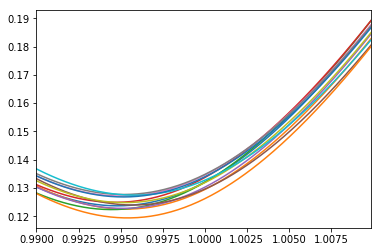

In [177]:
#print("Make predictions on the test set")
#print("Make predictions on the test set")
for gbm_info in gbm_list:
    key = gbm_info[0]
    gbm = gbm_info[1]
    
    yhat = gbm.predict(xgb.DMatrix(ho_xtest.values))
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat))

    print(str(key) + "----valid_set----"+ 'RMSPE: {:.6f}'.format(error))
    
    
    dtest = xgb.DMatrix(xtest.values)
    test_probs = gbm.predict(dtest)

    result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs)})
    result.to_csv("Rossmann_submission_xgb_"+str(key)+".csv", index=False)
    
    
    
    print("weight correction")
    W=[(0.9900+(i/10000)) for i in range(200)]
    S =[]
    for w in W:
        error = rmspe(np.expm1(ho_ytest), np.expm1(yhat*w))
        #print('RMSPE for {:.3f}:{:.6f}'.format(w,error))
        S.append(error)
    Score = pd.Series(S,index=W)
    Score.plot()
    BS = Score[Score.values == Score.values.min()]
    print (str(key) + '------Best weight for Score:{}'.format(BS))
    
    w = float(BS.index[0])
    #yhat_new = yhat*w
    #error = 
    #print (str(key) + '------RMSPE for weight corretion {:6f}'.format(error))

    result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs*w)})
    result.to_csv("Rossmann_submission_xgb_"+str(key)+"_fix.csv", index=False)


In [178]:
#先给出最有的模型，为本次训练的最有一个模型
best_xgb_model = gbm_list[11][1]


In [192]:
#观察模型的重要性
features_list = ho_xtrain.columns
print(features_list)
features_list = features_list.drop('Store')
print(features_list)


for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, best_xgb_model.get_score(importance_type=importance_type))

    
#ho_train.columns


Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'PromoOpen', 'IsPromoMonth'],
      dtype='object')
Index(['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear',
       'CompetitionOpen', 'PromoOpen', 'IsPromoMonth'],
      dtype='object')
weight:  {'f2': 562290, 'f6': 302562, 'f7': 1815521, 'f18': 2217250, 'f12': 213976, 'f11': 437891, 'f17': 1855058, 'f1': 2078687, 'f5': 456831, 'f8': 625277, 'f14': 1028191, 'f10': 52269, 'f15': 2916788, 'f16': 1783063, 'f13': 416015, 'f9': 473548, 'f0': 2362672, 'f4': 389842, 'f3':

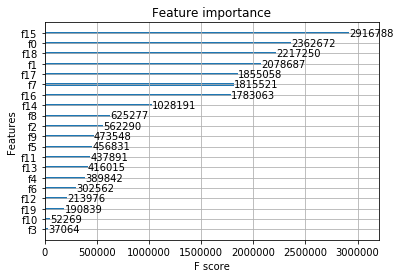

In [193]:
from xgboost import plot_importance
plot_importance(best_xgb_model)
plt.show()

In [195]:
i = 0 
for idx in ho_xtrain.columns:
    print("f"+ str(i) + ":" + idx)
    i+=1

f0:Store
f1:DayOfWeek
f2:Promo
f3:StateHoliday
f4:SchoolHoliday
f5:StoreType
f6:Assortment
f7:CompetitionDistance
f8:CompetitionOpenSinceMonth
f9:CompetitionOpenSinceYear
f10:Promo2
f11:Promo2SinceWeek
f12:Promo2SinceYear
f13:Year
f14:Month
f15:Day
f16:WeekOfYear
f17:CompetitionOpen
f18:PromoOpen
f19:IsPromoMonth
